# Seasonal Autoregressive Integrated Moving Average Implementation

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

## Importing libraries and settings

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, date
import math
from sklearn.utils import resample
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from matplotlib import pyplot
from tqdm import tqdm
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

Using TensorFlow backend.


## Get Dataset

Data is obtained from United States Geological Survey [1], the latitude range for the earthquake occurences is 20°S and 40°S and longitude range is 70°E to 105°E
<img src="./dataset.png">

In [3]:
#def parser(x):
    datetime.strptime(x[:-5], '%Y-%m-%dT%H:%M:%S')
data = pd.read_csv("./query_large.csv", sep=",", parse_dates=['time'], index_col='time', squeeze=True) #, date_parser=parser)
print(data.shape)
data.head()

(19159, 21)


,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
1950-06-18 12:46:27,34.950,99.768,30.0,5.8,mw,NaN,NaN,NaN,NaN,iscgem,...,2015-05-13T18:52:45.000Z,"southern Qinghai, China",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1950-08-15 14:09:34,28.363,96.445,15.0,8.6,mw,NaN,NaN,NaN,NaN,official,...,2018-02-14T23:59:05.335Z,eastern Xizang-India border region,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,official
1950-08-15 18:38:48,28.520,95.731,25.0,6.2,mw,NaN,NaN,NaN,NaN,iscgem,...,2015-05-13T18:52:45.000Z,"Arunachal Pradesh, India",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1950-08-15 21:01:35,27.337,96.777,25.0,5.8,mw,NaN,NaN,NaN,NaN,iscgem,...,2015-05-13T18:52:45.000Z,Myanmar-India border region,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1950-08-15 21:42:22,25.343,92.944,25.0,6.0,mw,NaN,NaN,NaN,NaN,iscgem,...,2015-05-13T18:52:45.000Z,"Meghalaya - Assam region, India",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


## Configuring and fitting SARIMAX

Configuring a SARIMA requires selecting hyperparameters for trend elements of the series.

### Trend Elements

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

    p: Trend autoregression order.
    d: Trend difference order.
    q: Trend moving average order.



In [4]:
fit = data['mag']

# fit model
model = sm.tsa.statespace.SARIMAX(fit, order=(1,0,1))
model_fit = model.fit(disp=0)
print('Model summary after fitting:\n\n')
print(model_fit.summary())

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model summary after fitting:


                           Statespace Model Results                           
Dep. Variable:                    mag   No. Observations:                19159
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -12905.285
Date:                Thu, 25 Oct 2018   AIC                          25816.571
Time:                        18:19:11   BIC                          25840.152
Sample:                             0   HQIC                         25824.302
                              - 19159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.75e-05   5.71e+04      0.000       1.000       1.000
ma.L1         -0.9573      0.002   -520.523      0.000      -0.961      -0.954
sigma2         0.2251

## Plotting Residual Errors

Residual Errors: 




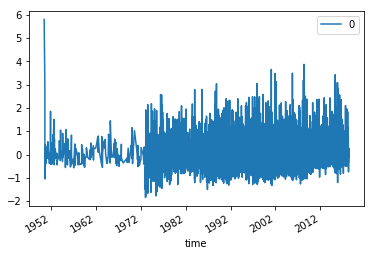

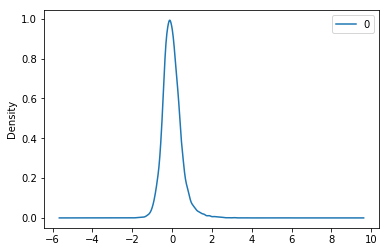

In [5]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
print('Residual Errors: \n\n')
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

## SAVING THE MODEL CHECKPOINT INTO PKL FOR PREDICTIONS

In [6]:
model_fit.save('arima_normal.pkl')

## Residual Description

In [7]:
print('Residual Description')
print(residuals.describe())

Residual Description
                  0
count  19159.000000
mean      -0.001094
std        0.476574
min       -1.841352
25%       -0.301054
50%       -0.047042
75%        0.245466
max        5.800000


## Training SARIMAX

The model is trained initially with training data. In each iteration, the model predicts the magnitude of next earthquake. Then, The training data is increased by one by the true value of magnitude of the prediction. The difference in magnitude in prediction and true value is used to get the mean-square-error

  0%|          | 1/6515 [00:01<2:56:25,  1.63s/it]

predicted=4.215085, expected=4.500000


  0%|          | 2/6515 [00:03<2:54:19,  1.61s/it]

predicted=4.227184, expected=4.500000


  0%|          | 3/6515 [00:04<2:55:47,  1.62s/it]

predicted=4.238947, expected=4.500000


  0%|          | 4/6515 [00:06<2:54:20,  1.61s/it]

predicted=4.249861, expected=4.700000


  0%|          | 5/6515 [00:08<2:55:10,  1.61s/it]

predicted=4.269400, expected=4.500000


  0%|          | 6/6515 [00:09<2:55:22,  1.62s/it]

predicted=4.279271, expected=4.300000


  0%|          | 7/6515 [00:11<2:56:08,  1.62s/it]

predicted=4.280124, expected=5.000000


  0%|          | 8/6515 [00:13<2:56:38,  1.63s/it]

predicted=4.311036, expected=4.400000


  0%|          | 9/6515 [00:14<2:56:03,  1.62s/it]

predicted=4.314844, expected=4.300000


  0%|          | 10/6515 [00:16<2:56:00,  1.62s/it]

predicted=4.314170, expected=4.300000


  0%|          | 11/6515 [00:17<2:55:49,  1.62s/it]

predicted=4.313496, expected=4.900000


  0%|          | 12/6515 [00:19<2:56:12,  1.63s/it]

predicted=4.338791, expected=4.500000


  0%|          | 13/6515 [00:21<2:56:15,  1.63s/it]

predicted=4.345696, expected=5.500000


  0%|          | 14/6515 [00:22<2:56:15,  1.63s/it]

predicted=4.395643, expected=5.100000


  0%|          | 15/6515 [00:24<2:56:30,  1.63s/it]

predicted=4.426374, expected=3.700000


  0%|          | 16/6515 [00:26<2:56:30,  1.63s/it]

predicted=4.394597, expected=3.500000


  0%|          | 17/6515 [00:27<2:56:12,  1.63s/it]

predicted=4.355707, expected=5.500000


  0%|          | 18/6515 [00:29<2:56:05,  1.63s/it]

predicted=4.405220, expected=4.400000


  0%|          | 19/6515 [00:30<2:56:12,  1.63s/it]

predicted=4.404957, expected=4.300000


  0%|          | 20/6515 [00:32<2:56:33,  1.63s/it]

predicted=4.400358, expected=3.700000


  0%|          | 21/6515 [00:34<2:56:35,  1.63s/it]

predicted=4.370023, expected=4.500000


  0%|          | 22/6515 [00:35<2:56:47,  1.63s/it]

predicted=4.375593, expected=4.200000


  0%|          | 23/6515 [00:37<2:57:00,  1.64s/it]

predicted=4.367981, expected=4.500000


  0%|          | 24/6515 [00:39<2:57:12,  1.64s/it]

predicted=4.373636, expected=4.700000


  0%|          | 25/6515 [00:40<2:57:22,  1.64s/it]

predicted=4.387672, expected=4.500000


  0%|          | 26/6515 [00:42<2:57:32,  1.64s/it]

predicted=4.392489, expected=3.700000


  0%|          | 27/6515 [00:44<2:57:30,  1.64s/it]

predicted=4.362582, expected=5.000000


  0%|          | 28/6515 [00:45<2:57:20,  1.64s/it]

predicted=4.390001, expected=4.100000


  0%|          | 29/6515 [00:47<2:57:14,  1.64s/it]

predicted=4.377454, expected=4.900000


  0%|          | 30/6515 [00:49<2:57:06,  1.64s/it]

predicted=4.399938, expected=4.600000


  0%|          | 31/6515 [00:50<2:57:13,  1.64s/it]

predicted=4.408540, expected=5.000000


  0%|          | 32/6515 [00:52<2:57:10,  1.64s/it]

predicted=4.434080, expected=4.600000


  1%|          | 33/6515 [00:54<2:57:06,  1.64s/it]

predicted=4.441210, expected=3.400000


  1%|          | 34/6515 [00:55<2:57:13,  1.64s/it]

predicted=4.396167, expected=3.700000


  1%|          | 35/6515 [00:57<2:57:28,  1.64s/it]

predicted=4.366176, expected=4.900000


  1%|          | 36/6515 [00:59<2:57:29,  1.64s/it]

predicted=4.389083, expected=3.300000


  1%|          | 37/6515 [01:00<2:57:37,  1.65s/it]

predicted=4.342220, expected=4.200000


  1%|          | 38/6515 [01:02<2:57:46,  1.65s/it]

predicted=4.336114, expected=4.500000


  1%|          | 39/6515 [01:04<2:57:55,  1.65s/it]

predicted=4.343104, expected=3.700000


  1%|          | 40/6515 [01:05<2:57:59,  1.65s/it]

predicted=4.315472, expected=4.600000


  1%|          | 41/6515 [01:07<2:58:02,  1.65s/it]

predicted=4.327652, expected=4.200000


  1%|          | 42/6515 [01:09<2:58:13,  1.65s/it]

predicted=4.322138, expected=4.000000


  1%|          | 43/6515 [01:11<2:58:28,  1.65s/it]

predicted=4.308276, expected=4.800000


  1%|          | 44/6515 [01:12<2:58:22,  1.65s/it]

predicted=4.329342, expected=3.900000


  1%|          | 45/6515 [01:14<2:58:18,  1.65s/it]

predicted=4.310887, expected=4.200000


  1%|          | 46/6515 [01:16<2:58:19,  1.65s/it]

predicted=4.306091, expected=4.100000


  1%|          | 47/6515 [01:17<2:58:19,  1.65s/it]

predicted=4.297204, expected=4.800000


  1%|          | 48/6515 [01:19<2:58:09,  1.65s/it]

predicted=4.318673, expected=4.000000


  1%|          | 49/6515 [01:20<2:58:00,  1.65s/it]

predicted=4.305032, expected=4.200000


  1%|          | 50/6515 [01:22<2:57:53,  1.65s/it]

predicted=4.300494, expected=4.200000


  1%|          | 51/6515 [01:24<2:57:30,  1.65s/it]

predicted=4.296029, expected=4.100000


  1%|          | 52/6515 [01:25<2:57:30,  1.65s/it]

predicted=4.287688, expected=3.700000


  1%|          | 53/6515 [01:27<2:57:38,  1.65s/it]

predicted=4.262398, expected=4.300000


  1%|          | 54/6515 [01:29<2:57:36,  1.65s/it]

predicted=4.263980, expected=4.500000


  1%|          | 55/6515 [01:30<2:57:33,  1.65s/it]

predicted=4.274091, expected=3.700000


  1%|          | 56/6515 [01:32<2:57:30,  1.65s/it]

predicted=4.249364, expected=3.900000


  1%|          | 57/6515 [01:34<2:57:30,  1.65s/it]

predicted=4.234042, expected=4.700000


  1%|          | 58/6515 [01:35<2:57:23,  1.65s/it]

predicted=4.254312, expected=3.400000


  1%|          | 59/6515 [01:37<2:57:15,  1.65s/it]

predicted=4.217462, expected=3.500000


  1%|          | 60/6515 [01:38<2:57:15,  1.65s/it]

predicted=4.186435, expected=4.500000


  1%|          | 61/6515 [01:40<2:57:12,  1.65s/it]

predicted=4.199984, expected=4.200000


  1%|          | 62/6515 [01:42<2:57:07,  1.65s/it]

predicted=4.199951, expected=4.500000


  1%|          | 63/6515 [01:43<2:57:10,  1.65s/it]

predicted=4.212085, expected=4.800000


  1%|          | 64/6515 [01:45<2:57:06,  1.65s/it]

predicted=4.237977, expected=4.400000


  1%|          | 65/6515 [01:47<2:57:40,  1.65s/it]

predicted=4.245044, expected=5.100000


  1%|          | 66/6515 [01:49<2:57:46,  1.65s/it]

predicted=4.281709, expected=5.100000


  1%|          | 67/6515 [01:50<2:57:42,  1.65s/it]

predicted=4.316652, expected=4.300000


  1%|          | 68/6515 [01:52<2:58:09,  1.66s/it]

predicted=4.316010, expected=4.400000


  1%|          | 69/6515 [01:54<2:58:07,  1.66s/it]

predicted=4.319575, expected=4.400000


  1%|          | 70/6515 [01:56<2:58:06,  1.66s/it]

predicted=4.322964, expected=4.000000


  1%|          | 71/6515 [01:57<2:58:04,  1.66s/it]

predicted=4.309099, expected=4.500000


  1%|          | 72/6515 [01:59<2:58:18,  1.66s/it]

predicted=4.317236, expected=3.800000


  1%|          | 73/6515 [02:01<2:58:19,  1.66s/it]

predicted=4.295032, expected=5.200000


  1%|          | 74/6515 [02:02<2:58:16,  1.66s/it]

predicted=4.333627, expected=4.600000


  1%|          | 75/6515 [02:04<2:58:17,  1.66s/it]

predicted=4.345179, expected=4.900000


  1%|          | 76/6515 [02:06<2:58:12,  1.66s/it]

predicted=4.368886, expected=4.700000


  1%|          | 77/6515 [02:07<2:58:11,  1.66s/it]

predicted=4.383183, expected=4.900000


  1%|          | 78/6515 [02:09<2:58:13,  1.66s/it]

predicted=4.405438, expected=4.400000


  1%|          | 79/6515 [02:11<2:58:10,  1.66s/it]

predicted=4.405131, expected=4.300000


  1%|          | 80/6515 [02:12<2:58:08,  1.66s/it]

predicted=4.400564, expected=3.600000


  1%|          | 81/6515 [02:14<2:58:07,  1.66s/it]

predicted=4.366079, expected=4.000000


  1%|▏         | 82/6515 [02:16<2:58:09,  1.66s/it]

predicted=4.350326, expected=5.000000


  1%|▏         | 83/6515 [02:17<2:58:02,  1.66s/it]

predicted=4.378159, expected=4.800000


  1%|▏         | 84/6515 [02:19<2:57:58,  1.66s/it]

predicted=4.396250, expected=4.600000


  1%|▏         | 85/6515 [02:21<2:57:55,  1.66s/it]

predicted=4.404883, expected=4.000000


  1%|▏         | 86/6515 [02:22<2:57:53,  1.66s/it]

predicted=4.387537, expected=4.300000


  1%|▏         | 87/6515 [02:24<2:57:48,  1.66s/it]

predicted=4.383738, expected=4.300000


  1%|▏         | 88/6515 [02:26<2:57:47,  1.66s/it]

predicted=4.380106, expected=5.100000


  1%|▏         | 89/6515 [02:27<2:57:44,  1.66s/it]

predicted=4.410518, expected=4.300000


  1%|▏         | 90/6515 [02:29<2:57:40,  1.66s/it]

predicted=4.405683, expected=3.700000


  1%|▏         | 91/6515 [02:30<2:57:37,  1.66s/it]

predicted=4.375810, expected=4.100000


  1%|▏         | 92/6515 [02:32<2:57:41,  1.66s/it]

predicted=4.363942, expected=4.600000


  1%|▏         | 93/6515 [02:34<2:57:38,  1.66s/it]

predicted=4.374028, expected=4.500000


  1%|▏         | 94/6515 [02:36<2:57:38,  1.66s/it]

predicted=4.379394, expected=4.700000


  1%|▏         | 95/6515 [02:37<2:57:37,  1.66s/it]

predicted=4.393112, expected=3.700000


  1%|▏         | 96/6515 [02:39<2:57:37,  1.66s/it]

predicted=4.363344, expected=4.100000


  1%|▏         | 97/6515 [02:41<2:57:36,  1.66s/it]

predicted=4.351950, expected=4.600000


  2%|▏         | 98/6515 [02:42<2:57:36,  1.66s/it]

predicted=4.362597, expected=4.400000


  2%|▏         | 99/6515 [02:44<2:57:33,  1.66s/it]

predicted=4.364166, expected=4.700000


  2%|▏         | 100/6515 [02:46<2:57:32,  1.66s/it]

predicted=4.378534, expected=3.500000


  2%|▏         | 101/6515 [02:47<2:57:33,  1.66s/it]

predicted=4.340855, expected=3.900000


  2%|▏         | 102/6515 [02:49<2:57:32,  1.66s/it]

predicted=4.321886, expected=3.600000


  2%|▏         | 103/6515 [02:51<2:57:28,  1.66s/it]

predicted=4.290914, expected=3.800000


  2%|▏         | 104/6515 [02:52<2:57:26,  1.66s/it]

predicted=4.269816, expected=4.400000


  2%|▏         | 105/6515 [02:54<2:57:27,  1.66s/it]

predicted=4.275325, expected=4.500000


  2%|▏         | 106/6515 [02:56<2:57:36,  1.66s/it]

predicted=4.284965, expected=3.900000


  2%|▏         | 107/6515 [02:57<2:57:34,  1.66s/it]

predicted=4.268406, expected=4.500000


  2%|▏         | 108/6515 [02:59<2:57:36,  1.66s/it]

predicted=4.278334, expected=3.500000


  2%|▏         | 109/6515 [03:01<2:57:43,  1.66s/it]

predicted=4.244789, expected=4.000000


  2%|▏         | 110/6515 [03:03<2:57:44,  1.66s/it]

predicted=4.234245, expected=3.900000


  2%|▏         | 111/6515 [03:04<2:57:44,  1.67s/it]

predicted=4.219753, expected=3.900000


  2%|▏         | 112/6515 [03:06<2:57:45,  1.67s/it]

predicted=4.205871, expected=4.100000


  2%|▏         | 113/6515 [03:08<2:57:44,  1.67s/it]

predicted=4.201263, expected=4.500000


  2%|▏         | 114/6515 [03:09<2:57:43,  1.67s/it]

predicted=4.214189, expected=4.200000


  2%|▏         | 115/6515 [03:11<2:57:34,  1.66s/it]

predicted=4.212839, expected=4.300000


  2%|▏         | 116/6515 [03:13<2:57:33,  1.66s/it]

predicted=4.217236, expected=4.000000


  2%|▏         | 117/6515 [03:14<2:57:30,  1.66s/it]

predicted=4.207731, expected=3.900000


  2%|▏         | 118/6515 [03:16<2:57:33,  1.67s/it]

predicted=4.194492, expected=4.100000


  2%|▏         | 119/6515 [03:18<2:57:39,  1.67s/it]

predicted=4.190371, expected=4.400000


  2%|▏         | 120/6515 [03:19<2:57:36,  1.67s/it]

predicted=4.199300, expected=4.300000


  2%|▏         | 121/6515 [03:21<2:57:36,  1.67s/it]

predicted=4.203702, expected=4.000000


  2%|▏         | 122/6515 [03:23<2:57:32,  1.67s/it]

predicted=4.194876, expected=3.600000


  2%|▏         | 123/6515 [03:25<2:57:40,  1.67s/it]

predicted=4.169132, expected=4.600000


  2%|▏         | 124/6515 [03:26<2:57:42,  1.67s/it]

predicted=4.187733, expected=5.000000


  2%|▏         | 125/6515 [03:28<2:57:41,  1.67s/it]

predicted=4.222707, expected=4.500000


  2%|▏         | 126/6515 [03:30<2:57:36,  1.67s/it]

predicted=4.234582, expected=4.200000


  2%|▏         | 127/6515 [03:31<2:57:32,  1.67s/it]

predicted=4.233052, expected=4.200000


  2%|▏         | 128/6515 [03:33<2:57:30,  1.67s/it]

predicted=4.231590, expected=4.100000


  2%|▏         | 129/6515 [03:35<2:57:33,  1.67s/it]

predicted=4.225918, expected=4.000000


  2%|▏         | 130/6515 [03:36<2:57:22,  1.67s/it]

predicted=4.214751, expected=4.000000


  2%|▏         | 131/6515 [03:38<2:57:32,  1.67s/it]

predicted=4.206788, expected=4.600000


  2%|▏         | 132/6515 [03:40<2:57:33,  1.67s/it]

predicted=4.223708, expected=3.600000


  2%|▏         | 133/6515 [03:41<2:57:32,  1.67s/it]

predicted=4.196824, expected=3.800000


  2%|▏         | 134/6515 [03:43<2:57:39,  1.67s/it]

predicted=4.179742, expected=4.700000


  2%|▏         | 135/6515 [03:45<2:57:37,  1.67s/it]

predicted=4.202107, expected=3.300000


  2%|▏         | 136/6515 [03:47<2:57:38,  1.67s/it]

predicted=4.163247, expected=4.100000


  2%|▏         | 137/6515 [03:48<2:57:35,  1.67s/it]

predicted=4.160483, expected=3.900000


  2%|▏         | 138/6515 [03:50<2:57:35,  1.67s/it]

predicted=4.149158, expected=3.400000


  2%|▏         | 139/6515 [03:52<2:57:30,  1.67s/it]

predicted=4.116468, expected=3.400000


  2%|▏         | 140/6515 [03:53<2:57:27,  1.67s/it]

predicted=4.085554, expected=3.400000


  2%|▏         | 141/6515 [03:55<2:57:27,  1.67s/it]

predicted=4.055566, expected=3.700000


  2%|▏         | 142/6515 [03:57<2:57:23,  1.67s/it]

predicted=4.039897, expected=3.400000


  2%|▏         | 143/6515 [03:58<2:57:21,  1.67s/it]

predicted=4.011623, expected=4.200000


  2%|▏         | 144/6515 [04:00<2:57:21,  1.67s/it]

predicted=4.019949, expected=4.000000


  2%|▏         | 145/6515 [04:02<2:57:18,  1.67s/it]

predicted=4.019021, expected=4.500000


  2%|▏         | 146/6515 [04:03<2:57:15,  1.67s/it]

predicted=4.040116, expected=4.000000


  2%|▏         | 147/6515 [04:05<2:57:09,  1.67s/it]

predicted=4.038345, expected=4.400000


  2%|▏         | 148/6515 [04:07<2:57:07,  1.67s/it]

predicted=4.054053, expected=4.500000


  2%|▏         | 149/6515 [04:08<2:57:08,  1.67s/it]

predicted=4.073416, expected=6.400000


  2%|▏         | 150/6515 [04:10<2:57:08,  1.67s/it]

predicted=4.173941, expected=3.700000


  2%|▏         | 151/6515 [04:12<2:57:08,  1.67s/it]

predicted=4.153519, expected=3.400000


  2%|▏         | 152/6515 [04:13<2:57:03,  1.67s/it]

predicted=4.121063, expected=3.300000


  2%|▏         | 153/6515 [04:15<2:57:03,  1.67s/it]

predicted=4.085614, expected=4.200000


  2%|▏         | 154/6515 [04:17<2:56:58,  1.67s/it]

predicted=4.090442, expected=3.600000


  2%|▏         | 155/6515 [04:18<2:56:55,  1.67s/it]

predicted=4.069323, expected=3.900000


  2%|▏         | 156/6515 [04:20<2:56:51,  1.67s/it]

predicted=4.061865, expected=5.000000


  2%|▏         | 157/6515 [04:22<2:56:51,  1.67s/it]

predicted=4.102456, expected=3.700000


  2%|▏         | 158/6515 [04:23<2:56:47,  1.67s/it]

predicted=4.085092, expected=4.800000


  2%|▏         | 159/6515 [04:25<2:56:45,  1.67s/it]

predicted=4.115835, expected=4.200000


  2%|▏         | 160/6515 [04:26<2:56:42,  1.67s/it]

predicted=4.119335, expected=3.600000


  2%|▏         | 161/6515 [04:28<2:56:41,  1.67s/it]

predicted=4.097047, expected=3.900000


  2%|▏         | 162/6515 [04:30<2:56:54,  1.67s/it]

predicted=4.088531, expected=3.600000


  3%|▎         | 163/6515 [04:32<2:56:51,  1.67s/it]

predicted=4.067425, expected=4.100000


  3%|▎         | 164/6515 [04:33<2:56:49,  1.67s/it]

predicted=4.068676, expected=3.600000


  3%|▎         | 165/6515 [04:35<2:56:51,  1.67s/it]

predicted=4.048554, expected=3.200000


  3%|▎         | 166/6515 [04:37<2:56:46,  1.67s/it]

predicted=4.011661, expected=3.800000


  3%|▎         | 167/6515 [04:38<2:56:42,  1.67s/it]

predicted=4.002422, expected=4.200000


  3%|▎         | 168/6515 [04:40<2:56:41,  1.67s/it]

predicted=4.011112, expected=3.400000


  3%|▎         | 169/6515 [04:42<2:56:40,  1.67s/it]

predicted=3.984557, expected=4.200000


  3%|▎         | 170/6515 [04:44<2:56:40,  1.67s/it]

predicted=3.993872, expected=4.000000


  3%|▎         | 171/6515 [04:45<2:56:39,  1.67s/it]

predicted=3.994059, expected=4.100000


  3%|▎         | 172/6515 [04:47<2:56:38,  1.67s/it]

predicted=3.998667, expected=3.600000


  3%|▎         | 173/6515 [04:48<2:56:34,  1.67s/it]

predicted=3.979384, expected=4.900000


  3%|▎         | 174/6515 [04:50<2:56:33,  1.67s/it]

predicted=4.021120, expected=3.600000


  3%|▎         | 175/6515 [04:52<2:56:30,  1.67s/it]

predicted=4.002794, expected=3.400000


  3%|▎         | 176/6515 [04:53<2:56:27,  1.67s/it]

predicted=3.976640, expected=4.300000


  3%|▎         | 177/6515 [04:55<2:56:19,  1.67s/it]

predicted=3.989042, expected=4.900000


  3%|▎         | 178/6515 [04:57<2:56:17,  1.67s/it]

predicted=4.029980, expected=3.500000


  3%|▎         | 179/6515 [04:58<2:56:17,  1.67s/it]

predicted=4.007089, expected=4.000000


  3%|▎         | 180/6515 [05:00<2:56:14,  1.67s/it]

predicted=4.006755, expected=4.000000


  3%|▎         | 181/6515 [05:02<2:56:14,  1.67s/it]

predicted=4.006422, expected=4.900000


  3%|▎         | 182/6515 [05:03<2:56:09,  1.67s/it]

predicted=4.044887, expected=3.800000


  3%|▎         | 183/6515 [05:05<2:56:10,  1.67s/it]

predicted=4.034321, expected=3.800000


  3%|▎         | 184/6515 [05:07<2:56:06,  1.67s/it]

predicted=4.024176, expected=4.100000


  3%|▎         | 185/6515 [05:08<2:56:05,  1.67s/it]

predicted=4.027431, expected=3.800000


  3%|▎         | 186/6515 [05:10<2:56:06,  1.67s/it]

predicted=4.017602, expected=4.100000


  3%|▎         | 187/6515 [05:12<2:56:03,  1.67s/it]

predicted=4.021110, expected=4.000000


  3%|▎         | 188/6515 [05:13<2:56:03,  1.67s/it]

predicted=4.020168, expected=4.100000


  3%|▎         | 189/6515 [05:15<2:56:04,  1.67s/it]

predicted=4.023572, expected=3.400000


  3%|▎         | 190/6515 [05:17<2:56:03,  1.67s/it]

predicted=3.996638, expected=3.500000


  3%|▎         | 191/6515 [05:18<2:56:00,  1.67s/it]

predicted=3.975080, expected=5.900000


  3%|▎         | 192/6515 [05:20<2:55:58,  1.67s/it]

predicted=4.058052, expected=4.300000


  3%|▎         | 193/6515 [05:22<2:55:54,  1.67s/it]

predicted=4.067905, expected=3.800000


  3%|▎         | 194/6515 [05:23<2:55:51,  1.67s/it]

predicted=4.056845, expected=4.600000


  3%|▎         | 195/6515 [05:25<2:55:49,  1.67s/it]

predicted=4.080127, expected=4.400000


  3%|▎         | 196/6515 [05:27<2:55:48,  1.67s/it]

predicted=4.093838, expected=4.800000


  3%|▎         | 197/6515 [05:28<2:55:46,  1.67s/it]

predicted=4.124170, expected=4.000000


  3%|▎         | 198/6515 [05:30<2:55:41,  1.67s/it]

predicted=4.118683, expected=4.500000


  3%|▎         | 199/6515 [05:32<2:55:38,  1.67s/it]

predicted=4.135176, expected=3.600000


  3%|▎         | 200/6515 [05:33<2:55:37,  1.67s/it]

predicted=4.112079, expected=4.000000


  3%|▎         | 201/6515 [05:35<2:55:37,  1.67s/it]

predicted=4.107252, expected=4.200000


  3%|▎         | 202/6515 [05:37<2:55:37,  1.67s/it]

predicted=4.111180, expected=4.500000


  3%|▎         | 203/6515 [05:38<2:55:34,  1.67s/it]

predicted=4.127834, expected=4.900000


  3%|▎         | 204/6515 [05:40<2:55:39,  1.67s/it]

predicted=4.161095, expected=4.600000


  3%|▎         | 205/6515 [05:42<2:55:35,  1.67s/it]

predicted=4.180044, expected=4.200000


  3%|▎         | 206/6515 [05:43<2:55:32,  1.67s/it]

predicted=4.180839, expected=4.600000


  3%|▎         | 207/6515 [05:45<2:55:31,  1.67s/it]

predicted=4.198968, expected=4.900000


  3%|▎         | 208/6515 [05:47<2:55:28,  1.67s/it]

predicted=4.229386, expected=3.200000


  3%|▎         | 209/6515 [05:48<2:55:29,  1.67s/it]

predicted=4.184630, expected=4.700000


  3%|▎         | 210/6515 [05:50<2:55:28,  1.67s/it]

predicted=4.206878, expected=4.000000


  3%|▎         | 211/6515 [05:52<2:55:28,  1.67s/it]

predicted=4.197887, expected=3.900000


  3%|▎         | 212/6515 [05:54<2:55:25,  1.67s/it]

predicted=4.184981, expected=3.100000


  3%|▎         | 213/6515 [05:55<2:55:22,  1.67s/it]

predicted=4.138203, expected=4.200000


  3%|▎         | 214/6515 [05:57<2:55:19,  1.67s/it]

predicted=4.140830, expected=5.200000


  3%|▎         | 215/6515 [05:58<2:55:14,  1.67s/it]

predicted=4.186307, expected=3.500000


  3%|▎         | 216/6515 [06:00<2:55:12,  1.67s/it]

predicted=4.156749, expected=4.500000


  3%|▎         | 217/6515 [06:02<2:55:10,  1.67s/it]

predicted=4.171465, expected=3.900000


  3%|▎         | 218/6515 [06:03<2:55:09,  1.67s/it]

predicted=4.159762, expected=3.300000


  3%|▎         | 219/6515 [06:05<2:55:09,  1.67s/it]

predicted=4.122822, expected=4.700000


  3%|▎         | 220/6515 [06:07<2:55:07,  1.67s/it]

predicted=4.147509, expected=3.500000


  3%|▎         | 221/6515 [06:08<2:55:05,  1.67s/it]

predicted=4.119724, expected=3.800000


  3%|▎         | 222/6515 [06:10<2:55:03,  1.67s/it]

predicted=4.105986, expected=3.900000


  3%|▎         | 223/6515 [06:12<2:55:03,  1.67s/it]

predicted=4.097116, expected=3.800000


  3%|▎         | 224/6515 [06:13<2:55:02,  1.67s/it]

predicted=4.084310, expected=4.700000


  3%|▎         | 225/6515 [06:15<2:54:58,  1.67s/it]

predicted=4.109997, expected=4.200000


  3%|▎         | 226/6515 [06:17<2:54:57,  1.67s/it]

predicted=4.114458, expected=5.500000


  3%|▎         | 227/6515 [06:18<2:54:56,  1.67s/it]

predicted=4.173753, expected=4.700000


  3%|▎         | 228/6515 [06:20<2:54:54,  1.67s/it]

predicted=4.196409, expected=3.600000


  4%|▎         | 229/6515 [06:22<2:54:52,  1.67s/it]

predicted=4.170746, expected=4.500000


  4%|▎         | 230/6515 [06:23<2:54:51,  1.67s/it]

predicted=4.184815, expected=3.600000


  4%|▎         | 231/6515 [06:25<2:54:50,  1.67s/it]

predicted=4.159713, expected=4.000000


  4%|▎         | 232/6515 [06:27<2:54:49,  1.67s/it]

predicted=4.152833, expected=3.900000


  4%|▎         | 233/6515 [06:28<2:54:46,  1.67s/it]

predicted=4.141971, expected=3.700000


  4%|▎         | 234/6515 [06:30<2:54:44,  1.67s/it]

predicted=4.123011, expected=4.700000


  4%|▎         | 235/6515 [06:32<2:54:41,  1.67s/it]

predicted=4.147209, expected=3.500000


  4%|▎         | 236/6515 [06:33<2:54:40,  1.67s/it]

predicted=4.119918, expected=4.500000


  4%|▎         | 237/6515 [06:35<2:54:38,  1.67s/it]

predicted=4.136084, expected=4.100000


  4%|▎         | 238/6515 [06:37<2:54:35,  1.67s/it]

predicted=4.134456, expected=4.000000


  4%|▎         | 239/6515 [06:38<2:54:32,  1.67s/it]

predicted=4.128738, expected=3.800000


  4%|▎         | 240/6515 [06:40<2:54:32,  1.67s/it]

predicted=4.114667, expected=4.300000


  4%|▎         | 241/6515 [06:42<2:54:31,  1.67s/it]

predicted=4.122559, expected=4.000000


  4%|▎         | 242/6515 [06:43<2:54:29,  1.67s/it]

predicted=4.117279, expected=4.200000


  4%|▎         | 243/6515 [06:45<2:54:27,  1.67s/it]

predicted=4.120716, expected=4.000000


  4%|▎         | 244/6515 [06:47<2:54:24,  1.67s/it]

predicted=4.115581, expected=4.500000


  4%|▍         | 245/6515 [06:48<2:54:21,  1.67s/it]

predicted=4.131874, expected=4.600000


  4%|▍         | 246/6515 [06:50<2:54:20,  1.67s/it]

predicted=4.151957, expected=4.900000


  4%|▍         | 247/6515 [06:52<2:54:18,  1.67s/it]

predicted=4.183974, expected=3.500000


  4%|▍         | 248/6515 [06:53<2:54:16,  1.67s/it]

predicted=4.154519, expected=4.800000


  4%|▍         | 249/6515 [06:55<2:54:16,  1.67s/it]

predicted=4.182222, expected=4.100000


  4%|▍         | 250/6515 [06:57<2:54:14,  1.67s/it]

predicted=4.178629, expected=3.600000


  4%|▍         | 251/6515 [06:58<2:54:13,  1.67s/it]

predicted=4.153866, expected=4.000000


  4%|▍         | 252/6515 [07:00<2:54:11,  1.67s/it]

predicted=4.147233, expected=3.800000


  4%|▍         | 253/6515 [07:02<2:54:09,  1.67s/it]

predicted=4.132247, expected=3.400000


  4%|▍         | 254/6515 [07:03<2:54:09,  1.67s/it]

predicted=4.101011, expected=4.100000


  4%|▍         | 255/6515 [07:05<2:54:09,  1.67s/it]

predicted=4.100942, expected=4.100000


  4%|▍         | 256/6515 [07:07<2:54:12,  1.67s/it]

predicted=4.100866, expected=3.900000


  4%|▍         | 257/6515 [07:09<2:54:13,  1.67s/it]

predicted=4.092191, expected=3.800000


  4%|▍         | 258/6515 [07:10<2:54:12,  1.67s/it]

predicted=4.079594, expected=3.800000


  4%|▍         | 259/6515 [07:12<2:54:06,  1.67s/it]

predicted=4.067610, expected=3.300000


  4%|▍         | 260/6515 [07:14<2:54:03,  1.67s/it]

predicted=4.033693, expected=4.800000


  4%|▍         | 261/6515 [07:15<2:54:02,  1.67s/it]

predicted=4.067522, expected=4.500000


  4%|▍         | 262/6515 [07:17<2:54:12,  1.67s/it]

predicted=4.086000, expected=4.300000


  4%|▍         | 263/6515 [07:19<2:54:11,  1.67s/it]

predicted=4.095116, expected=4.400000


  4%|▍         | 264/6515 [07:21<2:54:08,  1.67s/it]

predicted=4.107977, expected=3.700000


  4%|▍         | 265/6515 [07:22<2:54:07,  1.67s/it]

predicted=4.090635, expected=3.900000


  4%|▍         | 266/6515 [07:24<2:54:03,  1.67s/it]

predicted=4.082360, expected=4.300000


  4%|▍         | 267/6515 [07:26<2:54:01,  1.67s/it]

predicted=4.091664, expected=3.600000


  4%|▍         | 268/6515 [07:27<2:53:58,  1.67s/it]

predicted=4.070636, expected=4.300000


  4%|▍         | 269/6515 [07:29<2:53:56,  1.67s/it]

predicted=4.080428, expected=3.700000


  4%|▍         | 270/6515 [07:31<2:53:56,  1.67s/it]

predicted=4.064127, expected=3.200000


  4%|▍         | 271/6515 [07:32<2:53:53,  1.67s/it]

predicted=4.026995, expected=3.500000


  4%|▍         | 272/6515 [07:34<2:53:49,  1.67s/it]

predicted=4.004009, expected=3.900000


  4%|▍         | 273/6515 [07:36<2:53:47,  1.67s/it]

predicted=3.998878, expected=3.700000


  4%|▍         | 274/6515 [07:37<2:53:45,  1.67s/it]

predicted=3.986886, expected=4.700000


  4%|▍         | 275/6515 [07:39<2:53:44,  1.67s/it]

predicted=4.017568, expected=4.000000


  4%|▍         | 276/6515 [07:41<2:53:41,  1.67s/it]

predicted=4.016783, expected=3.700000


  4%|▍         | 277/6515 [07:42<2:53:40,  1.67s/it]

predicted=4.003151, expected=3.600000


  4%|▍         | 278/6515 [07:44<2:53:37,  1.67s/it]

predicted=3.985624, expected=3.600000


  4%|▍         | 279/6515 [07:45<2:53:35,  1.67s/it]

predicted=3.969124, expected=3.800000


  4%|▍         | 280/6515 [07:47<2:53:34,  1.67s/it]

predicted=3.960785, expected=4.100000


  4%|▍         | 281/6515 [07:49<2:53:31,  1.67s/it]

predicted=3.967694, expected=3.800000


  4%|▍         | 282/6515 [07:50<2:53:29,  1.67s/it]

predicted=3.960459, expected=4.500000


  4%|▍         | 283/6515 [07:52<2:53:27,  1.67s/it]

predicted=3.983658, expected=3.700000


  4%|▍         | 284/6515 [07:54<2:53:27,  1.67s/it]

predicted=3.971433, expected=3.900000


  4%|▍         | 285/6515 [07:55<2:53:23,  1.67s/it]

predicted=3.968200, expected=4.700000


  4%|▍         | 286/6515 [07:57<2:53:18,  1.67s/it]

predicted=3.999710, expected=4.400000


  4%|▍         | 287/6515 [07:59<2:53:16,  1.67s/it]

predicted=4.016696, expected=4.300000


  4%|▍         | 288/6515 [08:00<2:53:16,  1.67s/it]

predicted=4.028923, expected=4.200000


  4%|▍         | 289/6515 [08:02<2:53:14,  1.67s/it]

predicted=4.036168, expected=3.900000


  4%|▍         | 290/6515 [08:04<2:53:12,  1.67s/it]

predicted=4.030283, expected=3.800000


  4%|▍         | 291/6515 [08:05<2:53:10,  1.67s/it]

predicted=4.020450, expected=3.600000


  4%|▍         | 292/6515 [08:07<2:53:08,  1.67s/it]

predicted=4.002420, expected=3.600000


  4%|▍         | 293/6515 [08:09<2:53:06,  1.67s/it]

predicted=3.984990, expected=4.400000


  5%|▍         | 294/6515 [08:10<2:53:04,  1.67s/it]

predicted=4.002890, expected=4.500000


  5%|▍         | 295/6515 [08:12<2:53:04,  1.67s/it]

predicted=4.024126, expected=4.600000


  5%|▍         | 296/6515 [08:14<2:53:03,  1.67s/it]

predicted=4.048603, expected=4.200000


  5%|▍         | 297/6515 [08:15<2:53:01,  1.67s/it]

predicted=4.055118, expected=4.500000


  5%|▍         | 298/6515 [08:17<2:52:59,  1.67s/it]

predicted=4.074035, expected=4.100000


  5%|▍         | 299/6515 [08:19<2:52:58,  1.67s/it]

predicted=4.075217, expected=3.900000


  5%|▍         | 300/6515 [08:20<2:52:57,  1.67s/it]

predicted=4.067682, expected=3.900000


  5%|▍         | 301/6515 [08:22<2:52:54,  1.67s/it]

predicted=4.060475, expected=4.900000


  5%|▍         | 302/6515 [08:24<2:52:53,  1.67s/it]

predicted=4.096358, expected=3.900000


  5%|▍         | 303/6515 [08:25<2:52:53,  1.67s/it]

predicted=4.087899, expected=4.600000


  5%|▍         | 304/6515 [08:27<2:52:53,  1.67s/it]

predicted=4.109799, expected=3.700000


  5%|▍         | 305/6515 [08:29<2:52:51,  1.67s/it]

predicted=4.092178, expected=3.700000


  5%|▍         | 306/6515 [08:31<2:52:48,  1.67s/it]

predicted=4.075308, expected=4.400000


  5%|▍         | 307/6515 [08:32<2:52:46,  1.67s/it]

predicted=4.089151, expected=4.300000


  5%|▍         | 308/6515 [08:34<2:52:43,  1.67s/it]

predicted=4.098132, expected=4.800000


  5%|▍         | 309/6515 [08:35<2:52:41,  1.67s/it]

predicted=4.128153, expected=5.100000


  5%|▍         | 310/6515 [08:37<2:52:40,  1.67s/it]

predicted=4.169964, expected=4.500000


  5%|▍         | 311/6515 [08:39<2:52:40,  1.67s/it]

predicted=4.184167, expected=3.800000


  5%|▍         | 312/6515 [08:41<2:52:41,  1.67s/it]

predicted=4.167547, expected=4.800000


  5%|▍         | 313/6515 [08:42<2:52:38,  1.67s/it]

predicted=4.194839, expected=3.900000


  5%|▍         | 314/6515 [08:44<2:52:37,  1.67s/it]

predicted=4.182015, expected=4.000000


  5%|▍         | 315/6515 [08:46<2:52:36,  1.67s/it]

predicted=4.174141, expected=4.500000


  5%|▍         | 316/6515 [08:47<2:52:34,  1.67s/it]

predicted=4.187607, expected=4.300000


  5%|▍         | 317/6515 [08:49<2:52:32,  1.67s/it]

predicted=4.192901, expected=4.500000


  5%|▍         | 318/6515 [08:51<2:52:30,  1.67s/it]

predicted=4.206117, expected=3.800000


  5%|▍         | 319/6515 [08:52<2:52:29,  1.67s/it]

predicted=4.188575, expected=3.600000


  5%|▍         | 320/6515 [08:54<2:52:27,  1.67s/it]

predicted=4.163232, expected=4.300000


  5%|▍         | 321/6515 [08:56<2:52:26,  1.67s/it]

predicted=4.169066, expected=4.400000


  5%|▍         | 322/6515 [08:57<2:52:25,  1.67s/it]

predicted=4.178945, expected=3.700000


  5%|▍         | 323/6515 [08:59<2:52:23,  1.67s/it]

predicted=4.158266, expected=4.400000


  5%|▍         | 324/6515 [09:01<2:52:20,  1.67s/it]

predicted=4.168576, expected=4.000000


  5%|▍         | 325/6515 [09:02<2:52:18,  1.67s/it]

predicted=4.161332, expected=3.600000


  5%|▌         | 326/6515 [09:04<2:52:16,  1.67s/it]

predicted=4.137261, expected=3.600000


  5%|▌         | 327/6515 [09:06<2:52:15,  1.67s/it]

predicted=4.114284, expected=4.000000


  5%|▌         | 328/6515 [09:07<2:52:14,  1.67s/it]

predicted=4.109361, expected=4.400000


  5%|▌         | 329/6515 [09:09<2:52:13,  1.67s/it]

predicted=4.121734, expected=4.000000


  5%|▌         | 330/6515 [09:11<2:52:12,  1.67s/it]

predicted=4.116517, expected=3.400000


  5%|▌         | 331/6515 [09:12<2:52:08,  1.67s/it]

predicted=4.085764, expected=4.300000


  5%|▌         | 332/6515 [09:14<2:52:08,  1.67s/it]

predicted=4.094955, expected=4.200000


  5%|▌         | 333/6515 [09:16<2:52:11,  1.67s/it]

predicted=4.099372, expected=3.900000


  5%|▌         | 334/6515 [09:18<2:52:09,  1.67s/it]

predicted=4.090786, expected=4.200000


  5%|▌         | 335/6515 [09:19<2:52:07,  1.67s/it]

predicted=4.095478, expected=4.400000


  5%|▌         | 336/6515 [09:21<2:52:05,  1.67s/it]

predicted=4.108399, expected=3.800000


  5%|▌         | 337/6515 [09:23<2:52:04,  1.67s/it]

predicted=4.095242, expected=3.800000


  5%|▌         | 338/6515 [09:24<2:52:03,  1.67s/it]

predicted=4.082572, expected=4.300000


  5%|▌         | 339/6515 [09:26<2:52:02,  1.67s/it]

predicted=4.091719, expected=4.100000


  5%|▌         | 340/6515 [09:28<2:52:01,  1.67s/it]

predicted=4.092155, expected=3.400000


  5%|▌         | 341/6515 [09:29<2:51:59,  1.67s/it]

predicted=4.062496, expected=4.600000


  5%|▌         | 342/6515 [09:31<2:51:58,  1.67s/it]

predicted=4.085475, expected=3.400000


  5%|▌         | 343/6515 [09:33<2:51:56,  1.67s/it]

predicted=4.056044, expected=4.500000


  5%|▌         | 344/6515 [09:35<2:51:55,  1.67s/it]

predicted=4.075028, expected=3.900000


  5%|▌         | 345/6515 [09:36<2:51:53,  1.67s/it]

predicted=4.067542, expected=3.800000


  5%|▌         | 346/6515 [09:38<2:51:51,  1.67s/it]

predicted=4.056064, expected=3.700000


  5%|▌         | 347/6515 [09:40<2:51:50,  1.67s/it]

predicted=4.040704, expected=4.100000


  5%|▌         | 348/6515 [09:41<2:51:52,  1.67s/it]

predicted=4.043279, expected=3.700000


  5%|▌         | 349/6515 [09:43<2:51:54,  1.67s/it]

predicted=4.028377, expected=3.700000


  5%|▌         | 350/6515 [09:45<2:51:51,  1.67s/it]

predicted=4.014383, expected=4.700000


  5%|▌         | 351/6515 [09:47<2:51:50,  1.67s/it]

predicted=4.043772, expected=3.400000


  5%|▌         | 352/6515 [09:48<2:51:50,  1.67s/it]

predicted=4.016147, expected=4.000000


  5%|▌         | 353/6515 [09:50<2:51:49,  1.67s/it]

predicted=4.015411, expected=3.600000


  5%|▌         | 354/6515 [09:52<2:51:47,  1.67s/it]

predicted=3.997545, expected=4.300000


  5%|▌         | 355/6515 [09:53<2:51:46,  1.67s/it]

predicted=4.010497, expected=4.400000


  5%|▌         | 356/6515 [09:55<2:51:45,  1.67s/it]

predicted=4.027111, expected=4.500000


  5%|▌         | 357/6515 [09:57<2:51:44,  1.67s/it]

predicted=4.047250, expected=3.900000


  5%|▌         | 358/6515 [09:59<2:51:44,  1.67s/it]

predicted=4.041039, expected=4.200000


  6%|▌         | 359/6515 [10:00<2:51:42,  1.67s/it]

predicted=4.047761, expected=3.600000


  6%|▌         | 360/6515 [10:02<2:51:40,  1.67s/it]

predicted=4.028614, expected=3.500000


  6%|▌         | 361/6515 [10:04<2:51:37,  1.67s/it]

predicted=4.005852, expected=4.200000


  6%|▌         | 362/6515 [10:05<2:51:36,  1.67s/it]

predicted=4.014221, expected=3.900000


  6%|▌         | 363/6515 [10:07<2:51:34,  1.67s/it]

predicted=4.009296, expected=4.800000


  6%|▌         | 364/6515 [10:09<2:51:33,  1.67s/it]

predicted=4.043101, expected=4.700000


  6%|▌         | 365/6515 [10:10<2:51:32,  1.67s/it]

predicted=4.071029, expected=3.600000


  6%|▌         | 366/6515 [10:12<2:51:30,  1.67s/it]

predicted=4.050839, expected=4.100000


  6%|▌         | 367/6515 [10:14<2:51:33,  1.67s/it]

predicted=4.052974, expected=4.100000


  6%|▌         | 368/6515 [10:16<2:51:32,  1.67s/it]

predicted=4.055003, expected=4.000000


  6%|▌         | 369/6515 [10:17<2:51:30,  1.67s/it]

predicted=4.052621, expected=3.500000


  6%|▌         | 370/6515 [10:19<2:51:30,  1.67s/it]

predicted=4.028937, expected=3.800000


  6%|▌         | 371/6515 [10:21<2:51:29,  1.67s/it]

predicted=4.019147, expected=3.800000


  6%|▌         | 372/6515 [10:22<2:51:27,  1.67s/it]

predicted=4.009716, expected=7.200000


  6%|▌         | 373/6515 [10:24<2:51:26,  1.67s/it]

predicted=4.145753, expected=5.300000


  6%|▌         | 374/6515 [10:26<2:51:24,  1.67s/it]

predicted=4.195179, expected=5.000000


  6%|▌         | 375/6515 [10:28<2:51:22,  1.67s/it]

predicted=4.229968, expected=5.200000


  6%|▌         | 376/6515 [10:29<2:51:20,  1.67s/it]

predicted=4.272016, expected=5.000000


  6%|▌         | 377/6515 [10:31<2:51:17,  1.67s/it]

predicted=4.304082, expected=4.800000


  6%|▌         | 378/6515 [10:33<2:51:17,  1.67s/it]

predicted=4.326022, expected=4.000000


  6%|▌         | 379/6515 [10:34<2:51:16,  1.67s/it]

predicted=4.311516, expected=4.600000


  6%|▌         | 380/6515 [10:36<2:51:15,  1.67s/it]

predicted=4.324233, expected=5.600000


  6%|▌         | 381/6515 [10:38<2:51:15,  1.68s/it]

predicted=4.380898, expected=3.500000


  6%|▌         | 382/6515 [10:39<2:51:14,  1.68s/it]

predicted=4.341509, expected=3.800000


  6%|▌         | 383/6515 [10:41<2:51:12,  1.68s/it]

predicted=4.317578, expected=3.800000


  6%|▌         | 384/6515 [10:43<2:51:10,  1.68s/it]

predicted=4.294930, expected=3.800000


  6%|▌         | 385/6515 [10:44<2:51:09,  1.68s/it]

predicted=4.273417, expected=3.600000


  6%|▌         | 386/6515 [10:46<2:51:08,  1.68s/it]

predicted=4.244262, expected=5.100000


  6%|▌         | 387/6515 [10:48<2:51:07,  1.68s/it]

predicted=4.281140, expected=4.300000


  6%|▌         | 388/6515 [10:50<2:51:05,  1.68s/it]

predicted=4.281880, expected=4.800000


  6%|▌         | 389/6515 [10:51<2:51:04,  1.68s/it]

predicted=4.304311, expected=4.900000


  6%|▌         | 390/6515 [10:53<2:51:03,  1.68s/it]

predicted=4.330165, expected=4.000000


  6%|▌         | 391/6515 [10:55<2:51:02,  1.68s/it]

predicted=4.315717, expected=5.300000


  6%|▌         | 392/6515 [10:56<2:51:01,  1.68s/it]

predicted=4.358562, expected=4.600000


  6%|▌         | 393/6515 [10:58<2:51:00,  1.68s/it]

predicted=4.369101, expected=4.300000


  6%|▌         | 394/6515 [11:00<2:50:59,  1.68s/it]

predicted=4.366036, expected=4.300000


  6%|▌         | 395/6515 [11:02<2:50:57,  1.68s/it]

predicted=4.363078, expected=4.700000


  6%|▌         | 396/6515 [11:03<2:50:56,  1.68s/it]

predicted=4.377794, expected=4.000000


  6%|▌         | 397/6515 [11:05<2:50:54,  1.68s/it]

predicted=4.361239, expected=3.900000


  6%|▌         | 398/6515 [11:07<2:50:52,  1.68s/it]

predicted=4.341099, expected=4.700000


  6%|▌         | 399/6515 [11:08<2:50:51,  1.68s/it]

predicted=4.356659, expected=4.000000


  6%|▌         | 400/6515 [11:10<2:50:49,  1.68s/it]

predicted=4.341158, expected=3.600000


  6%|▌         | 401/6515 [11:12<2:50:49,  1.68s/it]

predicted=4.309064, expected=4.600000


  6%|▌         | 402/6515 [11:13<2:50:46,  1.68s/it]

predicted=4.321388, expected=4.100000


  6%|▌         | 403/6515 [11:15<2:50:44,  1.68s/it]

predicted=4.311948, expected=4.000000


  6%|▌         | 404/6515 [11:17<2:50:42,  1.68s/it]

predicted=4.298349, expected=3.900000


  6%|▌         | 405/6515 [11:18<2:50:41,  1.68s/it]

predicted=4.281258, expected=4.200000


  6%|▌         | 406/6515 [11:20<2:50:39,  1.68s/it]

predicted=4.277766, expected=4.300000


  6%|▌         | 407/6515 [11:22<2:50:38,  1.68s/it]

predicted=4.278680, expected=3.900000


  6%|▋         | 408/6515 [11:23<2:50:36,  1.68s/it]

predicted=4.262204, expected=3.500000


  6%|▋         | 409/6515 [11:25<2:50:33,  1.68s/it]

predicted=4.229492, expected=3.400000


  6%|▋         | 410/6515 [11:27<2:50:31,  1.68s/it]

predicted=4.193791, expected=3.400000


  6%|▋         | 411/6515 [11:28<2:50:29,  1.68s/it]

predicted=4.159461, expected=5.000000


  6%|▋         | 412/6515 [11:30<2:50:28,  1.68s/it]

predicted=4.195766, expected=3.700000


  6%|▋         | 413/6515 [11:32<2:50:27,  1.68s/it]

predicted=4.174361, expected=3.600000


  6%|▋         | 414/6515 [11:33<2:50:26,  1.68s/it]

predicted=4.149562, expected=4.700000


  6%|▋         | 415/6515 [11:35<2:50:24,  1.68s/it]

predicted=4.173232, expected=3.700000


  6%|▋         | 416/6515 [11:37<2:50:22,  1.68s/it]

predicted=4.152653, expected=4.000000


  6%|▋         | 417/6515 [11:39<2:50:21,  1.68s/it]

predicted=4.146184, expected=5.200000


  6%|▋         | 418/6515 [11:40<2:50:21,  1.68s/it]

predicted=4.191604, expected=3.900000


  6%|▋         | 419/6515 [11:42<2:50:20,  1.68s/it]

predicted=4.179013, expected=3.700000


  6%|▋         | 420/6515 [11:44<2:50:19,  1.68s/it]

predicted=4.158364, expected=3.700000


  6%|▋         | 421/6515 [11:45<2:50:16,  1.68s/it]

predicted=4.138509, expected=4.000000


  6%|▋         | 422/6515 [11:47<2:50:15,  1.68s/it]

predicted=4.132541, expected=3.900000


  6%|▋         | 423/6515 [11:49<2:50:14,  1.68s/it]

predicted=4.122206, expected=4.600000


  7%|▋         | 424/6515 [11:50<2:50:12,  1.68s/it]

predicted=4.143057, expected=5.200000


  7%|▋         | 425/6515 [11:52<2:50:10,  1.68s/it]

predicted=4.188347, expected=5.100000


  7%|▋         | 426/6515 [11:54<2:50:07,  1.68s/it]

predicted=4.227598, expected=4.000000


  7%|▋         | 427/6515 [11:55<2:50:05,  1.68s/it]

predicted=4.217805, expected=3.500000


  7%|▋         | 428/6515 [11:57<2:50:03,  1.68s/it]

predicted=4.186907, expected=3.800000


  7%|▋         | 429/6515 [11:59<2:50:02,  1.68s/it]

predicted=4.170277, expected=3.400000


  7%|▋         | 430/6515 [12:00<2:50:02,  1.68s/it]

predicted=4.137143, expected=3.600000


  7%|▋         | 431/6515 [12:02<2:50:02,  1.68s/it]

predicted=4.113971, expected=4.600000


  7%|▋         | 432/6515 [12:04<2:50:00,  1.68s/it]

predicted=4.134815, expected=3.600000


  7%|▋         | 433/6515 [12:06<2:49:58,  1.68s/it]

predicted=4.111808, expected=3.300000


  7%|▋         | 434/6515 [12:07<2:49:56,  1.68s/it]

predicted=4.076579, expected=3.400000


  7%|▋         | 435/6515 [12:09<2:49:56,  1.68s/it]

predicted=4.047249, expected=4.000000


  7%|▋         | 436/6515 [12:11<2:49:58,  1.68s/it]

predicted=4.045187, expected=3.500000


  7%|▋         | 437/6515 [12:13<2:49:58,  1.68s/it]

predicted=4.021357, expected=4.700000


  7%|▋         | 438/6515 [12:14<2:49:56,  1.68s/it]

predicted=4.050928, expected=4.100000


  7%|▋         | 439/6515 [12:16<2:49:55,  1.68s/it]

predicted=4.053033, expected=3.400000


  7%|▋         | 440/6515 [12:18<2:49:55,  1.68s/it]

predicted=4.024630, expected=4.800000


  7%|▋         | 441/6515 [12:20<2:49:56,  1.68s/it]

predicted=4.058286, expected=5.000000


  7%|▋         | 442/6515 [12:22<2:49:56,  1.68s/it]

predicted=4.098914, expected=3.700000


  7%|▋         | 443/6515 [12:23<2:49:54,  1.68s/it]

predicted=4.081414, expected=3.700000


  7%|▋         | 444/6515 [12:25<2:49:52,  1.68s/it]

predicted=4.065207, expected=3.300000


  7%|▋         | 445/6515 [12:26<2:49:48,  1.68s/it]

predicted=4.032108, expected=3.900000


  7%|▋         | 446/6515 [12:28<2:49:45,  1.68s/it]

predicted=4.026287, expected=3.200000


  7%|▋         | 447/6515 [12:30<2:49:44,  1.68s/it]

predicted=3.990381, expected=3.700000


  7%|▋         | 448/6515 [12:31<2:49:43,  1.68s/it]

predicted=3.977624, expected=3.700000


  7%|▋         | 449/6515 [12:33<2:49:42,  1.68s/it]

predicted=3.965504, expected=3.800000


  7%|▋         | 450/6515 [12:35<2:49:41,  1.68s/it]

predicted=3.958211, expected=4.000000


  7%|▋         | 451/6515 [12:37<2:49:39,  1.68s/it]

predicted=3.960012, expected=3.500000


  7%|▋         | 452/6515 [12:38<2:49:38,  1.68s/it]

predicted=3.939825, expected=3.600000


  7%|▋         | 453/6515 [12:40<2:49:37,  1.68s/it]

predicted=3.924865, expected=3.400000


  7%|▋         | 454/6515 [12:42<2:49:36,  1.68s/it]

predicted=3.901699, expected=3.800000


  7%|▋         | 455/6515 [12:43<2:49:33,  1.68s/it]

predicted=3.897063, expected=3.600000


  7%|▋         | 456/6515 [12:45<2:49:30,  1.68s/it]

predicted=3.881763, expected=4.600000


  7%|▋         | 457/6515 [12:47<2:49:29,  1.68s/it]

predicted=3.915552, expected=3.400000


  7%|▋         | 458/6515 [12:48<2:49:29,  1.68s/it]

predicted=3.892849, expected=4.600000


  7%|▋         | 459/6515 [12:50<2:49:26,  1.68s/it]

predicted=3.923838, expected=3.700000


  7%|▋         | 460/6515 [12:52<2:49:24,  1.68s/it]

predicted=3.913926, expected=3.400000


  7%|▋         | 461/6515 [12:53<2:49:22,  1.68s/it]

predicted=3.891535, expected=3.500000


  7%|▋         | 462/6515 [12:55<2:49:19,  1.68s/it]

predicted=3.874103, expected=4.200000


  7%|▋         | 463/6515 [12:57<2:49:18,  1.68s/it]

predicted=3.888516, expected=3.800000


  7%|▋         | 464/6515 [12:58<2:49:16,  1.68s/it]

predicted=3.884610, expected=3.500000


  7%|▋         | 465/6515 [13:00<2:49:14,  1.68s/it]

predicted=3.866835, expected=3.400000


  7%|▋         | 466/6515 [13:02<2:49:12,  1.68s/it]

predicted=3.847052, expected=4.400000


  7%|▋         | 467/6515 [13:03<2:49:08,  1.68s/it]

predicted=3.870772, expected=3.400000


  7%|▋         | 468/6515 [13:05<2:49:07,  1.68s/it]

predicted=3.850616, expected=3.900000


  7%|▋         | 469/6515 [13:07<2:49:06,  1.68s/it]

predicted=3.852775, expected=4.100000


  7%|▋         | 470/6515 [13:08<2:49:03,  1.68s/it]

predicted=3.863570, expected=3.900000


  7%|▋         | 471/6515 [13:10<2:49:01,  1.68s/it]

predicted=3.865096, expected=3.700000


  7%|▋         | 472/6515 [13:11<2:48:59,  1.68s/it]

predicted=3.857878, expected=3.800000


  7%|▋         | 473/6515 [13:13<2:48:58,  1.68s/it]

predicted=3.855316, expected=4.600000


  7%|▋         | 474/6515 [13:15<2:48:56,  1.68s/it]

predicted=3.887843, expected=4.400000


  7%|▋         | 475/6515 [13:17<2:48:55,  1.68s/it]

predicted=3.910117, expected=5.100000


  7%|▋         | 476/6515 [13:18<2:48:53,  1.68s/it]

predicted=3.961778, expected=3.400000


  7%|▋         | 477/6515 [13:20<2:48:52,  1.68s/it]

predicted=3.937335, expected=3.900000


  7%|▋         | 478/6515 [13:22<2:48:51,  1.68s/it]

predicted=3.935702, expected=3.200000


  7%|▋         | 479/6515 [13:23<2:48:50,  1.68s/it]

predicted=3.903731, expected=3.500000


  7%|▋         | 480/6515 [13:25<2:48:48,  1.68s/it]

predicted=3.886132, expected=4.600000


  7%|▋         | 481/6515 [13:27<2:48:47,  1.68s/it]

predicted=3.916681, expected=5.100000


  7%|▋         | 482/6515 [13:29<2:48:46,  1.68s/it]

predicted=3.968398, expected=4.500000


  7%|▋         | 483/6515 [13:30<2:48:44,  1.68s/it]

predicted=3.991397, expected=3.600000


  7%|▋         | 484/6515 [13:32<2:48:44,  1.68s/it]

predicted=3.974400, expected=4.500000


  7%|▋         | 485/6515 [13:34<2:48:42,  1.68s/it]

predicted=3.997125, expected=3.600000


  7%|▋         | 486/6515 [13:36<2:48:48,  1.68s/it]

predicted=3.979890, expected=3.800000


  7%|▋         | 487/6515 [13:38<2:48:46,  1.68s/it]

predicted=3.972058, expected=3.900000


  7%|▋         | 488/6515 [13:39<2:48:44,  1.68s/it]

predicted=3.968896, expected=4.200000


  8%|▊         | 489/6515 [13:41<2:48:46,  1.68s/it]

predicted=3.978687, expected=3.400000


  8%|▊         | 490/6515 [13:43<2:48:44,  1.68s/it]

predicted=3.952554, expected=3.400000


  8%|▊         | 491/6515 [13:45<2:48:42,  1.68s/it]

predicted=3.929735, expected=3.600000


  8%|▊         | 492/6515 [13:46<2:48:41,  1.68s/it]

predicted=3.915348, expected=4.300000


  8%|▊         | 493/6515 [13:48<2:48:40,  1.68s/it]

predicted=3.932038, expected=3.600000


  8%|▊         | 494/6515 [13:50<2:48:40,  1.68s/it]

predicted=3.917608, expected=4.200000


  8%|▊         | 495/6515 [13:52<2:48:39,  1.68s/it]

predicted=3.929818, expected=3.700000


  8%|▊         | 496/6515 [13:54<2:48:41,  1.68s/it]

predicted=3.919733, expected=3.300000


  8%|▊         | 497/6515 [13:55<2:48:37,  1.68s/it]

predicted=3.892909, expected=4.100000


  8%|▊         | 498/6515 [13:57<2:48:35,  1.68s/it]

predicted=3.901866, expected=4.200000


  8%|▊         | 499/6515 [13:58<2:48:32,  1.68s/it]

predicted=3.913862, expected=3.500000


  8%|▊         | 500/6515 [14:00<2:48:29,  1.68s/it]

predicted=3.896742, expected=4.600000


  8%|▊         | 501/6515 [14:02<2:48:27,  1.68s/it]

predicted=3.927184, expected=5.200000


  8%|▊         | 502/6515 [14:03<2:48:26,  1.68s/it]

predicted=3.982172, expected=3.400000


  8%|▊         | 503/6515 [14:05<2:48:25,  1.68s/it]

predicted=3.956913, expected=3.300000


  8%|▊         | 504/6515 [14:07<2:48:24,  1.68s/it]

predicted=3.928536, expected=3.600000


  8%|▊         | 505/6515 [14:08<2:48:23,  1.68s/it]

predicted=3.914295, expected=3.600000


  8%|▊         | 506/6515 [14:10<2:48:22,  1.68s/it]

predicted=3.900662, expected=3.400000


  8%|▊         | 507/6515 [14:12<2:48:21,  1.68s/it]

predicted=3.878947, expected=3.600000


  8%|▊         | 508/6515 [14:14<2:48:19,  1.68s/it]

predicted=3.865524, expected=4.500000


  8%|▊         | 509/6515 [14:15<2:48:17,  1.68s/it]

predicted=3.894177, expected=4.000000


  8%|▊         | 510/6515 [14:17<2:48:15,  1.68s/it]

predicted=3.898762, expected=3.600000


  8%|▊         | 511/6515 [14:19<2:48:14,  1.68s/it]

predicted=3.885798, expected=4.700000


  8%|▊         | 512/6515 [14:20<2:48:12,  1.68s/it]

predicted=3.920988, expected=3.500000


  8%|▊         | 513/6515 [14:22<2:48:10,  1.68s/it]

predicted=3.902730, expected=3.600000


  8%|▊         | 514/6515 [14:24<2:48:08,  1.68s/it]

predicted=3.889598, expected=4.200000


  8%|▊         | 515/6515 [14:25<2:48:06,  1.68s/it]

predicted=3.903016, expected=4.400000


  8%|▊         | 516/6515 [14:27<2:48:04,  1.68s/it]

predicted=3.924459, expected=3.700000


  8%|▊         | 517/6515 [14:29<2:48:03,  1.68s/it]

predicted=3.914724, expected=4.600000


  8%|▊         | 518/6515 [14:30<2:48:01,  1.68s/it]

predicted=3.943245, expected=4.500000


  8%|▊         | 519/6515 [14:32<2:47:59,  1.68s/it]

predicted=3.968276, expected=4.000000


  8%|▊         | 520/6515 [14:34<2:47:58,  1.68s/it]

predicted=3.969599, expected=3.800000


  8%|▊         | 521/6515 [14:35<2:47:56,  1.68s/it]

predicted=3.962100, expected=3.900000


  8%|▊         | 522/6515 [14:37<2:47:54,  1.68s/it]

predicted=3.959514, expected=3.500000


  8%|▊         | 523/6515 [14:39<2:47:53,  1.68s/it]

predicted=3.939614, expected=3.400000


  8%|▊         | 524/6515 [14:40<2:47:51,  1.68s/it]

predicted=3.916221, expected=3.700000


  8%|▊         | 525/6515 [14:42<2:47:49,  1.68s/it]

predicted=3.906878, expected=3.900000


  8%|▊         | 526/6515 [14:44<2:47:48,  1.68s/it]

predicted=3.906569, expected=5.100000


  8%|▊         | 527/6515 [14:45<2:47:46,  1.68s/it]

predicted=3.958009, expected=3.700000


  8%|▊         | 528/6515 [14:47<2:47:44,  1.68s/it]

predicted=3.946837, expected=3.800000


  8%|▊         | 529/6515 [14:49<2:47:41,  1.68s/it]

predicted=3.940287, expected=3.100000


  8%|▊         | 530/6515 [14:50<2:47:40,  1.68s/it]

predicted=3.904177, expected=4.100000


  8%|▊         | 531/6515 [14:52<2:47:37,  1.68s/it]

predicted=3.912472, expected=3.100000


  8%|▊         | 532/6515 [14:54<2:47:36,  1.68s/it]

predicted=3.877494, expected=3.400000


  8%|▊         | 533/6515 [14:55<2:47:33,  1.68s/it]

predicted=3.856669, expected=4.100000


  8%|▊         | 534/6515 [14:57<2:47:32,  1.68s/it]

predicted=3.867310, expected=3.800000


  8%|▊         | 535/6515 [14:59<2:47:31,  1.68s/it]

predicted=3.864329, expected=3.700000


  8%|▊         | 536/6515 [15:00<2:47:30,  1.68s/it]

predicted=3.857220, expected=3.600000


  8%|▊         | 537/6515 [15:02<2:47:28,  1.68s/it]

predicted=3.846052, expected=4.900000


  8%|▊         | 538/6515 [15:04<2:47:26,  1.68s/it]

predicted=3.891573, expected=3.900000


  8%|▊         | 539/6515 [15:05<2:47:24,  1.68s/it]

predicted=3.891894, expected=4.200000


  8%|▊         | 540/6515 [15:07<2:47:23,  1.68s/it]

predicted=3.905124, expected=4.300000


  8%|▊         | 541/6515 [15:09<2:47:21,  1.68s/it]

predicted=3.922140, expected=4.100000


  8%|▊         | 542/6515 [15:10<2:47:18,  1.68s/it]

predicted=3.929791, expected=3.500000


  8%|▊         | 543/6515 [15:12<2:47:16,  1.68s/it]

predicted=3.911089, expected=3.800000


  8%|▊         | 544/6515 [15:14<2:47:14,  1.68s/it]

predicted=3.906344, expected=4.000000


  8%|▊         | 545/6515 [15:15<2:47:11,  1.68s/it]

predicted=3.910381, expected=3.700000


  8%|▊         | 546/6515 [15:17<2:47:08,  1.68s/it]

predicted=3.901277, expected=4.200000


  8%|▊         | 547/6515 [15:18<2:47:06,  1.68s/it]

predicted=3.914057, expected=4.600000


  8%|▊         | 548/6515 [15:20<2:47:04,  1.68s/it]

predicted=3.942666, expected=4.300000


  8%|▊         | 549/6515 [15:22<2:47:01,  1.68s/it]

predicted=3.958820, expected=3.900000


  8%|▊         | 550/6515 [15:23<2:46:59,  1.68s/it]

predicted=3.956299, expected=4.600000


  8%|▊         | 551/6515 [15:25<2:46:57,  1.68s/it]

predicted=3.984153, expected=4.300000


  8%|▊         | 552/6515 [15:27<2:46:55,  1.68s/it]

predicted=3.997774, expected=3.500000


  8%|▊         | 553/6515 [15:28<2:46:52,  1.68s/it]

predicted=3.975309, expected=3.500000


  9%|▊         | 554/6515 [15:30<2:46:52,  1.68s/it]

predicted=3.955623, expected=3.400000


  9%|▊         | 555/6515 [15:32<2:46:48,  1.68s/it]

predicted=3.931430, expected=3.300000


  9%|▊         | 556/6515 [15:33<2:46:47,  1.68s/it]

predicted=3.904238, expected=3.600000


  9%|▊         | 557/6515 [15:35<2:46:44,  1.68s/it]

predicted=3.891232, expected=3.700000


  9%|▊         | 558/6515 [15:37<2:46:43,  1.68s/it]

predicted=3.882886, expected=4.600000


  9%|▊         | 559/6515 [15:39<2:46:45,  1.68s/it]

predicted=3.913830, expected=3.500000


  9%|▊         | 560/6515 [15:40<2:46:45,  1.68s/it]

predicted=3.895899, expected=3.500000


  9%|▊         | 561/6515 [15:42<2:46:44,  1.68s/it]

predicted=3.878869, expected=3.900000


  9%|▊         | 562/6515 [15:44<2:46:43,  1.68s/it]

predicted=3.879681, expected=3.700000


  9%|▊         | 563/6515 [15:46<2:46:41,  1.68s/it]

predicted=3.871949, expected=3.900000


  9%|▊         | 564/6515 [15:47<2:46:39,  1.68s/it]

predicted=3.873131, expected=3.800000


  9%|▊         | 565/6515 [15:49<2:46:38,  1.68s/it]

predicted=3.869942, expected=4.300000


  9%|▊         | 566/6515 [15:51<2:46:37,  1.68s/it]

predicted=3.888448, expected=4.100000


  9%|▊         | 567/6515 [15:52<2:46:36,  1.68s/it]

predicted=3.897525, expected=4.000000


  9%|▊         | 568/6515 [15:54<2:46:35,  1.68s/it]

predicted=3.901890, expected=4.600000


  9%|▊         | 569/6515 [15:56<2:46:33,  1.68s/it]

predicted=3.930914, expected=3.400000


  9%|▊         | 570/6515 [15:57<2:46:31,  1.68s/it]

predicted=3.908974, expected=4.200000


  9%|▉         | 571/6515 [15:59<2:46:27,  1.68s/it]

predicted=3.921479, expected=3.300000


  9%|▉         | 572/6515 [16:01<2:46:25,  1.68s/it]

predicted=3.894600, expected=3.500000


  9%|▉         | 573/6515 [16:02<2:46:23,  1.68s/it]

predicted=3.877666, expected=3.300000


  9%|▉         | 574/6515 [16:04<2:46:21,  1.68s/it]

predicted=3.851557, expected=4.100000


  9%|▉         | 575/6515 [16:05<2:46:18,  1.68s/it]

predicted=3.861835, expected=4.700000


  9%|▉         | 576/6515 [16:07<2:46:16,  1.68s/it]

predicted=3.899243, expected=4.300000


  9%|▉         | 577/6515 [16:09<2:46:15,  1.68s/it]

predicted=3.916550, expected=4.200000


  9%|▉         | 578/6515 [16:10<2:46:12,  1.68s/it]

predicted=3.927786, expected=4.100000


  9%|▉         | 579/6515 [16:12<2:46:10,  1.68s/it]

predicted=3.936009, expected=3.800000


  9%|▉         | 580/6515 [16:14<2:46:08,  1.68s/it]

predicted=3.929292, expected=4.600000


  9%|▉         | 581/6515 [16:15<2:46:05,  1.68s/it]

predicted=3.958921, expected=3.900000


  9%|▉         | 582/6515 [16:17<2:46:02,  1.68s/it]

predicted=3.956374, expected=3.400000


  9%|▉         | 583/6515 [16:18<2:46:00,  1.68s/it]

predicted=3.931509, expected=4.000000


  9%|▉         | 584/6515 [16:20<2:45:58,  1.68s/it]

predicted=3.935261, expected=3.500000


  9%|▉         | 585/6515 [16:22<2:45:56,  1.68s/it]

predicted=3.916507, expected=3.300000


  9%|▉         | 586/6515 [16:23<2:45:53,  1.68s/it]

predicted=3.889902, expected=3.400000


  9%|▉         | 587/6515 [16:25<2:45:51,  1.68s/it]

predicted=3.868851, expected=3.400000


  9%|▉         | 588/6515 [16:27<2:45:49,  1.68s/it]

predicted=3.848616, expected=3.400000


  9%|▉         | 589/6515 [16:28<2:45:47,  1.68s/it]

predicted=3.829231, expected=3.300000


  9%|▉         | 590/6515 [16:30<2:45:45,  1.68s/it]

predicted=3.806316, expected=3.700000


  9%|▉         | 591/6515 [16:31<2:45:42,  1.68s/it]

predicted=3.801678, expected=3.500000


  9%|▉         | 592/6515 [16:33<2:45:40,  1.68s/it]

predicted=3.788441, expected=3.300000


  9%|▉         | 593/6515 [16:35<2:45:39,  1.68s/it]

predicted=3.767228, expected=3.300000


  9%|▉         | 594/6515 [16:36<2:45:37,  1.68s/it]

predicted=3.746870, expected=3.400000


  9%|▉         | 595/6515 [16:38<2:45:37,  1.68s/it]

predicted=3.731706, expected=4.300000


  9%|▉         | 596/6515 [16:40<2:45:33,  1.68s/it]

predicted=3.756331, expected=3.400000


  9%|▉         | 597/6515 [16:41<2:45:32,  1.68s/it]

predicted=3.740938, expected=4.600000


  9%|▉         | 598/6515 [16:43<2:45:31,  1.68s/it]

predicted=3.778268, expected=3.800000


  9%|▉         | 599/6515 [16:45<2:45:30,  1.68s/it]

predicted=3.779173, expected=3.600000


  9%|▉         | 600/6515 [16:47<2:45:29,  1.68s/it]

predicted=3.771356, expected=4.600000


  9%|▉         | 601/6515 [16:48<2:45:28,  1.68s/it]

predicted=3.807174, expected=3.000000


  9%|▉         | 602/6515 [16:50<2:45:26,  1.68s/it]

predicted=3.772198, expected=4.100000


  9%|▉         | 603/6515 [16:52<2:45:25,  1.68s/it]

predicted=3.786427, expected=5.000000


  9%|▉         | 604/6515 [16:54<2:45:24,  1.68s/it]

predicted=3.838596, expected=4.300000


  9%|▉         | 605/6515 [16:55<2:45:24,  1.68s/it]

predicted=3.858515, expected=3.600000


  9%|▉         | 606/6515 [16:57<2:45:22,  1.68s/it]

predicted=3.847357, expected=3.800000


  9%|▉         | 607/6515 [16:59<2:45:19,  1.68s/it]

predicted=3.845248, expected=3.600000


  9%|▉         | 608/6515 [17:00<2:45:15,  1.68s/it]

predicted=3.834573, expected=3.600000


  9%|▉         | 609/6515 [17:02<2:45:13,  1.68s/it]

predicted=3.824566, expected=4.300000


  9%|▉         | 610/6515 [17:04<2:45:12,  1.68s/it]

predicted=3.844985, expected=3.600000


  9%|▉         | 611/6515 [17:05<2:45:11,  1.68s/it]

predicted=3.834366, expected=4.500000


  9%|▉         | 612/6515 [17:07<2:45:09,  1.68s/it]

predicted=3.863001, expected=3.600000


  9%|▉         | 613/6515 [17:09<2:45:09,  1.68s/it]

predicted=3.851656, expected=4.200000


  9%|▉         | 614/6515 [17:10<2:45:08,  1.68s/it]

predicted=3.866580, expected=4.000000


  9%|▉         | 615/6515 [17:12<2:45:06,  1.68s/it]

predicted=3.872291, expected=4.500000


  9%|▉         | 616/6515 [17:14<2:45:03,  1.68s/it]

predicted=3.899283, expected=4.000000


  9%|▉         | 617/6515 [17:15<2:45:02,  1.68s/it]

predicted=3.903581, expected=4.100000


  9%|▉         | 618/6515 [17:17<2:45:02,  1.68s/it]

predicted=3.912000, expected=4.100000


 10%|▉         | 619/6515 [17:19<2:45:00,  1.68s/it]

predicted=3.920084, expected=4.000000


 10%|▉         | 620/6515 [17:21<2:45:00,  1.68s/it]

predicted=3.923491, expected=3.900000


 10%|▉         | 621/6515 [17:23<2:44:59,  1.68s/it]

predicted=3.922331, expected=3.800000


 10%|▉         | 622/6515 [17:24<2:44:58,  1.68s/it]

predicted=3.917107, expected=3.700000


 10%|▉         | 623/6515 [17:26<2:44:57,  1.68s/it]

predicted=3.907703, expected=4.200000


 10%|▉         | 624/6515 [17:28<2:44:55,  1.68s/it]

predicted=3.920289, expected=5.000000


 10%|▉         | 625/6515 [17:29<2:44:52,  1.68s/it]

predicted=3.966858, expected=3.300000


 10%|▉         | 626/6515 [17:31<2:44:51,  1.68s/it]

predicted=3.937968, expected=3.700000


 10%|▉         | 627/6515 [17:33<2:44:49,  1.68s/it]

predicted=3.927693, expected=4.300000


 10%|▉         | 628/6515 [17:34<2:44:49,  1.68s/it]

predicted=3.943529, expected=3.600000


 10%|▉         | 629/6515 [17:36<2:44:46,  1.68s/it]

predicted=3.928848, expected=4.800000


 10%|▉         | 630/6515 [17:38<2:44:45,  1.68s/it]

predicted=3.966363, expected=4.700000


 10%|▉         | 631/6515 [17:39<2:44:43,  1.68s/it]

predicted=3.998008, expected=3.700000


 10%|▉         | 632/6515 [17:41<2:44:44,  1.68s/it]

predicted=3.985107, expected=3.900000


 10%|▉         | 633/6515 [17:43<2:44:44,  1.68s/it]

predicted=3.981390, expected=4.400000


 10%|▉         | 634/6515 [17:45<2:44:43,  1.68s/it]

predicted=3.999460, expected=3.700000


 10%|▉         | 635/6515 [17:47<2:44:41,  1.68s/it]

predicted=3.986366, expected=4.000000


 10%|▉         | 636/6515 [17:48<2:44:40,  1.68s/it]

predicted=3.987007, expected=4.100000


 10%|▉         | 637/6515 [17:50<2:44:39,  1.68s/it]

predicted=3.991688, expected=4.100000


 10%|▉         | 638/6515 [17:52<2:44:35,  1.68s/it]

predicted=3.996499, expected=4.200000


 10%|▉         | 639/6515 [17:53<2:44:33,  1.68s/it]

predicted=4.005272, expected=4.100000


 10%|▉         | 640/6515 [17:55<2:44:33,  1.68s/it]

predicted=4.009309, expected=4.300000


 10%|▉         | 641/6515 [17:57<2:44:33,  1.68s/it]

predicted=4.021876, expected=3.900000


 10%|▉         | 642/6515 [17:59<2:44:32,  1.68s/it]

predicted=4.016565, expected=3.500000


 10%|▉         | 643/6515 [18:00<2:44:31,  1.68s/it]

predicted=3.994183, expected=4.800000


 10%|▉         | 644/6515 [18:02<2:44:30,  1.68s/it]

predicted=4.028961, expected=4.300000


 10%|▉         | 645/6515 [18:04<2:44:30,  1.68s/it]

predicted=4.040660, expected=3.600000


 10%|▉         | 646/6515 [18:06<2:44:29,  1.68s/it]

predicted=4.021461, expected=3.900000


 10%|▉         | 647/6515 [18:07<2:44:27,  1.68s/it]

predicted=4.016110, expected=3.800000


 10%|▉         | 648/6515 [18:09<2:44:24,  1.68s/it]

predicted=4.006877, expected=3.700000


 10%|▉         | 649/6515 [18:11<2:44:24,  1.68s/it]

predicted=3.993437, expected=4.000000


 10%|▉         | 650/6515 [18:13<2:44:23,  1.68s/it]

predicted=3.993849, expected=3.900000


 10%|▉         | 651/6515 [18:15<2:44:23,  1.68s/it]

predicted=3.989755, expected=3.900000


 10%|█         | 652/6515 [18:16<2:44:23,  1.68s/it]

predicted=3.985861, expected=3.600000


 10%|█         | 653/6515 [18:18<2:44:22,  1.68s/it]

predicted=3.969201, expected=4.100000


 10%|█         | 654/6515 [18:20<2:44:21,  1.68s/it]

predicted=3.974799, expected=4.000000


 10%|█         | 655/6515 [18:22<2:44:19,  1.68s/it]

predicted=3.975794, expected=3.900000


 10%|█         | 656/6515 [18:23<2:44:18,  1.68s/it]

predicted=3.972546, expected=4.900000


 10%|█         | 657/6515 [18:25<2:44:16,  1.68s/it]

predicted=4.012464, expected=3.600000


 10%|█         | 658/6515 [18:27<2:44:16,  1.68s/it]

predicted=3.994647, expected=4.000000


 10%|█         | 659/6515 [18:29<2:44:15,  1.68s/it]

predicted=3.994842, expected=4.200000


 10%|█         | 660/6515 [18:30<2:44:14,  1.68s/it]

predicted=4.003645, expected=4.900000


 10%|█         | 661/6515 [18:32<2:44:12,  1.68s/it]

predicted=4.042216, expected=3.600000


 10%|█         | 662/6515 [18:34<2:44:11,  1.68s/it]

predicted=4.023130, expected=4.100000


 10%|█         | 663/6515 [18:36<2:44:11,  1.68s/it]

predicted=4.026409, expected=3.700000


 10%|█         | 664/6515 [18:37<2:44:10,  1.68s/it]

predicted=4.012283, expected=4.000000


 10%|█         | 665/6515 [18:39<2:44:09,  1.68s/it]

predicted=4.011629, expected=3.900000


 10%|█         | 666/6515 [18:41<2:44:07,  1.68s/it]

predicted=4.006770, expected=3.900000


 10%|█         | 667/6515 [18:43<2:44:06,  1.68s/it]

predicted=4.002139, expected=4.300000


 10%|█         | 668/6515 [18:44<2:44:05,  1.68s/it]

predicted=4.015033, expected=3.500000


 10%|█         | 669/6515 [18:46<2:44:04,  1.68s/it]

predicted=3.992704, expected=3.600000


 10%|█         | 670/6515 [18:48<2:44:03,  1.68s/it]

predicted=3.975876, expected=3.600000


 10%|█         | 671/6515 [18:50<2:44:02,  1.68s/it]

predicted=3.959670, expected=4.300000


 10%|█         | 672/6515 [18:51<2:44:01,  1.68s/it]

predicted=3.974148, expected=4.400000


 10%|█         | 673/6515 [18:53<2:44:00,  1.68s/it]

predicted=3.992561, expected=3.200000


 10%|█         | 674/6515 [18:55<2:43:59,  1.68s/it]

predicted=3.958429, expected=4.200000


 10%|█         | 675/6515 [18:57<2:43:57,  1.68s/it]

predicted=3.968650, expected=3.800000


 10%|█         | 676/6515 [18:58<2:43:55,  1.68s/it]

predicted=3.961352, expected=3.800000


 10%|█         | 677/6515 [19:00<2:43:54,  1.68s/it]

predicted=3.954508, expected=4.500000


 10%|█         | 678/6515 [19:02<2:43:55,  1.68s/it]

predicted=3.977937, expected=3.800000


 10%|█         | 679/6515 [19:04<2:43:54,  1.69s/it]

predicted=3.970250, expected=3.500000


 10%|█         | 680/6515 [19:05<2:43:53,  1.69s/it]

predicted=3.949990, expected=5.400000


 10%|█         | 681/6515 [19:07<2:43:51,  1.69s/it]

predicted=4.012279, expected=4.200000


 10%|█         | 682/6515 [19:09<2:43:49,  1.69s/it]

predicted=4.020284, expected=4.200000


 10%|█         | 683/6515 [19:10<2:43:47,  1.69s/it]

predicted=4.028016, expected=7.900000


 10%|█         | 684/6515 [19:12<2:43:45,  1.69s/it]

predicted=4.195231, expected=5.200000


 11%|█         | 685/6515 [19:14<2:43:44,  1.69s/it]

predicted=4.239692, expected=5.700000


 11%|█         | 686/6515 [19:16<2:43:43,  1.69s/it]

predicted=4.305312, expected=5.700000


 11%|█         | 687/6515 [19:17<2:43:42,  1.69s/it]

predicted=4.369415, expected=5.800000


 11%|█         | 688/6515 [19:19<2:43:40,  1.69s/it]

predicted=4.436370, expected=5.400000


 11%|█         | 689/6515 [19:21<2:43:38,  1.69s/it]

predicted=4.483368, expected=5.100000


 11%|█         | 690/6515 [19:22<2:43:37,  1.69s/it]

predicted=4.513511, expected=4.900000


 11%|█         | 691/6515 [19:24<2:43:36,  1.69s/it]

predicted=4.532516, expected=5.300000


 11%|█         | 692/6515 [19:26<2:43:35,  1.69s/it]

predicted=4.570550, expected=5.100000


 11%|█         | 693/6515 [19:28<2:43:34,  1.69s/it]

predicted=4.597026, expected=5.000000


 11%|█         | 694/6515 [19:29<2:43:32,  1.69s/it]

predicted=4.617208, expected=5.000000


 11%|█         | 695/6515 [19:31<2:43:30,  1.69s/it]

predicted=4.636486, expected=5.300000


 11%|█         | 696/6515 [19:33<2:43:29,  1.69s/it]

predicted=4.670106, expected=4.900000


 11%|█         | 697/6515 [19:35<2:43:28,  1.69s/it]

predicted=4.681762, expected=4.900000


 11%|█         | 698/6515 [19:36<2:43:27,  1.69s/it]

predicted=4.692819, expected=4.700000


 11%|█         | 699/6515 [19:38<2:43:25,  1.69s/it]

predicted=4.693135, expected=4.700000


 11%|█         | 700/6515 [19:39<2:43:21,  1.69s/it]

predicted=4.693433, expected=4.500000


 11%|█         | 701/6515 [19:42<2:43:23,  1.69s/it]

predicted=4.683725, expected=4.500000


 11%|█         | 702/6515 [19:44<2:43:25,  1.69s/it]

predicted=4.674639, expected=4.800000


 11%|█         | 703/6515 [19:45<2:43:24,  1.69s/it]

predicted=4.680721, expected=4.800000


 11%|█         | 704/6515 [19:47<2:43:22,  1.69s/it]

predicted=4.686889, expected=4.700000


 11%|█         | 705/6515 [19:49<2:43:21,  1.69s/it]

predicted=4.686422, expected=4.700000


 11%|█         | 706/6515 [19:51<2:43:20,  1.69s/it]

predicted=4.687709, expected=5.100000


 11%|█         | 707/6515 [19:52<2:43:18,  1.69s/it]

predicted=4.707629, expected=4.700000


 11%|█         | 708/6515 [19:54<2:43:17,  1.69s/it]

predicted=4.707257, expected=4.900000


 11%|█         | 709/6515 [19:56<2:43:16,  1.69s/it]

predicted=4.716551, expected=4.700000


 11%|█         | 710/6515 [19:57<2:43:14,  1.69s/it]

predicted=4.715010, expected=4.400000


 11%|█         | 711/6515 [19:59<2:43:12,  1.69s/it]

predicted=4.700505, expected=4.200000


 11%|█         | 712/6515 [20:01<2:43:10,  1.69s/it]

predicted=4.676436, expected=4.800000


 11%|█         | 713/6515 [20:02<2:43:09,  1.69s/it]

predicted=4.682303, expected=4.700000


 11%|█         | 714/6515 [20:04<2:43:07,  1.69s/it]

predicted=4.683014, expected=4.700000


 11%|█         | 715/6515 [20:06<2:43:06,  1.69s/it]

predicted=4.683829, expected=4.000000


 11%|█         | 716/6515 [20:08<2:43:04,  1.69s/it]

predicted=4.651474, expected=4.300000


 11%|█         | 717/6515 [20:09<2:43:03,  1.69s/it]

predicted=4.634927, expected=4.300000


 11%|█         | 718/6515 [20:11<2:43:02,  1.69s/it]

predicted=4.619181, expected=4.500000


 11%|█         | 719/6515 [20:13<2:43:00,  1.69s/it]

predicted=4.613595, expected=4.700000


 11%|█         | 720/6515 [20:14<2:42:58,  1.69s/it]

predicted=4.617601, expected=4.600000


 11%|█         | 721/6515 [20:16<2:42:56,  1.69s/it]

predicted=4.616739, expected=4.700000


 11%|█         | 722/6515 [20:18<2:42:55,  1.69s/it]

predicted=4.620556, expected=4.700000


 11%|█         | 723/6515 [20:19<2:42:53,  1.69s/it]

predicted=4.624221, expected=5.000000


 11%|█         | 724/6515 [20:21<2:42:52,  1.69s/it]

predicted=4.641707, expected=4.800000


 11%|█         | 725/6515 [20:23<2:42:50,  1.69s/it]

predicted=4.649078, expected=4.700000


 11%|█         | 726/6515 [20:25<2:42:48,  1.69s/it]

predicted=4.651229, expected=5.000000


 11%|█         | 727/6515 [20:26<2:42:46,  1.69s/it]

predicted=4.667684, expected=4.900000


 11%|█         | 728/6515 [20:28<2:42:44,  1.69s/it]

predicted=4.678291, expected=4.600000


 11%|█         | 729/6515 [20:30<2:42:42,  1.69s/it]

predicted=4.674787, expected=4.400000


 11%|█         | 730/6515 [20:31<2:42:41,  1.69s/it]

predicted=4.661893, expected=4.300000


 11%|█         | 731/6515 [20:33<2:42:39,  1.69s/it]

predicted=4.644938, expected=4.400000


 11%|█         | 732/6515 [20:35<2:42:38,  1.69s/it]

predicted=4.633470, expected=4.900000


 11%|█▏        | 733/6515 [20:36<2:42:37,  1.69s/it]

predicted=4.645693, expected=4.700000


 11%|█▏        | 734/6515 [20:38<2:42:34,  1.69s/it]

predicted=4.648269, expected=4.500000


 11%|█▏        | 735/6515 [20:40<2:42:33,  1.69s/it]

predicted=4.641373, expected=4.200000


 11%|█▏        | 736/6515 [20:41<2:42:31,  1.69s/it]

predicted=4.620760, expected=4.500000


 11%|█▏        | 737/6515 [20:43<2:42:30,  1.69s/it]

predicted=4.615020, expected=4.800000


 11%|█▏        | 738/6515 [20:45<2:42:28,  1.69s/it]

predicted=4.623656, expected=5.000000


 11%|█▏        | 739/6515 [20:46<2:42:26,  1.69s/it]

predicted=4.641141, expected=4.500000


 11%|█▏        | 740/6515 [20:48<2:42:24,  1.69s/it]

predicted=4.634515, expected=4.800000


 11%|█▏        | 741/6515 [20:50<2:42:22,  1.69s/it]

predicted=4.642172, expected=4.800000


 11%|█▏        | 742/6515 [20:51<2:42:20,  1.69s/it]

predicted=4.649461, expected=4.800000


 11%|█▏        | 743/6515 [20:53<2:42:19,  1.69s/it]

predicted=4.656452, expected=4.700000


 11%|█▏        | 744/6515 [20:55<2:42:17,  1.69s/it]

predicted=4.658444, expected=4.500000


 11%|█▏        | 745/6515 [20:57<2:42:16,  1.69s/it]

predicted=4.651008, expected=5.500000


 11%|█▏        | 746/6515 [20:58<2:42:15,  1.69s/it]

predicted=4.690309, expected=4.600000


 11%|█▏        | 747/6515 [21:00<2:42:14,  1.69s/it]

predicted=4.686260, expected=4.500000


 11%|█▏        | 748/6515 [21:02<2:42:12,  1.69s/it]

predicted=4.677551, expected=4.600000


 11%|█▏        | 749/6515 [21:04<2:42:10,  1.69s/it]

predicted=4.673884, expected=4.500000


 12%|█▏        | 750/6515 [21:05<2:42:09,  1.69s/it]

predicted=4.665731, expected=4.600000


 12%|█▏        | 751/6515 [21:07<2:42:07,  1.69s/it]

predicted=4.662624, expected=5.000000


 12%|█▏        | 752/6515 [21:09<2:42:05,  1.69s/it]

predicted=4.678269, expected=4.300000


 12%|█▏        | 753/6515 [21:10<2:42:03,  1.69s/it]

predicted=4.660626, expected=4.500000


 12%|█▏        | 754/6515 [21:12<2:42:02,  1.69s/it]

predicted=4.652939, expected=4.800000


 12%|█▏        | 755/6515 [21:14<2:42:00,  1.69s/it]

predicted=4.659859, expected=6.100000


 12%|█▏        | 756/6515 [21:15<2:41:58,  1.69s/it]

predicted=4.726962, expected=4.500000


 12%|█▏        | 757/6515 [21:17<2:41:56,  1.69s/it]

predicted=4.716326, expected=4.700000


 12%|█▏        | 758/6515 [21:19<2:41:54,  1.69s/it]

predicted=4.715455, expected=4.100000


 12%|█▏        | 759/6515 [21:20<2:41:53,  1.69s/it]

predicted=4.686758, expected=4.200000


 12%|█▏        | 760/6515 [21:22<2:41:52,  1.69s/it]

predicted=4.664059, expected=4.300000


 12%|█▏        | 761/6515 [21:24<2:41:51,  1.69s/it]

predicted=4.647049, expected=4.600000


 12%|█▏        | 762/6515 [21:26<2:41:50,  1.69s/it]

predicted=4.644849, expected=4.700000


 12%|█▏        | 763/6515 [21:27<2:41:48,  1.69s/it]

predicted=4.647361, expected=4.500000


 12%|█▏        | 764/6515 [21:29<2:41:47,  1.69s/it]

predicted=4.640477, expected=3.600000


 12%|█▏        | 765/6515 [21:31<2:41:45,  1.69s/it]

predicted=4.591917, expected=4.700000


 12%|█▏        | 766/6515 [21:33<2:41:44,  1.69s/it]

predicted=4.597027, expected=4.800000


 12%|█▏        | 767/6515 [21:34<2:41:42,  1.69s/it]

predicted=4.606394, expected=4.700000


 12%|█▏        | 768/6515 [21:36<2:41:39,  1.69s/it]

predicted=4.610387, expected=4.700000


 12%|█▏        | 769/6515 [21:37<2:41:38,  1.69s/it]

predicted=4.614840, expected=4.500000


 12%|█▏        | 770/6515 [21:39<2:41:37,  1.69s/it]

predicted=4.609457, expected=4.400000


 12%|█▏        | 771/6515 [21:41<2:41:35,  1.69s/it]

predicted=4.599658, expected=4.100000


 12%|█▏        | 772/6515 [21:43<2:41:35,  1.69s/it]

predicted=4.576375, expected=4.400000


 12%|█▏        | 773/6515 [21:45<2:41:33,  1.69s/it]

predicted=4.568113, expected=4.400000


 12%|█▏        | 774/6515 [21:46<2:41:31,  1.69s/it]

predicted=4.560234, expected=4.500000


 12%|█▏        | 775/6515 [21:48<2:41:30,  1.69s/it]

predicted=4.557343, expected=4.300000


 12%|█▏        | 776/6515 [21:50<2:41:29,  1.69s/it]

predicted=4.545329, expected=4.200000


 12%|█▏        | 777/6515 [21:51<2:41:27,  1.69s/it]

predicted=4.529167, expected=4.100000


 12%|█▏        | 778/6515 [21:53<2:41:26,  1.69s/it]

predicted=4.509047, expected=4.200000


 12%|█▏        | 779/6515 [21:55<2:41:25,  1.69s/it]

predicted=4.494352, expected=4.400000


 12%|█▏        | 780/6515 [21:57<2:41:23,  1.69s/it]

predicted=4.490034, expected=4.100000


 12%|█▏        | 781/6515 [21:58<2:41:22,  1.69s/it]

predicted=4.471686, expected=4.200000


 12%|█▏        | 782/6515 [22:00<2:41:21,  1.69s/it]

predicted=4.458859, expected=4.300000


 12%|█▏        | 783/6515 [22:02<2:41:20,  1.69s/it]

predicted=4.451326, expected=4.300000


 12%|█▏        | 784/6515 [22:03<2:41:18,  1.69s/it]

predicted=4.443751, expected=4.000000


 12%|█▏        | 785/6515 [22:05<2:41:17,  1.69s/it]

predicted=4.423152, expected=5.000000


 12%|█▏        | 786/6515 [22:07<2:41:18,  1.69s/it]

predicted=4.450330, expected=4.300000


 12%|█▏        | 787/6515 [22:09<2:41:17,  1.69s/it]

predicted=4.443068, expected=4.500000


 12%|█▏        | 788/6515 [22:11<2:41:15,  1.69s/it]

predicted=4.445824, expected=4.400000


 12%|█▏        | 789/6515 [22:13<2:41:14,  1.69s/it]

predicted=4.443640, expected=4.500000


 12%|█▏        | 790/6515 [22:14<2:41:13,  1.69s/it]

predicted=4.446213, expected=4.300000


 12%|█▏        | 791/6515 [22:16<2:41:11,  1.69s/it]

predicted=4.439336, expected=4.500000


 12%|█▏        | 792/6515 [22:18<2:41:11,  1.69s/it]

predicted=4.442138, expected=4.600000


 12%|█▏        | 793/6515 [22:20<2:41:10,  1.69s/it]

predicted=4.449499, expected=4.300000


 12%|█▏        | 794/6515 [22:21<2:41:08,  1.69s/it]

predicted=4.442309, expected=4.600000


 12%|█▏        | 795/6515 [22:23<2:41:07,  1.69s/it]

predicted=4.449705, expected=5.000000


 12%|█▏        | 796/6515 [22:25<2:41:05,  1.69s/it]

predicted=4.475328, expected=4.100000


 12%|█▏        | 797/6515 [22:26<2:41:02,  1.69s/it]

predicted=4.457411, expected=4.100000


 12%|█▏        | 798/6515 [22:28<2:41:00,  1.69s/it]

predicted=4.441073, expected=4.300000


 12%|█▏        | 799/6515 [22:30<2:40:59,  1.69s/it]

predicted=4.434448, expected=3.800000


 12%|█▏        | 800/6515 [22:32<2:40:58,  1.69s/it]

predicted=4.404631, expected=4.000000


 12%|█▏        | 801/6515 [22:33<2:40:57,  1.69s/it]

predicted=4.385421, expected=4.700000


 12%|█▏        | 802/6515 [22:35<2:40:56,  1.69s/it]

predicted=4.400270, expected=4.500000


 12%|█▏        | 803/6515 [22:37<2:40:54,  1.69s/it]

predicted=4.404946, expected=4.200000


 12%|█▏        | 804/6515 [22:39<2:40:53,  1.69s/it]

predicted=4.395142, expected=4.200000


 12%|█▏        | 805/6515 [22:40<2:40:51,  1.69s/it]

predicted=4.386064, expected=5.000000


 12%|█▏        | 806/6515 [22:42<2:40:50,  1.69s/it]

predicted=4.414845, expected=5.100000


 12%|█▏        | 807/6515 [22:44<2:40:48,  1.69s/it]

predicted=4.446848, expected=4.800000


 12%|█▏        | 808/6515 [22:45<2:40:47,  1.69s/it]

predicted=4.463333, expected=4.400000


 12%|█▏        | 809/6515 [22:47<2:40:46,  1.69s/it]

predicted=4.460313, expected=4.100000


 12%|█▏        | 810/6515 [22:49<2:40:45,  1.69s/it]

predicted=4.443448, expected=5.000000


 12%|█▏        | 811/6515 [22:51<2:40:43,  1.69s/it]

predicted=4.469334, expected=3.700000


 12%|█▏        | 812/6515 [22:52<2:40:42,  1.69s/it]

predicted=4.433423, expected=4.200000


 12%|█▏        | 813/6515 [22:54<2:40:40,  1.69s/it]

predicted=4.422464, expected=4.000000


 12%|█▏        | 814/6515 [22:56<2:40:38,  1.69s/it]

predicted=4.402531, expected=3.800000


 13%|█▎        | 815/6515 [22:57<2:40:36,  1.69s/it]

predicted=4.374239, expected=4.300000


 13%|█▎        | 816/6515 [22:59<2:40:35,  1.69s/it]

predicted=4.370714, expected=3.800000


 13%|█▎        | 817/6515 [23:01<2:40:33,  1.69s/it]

predicted=4.343828, expected=4.200000


 13%|█▎        | 818/6515 [23:03<2:40:32,  1.69s/it]

predicted=4.337017, expected=4.100000


 13%|█▎        | 819/6515 [23:04<2:40:30,  1.69s/it]

predicted=4.325796, expected=3.900000


 13%|█▎        | 820/6515 [23:06<2:40:29,  1.69s/it]

predicted=4.305516, expected=4.500000


 13%|█▎        | 821/6515 [23:08<2:40:28,  1.69s/it]

predicted=4.314897, expected=4.200000


 13%|█▎        | 822/6515 [23:10<2:40:27,  1.69s/it]

predicted=4.309452, expected=3.400000


 13%|█▎        | 823/6515 [23:11<2:40:25,  1.69s/it]

predicted=4.266249, expected=4.100000


 13%|█▎        | 824/6515 [23:13<2:40:24,  1.69s/it]

predicted=4.258408, expected=4.100000


 13%|█▎        | 825/6515 [23:15<2:40:23,  1.69s/it]

predicted=4.250833, expected=4.200000


 13%|█▎        | 826/6515 [23:16<2:40:21,  1.69s/it]

predicted=4.248396, expected=4.600000


 13%|█▎        | 827/6515 [23:18<2:40:20,  1.69s/it]

predicted=4.265036, expected=4.800000


 13%|█▎        | 828/6515 [23:20<2:40:18,  1.69s/it]

predicted=4.290279, expected=4.400000


 13%|█▎        | 829/6515 [23:22<2:40:16,  1.69s/it]

predicted=4.295364, expected=4.100000


 13%|█▎        | 830/6515 [23:23<2:40:15,  1.69s/it]

predicted=4.286166, expected=4.200000


 13%|█▎        | 831/6515 [23:25<2:40:14,  1.69s/it]

predicted=4.282061, expected=4.000000


 13%|█▎        | 832/6515 [23:27<2:40:12,  1.69s/it]

predicted=4.268593, expected=4.200000


 13%|█▎        | 833/6515 [23:29<2:40:11,  1.69s/it]

predicted=4.265310, expected=4.200000


 13%|█▎        | 834/6515 [23:30<2:40:09,  1.69s/it]

predicted=4.262178, expected=4.200000


 13%|█▎        | 835/6515 [23:32<2:40:08,  1.69s/it]

predicted=4.259321, expected=4.000000


 13%|█▎        | 836/6515 [23:34<2:40:07,  1.69s/it]

predicted=4.246901, expected=4.000000


 13%|█▎        | 837/6515 [23:36<2:40:06,  1.69s/it]

predicted=4.235306, expected=4.800000


 13%|█▎        | 838/6515 [23:37<2:40:04,  1.69s/it]

predicted=4.261938, expected=4.500000


 13%|█▎        | 839/6515 [23:39<2:40:03,  1.69s/it]

predicted=4.273103, expected=4.100000


 13%|█▎        | 840/6515 [23:41<2:40:05,  1.69s/it]

predicted=4.264882, expected=4.600000


 13%|█▎        | 841/6515 [23:43<2:40:04,  1.69s/it]

predicted=4.280640, expected=4.100000


 13%|█▎        | 842/6515 [23:45<2:40:03,  1.69s/it]

predicted=4.272165, expected=4.300000


 13%|█▎        | 843/6515 [23:47<2:40:01,  1.69s/it]

predicted=4.273367, expected=4.400000


 13%|█▎        | 844/6515 [23:48<2:40:00,  1.69s/it]

predicted=4.279178, expected=4.300000


 13%|█▎        | 845/6515 [23:50<2:39:58,  1.69s/it]

predicted=4.280128, expected=4.600000


 13%|█▎        | 846/6515 [23:52<2:39:57,  1.69s/it]

predicted=4.295191, expected=4.700000


 13%|█▎        | 847/6515 [23:54<2:39:56,  1.69s/it]

predicted=4.314156, expected=4.000000


 13%|█▎        | 848/6515 [23:55<2:39:54,  1.69s/it]

predicted=4.299353, expected=4.400000


 13%|█▎        | 849/6515 [23:57<2:39:53,  1.69s/it]

predicted=4.304001, expected=4.400000


 13%|█▎        | 850/6515 [23:59<2:39:52,  1.69s/it]

predicted=4.308511, expected=4.300000


 13%|█▎        | 851/6515 [24:01<2:39:51,  1.69s/it]

predicted=4.308059, expected=4.000000


 13%|█▎        | 852/6515 [24:02<2:39:49,  1.69s/it]

predicted=4.293454, expected=4.700000


 13%|█▎        | 853/6515 [24:04<2:39:48,  1.69s/it]

predicted=4.312590, expected=5.000000


 13%|█▎        | 854/6515 [24:06<2:39:46,  1.69s/it]

predicted=4.344797, expected=4.200000


 13%|█▎        | 855/6515 [24:07<2:39:45,  1.69s/it]

predicted=4.337965, expected=4.300000


 13%|█▎        | 856/6515 [24:09<2:39:44,  1.69s/it]

predicted=4.336142, expected=4.600000


 13%|█▎        | 857/6515 [24:11<2:39:42,  1.69s/it]

predicted=4.348486, expected=4.500000


 13%|█▎        | 858/6515 [24:13<2:39:41,  1.69s/it]

predicted=4.355554, expected=4.700000


 13%|█▎        | 859/6515 [24:15<2:39:40,  1.69s/it]

predicted=4.371691, expected=4.300000


 13%|█▎        | 860/6515 [24:16<2:39:39,  1.69s/it]

predicted=4.368277, expected=4.000000


 13%|█▎        | 861/6515 [24:18<2:39:38,  1.69s/it]

predicted=4.350931, expected=4.500000


 13%|█▎        | 862/6515 [24:20<2:39:37,  1.69s/it]

predicted=4.357890, expected=4.400000


 13%|█▎        | 863/6515 [24:22<2:39:36,  1.69s/it]

predicted=4.359822, expected=4.300000


 13%|█▎        | 864/6515 [24:23<2:39:34,  1.69s/it]

predicted=4.356966, expected=4.100000


 13%|█▎        | 865/6515 [24:25<2:39:33,  1.69s/it]

predicted=4.344773, expected=4.600000


 13%|█▎        | 866/6515 [24:27<2:39:32,  1.69s/it]

predicted=4.356793, expected=4.300000


 13%|█▎        | 867/6515 [24:29<2:39:31,  1.69s/it]

predicted=4.354088, expected=4.200000


 13%|█▎        | 868/6515 [24:30<2:39:29,  1.69s/it]

predicted=4.346802, expected=4.200000


 13%|█▎        | 869/6515 [24:32<2:39:28,  1.69s/it]

predicted=4.339777, expected=4.600000


 13%|█▎        | 870/6515 [24:34<2:39:27,  1.69s/it]

predicted=4.352041, expected=4.000000


 13%|█▎        | 871/6515 [24:36<2:39:25,  1.69s/it]

predicted=4.335376, expected=4.600000


 13%|█▎        | 872/6515 [24:37<2:39:24,  1.69s/it]

predicted=4.347810, expected=4.200000


 13%|█▎        | 873/6515 [24:39<2:39:22,  1.69s/it]

predicted=4.340765, expected=5.600000


 13%|█▎        | 874/6515 [24:41<2:39:21,  1.69s/it]

predicted=4.399895, expected=4.200000


 13%|█▎        | 875/6515 [24:43<2:39:20,  1.70s/it]

predicted=4.390374, expected=4.400000


 13%|█▎        | 876/6515 [24:44<2:39:18,  1.70s/it]

predicted=4.390864, expected=5.300000


 13%|█▎        | 877/6515 [24:46<2:39:16,  1.70s/it]

predicted=4.433542, expected=4.600000


 13%|█▎        | 878/6515 [24:48<2:39:15,  1.70s/it]

predicted=4.441344, expected=4.600000


 13%|█▎        | 879/6515 [24:50<2:39:13,  1.70s/it]

predicted=4.448775, expected=3.600000


 14%|█▎        | 880/6515 [24:51<2:39:12,  1.70s/it]

predicted=4.408777, expected=3.700000


 14%|█▎        | 881/6515 [24:53<2:39:11,  1.70s/it]

predicted=4.375475, expected=4.100000


 14%|█▎        | 882/6515 [24:55<2:39:10,  1.70s/it]

predicted=4.362517, expected=3.400000


 14%|█▎        | 883/6515 [24:57<2:39:08,  1.70s/it]

predicted=4.317359, expected=3.800000


 14%|█▎        | 884/6515 [24:58<2:39:07,  1.70s/it]

predicted=4.293042, expected=4.300000


 14%|█▎        | 885/6515 [25:00<2:39:05,  1.70s/it]

predicted=4.293311, expected=4.300000


 14%|█▎        | 886/6515 [25:02<2:39:04,  1.70s/it]

predicted=4.293593, expected=4.300000


 14%|█▎        | 887/6515 [25:04<2:39:03,  1.70s/it]

predicted=4.293851, expected=4.100000


 14%|█▎        | 888/6515 [25:05<2:39:02,  1.70s/it]

predicted=4.284702, expected=4.000000


 14%|█▎        | 889/6515 [25:07<2:39:01,  1.70s/it]

predicted=4.271278, expected=4.100000


 14%|█▎        | 890/6515 [25:09<2:39:00,  1.70s/it]

predicted=4.263135, expected=4.100000


 14%|█▎        | 891/6515 [25:11<2:38:59,  1.70s/it]

predicted=4.255412, expected=4.400000


 14%|█▎        | 892/6515 [25:13<2:38:58,  1.70s/it]

predicted=4.262217, expected=5.200000


 14%|█▎        | 893/6515 [25:14<2:38:57,  1.70s/it]

predicted=4.306214, expected=5.100000


 14%|█▎        | 894/6515 [25:16<2:38:56,  1.70s/it]

predicted=4.343357, expected=3.900000


 14%|█▎        | 895/6515 [25:18<2:38:54,  1.70s/it]

predicted=4.322552, expected=4.700000


 14%|█▍        | 896/6515 [25:20<2:38:53,  1.70s/it]

predicted=4.340087, expected=4.200000


 14%|█▍        | 897/6515 [25:21<2:38:51,  1.70s/it]

predicted=4.333483, expected=4.000000


 14%|█▍        | 898/6515 [25:23<2:38:50,  1.70s/it]

predicted=4.317810, expected=3.600000


 14%|█▍        | 899/6515 [25:25<2:38:48,  1.70s/it]

predicted=4.284234, expected=4.200000


 14%|█▍        | 900/6515 [25:27<2:38:47,  1.70s/it]

predicted=4.280238, expected=4.500000


 14%|█▍        | 901/6515 [25:28<2:38:45,  1.70s/it]

predicted=4.290495, expected=4.300000


 14%|█▍        | 902/6515 [25:30<2:38:44,  1.70s/it]

predicted=4.290796, expected=4.100000


 14%|█▍        | 903/6515 [25:32<2:38:43,  1.70s/it]

predicted=4.281803, expected=4.000000


 14%|█▍        | 904/6515 [25:34<2:38:41,  1.70s/it]

predicted=4.268504, expected=4.700000


 14%|█▍        | 905/6515 [25:35<2:38:40,  1.70s/it]

predicted=4.288803, expected=3.700000


 14%|█▍        | 906/6515 [25:37<2:38:38,  1.70s/it]

predicted=4.261039, expected=3.900000


 14%|█▍        | 907/6515 [25:39<2:38:38,  1.70s/it]

predicted=4.244146, expected=4.300000


 14%|█▍        | 908/6515 [25:41<2:38:37,  1.70s/it]

predicted=4.246755, expected=4.700000


 14%|█▍        | 909/6515 [25:43<2:38:38,  1.70s/it]

predicted=4.267886, expected=4.800000


 14%|█▍        | 910/6515 [25:45<2:38:37,  1.70s/it]

predicted=4.292870, expected=4.500000


 14%|█▍        | 911/6515 [25:46<2:38:35,  1.70s/it]

predicted=4.302422, expected=5.000000


 14%|█▍        | 912/6515 [25:48<2:38:34,  1.70s/it]

predicted=4.335119, expected=4.100000


 14%|█▍        | 913/6515 [25:50<2:38:32,  1.70s/it]

predicted=4.324070, expected=4.500000


 14%|█▍        | 914/6515 [25:52<2:38:31,  1.70s/it]

predicted=4.332270, expected=4.500000


 14%|█▍        | 915/6515 [25:53<2:38:30,  1.70s/it]

predicted=4.339996, expected=4.600000


 14%|█▍        | 916/6515 [25:55<2:38:29,  1.70s/it]

predicted=4.352213, expected=4.300000


 14%|█▍        | 917/6515 [25:57<2:38:28,  1.70s/it]

predicted=4.349713, expected=4.000000


 14%|█▍        | 918/6515 [25:59<2:38:27,  1.70s/it]

predicted=4.333298, expected=4.000000


 14%|█▍        | 919/6515 [26:01<2:38:25,  1.70s/it]

predicted=4.317563, expected=4.100000


 14%|█▍        | 920/6515 [26:02<2:38:23,  1.70s/it]

predicted=4.307371, expected=4.000000


 14%|█▍        | 921/6515 [26:04<2:38:22,  1.70s/it]

predicted=4.292982, expected=4.200000


 14%|█▍        | 922/6515 [26:06<2:38:21,  1.70s/it]

predicted=4.288589, expected=4.100000


 14%|█▍        | 923/6515 [26:07<2:38:19,  1.70s/it]

predicted=4.279721, expected=4.500000


 14%|█▍        | 924/6515 [26:09<2:38:18,  1.70s/it]

predicted=4.289852, expected=4.600000


 14%|█▍        | 925/6515 [26:11<2:38:17,  1.70s/it]

predicted=4.304458, expected=4.100000


 14%|█▍        | 926/6515 [26:13<2:38:16,  1.70s/it]

predicted=4.294840, expected=3.900000


 14%|█▍        | 927/6515 [26:15<2:38:14,  1.70s/it]

predicted=4.276314, expected=3.900000


 14%|█▍        | 928/6515 [26:16<2:38:13,  1.70s/it]

predicted=4.258651, expected=5.800000


 14%|█▍        | 929/6515 [26:18<2:38:12,  1.70s/it]

predicted=4.330726, expected=3.800000


 14%|█▍        | 930/6515 [26:20<2:38:11,  1.70s/it]

predicted=4.305870, expected=4.900000


 14%|█▍        | 931/6515 [26:22<2:38:09,  1.70s/it]

predicted=4.333596, expected=4.600000


 14%|█▍        | 932/6515 [26:23<2:38:07,  1.70s/it]

predicted=4.346012, expected=4.400000


 14%|█▍        | 933/6515 [26:25<2:38:06,  1.70s/it]

predicted=4.348481, expected=4.000000


 14%|█▍        | 934/6515 [26:27<2:38:05,  1.70s/it]

predicted=4.332148, expected=4.200000


 14%|█▍        | 935/6515 [26:29<2:38:03,  1.70s/it]

predicted=4.325902, expected=4.900000


 14%|█▍        | 936/6515 [26:30<2:38:02,  1.70s/it]

predicted=4.352715, expected=4.400000


 14%|█▍        | 937/6515 [26:32<2:38:01,  1.70s/it]

predicted=4.354878, expected=4.900000


 14%|█▍        | 938/6515 [26:34<2:38:00,  1.70s/it]

predicted=4.380255, expected=4.500000


 14%|█▍        | 939/6515 [26:36<2:37:58,  1.70s/it]

predicted=4.385891, expected=4.200000


 14%|█▍        | 940/6515 [26:37<2:37:57,  1.70s/it]

predicted=4.377144, expected=4.300000


 14%|█▍        | 941/6515 [26:39<2:37:55,  1.70s/it]

predicted=4.373386, expected=4.100000


 14%|█▍        | 942/6515 [26:41<2:37:54,  1.70s/it]

predicted=4.360653, expected=4.300000


 14%|█▍        | 943/6515 [26:43<2:37:53,  1.70s/it]

predicted=4.357780, expected=4.100000


 14%|█▍        | 944/6515 [26:45<2:37:52,  1.70s/it]

predicted=4.345688, expected=4.200000


 15%|█▍        | 945/6515 [26:46<2:37:50,  1.70s/it]

predicted=4.338837, expected=4.500000


 15%|█▍        | 946/6515 [26:48<2:37:49,  1.70s/it]

predicted=4.346192, expected=4.400000


 15%|█▍        | 947/6515 [26:50<2:37:47,  1.70s/it]

predicted=4.348667, expected=4.600000


 15%|█▍        | 948/6515 [26:52<2:37:46,  1.70s/it]

predicted=4.360485, expected=4.500000


 15%|█▍        | 949/6515 [26:53<2:37:45,  1.70s/it]

predicted=4.366962, expected=4.100000


 15%|█▍        | 950/6515 [26:55<2:37:44,  1.70s/it]

predicted=4.354401, expected=4.300000


 15%|█▍        | 951/6515 [26:57<2:37:43,  1.70s/it]

predicted=4.351797, expected=4.500000


 15%|█▍        | 952/6515 [26:59<2:37:44,  1.70s/it]

predicted=4.358724, expected=4.000000


 15%|█▍        | 953/6515 [27:01<2:37:43,  1.70s/it]

predicted=4.341925, expected=4.800000


 15%|█▍        | 954/6515 [27:03<2:37:41,  1.70s/it]

predicted=4.363162, expected=4.300000


 15%|█▍        | 955/6515 [27:05<2:37:40,  1.70s/it]

predicted=4.360242, expected=4.200000


 15%|█▍        | 956/6515 [27:06<2:37:40,  1.70s/it]

predicted=4.352709, expected=4.000000


 15%|█▍        | 957/6515 [27:08<2:37:39,  1.70s/it]

predicted=4.336225, expected=4.300000


 15%|█▍        | 958/6515 [27:10<2:37:37,  1.70s/it]

predicted=4.334490, expected=4.200000


 15%|█▍        | 959/6515 [27:12<2:37:36,  1.70s/it]

predicted=4.328164, expected=4.100000


 15%|█▍        | 960/6515 [27:14<2:37:35,  1.70s/it]

predicted=4.317462, expected=4.100000


 15%|█▍        | 961/6515 [27:15<2:37:34,  1.70s/it]

predicted=4.307253, expected=4.300000


 15%|█▍        | 962/6515 [27:17<2:37:33,  1.70s/it]

predicted=4.306871, expected=4.200000


 15%|█▍        | 963/6515 [27:19<2:37:31,  1.70s/it]

predicted=4.301832, expected=3.800000


 15%|█▍        | 964/6515 [27:21<2:37:30,  1.70s/it]

predicted=4.278047, expected=3.400000


 15%|█▍        | 965/6515 [27:22<2:37:28,  1.70s/it]

predicted=4.237131, expected=4.500000


 15%|█▍        | 966/6515 [27:24<2:37:27,  1.70s/it]

predicted=4.249422, expected=4.700000


 15%|█▍        | 967/6515 [27:26<2:37:26,  1.70s/it]

predicted=4.270491, expected=4.400000


 15%|█▍        | 968/6515 [27:28<2:37:24,  1.70s/it]

predicted=4.276189, expected=4.400000


 15%|█▍        | 969/6515 [27:29<2:37:23,  1.70s/it]

predicted=4.282094, expected=4.500000


 15%|█▍        | 970/6515 [27:31<2:37:22,  1.70s/it]

predicted=4.292328, expected=3.500000


 15%|█▍        | 971/6515 [27:33<2:37:21,  1.70s/it]

predicted=4.255180, expected=4.200000


 15%|█▍        | 972/6515 [27:35<2:37:19,  1.70s/it]

predicted=4.252661, expected=3.900000


 15%|█▍        | 973/6515 [27:37<2:37:18,  1.70s/it]

predicted=4.236041, expected=3.700000


 15%|█▍        | 974/6515 [27:38<2:37:16,  1.70s/it]

predicted=4.210924, expected=4.000000


 15%|█▍        | 975/6515 [27:40<2:37:14,  1.70s/it]

predicted=4.200902, expected=4.600000


 15%|█▍        | 976/6515 [27:42<2:37:13,  1.70s/it]

predicted=4.219625, expected=4.200000


 15%|█▍        | 977/6515 [27:44<2:37:12,  1.70s/it]

predicted=4.218695, expected=4.500000


 15%|█▌        | 978/6515 [27:45<2:37:11,  1.70s/it]

predicted=4.231835, expected=3.600000


 15%|█▌        | 979/6515 [27:47<2:37:09,  1.70s/it]

predicted=4.202188, expected=4.500000


 15%|█▌        | 980/6515 [27:49<2:37:08,  1.70s/it]

predicted=4.216111, expected=3.700000


 15%|█▌        | 981/6515 [27:51<2:37:06,  1.70s/it]

predicted=4.191518, expected=4.400000


 15%|█▌        | 982/6515 [27:52<2:37:04,  1.70s/it]

predicted=4.201479, expected=4.100000


 15%|█▌        | 983/6515 [27:54<2:37:05,  1.70s/it]

predicted=4.196802, expected=4.500000


 15%|█▌        | 984/6515 [27:56<2:37:03,  1.70s/it]

predicted=4.210959, expected=3.800000


 15%|█▌        | 985/6515 [27:58<2:37:03,  1.70s/it]

predicted=4.191650, expected=4.100000


 15%|█▌        | 986/6515 [28:00<2:37:02,  1.70s/it]

predicted=4.187296, expected=4.400000


 15%|█▌        | 987/6515 [28:01<2:37:00,  1.70s/it]

predicted=4.197249, expected=3.700000


 15%|█▌        | 988/6515 [28:03<2:36:59,  1.70s/it]

predicted=4.173887, expected=3.600000


 15%|█▌        | 989/6515 [28:05<2:36:57,  1.70s/it]

predicted=4.146767, expected=5.400000


 15%|█▌        | 990/6515 [28:07<2:36:56,  1.70s/it]

predicted=4.205667, expected=4.400000


 15%|█▌        | 991/6515 [28:09<2:36:55,  1.70s/it]

predicted=4.213528, expected=4.200000


 15%|█▌        | 992/6515 [28:10<2:36:53,  1.70s/it]

predicted=4.213979, expected=4.600000


 15%|█▌        | 993/6515 [28:12<2:36:52,  1.70s/it]

predicted=4.231934, expected=4.200000


 15%|█▌        | 994/6515 [28:14<2:36:51,  1.70s/it]

predicted=4.230437, expected=5.100000


 15%|█▌        | 995/6515 [28:16<2:36:50,  1.70s/it]

predicted=4.271009, expected=4.600000


 15%|█▌        | 996/6515 [28:18<2:36:49,  1.70s/it]

predicted=4.286334, expected=4.800000


 15%|█▌        | 997/6515 [28:19<2:36:47,  1.70s/it]

predicted=4.310230, expected=4.600000


 15%|█▌        | 998/6515 [28:21<2:36:45,  1.70s/it]

predicted=4.323840, expected=4.300000


 15%|█▌        | 999/6515 [28:23<2:36:44,  1.71s/it]

predicted=4.322641, expected=4.500000


 15%|█▌        | 1000/6515 [28:25<2:36:43,  1.71s/it]

predicted=4.330903, expected=4.200000


 15%|█▌        | 1001/6515 [28:26<2:36:42,  1.71s/it]

predicted=4.324756, expected=5.100000


 15%|█▌        | 1002/6515 [28:28<2:36:41,  1.71s/it]

predicted=4.360963, expected=4.000000


 15%|█▌        | 1003/6515 [28:30<2:36:39,  1.71s/it]

predicted=4.344058, expected=3.900000


 15%|█▌        | 1004/6515 [28:32<2:36:38,  1.71s/it]

predicted=4.323213, expected=4.600000


 15%|█▌        | 1005/6515 [28:33<2:36:36,  1.71s/it]

predicted=4.336088, expected=4.300000


 15%|█▌        | 1006/6515 [28:35<2:36:35,  1.71s/it]

predicted=4.334382, expected=4.200000


 15%|█▌        | 1007/6515 [28:37<2:36:34,  1.71s/it]

predicted=4.328060, expected=4.200000


 15%|█▌        | 1008/6515 [28:39<2:36:33,  1.71s/it]

predicted=4.322016, expected=4.100000


 15%|█▌        | 1009/6515 [28:41<2:36:31,  1.71s/it]

predicted=4.311599, expected=4.600000


 16%|█▌        | 1010/6515 [28:42<2:36:29,  1.71s/it]

predicted=4.325035, expected=4.400000


 16%|█▌        | 1011/6515 [28:44<2:36:28,  1.71s/it]

predicted=4.328498, expected=4.400000


 16%|█▌        | 1012/6515 [28:46<2:36:27,  1.71s/it]

predicted=4.331684, expected=4.500000


 16%|█▌        | 1013/6515 [28:48<2:36:26,  1.71s/it]

predicted=4.339621, expected=3.900000


 16%|█▌        | 1014/6515 [28:49<2:36:24,  1.71s/it]

predicted=4.318983, expected=4.300000


 16%|█▌        | 1015/6515 [28:51<2:36:23,  1.71s/it]

predicted=4.318056, expected=4.200000


 16%|█▌        | 1016/6515 [28:53<2:36:21,  1.71s/it]

predicted=4.312523, expected=4.100000


 16%|█▌        | 1017/6515 [28:55<2:36:20,  1.71s/it]

predicted=4.302552, expected=4.100000


 16%|█▌        | 1018/6515 [28:56<2:36:19,  1.71s/it]

predicted=4.293015, expected=3.900000


 16%|█▌        | 1019/6515 [28:58<2:36:18,  1.71s/it]

predicted=4.274645, expected=3.300000


 16%|█▌        | 1020/6515 [29:00<2:36:16,  1.71s/it]

predicted=4.229039, expected=4.200000


 16%|█▌        | 1021/6515 [29:02<2:36:14,  1.71s/it]

predicted=4.227570, expected=4.600000


 16%|█▌        | 1022/6515 [29:04<2:36:13,  1.71s/it]

predicted=4.244985, expected=4.100000


 16%|█▌        | 1023/6515 [29:05<2:36:12,  1.71s/it]

predicted=4.238198, expected=4.700000


 16%|█▌        | 1024/6515 [29:07<2:36:11,  1.71s/it]

predicted=4.259738, expected=4.200000


 16%|█▌        | 1025/6515 [29:09<2:36:10,  1.71s/it]

predicted=4.256897, expected=4.300000


 16%|█▌        | 1026/6515 [29:11<2:36:09,  1.71s/it]

predicted=4.258869, expected=4.200000


 16%|█▌        | 1027/6515 [29:13<2:36:08,  1.71s/it]

predicted=4.256079, expected=3.700000


 16%|█▌        | 1028/6515 [29:14<2:36:06,  1.71s/it]

predicted=4.230058, expected=3.900000


 16%|█▌        | 1029/6515 [29:16<2:36:04,  1.71s/it]

predicted=4.214546, expected=4.200000


 16%|█▌        | 1030/6515 [29:18<2:36:03,  1.71s/it]

predicted=4.213737, expected=3.200000


 16%|█▌        | 1031/6515 [29:20<2:36:01,  1.71s/it]

predicted=4.166312, expected=4.100000


 16%|█▌        | 1032/6515 [29:21<2:36:00,  1.71s/it]

predicted=4.163072, expected=3.900000


 16%|█▌        | 1033/6515 [29:23<2:35:58,  1.71s/it]

predicted=4.150703, expected=4.000000


 16%|█▌        | 1034/6515 [29:25<2:35:57,  1.71s/it]

predicted=4.143586, expected=5.100000


 16%|█▌        | 1035/6515 [29:27<2:35:56,  1.71s/it]

predicted=4.188473, expected=3.700000


 16%|█▌        | 1036/6515 [29:28<2:35:55,  1.71s/it]

predicted=4.165557, expected=4.800000


 16%|█▌        | 1037/6515 [29:30<2:35:53,  1.71s/it]

predicted=4.195096, expected=3.900000


 16%|█▌        | 1038/6515 [29:32<2:35:52,  1.71s/it]

predicted=4.181372, expected=4.300000


 16%|█▌        | 1039/6515 [29:34<2:35:50,  1.71s/it]

predicted=4.186882, expected=3.900000


 16%|█▌        | 1040/6515 [29:35<2:35:49,  1.71s/it]

predicted=4.173417, expected=3.900000


 16%|█▌        | 1041/6515 [29:37<2:35:47,  1.71s/it]

predicted=4.160571, expected=4.300000


 16%|█▌        | 1042/6515 [29:39<2:35:46,  1.71s/it]

predicted=4.166944, expected=3.800000


 16%|█▌        | 1043/6515 [29:41<2:35:44,  1.71s/it]

predicted=4.149823, expected=4.100000


 16%|█▌        | 1044/6515 [29:43<2:35:45,  1.71s/it]

predicted=4.147410, expected=4.000000


 16%|█▌        | 1045/6515 [29:45<2:35:44,  1.71s/it]

predicted=4.140488, expected=4.100000


 16%|█▌        | 1046/6515 [29:46<2:35:42,  1.71s/it]

predicted=4.138537, expected=4.100000


 16%|█▌        | 1047/6515 [29:48<2:35:40,  1.71s/it]

predicted=4.136567, expected=4.500000


 16%|█▌        | 1048/6515 [29:50<2:35:39,  1.71s/it]

predicted=4.153635, expected=4.900000


 16%|█▌        | 1049/6515 [29:52<2:35:38,  1.71s/it]

predicted=4.188548, expected=3.600000


 16%|█▌        | 1050/6515 [29:53<2:35:37,  1.71s/it]

predicted=4.160999, expected=3.800000


 16%|█▌        | 1051/6515 [29:55<2:35:35,  1.71s/it]

predicted=4.144068, expected=3.800000


 16%|█▌        | 1052/6515 [29:57<2:35:34,  1.71s/it]

predicted=4.127912, expected=4.700000


 16%|█▌        | 1053/6515 [29:59<2:35:33,  1.71s/it]

predicted=4.154655, expected=4.600000


 16%|█▌        | 1054/6515 [30:01<2:35:31,  1.71s/it]

predicted=4.175429, expected=4.300000


 16%|█▌        | 1055/6515 [30:02<2:35:30,  1.71s/it]

predicted=4.181205, expected=4.400000


 16%|█▌        | 1056/6515 [30:04<2:35:29,  1.71s/it]

predicted=4.191381, expected=4.400000


 16%|█▌        | 1057/6515 [30:06<2:35:28,  1.71s/it]

predicted=4.201081, expected=4.400000


 16%|█▌        | 1058/6515 [30:08<2:35:26,  1.71s/it]

predicted=4.210323, expected=3.700000


 16%|█▋        | 1059/6515 [30:10<2:35:25,  1.71s/it]

predicted=4.186224, expected=4.300000


 16%|█▋        | 1060/6515 [30:11<2:35:23,  1.71s/it]

predicted=4.191609, expected=3.900000


 16%|█▋        | 1061/6515 [30:13<2:35:22,  1.71s/it]

predicted=4.178001, expected=4.400000


 16%|█▋        | 1062/6515 [30:15<2:35:21,  1.71s/it]

predicted=4.188368, expected=4.000000


 16%|█▋        | 1063/6515 [30:17<2:35:19,  1.71s/it]

predicted=4.179531, expected=3.700000


 16%|█▋        | 1064/6515 [30:18<2:35:17,  1.71s/it]

predicted=4.157095, expected=4.200000


 16%|█▋        | 1065/6515 [30:20<2:35:16,  1.71s/it]

predicted=4.159051, expected=3.900000


 16%|█▋        | 1066/6515 [30:22<2:35:14,  1.71s/it]

predicted=4.146905, expected=3.600000


 16%|█▋        | 1067/6515 [30:24<2:35:13,  1.71s/it]

predicted=4.121235, expected=4.300000


 16%|█▋        | 1068/6515 [30:25<2:35:11,  1.71s/it]

predicted=4.129612, expected=3.700000


 16%|█▋        | 1069/6515 [30:27<2:35:09,  1.71s/it]

predicted=4.109466, expected=3.800000


 16%|█▋        | 1070/6515 [30:29<2:35:07,  1.71s/it]

predicted=4.094904, expected=4.400000


 16%|█▋        | 1071/6515 [30:30<2:35:06,  1.71s/it]

predicted=4.109181, expected=3.500000


 16%|█▋        | 1072/6515 [30:32<2:35:04,  1.71s/it]

predicted=4.079344, expected=3.900000


 16%|█▋        | 1073/6515 [30:34<2:35:03,  1.71s/it]

predicted=4.072072, expected=4.900000


 16%|█▋        | 1074/6515 [30:36<2:35:02,  1.71s/it]

predicted=4.110848, expected=3.700000


 17%|█▋        | 1075/6515 [30:37<2:35:00,  1.71s/it]

predicted=4.091582, expected=4.900000


 17%|█▋        | 1076/6515 [30:39<2:34:59,  1.71s/it]

predicted=4.129351, expected=4.100000


 17%|█▋        | 1077/6515 [30:41<2:34:57,  1.71s/it]

predicted=4.127933, expected=4.300000


 17%|█▋        | 1078/6515 [30:43<2:34:56,  1.71s/it]

predicted=4.135930, expected=4.200000


 17%|█▋        | 1079/6515 [30:45<2:34:55,  1.71s/it]

predicted=4.138835, expected=4.400000


 17%|█▋        | 1080/6515 [30:46<2:34:54,  1.71s/it]

predicted=4.151020, expected=3.800000


 17%|█▋        | 1081/6515 [30:48<2:34:52,  1.71s/it]

predicted=4.134597, expected=3.800000


 17%|█▋        | 1082/6515 [30:50<2:34:51,  1.71s/it]

predicted=4.118932, expected=4.000000


 17%|█▋        | 1083/6515 [30:52<2:34:49,  1.71s/it]

predicted=4.113334, expected=4.100000


 17%|█▋        | 1084/6515 [30:53<2:34:48,  1.71s/it]

predicted=4.112668, expected=4.000000


 17%|█▋        | 1085/6515 [30:55<2:34:47,  1.71s/it]

predicted=4.107365, expected=3.900000


 17%|█▋        | 1086/6515 [30:57<2:34:45,  1.71s/it]

predicted=4.097600, expected=4.800000


 17%|█▋        | 1087/6515 [30:59<2:34:44,  1.71s/it]

predicted=4.130391, expected=4.400000


 17%|█▋        | 1088/6515 [31:01<2:34:43,  1.71s/it]

predicted=4.142929, expected=3.800000


 17%|█▋        | 1089/6515 [31:02<2:34:41,  1.71s/it]

predicted=4.126756, expected=5.600000


 17%|█▋        | 1090/6515 [31:04<2:34:40,  1.71s/it]

predicted=4.195551, expected=3.700000


 17%|█▋        | 1091/6515 [31:06<2:34:38,  1.71s/it]

predicted=4.172298, expected=3.900000


 17%|█▋        | 1092/6515 [31:08<2:34:37,  1.71s/it]

predicted=4.159647, expected=4.000000


 17%|█▋        | 1093/6515 [31:09<2:34:35,  1.71s/it]

predicted=4.152163, expected=4.500000


 17%|█▋        | 1094/6515 [31:11<2:34:34,  1.71s/it]

predicted=4.168328, expected=4.400000


 17%|█▋        | 1095/6515 [31:13<2:34:33,  1.71s/it]

predicted=4.179094, expected=4.400000


 17%|█▋        | 1096/6515 [31:15<2:34:31,  1.71s/it]

predicted=4.189330, expected=3.900000


 17%|█▋        | 1097/6515 [31:17<2:34:30,  1.71s/it]

predicted=4.175813, expected=4.300000


 17%|█▋        | 1098/6515 [31:18<2:34:29,  1.71s/it]

predicted=4.181559, expected=4.900000


 17%|█▋        | 1099/6515 [31:20<2:34:27,  1.71s/it]

predicted=4.214817, expected=3.500000


 17%|█▋        | 1100/6515 [31:22<2:34:25,  1.71s/it]

predicted=4.181624, expected=4.300000


 17%|█▋        | 1101/6515 [31:24<2:34:24,  1.71s/it]

predicted=4.187096, expected=4.000000


 17%|█▋        | 1102/6515 [31:25<2:34:23,  1.71s/it]

predicted=4.178334, expected=4.100000


 17%|█▋        | 1103/6515 [31:27<2:34:22,  1.71s/it]

predicted=4.174643, expected=3.500000


 17%|█▋        | 1104/6515 [31:29<2:34:21,  1.71s/it]

predicted=4.143175, expected=3.900000


 17%|█▋        | 1105/6515 [31:31<2:34:19,  1.71s/it]

predicted=4.131804, expected=4.300000


 17%|█▋        | 1106/6515 [31:33<2:34:18,  1.71s/it]

predicted=4.139598, expected=5.000000


 17%|█▋        | 1107/6515 [31:34<2:34:16,  1.71s/it]

predicted=4.179618, expected=4.400000


 17%|█▋        | 1108/6515 [31:36<2:34:15,  1.71s/it]

predicted=4.189831, expected=4.400000


 17%|█▋        | 1109/6515 [31:38<2:34:13,  1.71s/it]

predicted=4.199579, expected=3.400000


 17%|█▋        | 1110/6515 [31:40<2:34:12,  1.71s/it]

predicted=4.162309, expected=3.600000


 17%|█▋        | 1111/6515 [31:42<2:34:16,  1.71s/it]

predicted=4.136005, expected=3.900000


 17%|█▋        | 1112/6515 [31:44<2:34:14,  1.71s/it]

predicted=4.125062, expected=4.300000


 17%|█▋        | 1113/6515 [31:46<2:34:13,  1.71s/it]

predicted=4.133162, expected=4.300000


 17%|█▋        | 1114/6515 [31:48<2:34:12,  1.71s/it]

predicted=4.140888, expected=4.300000


 17%|█▋        | 1115/6515 [31:50<2:34:10,  1.71s/it]

predicted=4.148249, expected=3.500000


 17%|█▋        | 1116/6515 [31:51<2:34:09,  1.71s/it]

predicted=4.118038, expected=3.800000


 17%|█▋        | 1117/6515 [31:53<2:34:07,  1.71s/it]

predicted=4.103178, expected=3.700000


 17%|█▋        | 1118/6515 [31:55<2:34:05,  1.71s/it]

predicted=4.084318, expected=3.800000


 17%|█▋        | 1119/6515 [31:57<2:34:04,  1.71s/it]

predicted=4.070749, expected=3.900000


 17%|█▋        | 1120/6515 [31:58<2:34:03,  1.71s/it]

predicted=4.062995, expected=4.300000


 17%|█▋        | 1121/6515 [32:00<2:34:01,  1.71s/it]

predicted=4.074023, expected=4.100000


 17%|█▋        | 1122/6515 [32:02<2:33:59,  1.71s/it]

predicted=4.075191, expected=3.500000


 17%|█▋        | 1123/6515 [32:04<2:33:58,  1.71s/it]

predicted=4.048291, expected=4.300000


 17%|█▋        | 1124/6515 [32:05<2:33:57,  1.71s/it]

predicted=4.060015, expected=3.700000


 17%|█▋        | 1125/6515 [32:07<2:33:56,  1.71s/it]

predicted=4.043151, expected=4.200000


 17%|█▋        | 1126/6515 [32:09<2:33:54,  1.71s/it]

predicted=4.050401, expected=3.700000


 17%|█▋        | 1127/6515 [32:11<2:33:52,  1.71s/it]

predicted=4.034019, expected=4.300000


 17%|█▋        | 1128/6515 [32:12<2:33:50,  1.71s/it]

predicted=4.046285, expected=4.100000


 17%|█▋        | 1129/6515 [32:14<2:33:48,  1.71s/it]

predicted=4.048872, expected=3.800000


 17%|█▋        | 1130/6515 [32:16<2:33:47,  1.71s/it]

predicted=4.037208, expected=3.500000


 17%|█▋        | 1131/6515 [32:17<2:33:45,  1.71s/it]

predicted=4.012054, expected=3.900000


 17%|█▋        | 1132/6515 [32:19<2:33:44,  1.71s/it]

predicted=4.006722, expected=4.800000


 17%|█▋        | 1133/6515 [32:21<2:33:42,  1.71s/it]

predicted=4.043781, expected=4.100000


 17%|█▋        | 1134/6515 [32:23<2:33:41,  1.71s/it]

predicted=4.046395, expected=4.400000


 17%|█▋        | 1135/6515 [32:25<2:33:39,  1.71s/it]

predicted=4.062839, expected=3.600000


 17%|█▋        | 1136/6515 [32:26<2:33:38,  1.71s/it]

predicted=4.041182, expected=4.100000


 17%|█▋        | 1137/6515 [32:28<2:33:36,  1.71s/it]

predicted=4.043924, expected=5.800000


 17%|█▋        | 1138/6515 [32:30<2:33:35,  1.71s/it]

predicted=4.125636, expected=4.000000


 17%|█▋        | 1139/6515 [32:32<2:33:33,  1.71s/it]

predicted=4.119749, expected=3.900000


 17%|█▋        | 1140/6515 [32:33<2:33:31,  1.71s/it]

predicted=4.109416, expected=4.400000


 18%|█▊        | 1141/6515 [32:35<2:33:30,  1.71s/it]

predicted=4.122953, expected=4.400000


 18%|█▊        | 1142/6515 [32:37<2:33:29,  1.71s/it]

predicted=4.135800, expected=4.300000


 18%|█▊        | 1143/6515 [32:39<2:33:28,  1.71s/it]

predicted=4.143394, expected=4.100000


 18%|█▊        | 1144/6515 [32:41<2:33:27,  1.71s/it]

predicted=4.141337, expected=4.100000


 18%|█▊        | 1145/6515 [32:42<2:33:25,  1.71s/it]

predicted=4.139375, expected=3.900000


 18%|█▊        | 1146/6515 [32:44<2:33:25,  1.71s/it]

predicted=4.128191, expected=4.000000


 18%|█▊        | 1147/6515 [32:46<2:33:23,  1.71s/it]

predicted=4.122194, expected=3.700000


 18%|█▊        | 1148/6515 [32:48<2:33:21,  1.71s/it]

predicted=4.102504, expected=4.500000


 18%|█▊        | 1149/6515 [32:50<2:33:20,  1.71s/it]

predicted=4.120946, expected=3.900000


 18%|█▊        | 1150/6515 [32:51<2:33:19,  1.71s/it]

predicted=4.110633, expected=4.300000


 18%|█▊        | 1151/6515 [32:53<2:33:18,  1.71s/it]

predicted=4.119393, expected=4.600000


 18%|█▊        | 1152/6515 [32:55<2:33:17,  1.71s/it]

predicted=4.141701, expected=4.500000


 18%|█▊        | 1153/6515 [32:57<2:33:15,  1.71s/it]

predicted=4.158321, expected=4.100000


 18%|█▊        | 1154/6515 [32:59<2:33:14,  1.71s/it]

predicted=4.155569, expected=4.500000


 18%|█▊        | 1155/6515 [33:00<2:33:12,  1.72s/it]

predicted=4.171572, expected=4.200000


 18%|█▊        | 1156/6515 [33:02<2:33:11,  1.72s/it]

predicted=4.172846, expected=3.700000


 18%|█▊        | 1157/6515 [33:04<2:33:10,  1.72s/it]

predicted=4.150677, expected=4.000000


 18%|█▊        | 1158/6515 [33:06<2:33:08,  1.72s/it]

predicted=4.143738, expected=4.400000


 18%|█▊        | 1159/6515 [33:08<2:33:07,  1.72s/it]

predicted=4.155615, expected=4.200000


 18%|█▊        | 1160/6515 [33:09<2:33:05,  1.72s/it]

predicted=4.157636, expected=4.200000


 18%|█▊        | 1161/6515 [33:11<2:33:04,  1.72s/it]

predicted=4.159563, expected=4.400000


 18%|█▊        | 1162/6515 [33:13<2:33:03,  1.72s/it]

predicted=4.170705, expected=3.700000


 18%|█▊        | 1163/6515 [33:15<2:33:02,  1.72s/it]

predicted=4.148766, expected=4.200000


 18%|█▊        | 1164/6515 [33:17<2:33:00,  1.72s/it]

predicted=4.151068, expected=3.400000


 18%|█▊        | 1165/6515 [33:18<2:32:59,  1.72s/it]

predicted=4.116145, expected=3.600000


 18%|█▊        | 1166/6515 [33:20<2:32:57,  1.72s/it]

predicted=4.092007, expected=4.700000


 18%|█▊        | 1167/6515 [33:22<2:32:56,  1.72s/it]

predicted=4.120328, expected=4.300000


 18%|█▊        | 1168/6515 [33:24<2:32:55,  1.72s/it]

predicted=4.128632, expected=4.000000


 18%|█▊        | 1169/6515 [33:26<2:32:54,  1.72s/it]

predicted=4.122610, expected=4.100000


 18%|█▊        | 1170/6515 [33:27<2:32:53,  1.72s/it]

predicted=4.121517, expected=3.900000


 18%|█▊        | 1171/6515 [33:29<2:32:51,  1.72s/it]

predicted=4.111166, expected=4.600000


 18%|█▊        | 1172/6515 [33:31<2:32:50,  1.72s/it]

predicted=4.133853, expected=4.300000


 18%|█▊        | 1173/6515 [33:33<2:32:49,  1.72s/it]

predicted=4.141529, expected=4.300000


 18%|█▊        | 1174/6515 [33:35<2:32:48,  1.72s/it]

predicted=4.148851, expected=4.100000


 18%|█▊        | 1175/6515 [33:37<2:32:46,  1.72s/it]

predicted=4.146539, expected=4.000000


 18%|█▊        | 1176/6515 [33:38<2:32:45,  1.72s/it]

predicted=4.139649, expected=3.700000


 18%|█▊        | 1177/6515 [33:40<2:32:44,  1.72s/it]

predicted=4.119222, expected=3.600000


 18%|█▊        | 1178/6515 [33:42<2:32:42,  1.72s/it]

predicted=4.095055, expected=3.700000


 18%|█▊        | 1179/6515 [33:44<2:32:41,  1.72s/it]

predicted=4.076641, expected=4.700000


 18%|█▊        | 1180/6515 [33:45<2:32:39,  1.72s/it]

predicted=4.105559, expected=4.600000


 18%|█▊        | 1181/6515 [33:47<2:32:38,  1.72s/it]

predicted=4.128503, expected=3.800000


 18%|█▊        | 1182/6515 [33:49<2:32:37,  1.72s/it]

predicted=4.113205, expected=4.100000


 18%|█▊        | 1183/6515 [33:51<2:32:35,  1.72s/it]

predicted=4.112553, expected=3.800000


 18%|█▊        | 1184/6515 [33:53<2:32:34,  1.72s/it]

predicted=4.097992, expected=4.400000


 18%|█▊        | 1185/6515 [33:54<2:32:33,  1.72s/it]

predicted=4.111979, expected=4.300000


 18%|█▊        | 1186/6515 [33:56<2:32:31,  1.72s/it]

predicted=4.120667, expected=4.100000


 18%|█▊        | 1187/6515 [33:58<2:32:30,  1.72s/it]

predicted=4.119660, expected=3.900000


 18%|█▊        | 1188/6515 [34:00<2:32:28,  1.72s/it]

predicted=4.109423, expected=4.600000


 18%|█▊        | 1189/6515 [34:02<2:32:27,  1.72s/it]

predicted=4.132117, expected=3.900000


 18%|█▊        | 1190/6515 [34:03<2:32:26,  1.72s/it]

predicted=4.121339, expected=3.500000


 18%|█▊        | 1191/6515 [34:05<2:32:24,  1.72s/it]

predicted=4.092453, expected=4.300000


 18%|█▊        | 1192/6515 [34:07<2:32:23,  1.72s/it]

predicted=4.102047, expected=4.300000


 18%|█▊        | 1193/6515 [34:09<2:32:21,  1.72s/it]

predicted=4.111193, expected=4.500000


 18%|█▊        | 1194/6515 [34:11<2:32:20,  1.72s/it]

predicted=4.129193, expected=3.900000


 18%|█▊        | 1195/6515 [34:12<2:32:19,  1.72s/it]

predicted=4.118383, expected=3.800000


 18%|█▊        | 1196/6515 [34:14<2:32:17,  1.72s/it]

predicted=4.103694, expected=3.700000


 18%|█▊        | 1197/6515 [34:16<2:32:16,  1.72s/it]

predicted=4.084803, expected=4.300000


 18%|█▊        | 1198/6515 [34:18<2:32:14,  1.72s/it]

predicted=4.094806, expected=4.200000


 18%|█▊        | 1199/6515 [34:19<2:32:12,  1.72s/it]

predicted=4.099695, expected=3.500000


 18%|█▊        | 1200/6515 [34:21<2:32:11,  1.72s/it]

predicted=4.071815, expected=4.900000


 18%|█▊        | 1201/6515 [34:23<2:32:09,  1.72s/it]

predicted=4.110217, expected=3.600000


 18%|█▊        | 1202/6515 [34:25<2:32:08,  1.72s/it]

predicted=4.086509, expected=4.400000


 18%|█▊        | 1203/6515 [34:26<2:32:06,  1.72s/it]

predicted=4.101001, expected=4.800000


 18%|█▊        | 1204/6515 [34:28<2:32:05,  1.72s/it]

predicted=4.133379, expected=3.600000


 18%|█▊        | 1205/6515 [34:30<2:32:03,  1.72s/it]

predicted=4.108608, expected=3.700000


 19%|█▊        | 1206/6515 [34:32<2:32:01,  1.72s/it]

predicted=4.089609, expected=4.000000


 19%|█▊        | 1207/6515 [34:33<2:32:00,  1.72s/it]

predicted=4.085424, expected=4.000000


 19%|█▊        | 1208/6515 [34:35<2:31:59,  1.72s/it]

predicted=4.081420, expected=4.100000


 19%|█▊        | 1209/6515 [34:37<2:31:57,  1.72s/it]

predicted=4.082197, expected=4.600000


 19%|█▊        | 1210/6515 [34:39<2:31:56,  1.72s/it]

predicted=4.106201, expected=4.200000


 19%|█▊        | 1211/6515 [34:41<2:31:54,  1.72s/it]

predicted=4.110510, expected=3.800000


 19%|█▊        | 1212/6515 [34:42<2:31:53,  1.72s/it]

predicted=4.096076, expected=4.100000


 19%|█▊        | 1213/6515 [34:44<2:31:52,  1.72s/it]

predicted=4.096212, expected=3.800000


 19%|█▊        | 1214/6515 [34:46<2:31:50,  1.72s/it]

predicted=4.082444, expected=3.700000


 19%|█▊        | 1215/6515 [34:48<2:31:48,  1.72s/it]

predicted=4.064664, expected=4.100000


 19%|█▊        | 1216/6515 [34:49<2:31:47,  1.72s/it]

predicted=4.066265, expected=4.400000


 19%|█▊        | 1217/6515 [34:51<2:31:45,  1.72s/it]

predicted=4.081571, expected=4.100000


 19%|█▊        | 1218/6515 [34:53<2:31:44,  1.72s/it]

predicted=4.082506, expected=4.300000


 19%|█▊        | 1219/6515 [34:55<2:31:43,  1.72s/it]

predicted=4.092545, expected=3.900000


 19%|█▊        | 1220/6515 [34:57<2:31:41,  1.72s/it]

predicted=4.083575, expected=4.000000


 19%|█▊        | 1221/6515 [34:58<2:31:40,  1.72s/it]

predicted=4.079531, expected=3.700000


 19%|█▉        | 1222/6515 [35:00<2:31:38,  1.72s/it]

predicted=4.062002, expected=3.500000


 19%|█▉        | 1223/6515 [35:02<2:31:36,  1.72s/it]

predicted=4.035747, expected=3.400000


 19%|█▉        | 1224/6515 [35:04<2:31:35,  1.72s/it]

predicted=4.006268, expected=3.800000


 19%|█▉        | 1225/6515 [35:05<2:31:34,  1.72s/it]

predicted=3.996658, expected=4.300000


 19%|█▉        | 1226/6515 [35:07<2:31:32,  1.72s/it]

predicted=4.010740, expected=3.600000


 19%|█▉        | 1227/6515 [35:09<2:31:31,  1.72s/it]

predicted=3.991581, expected=4.300000


 19%|█▉        | 1228/6515 [35:11<2:31:29,  1.72s/it]

predicted=4.005898, expected=3.800000


 19%|█▉        | 1229/6515 [35:13<2:31:28,  1.72s/it]

predicted=3.996276, expected=4.000000


 19%|█▉        | 1230/6515 [35:14<2:31:26,  1.72s/it]

predicted=3.996416, expected=3.700000


 19%|█▉        | 1231/6515 [35:16<2:31:26,  1.72s/it]

predicted=3.982576, expected=4.200000


 19%|█▉        | 1232/6515 [35:18<2:31:25,  1.72s/it]

predicted=3.992660, expected=3.800000


 19%|█▉        | 1233/6515 [35:20<2:31:23,  1.72s/it]

predicted=3.983656, expected=4.300000


 19%|█▉        | 1234/6515 [35:22<2:31:22,  1.72s/it]

predicted=3.998326, expected=4.600000


 19%|█▉        | 1235/6515 [35:23<2:31:20,  1.72s/it]

predicted=4.026222, expected=4.500000


 19%|█▉        | 1236/6515 [35:25<2:31:18,  1.72s/it]

predicted=4.048099, expected=4.800000


 19%|█▉        | 1237/6515 [35:27<2:31:16,  1.72s/it]

predicted=4.082919, expected=4.100000


 19%|█▉        | 1238/6515 [35:29<2:31:15,  1.72s/it]

predicted=4.083720, expected=4.400000


 19%|█▉        | 1239/6515 [35:30<2:31:13,  1.72s/it]

predicted=4.098347, expected=4.100000


 19%|█▉        | 1240/6515 [35:32<2:31:11,  1.72s/it]

predicted=4.098382, expected=4.700000


 19%|█▉        | 1241/6515 [35:34<2:31:10,  1.72s/it]

predicted=4.126260, expected=4.000000


 19%|█▉        | 1242/6515 [35:36<2:31:09,  1.72s/it]

predicted=4.120359, expected=3.900000


 19%|█▉        | 1243/6515 [35:38<2:31:08,  1.72s/it]

predicted=4.110085, expected=3.800000


 19%|█▉        | 1244/6515 [35:39<2:31:07,  1.72s/it]

predicted=4.095657, expected=4.200000


 19%|█▉        | 1245/6515 [35:41<2:31:06,  1.72s/it]

predicted=4.100456, expected=3.900000


 19%|█▉        | 1246/6515 [35:43<2:31:04,  1.72s/it]

predicted=4.091118, expected=4.600000


 19%|█▉        | 1247/6515 [35:45<2:31:04,  1.72s/it]

predicted=4.114673, expected=4.200000


 19%|█▉        | 1248/6515 [35:47<2:31:02,  1.72s/it]

predicted=4.118592, expected=4.300000


 19%|█▉        | 1249/6515 [35:49<2:31:01,  1.72s/it]

predicted=4.126883, expected=4.800000


 19%|█▉        | 1250/6515 [35:51<2:31:00,  1.72s/it]

predicted=4.158193, expected=4.200000


 19%|█▉        | 1251/6515 [35:52<2:30:58,  1.72s/it]

predicted=4.160089, expected=4.400000


 19%|█▉        | 1252/6515 [35:54<2:30:57,  1.72s/it]

predicted=4.171213, expected=4.000000


 19%|█▉        | 1253/6515 [35:56<2:30:55,  1.72s/it]

predicted=4.163199, expected=3.700000


 19%|█▉        | 1254/6515 [35:58<2:30:54,  1.72s/it]

predicted=4.141597, expected=4.500000


 19%|█▉        | 1255/6515 [35:59<2:30:53,  1.72s/it]

predicted=4.158235, expected=3.300000


 19%|█▉        | 1256/6515 [36:01<2:30:51,  1.72s/it]

predicted=4.118346, expected=4.200000


 19%|█▉        | 1257/6515 [36:03<2:30:50,  1.72s/it]

predicted=4.122095, expected=3.900000


 19%|█▉        | 1258/6515 [36:05<2:30:48,  1.72s/it]

predicted=4.111749, expected=4.500000


 19%|█▉        | 1259/6515 [36:07<2:30:47,  1.72s/it]

predicted=4.129711, expected=4.300000


 19%|█▉        | 1260/6515 [36:09<2:30:46,  1.72s/it]

predicted=4.137565, expected=4.700000


 19%|█▉        | 1261/6515 [36:10<2:30:44,  1.72s/it]

predicted=4.163619, expected=4.400000


 19%|█▉        | 1262/6515 [36:12<2:30:43,  1.72s/it]

predicted=4.174449, expected=4.000000


 19%|█▉        | 1263/6515 [36:14<2:30:41,  1.72s/it]

predicted=4.166403, expected=4.500000


 19%|█▉        | 1264/6515 [36:16<2:30:39,  1.72s/it]

predicted=4.181720, expected=3.600000


 19%|█▉        | 1265/6515 [36:17<2:30:38,  1.72s/it]

predicted=4.154790, expected=3.500000


 19%|█▉        | 1266/6515 [36:19<2:30:37,  1.72s/it]

predicted=4.124390, expected=3.500000


 19%|█▉        | 1267/6515 [36:21<2:30:36,  1.72s/it]

predicted=4.095422, expected=4.000000


 19%|█▉        | 1268/6515 [36:23<2:30:34,  1.72s/it]

predicted=4.090960, expected=4.600000


 19%|█▉        | 1269/6515 [36:25<2:30:33,  1.72s/it]

predicted=4.114502, expected=3.200000


 19%|█▉        | 1270/6515 [36:27<2:30:32,  1.72s/it]

predicted=4.072013, expected=3.300000


 20%|█▉        | 1271/6515 [36:28<2:30:30,  1.72s/it]

predicted=4.036238, expected=4.100000


 20%|█▉        | 1272/6515 [36:30<2:30:29,  1.72s/it]

predicted=4.039162, expected=3.700000


 20%|█▉        | 1273/6515 [36:32<2:30:27,  1.72s/it]

predicted=4.023362, expected=4.800000


 20%|█▉        | 1274/6515 [36:34<2:30:26,  1.72s/it]

predicted=4.059275, expected=4.500000


 20%|█▉        | 1275/6515 [36:35<2:30:24,  1.72s/it]

predicted=4.079748, expected=4.100000


 20%|█▉        | 1276/6515 [36:37<2:30:23,  1.72s/it]

predicted=4.080654, expected=3.700000


 20%|█▉        | 1277/6515 [36:39<2:30:21,  1.72s/it]

predicted=4.062848, expected=3.900000


 20%|█▉        | 1278/6515 [36:41<2:30:20,  1.72s/it]

predicted=4.055392, expected=3.500000


 20%|█▉        | 1279/6515 [36:43<2:30:18,  1.72s/it]

predicted=4.029598, expected=3.800000


 20%|█▉        | 1280/6515 [36:44<2:30:17,  1.72s/it]

predicted=4.018897, expected=4.000000


 20%|█▉        | 1281/6515 [36:46<2:30:15,  1.72s/it]

predicted=4.017981, expected=3.700000


 20%|█▉        | 1282/6515 [36:48<2:30:14,  1.72s/it]

predicted=4.003168, expected=4.200000


 20%|█▉        | 1283/6515 [36:50<2:30:12,  1.72s/it]

predicted=4.012276, expected=3.900000


 20%|█▉        | 1284/6515 [36:51<2:30:11,  1.72s/it]

predicted=4.007023, expected=3.600000


 20%|█▉        | 1285/6515 [36:53<2:30:10,  1.72s/it]

predicted=3.988065, expected=4.600000


 20%|█▉        | 1286/6515 [36:55<2:30:08,  1.72s/it]

predicted=4.016451, expected=3.300000


 20%|█▉        | 1287/6515 [36:57<2:30:07,  1.72s/it]

predicted=3.983004, expected=4.500000


 20%|█▉        | 1288/6515 [36:59<2:30:05,  1.72s/it]

predicted=4.007080, expected=4.300000


 20%|█▉        | 1289/6515 [37:00<2:30:03,  1.72s/it]

predicted=4.020673, expected=4.600000


 20%|█▉        | 1290/6515 [37:02<2:30:02,  1.72s/it]

predicted=4.047468, expected=3.500000


 20%|█▉        | 1291/6515 [37:04<2:30:00,  1.72s/it]

predicted=4.022014, expected=4.500000


 20%|█▉        | 1292/6515 [37:06<2:29:58,  1.72s/it]

predicted=4.044166, expected=4.600000


 20%|█▉        | 1293/6515 [37:07<2:29:57,  1.72s/it]

predicted=4.069738, expected=4.100000


 20%|█▉        | 1294/6515 [37:09<2:29:55,  1.72s/it]

predicted=4.071198, expected=3.400000


 20%|█▉        | 1295/6515 [37:11<2:29:53,  1.72s/it]

predicted=4.040083, expected=4.000000


 20%|█▉        | 1296/6515 [37:12<2:29:51,  1.72s/it]

predicted=4.038199, expected=4.200000


 20%|█▉        | 1297/6515 [37:14<2:29:50,  1.72s/it]

predicted=4.045653, expected=4.500000


 20%|█▉        | 1298/6515 [37:16<2:29:48,  1.72s/it]

predicted=4.066574, expected=4.000000


 20%|█▉        | 1299/6515 [37:18<2:29:46,  1.72s/it]

predicted=4.063454, expected=4.400000


 20%|█▉        | 1300/6515 [37:20<2:29:46,  1.72s/it]

predicted=4.079017, expected=3.500000


 20%|█▉        | 1301/6515 [37:21<2:29:44,  1.72s/it]

predicted=4.051940, expected=5.000000


 20%|█▉        | 1302/6515 [37:23<2:29:42,  1.72s/it]

predicted=4.095990, expected=4.000000


 20%|██        | 1303/6515 [37:25<2:29:41,  1.72s/it]

predicted=4.091509, expected=3.500000


 20%|██        | 1304/6515 [37:27<2:29:39,  1.72s/it]

predicted=4.064108, expected=4.900000


 20%|██        | 1305/6515 [37:28<2:29:38,  1.72s/it]

predicted=4.102710, expected=3.400000


 20%|██        | 1306/6515 [37:30<2:29:36,  1.72s/it]

predicted=4.070186, expected=5.000000


 20%|██        | 1307/6515 [37:32<2:29:35,  1.72s/it]

predicted=4.113017, expected=4.800000


 20%|██        | 1308/6515 [37:34<2:29:33,  1.72s/it]

predicted=4.144826, expected=3.900000


 20%|██        | 1309/6515 [37:35<2:29:32,  1.72s/it]

predicted=4.133464, expected=4.100000


 20%|██        | 1310/6515 [37:37<2:29:29,  1.72s/it]

predicted=4.131717, expected=4.200000


 20%|██        | 1311/6515 [37:39<2:29:27,  1.72s/it]

predicted=4.134774, expected=4.200000


 20%|██        | 1312/6515 [37:41<2:29:27,  1.72s/it]

predicted=4.137947, expected=4.100000


 20%|██        | 1313/6515 [37:43<2:29:28,  1.72s/it]

predicted=4.136155, expected=4.600000


 20%|██        | 1314/6515 [37:45<2:29:26,  1.72s/it]

predicted=4.157582, expected=4.300000


 20%|██        | 1315/6515 [37:47<2:29:25,  1.72s/it]

predicted=4.164144, expected=3.800000


 20%|██        | 1316/6515 [37:48<2:29:22,  1.72s/it]

predicted=4.146724, expected=4.000000


 20%|██        | 1317/6515 [37:50<2:29:20,  1.72s/it]

predicted=4.140177, expected=4.400000


 20%|██        | 1318/6515 [37:52<2:29:19,  1.72s/it]

predicted=4.152348, expected=3.800000


 20%|██        | 1319/6515 [37:54<2:29:18,  1.72s/it]

predicted=4.136003, expected=4.300000


 20%|██        | 1320/6515 [37:55<2:29:16,  1.72s/it]

predicted=4.143544, expected=3.800000


 20%|██        | 1321/6515 [37:57<2:29:15,  1.72s/it]

predicted=4.127528, expected=3.200000


 20%|██        | 1322/6515 [37:59<2:29:13,  1.72s/it]

predicted=4.084714, expected=4.300000


 20%|██        | 1323/6515 [38:01<2:29:12,  1.72s/it]

predicted=4.094612, expected=3.600000


 20%|██        | 1324/6515 [38:02<2:29:10,  1.72s/it]

predicted=4.071633, expected=4.600000


 20%|██        | 1325/6515 [38:04<2:29:09,  1.72s/it]

predicted=4.096070, expected=3.800000


 20%|██        | 1326/6515 [38:06<2:29:07,  1.72s/it]

predicted=4.082393, expected=4.500000


 20%|██        | 1327/6515 [38:08<2:29:06,  1.72s/it]

predicted=4.101614, expected=3.800000


 20%|██        | 1328/6515 [38:10<2:29:04,  1.72s/it]

predicted=4.087659, expected=4.100000


 20%|██        | 1329/6515 [38:11<2:29:02,  1.72s/it]

predicted=4.088162, expected=4.500000


 20%|██        | 1330/6515 [38:13<2:29:01,  1.72s/it]

predicted=4.107134, expected=4.700000


 20%|██        | 1331/6515 [38:15<2:28:59,  1.72s/it]

predicted=4.134452, expected=4.000000


 20%|██        | 1332/6515 [38:17<2:28:58,  1.72s/it]

predicted=4.128172, expected=4.200000


 20%|██        | 1333/6515 [38:18<2:28:56,  1.72s/it]

predicted=4.131416, expected=3.700000


 20%|██        | 1334/6515 [38:20<2:28:54,  1.72s/it]

predicted=4.111542, expected=3.600000


 20%|██        | 1335/6515 [38:22<2:28:53,  1.72s/it]

predicted=4.087892, expected=4.500000


 21%|██        | 1336/6515 [38:24<2:28:51,  1.72s/it]

predicted=4.106865, expected=3.600000


 21%|██        | 1337/6515 [38:25<2:28:50,  1.72s/it]

predicted=4.083296, expected=3.800000


 21%|██        | 1338/6515 [38:27<2:28:48,  1.72s/it]

predicted=4.070300, expected=3.600000


 21%|██        | 1339/6515 [38:29<2:28:46,  1.72s/it]

predicted=4.048286, expected=4.100000


 21%|██        | 1340/6515 [38:30<2:28:44,  1.72s/it]

predicted=4.050891, expected=4.800000


 21%|██        | 1341/6515 [38:32<2:28:43,  1.72s/it]

predicted=4.085413, expected=4.700000


 21%|██        | 1342/6515 [38:34<2:28:41,  1.72s/it]

predicted=4.113706, expected=5.200000


 21%|██        | 1343/6515 [38:36<2:28:40,  1.72s/it]

predicted=4.163813, expected=3.200000


 21%|██        | 1344/6515 [38:38<2:28:38,  1.72s/it]

predicted=4.119266, expected=5.100000


 21%|██        | 1345/6515 [38:39<2:28:37,  1.72s/it]

predicted=4.164374, expected=3.900000


 21%|██        | 1346/6515 [38:41<2:28:35,  1.72s/it]

predicted=4.152191, expected=3.600000


 21%|██        | 1347/6515 [38:43<2:28:34,  1.72s/it]

predicted=4.126683, expected=3.300000


 21%|██        | 1348/6515 [38:45<2:28:32,  1.72s/it]

predicted=4.088605, expected=4.100000


 21%|██        | 1349/6515 [38:47<2:28:31,  1.73s/it]

predicted=4.089088, expected=3.400000


 21%|██        | 1350/6515 [38:48<2:28:30,  1.73s/it]

predicted=4.057285, expected=4.000000


 21%|██        | 1351/6515 [38:50<2:28:28,  1.73s/it]

predicted=4.054630, expected=4.900000


 21%|██        | 1352/6515 [38:52<2:28:26,  1.73s/it]

predicted=4.093462, expected=4.300000


 21%|██        | 1353/6515 [38:54<2:28:25,  1.73s/it]

predicted=4.102921, expected=3.600000


 21%|██        | 1354/6515 [38:55<2:28:23,  1.73s/it]

predicted=4.079738, expected=4.100000


 21%|██        | 1355/6515 [38:57<2:28:22,  1.73s/it]

predicted=4.080681, expected=3.900000


 21%|██        | 1356/6515 [38:59<2:28:20,  1.73s/it]

predicted=4.071131, expected=3.800000


 21%|██        | 1357/6515 [39:01<2:28:18,  1.73s/it]

predicted=4.059755, expected=4.100000


 21%|██        | 1358/6515 [39:02<2:28:16,  1.73s/it]

predicted=4.061551, expected=3.600000


 21%|██        | 1359/6515 [39:04<2:28:14,  1.73s/it]

predicted=4.040174, expected=4.300000


 21%|██        | 1360/6515 [39:06<2:28:13,  1.73s/it]

predicted=4.052196, expected=4.000000


 21%|██        | 1361/6515 [39:08<2:28:12,  1.73s/it]

predicted=4.049747, expected=3.400000


 21%|██        | 1362/6515 [39:09<2:28:10,  1.73s/it]

predicted=4.019779, expected=5.400000


 21%|██        | 1363/6515 [39:11<2:28:09,  1.73s/it]

predicted=4.083225, expected=4.700000


 21%|██        | 1364/6515 [39:13<2:28:07,  1.73s/it]

predicted=4.110595, expected=3.900000


 21%|██        | 1365/6515 [39:15<2:28:05,  1.73s/it]

predicted=4.101816, expected=5.100000


 21%|██        | 1366/6515 [39:16<2:28:02,  1.73s/it]

predicted=4.145834, expected=4.900000


 21%|██        | 1367/6515 [39:18<2:28:01,  1.73s/it]

predicted=4.182273, expected=5.300000


 21%|██        | 1368/6515 [39:20<2:28:00,  1.73s/it]

predicted=4.233943, expected=4.000000


 21%|██        | 1369/6515 [39:21<2:27:58,  1.73s/it]

predicted=4.222001, expected=4.400000


 21%|██        | 1370/6515 [39:23<2:27:56,  1.73s/it]

predicted=4.231206, expected=4.200000


 21%|██        | 1371/6515 [39:25<2:27:55,  1.73s/it]

predicted=4.229660, expected=3.700000


 21%|██        | 1372/6515 [39:27<2:27:53,  1.73s/it]

predicted=4.205181, expected=4.400000


 21%|██        | 1373/6515 [39:28<2:27:51,  1.73s/it]

predicted=4.214109, expected=4.500000


 21%|██        | 1374/6515 [39:30<2:27:50,  1.73s/it]

predicted=4.227251, expected=4.800000


 21%|██        | 1375/6515 [39:32<2:27:48,  1.73s/it]

predicted=4.253795, expected=3.700000


 21%|██        | 1376/6515 [39:34<2:27:46,  1.73s/it]

predicted=4.228020, expected=3.700000


 21%|██        | 1377/6515 [39:35<2:27:45,  1.73s/it]

predicted=4.203625, expected=3.800000


 21%|██        | 1378/6515 [39:37<2:27:44,  1.73s/it]

predicted=4.185014, expected=4.500000


 21%|██        | 1379/6515 [39:39<2:27:42,  1.73s/it]

predicted=4.199463, expected=4.100000


 21%|██        | 1380/6515 [39:42<2:27:43,  1.73s/it]

predicted=4.194836, expected=3.300000


 21%|██        | 1381/6515 [39:44<2:27:43,  1.73s/it]

predicted=4.153632, expected=3.600000


 21%|██        | 1382/6515 [39:45<2:27:42,  1.73s/it]

predicted=4.128141, expected=3.800000


 21%|██        | 1383/6515 [39:47<2:27:40,  1.73s/it]

predicted=4.112984, expected=3.700000


 21%|██        | 1384/6515 [39:49<2:27:38,  1.73s/it]

predicted=4.093964, expected=4.400000


 21%|██▏       | 1385/6515 [39:51<2:27:37,  1.73s/it]

predicted=4.108019, expected=4.100000


 21%|██▏       | 1386/6515 [39:53<2:27:36,  1.73s/it]

predicted=4.107589, expected=3.600000


 21%|██▏       | 1387/6515 [39:54<2:27:34,  1.73s/it]

predicted=4.084213, expected=4.300000


 21%|██▏       | 1388/6515 [39:56<2:27:33,  1.73s/it]

predicted=4.094083, expected=4.400000


 21%|██▏       | 1389/6515 [39:58<2:27:31,  1.73s/it]

predicted=4.108132, expected=3.400000


 21%|██▏       | 1390/6515 [40:00<2:27:30,  1.73s/it]

predicted=4.075521, expected=3.200000


 21%|██▏       | 1391/6515 [40:02<2:27:28,  1.73s/it]

predicted=4.035147, expected=3.700000


 21%|██▏       | 1392/6515 [40:03<2:27:27,  1.73s/it]

predicted=4.019584, expected=3.900000


 21%|██▏       | 1393/6515 [40:05<2:27:25,  1.73s/it]

predicted=4.013950, expected=4.200000


 21%|██▏       | 1394/6515 [40:07<2:27:23,  1.73s/it]

predicted=4.022577, expected=3.800000


 21%|██▏       | 1395/6515 [40:09<2:27:22,  1.73s/it]

predicted=4.012244, expected=4.100000


 21%|██▏       | 1396/6515 [40:10<2:27:20,  1.73s/it]

predicted=4.016261, expected=4.200000


 21%|██▏       | 1397/6515 [40:12<2:27:19,  1.73s/it]

predicted=4.024709, expected=4.500000


 21%|██▏       | 1398/6515 [40:14<2:27:18,  1.73s/it]

predicted=4.046597, expected=4.400000


 21%|██▏       | 1399/6515 [40:16<2:27:16,  1.73s/it]

predicted=4.062830, expected=3.700000


 21%|██▏       | 1400/6515 [40:18<2:27:15,  1.73s/it]

predicted=4.046094, expected=4.500000


 22%|██▏       | 1401/6515 [40:19<2:27:13,  1.73s/it]

predicted=4.066922, expected=4.600000


 22%|██▏       | 1402/6515 [40:21<2:27:11,  1.73s/it]

predicted=4.091358, expected=4.600000


 22%|██▏       | 1403/6515 [40:23<2:27:10,  1.73s/it]

predicted=4.114700, expected=4.300000


 22%|██▏       | 1404/6515 [40:25<2:27:08,  1.73s/it]

predicted=4.123154, expected=4.100000


 22%|██▏       | 1405/6515 [40:26<2:27:06,  1.73s/it]

predicted=4.122074, expected=4.400000


 22%|██▏       | 1406/6515 [40:28<2:27:05,  1.73s/it]

predicted=4.134853, expected=4.300000


 22%|██▏       | 1407/6515 [40:30<2:27:03,  1.73s/it]

predicted=4.142414, expected=3.700000


 22%|██▏       | 1408/6515 [40:32<2:27:02,  1.73s/it]

predicted=4.122022, expected=4.000000


 22%|██▏       | 1409/6515 [40:34<2:27:00,  1.73s/it]

predicted=4.116371, expected=3.800000


 22%|██▏       | 1410/6515 [40:35<2:26:59,  1.73s/it]

predicted=4.101791, expected=4.100000


 22%|██▏       | 1411/6515 [40:37<2:26:57,  1.73s/it]

predicted=4.101658, expected=4.300000


 22%|██▏       | 1412/6515 [40:39<2:26:55,  1.73s/it]

predicted=4.110737, expected=4.400000


 22%|██▏       | 1413/6515 [40:41<2:26:54,  1.73s/it]

predicted=4.123940, expected=3.900000


 22%|██▏       | 1414/6515 [40:42<2:26:53,  1.73s/it]

predicted=4.113657, expected=3.800000


 22%|██▏       | 1415/6515 [40:44<2:26:51,  1.73s/it]

predicted=4.099185, expected=4.700000


 22%|██▏       | 1416/6515 [40:46<2:26:49,  1.73s/it]

predicted=4.126769, expected=4.900000


 22%|██▏       | 1417/6515 [40:48<2:26:47,  1.73s/it]

predicted=4.162221, expected=4.000000


 22%|██▏       | 1418/6515 [40:50<2:26:46,  1.73s/it]

predicted=4.154709, expected=4.400000


 22%|██▏       | 1419/6515 [40:51<2:26:45,  1.73s/it]

predicted=4.166008, expected=4.500000


 22%|██▏       | 1420/6515 [40:53<2:26:43,  1.73s/it]

predicted=4.181341, expected=3.800000


 22%|██▏       | 1421/6515 [40:55<2:26:42,  1.73s/it]

predicted=4.163743, expected=4.000000


 22%|██▏       | 1422/6515 [40:57<2:26:40,  1.73s/it]

predicted=4.156138, expected=3.900000


 22%|██▏       | 1423/6515 [40:58<2:26:38,  1.73s/it]

predicted=4.144352, expected=4.500000


 22%|██▏       | 1424/6515 [41:00<2:26:37,  1.73s/it]

predicted=4.160657, expected=3.800000


 22%|██▏       | 1425/6515 [41:02<2:26:35,  1.73s/it]

predicted=4.144037, expected=3.900000


 22%|██▏       | 1426/6515 [41:04<2:26:33,  1.73s/it]

predicted=4.132780, expected=3.700000


 22%|██▏       | 1427/6515 [41:05<2:26:32,  1.73s/it]

predicted=4.112864, expected=4.200000


 22%|██▏       | 1428/6515 [41:07<2:26:30,  1.73s/it]

predicted=4.116757, expected=3.800000


 22%|██▏       | 1429/6515 [41:09<2:26:28,  1.73s/it]

predicted=4.102204, expected=5.400000


 22%|██▏       | 1430/6515 [41:11<2:26:27,  1.73s/it]

predicted=4.161728, expected=4.900000


 22%|██▏       | 1431/6515 [41:12<2:26:25,  1.73s/it]

predicted=4.195624, expected=5.200000


 22%|██▏       | 1432/6515 [41:14<2:26:24,  1.73s/it]

predicted=4.241922, expected=3.800000


 22%|██▏       | 1433/6515 [41:16<2:26:22,  1.73s/it]

predicted=4.221445, expected=3.800000


 22%|██▏       | 1434/6515 [41:18<2:26:20,  1.73s/it]

predicted=4.202016, expected=4.500000


 22%|██▏       | 1435/6515 [41:19<2:26:18,  1.73s/it]

predicted=4.215677, expected=4.600000


 22%|██▏       | 1436/6515 [41:21<2:26:17,  1.73s/it]

predicted=4.233332, expected=4.000000


 22%|██▏       | 1437/6515 [41:23<2:26:15,  1.73s/it]

predicted=4.222543, expected=4.000000


 22%|██▏       | 1438/6515 [41:25<2:26:14,  1.73s/it]

predicted=4.212261, expected=3.900000


 22%|██▏       | 1439/6515 [41:26<2:26:12,  1.73s/it]

predicted=4.197860, expected=4.600000


 22%|██▏       | 1440/6515 [41:28<2:26:10,  1.73s/it]

predicted=4.216123, expected=4.600000


 22%|██▏       | 1441/6515 [41:30<2:26:09,  1.73s/it]

predicted=4.233919, expected=4.600000


 22%|██▏       | 1442/6515 [41:32<2:26:07,  1.73s/it]

predicted=4.250745, expected=3.400000


 22%|██▏       | 1443/6515 [41:34<2:26:06,  1.73s/it]

predicted=4.211500, expected=4.900000


 22%|██▏       | 1444/6515 [41:35<2:26:04,  1.73s/it]

predicted=4.243116, expected=4.000000


 22%|██▏       | 1445/6515 [41:37<2:26:03,  1.73s/it]

predicted=4.231908, expected=4.500000


 22%|██▏       | 1446/6515 [41:39<2:26:01,  1.73s/it]

predicted=4.244108, expected=3.800000


 22%|██▏       | 1447/6515 [41:41<2:26:00,  1.73s/it]

predicted=4.223710, expected=4.100000


 22%|██▏       | 1448/6515 [41:43<2:26:01,  1.73s/it]

predicted=4.217994, expected=4.000000


 22%|██▏       | 1449/6515 [41:45<2:26:01,  1.73s/it]

predicted=4.207945, expected=4.400000


 22%|██▏       | 1450/6515 [41:47<2:25:59,  1.73s/it]

predicted=4.216711, expected=3.900000


 22%|██▏       | 1451/6515 [41:49<2:25:57,  1.73s/it]

predicted=4.202137, expected=4.200000


 22%|██▏       | 1452/6515 [41:51<2:25:56,  1.73s/it]

predicted=4.201973, expected=4.200000


 22%|██▏       | 1453/6515 [41:52<2:25:54,  1.73s/it]

predicted=4.201866, expected=4.400000


 22%|██▏       | 1454/6515 [41:54<2:25:52,  1.73s/it]

predicted=4.210916, expected=4.100000


 22%|██▏       | 1455/6515 [41:56<2:25:51,  1.73s/it]

predicted=4.205785, expected=4.100000


 22%|██▏       | 1456/6515 [41:58<2:25:49,  1.73s/it]

predicted=4.200890, expected=4.300000


 22%|██▏       | 1457/6515 [41:59<2:25:47,  1.73s/it]

predicted=4.205397, expected=3.400000


 22%|██▏       | 1458/6515 [42:01<2:25:46,  1.73s/it]

predicted=4.168402, expected=5.100000


 22%|██▏       | 1459/6515 [42:03<2:25:44,  1.73s/it]

predicted=4.210989, expected=4.400000


 22%|██▏       | 1460/6515 [42:05<2:25:42,  1.73s/it]

predicted=4.219701, expected=3.900000


 22%|██▏       | 1461/6515 [42:06<2:25:41,  1.73s/it]

predicted=4.204954, expected=4.700000


 22%|██▏       | 1462/6515 [42:08<2:25:39,  1.73s/it]

predicted=4.227503, expected=3.700000


 22%|██▏       | 1463/6515 [42:10<2:25:38,  1.73s/it]

predicted=4.203424, expected=3.800000


 22%|██▏       | 1464/6515 [42:12<2:25:37,  1.73s/it]

predicted=4.184892, expected=3.700000


 22%|██▏       | 1465/6515 [42:14<2:25:35,  1.73s/it]

predicted=4.162603, expected=3.500000


 23%|██▎       | 1466/6515 [42:16<2:25:34,  1.73s/it]

predicted=4.132177, expected=3.200000


 23%|██▎       | 1467/6515 [42:18<2:25:33,  1.73s/it]

predicted=4.088865, expected=4.200000


 23%|██▎       | 1468/6515 [42:19<2:25:31,  1.73s/it]

predicted=4.094278, expected=3.900000


 23%|██▎       | 1469/6515 [42:21<2:25:30,  1.73s/it]

predicted=4.085339, expected=3.900000


 23%|██▎       | 1470/6515 [42:23<2:25:28,  1.73s/it]

predicted=4.076739, expected=4.600000


 23%|██▎       | 1471/6515 [42:25<2:25:27,  1.73s/it]

predicted=4.100821, expected=4.200000


 23%|██▎       | 1472/6515 [42:26<2:25:25,  1.73s/it]

predicted=4.105259, expected=3.500000


 23%|██▎       | 1473/6515 [42:28<2:25:24,  1.73s/it]

predicted=4.077402, expected=4.100000


 23%|██▎       | 1474/6515 [42:30<2:25:22,  1.73s/it]

predicted=4.078452, expected=4.500000


 23%|██▎       | 1475/6515 [42:32<2:25:21,  1.73s/it]

predicted=4.097786, expected=4.200000


 23%|██▎       | 1476/6515 [42:34<2:25:19,  1.73s/it]

predicted=4.102358, expected=4.200000


 23%|██▎       | 1477/6515 [42:35<2:25:17,  1.73s/it]

predicted=4.106854, expected=4.200000


 23%|██▎       | 1478/6515 [42:37<2:25:16,  1.73s/it]

predicted=4.111135, expected=3.800000


 23%|██▎       | 1479/6515 [42:39<2:25:14,  1.73s/it]

predicted=4.096747, expected=4.400000


 23%|██▎       | 1480/6515 [42:41<2:25:13,  1.73s/it]

predicted=4.110662, expected=3.600000


 23%|██▎       | 1481/6515 [42:42<2:25:11,  1.73s/it]

predicted=4.087202, expected=4.600000


 23%|██▎       | 1482/6515 [42:44<2:25:10,  1.73s/it]

predicted=4.110601, expected=4.900000


 23%|██▎       | 1483/6515 [42:46<2:25:08,  1.73s/it]

predicted=4.146078, expected=4.700000


 23%|██▎       | 1484/6515 [42:48<2:25:06,  1.73s/it]

predicted=4.172150, expected=3.400000


 23%|██▎       | 1485/6515 [42:49<2:25:05,  1.73s/it]

predicted=4.136703, expected=3.700000


 23%|██▎       | 1486/6515 [42:51<2:25:03,  1.73s/it]

predicted=4.116706, expected=4.600000


 23%|██▎       | 1487/6515 [42:53<2:25:02,  1.73s/it]

predicted=4.138796, expected=5.000000


 23%|██▎       | 1488/6515 [42:55<2:25:00,  1.73s/it]

predicted=4.178200, expected=5.500000


 23%|██▎       | 1489/6515 [42:57<2:24:59,  1.73s/it]

predicted=4.238769, expected=4.400000


 23%|██▎       | 1490/6515 [42:59<2:24:57,  1.73s/it]

predicted=4.246129, expected=3.400000


 23%|██▎       | 1491/6515 [43:00<2:24:56,  1.73s/it]

predicted=4.207030, expected=4.000000


 23%|██▎       | 1492/6515 [43:02<2:24:54,  1.73s/it]

predicted=4.197593, expected=4.500000


 23%|██▎       | 1493/6515 [43:04<2:24:53,  1.73s/it]

predicted=4.211490, expected=3.700000


 23%|██▎       | 1494/6515 [43:06<2:24:51,  1.73s/it]

predicted=4.188006, expected=3.700000


 23%|██▎       | 1495/6515 [43:07<2:24:50,  1.73s/it]

predicted=4.165651, expected=4.400000


 23%|██▎       | 1496/6515 [43:09<2:24:48,  1.73s/it]

predicted=4.176154, expected=4.100000


 23%|██▎       | 1497/6515 [43:11<2:24:46,  1.73s/it]

predicted=4.172735, expected=5.200000


 23%|██▎       | 1498/6515 [43:13<2:24:45,  1.73s/it]

predicted=4.219544, expected=4.200000


 23%|██▎       | 1499/6515 [43:15<2:24:43,  1.73s/it]

predicted=4.218577, expected=4.400000


 23%|██▎       | 1500/6515 [43:16<2:24:42,  1.73s/it]

predicted=4.227082, expected=4.400000


 23%|██▎       | 1501/6515 [43:18<2:24:40,  1.73s/it]

predicted=4.234967, expected=4.100000


 23%|██▎       | 1502/6515 [43:20<2:24:39,  1.73s/it]

predicted=4.228701, expected=4.300000


 23%|██▎       | 1503/6515 [43:22<2:24:37,  1.73s/it]

predicted=4.231960, expected=4.200000


 23%|██▎       | 1504/6515 [43:23<2:24:35,  1.73s/it]

predicted=4.230412, expected=3.800000


 23%|██▎       | 1505/6515 [43:25<2:24:33,  1.73s/it]

predicted=4.210686, expected=3.800000


 23%|██▎       | 1506/6515 [43:27<2:24:32,  1.73s/it]

predicted=4.191852, expected=4.700000


 23%|██▎       | 1507/6515 [43:29<2:24:30,  1.73s/it]

predicted=4.215070, expected=4.700000


 23%|██▎       | 1508/6515 [43:31<2:24:29,  1.73s/it]

predicted=4.237226, expected=4.700000


 23%|██▎       | 1509/6515 [43:32<2:24:27,  1.73s/it]

predicted=4.258424, expected=3.900000


 23%|██▎       | 1510/6515 [43:34<2:24:26,  1.73s/it]

predicted=4.241918, expected=4.700000


 23%|██▎       | 1511/6515 [43:36<2:24:24,  1.73s/it]

predicted=4.262870, expected=3.500000


 23%|██▎       | 1512/6515 [43:38<2:24:23,  1.73s/it]

predicted=4.227872, expected=4.000000


 23%|██▎       | 1513/6515 [43:39<2:24:21,  1.73s/it]

predicted=4.217354, expected=3.500000


 23%|██▎       | 1514/6515 [43:42<2:24:23,  1.73s/it]

predicted=4.184568, expected=3.800000


 23%|██▎       | 1515/6515 [43:45<2:24:23,  1.73s/it]

predicted=4.166821, expected=4.200000


 23%|██▎       | 1516/6515 [43:46<2:24:22,  1.73s/it]

predicted=4.168403, expected=4.800000


 23%|██▎       | 1517/6515 [43:48<2:24:20,  1.73s/it]

predicted=4.196931, expected=4.000000


 23%|██▎       | 1518/6515 [43:50<2:24:19,  1.73s/it]

predicted=4.188193, expected=4.000000


 23%|██▎       | 1519/6515 [43:52<2:24:17,  1.73s/it]

predicted=4.179498, expected=4.300000


 23%|██▎       | 1520/6515 [43:54<2:24:15,  1.73s/it]

predicted=4.185013, expected=3.500000


 23%|██▎       | 1521/6515 [43:55<2:24:14,  1.73s/it]

predicted=4.153666, expected=4.400000


 23%|██▎       | 1522/6515 [43:57<2:24:12,  1.73s/it]

predicted=4.164732, expected=4.900000


 23%|██▎       | 1523/6515 [43:59<2:24:11,  1.73s/it]

predicted=4.198413, expected=4.300000


 23%|██▎       | 1524/6515 [44:01<2:24:09,  1.73s/it]

predicted=4.202753, expected=4.400000


 23%|██▎       | 1525/6515 [44:02<2:24:08,  1.73s/it]

predicted=4.211960, expected=3.500000


 23%|██▎       | 1526/6515 [44:04<2:24:06,  1.73s/it]

predicted=4.179355, expected=3.700000


 23%|██▎       | 1527/6515 [44:06<2:24:04,  1.73s/it]

predicted=4.157495, expected=4.800000


 23%|██▎       | 1528/6515 [44:08<2:24:03,  1.73s/it]

predicted=4.186781, expected=4.000000


 23%|██▎       | 1529/6515 [44:10<2:24:01,  1.73s/it]

predicted=4.178214, expected=3.800000


 23%|██▎       | 1530/6515 [44:11<2:24:00,  1.73s/it]

predicted=4.160917, expected=3.800000


 23%|██▎       | 1531/6515 [44:13<2:23:59,  1.73s/it]

predicted=4.144385, expected=3.900000


 24%|██▎       | 1532/6515 [44:15<2:23:57,  1.73s/it]

predicted=4.133173, expected=4.400000


 24%|██▎       | 1533/6515 [44:17<2:23:56,  1.73s/it]

predicted=4.145258, expected=3.900000


 24%|██▎       | 1534/6515 [44:19<2:23:54,  1.73s/it]

predicted=4.134081, expected=3.900000


 24%|██▎       | 1535/6515 [44:21<2:23:53,  1.73s/it]

predicted=4.122762, expected=3.700000


 24%|██▎       | 1536/6515 [44:22<2:23:51,  1.73s/it]

predicted=4.103918, expected=4.200000


 24%|██▎       | 1537/6515 [44:24<2:23:50,  1.73s/it]

predicted=4.108152, expected=4.000000


 24%|██▎       | 1538/6515 [44:26<2:23:49,  1.73s/it]

predicted=4.103282, expected=3.300000


 24%|██▎       | 1539/6515 [44:28<2:23:47,  1.73s/it]

predicted=4.066421, expected=4.100000


 24%|██▎       | 1540/6515 [44:30<2:23:46,  1.73s/it]

predicted=4.067920, expected=3.700000


 24%|██▎       | 1541/6515 [44:32<2:23:44,  1.73s/it]

predicted=4.050975, expected=3.500000


 24%|██▎       | 1542/6515 [44:33<2:23:43,  1.73s/it]

predicted=4.025558, expected=3.800000


 24%|██▎       | 1543/6515 [44:35<2:23:42,  1.73s/it]

predicted=4.015103, expected=3.800000


 24%|██▎       | 1544/6515 [44:37<2:23:40,  1.73s/it]

predicted=4.005122, expected=4.600000


 24%|██▎       | 1545/6515 [44:39<2:23:39,  1.73s/it]

predicted=4.032543, expected=3.900000


 24%|██▎       | 1546/6515 [44:41<2:23:37,  1.73s/it]

predicted=4.026400, expected=4.100000


 24%|██▎       | 1547/6515 [44:42<2:23:36,  1.73s/it]

predicted=4.029745, expected=3.700000


 24%|██▍       | 1548/6515 [44:44<2:23:34,  1.73s/it]

predicted=4.014447, expected=4.300000


 24%|██▍       | 1549/6515 [44:46<2:23:32,  1.73s/it]

predicted=4.027448, expected=4.000000


 24%|██▍       | 1550/6515 [44:48<2:23:31,  1.73s/it]

predicted=4.026322, expected=5.000000


 24%|██▍       | 1551/6515 [44:50<2:23:29,  1.73s/it]

predicted=4.070962, expected=4.000000


 24%|██▍       | 1552/6515 [44:51<2:23:28,  1.73s/it]

predicted=4.067673, expected=3.500000


 24%|██▍       | 1553/6515 [44:53<2:23:26,  1.73s/it]

predicted=4.041531, expected=4.200000


 24%|██▍       | 1554/6515 [44:55<2:23:25,  1.73s/it]

predicted=4.048836, expected=3.900000


 24%|██▍       | 1555/6515 [44:57<2:23:23,  1.73s/it]

predicted=4.041917, expected=5.300000


 24%|██▍       | 1556/6515 [44:58<2:23:21,  1.73s/it]

predicted=4.099281, expected=3.700000


 24%|██▍       | 1557/6515 [45:00<2:23:19,  1.73s/it]

predicted=4.081225, expected=3.500000


 24%|██▍       | 1558/6515 [45:02<2:23:18,  1.73s/it]

predicted=4.054597, expected=3.800000


 24%|██▍       | 1559/6515 [45:04<2:23:17,  1.73s/it]

predicted=4.042925, expected=3.400000


 24%|██▍       | 1560/6515 [45:06<2:23:16,  1.73s/it]

predicted=4.013444, expected=3.600000


 24%|██▍       | 1561/6515 [45:08<2:23:14,  1.73s/it]

predicted=3.994369, expected=3.200000


 24%|██▍       | 1562/6515 [45:10<2:23:13,  1.73s/it]

predicted=3.957822, expected=4.500000


 24%|██▍       | 1563/6515 [45:11<2:23:11,  1.74s/it]

predicted=3.982770, expected=5.100000


 24%|██▍       | 1564/6515 [45:13<2:23:10,  1.74s/it]

predicted=4.034021, expected=3.900000


 24%|██▍       | 1565/6515 [45:15<2:23:08,  1.74s/it]

predicted=4.027800, expected=4.900000


 24%|██▍       | 1566/6515 [45:17<2:23:07,  1.74s/it]

predicted=4.067620, expected=4.400000


 24%|██▍       | 1567/6515 [45:19<2:23:05,  1.74s/it]

predicted=4.082753, expected=4.000000


 24%|██▍       | 1568/6515 [45:20<2:23:04,  1.74s/it]

predicted=4.078688, expected=4.500000


 24%|██▍       | 1569/6515 [45:22<2:23:02,  1.74s/it]

predicted=4.098133, expected=4.300000


 24%|██▍       | 1570/6515 [45:24<2:23:01,  1.74s/it]

predicted=4.107302, expected=4.700000


 24%|██▍       | 1571/6515 [45:26<2:22:58,  1.74s/it]

predicted=4.133985, expected=4.400000


 24%|██▍       | 1572/6515 [45:27<2:22:57,  1.74s/it]

predicted=4.146464, expected=4.100000


 24%|██▍       | 1573/6515 [45:29<2:22:56,  1.74s/it]

predicted=4.144070, expected=3.900000


 24%|██▍       | 1574/6515 [45:31<2:22:55,  1.74s/it]

predicted=4.133078, expected=4.100000


 24%|██▍       | 1575/6515 [45:33<2:22:53,  1.74s/it]

predicted=4.131523, expected=4.600000


 24%|██▍       | 1576/6515 [45:35<2:22:51,  1.74s/it]

predicted=4.152913, expected=3.800000


 24%|██▍       | 1577/6515 [45:36<2:22:50,  1.74s/it]

predicted=4.136715, expected=4.000000


 24%|██▍       | 1578/6515 [45:38<2:22:48,  1.74s/it]

predicted=4.130301, expected=4.400000


 24%|██▍       | 1579/6515 [45:40<2:22:47,  1.74s/it]

predicted=4.142570, expected=4.800000


 24%|██▍       | 1580/6515 [45:43<2:22:48,  1.74s/it]

predicted=4.172559, expected=4.100000


 24%|██▍       | 1581/6515 [45:45<2:22:46,  1.74s/it]

predicted=4.169368, expected=3.900000


 24%|██▍       | 1582/6515 [45:46<2:22:45,  1.74s/it]

predicted=4.156991, expected=4.700000


 24%|██▍       | 1583/6515 [45:48<2:22:43,  1.74s/it]

predicted=4.181807, expected=3.600000


 24%|██▍       | 1584/6515 [45:50<2:22:41,  1.74s/it]

predicted=4.155093, expected=4.600000


 24%|██▍       | 1585/6515 [45:52<2:22:40,  1.74s/it]

predicted=4.175413, expected=3.400000


 24%|██▍       | 1586/6515 [45:53<2:22:38,  1.74s/it]

predicted=4.139936, expected=4.400000


 24%|██▍       | 1587/6515 [45:55<2:22:37,  1.74s/it]

predicted=4.151768, expected=4.200000


 24%|██▍       | 1588/6515 [45:57<2:22:35,  1.74s/it]

predicted=4.153921, expected=3.700000


 24%|██▍       | 1589/6515 [45:59<2:22:33,  1.74s/it]

predicted=4.133165, expected=3.900000


 24%|██▍       | 1590/6515 [46:01<2:22:32,  1.74s/it]

predicted=4.122475, expected=4.800000


 24%|██▍       | 1591/6515 [46:02<2:22:31,  1.74s/it]

predicted=4.153365, expected=4.000000


 24%|██▍       | 1592/6515 [46:04<2:22:29,  1.74s/it]

predicted=4.146312, expected=3.800000


 24%|██▍       | 1593/6515 [46:06<2:22:27,  1.74s/it]

predicted=4.130227, expected=4.000000


 24%|██▍       | 1594/6515 [46:08<2:22:25,  1.74s/it]

predicted=4.124425, expected=4.100000


 24%|██▍       | 1595/6515 [46:09<2:22:24,  1.74s/it]

predicted=4.123328, expected=4.600000


 24%|██▍       | 1596/6515 [46:11<2:22:22,  1.74s/it]

predicted=4.145034, expected=4.400000


 25%|██▍       | 1597/6515 [46:13<2:22:19,  1.74s/it]

predicted=4.153630, expected=3.500000


 25%|██▍       | 1598/6515 [46:14<2:22:18,  1.74s/it]

predicted=4.126302, expected=5.200000


 25%|██▍       | 1599/6515 [46:16<2:22:16,  1.74s/it]

predicted=4.175542, expected=4.400000


 25%|██▍       | 1600/6515 [46:18<2:22:14,  1.74s/it]

predicted=4.185751, expected=4.500000


 25%|██▍       | 1601/6515 [46:20<2:22:13,  1.74s/it]

predicted=4.200076, expected=4.700000


 25%|██▍       | 1602/6515 [46:21<2:22:11,  1.74s/it]

predicted=4.222859, expected=3.900000


 25%|██▍       | 1603/6515 [46:23<2:22:09,  1.74s/it]

predicted=4.208080, expected=4.600000


 25%|██▍       | 1604/6515 [46:25<2:22:08,  1.74s/it]

predicted=4.225967, expected=3.400000


 25%|██▍       | 1605/6515 [46:27<2:22:06,  1.74s/it]

predicted=4.188146, expected=4.200000


 25%|██▍       | 1606/6515 [46:29<2:22:05,  1.74s/it]

predicted=4.188653, expected=4.800000


 25%|██▍       | 1607/6515 [46:30<2:22:03,  1.74s/it]

predicted=4.216441, expected=3.800000


 25%|██▍       | 1608/6515 [46:32<2:22:02,  1.74s/it]

predicted=4.197450, expected=4.000000


 25%|██▍       | 1609/6515 [46:34<2:22:00,  1.74s/it]

predicted=4.188403, expected=5.700000


 25%|██▍       | 1610/6515 [46:36<2:21:59,  1.74s/it]

predicted=4.257391, expected=4.400000


 25%|██▍       | 1611/6515 [46:38<2:21:57,  1.74s/it]

predicted=4.263829, expected=3.400000


 25%|██▍       | 1612/6515 [46:39<2:21:56,  1.74s/it]

predicted=4.224295, expected=4.500000


 25%|██▍       | 1613/6515 [46:41<2:21:54,  1.74s/it]

predicted=4.236829, expected=4.000000


 25%|██▍       | 1614/6515 [46:43<2:21:53,  1.74s/it]

predicted=4.225990, expected=3.500000


 25%|██▍       | 1615/6515 [46:45<2:21:51,  1.74s/it]

predicted=4.192735, expected=3.900000


 25%|██▍       | 1616/6515 [46:47<2:21:50,  1.74s/it]

predicted=4.179471, expected=3.900000


 25%|██▍       | 1617/6515 [46:48<2:21:48,  1.74s/it]

predicted=4.166451, expected=4.100000


 25%|██▍       | 1618/6515 [46:50<2:21:47,  1.74s/it]

predicted=4.163579, expected=4.100000


 25%|██▍       | 1619/6515 [46:52<2:21:45,  1.74s/it]

predicted=4.160622, expected=4.100000


 25%|██▍       | 1620/6515 [46:54<2:21:43,  1.74s/it]

predicted=4.157879, expected=4.200000


 25%|██▌       | 1649/6515 [47:46<2:20:58,  1.74s/it]

predicted=4.229469, expected=5.000000


 25%|██▌       | 1650/6515 [47:48<2:20:57,  1.74s/it]

predicted=4.264572, expected=4.500000


 25%|██▌       | 1651/6515 [47:50<2:20:56,  1.74s/it]

predicted=4.275315, expected=4.100000


 25%|██▌       | 1652/6515 [47:52<2:20:54,  1.74s/it]

predicted=4.267254, expected=3.900000


 25%|██▌       | 1653/6515 [47:53<2:20:53,  1.74s/it]

predicted=4.250440, expected=5.000000


 25%|██▌       | 1654/6515 [47:55<2:20:51,  1.74s/it]

predicted=4.284522, expected=4.100000


 25%|██▌       | 1655/6515 [47:57<2:20:49,  1.74s/it]

predicted=4.276159, expected=3.900000


 25%|██▌       | 1656/6515 [47:59<2:20:48,  1.74s/it]

predicted=4.258771, expected=3.900000


 25%|██▌       | 1657/6515 [48:00<2:20:46,  1.74s/it]

predicted=4.242300, expected=4.000000


 25%|██▌       | 1658/6515 [48:02<2:20:44,  1.74s/it]

predicted=4.231207, expected=3.700000


 25%|██▌       | 1659/6515 [48:05<2:20:45,  1.74s/it]

predicted=4.207216, expected=3.700000


 25%|██▌       | 1660/6515 [48:07<2:20:44,  1.74s/it]

predicted=4.184106, expected=4.600000


 25%|██▌       | 1661/6515 [48:09<2:20:42,  1.74s/it]

predicted=4.202958, expected=3.500000


 26%|██▌       | 1662/6515 [48:10<2:20:41,  1.74s/it]

predicted=4.170988, expected=4.400000


 26%|██▌       | 1663/6515 [48:12<2:20:39,  1.74s/it]

predicted=4.181309, expected=4.000000


 26%|██▌       | 1664/6515 [48:14<2:20:37,  1.74s/it]

predicted=4.173075, expected=3.800000


 26%|██▌       | 1665/6515 [48:16<2:20:36,  1.74s/it]

predicted=4.155774, expected=3.500000


 26%|██▌       | 1666/6515 [48:17<2:20:34,  1.74s/it]

predicted=4.126177, expected=3.400000


 26%|██▌       | 1667/6515 [48:19<2:20:33,  1.74s/it]

predicted=4.093019, expected=4.500000


 26%|██▌       | 1668/6515 [48:21<2:20:31,  1.74s/it]

predicted=4.111562, expected=4.200000


 26%|██▌       | 1669/6515 [48:23<2:20:30,  1.74s/it]

predicted=4.115555, expected=5.300000


 26%|██▌       | 1670/6515 [48:25<2:20:28,  1.74s/it]

predicted=4.169302, expected=4.000000


 26%|██▌       | 1671/6515 [48:27<2:20:27,  1.74s/it]

predicted=4.161619, expected=4.000000


 26%|██▌       | 1672/6515 [48:28<2:20:25,  1.74s/it]

predicted=4.154272, expected=3.500000


 26%|██▌       | 1673/6515 [48:30<2:20:24,  1.74s/it]

predicted=4.124502, expected=4.200000


 26%|██▌       | 1674/6515 [48:32<2:20:22,  1.74s/it]

predicted=4.127600, expected=5.000000


 26%|██▌       | 1675/6515 [48:34<2:20:20,  1.74s/it]

predicted=4.167438, expected=4.000000


 26%|██▌       | 1676/6515 [48:36<2:20:19,  1.74s/it]

predicted=4.159835, expected=3.800000


 26%|██▌       | 1677/6515 [48:37<2:20:17,  1.74s/it]

predicted=4.143465, expected=3.900000


 26%|██▌       | 1678/6515 [48:39<2:20:16,  1.74s/it]

predicted=4.132326, expected=4.900000


 26%|██▌       | 1679/6515 [48:41<2:20:14,  1.74s/it]

predicted=4.166946, expected=6.000000


 26%|██▌       | 1680/6515 [48:43<2:20:13,  1.74s/it]

predicted=4.250295, expected=3.900000


 26%|██▌       | 1681/6515 [48:45<2:20:11,  1.74s/it]

predicted=4.234278, expected=4.500000


 26%|██▌       | 1682/6515 [48:46<2:20:09,  1.74s/it]

predicted=4.246343, expected=4.000000


 26%|██▌       | 1683/6515 [48:48<2:20:08,  1.74s/it]

predicted=4.234981, expected=4.600000


 26%|██▌       | 1684/6515 [48:50<2:20:06,  1.74s/it]

predicted=4.251461, expected=4.500000


 26%|██▌       | 1685/6515 [48:52<2:20:04,  1.74s/it]

predicted=4.262702, expected=3.600000


 26%|██▌       | 1686/6515 [48:53<2:20:02,  1.74s/it]

predicted=4.232731, expected=4.600000


 26%|██▌       | 1687/6515 [48:55<2:20:01,  1.74s/it]

predicted=4.249367, expected=4.700000


 26%|██▌       | 1688/6515 [48:57<2:19:59,  1.74s/it]

predicted=4.269606, expected=3.300000


 26%|██▌       | 1689/6515 [48:59<2:19:58,  1.74s/it]

predicted=4.225702, expected=3.700000


 26%|██▌       | 1690/6515 [49:01<2:19:56,  1.74s/it]

predicted=4.201788, expected=3.900000


 26%|██▌       | 1691/6515 [49:02<2:19:55,  1.74s/it]

predicted=4.188110, expected=6.700000


 26%|██▌       | 1692/6515 [49:04<2:19:53,  1.74s/it]

predicted=4.301808, expected=5.000000


 26%|██▌       | 1693/6515 [49:06<2:19:52,  1.74s/it]

predicted=4.333566, expected=5.200000


 26%|██▌       | 1694/6515 [49:08<2:19:50,  1.74s/it]

predicted=4.373169, expected=4.300000


 26%|██▌       | 1695/6515 [49:10<2:19:49,  1.74s/it]

predicted=4.369762, expected=5.200000


 26%|██▌       | 1696/6515 [49:12<2:19:48,  1.74s/it]

predicted=4.407916, expected=4.600000


 26%|██▌       | 1697/6515 [49:13<2:19:46,  1.74s/it]

predicted=4.416724, expected=4.600000


 26%|██▌       | 1698/6515 [49:15<2:19:44,  1.74s/it]

predicted=4.425084, expected=4.500000


 26%|██▌       | 1699/6515 [49:17<2:19:43,  1.74s/it]

predicted=4.428487, expected=4.200000


 26%|██▌       | 1700/6515 [49:19<2:19:41,  1.74s/it]

predicted=4.417977, expected=4.200000


 26%|██▌       | 1701/6515 [49:21<2:19:40,  1.74s/it]

predicted=4.407899, expected=4.400000


 26%|██▌       | 1702/6515 [49:22<2:19:38,  1.74s/it]

predicted=4.407504, expected=3.900000


 26%|██▌       | 1703/6515 [49:24<2:19:37,  1.74s/it]

predicted=4.384209, expected=3.500000


 26%|██▌       | 1704/6515 [49:26<2:19:36,  1.74s/it]

predicted=4.343791, expected=4.100000


 26%|██▌       | 1705/6515 [49:28<2:19:34,  1.74s/it]

predicted=4.332580, expected=5.100000


 26%|██▌       | 1706/6515 [49:30<2:19:33,  1.74s/it]

predicted=4.367549, expected=3.600000


 26%|██▌       | 1707/6515 [49:32<2:19:31,  1.74s/it]

predicted=4.332494, expected=3.300000


 26%|██▌       | 1708/6515 [49:34<2:19:30,  1.74s/it]

predicted=4.285722, expected=3.400000


 26%|██▌       | 1709/6515 [49:35<2:19:28,  1.74s/it]

predicted=4.245534, expected=5.000000


 26%|██▌       | 1710/6515 [49:37<2:19:27,  1.74s/it]

predicted=4.279672, expected=4.000000


 26%|██▋       | 1711/6515 [49:39<2:19:25,  1.74s/it]

predicted=4.266986, expected=3.800000


 26%|██▋       | 1712/6515 [49:41<2:19:24,  1.74s/it]

predicted=4.245746, expected=3.600000


 26%|██▋       | 1713/6515 [49:43<2:19:23,  1.74s/it]

predicted=4.216447, expected=4.300000


 26%|██▋       | 1714/6515 [49:45<2:19:21,  1.74s/it]

predicted=4.220141, expected=4.300000


 26%|██▋       | 1715/6515 [49:46<2:19:19,  1.74s/it]

predicted=4.223822, expected=3.800000


 26%|██▋       | 1716/6515 [49:48<2:19:18,  1.74s/it]

predicted=4.204498, expected=4.900000


 26%|██▋       | 1717/6515 [49:50<2:19:16,  1.74s/it]

predicted=4.236004, expected=4.100000


 26%|██▋       | 1718/6515 [49:52<2:19:15,  1.74s/it]

predicted=4.229810, expected=3.800000


 26%|██▋       | 1719/6515 [49:54<2:19:13,  1.74s/it]

predicted=4.210163, expected=4.000000


 26%|██▋       | 1720/6515 [49:55<2:19:12,  1.74s/it]

predicted=4.200704, expected=3.600000


 26%|██▋       | 1721/6515 [49:57<2:19:10,  1.74s/it]

predicted=4.173356, expected=4.600000


 26%|██▋       | 1722/6515 [49:59<2:19:09,  1.74s/it]

predicted=4.192724, expected=3.700000


 26%|██▋       | 1723/6515 [50:01<2:19:07,  1.74s/it]

predicted=4.170293, expected=4.300000


 26%|██▋       | 1724/6515 [50:03<2:19:06,  1.74s/it]

predicted=4.176016, expected=4.200000


 26%|██▋       | 1725/6515 [50:05<2:19:04,  1.74s/it]

predicted=4.177197, expected=3.600000


 26%|██▋       | 1726/6515 [50:06<2:19:03,  1.74s/it]

predicted=4.150899, expected=3.700000


 27%|██▋       | 1727/6515 [50:08<2:19:01,  1.74s/it]

predicted=4.130279, expected=4.500000


 27%|██▋       | 1728/6515 [50:10<2:19:00,  1.74s/it]

predicted=4.147054, expected=3.600000


 27%|██▋       | 1729/6515 [50:12<2:18:58,  1.74s/it]

predicted=4.122066, expected=3.900000


 27%|██▋       | 1730/6515 [50:14<2:18:57,  1.74s/it]

predicted=4.111950, expected=5.000000


 27%|██▋       | 1731/6515 [50:16<2:18:55,  1.74s/it]

predicted=4.152416, expected=4.400000


 27%|██▋       | 1732/6515 [50:17<2:18:53,  1.74s/it]

predicted=4.163624, expected=4.600000


 27%|██▋       | 1733/6515 [50:20<2:18:53,  1.74s/it]

predicted=4.183064, expected=4.100000


 27%|██▋       | 1734/6515 [50:21<2:18:52,  1.74s/it]

predicted=4.179426, expected=4.200000


 27%|██▋       | 1735/6515 [50:23<2:18:50,  1.74s/it]

predicted=4.180420, expected=4.200000


 27%|██▋       | 1736/6515 [50:25<2:18:49,  1.74s/it]

predicted=4.181307, expected=4.700000


 27%|██▋       | 1737/6515 [50:27<2:18:47,  1.74s/it]

predicted=4.204782, expected=3.600000


 27%|██▋       | 1738/6515 [50:29<2:18:46,  1.74s/it]

predicted=4.177332, expected=4.100000


 27%|██▋       | 1739/6515 [50:31<2:18:44,  1.74s/it]

predicted=4.173798, expected=3.700000


 27%|██▋       | 1740/6515 [50:32<2:18:43,  1.74s/it]

predicted=4.152256, expected=4.000000


 27%|██▋       | 1741/6515 [50:34<2:18:41,  1.74s/it]

predicted=4.145303, expected=3.600000


 27%|██▋       | 1742/6515 [50:36<2:18:40,  1.74s/it]

predicted=4.120487, expected=4.400000


 27%|██▋       | 1743/6515 [50:38<2:18:38,  1.74s/it]

predicted=4.133150, expected=4.200000


 27%|██▋       | 1744/6515 [50:40<2:18:37,  1.74s/it]

predicted=4.136116, expected=4.400000


 27%|██▋       | 1745/6515 [50:42<2:18:35,  1.74s/it]

predicted=4.148089, expected=3.700000


 27%|██▋       | 1746/6515 [50:43<2:18:34,  1.74s/it]

predicted=4.127571, expected=3.400000


 27%|██▋       | 1747/6515 [50:45<2:18:32,  1.74s/it]

predicted=4.094522, expected=3.800000


 27%|██▋       | 1748/6515 [50:47<2:18:31,  1.74s/it]

predicted=4.081116, expected=4.000000


 27%|██▋       | 1749/6515 [50:49<2:18:30,  1.74s/it]

predicted=4.077366, expected=3.900000


 27%|██▋       | 1750/6515 [50:51<2:18:28,  1.74s/it]

predicted=4.069064, expected=4.500000


 27%|██▋       | 1751/6515 [50:53<2:18:27,  1.74s/it]

predicted=4.088702, expected=4.200000


 27%|██▋       | 1752/6515 [50:55<2:18:25,  1.74s/it]

predicted=4.093862, expected=4.900000


 27%|██▋       | 1753/6515 [50:57<2:18:24,  1.74s/it]

predicted=4.130449, expected=3.900000


 27%|██▋       | 1754/6515 [50:58<2:18:23,  1.74s/it]

predicted=4.119961, expected=3.800000


 27%|██▋       | 1755/6515 [51:00<2:18:21,  1.74s/it]

predicted=4.105258, expected=4.100000


 27%|██▋       | 1756/6515 [51:02<2:18:20,  1.74s/it]

predicted=4.105060, expected=4.300000


 27%|██▋       | 1757/6515 [51:04<2:18:18,  1.74s/it]

predicted=4.113799, expected=6.000000


 27%|██▋       | 1758/6515 [51:06<2:18:17,  1.74s/it]

predicted=4.199146, expected=4.200000


 27%|██▋       | 1759/6515 [51:08<2:18:15,  1.74s/it]

predicted=4.199330, expected=4.300000


 27%|██▋       | 1760/6515 [51:09<2:18:14,  1.74s/it]

predicted=4.203853, expected=3.500000


 27%|██▋       | 1761/6515 [51:11<2:18:12,  1.74s/it]

predicted=4.171929, expected=3.700000


 27%|██▋       | 1762/6515 [51:13<2:18:11,  1.74s/it]

predicted=4.150535, expected=3.600000


 27%|██▋       | 1763/6515 [51:15<2:18:10,  1.74s/it]

predicted=4.125579, expected=3.400000


 27%|██▋       | 1764/6515 [51:17<2:18:08,  1.74s/it]

predicted=4.092670, expected=5.000000


 27%|██▋       | 1765/6515 [51:19<2:18:07,  1.74s/it]

predicted=4.133734, expected=3.500000


 27%|██▋       | 1766/6515 [51:21<2:18:05,  1.74s/it]

predicted=4.104856, expected=3.800000


 27%|██▋       | 1767/6515 [51:23<2:18:04,  1.74s/it]

predicted=4.091166, expected=4.000000


 27%|██▋       | 1768/6515 [51:25<2:18:03,  1.74s/it]

predicted=4.086991, expected=5.600000


 27%|██▋       | 1769/6515 [51:26<2:18:01,  1.74s/it]

predicted=4.155402, expected=4.700000


 27%|██▋       | 1770/6515 [51:28<2:17:59,  1.74s/it]

predicted=4.179977, expected=4.400000


 27%|██▋       | 1771/6515 [51:30<2:17:58,  1.75s/it]

predicted=4.189873, expected=3.700000


 27%|██▋       | 1772/6515 [51:32<2:17:56,  1.75s/it]

predicted=4.167695, expected=4.300000


 27%|██▋       | 1773/6515 [51:34<2:17:55,  1.75s/it]

predicted=4.173604, expected=4.000000


 27%|██▋       | 1774/6515 [51:35<2:17:53,  1.75s/it]

predicted=4.165751, expected=3.500000


 27%|██▋       | 1775/6515 [51:37<2:17:52,  1.75s/it]

predicted=4.135647, expected=4.500000


 27%|██▋       | 1776/6515 [51:39<2:17:50,  1.75s/it]

predicted=4.152003, expected=4.000000


 27%|██▋       | 1777/6515 [51:41<2:17:49,  1.75s/it]

predicted=4.145098, expected=3.900000


 27%|██▋       | 1778/6515 [51:43<2:17:47,  1.75s/it]

predicted=4.134045, expected=3.700000


 27%|██▋       | 1779/6515 [51:45<2:17:46,  1.75s/it]

predicted=4.114401, expected=4.500000


 27%|██▋       | 1780/6515 [51:47<2:17:45,  1.75s/it]

predicted=4.131780, expected=3.600000


 27%|██▋       | 1781/6515 [51:48<2:17:43,  1.75s/it]

predicted=4.107724, expected=4.100000


 27%|██▋       | 1782/6515 [51:50<2:17:42,  1.75s/it]

predicted=4.107335, expected=4.000000


 27%|██▋       | 1783/6515 [51:52<2:17:40,  1.75s/it]

predicted=4.102443, expected=4.000000


 27%|██▋       | 1784/6515 [51:54<2:17:39,  1.75s/it]

predicted=4.097716, expected=3.600000


 27%|██▋       | 1785/6515 [51:56<2:17:37,  1.75s/it]

predicted=4.075215, expected=5.000000


 27%|██▋       | 1786/6515 [51:58<2:17:36,  1.75s/it]

predicted=4.116964, expected=3.500000


 27%|██▋       | 1787/6515 [52:00<2:17:35,  1.75s/it]

predicted=4.089046, expected=3.400000


 27%|██▋       | 1788/6515 [52:01<2:17:33,  1.75s/it]

predicted=4.057898, expected=4.000000


 27%|██▋       | 1789/6515 [52:03<2:17:32,  1.75s/it]

predicted=4.055237, expected=5.000000


 27%|██▋       | 1790/6515 [52:05<2:17:30,  1.75s/it]

predicted=4.097602, expected=4.200000


 27%|██▋       | 1791/6515 [52:07<2:17:28,  1.75s/it]

predicted=4.102423, expected=3.700000


 28%|██▊       | 1792/6515 [52:09<2:17:27,  1.75s/it]

predicted=4.084245, expected=3.700000


 28%|██▊       | 1793/6515 [52:11<2:17:26,  1.75s/it]

predicted=4.066891, expected=4.400000


 28%|██▊       | 1794/6515 [52:12<2:17:24,  1.75s/it]

predicted=4.081897, expected=3.600000


 28%|██▊       | 1795/6515 [52:14<2:17:22,  1.75s/it]

predicted=4.059912, expected=3.700000


 28%|██▊       | 1796/6515 [52:16<2:17:21,  1.75s/it]

predicted=4.043770, expected=5.400000


 28%|██▊       | 1797/6515 [52:18<2:17:19,  1.75s/it]

predicted=4.104971, expected=4.400000


 28%|██▊       | 1798/6515 [52:20<2:17:18,  1.75s/it]

predicted=4.118241, expected=3.900000


 28%|██▊       | 1799/6515 [52:22<2:17:16,  1.75s/it]

predicted=4.108356, expected=3.900000


 28%|██▊       | 1800/6515 [52:23<2:17:15,  1.75s/it]

predicted=4.098937, expected=5.800000


 28%|██▊       | 1801/6515 [52:25<2:17:13,  1.75s/it]

predicted=4.175442, expected=4.300000


 28%|██▊       | 1802/6515 [52:27<2:17:12,  1.75s/it]

predicted=4.181090, expected=3.600000


 28%|██▊       | 1803/6515 [52:29<2:17:10,  1.75s/it]

predicted=4.154850, expected=3.800000


 28%|██▊       | 1804/6515 [52:31<2:17:10,  1.75s/it]

predicted=4.138770, expected=4.200000


 28%|██▊       | 1805/6515 [52:33<2:17:09,  1.75s/it]

predicted=4.141545, expected=4.000000


 28%|██▊       | 1806/6515 [52:35<2:17:07,  1.75s/it]

predicted=4.135100, expected=4.600000


 28%|██▊       | 1807/6515 [52:37<2:17:06,  1.75s/it]

predicted=4.155955, expected=3.700000


 28%|██▊       | 1808/6515 [52:39<2:17:04,  1.75s/it]

predicted=4.135435, expected=3.600000


 28%|██▊       | 1809/6515 [52:41<2:17:03,  1.75s/it]

predicted=4.111325, expected=3.400000


 28%|██▊       | 1810/6515 [52:42<2:17:01,  1.75s/it]

predicted=4.079276, expected=4.400000


 28%|██▊       | 1811/6515 [52:44<2:17:00,  1.75s/it]

predicted=4.093676, expected=4.400000


 28%|██▊       | 1812/6515 [52:46<2:16:59,  1.75s/it]

predicted=4.107417, expected=3.500000


 28%|██▊       | 1813/6515 [52:48<2:16:57,  1.75s/it]

predicted=4.080054, expected=5.300000


 28%|██▊       | 1814/6515 [52:50<2:16:56,  1.75s/it]

predicted=4.134846, expected=4.800000


 28%|██▊       | 1815/6515 [52:52<2:16:54,  1.75s/it]

predicted=4.164725, expected=5.400000


 28%|██▊       | 1816/6515 [52:54<2:16:53,  1.75s/it]

predicted=4.220261, expected=3.600000


 28%|██▊       | 1817/6515 [52:55<2:16:51,  1.75s/it]

predicted=4.191989, expected=3.900000


 28%|██▊       | 1818/6515 [52:57<2:16:50,  1.75s/it]

predicted=4.179094, expected=4.200000


 28%|██▊       | 1819/6515 [52:59<2:16:48,  1.75s/it]

predicted=4.179995, expected=4.400000


 28%|██▊       | 1820/6515 [53:01<2:16:46,  1.75s/it]

predicted=4.189558, expected=4.200000


 28%|██▊       | 1821/6515 [53:03<2:16:45,  1.75s/it]

predicted=4.190268, expected=4.400000


 28%|██▊       | 1822/6515 [53:05<2:16:43,  1.75s/it]

predicted=4.199665, expected=3.900000


 28%|██▊       | 1823/6515 [53:06<2:16:42,  1.75s/it]

predicted=4.186110, expected=4.200000


 28%|██▊       | 1824/6515 [53:08<2:16:40,  1.75s/it]

predicted=4.186694, expected=3.900000


 28%|██▊       | 1825/6515 [53:10<2:16:39,  1.75s/it]

predicted=4.173753, expected=4.000000


 28%|██▊       | 1826/6515 [53:12<2:16:37,  1.75s/it]

predicted=4.165944, expected=4.000000


 28%|██▊       | 1827/6515 [53:14<2:16:36,  1.75s/it]

predicted=4.158454, expected=3.900000


 28%|██▊       | 1828/6515 [53:16<2:16:34,  1.75s/it]

predicted=4.146807, expected=3.800000


 28%|██▊       | 1829/6515 [53:17<2:16:33,  1.75s/it]

predicted=4.131192, expected=4.200000


 28%|██▊       | 1830/6515 [53:19<2:16:31,  1.75s/it]

predicted=4.134233, expected=3.600000


 28%|██▊       | 1831/6515 [53:21<2:16:30,  1.75s/it]

predicted=4.110206, expected=3.900000


 28%|██▊       | 1832/6515 [53:23<2:16:29,  1.75s/it]

predicted=4.100711, expected=4.500000


 28%|██▊       | 1833/6515 [53:25<2:16:27,  1.75s/it]

predicted=4.118589, expected=3.700000


 28%|██▊       | 1834/6515 [53:27<2:16:26,  1.75s/it]

predicted=4.099773, expected=4.100000


 28%|██▊       | 1835/6515 [53:29<2:16:24,  1.75s/it]

predicted=4.099708, expected=4.800000


 28%|██▊       | 1836/6515 [53:31<2:16:23,  1.75s/it]

predicted=4.131126, expected=3.500000


 28%|██▊       | 1837/6515 [53:32<2:16:21,  1.75s/it]

predicted=4.102706, expected=4.700000


 28%|██▊       | 1838/6515 [53:34<2:16:20,  1.75s/it]

predicted=4.129525, expected=4.500000


 28%|██▊       | 1839/6515 [53:36<2:16:18,  1.75s/it]

predicted=4.146144, expected=3.700000


 28%|██▊       | 1840/6515 [53:38<2:16:16,  1.75s/it]

predicted=4.126088, expected=5.000000


 28%|██▊       | 1841/6515 [53:40<2:16:15,  1.75s/it]

predicted=4.165158, expected=3.700000


 28%|██▊       | 1842/6515 [53:41<2:16:13,  1.75s/it]

predicted=4.144227, expected=3.600000


 28%|██▊       | 1843/6515 [53:43<2:16:11,  1.75s/it]

predicted=4.119881, expected=4.500000


 28%|██▊       | 1844/6515 [53:45<2:16:10,  1.75s/it]

predicted=4.136886, expected=4.000000


 28%|██▊       | 1845/6515 [53:47<2:16:08,  1.75s/it]

predicted=4.130588, expected=3.300000


 28%|██▊       | 1846/6515 [53:49<2:16:07,  1.75s/it]

predicted=4.093419, expected=4.200000


 28%|██▊       | 1847/6515 [53:50<2:16:05,  1.75s/it]

predicted=4.098144, expected=4.100000


 28%|██▊       | 1848/6515 [53:52<2:16:03,  1.75s/it]

predicted=4.098131, expected=5.300000


 28%|██▊       | 1849/6515 [53:54<2:16:01,  1.75s/it]

predicted=4.151879, expected=4.200000


 28%|██▊       | 1850/6515 [53:56<2:16:00,  1.75s/it]

predicted=4.154153, expected=4.500000


 28%|██▊       | 1851/6515 [53:57<2:15:58,  1.75s/it]

predicted=4.169554, expected=4.200000


 28%|██▊       | 1852/6515 [53:59<2:15:56,  1.75s/it]

predicted=4.170697, expected=3.600000


 28%|██▊       | 1853/6515 [54:01<2:15:54,  1.75s/it]

predicted=4.145240, expected=4.700000


 28%|██▊       | 1854/6515 [54:03<2:15:53,  1.75s/it]

predicted=4.170109, expected=3.800000


 28%|██▊       | 1855/6515 [54:04<2:15:51,  1.75s/it]

predicted=4.153359, expected=4.700000


 28%|██▊       | 1856/6515 [54:06<2:15:50,  1.75s/it]

predicted=4.177723, expected=3.800000


 29%|██▊       | 1857/6515 [54:08<2:15:48,  1.75s/it]

predicted=4.160966, expected=3.900000


 29%|██▊       | 1858/6515 [54:10<2:15:46,  1.75s/it]

predicted=4.149228, expected=4.600000


 29%|██▊       | 1859/6515 [54:12<2:15:45,  1.75s/it]

predicted=4.169373, expected=4.400000


 29%|██▊       | 1860/6515 [54:14<2:15:43,  1.75s/it]

predicted=4.179424, expected=3.700000


 29%|██▊       | 1861/6515 [54:15<2:15:42,  1.75s/it]

predicted=4.158151, expected=4.600000


 29%|██▊       | 1862/6515 [54:17<2:15:40,  1.75s/it]

predicted=4.177883, expected=3.900000


 29%|██▊       | 1863/6515 [54:19<2:15:39,  1.75s/it]

predicted=4.165413, expected=5.200000


 29%|██▊       | 1864/6515 [54:21<2:15:37,  1.75s/it]

predicted=4.211711, expected=6.000000


 29%|██▊       | 1865/6515 [54:23<2:15:36,  1.75s/it]

predicted=4.292052, expected=4.300000


 29%|██▊       | 1866/6515 [54:25<2:15:34,  1.75s/it]

predicted=4.292338, expected=3.800000


 29%|██▊       | 1867/6515 [54:26<2:15:33,  1.75s/it]

predicted=4.270108, expected=3.600000


 29%|██▊       | 1868/6515 [54:28<2:15:31,  1.75s/it]

predicted=4.239898, expected=4.000000


 29%|██▊       | 1869/6515 [54:30<2:15:30,  1.75s/it]

predicted=4.229133, expected=4.100000


 29%|██▊       | 1870/6515 [54:32<2:15:28,  1.75s/it]

predicted=4.223278, expected=3.500000


 29%|██▊       | 1871/6515 [54:34<2:15:27,  1.75s/it]

predicted=4.190858, expected=3.900000


 29%|██▊       | 1872/6515 [54:36<2:15:25,  1.75s/it]

predicted=4.177812, expected=4.400000


 29%|██▊       | 1873/6515 [54:38<2:15:24,  1.75s/it]

predicted=4.187731, expected=4.900000


 29%|██▉       | 1874/6515 [54:39<2:15:22,  1.75s/it]

predicted=4.219335, expected=3.300000


 29%|██▉       | 1875/6515 [54:41<2:15:21,  1.75s/it]

predicted=4.178375, expected=3.800000


 29%|██▉       | 1876/6515 [54:43<2:15:19,  1.75s/it]

predicted=4.161430, expected=4.100000


 29%|██▉       | 1877/6515 [54:45<2:15:18,  1.75s/it]

predicted=4.158663, expected=4.100000


 29%|██▉       | 1878/6515 [54:47<2:15:16,  1.75s/it]

predicted=4.155823, expected=4.000000


 29%|██▉       | 1879/6515 [54:49<2:15:14,  1.75s/it]

predicted=4.148984, expected=4.500000


 29%|██▉       | 1880/6515 [54:50<2:15:13,  1.75s/it]

predicted=4.164639, expected=3.900000


 29%|██▉       | 1881/6515 [54:52<2:15:11,  1.75s/it]

predicted=4.152761, expected=3.600000


 29%|██▉       | 1882/6515 [54:54<2:15:09,  1.75s/it]

predicted=4.128026, expected=3.700000


 29%|██▉       | 1883/6515 [54:56<2:15:08,  1.75s/it]

predicted=4.108784, expected=3.700000


 29%|██▉       | 1884/6515 [54:58<2:15:07,  1.75s/it]

predicted=4.090473, expected=4.500000


 29%|██▉       | 1885/6515 [54:59<2:15:05,  1.75s/it]

predicted=4.108725, expected=3.900000


 29%|██▉       | 1886/6515 [55:01<2:15:04,  1.75s/it]

predicted=4.099415, expected=4.700000


 29%|██▉       | 1887/6515 [55:03<2:15:02,  1.75s/it]

predicted=4.125855, expected=4.700000


 29%|██▉       | 1888/6515 [55:05<2:15:00,  1.75s/it]

predicted=4.151823, expected=3.800000


 29%|██▉       | 1889/6515 [55:07<2:14:59,  1.75s/it]

predicted=4.135744, expected=3.600000


 29%|██▉       | 1890/6515 [55:09<2:14:58,  1.75s/it]

predicted=4.112092, expected=3.600000


 29%|██▉       | 1891/6515 [55:10<2:14:55,  1.75s/it]

predicted=4.088392, expected=3.700000


 29%|██▉       | 1892/6515 [55:12<2:14:54,  1.75s/it]

predicted=4.071668, expected=4.300000


 29%|██▉       | 1893/6515 [55:14<2:14:53,  1.75s/it]

predicted=4.081867, expected=4.000000


 29%|██▉       | 1894/6515 [55:16<2:14:51,  1.75s/it]

predicted=4.078161, expected=3.900000


 29%|██▉       | 1895/6515 [55:18<2:14:50,  1.75s/it]

predicted=4.070122, expected=4.600000


 29%|██▉       | 1896/6515 [55:20<2:14:48,  1.75s/it]

predicted=4.093606, expected=4.600000


 29%|██▉       | 1897/6515 [55:21<2:14:46,  1.75s/it]

predicted=4.116372, expected=4.600000


 29%|██▉       | 1898/6515 [55:23<2:14:45,  1.75s/it]

predicted=4.137980, expected=4.000000


 29%|██▉       | 1899/6515 [55:25<2:14:44,  1.75s/it]

predicted=4.131523, expected=3.700000


 29%|██▉       | 1900/6515 [55:27<2:14:42,  1.75s/it]

predicted=4.112456, expected=3.900000


 29%|██▉       | 1901/6515 [55:29<2:14:41,  1.75s/it]

predicted=4.102927, expected=4.700000


 29%|██▉       | 1902/6515 [55:31<2:14:39,  1.75s/it]

predicted=4.129451, expected=4.300000


 29%|██▉       | 1903/6515 [55:33<2:14:38,  1.75s/it]

predicted=4.137127, expected=4.500000


 29%|██▉       | 1904/6515 [55:35<2:14:36,  1.75s/it]

predicted=4.153142, expected=4.300000


 29%|██▉       | 1905/6515 [55:36<2:14:35,  1.75s/it]

predicted=4.159792, expected=4.300000


 29%|██▉       | 1906/6515 [55:38<2:14:33,  1.75s/it]

predicted=4.166022, expected=4.000000


 29%|██▉       | 1907/6515 [55:40<2:14:32,  1.75s/it]

predicted=4.158564, expected=4.300000


 29%|██▉       | 1908/6515 [55:42<2:14:30,  1.75s/it]

predicted=4.164746, expected=4.800000


 29%|██▉       | 1909/6515 [55:44<2:14:28,  1.75s/it]

predicted=4.193185, expected=3.800000


 29%|██▉       | 1910/6515 [55:45<2:14:27,  1.75s/it]

predicted=4.175563, expected=3.500000


 29%|██▉       | 1911/6515 [55:47<2:14:25,  1.75s/it]

predicted=4.145367, expected=3.300000


 29%|██▉       | 1912/6515 [55:49<2:14:24,  1.75s/it]

predicted=4.107604, expected=4.000000


 29%|██▉       | 1913/6515 [55:51<2:14:22,  1.75s/it]

predicted=4.102594, expected=3.700000


 29%|██▉       | 1914/6515 [55:53<2:14:21,  1.75s/it]

predicted=4.084365, expected=6.300000


 29%|██▉       | 1915/6515 [55:55<2:14:19,  1.75s/it]

predicted=4.183471, expected=4.800000


 29%|██▉       | 1916/6515 [55:57<2:14:18,  1.75s/it]

predicted=4.210920, expected=4.600000


 29%|██▉       | 1917/6515 [55:58<2:14:16,  1.75s/it]

predicted=4.228304, expected=4.700000


 29%|██▉       | 1918/6515 [56:00<2:14:15,  1.75s/it]

predicted=4.249348, expected=5.000000


 29%|██▉       | 1919/6515 [56:02<2:14:13,  1.75s/it]

predicted=4.282896, expected=4.000000


 29%|██▉       | 1920/6515 [56:04<2:14:11,  1.75s/it]

predicted=4.270031, expected=3.800000


 29%|██▉       | 1921/6515 [56:06<2:14:10,  1.75s/it]

predicted=4.249081, expected=3.900000


 30%|██▉       | 1922/6515 [56:08<2:14:08,  1.75s/it]

predicted=4.233409, expected=3.700000


 30%|██▉       | 1923/6515 [56:10<2:14:07,  1.75s/it]

predicted=4.209553, expected=3.600000


 30%|██▉       | 1924/6515 [56:12<2:14:06,  1.75s/it]

predicted=4.182344, expected=5.100000


 30%|██▉       | 1925/6515 [56:14<2:14:05,  1.75s/it]

predicted=4.223230, expected=4.400000


 30%|██▉       | 1926/6515 [56:15<2:14:03,  1.75s/it]

predicted=4.231072, expected=3.900000


 30%|██▉       | 1927/6515 [56:17<2:14:02,  1.75s/it]

predicted=4.216270, expected=4.200000


 30%|██▉       | 1928/6515 [56:19<2:14:00,  1.75s/it]

predicted=4.215508, expected=5.200000


 30%|██▉       | 1929/6515 [56:21<2:13:59,  1.75s/it]

predicted=4.259356, expected=3.300000


 30%|██▉       | 1930/6515 [56:23<2:13:57,  1.75s/it]

predicted=4.216459, expected=4.900000


 30%|██▉       | 1931/6515 [56:25<2:13:56,  1.75s/it]

predicted=4.246898, expected=4.000000


 30%|██▉       | 1932/6515 [56:27<2:13:54,  1.75s/it]

predicted=4.235878, expected=4.400000


 30%|██▉       | 1933/6515 [56:29<2:13:53,  1.75s/it]

predicted=4.243151, expected=4.600000


 30%|██▉       | 1934/6515 [56:30<2:13:52,  1.75s/it]

predicted=4.258985, expected=4.500000


 30%|██▉       | 1935/6515 [56:32<2:13:50,  1.75s/it]

predicted=4.269725, expected=4.700000


 30%|██▉       | 1936/6515 [56:34<2:13:49,  1.75s/it]

predicted=4.288873, expected=3.400000


 30%|██▉       | 1937/6515 [56:36<2:13:47,  1.75s/it]

predicted=4.248842, expected=4.100000


 30%|██▉       | 1938/6515 [56:38<2:13:46,  1.75s/it]

predicted=4.242464, expected=4.700000


 30%|██▉       | 1939/6515 [56:40<2:13:45,  1.75s/it]

predicted=4.262834, expected=4.400000


 30%|██▉       | 1940/6515 [56:42<2:13:43,  1.75s/it]

predicted=4.268909, expected=3.500000


 30%|██▉       | 1941/6515 [56:44<2:13:41,  1.75s/it]

predicted=4.234554, expected=4.800000


 30%|██▉       | 1942/6515 [56:46<2:13:40,  1.75s/it]

predicted=4.259721, expected=3.800000


 30%|██▉       | 1943/6515 [56:47<2:13:39,  1.75s/it]

predicted=4.239226, expected=4.500000


 30%|██▉       | 1944/6515 [56:49<2:13:37,  1.75s/it]

predicted=4.250800, expected=4.600000


 30%|██▉       | 1945/6515 [56:51<2:13:36,  1.75s/it]

predicted=4.266302, expected=3.400000


 30%|██▉       | 1946/6515 [56:53<2:13:34,  1.75s/it]

predicted=4.227617, expected=4.300000


 30%|██▉       | 1947/6515 [56:55<2:13:32,  1.75s/it]

predicted=4.230831, expected=5.500000


 30%|██▉       | 1948/6515 [56:57<2:13:31,  1.75s/it]

predicted=4.287240, expected=4.000000


 30%|██▉       | 1949/6515 [56:59<2:13:29,  1.75s/it]

predicted=4.274434, expected=4.300000


 30%|██▉       | 1950/6515 [57:00<2:13:28,  1.75s/it]

predicted=4.275540, expected=4.800000


 30%|██▉       | 1951/6515 [57:02<2:13:26,  1.75s/it]

predicted=4.298848, expected=4.500000


 30%|██▉       | 1952/6515 [57:04<2:13:25,  1.75s/it]

predicted=4.307768, expected=4.600000


 30%|██▉       | 1953/6515 [57:06<2:13:23,  1.75s/it]

predicted=4.320749, expected=4.500000


 30%|██▉       | 1954/6515 [57:08<2:13:22,  1.75s/it]

predicted=4.328698, expected=3.500000


 30%|███       | 1955/6515 [57:10<2:13:20,  1.75s/it]

predicted=4.291714, expected=3.500000


 30%|███       | 1956/6515 [57:12<2:13:19,  1.75s/it]

predicted=4.256500, expected=4.000000


 30%|███       | 1957/6515 [57:13<2:13:17,  1.75s/it]

predicted=4.245038, expected=4.400000


 30%|███       | 1958/6515 [57:15<2:13:16,  1.75s/it]

predicted=4.251860, expected=3.500000


 30%|███       | 1959/6515 [57:17<2:13:14,  1.75s/it]

predicted=4.218478, expected=4.600000


 30%|███       | 1960/6515 [57:19<2:13:13,  1.75s/it]

predicted=4.235386, expected=3.800000


 30%|███       | 1961/6515 [57:21<2:13:11,  1.75s/it]

predicted=4.216024, expected=4.000000


 30%|███       | 1962/6515 [57:23<2:13:10,  1.75s/it]

predicted=4.206348, expected=3.900000


 30%|███       | 1963/6515 [57:24<2:13:08,  1.75s/it]

predicted=4.192727, expected=4.100000


 30%|███       | 1964/6515 [57:26<2:13:06,  1.75s/it]

predicted=4.188550, expected=4.200000


 30%|███       | 1965/6515 [57:28<2:13:05,  1.75s/it]

predicted=4.189023, expected=4.200000


 30%|███       | 1966/6515 [57:30<2:13:03,  1.76s/it]

predicted=4.189440, expected=3.400000


 30%|███       | 1967/6515 [57:32<2:13:01,  1.76s/it]

predicted=4.154123, expected=3.700000


 30%|███       | 1968/6515 [57:33<2:13:00,  1.76s/it]

predicted=4.134028, expected=5.300000


 30%|███       | 1969/6515 [57:35<2:12:58,  1.76s/it]

predicted=4.185902, expected=5.200000


 30%|███       | 1970/6515 [57:37<2:12:57,  1.76s/it]

predicted=4.230803, expected=4.100000


 30%|███       | 1971/6515 [57:39<2:12:55,  1.76s/it]

predicted=4.224895, expected=3.700000


 30%|███       | 1972/6515 [57:41<2:12:54,  1.76s/it]

predicted=4.201727, expected=3.900000


 30%|███       | 1973/6515 [57:43<2:12:52,  1.76s/it]

predicted=4.188304, expected=4.200000


 30%|███       | 1974/6515 [57:45<2:12:51,  1.76s/it]

predicted=4.188785, expected=3.500000


 30%|███       | 1975/6515 [57:46<2:12:49,  1.76s/it]

predicted=4.157985, expected=3.500000


 30%|███       | 1976/6515 [57:48<2:12:48,  1.76s/it]

predicted=4.128837, expected=3.400000


 30%|███       | 1977/6515 [57:50<2:12:46,  1.76s/it]

predicted=4.096252, expected=4.300000


 30%|███       | 1978/6515 [57:52<2:12:45,  1.76s/it]

predicted=4.105358, expected=3.900000


 30%|███       | 1979/6515 [57:54<2:12:43,  1.76s/it]

predicted=4.096151, expected=3.300000


 30%|███       | 1980/6515 [57:56<2:12:42,  1.76s/it]

predicted=4.060495, expected=4.000000


 30%|███       | 1981/6515 [57:58<2:12:40,  1.76s/it]

predicted=4.057724, expected=3.500000


 30%|███       | 1982/6515 [58:00<2:12:39,  1.76s/it]

predicted=4.032620, expected=4.500000


 30%|███       | 1983/6515 [58:01<2:12:37,  1.76s/it]

predicted=4.053615, expected=4.600000


 30%|███       | 1984/6515 [58:03<2:12:36,  1.76s/it]

predicted=4.077586, expected=4.300000


 30%|███       | 1985/6515 [58:05<2:12:34,  1.76s/it]

predicted=4.087716, expected=3.400000


 30%|███       | 1986/6515 [58:07<2:12:32,  1.76s/it]

predicted=4.057156, expected=3.500000


 30%|███       | 1987/6515 [58:09<2:12:31,  1.76s/it]

predicted=4.032172, expected=4.100000


 31%|███       | 1988/6515 [58:11<2:12:30,  1.76s/it]

predicted=4.035152, expected=3.800000


 31%|███       | 1989/6515 [58:13<2:12:28,  1.76s/it]

predicted=4.024590, expected=4.000000


 31%|███       | 1990/6515 [58:14<2:12:27,  1.76s/it]

predicted=4.023411, expected=3.900000


 31%|███       | 1991/6515 [58:16<2:12:25,  1.76s/it]

predicted=4.017910, expected=4.200000


 31%|███       | 1992/6515 [58:18<2:12:23,  1.76s/it]

predicted=4.025655, expected=4.700000


 31%|███       | 1993/6515 [58:20<2:12:22,  1.76s/it]

predicted=4.056115, expected=3.800000


 31%|███       | 1994/6515 [58:22<2:12:21,  1.76s/it]

predicted=4.044647, expected=4.500000


 31%|███       | 1995/6515 [58:24<2:12:19,  1.76s/it]

predicted=4.064828, expected=5.000000


 31%|███       | 1996/6515 [58:26<2:12:17,  1.76s/it]

predicted=4.106511, expected=4.200000


 31%|███       | 1997/6515 [58:28<2:12:16,  1.76s/it]

predicted=4.110634, expected=3.700000


 31%|███       | 1998/6515 [58:29<2:12:15,  1.76s/it]

predicted=4.092339, expected=4.800000


 31%|███       | 1999/6515 [58:31<2:12:13,  1.76s/it]

predicted=4.123693, expected=4.400000


 31%|███       | 2000/6515 [58:33<2:12:12,  1.76s/it]

predicted=4.134821, expected=4.500000


 31%|███       | 2001/6515 [58:35<2:12:11,  1.76s/it]

predicted=4.152122, expected=4.500000


 31%|███       | 2002/6515 [58:37<2:12:09,  1.76s/it]

predicted=4.167538, expected=4.100000


 31%|███       | 2003/6515 [58:39<2:12:08,  1.76s/it]

predicted=4.164523, expected=4.100000


 31%|███       | 2004/6515 [58:41<2:12:06,  1.76s/it]

predicted=4.161501, expected=3.800000


 31%|███       | 2005/6515 [58:43<2:12:05,  1.76s/it]

predicted=4.145467, expected=3.600000


 31%|███       | 2006/6515 [58:45<2:12:03,  1.76s/it]

predicted=4.121217, expected=4.300000


 31%|███       | 2007/6515 [58:47<2:12:02,  1.76s/it]

predicted=4.129102, expected=3.900000


 31%|███       | 2008/6515 [58:48<2:12:00,  1.76s/it]

predicted=4.118886, expected=3.400000


 31%|███       | 2009/6515 [58:51<2:12:00,  1.76s/it]

predicted=4.086919, expected=4.600000


 31%|███       | 2010/6515 [58:53<2:11:58,  1.76s/it]

predicted=4.109684, expected=4.400000


 31%|███       | 2011/6515 [58:55<2:11:57,  1.76s/it]

predicted=4.122542, expected=4.200000


 31%|███       | 2012/6515 [58:57<2:11:56,  1.76s/it]

predicted=4.125941, expected=4.000000


 31%|███       | 2013/6515 [58:59<2:11:55,  1.76s/it]

predicted=4.120186, expected=4.300000


 31%|███       | 2014/6515 [59:01<2:11:53,  1.76s/it]

predicted=4.128250, expected=4.400000


 31%|███       | 2015/6515 [59:02<2:11:52,  1.76s/it]

predicted=4.140283, expected=5.700000


 31%|███       | 2016/6515 [59:04<2:11:50,  1.76s/it]

predicted=4.209470, expected=4.300000


 31%|███       | 2017/6515 [59:06<2:11:49,  1.76s/it]

predicted=4.213486, expected=4.200000


 31%|███       | 2018/6515 [59:08<2:11:47,  1.76s/it]

predicted=4.212896, expected=4.000000


 31%|███       | 2019/6515 [59:10<2:11:46,  1.76s/it]

predicted=4.203384, expected=4.500000


 31%|███       | 2020/6515 [59:12<2:11:44,  1.76s/it]

predicted=4.216450, expected=4.200000


 31%|███       | 2021/6515 [59:14<2:11:43,  1.76s/it]

predicted=4.215774, expected=4.000000


 31%|███       | 2022/6515 [59:15<2:11:41,  1.76s/it]

predicted=4.206149, expected=3.800000


 31%|███       | 2023/6515 [59:17<2:11:40,  1.76s/it]

predicted=4.188014, expected=3.900000


 31%|███       | 2024/6515 [59:19<2:11:38,  1.76s/it]

predicted=4.175192, expected=3.900000


 31%|███       | 2025/6515 [59:21<2:11:36,  1.76s/it]

predicted=4.162932, expected=4.300000


 31%|███       | 2026/6515 [59:23<2:11:35,  1.76s/it]

predicted=4.168947, expected=4.300000


 31%|███       | 2027/6515 [59:25<2:11:33,  1.76s/it]

predicted=4.174754, expected=4.100000


 31%|███       | 2028/6515 [59:27<2:11:32,  1.76s/it]

predicted=4.171401, expected=3.500000


 31%|███       | 2029/6515 [59:28<2:11:30,  1.76s/it]

predicted=4.141557, expected=4.000000


 31%|███       | 2030/6515 [59:30<2:11:28,  1.76s/it]

predicted=4.135190, expected=4.200000


 31%|███       | 2031/6515 [59:32<2:11:27,  1.76s/it]

predicted=4.138073, expected=4.100000


 31%|███       | 2032/6515 [59:34<2:11:25,  1.76s/it]

predicted=4.136342, expected=4.800000


 31%|███       | 2033/6515 [59:36<2:11:24,  1.76s/it]

predicted=4.165759, expected=4.300000


 31%|███       | 2034/6515 [59:38<2:11:22,  1.76s/it]

predicted=4.171515, expected=3.900000


 31%|███       | 2035/6515 [59:39<2:11:21,  1.76s/it]

predicted=4.159456, expected=4.600000


 31%|███▏      | 2036/6515 [59:41<2:11:19,  1.76s/it]

predicted=4.178970, expected=3.900000


 31%|███▏      | 2037/6515 [59:43<2:11:17,  1.76s/it]

predicted=4.166334, expected=3.900000


 31%|███▏      | 2038/6515 [59:45<2:11:16,  1.76s/it]

predicted=4.154791, expected=3.700000


 31%|███▏      | 2039/6515 [59:47<2:11:14,  1.76s/it]

predicted=4.134443, expected=3.800000


 31%|███▏      | 2040/6515 [59:49<2:11:13,  1.76s/it]

predicted=4.119688, expected=4.300000


 31%|███▏      | 2041/6515 [59:50<2:11:11,  1.76s/it]

predicted=4.127653, expected=4.400000


 31%|███▏      | 2042/6515 [59:52<2:11:10,  1.76s/it]

predicted=4.139690, expected=3.300000


 31%|███▏      | 2043/6515 [59:54<2:11:08,  1.76s/it]

predicted=4.102399, expected=4.500000


 31%|███▏      | 2044/6515 [59:56<2:11:07,  1.76s/it]

predicted=4.119860, expected=3.900000


 31%|███▏      | 2045/6515 [59:58<2:11:05,  1.76s/it]

predicted=4.110213, expected=4.900000


 31%|███▏      | 2046/6515 [1:00:00<2:11:04,  1.76s/it]

predicted=4.145209, expected=4.100000


 31%|███▏      | 2047/6515 [1:00:02<2:11:03,  1.76s/it]

predicted=4.143167, expected=4.700000


 31%|███▏      | 2048/6515 [1:00:04<2:11:01,  1.76s/it]

predicted=4.167812, expected=3.600000


 31%|███▏      | 2049/6515 [1:00:06<2:11:00,  1.76s/it]

predicted=4.142603, expected=3.700000


 31%|███▏      | 2050/6515 [1:00:08<2:10:58,  1.76s/it]

predicted=4.122947, expected=3.600000


 31%|███▏      | 2051/6515 [1:00:10<2:10:57,  1.76s/it]

predicted=4.099716, expected=4.000000


 31%|███▏      | 2052/6515 [1:00:11<2:10:55,  1.76s/it]

predicted=4.095228, expected=4.400000


 32%|███▏      | 2053/6515 [1:00:13<2:10:54,  1.76s/it]

predicted=4.108672, expected=4.300000


 32%|███▏      | 2054/6515 [1:00:15<2:10:52,  1.76s/it]

predicted=4.117147, expected=3.700000


 32%|███▏      | 2055/6515 [1:00:17<2:10:51,  1.76s/it]

predicted=4.098627, expected=4.300000


 32%|███▏      | 2056/6515 [1:00:19<2:10:49,  1.76s/it]

predicted=4.107528, expected=4.100000


 32%|███▏      | 2057/6515 [1:00:21<2:10:47,  1.76s/it]

predicted=4.107115, expected=3.900000


 32%|███▏      | 2058/6515 [1:00:23<2:10:46,  1.76s/it]

predicted=4.097948, expected=4.900000


 32%|███▏      | 2059/6515 [1:00:24<2:10:45,  1.76s/it]

predicted=4.133452, expected=4.000000


 32%|███▏      | 2060/6515 [1:00:26<2:10:43,  1.76s/it]

predicted=4.127495, expected=4.500000


 32%|███▏      | 2061/6515 [1:00:28<2:10:42,  1.76s/it]

predicted=4.143966, expected=4.200000


 32%|███▏      | 2062/6515 [1:00:30<2:10:40,  1.76s/it]

predicted=4.146408, expected=4.900000


 32%|███▏      | 2063/6515 [1:00:32<2:10:39,  1.76s/it]

predicted=4.179763, expected=4.200000


 32%|███▏      | 2064/6515 [1:00:34<2:10:37,  1.76s/it]

predicted=4.180618, expected=3.700000


 32%|███▏      | 2065/6515 [1:00:36<2:10:36,  1.76s/it]

predicted=4.159270, expected=4.300000


 32%|███▏      | 2066/6515 [1:00:38<2:10:34,  1.76s/it]

predicted=4.165471, expected=4.100000


 32%|███▏      | 2067/6515 [1:00:40<2:10:33,  1.76s/it]

predicted=4.162537, expected=4.400000


 32%|███▏      | 2068/6515 [1:00:41<2:10:31,  1.76s/it]

predicted=4.172975, expected=6.300000


 32%|███▏      | 2069/6515 [1:00:43<2:10:30,  1.76s/it]

predicted=4.267305, expected=4.000000


 32%|███▏      | 2070/6515 [1:00:45<2:10:28,  1.76s/it]

predicted=4.255309, expected=3.900000


 32%|███▏      | 2071/6515 [1:00:47<2:10:27,  1.76s/it]

predicted=4.239452, expected=4.500000


 32%|███▏      | 2072/6515 [1:00:49<2:10:25,  1.76s/it]

predicted=4.251051, expected=5.000000


 32%|███▏      | 2073/6515 [1:00:51<2:10:23,  1.76s/it]

predicted=4.284386, expected=4.300000


 32%|███▏      | 2074/6515 [1:00:53<2:10:22,  1.76s/it]

predicted=4.285028, expected=3.800000


 32%|███▏      | 2075/6515 [1:00:55<2:10:20,  1.76s/it]

predicted=4.263375, expected=3.400000


 32%|███▏      | 2076/6515 [1:00:56<2:10:19,  1.76s/it]

predicted=4.224999, expected=4.700000


 32%|███▏      | 2077/6515 [1:00:58<2:10:17,  1.76s/it]

predicted=4.245783, expected=4.300000


 32%|███▏      | 2078/6515 [1:01:00<2:10:16,  1.76s/it]

predicted=4.248355, expected=4.000000


 32%|███▏      | 2079/6515 [1:01:02<2:10:14,  1.76s/it]

predicted=4.237255, expected=4.000000


 32%|███▏      | 2080/6515 [1:01:04<2:10:13,  1.76s/it]

predicted=4.226554, expected=3.600000


 32%|███▏      | 2081/6515 [1:01:06<2:10:11,  1.76s/it]

predicted=4.198980, expected=5.100000


 32%|███▏      | 2082/6515 [1:01:08<2:10:10,  1.76s/it]

predicted=4.238804, expected=4.500000


 32%|███▏      | 2083/6515 [1:01:11<2:10:10,  1.76s/it]

predicted=4.250336, expected=3.900000


 32%|███▏      | 2084/6515 [1:01:12<2:10:09,  1.76s/it]

predicted=4.234777, expected=3.600000


 32%|███▏      | 2085/6515 [1:01:14<2:10:07,  1.76s/it]

predicted=4.206621, expected=4.900000


 32%|███▏      | 2086/6515 [1:01:16<2:10:06,  1.76s/it]

predicted=4.237278, expected=3.400000


 32%|███▏      | 2087/6515 [1:01:18<2:10:04,  1.76s/it]

predicted=4.200018, expected=3.900000


 32%|███▏      | 2088/6515 [1:01:20<2:10:03,  1.76s/it]

predicted=4.186897, expected=3.600000


 32%|███▏      | 2089/6515 [1:01:22<2:10:01,  1.76s/it]

predicted=4.160930, expected=3.800000


 32%|███▏      | 2090/6515 [1:01:24<2:10:00,  1.76s/it]

predicted=4.144927, expected=3.600000


 32%|███▏      | 2091/6515 [1:01:26<2:09:58,  1.76s/it]

predicted=4.120753, expected=4.100000


 32%|███▏      | 2092/6515 [1:01:28<2:09:57,  1.76s/it]

predicted=4.119799, expected=4.300000


 32%|███▏      | 2093/6515 [1:01:30<2:09:56,  1.76s/it]

predicted=4.127746, expected=3.700000


 32%|███▏      | 2094/6515 [1:01:31<2:09:54,  1.76s/it]

predicted=4.108752, expected=4.700000


 32%|███▏      | 2095/6515 [1:01:33<2:09:53,  1.76s/it]

predicted=4.134916, expected=3.700000


 32%|███▏      | 2096/6515 [1:01:35<2:09:51,  1.76s/it]

predicted=4.115608, expected=4.200000


 32%|███▏      | 2097/6515 [1:01:37<2:09:50,  1.76s/it]

predicted=4.118936, expected=3.700000


 32%|███▏      | 2098/6515 [1:01:39<2:09:48,  1.76s/it]

predicted=4.100674, expected=3.600000


 32%|███▏      | 2099/6515 [1:01:41<2:09:47,  1.76s/it]

predicted=4.078453, expected=4.300000


 32%|███▏      | 2100/6515 [1:01:43<2:09:45,  1.76s/it]

predicted=4.088253, expected=3.800000


 32%|███▏      | 2101/6515 [1:01:45<2:09:43,  1.76s/it]

predicted=4.074887, expected=3.900000


 32%|███▏      | 2102/6515 [1:01:46<2:09:42,  1.76s/it]

predicted=4.067141, expected=5.000000


 32%|███▏      | 2103/6515 [1:01:48<2:09:40,  1.76s/it]

predicted=4.108919, expected=3.900000


 32%|███▏      | 2104/6515 [1:01:50<2:09:39,  1.76s/it]

predicted=4.099632, expected=4.100000


 32%|███▏      | 2105/6515 [1:01:52<2:09:37,  1.76s/it]

predicted=4.099615, expected=3.700000


 32%|███▏      | 2106/6515 [1:01:54<2:09:36,  1.76s/it]

predicted=4.081467, expected=3.700000


 32%|███▏      | 2107/6515 [1:01:56<2:09:34,  1.76s/it]

predicted=4.064866, expected=3.400000


 32%|███▏      | 2108/6515 [1:01:58<2:09:33,  1.76s/it]

predicted=4.035119, expected=4.600000


 32%|███▏      | 2109/6515 [1:02:00<2:09:32,  1.76s/it]

predicted=4.060008, expected=4.000000


 32%|███▏      | 2110/6515 [1:02:02<2:09:30,  1.76s/it]

predicted=4.057688, expected=3.900000


 32%|███▏      | 2111/6515 [1:02:03<2:09:28,  1.76s/it]

predicted=4.050584, expected=4.500000


 32%|███▏      | 2112/6515 [1:02:05<2:09:27,  1.76s/it]

predicted=4.070470, expected=4.400000


 32%|███▏      | 2113/6515 [1:02:07<2:09:25,  1.76s/it]

predicted=4.085087, expected=3.800000


 32%|███▏      | 2114/6515 [1:02:09<2:09:24,  1.76s/it]

predicted=4.071567, expected=3.700000


 32%|███▏      | 2115/6515 [1:02:11<2:09:22,  1.76s/it]

predicted=4.055475, expected=3.600000


 32%|███▏      | 2116/6515 [1:02:13<2:09:20,  1.76s/it]

predicted=4.035642, expected=3.400000


 32%|███▏      | 2117/6515 [1:02:15<2:09:19,  1.76s/it]

predicted=4.007352, expected=3.800000


 33%|███▎      | 2118/6515 [1:02:16<2:09:18,  1.76s/it]

predicted=3.998067, expected=4.300000


 33%|███▎      | 2119/6515 [1:02:18<2:09:16,  1.76s/it]

predicted=4.011079, expected=3.900000


 33%|███▎      | 2120/6515 [1:02:20<2:09:14,  1.76s/it]

predicted=4.006035, expected=3.700000


 33%|███▎      | 2121/6515 [1:02:22<2:09:13,  1.76s/it]

predicted=3.992816, expected=4.000000


 33%|███▎      | 2122/6515 [1:02:24<2:09:11,  1.76s/it]

predicted=3.993052, expected=4.400000


 33%|███▎      | 2123/6515 [1:02:26<2:09:10,  1.76s/it]

predicted=4.011156, expected=4.200000


 33%|███▎      | 2124/6515 [1:02:28<2:09:08,  1.76s/it]

predicted=4.019477, expected=3.700000


 33%|███▎      | 2125/6515 [1:02:30<2:09:07,  1.76s/it]

predicted=4.005289, expected=3.600000


 33%|███▎      | 2126/6515 [1:02:32<2:09:05,  1.76s/it]

predicted=3.987233, expected=4.100000


 33%|███▎      | 2127/6515 [1:02:33<2:09:04,  1.76s/it]

predicted=3.992186, expected=3.200000


 33%|███▎      | 2128/6515 [1:02:35<2:09:02,  1.76s/it]

predicted=3.956819, expected=4.300000


 33%|███▎      | 2129/6515 [1:02:37<2:09:01,  1.76s/it]

predicted=3.971765, expected=3.400000


 33%|███▎      | 2130/6515 [1:02:39<2:08:59,  1.76s/it]

predicted=3.946446, expected=3.600000


 33%|███▎      | 2131/6515 [1:02:41<2:08:57,  1.77s/it]

predicted=3.931102, expected=4.800000


 33%|███▎      | 2132/6515 [1:02:43<2:08:56,  1.77s/it]

predicted=3.969855, expected=4.400000


 33%|███▎      | 2133/6515 [1:02:44<2:08:54,  1.77s/it]

predicted=3.988863, expected=4.100000


 33%|███▎      | 2134/6515 [1:02:46<2:08:53,  1.77s/it]

predicted=3.993816, expected=3.800000


 33%|███▎      | 2135/6515 [1:02:48<2:08:51,  1.77s/it]

predicted=3.985180, expected=4.100000


 33%|███▎      | 2136/6515 [1:02:50<2:08:50,  1.77s/it]

predicted=3.990237, expected=4.000000


 33%|███▎      | 2137/6515 [1:02:52<2:08:48,  1.77s/it]

predicted=3.990603, expected=3.200000


 33%|███▎      | 2138/6515 [1:02:54<2:08:47,  1.77s/it]

predicted=3.955507, expected=3.300000


 33%|███▎      | 2139/6515 [1:02:56<2:08:45,  1.77s/it]

predicted=3.926191, expected=4.000000


 33%|███▎      | 2140/6515 [1:02:57<2:08:43,  1.77s/it]

predicted=3.929563, expected=4.200000


 33%|███▎      | 2141/6515 [1:02:59<2:08:41,  1.77s/it]

predicted=3.941516, expected=4.500000


 33%|███▎      | 2142/6515 [1:03:01<2:08:40,  1.77s/it]

predicted=3.966269, expected=4.200000


 33%|███▎      | 2143/6515 [1:03:03<2:08:38,  1.77s/it]

predicted=3.976652, expected=3.700000


 33%|███▎      | 2144/6515 [1:03:05<2:08:37,  1.77s/it]

predicted=3.964328, expected=3.300000


 33%|███▎      | 2145/6515 [1:03:07<2:08:35,  1.77s/it]

predicted=3.934812, expected=3.500000


 33%|███▎      | 2146/6515 [1:03:09<2:08:34,  1.77s/it]

predicted=3.915430, expected=3.900000


 33%|███▎      | 2147/6515 [1:03:10<2:08:32,  1.77s/it]

predicted=3.914716, expected=4.600000


 33%|███▎      | 2148/6515 [1:03:12<2:08:31,  1.77s/it]

predicted=3.945157, expected=4.300000


 33%|███▎      | 2149/6515 [1:03:14<2:08:29,  1.77s/it]

predicted=3.960720, expected=3.800000


 33%|███▎      | 2165/6515 [1:03:44<2:08:04,  1.77s/it]

predicted=3.995205, expected=4.200000


 33%|███▎      | 2166/6515 [1:03:46<2:08:02,  1.77s/it]

predicted=4.003999, expected=4.200000


 33%|███▎      | 2167/6515 [1:03:48<2:08:01,  1.77s/it]

predicted=4.012821, expected=4.200000


 33%|███▎      | 2168/6515 [1:03:50<2:07:59,  1.77s/it]

predicted=4.021100, expected=3.600000


 33%|███▎      | 2169/6515 [1:03:52<2:07:58,  1.77s/it]

predicted=4.002430, expected=4.900000


 33%|███▎      | 2170/6515 [1:03:54<2:07:56,  1.77s/it]

predicted=4.042101, expected=4.700000


 33%|███▎      | 2171/6515 [1:03:55<2:07:55,  1.77s/it]

predicted=4.071187, expected=4.400000


 33%|███▎      | 2172/6515 [1:03:57<2:07:53,  1.77s/it]

predicted=4.085628, expected=4.700000


 33%|███▎      | 2173/6515 [1:03:59<2:07:52,  1.77s/it]

predicted=4.113054, expected=4.600000


 33%|███▎      | 2174/6515 [1:04:01<2:07:50,  1.77s/it]

predicted=4.134759, expected=4.100000


 33%|███▎      | 2175/6515 [1:04:03<2:07:49,  1.77s/it]

predicted=4.133167, expected=4.500000


 33%|███▎      | 2176/6515 [1:04:05<2:07:47,  1.77s/it]

predicted=4.149533, expected=3.600000


 33%|███▎      | 2177/6515 [1:04:07<2:07:46,  1.77s/it]

predicted=4.124946, expected=5.300000


 33%|███▎      | 2178/6515 [1:04:09<2:07:44,  1.77s/it]

predicted=4.177333, expected=4.600000


 33%|███▎      | 2179/6515 [1:04:10<2:07:42,  1.77s/it]

predicted=4.196336, expected=4.400000


 33%|███▎      | 2180/6515 [1:04:12<2:07:41,  1.77s/it]

predicted=4.205427, expected=4.000000


 33%|███▎      | 2181/6515 [1:04:14<2:07:39,  1.77s/it]

predicted=4.196160, expected=4.300000


 33%|███▎      | 2182/6515 [1:04:16<2:07:38,  1.77s/it]

predicted=4.200646, expected=3.300000


 34%|███▎      | 2183/6515 [1:04:18<2:07:36,  1.77s/it]

predicted=4.160364, expected=5.000000


 34%|███▎      | 2184/6515 [1:04:20<2:07:34,  1.77s/it]

predicted=4.197756, expected=4.700000


 34%|███▎      | 2185/6515 [1:04:21<2:07:33,  1.77s/it]

predicted=4.220352, expected=3.500000


 34%|███▎      | 2186/6515 [1:04:23<2:07:31,  1.77s/it]

predicted=4.187951, expected=4.900000


 34%|███▎      | 2187/6515 [1:04:25<2:07:30,  1.77s/it]

predicted=4.219772, expected=3.400000


 34%|███▎      | 2188/6515 [1:04:27<2:07:28,  1.77s/it]

predicted=4.183083, expected=4.600000


 34%|███▎      | 2189/6515 [1:04:29<2:07:27,  1.77s/it]

predicted=4.201637, expected=4.600000


 34%|███▎      | 2190/6515 [1:04:31<2:07:25,  1.77s/it]

predicted=4.219414, expected=4.600000


 34%|███▎      | 2191/6515 [1:04:33<2:07:23,  1.77s/it]

predicted=4.236383, expected=4.000000


 34%|███▎      | 2192/6515 [1:04:35<2:07:22,  1.77s/it]

predicted=4.225755, expected=4.200000


 34%|███▎      | 2193/6515 [1:04:36<2:07:20,  1.77s/it]

predicted=4.224593, expected=4.400000


 34%|███▎      | 2194/6515 [1:04:38<2:07:19,  1.77s/it]

predicted=4.232400, expected=3.900000


 34%|███▎      | 2195/6515 [1:04:40<2:07:17,  1.77s/it]

predicted=4.217498, expected=4.300000


 34%|███▎      | 2196/6515 [1:04:42<2:07:16,  1.77s/it]

predicted=4.221147, expected=4.200000


 34%|███▎      | 2197/6515 [1:04:44<2:07:14,  1.77s/it]

predicted=4.220160, expected=4.100000


 34%|███▎      | 2198/6515 [1:04:46<2:07:13,  1.77s/it]

predicted=4.214752, expected=4.800000


 34%|███▍      | 2199/6515 [1:04:48<2:07:11,  1.77s/it]

predicted=4.240840, expected=4.100000


 34%|███▍      | 2200/6515 [1:04:50<2:07:10,  1.77s/it]

predicted=4.234428, expected=4.800000


 34%|███▍      | 2201/6515 [1:04:52<2:07:08,  1.77s/it]

predicted=4.259751, expected=4.200000


 34%|███▍      | 2202/6515 [1:04:53<2:07:06,  1.77s/it]

predicted=4.257041, expected=4.200000


 34%|███▍      | 2203/6515 [1:04:55<2:07:05,  1.77s/it]

predicted=4.254439, expected=5.100000


 34%|███▍      | 2204/6515 [1:04:57<2:07:03,  1.77s/it]

predicted=4.292275, expected=4.700000


 34%|███▍      | 2205/6515 [1:04:59<2:07:01,  1.77s/it]

predicted=4.310444, expected=3.700000


 34%|███▍      | 2206/6515 [1:05:01<2:07:00,  1.77s/it]

predicted=4.283074, expected=4.500000


 34%|███▍      | 2207/6515 [1:05:03<2:06:59,  1.77s/it]

predicted=4.292756, expected=4.000000


 34%|███▍      | 2208/6515 [1:05:05<2:06:57,  1.77s/it]

predicted=4.279590, expected=4.000000


 34%|███▍      | 2209/6515 [1:05:07<2:06:56,  1.77s/it]

predicted=4.267053, expected=4.100000


 34%|███▍      | 2210/6515 [1:05:09<2:06:54,  1.77s/it]

predicted=4.259557, expected=4.500000


 34%|███▍      | 2211/6515 [1:05:11<2:06:53,  1.77s/it]

predicted=4.270265, expected=5.300000


 34%|███▍      | 2212/6515 [1:05:12<2:06:51,  1.77s/it]

predicted=4.316240, expected=4.500000


 34%|███▍      | 2213/6515 [1:05:14<2:06:50,  1.77s/it]

predicted=4.324394, expected=4.600000


 34%|███▍      | 2214/6515 [1:05:16<2:06:48,  1.77s/it]

predicted=4.336801, expected=5.000000


 34%|███▍      | 2215/6515 [1:05:18<2:06:47,  1.77s/it]

predicted=4.366622, expected=4.100000


 34%|███▍      | 2216/6515 [1:05:20<2:06:45,  1.77s/it]

predicted=4.354530, expected=4.000000


 34%|███▍      | 2217/6515 [1:05:22<2:06:44,  1.77s/it]

predicted=4.338572, expected=4.300000


 34%|███▍      | 2218/6515 [1:05:24<2:06:42,  1.77s/it]

predicted=4.336793, expected=3.500000


 34%|███▍      | 2219/6515 [1:05:26<2:06:40,  1.77s/it]

predicted=4.299221, expected=4.000000


 34%|███▍      | 2220/6515 [1:05:27<2:06:39,  1.77s/it]

predicted=4.285875, expected=4.100000


 34%|███▍      | 2221/6515 [1:05:29<2:06:37,  1.77s/it]

predicted=4.277558, expected=4.600000


 34%|███▍      | 2222/6515 [1:05:32<2:06:37,  1.77s/it]

predicted=4.291901, expected=4.100000


 34%|███▍      | 2223/6515 [1:05:34<2:06:36,  1.77s/it]

predicted=4.283298, expected=4.000000


 34%|███▍      | 2224/6515 [1:05:36<2:06:34,  1.77s/it]

predicted=4.270603, expected=4.400000


 34%|███▍      | 2225/6515 [1:05:38<2:06:33,  1.77s/it]

predicted=4.276350, expected=4.300000


 34%|███▍      | 2226/6515 [1:05:40<2:06:32,  1.77s/it]

predicted=4.277342, expected=4.900000


 34%|███▍      | 2227/6515 [1:05:42<2:06:30,  1.77s/it]

predicted=4.304852, expected=3.400000


 34%|███▍      | 2228/6515 [1:05:43<2:06:28,  1.77s/it]

predicted=4.264687, expected=3.700000


 34%|███▍      | 2229/6515 [1:05:45<2:06:27,  1.77s/it]

predicted=4.239479, expected=4.800000


 34%|███▍      | 2230/6515 [1:05:47<2:06:25,  1.77s/it]

predicted=4.264387, expected=4.500000


 34%|███▍      | 2231/6515 [1:05:49<2:06:23,  1.77s/it]

predicted=4.274778, expected=4.800000


 34%|███▍      | 2232/6515 [1:05:51<2:06:22,  1.77s/it]

predicted=4.298213, expected=4.200000


 34%|███▍      | 2233/6515 [1:05:53<2:06:20,  1.77s/it]

predicted=4.293804, expected=3.800000


 34%|███▍      | 2234/6515 [1:05:55<2:06:19,  1.77s/it]

predicted=4.271493, expected=4.100000


 34%|███▍      | 2235/6515 [1:05:56<2:06:17,  1.77s/it]

predicted=4.264089, expected=4.900000


 34%|███▍      | 2236/6515 [1:05:58<2:06:15,  1.77s/it]

predicted=4.292044, expected=4.100000


 34%|███▍      | 2237/6515 [1:06:00<2:06:13,  1.77s/it]

predicted=4.283650, expected=4.300000


 34%|███▍      | 2238/6515 [1:06:02<2:06:12,  1.77s/it]

predicted=4.284440, expected=4.100000


 34%|███▍      | 2239/6515 [1:06:04<2:06:10,  1.77s/it]

predicted=4.276152, expected=3.900000


 34%|███▍      | 2240/6515 [1:06:06<2:06:09,  1.77s/it]

predicted=4.259407, expected=3.900000


 34%|███▍      | 2241/6515 [1:06:07<2:06:07,  1.77s/it]

predicted=4.243282, expected=3.800000


 34%|███▍      | 2242/6515 [1:06:09<2:06:05,  1.77s/it]

predicted=4.223491, expected=3.700000


 34%|███▍      | 2243/6515 [1:06:11<2:06:04,  1.77s/it]

predicted=4.200217, expected=3.500000


 34%|███▍      | 2244/6515 [1:06:13<2:06:02,  1.77s/it]

predicted=4.168927, expected=5.800000


 34%|███▍      | 2245/6515 [1:06:15<2:06:01,  1.77s/it]

predicted=4.241509, expected=3.700000


 34%|███▍      | 2246/6515 [1:06:17<2:05:59,  1.77s/it]

predicted=4.217434, expected=4.700000


 34%|███▍      | 2247/6515 [1:06:19<2:05:58,  1.77s/it]

predicted=4.238700, expected=4.000000


 35%|███▍      | 2248/6515 [1:06:21<2:05:56,  1.77s/it]

predicted=4.228226, expected=4.600000


 35%|███▍      | 2249/6515 [1:06:22<2:05:55,  1.77s/it]

predicted=4.244739, expected=4.300000


 35%|███▍      | 2250/6515 [1:06:24<2:05:53,  1.77s/it]

predicted=4.247153, expected=4.700000


 35%|███▍      | 2251/6515 [1:06:26<2:05:52,  1.77s/it]

predicted=4.267235, expected=4.500000


 35%|███▍      | 2252/6515 [1:06:28<2:05:50,  1.77s/it]

predicted=4.277539, expected=3.600000


 35%|███▍      | 2253/6515 [1:06:30<2:05:48,  1.77s/it]

predicted=4.247390, expected=3.200000


 35%|███▍      | 2254/6515 [1:06:32<2:05:47,  1.77s/it]

predicted=4.200829, expected=4.500000


 35%|███▍      | 2255/6515 [1:06:34<2:05:45,  1.77s/it]

predicted=4.214044, expected=4.000000


 35%|███▍      | 2256/6515 [1:06:36<2:05:44,  1.77s/it]

predicted=4.204524, expected=4.700000


 35%|███▍      | 2257/6515 [1:06:38<2:05:42,  1.77s/it]

predicted=4.226416, expected=4.000000


 35%|███▍      | 2258/6515 [1:06:40<2:05:41,  1.77s/it]

predicted=4.216402, expected=4.300000


 35%|███▍      | 2259/6515 [1:06:41<2:05:39,  1.77s/it]

predicted=4.220090, expected=6.600000


 35%|███▍      | 2260/6515 [1:06:43<2:05:38,  1.77s/it]

predicted=4.325548, expected=4.100000


 35%|███▍      | 2261/6515 [1:06:45<2:05:36,  1.77s/it]

predicted=4.315547, expected=5.700000


 35%|███▍      | 2262/6515 [1:06:47<2:05:34,  1.77s/it]

predicted=4.377041, expected=4.200000


 35%|███▍      | 2263/6515 [1:06:49<2:05:33,  1.77s/it]

predicted=4.369137, expected=4.100000


 35%|███▍      | 2264/6515 [1:06:51<2:05:31,  1.77s/it]

predicted=4.357102, expected=4.200000


 35%|███▍      | 2265/6515 [1:06:53<2:05:30,  1.77s/it]

predicted=4.350085, expected=4.500000


 35%|███▍      | 2266/6515 [1:06:55<2:05:28,  1.77s/it]

predicted=4.356690, expected=4.100000


 35%|███▍      | 2267/6515 [1:06:57<2:05:27,  1.77s/it]

predicted=4.345249, expected=4.000000


 35%|███▍      | 2268/6515 [1:06:59<2:05:25,  1.77s/it]

predicted=4.329875, expected=4.300000


 35%|███▍      | 2269/6515 [1:07:01<2:05:24,  1.77s/it]

predicted=4.328510, expected=4.700000


 35%|███▍      | 2270/6515 [1:07:02<2:05:23,  1.77s/it]

predicted=4.344963, expected=4.200000


 35%|███▍      | 2271/6515 [1:07:04<2:05:21,  1.77s/it]

predicted=4.338486, expected=4.800000


 35%|███▍      | 2272/6515 [1:07:06<2:05:19,  1.77s/it]

predicted=4.358875, expected=4.500000


 35%|███▍      | 2273/6515 [1:07:08<2:05:18,  1.77s/it]

predicted=4.365158, expected=4.800000


 35%|███▍      | 2274/6515 [1:07:10<2:05:16,  1.77s/it]

predicted=4.384454, expected=4.100000


 35%|███▍      | 2275/6515 [1:07:12<2:05:15,  1.77s/it]

predicted=4.371776, expected=4.400000


 35%|███▍      | 2276/6515 [1:07:14<2:05:13,  1.77s/it]

predicted=4.372995, expected=4.400000


 35%|███▍      | 2277/6515 [1:07:16<2:05:12,  1.77s/it]

predicted=4.374152, expected=4.400000


 35%|███▍      | 2278/6515 [1:07:18<2:05:10,  1.77s/it]

predicted=4.375208, expected=4.900000


 35%|███▍      | 2279/6515 [1:07:20<2:05:09,  1.77s/it]

predicted=4.398552, expected=4.000000


 35%|███▍      | 2280/6515 [1:07:21<2:05:07,  1.77s/it]

predicted=4.380793, expected=4.700000


 35%|███▌      | 2281/6515 [1:07:23<2:05:06,  1.77s/it]

predicted=4.394926, expected=4.100000


 35%|███▌      | 2282/6515 [1:07:25<2:05:04,  1.77s/it]

predicted=4.381750, expected=4.600000


 35%|███▌      | 2283/6515 [1:07:27<2:05:03,  1.77s/it]

predicted=4.391442, expected=4.200000


 35%|███▌      | 2284/6515 [1:07:29<2:05:01,  1.77s/it]

predicted=4.382885, expected=4.800000


 35%|███▌      | 2285/6515 [1:07:31<2:05:00,  1.77s/it]

predicted=4.401380, expected=5.000000


 35%|███▌      | 2286/6515 [1:07:33<2:04:58,  1.77s/it]

predicted=4.427254, expected=4.000000


 35%|███▌      | 2287/6515 [1:07:35<2:04:56,  1.77s/it]

predicted=4.408901, expected=3.800000


 35%|███▌      | 2288/6515 [1:07:36<2:04:55,  1.77s/it]

predicted=4.381787, expected=3.800000


 35%|███▌      | 2289/6515 [1:07:38<2:04:53,  1.77s/it]

predicted=4.355895, expected=4.000000


 35%|███▌      | 2290/6515 [1:07:40<2:04:51,  1.77s/it]

predicted=4.340091, expected=4.700000


 35%|███▌      | 2291/6515 [1:07:42<2:04:50,  1.77s/it]

predicted=4.356029, expected=4.500000


 35%|███▌      | 2292/6515 [1:07:44<2:04:48,  1.77s/it]

predicted=4.362364, expected=3.900000


 35%|███▌      | 2293/6515 [1:07:46<2:04:47,  1.77s/it]

predicted=4.341827, expected=4.200000


 35%|███▌      | 2294/6515 [1:07:48<2:04:45,  1.77s/it]

predicted=4.335498, expected=4.100000


 35%|███▌      | 2295/6515 [1:07:50<2:04:43,  1.77s/it]

predicted=4.324846, expected=4.200000


 35%|███▌      | 2296/6515 [1:07:52<2:04:42,  1.77s/it]

predicted=4.319447, expected=4.500000


 35%|███▌      | 2297/6515 [1:07:53<2:04:40,  1.77s/it]

predicted=4.327398, expected=4.900000


 35%|███▌      | 2298/6515 [1:07:55<2:04:39,  1.77s/it]

predicted=4.352753, expected=4.600000


 35%|███▌      | 2299/6515 [1:07:57<2:04:38,  1.77s/it]

predicted=4.363669, expected=4.700000


 35%|███▌      | 2300/6515 [1:07:59<2:04:36,  1.77s/it]

predicted=4.378415, expected=3.800000


 35%|███▌      | 2301/6515 [1:08:01<2:04:34,  1.77s/it]

predicted=4.352844, expected=4.900000


 35%|███▌      | 2302/6515 [1:08:03<2:04:33,  1.77s/it]

predicted=4.377060, expected=4.800000


 35%|███▌      | 2303/6515 [1:08:05<2:04:31,  1.77s/it]

predicted=4.395779, expected=4.600000


 35%|███▌      | 2304/6515 [1:08:07<2:04:30,  1.77s/it]

predicted=4.404775, expected=4.300000


 35%|███▌      | 2305/6515 [1:08:09<2:04:28,  1.77s/it]

predicted=4.400055, expected=5.100000


 35%|███▌      | 2306/6515 [1:08:10<2:04:26,  1.77s/it]

predicted=4.431151, expected=5.500000


 35%|███▌      | 2307/6515 [1:08:12<2:04:25,  1.77s/it]

predicted=4.478639, expected=4.200000


 35%|███▌      | 2308/6515 [1:08:14<2:04:23,  1.77s/it]

predicted=4.466194, expected=4.600000


 35%|███▌      | 2309/6515 [1:08:16<2:04:22,  1.77s/it]

predicted=4.472154, expected=4.800000


 35%|███▌      | 2310/6515 [1:08:18<2:04:20,  1.77s/it]

predicted=4.486735, expected=4.500000


 35%|███▌      | 2311/6515 [1:08:20<2:04:19,  1.77s/it]

predicted=4.487261, expected=4.800000


 35%|███▌      | 2312/6515 [1:08:22<2:04:17,  1.77s/it]

predicted=4.501290, expected=4.800000


 36%|███▌      | 2313/6515 [1:08:24<2:04:15,  1.77s/it]

predicted=4.514566, expected=4.900000


 36%|███▌      | 2314/6515 [1:08:25<2:04:14,  1.77s/it]

predicted=4.531781, expected=4.600000


 36%|███▌      | 2315/6515 [1:08:28<2:04:13,  1.77s/it]

predicted=4.534834, expected=4.700000


 36%|███▌      | 2316/6515 [1:08:29<2:04:11,  1.77s/it]

predicted=4.542199, expected=5.100000


 36%|███▌      | 2317/6515 [1:08:31<2:04:09,  1.77s/it]

predicted=4.567238, expected=5.100000


 36%|███▌      | 2318/6515 [1:08:33<2:04:08,  1.77s/it]

predicted=4.591247, expected=4.600000


 36%|███▌      | 2319/6515 [1:08:35<2:04:06,  1.77s/it]

predicted=4.591586, expected=4.600000


 36%|███▌      | 2320/6515 [1:08:37<2:04:05,  1.77s/it]

predicted=4.591947, expected=4.600000


 36%|███▌      | 2321/6515 [1:08:39<2:04:03,  1.77s/it]

predicted=4.592264, expected=4.300000


 36%|███▌      | 2322/6515 [1:08:41<2:04:02,  1.77s/it]

predicted=4.579054, expected=4.300000


 36%|███▌      | 2323/6515 [1:08:43<2:04:00,  1.77s/it]

predicted=4.566463, expected=4.600000


 36%|███▌      | 2324/6515 [1:08:45<2:03:58,  1.77s/it]

predicted=4.567969, expected=4.100000


 36%|███▌      | 2325/6515 [1:08:46<2:03:57,  1.78s/it]

predicted=4.546885, expected=4.100000


 36%|███▌      | 2326/6515 [1:08:48<2:03:55,  1.78s/it]

predicted=4.526908, expected=4.300000


 36%|███▌      | 2327/6515 [1:08:50<2:03:54,  1.78s/it]

predicted=4.516664, expected=4.700000


 36%|███▌      | 2328/6515 [1:08:52<2:03:52,  1.78s/it]

predicted=4.524884, expected=4.400000


 36%|███▌      | 2329/6515 [1:08:54<2:03:51,  1.78s/it]

predicted=4.519268, expected=4.700000


 36%|███▌      | 2330/6515 [1:08:56<2:03:49,  1.78s/it]

predicted=4.526911, expected=4.100000


 36%|███▌      | 2331/6515 [1:08:58<2:03:47,  1.78s/it]

predicted=4.508189, expected=5.000000


 36%|███▌      | 2332/6515 [1:09:00<2:03:46,  1.78s/it]

predicted=4.530041, expected=4.800000


 36%|███▌      | 2333/6515 [1:09:02<2:03:44,  1.78s/it]

predicted=4.542081, expected=4.700000


 36%|███▌      | 2334/6515 [1:09:03<2:03:43,  1.78s/it]

predicted=4.549086, expected=4.500000


 36%|███▌      | 2335/6515 [1:09:05<2:03:41,  1.78s/it]

predicted=4.546853, expected=4.300000


 36%|███▌      | 2336/6515 [1:09:07<2:03:40,  1.78s/it]

predicted=4.535799, expected=4.500000


 36%|███▌      | 2337/6515 [1:09:09<2:03:38,  1.78s/it]

predicted=4.534162, expected=4.300000


 36%|███▌      | 2338/6515 [1:09:11<2:03:36,  1.78s/it]

predicted=4.523682, expected=4.700000


 36%|███▌      | 2339/6515 [1:09:13<2:03:35,  1.78s/it]

predicted=4.531501, expected=4.600000


 36%|███▌      | 2340/6515 [1:09:15<2:03:33,  1.78s/it]

predicted=4.534241, expected=4.100000


 36%|███▌      | 2341/6515 [1:09:17<2:03:32,  1.78s/it]

predicted=4.515107, expected=4.700000


 36%|███▌      | 2342/6515 [1:09:19<2:03:30,  1.78s/it]

predicted=4.523305, expected=5.100000


 36%|███▌      | 2343/6515 [1:09:21<2:03:29,  1.78s/it]

predicted=4.548871, expected=4.600000


 36%|███▌      | 2344/6515 [1:09:22<2:03:27,  1.78s/it]

predicted=4.551186, expected=4.900000


 36%|███▌      | 2345/6515 [1:09:24<2:03:25,  1.78s/it]

predicted=4.566644, expected=4.700000


 36%|███▌      | 2346/6515 [1:09:26<2:03:24,  1.78s/it]

predicted=4.572691, expected=5.200000


 36%|███▌      | 2347/6515 [1:09:28<2:03:22,  1.78s/it]

predicted=4.600634, expected=5.100000


 36%|███▌      | 2348/6515 [1:09:30<2:03:20,  1.78s/it]

predicted=4.622937, expected=4.600000


 36%|███▌      | 2349/6515 [1:09:32<2:03:19,  1.78s/it]

predicted=4.621852, expected=4.400000


 36%|███▌      | 2350/6515 [1:09:33<2:03:17,  1.78s/it]

predicted=4.611645, expected=4.700000


 36%|███▌      | 2351/6515 [1:09:35<2:03:16,  1.78s/it]

predicted=4.615811, expected=4.700000


 36%|███▌      | 2352/6515 [1:09:37<2:03:14,  1.78s/it]

predicted=4.619535, expected=4.300000


 36%|███▌      | 2353/6515 [1:09:39<2:03:12,  1.78s/it]

predicted=4.605196, expected=4.300000


 36%|███▌      | 2354/6515 [1:09:41<2:03:11,  1.78s/it]

predicted=4.591439, expected=4.700000


 36%|███▌      | 2355/6515 [1:09:43<2:03:09,  1.78s/it]

predicted=4.596168, expected=4.300000


 36%|███▌      | 2356/6515 [1:09:45<2:03:07,  1.78s/it]

predicted=4.583030, expected=4.600000


 36%|███▌      | 2357/6515 [1:09:46<2:03:06,  1.78s/it]

predicted=4.583763, expected=4.400000


 36%|███▌      | 2358/6515 [1:09:48<2:03:04,  1.78s/it]

predicted=4.575529, expected=4.500000


 36%|███▌      | 2359/6515 [1:09:50<2:03:03,  1.78s/it]

predicted=4.572119, expected=4.700000


 36%|███▌      | 2360/6515 [1:09:52<2:03:01,  1.78s/it]

predicted=4.577762, expected=4.600000


 36%|███▌      | 2361/6515 [1:09:54<2:03:00,  1.78s/it]

predicted=4.578732, expected=4.200000


 36%|███▋      | 2362/6515 [1:09:56<2:02:58,  1.78s/it]

predicted=4.561796, expected=4.900000


 36%|███▋      | 2363/6515 [1:09:58<2:02:57,  1.78s/it]

predicted=4.576835, expected=4.400000


 36%|███▋      | 2364/6515 [1:10:00<2:02:55,  1.78s/it]

predicted=4.568892, expected=5.100000


 36%|███▋      | 2365/6515 [1:10:02<2:02:53,  1.78s/it]

predicted=4.592557, expected=4.400000


 36%|███▋      | 2366/6515 [1:10:04<2:02:52,  1.78s/it]

predicted=4.583894, expected=4.700000


 36%|███▋      | 2367/6515 [1:10:06<2:02:50,  1.78s/it]

predicted=4.589060, expected=4.100000


 36%|███▋      | 2368/6515 [1:10:08<2:02:49,  1.78s/it]

predicted=4.567214, expected=4.300000


 36%|███▋      | 2369/6515 [1:10:09<2:02:47,  1.78s/it]

predicted=4.555225, expected=4.500000


 36%|███▋      | 2370/6515 [1:10:11<2:02:46,  1.78s/it]

predicted=4.552761, expected=5.000000


 36%|███▋      | 2371/6515 [1:10:13<2:02:44,  1.78s/it]

predicted=4.572643, expected=4.600000


 36%|███▋      | 2372/6515 [1:10:15<2:02:42,  1.78s/it]

predicted=4.573829, expected=3.800000


 36%|███▋      | 2373/6515 [1:10:17<2:02:41,  1.78s/it]

predicted=4.539306, expected=4.300000


 36%|███▋      | 2374/6515 [1:10:19<2:02:39,  1.78s/it]

predicted=4.528600, expected=4.300000


 36%|███▋      | 2375/6515 [1:10:21<2:02:38,  1.78s/it]

predicted=4.518366, expected=4.300000


 36%|███▋      | 2376/6515 [1:10:23<2:02:36,  1.78s/it]

predicted=4.508589, expected=4.900000


 36%|███▋      | 2377/6515 [1:10:24<2:02:35,  1.78s/it]

predicted=4.526007, expected=4.100000


 37%|███▋      | 2378/6515 [1:10:26<2:02:33,  1.78s/it]

predicted=4.506783, expected=4.500000


 37%|███▋      | 2379/6515 [1:10:28<2:02:31,  1.78s/it]

predicted=4.506618, expected=4.900000


 37%|███▋      | 2380/6515 [1:10:30<2:02:29,  1.78s/it]

predicted=4.524088, expected=4.400000


 37%|███▋      | 2381/6515 [1:10:32<2:02:28,  1.78s/it]

predicted=4.518548, expected=4.300000


 37%|███▋      | 2382/6515 [1:10:34<2:02:27,  1.78s/it]

predicted=4.508766, expected=5.300000


 37%|███▋      | 2383/6515 [1:10:36<2:02:25,  1.78s/it]

predicted=4.543985, expected=4.700000


 37%|███▋      | 2384/6515 [1:10:38<2:02:24,  1.78s/it]

predicted=4.550896, expected=4.400000


 37%|███▋      | 2385/6515 [1:10:40<2:02:22,  1.78s/it]

predicted=4.544135, expected=4.900000


 37%|███▋      | 2386/6515 [1:10:42<2:02:21,  1.78s/it]

predicted=4.559945, expected=4.900000


 37%|███▋      | 2387/6515 [1:10:44<2:02:19,  1.78s/it]

predicted=4.575053, expected=5.000000


 37%|███▋      | 2388/6515 [1:10:46<2:02:18,  1.78s/it]

predicted=4.593954, expected=5.300000


 37%|███▋      | 2389/6515 [1:10:48<2:02:16,  1.78s/it]

predicted=4.625388, expected=4.100000


 37%|███▋      | 2390/6515 [1:10:50<2:02:15,  1.78s/it]

predicted=4.601915, expected=5.700000


 37%|███▋      | 2391/6515 [1:10:51<2:02:13,  1.78s/it]

predicted=4.650833, expected=4.500000


 37%|███▋      | 2392/6515 [1:10:53<2:02:12,  1.78s/it]

predicted=4.644096, expected=5.200000


 37%|███▋      | 2393/6515 [1:10:55<2:02:10,  1.78s/it]

predicted=4.668843, expected=4.200000


 37%|███▋      | 2394/6515 [1:10:57<2:02:09,  1.78s/it]

predicted=4.647891, expected=4.200000


 37%|███▋      | 2395/6515 [1:10:59<2:02:07,  1.78s/it]

predicted=4.627845, expected=4.900000


 37%|███▋      | 2396/6515 [1:11:01<2:02:06,  1.78s/it]

predicted=4.639948, expected=4.400000


 37%|███▋      | 2397/6515 [1:11:03<2:02:04,  1.78s/it]

predicted=4.629087, expected=5.100000


 37%|███▋      | 2398/6515 [1:11:05<2:02:02,  1.78s/it]

predicted=4.650121, expected=4.600000


 37%|███▋      | 2399/6515 [1:11:07<2:02:01,  1.78s/it]

predicted=4.647855, expected=4.900000


 37%|███▋      | 2400/6515 [1:11:09<2:02:00,  1.78s/it]

predicted=4.658981, expected=4.300000


 37%|███▋      | 2401/6515 [1:11:11<2:01:58,  1.78s/it]

predicted=4.643027, expected=5.800000


 37%|███▋      | 2402/6515 [1:11:13<2:01:56,  1.78s/it]

predicted=4.694652, expected=4.100000


 37%|███▋      | 2403/6515 [1:11:15<2:01:55,  1.78s/it]

predicted=4.667966, expected=4.100000


 37%|███▋      | 2404/6515 [1:11:16<2:01:53,  1.78s/it]

predicted=4.642438, expected=5.000000


 37%|███▋      | 2405/6515 [1:11:18<2:01:51,  1.78s/it]

predicted=4.658449, expected=4.500000


 37%|███▋      | 2406/6515 [1:11:20<2:01:50,  1.78s/it]

predicted=4.651405, expected=4.500000


 37%|███▋      | 2407/6515 [1:11:22<2:01:48,  1.78s/it]

predicted=4.644572, expected=4.600000


 37%|███▋      | 2408/6515 [1:11:24<2:01:47,  1.78s/it]

predicted=4.642586, expected=4.300000


 37%|███▋      | 2409/6515 [1:11:26<2:01:45,  1.78s/it]

predicted=4.627268, expected=4.700000


 37%|███▋      | 2410/6515 [1:11:28<2:01:44,  1.78s/it]

predicted=4.630489, expected=4.500000


 37%|███▋      | 2411/6515 [1:11:30<2:01:42,  1.78s/it]

predicted=4.624638, expected=5.100000


 37%|███▋      | 2412/6515 [1:11:32<2:01:41,  1.78s/it]

predicted=4.645761, expected=4.300000


 37%|███▋      | 2413/6515 [1:11:33<2:01:39,  1.78s/it]

predicted=4.630279, expected=4.400000


 37%|███▋      | 2414/6515 [1:11:35<2:01:37,  1.78s/it]

predicted=4.620012, expected=4.200000


 37%|███▋      | 2415/6515 [1:11:37<2:01:35,  1.78s/it]

predicted=4.600966, expected=4.400000


 37%|███▋      | 2416/6515 [1:11:39<2:01:35,  1.78s/it]

predicted=4.591955, expected=4.500000


 37%|███▋      | 2417/6515 [1:11:41<2:01:33,  1.78s/it]

predicted=4.588145, expected=5.500000


 37%|███▋      | 2418/6515 [1:11:43<2:01:32,  1.78s/it]

predicted=4.628687, expected=4.200000


 37%|███▋      | 2419/6515 [1:11:45<2:01:30,  1.78s/it]

predicted=4.609575, expected=5.000000


 37%|███▋      | 2420/6515 [1:11:47<2:01:28,  1.78s/it]

predicted=4.626845, expected=4.900000


 37%|███▋      | 2421/6515 [1:11:49<2:01:27,  1.78s/it]

predicted=4.639008, expected=4.100000


 37%|███▋      | 2422/6515 [1:11:51<2:01:25,  1.78s/it]

predicted=4.614984, expected=4.900000


 37%|███▋      | 2423/6515 [1:11:53<2:01:24,  1.78s/it]

predicted=4.627627, expected=6.300000


 37%|███▋      | 2424/6515 [1:11:55<2:01:22,  1.78s/it]

predicted=4.701920, expected=5.600000


 37%|███▋      | 2425/6515 [1:11:56<2:01:21,  1.78s/it]

predicted=4.742099, expected=5.600000


 37%|███▋      | 2426/6515 [1:11:58<2:01:19,  1.78s/it]

predicted=4.780566, expected=4.600000


 37%|███▋      | 2427/6515 [1:12:00<2:01:17,  1.78s/it]

predicted=4.772389, expected=4.000000


 37%|███▋      | 2428/6515 [1:12:02<2:01:16,  1.78s/it]

predicted=4.737707, expected=4.400000


 37%|███▋      | 2429/6515 [1:12:04<2:01:14,  1.78s/it]

predicted=4.722539, expected=4.300000


 37%|███▋      | 2430/6515 [1:12:06<2:01:13,  1.78s/it]

predicted=4.703682, expected=4.500000


 37%|███▋      | 2431/6515 [1:12:08<2:01:11,  1.78s/it]

predicted=4.694573, expected=4.900000


 37%|███▋      | 2432/6515 [1:12:10<2:01:10,  1.78s/it]

predicted=4.703677, expected=4.600000


 37%|███▋      | 2433/6515 [1:12:12<2:01:08,  1.78s/it]

predicted=4.699020, expected=4.400000


 37%|███▋      | 2434/6515 [1:12:14<2:01:07,  1.78s/it]

predicted=4.685367, expected=4.000000


 37%|███▋      | 2435/6515 [1:12:16<2:01:06,  1.78s/it]

predicted=4.655153, expected=4.800000


 37%|███▋      | 2436/6515 [1:12:18<2:01:04,  1.78s/it]

predicted=4.661550, expected=4.100000


 37%|███▋      | 2437/6515 [1:12:20<2:01:03,  1.78s/it]

predicted=4.636553, expected=5.000000


 37%|███▋      | 2438/6515 [1:12:22<2:01:01,  1.78s/it]

predicted=4.652648, expected=5.200000


 37%|███▋      | 2439/6515 [1:12:24<2:01:00,  1.78s/it]

predicted=4.676944, expected=4.300000


 37%|███▋      | 2440/6515 [1:12:26<2:00:58,  1.78s/it]

predicted=4.660155, expected=4.500000


 37%|███▋      | 2441/6515 [1:12:28<2:00:56,  1.78s/it]

predicted=4.652638, expected=5.400000


 37%|███▋      | 2442/6515 [1:12:30<2:00:55,  1.78s/it]

predicted=4.686143, expected=5.300000


 37%|███▋      | 2443/6515 [1:12:32<2:00:53,  1.78s/it]

predicted=4.713379, expected=5.800000


 38%|███▊      | 2444/6515 [1:12:33<2:00:52,  1.78s/it]

predicted=4.761277, expected=4.600000


 38%|███▊      | 2445/6515 [1:12:35<2:00:50,  1.78s/it]

predicted=4.754381, expected=5.300000


 38%|███▊      | 2446/6515 [1:12:37<2:00:48,  1.78s/it]

predicted=4.778795, expected=4.800000


 38%|███▊      | 2447/6515 [1:12:39<2:00:47,  1.78s/it]

predicted=4.779663, expected=4.100000


 38%|███▊      | 2448/6515 [1:12:41<2:00:45,  1.78s/it]

predicted=4.749041, expected=5.000000


 38%|███▊      | 2449/6515 [1:12:43<2:00:44,  1.78s/it]

predicted=4.760176, expected=4.800000


 38%|███▊      | 2450/6515 [1:12:45<2:00:42,  1.78s/it]

predicted=4.762165, expected=4.500000


 38%|███▊      | 2451/6515 [1:12:47<2:00:41,  1.78s/it]

predicted=4.750396, expected=5.900000


 38%|███▊      | 2452/6515 [1:12:48<2:00:39,  1.78s/it]

predicted=4.801643, expected=4.300000


 38%|███▊      | 2453/6515 [1:12:50<2:00:37,  1.78s/it]

predicted=4.779177, expected=4.100000


 38%|███▊      | 2454/6515 [1:12:52<2:00:36,  1.78s/it]

predicted=4.748888, expected=4.000000


 38%|███▊      | 2455/6515 [1:12:54<2:00:34,  1.78s/it]

predicted=4.715114, expected=4.800000


 38%|███▊      | 2456/6515 [1:12:56<2:00:32,  1.78s/it]

predicted=4.719293, expected=4.200000


 38%|███▊      | 2457/6515 [1:12:58<2:00:31,  1.78s/it]

predicted=4.696201, expected=4.200000


 38%|███▊      | 2458/6515 [1:13:00<2:00:29,  1.78s/it]

predicted=4.674134, expected=4.900000


 38%|███▊      | 2459/6515 [1:13:02<2:00:28,  1.78s/it]

predicted=4.684100, expected=4.800000


 38%|███▊      | 2460/6515 [1:13:04<2:00:26,  1.78s/it]

predicted=4.689225, expected=4.100000


 38%|███▊      | 2461/6515 [1:13:06<2:00:25,  1.78s/it]

predicted=4.663028, expected=5.100000


 38%|███▊      | 2462/6515 [1:13:08<2:00:23,  1.78s/it]

predicted=4.682322, expected=4.800000


 38%|███▊      | 2463/6515 [1:13:09<2:00:22,  1.78s/it]

predicted=4.687501, expected=5.000000


 38%|███▊      | 2464/6515 [1:13:11<2:00:20,  1.78s/it]

predicted=4.701385, expected=5.100000


 38%|███▊      | 2465/6515 [1:13:13<2:00:18,  1.78s/it]

predicted=4.718957, expected=5.100000


 38%|███▊      | 2466/6515 [1:13:15<2:00:17,  1.78s/it]

predicted=4.735801, expected=6.100000


 38%|███▊      | 2467/6515 [1:13:17<2:00:15,  1.78s/it]

predicted=4.796465, expected=4.500000


 38%|███▊      | 2468/6515 [1:13:19<2:00:14,  1.78s/it]

predicted=4.783232, expected=5.000000


 38%|███▊      | 2469/6515 [1:13:21<2:00:13,  1.78s/it]

predicted=4.792761, expected=4.100000


 38%|███▊      | 2470/6515 [1:13:23<2:00:11,  1.78s/it]

predicted=4.761670, expected=5.700000


 38%|███▊      | 2471/6515 [1:13:25<2:00:10,  1.78s/it]

predicted=4.803621, expected=4.000000


 38%|███▊      | 2472/6515 [1:13:27<2:00:08,  1.78s/it]

predicted=4.767843, expected=4.500000


 38%|███▊      | 2473/6515 [1:13:29<2:00:07,  1.78s/it]

predicted=4.755918, expected=4.900000


 38%|███▊      | 2474/6515 [1:13:31<2:00:05,  1.78s/it]

predicted=4.762268, expected=4.800000


 38%|███▊      | 2475/6515 [1:13:33<2:00:03,  1.78s/it]

predicted=4.763901, expected=5.000000


 38%|███▊      | 2476/6515 [1:13:35<2:00:02,  1.78s/it]

predicted=4.774314, expected=4.800000


 38%|███▊      | 2477/6515 [1:13:37<2:00:00,  1.78s/it]

predicted=4.775421, expected=4.400000


 38%|███▊      | 2478/6515 [1:13:38<1:59:58,  1.78s/it]

predicted=4.758585, expected=4.800000


 38%|███▊      | 2479/6515 [1:13:40<1:59:57,  1.78s/it]

predicted=4.760527, expected=5.000000


 38%|███▊      | 2480/6515 [1:13:42<1:59:55,  1.78s/it]

predicted=4.771107, expected=4.300000


 38%|███▊      | 2481/6515 [1:13:44<1:59:54,  1.78s/it]

predicted=4.750175, expected=5.000000


 38%|███▊      | 2482/6515 [1:13:46<1:59:52,  1.78s/it]

predicted=4.761078, expected=4.900000


 38%|███▊      | 2483/6515 [1:13:48<1:59:51,  1.78s/it]

predicted=4.767322, expected=5.100000


 38%|███▊      | 2484/6515 [1:13:50<1:59:49,  1.78s/it]

predicted=4.781994, expected=6.200000


 38%|███▊      | 2485/6515 [1:13:52<1:59:47,  1.78s/it]

predicted=4.844962, expected=5.100000


 38%|███▊      | 2486/6515 [1:13:54<1:59:46,  1.78s/it]

predicted=4.856312, expected=5.000000


 38%|███▊      | 2487/6515 [1:13:55<1:59:44,  1.78s/it]

predicted=4.862567, expected=4.400000


 38%|███▊      | 2488/6515 [1:13:57<1:59:42,  1.78s/it]

predicted=4.841877, expected=4.000000


 38%|███▊      | 2489/6515 [1:13:59<1:59:41,  1.78s/it]

predicted=4.804530, expected=5.100000


 38%|███▊      | 2490/6515 [1:14:01<1:59:39,  1.78s/it]

predicted=4.817607, expected=6.200000


 38%|███▊      | 2491/6515 [1:14:03<1:59:38,  1.78s/it]

predicted=4.878969, expected=4.800000


 38%|███▊      | 2492/6515 [1:14:05<1:59:36,  1.78s/it]

predicted=4.875368, expected=4.400000


 38%|███▊      | 2493/6515 [1:14:07<1:59:35,  1.78s/it]

predicted=4.854159, expected=5.100000


 38%|███▊      | 2494/6515 [1:14:09<1:59:33,  1.78s/it]

predicted=4.865118, expected=4.400000


 38%|███▊      | 2495/6515 [1:14:11<1:59:32,  1.78s/it]

predicted=4.844160, expected=4.900000


 38%|███▊      | 2496/6515 [1:14:13<1:59:30,  1.78s/it]

predicted=4.846826, expected=5.100000


 38%|███▊      | 2497/6515 [1:14:15<1:59:29,  1.78s/it]

predicted=4.858028, expected=5.500000


 38%|███▊      | 2498/6515 [1:14:17<1:59:27,  1.78s/it]

predicted=4.886459, expected=4.100000


 38%|███▊      | 2499/6515 [1:14:19<1:59:26,  1.78s/it]

predicted=4.851506, expected=4.000000


 38%|███▊      | 2500/6515 [1:14:20<1:59:24,  1.78s/it]

predicted=4.813694, expected=4.500000


 38%|███▊      | 2501/6515 [1:14:23<1:59:23,  1.78s/it]

predicted=4.799776, expected=4.400000


 38%|███▊      | 2502/6515 [1:14:25<1:59:22,  1.78s/it]

predicted=4.782044, expected=4.600000


 38%|███▊      | 2503/6515 [1:14:27<1:59:20,  1.78s/it]

predicted=4.773673, expected=4.700000


 38%|███▊      | 2504/6515 [1:14:29<1:59:18,  1.78s/it]

predicted=4.770595, expected=4.600000


 38%|███▊      | 2505/6515 [1:14:31<1:59:17,  1.78s/it]

predicted=4.763029, expected=4.500000


 38%|███▊      | 2506/6515 [1:14:33<1:59:15,  1.78s/it]

predicted=4.751337, expected=5.000000


 38%|███▊      | 2507/6515 [1:14:34<1:59:14,  1.78s/it]

predicted=4.762315, expected=4.600000


 38%|███▊      | 2508/6515 [1:14:36<1:59:12,  1.78s/it]

predicted=4.755013, expected=4.400000


 39%|███▊      | 2509/6515 [1:14:38<1:59:10,  1.79s/it]

predicted=4.739309, expected=4.600000


 39%|███▊      | 2510/6515 [1:14:40<1:59:09,  1.79s/it]

predicted=4.733091, expected=4.900000


 39%|███▊      | 2511/6515 [1:14:42<1:59:07,  1.79s/it]

predicted=4.740450, expected=4.300000


 39%|███▊      | 2512/6515 [1:14:44<1:59:06,  1.79s/it]

predicted=4.720880, expected=4.900000


 39%|███▊      | 2513/6515 [1:14:46<1:59:04,  1.79s/it]

predicted=4.728777, expected=4.400000


 39%|███▊      | 2514/6515 [1:14:48<1:59:02,  1.79s/it]

predicted=4.713735, expected=4.200000


 39%|███▊      | 2515/6515 [1:14:50<1:59:01,  1.79s/it]

predicted=4.691289, expected=5.200000


 39%|███▊      | 2516/6515 [1:14:52<1:59:00,  1.79s/it]

predicted=4.713849, expected=4.800000


 39%|███▊      | 2517/6515 [1:14:54<1:58:58,  1.79s/it]

predicted=4.717584, expected=4.500000


 39%|███▊      | 2518/6515 [1:14:56<1:58:57,  1.79s/it]

predicted=4.707934, expected=4.500000


 39%|███▊      | 2519/6515 [1:14:58<1:58:55,  1.79s/it]

predicted=4.698669, expected=4.100000


 39%|███▊      | 2520/6515 [1:15:00<1:58:54,  1.79s/it]

predicted=4.672033, expected=4.400000


 39%|███▊      | 2521/6515 [1:15:02<1:58:52,  1.79s/it]

predicted=4.659884, expected=4.600000


 39%|███▊      | 2522/6515 [1:15:04<1:58:51,  1.79s/it]

predicted=4.657172, expected=4.900000


 39%|███▊      | 2523/6515 [1:15:05<1:58:49,  1.79s/it]

predicted=4.667946, expected=4.300000


 39%|███▊      | 2524/6515 [1:15:07<1:58:47,  1.79s/it]

predicted=4.651519, expected=4.600000


 39%|███▉      | 2525/6515 [1:15:09<1:58:46,  1.79s/it]

predicted=4.649199, expected=4.600000


 39%|███▉      | 2526/6515 [1:15:11<1:58:44,  1.79s/it]

predicted=4.646956, expected=4.400000


 39%|███▉      | 2527/6515 [1:15:13<1:58:43,  1.79s/it]

predicted=4.635474, expected=4.500000


 39%|███▉      | 2528/6515 [1:15:15<1:58:41,  1.79s/it]

predicted=4.629253, expected=5.000000


 39%|███▉      | 2529/6515 [1:15:17<1:58:40,  1.79s/it]

predicted=4.646280, expected=4.200000


 39%|███▉      | 2530/6515 [1:15:19<1:58:38,  1.79s/it]

predicted=4.626373, expected=4.600000


 39%|███▉      | 2531/6515 [1:15:21<1:58:36,  1.79s/it]

predicted=4.625112, expected=4.700000


 39%|███▉      | 2532/6515 [1:15:23<1:58:35,  1.79s/it]

predicted=4.628448, expected=4.400000


 39%|███▉      | 2533/6515 [1:15:25<1:58:33,  1.79s/it]

predicted=4.618221, expected=4.400000


 39%|███▉      | 2534/6515 [1:15:27<1:58:32,  1.79s/it]

predicted=4.608457, expected=5.600000


 39%|███▉      | 2535/6515 [1:15:29<1:58:30,  1.79s/it]

predicted=4.652531, expected=4.000000


 39%|███▉      | 2536/6515 [1:15:31<1:58:29,  1.79s/it]

predicted=4.623438, expected=5.500000


 39%|███▉      | 2537/6515 [1:15:32<1:58:27,  1.79s/it]

predicted=4.662347, expected=5.000000


 39%|███▉      | 2538/6515 [1:15:34<1:58:25,  1.79s/it]

predicted=4.677323, expected=5.200000


 39%|███▉      | 2539/6515 [1:15:36<1:58:24,  1.79s/it]

predicted=4.699655, expected=5.400000


 39%|███▉      | 2540/6515 [1:15:38<1:58:22,  1.79s/it]

predicted=4.731396, expected=4.400000


 39%|███▉      | 2541/6515 [1:15:40<1:58:20,  1.79s/it]

predicted=4.716726, expected=4.300000


 39%|███▉      | 2542/6515 [1:15:42<1:58:19,  1.79s/it]

predicted=4.698215, expected=4.900000


 39%|███▉      | 2543/6515 [1:15:44<1:58:17,  1.79s/it]

predicted=4.707115, expected=4.800000


 39%|███▉      | 2544/6515 [1:15:45<1:58:15,  1.79s/it]

predicted=4.711194, expected=4.500000


 39%|███▉      | 2545/6515 [1:15:47<1:58:14,  1.79s/it]

predicted=4.701764, expected=4.700000


 39%|███▉      | 2546/6515 [1:15:49<1:58:12,  1.79s/it]

predicted=4.701672, expected=4.600000


 39%|███▉      | 2547/6515 [1:15:51<1:58:11,  1.79s/it]

predicted=4.697049, expected=4.500000


 39%|███▉      | 2548/6515 [1:15:53<1:58:09,  1.79s/it]

predicted=4.688333, expected=4.900000


 39%|███▉      | 2549/6515 [1:15:55<1:58:07,  1.79s/it]

predicted=4.697694, expected=4.600000


 39%|███▉      | 2550/6515 [1:15:57<1:58:06,  1.79s/it]

predicted=4.693325, expected=5.100000


 39%|███▉      | 2551/6515 [1:15:59<1:58:04,  1.79s/it]

predicted=4.711227, expected=4.200000


 39%|███▉      | 2552/6515 [1:16:00<1:58:02,  1.79s/it]

predicted=4.688610, expected=5.000000


 39%|███▉      | 2553/6515 [1:16:02<1:58:01,  1.79s/it]

predicted=4.702360, expected=4.400000


 39%|███▉      | 2554/6515 [1:16:04<1:57:59,  1.79s/it]

predicted=4.688849, expected=4.100000


 39%|███▉      | 2555/6515 [1:16:06<1:57:57,  1.79s/it]

predicted=4.662684, expected=4.200000


 39%|███▉      | 2556/6515 [1:16:08<1:57:56,  1.79s/it]

predicted=4.642245, expected=4.200000


 39%|███▉      | 2557/6515 [1:16:10<1:57:54,  1.79s/it]

predicted=4.622376, expected=4.800000


 39%|███▉      | 2558/6515 [1:16:12<1:57:52,  1.79s/it]

predicted=4.630363, expected=4.300000


 39%|███▉      | 2559/6515 [1:16:14<1:57:51,  1.79s/it]

predicted=4.615704, expected=4.500000


 39%|███▉      | 2560/6515 [1:16:16<1:57:49,  1.79s/it]

predicted=4.610337, expected=4.700000


 39%|███▉      | 2561/6515 [1:16:18<1:57:48,  1.79s/it]

predicted=4.614463, expected=4.200000


 39%|███▉      | 2562/6515 [1:16:19<1:57:46,  1.79s/it]

predicted=4.595930, expected=4.600000


 39%|███▉      | 2563/6515 [1:16:21<1:57:45,  1.79s/it]

predicted=4.596125, expected=4.700000


 39%|███▉      | 2564/6515 [1:16:23<1:57:43,  1.79s/it]

predicted=4.600715, expected=4.900000


 39%|███▉      | 2565/6515 [1:16:25<1:57:42,  1.79s/it]

predicted=4.613973, expected=4.000000


 39%|███▉      | 2566/6515 [1:16:27<1:57:40,  1.79s/it]

predicted=4.586661, expected=5.200000


 39%|███▉      | 2567/6515 [1:16:29<1:57:39,  1.79s/it]

predicted=4.613771, expected=4.400000


 39%|███▉      | 2568/6515 [1:16:31<1:57:37,  1.79s/it]

predicted=4.604313, expected=4.300000


 39%|███▉      | 2569/6515 [1:16:33<1:57:35,  1.79s/it]

predicted=4.590785, expected=5.100000


 39%|███▉      | 2570/6515 [1:16:35<1:57:34,  1.79s/it]

predicted=4.613279, expected=4.600000


 39%|███▉      | 2571/6515 [1:16:37<1:57:32,  1.79s/it]

predicted=4.612660, expected=4.500000


 39%|███▉      | 2572/6515 [1:16:39<1:57:30,  1.79s/it]

predicted=4.607610, expected=5.700000


 39%|███▉      | 2573/6515 [1:16:41<1:57:29,  1.79s/it]

predicted=4.655981, expected=4.300000


 40%|███▉      | 2574/6515 [1:16:43<1:57:27,  1.79s/it]

predicted=4.640145, expected=4.200000


 40%|███▉      | 2575/6515 [1:16:44<1:57:26,  1.79s/it]

predicted=4.620706, expected=4.600000


 40%|███▉      | 2576/6515 [1:16:46<1:57:24,  1.79s/it]

predicted=4.619714, expected=4.000000


 40%|███▉      | 2577/6515 [1:16:48<1:57:22,  1.79s/it]

predicted=4.592120, expected=4.500000


 40%|███▉      | 2578/6515 [1:16:50<1:57:21,  1.79s/it]

predicted=4.588111, expected=4.800000


 40%|███▉      | 2579/6515 [1:16:52<1:57:19,  1.79s/it]

predicted=4.597377, expected=4.300000


 40%|███▉      | 2580/6515 [1:16:54<1:57:17,  1.79s/it]

predicted=4.584243, expected=4.200000


 40%|███▉      | 2581/6515 [1:16:56<1:57:16,  1.79s/it]

predicted=4.566942, expected=5.100000


 40%|███▉      | 2582/6515 [1:16:58<1:57:14,  1.79s/it]

predicted=4.590682, expected=4.200000


 40%|███▉      | 2583/6515 [1:17:00<1:57:12,  1.79s/it]

predicted=4.573302, expected=5.500000


 40%|███▉      | 2584/6515 [1:17:02<1:57:11,  1.79s/it]

predicted=4.614423, expected=4.700000


 40%|███▉      | 2585/6515 [1:17:04<1:57:09,  1.79s/it]

predicted=4.618146, expected=4.500000


 40%|███▉      | 2586/6515 [1:17:06<1:57:08,  1.79s/it]

predicted=4.612880, expected=5.200000


 40%|███▉      | 2587/6515 [1:17:08<1:57:07,  1.79s/it]

predicted=4.638847, expected=4.400000


 40%|███▉      | 2588/6515 [1:17:09<1:57:05,  1.79s/it]

predicted=4.628185, expected=4.900000


 40%|███▉      | 2589/6515 [1:17:11<1:57:03,  1.79s/it]

predicted=4.640223, expected=4.900000


 40%|███▉      | 2590/6515 [1:17:13<1:57:02,  1.79s/it]

predicted=4.651472, expected=4.500000


 40%|███▉      | 2591/6515 [1:17:15<1:57:00,  1.79s/it]

predicted=4.644885, expected=5.000000


 40%|███▉      | 2592/6515 [1:17:17<1:56:58,  1.79s/it]

predicted=4.660561, expected=4.900000


 40%|███▉      | 2593/6515 [1:17:19<1:56:57,  1.79s/it]

predicted=4.671152, expected=4.400000


 40%|███▉      | 2594/6515 [1:17:21<1:56:55,  1.79s/it]

predicted=4.659033, expected=4.200000


 40%|███▉      | 2595/6515 [1:17:23<1:56:53,  1.79s/it]

predicted=4.638670, expected=4.100000


 40%|███▉      | 2596/6515 [1:17:25<1:56:52,  1.79s/it]

predicted=4.614791, expected=5.100000


 40%|███▉      | 2597/6515 [1:17:26<1:56:50,  1.79s/it]

predicted=4.636216, expected=5.000000


 40%|███▉      | 2598/6515 [1:17:28<1:56:49,  1.79s/it]

predicted=4.652285, expected=4.700000


 40%|███▉      | 2599/6515 [1:17:30<1:56:47,  1.79s/it]

predicted=4.654379, expected=5.700000


 40%|███▉      | 2600/6515 [1:17:32<1:56:45,  1.79s/it]

predicted=4.700658, expected=5.400000


 40%|███▉      | 2601/6515 [1:17:34<1:56:44,  1.79s/it]

predicted=4.731631, expected=4.500000


 40%|███▉      | 2602/6515 [1:17:36<1:56:42,  1.79s/it]

predicted=4.721228, expected=4.100000


 40%|███▉      | 2603/6515 [1:17:38<1:56:40,  1.79s/it]

predicted=4.693682, expected=4.200000


 40%|███▉      | 2604/6515 [1:17:40<1:56:39,  1.79s/it]

predicted=4.671764, expected=4.400000


 40%|███▉      | 2605/6515 [1:17:41<1:56:37,  1.79s/it]

predicted=4.659690, expected=4.600000


 40%|████      | 2606/6515 [1:17:43<1:56:35,  1.79s/it]

predicted=4.657081, expected=4.800000


 40%|████      | 2607/6515 [1:17:45<1:56:34,  1.79s/it]

predicted=4.663245, expected=4.900000


 40%|████      | 2608/6515 [1:17:47<1:56:32,  1.79s/it]

predicted=4.673710, expected=6.900000


 40%|████      | 2609/6515 [1:17:49<1:56:31,  1.79s/it]

predicted=4.772279, expected=5.400000


 40%|████      | 2610/6515 [1:17:51<1:56:29,  1.79s/it]

predicted=4.800137, expected=4.900000


 40%|████      | 2611/6515 [1:17:53<1:56:27,  1.79s/it]

predicted=4.804571, expected=5.200000


 40%|████      | 2612/6515 [1:17:55<1:56:26,  1.79s/it]

predicted=4.822160, expected=4.500000


 40%|████      | 2613/6515 [1:17:57<1:56:24,  1.79s/it]

predicted=4.807804, expected=4.100000


 40%|████      | 2614/6515 [1:17:59<1:56:22,  1.79s/it]

predicted=4.776248, expected=6.100000


 40%|████      | 2615/6515 [1:18:01<1:56:21,  1.79s/it]

predicted=4.835058, expected=4.100000


 40%|████      | 2616/6515 [1:18:02<1:56:19,  1.79s/it]

predicted=4.802184, expected=5.000000


 40%|████      | 2617/6515 [1:18:04<1:56:18,  1.79s/it]

predicted=4.810949, expected=4.200000


 40%|████      | 2618/6515 [1:18:06<1:56:16,  1.79s/it]

predicted=4.783774, expected=4.600000


 40%|████      | 2619/6515 [1:18:08<1:56:14,  1.79s/it]

predicted=4.775611, expected=4.800000


 40%|████      | 2620/6515 [1:18:10<1:56:13,  1.79s/it]

predicted=4.776616, expected=4.900000


 40%|████      | 2621/6515 [1:18:12<1:56:11,  1.79s/it]

predicted=4.782008, expected=4.400000


 40%|████      | 2622/6515 [1:18:14<1:56:10,  1.79s/it]

predicted=4.765030, expected=5.300000


 40%|████      | 2623/6515 [1:18:16<1:56:08,  1.79s/it]

predicted=4.788681, expected=4.900000


 40%|████      | 2624/6515 [1:18:18<1:56:07,  1.79s/it]

predicted=4.793564, expected=4.500000


 40%|████      | 2625/6515 [1:18:20<1:56:05,  1.79s/it]

predicted=4.780599, expected=4.400000


 40%|████      | 2626/6515 [1:18:22<1:56:04,  1.79s/it]

predicted=4.763614, expected=4.000000


 40%|████      | 2627/6515 [1:18:24<1:56:02,  1.79s/it]

predicted=4.729924, expected=4.500000


 40%|████      | 2628/6515 [1:18:26<1:56:00,  1.79s/it]

predicted=4.719727, expected=4.400000


 40%|████      | 2629/6515 [1:18:28<1:55:59,  1.79s/it]

predicted=4.705564, expected=4.600000


 40%|████      | 2630/6515 [1:18:30<1:55:57,  1.79s/it]

predicted=4.700763, expected=4.200000


 40%|████      | 2631/6515 [1:18:32<1:55:57,  1.79s/it]

predicted=4.678678, expected=4.600000


 40%|████      | 2632/6515 [1:18:34<1:55:55,  1.79s/it]

predicted=4.675055, expected=4.200000


 40%|████      | 2633/6515 [1:18:36<1:55:54,  1.79s/it]

predicted=4.653936, expected=5.100000


 40%|████      | 2634/6515 [1:18:38<1:55:52,  1.79s/it]

predicted=4.673693, expected=4.900000


 40%|████      | 2635/6515 [1:18:40<1:55:50,  1.79s/it]

predicted=4.683705, expected=4.700000


 40%|████      | 2636/6515 [1:18:42<1:55:49,  1.79s/it]

predicted=4.684431, expected=4.500000


 40%|████      | 2637/6515 [1:18:44<1:55:47,  1.79s/it]

predicted=4.676142, expected=4.100000


 40%|████      | 2638/6515 [1:18:46<1:55:46,  1.79s/it]

predicted=4.650718, expected=4.300000


 41%|████      | 2639/6515 [1:18:48<1:55:44,  1.79s/it]

predicted=4.635145, expected=4.600000


 41%|████      | 2640/6515 [1:18:50<1:55:42,  1.79s/it]

predicted=4.633503, expected=4.500000


 41%|████      | 2641/6515 [1:18:52<1:55:41,  1.79s/it]

predicted=4.627495, expected=4.000000


 41%|████      | 2642/6515 [1:18:53<1:55:39,  1.79s/it]

predicted=4.599657, expected=5.000000


 41%|████      | 2643/6515 [1:18:55<1:55:38,  1.79s/it]

predicted=4.617299, expected=4.200000


 41%|████      | 2644/6515 [1:18:57<1:55:36,  1.79s/it]

predicted=4.598851, expected=4.800000


 41%|████      | 2645/6515 [1:18:59<1:55:34,  1.79s/it]

predicted=4.607731, expected=4.500000


 41%|████      | 2646/6515 [1:19:01<1:55:33,  1.79s/it]

predicted=4.602939, expected=4.100000


 41%|████      | 2647/6515 [1:19:03<1:55:31,  1.79s/it]

predicted=4.580577, expected=4.600000


 41%|████      | 2648/6515 [1:19:05<1:55:29,  1.79s/it]

predicted=4.581058, expected=4.700000


 41%|████      | 2649/6515 [1:19:07<1:55:28,  1.79s/it]

predicted=4.586574, expected=4.300000


 41%|████      | 2650/6515 [1:19:09<1:55:26,  1.79s/it]

predicted=4.573846, expected=4.900000


 41%|████      | 2651/6515 [1:19:10<1:55:24,  1.79s/it]

predicted=4.588157, expected=4.400000


 41%|████      | 2652/6515 [1:19:12<1:55:23,  1.79s/it]

predicted=4.579809, expected=4.600000


 41%|████      | 2653/6515 [1:19:14<1:55:21,  1.79s/it]

predicted=4.579850, expected=5.000000


 41%|████      | 2654/6515 [1:19:16<1:55:19,  1.79s/it]

predicted=4.599208, expected=4.200000


 41%|████      | 2655/6515 [1:19:18<1:55:17,  1.79s/it]

predicted=4.580529, expected=4.500000


 41%|████      | 2656/6515 [1:19:20<1:55:16,  1.79s/it]

predicted=4.577845, expected=4.900000


 41%|████      | 2657/6515 [1:19:22<1:55:14,  1.79s/it]

predicted=4.592146, expected=5.000000


 41%|████      | 2658/6515 [1:19:24<1:55:13,  1.79s/it]

predicted=4.610184, expected=5.800000


 41%|████      | 2659/6515 [1:19:26<1:55:11,  1.79s/it]

predicted=4.662761, expected=4.100000


 41%|████      | 2660/6515 [1:19:27<1:55:09,  1.79s/it]

predicted=4.637061, expected=4.100000


 41%|████      | 2661/6515 [1:19:29<1:55:08,  1.79s/it]

predicted=4.613942, expected=4.100000


 41%|████      | 2662/6515 [1:19:31<1:55:06,  1.79s/it]

predicted=4.591204, expected=4.100000


 41%|████      | 2663/6515 [1:19:33<1:55:04,  1.79s/it]

predicted=4.569478, expected=4.100000


 41%|████      | 2664/6515 [1:19:35<1:55:03,  1.79s/it]

predicted=4.548614, expected=4.300000


 41%|████      | 2665/6515 [1:19:37<1:55:01,  1.79s/it]

predicted=4.537530, expected=4.700000


 41%|████      | 2666/6515 [1:19:39<1:54:59,  1.79s/it]

predicted=4.544677, expected=4.600000


 41%|████      | 2667/6515 [1:19:41<1:54:58,  1.79s/it]

predicted=4.547018, expected=4.800000


 41%|████      | 2668/6515 [1:19:43<1:54:56,  1.79s/it]

predicted=4.558200, expected=4.900000


 41%|████      | 2669/6515 [1:19:44<1:54:54,  1.79s/it]

predicted=4.571994, expected=4.400000


 41%|████      | 2670/6515 [1:19:46<1:54:53,  1.79s/it]

predicted=4.565581, expected=4.300000


 41%|████      | 2671/6515 [1:19:48<1:54:51,  1.79s/it]

predicted=4.553777, expected=4.000000


 41%|████      | 2672/6515 [1:19:50<1:54:49,  1.79s/it]

predicted=4.529089, expected=4.300000


 41%|████      | 2673/6515 [1:19:52<1:54:48,  1.79s/it]

predicted=4.518922, expected=5.500000


 41%|████      | 2674/6515 [1:19:54<1:54:46,  1.79s/it]

predicted=4.562526, expected=4.400000


 41%|████      | 2675/6515 [1:19:56<1:54:44,  1.79s/it]

predicted=4.555200, expected=5.100000


 41%|████      | 2676/6515 [1:19:58<1:54:43,  1.79s/it]

predicted=4.579332, expected=4.600000


 41%|████      | 2677/6515 [1:19:59<1:54:41,  1.79s/it]

predicted=4.580135, expected=4.000000


 41%|████      | 2678/6515 [1:20:01<1:54:39,  1.79s/it]

predicted=4.554395, expected=4.200000


 41%|████      | 2679/6515 [1:20:03<1:54:38,  1.79s/it]

predicted=4.538802, expected=4.200000


 41%|████      | 2680/6515 [1:20:05<1:54:36,  1.79s/it]

predicted=4.523679, expected=5.100000


 41%|████      | 2681/6515 [1:20:07<1:54:35,  1.79s/it]

predicted=4.549204, expected=4.500000


 41%|████      | 2682/6515 [1:20:09<1:54:33,  1.79s/it]

predicted=4.546880, expected=4.200000


 41%|████      | 2683/6515 [1:20:11<1:54:31,  1.79s/it]

predicted=4.531518, expected=4.400000


 41%|████      | 2684/6515 [1:20:13<1:54:30,  1.79s/it]

predicted=4.525757, expected=4.100000


 41%|████      | 2685/6515 [1:20:15<1:54:28,  1.79s/it]

predicted=4.506670, expected=4.500000


 41%|████      | 2686/6515 [1:20:17<1:54:26,  1.79s/it]

predicted=4.506513, expected=4.900000


 41%|████      | 2687/6515 [1:20:18<1:54:25,  1.79s/it]

predicted=4.523894, expected=4.600000


 41%|████▏     | 2688/6515 [1:20:20<1:54:23,  1.79s/it]

predicted=4.527143, expected=4.100000


 41%|████▏     | 2689/6515 [1:20:22<1:54:22,  1.79s/it]

predicted=4.508186, expected=4.400000


 41%|████▏     | 2690/6515 [1:20:24<1:54:20,  1.79s/it]

predicted=4.503441, expected=4.500000


 41%|████▏     | 2691/6515 [1:20:26<1:54:18,  1.79s/it]

predicted=4.503254, expected=4.500000


 41%|████▏     | 2692/6515 [1:20:28<1:54:17,  1.79s/it]

predicted=4.503058, expected=4.600000


 41%|████▏     | 2693/6515 [1:20:30<1:54:15,  1.79s/it]

predicted=4.507278, expected=4.700000


 41%|████▏     | 2694/6515 [1:20:32<1:54:13,  1.79s/it]

predicted=4.515682, expected=4.600000


 41%|████▏     | 2695/6515 [1:20:34<1:54:12,  1.79s/it]

predicted=4.519500, expected=4.500000


 41%|████▏     | 2696/6515 [1:20:36<1:54:10,  1.79s/it]

predicted=4.518502, expected=4.800000


 41%|████▏     | 2697/6515 [1:20:38<1:54:09,  1.79s/it]

predicted=4.531004, expected=4.600000


 41%|████▏     | 2698/6515 [1:20:40<1:54:07,  1.79s/it]

predicted=4.534012, expected=4.100000


 41%|████▏     | 2699/6515 [1:20:42<1:54:05,  1.79s/it]

predicted=4.514785, expected=4.200000


 41%|████▏     | 2700/6515 [1:20:43<1:54:04,  1.79s/it]

predicted=4.500804, expected=4.700000


 41%|████▏     | 2701/6515 [1:20:45<1:54:02,  1.79s/it]

predicted=4.509567, expected=4.600000


 41%|████▏     | 2702/6515 [1:20:47<1:54:00,  1.79s/it]

predicted=4.513460, expected=4.300000


 41%|████▏     | 2703/6515 [1:20:49<1:53:59,  1.79s/it]

predicted=4.503989, expected=4.100000


 42%|████▏     | 2704/6515 [1:20:51<1:53:57,  1.79s/it]

predicted=4.486133, expected=5.200000


 42%|████▏     | 2705/6515 [1:20:53<1:53:56,  1.79s/it]

predicted=4.517580, expected=4.000000


 42%|████▏     | 2706/6515 [1:20:55<1:53:54,  1.79s/it]

predicted=4.494668, expected=4.400000


 42%|████▏     | 2707/6515 [1:20:57<1:53:52,  1.79s/it]

predicted=4.490525, expected=4.700000


 42%|████▏     | 2708/6515 [1:20:59<1:53:51,  1.79s/it]

predicted=4.499677, expected=4.000000


 42%|████▏     | 2709/6515 [1:21:01<1:53:49,  1.79s/it]

predicted=4.477533, expected=4.700000


 42%|████▏     | 2710/6515 [1:21:03<1:53:47,  1.79s/it]

predicted=4.487374, expected=4.500000


 42%|████▏     | 2711/6515 [1:21:04<1:53:46,  1.79s/it]

predicted=4.487926, expected=4.800000


 42%|████▏     | 2712/6515 [1:21:06<1:53:44,  1.79s/it]

predicted=4.501579, expected=4.500000


 42%|████▏     | 2713/6515 [1:21:08<1:53:43,  1.79s/it]

predicted=4.501550, expected=4.500000


 42%|████▏     | 2714/6515 [1:21:10<1:53:41,  1.79s/it]

predicted=4.501343, expected=4.600000


 42%|████▏     | 2715/6515 [1:21:12<1:53:39,  1.79s/it]

predicted=4.505697, expected=4.400000


 42%|████▏     | 2716/6515 [1:21:14<1:53:38,  1.79s/it]

predicted=4.501019, expected=4.700000


 42%|████▏     | 2717/6515 [1:21:16<1:53:36,  1.79s/it]

predicted=4.509796, expected=4.700000


 42%|████▏     | 2718/6515 [1:21:18<1:53:34,  1.79s/it]

predicted=4.515607, expected=4.800000


 42%|████▏     | 2719/6515 [1:21:19<1:53:32,  1.79s/it]

predicted=4.530511, expected=4.300000


 42%|████▏     | 2720/6515 [1:21:21<1:53:31,  1.79s/it]

predicted=4.520311, expected=5.000000


 42%|████▏     | 2721/6515 [1:21:23<1:53:29,  1.79s/it]

predicted=4.541463, expected=4.300000


 42%|████▏     | 2722/6515 [1:21:25<1:53:27,  1.79s/it]

predicted=4.530648, expected=4.300000


 42%|████▏     | 2723/6515 [1:21:27<1:53:26,  1.79s/it]

predicted=4.520552, expected=4.600000


 42%|████▏     | 2724/6515 [1:21:29<1:53:24,  1.79s/it]

predicted=4.523995, expected=4.600000


 42%|████▏     | 2725/6515 [1:21:31<1:53:22,  1.79s/it]

predicted=4.527349, expected=4.400000


 42%|████▏     | 2726/6515 [1:21:32<1:53:20,  1.79s/it]

predicted=4.519120, expected=4.400000


 42%|████▏     | 2727/6515 [1:21:34<1:53:19,  1.79s/it]

predicted=4.516193, expected=4.600000


 42%|████▏     | 2728/6515 [1:21:36<1:53:17,  1.80s/it]

predicted=4.519914, expected=4.400000


 42%|████▏     | 2729/6515 [1:21:38<1:53:16,  1.80s/it]

predicted=4.514576, expected=4.500000


 42%|████▏     | 2730/6515 [1:21:40<1:53:14,  1.80s/it]

predicted=4.513907, expected=4.500000


 42%|████▏     | 2731/6515 [1:21:42<1:53:12,  1.80s/it]

predicted=4.513205, expected=4.000000


 42%|████▏     | 2732/6515 [1:21:44<1:53:11,  1.80s/it]

predicted=4.490515, expected=4.500000


 42%|████▏     | 2733/6515 [1:21:46<1:53:09,  1.80s/it]

predicted=4.490777, expected=4.300000


 42%|████▏     | 2734/6515 [1:21:48<1:53:08,  1.80s/it]

predicted=4.482410, expected=4.100000


 42%|████▏     | 2735/6515 [1:21:50<1:53:06,  1.80s/it]

predicted=4.465413, expected=4.100000


 42%|████▏     | 2736/6515 [1:21:52<1:53:04,  1.80s/it]

predicted=4.449122, expected=4.800000


 42%|████▏     | 2737/6515 [1:21:54<1:53:03,  1.80s/it]

predicted=4.464611, expected=4.100000


 42%|████▏     | 2738/6515 [1:21:55<1:53:01,  1.80s/it]

predicted=4.448542, expected=4.400000


 42%|████▏     | 2739/6515 [1:21:57<1:52:59,  1.80s/it]

predicted=4.446303, expected=4.300000


 42%|████▏     | 2740/6515 [1:21:59<1:52:58,  1.80s/it]

predicted=4.439753, expected=4.700000


 42%|████▏     | 2741/6515 [1:22:01<1:52:56,  1.80s/it]

predicted=4.451279, expected=4.600000


 42%|████▏     | 2742/6515 [1:22:03<1:52:54,  1.80s/it]

predicted=4.457796, expected=4.600000


 42%|████▏     | 2743/6515 [1:22:05<1:52:53,  1.80s/it]

predicted=4.464045, expected=4.600000


 42%|████▏     | 2744/6515 [1:22:07<1:52:51,  1.80s/it]

predicted=4.470096, expected=4.800000


 42%|████▏     | 2745/6515 [1:22:09<1:52:49,  1.80s/it]

predicted=4.484619, expected=4.100000


 42%|████▏     | 2746/6515 [1:22:11<1:52:48,  1.80s/it]

predicted=4.467430, expected=4.200000


 42%|████▏     | 2747/6515 [1:22:12<1:52:46,  1.80s/it]

predicted=4.454506, expected=4.600000


 42%|████▏     | 2748/6515 [1:22:14<1:52:44,  1.80s/it]

predicted=4.462067, expected=4.200000


 42%|████▏     | 2749/6515 [1:22:16<1:52:43,  1.80s/it]

predicted=4.448870, expected=4.100000


 42%|████▏     | 2750/6515 [1:22:18<1:52:41,  1.80s/it]

predicted=4.434897, expected=4.000000


 42%|████▏     | 2751/6515 [1:22:20<1:52:39,  1.80s/it]

predicted=4.414051, expected=5.000000


 42%|████▏     | 2752/6515 [1:22:22<1:52:37,  1.80s/it]

predicted=4.440418, expected=4.400000


 42%|████▏     | 2753/6515 [1:22:24<1:52:36,  1.80s/it]

predicted=4.439482, expected=4.600000


 42%|████▏     | 2754/6515 [1:22:26<1:52:34,  1.80s/it]

predicted=4.446590, expected=4.100000


 42%|████▏     | 2755/6515 [1:22:28<1:52:33,  1.80s/it]

predicted=4.431252, expected=4.300000


 42%|████▏     | 2756/6515 [1:22:30<1:52:31,  1.80s/it]

predicted=4.425292, expected=4.400000


 42%|████▏     | 2757/6515 [1:22:31<1:52:29,  1.80s/it]

predicted=4.422783, expected=4.400000


 42%|████▏     | 2758/6515 [1:22:34<1:52:28,  1.80s/it]

predicted=4.423052, expected=4.200000


 42%|████▏     | 2759/6515 [1:22:35<1:52:26,  1.80s/it]

predicted=4.413150, expected=5.000000


 42%|████▏     | 2760/6515 [1:22:37<1:52:25,  1.80s/it]

predicted=4.439144, expected=4.400000


 42%|████▏     | 2761/6515 [1:22:39<1:52:23,  1.80s/it]

predicted=4.437375, expected=4.000000


 42%|████▏     | 2762/6515 [1:22:41<1:52:22,  1.80s/it]

predicted=4.417885, expected=4.900000


 42%|████▏     | 2763/6515 [1:22:43<1:52:20,  1.80s/it]

predicted=4.439269, expected=4.900000


 42%|████▏     | 2764/6515 [1:22:45<1:52:18,  1.80s/it]

predicted=4.455933, expected=4.500000


 42%|████▏     | 2765/6515 [1:22:47<1:52:16,  1.80s/it]

predicted=4.461328, expected=4.700000


 42%|████▏     | 2766/6515 [1:22:49<1:52:15,  1.80s/it]

predicted=4.471845, expected=4.000000


 42%|████▏     | 2767/6515 [1:22:52<1:52:15,  1.80s/it]

predicted=4.450959, expected=4.400000


 42%|████▏     | 2768/6515 [1:22:54<1:52:14,  1.80s/it]

predicted=4.448585, expected=5.100000


 43%|████▎     | 2769/6515 [1:22:56<1:52:12,  1.80s/it]

predicted=4.477392, expected=4.200000


 43%|████▎     | 2770/6515 [1:22:58<1:52:11,  1.80s/it]

predicted=4.465106, expected=5.100000


 43%|████▎     | 2771/6515 [1:23:00<1:52:09,  1.80s/it]

predicted=4.493114, expected=4.700000


 43%|████▎     | 2772/6515 [1:23:02<1:52:07,  1.80s/it]

predicted=4.502216, expected=4.500000


 43%|████▎     | 2773/6515 [1:23:04<1:52:06,  1.80s/it]

predicted=4.502047, expected=4.100000


 43%|████▎     | 2774/6515 [1:23:06<1:52:04,  1.80s/it]

predicted=4.483341, expected=4.300000


 43%|████▎     | 2775/6515 [1:23:08<1:52:02,  1.80s/it]

predicted=4.476094, expected=6.300000


 43%|████▎     | 2776/6515 [1:23:09<1:52:01,  1.80s/it]

predicted=4.556622, expected=4.200000


 43%|████▎     | 2777/6515 [1:23:11<1:51:59,  1.80s/it]

predicted=4.540712, expected=4.100000


 43%|████▎     | 2778/6515 [1:23:13<1:51:57,  1.80s/it]

predicted=4.521286, expected=4.400000


 43%|████▎     | 2779/6515 [1:23:15<1:51:56,  1.80s/it]

predicted=4.515804, expected=4.500000


 43%|████▎     | 2780/6515 [1:23:17<1:51:54,  1.80s/it]

predicted=4.513980, expected=4.200000


 43%|████▎     | 2781/6515 [1:23:19<1:51:52,  1.80s/it]

predicted=4.501136, expected=4.400000


 43%|████▎     | 2782/6515 [1:23:21<1:51:51,  1.80s/it]

predicted=4.496635, expected=4.800000


 43%|████▎     | 2783/6515 [1:23:23<1:51:49,  1.80s/it]

predicted=4.510026, expected=4.900000


 43%|████▎     | 2784/6515 [1:23:25<1:51:47,  1.80s/it]

predicted=4.526909, expected=4.200000


 43%|████▎     | 2785/6515 [1:23:27<1:51:46,  1.80s/it]

predicted=4.512713, expected=5.200000


 43%|████▎     | 2786/6515 [1:23:28<1:51:44,  1.80s/it]

predicted=4.543005, expected=4.400000


 43%|████▎     | 2787/6515 [1:23:30<1:51:42,  1.80s/it]

predicted=4.536646, expected=4.500000


 43%|████▎     | 2788/6515 [1:23:32<1:51:40,  1.80s/it]

predicted=4.534956, expected=4.900000


 43%|████▎     | 2789/6515 [1:23:34<1:51:39,  1.80s/it]

predicted=4.551074, expected=5.000000


 43%|████▎     | 2790/6515 [1:23:36<1:51:37,  1.80s/it]

predicted=4.570880, expected=4.000000


 43%|████▎     | 2791/6515 [1:23:38<1:51:36,  1.80s/it]

predicted=4.545598, expected=4.700000


 43%|████▎     | 2792/6515 [1:23:40<1:51:34,  1.80s/it]

predicted=4.552378, expected=4.700000


 43%|████▎     | 2793/6515 [1:23:42<1:51:32,  1.80s/it]

predicted=4.558856, expected=4.600000


 43%|████▎     | 2794/6515 [1:23:44<1:51:31,  1.80s/it]

predicted=4.560635, expected=4.000000


 43%|████▎     | 2795/6515 [1:23:46<1:51:29,  1.80s/it]

predicted=4.535840, expected=4.100000


 43%|████▎     | 2796/6515 [1:23:48<1:51:27,  1.80s/it]

predicted=4.516553, expected=5.300000


 43%|████▎     | 2797/6515 [1:23:49<1:51:25,  1.80s/it]

predicted=4.550081, expected=4.600000


 43%|████▎     | 2798/6515 [1:23:51<1:51:24,  1.80s/it]

predicted=4.553218, expected=4.900000


 43%|████▎     | 2799/6515 [1:23:53<1:51:22,  1.80s/it]

predicted=4.568429, expected=4.000000


 43%|████▎     | 2800/6515 [1:23:55<1:51:20,  1.80s/it]

predicted=4.543343, expected=4.200000


 43%|████▎     | 2801/6515 [1:23:57<1:51:19,  1.80s/it]

predicted=4.528164, expected=4.500000


 43%|████▎     | 2802/6515 [1:23:59<1:51:17,  1.80s/it]

predicted=4.526784, expected=5.100000


 43%|████▎     | 2803/6515 [1:24:01<1:51:16,  1.80s/it]

predicted=4.552112, expected=5.200000


 43%|████▎     | 2804/6515 [1:24:03<1:51:14,  1.80s/it]

predicted=4.580641, expected=4.400000


 43%|████▎     | 2805/6515 [1:24:05<1:51:12,  1.80s/it]

predicted=4.572638, expected=4.400000


 43%|████▎     | 2806/6515 [1:24:07<1:51:11,  1.80s/it]

predicted=4.564982, expected=4.000000


 43%|████▎     | 2807/6515 [1:24:08<1:51:09,  1.80s/it]

predicted=4.539896, expected=4.700000


 43%|████▎     | 2808/6515 [1:24:11<1:51:08,  1.80s/it]

predicted=4.546984, expected=4.600000


 43%|████▎     | 2809/6515 [1:24:12<1:51:06,  1.80s/it]

predicted=4.549267, expected=5.200000


 43%|████▎     | 2810/6515 [1:24:14<1:51:04,  1.80s/it]

predicted=4.577985, expected=4.100000


 43%|████▎     | 2811/6515 [1:24:17<1:51:03,  1.80s/it]

predicted=4.556810, expected=4.100000


 43%|████▎     | 2812/6515 [1:24:19<1:51:02,  1.80s/it]

predicted=4.536594, expected=5.200000


 43%|████▎     | 2813/6515 [1:24:21<1:51:00,  1.80s/it]

predicted=4.565862, expected=4.000000


 43%|████▎     | 2814/6515 [1:24:22<1:50:58,  1.80s/it]

predicted=4.540893, expected=4.200000


 43%|████▎     | 2815/6515 [1:24:24<1:50:57,  1.80s/it]

predicted=4.525856, expected=4.600000


 43%|████▎     | 2816/6515 [1:24:26<1:50:55,  1.80s/it]

predicted=4.529003, expected=4.100000


 43%|████▎     | 2817/6515 [1:24:28<1:50:54,  1.80s/it]

predicted=4.510144, expected=4.500000


 43%|████▎     | 2818/6515 [1:24:30<1:50:52,  1.80s/it]

predicted=4.509590, expected=4.600000


 43%|████▎     | 2819/6515 [1:24:32<1:50:50,  1.80s/it]

predicted=4.513602, expected=4.400000


 43%|████▎     | 2820/6515 [1:24:34<1:50:48,  1.80s/it]

predicted=4.504437, expected=5.000000


 43%|████▎     | 2821/6515 [1:24:36<1:50:47,  1.80s/it]

predicted=4.530152, expected=4.000000


 43%|████▎     | 2822/6515 [1:24:38<1:50:45,  1.80s/it]

predicted=4.506776, expected=4.200000


 43%|████▎     | 2823/6515 [1:24:39<1:50:43,  1.80s/it]

predicted=4.493230, expected=4.400000


 43%|████▎     | 2824/6515 [1:24:41<1:50:42,  1.80s/it]

predicted=4.488765, expected=5.300000


 43%|████▎     | 2825/6515 [1:24:43<1:50:40,  1.80s/it]

predicted=4.524752, expected=4.600000


 43%|████▎     | 2826/6515 [1:24:45<1:50:38,  1.80s/it]

predicted=4.528028, expected=4.200000


 43%|████▎     | 2827/6515 [1:24:47<1:50:36,  1.80s/it]

predicted=4.513106, expected=5.400000


 43%|████▎     | 2828/6515 [1:24:49<1:50:35,  1.80s/it]

predicted=4.552520, expected=4.800000


 43%|████▎     | 2829/6515 [1:24:51<1:50:33,  1.80s/it]

predicted=4.563369, expected=4.600000


 43%|████▎     | 2830/6515 [1:24:53<1:50:32,  1.80s/it]

predicted=4.564867, expected=5.200000


 43%|████▎     | 2831/6515 [1:24:55<1:50:30,  1.80s/it]

predicted=4.592870, expected=4.600000


 43%|████▎     | 2832/6515 [1:24:57<1:50:28,  1.80s/it]

predicted=4.593085, expected=4.100000


 43%|████▎     | 2833/6515 [1:24:58<1:50:26,  1.80s/it]

predicted=4.571337, expected=4.100000


 43%|████▎     | 2834/6515 [1:25:00<1:50:25,  1.80s/it]

predicted=4.550545, expected=5.100000


 44%|████▎     | 2835/6515 [1:25:02<1:50:23,  1.80s/it]

predicted=4.574734, expected=4.400000


 44%|████▎     | 2836/6515 [1:25:04<1:50:21,  1.80s/it]

predicted=4.566565, expected=4.900000


 44%|████▎     | 2837/6515 [1:25:06<1:50:20,  1.80s/it]

predicted=4.581619, expected=4.800000


 44%|████▎     | 2838/6515 [1:25:08<1:50:18,  1.80s/it]

predicted=4.591186, expected=4.500000


 44%|████▎     | 2839/6515 [1:25:10<1:50:16,  1.80s/it]

predicted=4.587142, expected=5.000000


 44%|████▎     | 2840/6515 [1:25:12<1:50:15,  1.80s/it]

predicted=4.605284, expected=4.100000


 44%|████▎     | 2841/6515 [1:25:13<1:50:13,  1.80s/it]

predicted=4.582974, expected=4.100000


 44%|████▎     | 2842/6515 [1:25:15<1:50:11,  1.80s/it]

predicted=4.558275, expected=4.200000


 44%|████▎     | 2843/6515 [1:25:17<1:50:09,  1.80s/it]

predicted=4.545588, expected=4.700000


 44%|████▎     | 2844/6515 [1:25:19<1:50:07,  1.80s/it]

predicted=4.552497, expected=4.800000


 44%|████▎     | 2845/6515 [1:25:21<1:50:06,  1.80s/it]

predicted=4.563340, expected=4.300000


 44%|████▎     | 2846/6515 [1:25:23<1:50:04,  1.80s/it]

predicted=4.551637, expected=4.300000


 44%|████▎     | 2847/6515 [1:25:24<1:50:02,  1.80s/it]

predicted=4.540093, expected=4.400000


 44%|████▎     | 2848/6515 [1:25:26<1:50:01,  1.80s/it]

predicted=4.534356, expected=4.800000


 44%|████▎     | 2849/6515 [1:25:28<1:49:59,  1.80s/it]

predicted=4.545965, expected=4.700000


 44%|████▎     | 2850/6515 [1:25:30<1:49:57,  1.80s/it]

predicted=4.552765, expected=4.000000


 44%|████▍     | 2851/6515 [1:25:32<1:49:56,  1.80s/it]

predicted=4.528334, expected=4.200000


 44%|████▍     | 2852/6515 [1:25:34<1:49:54,  1.80s/it]

predicted=4.513937, expected=6.000000


 44%|████▍     | 2853/6515 [1:25:36<1:49:52,  1.80s/it]

predicted=4.579157, expected=4.100000


 44%|████▍     | 2854/6515 [1:25:38<1:49:51,  1.80s/it]

predicted=4.558077, expected=4.200000


 44%|████▍     | 2855/6515 [1:25:40<1:49:49,  1.80s/it]

predicted=4.542349, expected=4.700000


 44%|████▍     | 2856/6515 [1:25:42<1:49:47,  1.80s/it]

predicted=4.549217, expected=4.100000


 44%|████▍     | 2857/6515 [1:25:44<1:49:46,  1.80s/it]

predicted=4.529459, expected=4.100000


 44%|████▍     | 2858/6515 [1:25:46<1:49:44,  1.80s/it]

predicted=4.510563, expected=4.800000


 44%|████▍     | 2859/6515 [1:25:48<1:49:43,  1.80s/it]

predicted=4.523233, expected=4.800000


 44%|████▍     | 2860/6515 [1:25:50<1:49:41,  1.80s/it]

predicted=4.535334, expected=6.200000


 44%|████▍     | 2861/6515 [1:25:52<1:49:41,  1.80s/it]

predicted=4.608076, expected=4.100000


 44%|████▍     | 2862/6515 [1:25:54<1:49:39,  1.80s/it]

predicted=4.586010, expected=4.700000


 44%|████▍     | 2863/6515 [1:25:56<1:49:37,  1.80s/it]

predicted=4.590983, expected=4.500000


 44%|████▍     | 2864/6515 [1:25:58<1:49:36,  1.80s/it]

predicted=4.586597, expected=4.900000


 44%|████▍     | 2865/6515 [1:26:00<1:49:34,  1.80s/it]

predicted=4.600652, expected=4.000000


 44%|████▍     | 2866/6515 [1:26:02<1:49:32,  1.80s/it]

predicted=4.574189, expected=4.200000


 44%|████▍     | 2867/6515 [1:26:04<1:49:30,  1.80s/it]

predicted=4.557780, expected=4.200000


 44%|████▍     | 2868/6515 [1:26:06<1:49:29,  1.80s/it]

predicted=4.542068, expected=4.800000


 44%|████▍     | 2869/6515 [1:26:08<1:49:27,  1.80s/it]

predicted=4.553335, expected=4.100000


 44%|████▍     | 2870/6515 [1:26:10<1:49:26,  1.80s/it]

predicted=4.533423, expected=4.400000


 44%|████▍     | 2871/6515 [1:26:11<1:49:24,  1.80s/it]

predicted=4.527096, expected=4.500000


 44%|████▍     | 2872/6515 [1:26:13<1:49:22,  1.80s/it]

predicted=4.526283, expected=4.300000


 44%|████▍     | 2873/6515 [1:26:15<1:49:20,  1.80s/it]

predicted=4.515892, expected=4.800000


 44%|████▍     | 2874/6515 [1:26:17<1:49:19,  1.80s/it]

predicted=4.528726, expected=4.200000


 44%|████▍     | 2875/6515 [1:26:19<1:49:17,  1.80s/it]

predicted=4.514237, expected=4.200000


 44%|████▍     | 2876/6515 [1:26:21<1:49:16,  1.80s/it]

predicted=4.500435, expected=4.400000


 44%|████▍     | 2877/6515 [1:26:23<1:49:14,  1.80s/it]

predicted=4.495975, expected=4.000000


 44%|████▍     | 2878/6515 [1:26:25<1:49:13,  1.80s/it]

predicted=4.474161, expected=4.600000


 44%|████▍     | 2879/6515 [1:26:27<1:49:11,  1.80s/it]

predicted=4.479559, expected=4.000000


 44%|████▍     | 2880/6515 [1:26:29<1:49:09,  1.80s/it]

predicted=4.458503, expected=4.500000


 44%|████▍     | 2881/6515 [1:26:31<1:49:07,  1.80s/it]

predicted=4.460322, expected=4.200000


 44%|████▍     | 2882/6515 [1:26:33<1:49:06,  1.80s/it]

predicted=4.448808, expected=4.400000


 44%|████▍     | 2883/6515 [1:26:34<1:49:04,  1.80s/it]

predicted=4.446618, expected=4.700000


 44%|████▍     | 2884/6515 [1:26:36<1:49:02,  1.80s/it]

predicted=4.457744, expected=4.500000


 44%|████▍     | 2885/6515 [1:26:38<1:49:01,  1.80s/it]

predicted=4.459533, expected=4.200000


 44%|████▍     | 2886/6515 [1:26:40<1:48:59,  1.80s/it]

predicted=4.448055, expected=4.100000


 44%|████▍     | 2887/6515 [1:26:42<1:48:57,  1.80s/it]

predicted=4.432683, expected=4.100000


 44%|████▍     | 2888/6515 [1:26:44<1:48:55,  1.80s/it]

predicted=4.418009, expected=4.400000


 44%|████▍     | 2889/6515 [1:26:45<1:48:53,  1.80s/it]

predicted=4.416620, expected=4.300000


 44%|████▍     | 2890/6515 [1:26:47<1:48:52,  1.80s/it]

predicted=4.411994, expected=4.300000


 44%|████▍     | 2891/6515 [1:26:49<1:48:50,  1.80s/it]

predicted=4.406995, expected=5.500000


 44%|████▍     | 2892/6515 [1:26:51<1:48:49,  1.80s/it]

predicted=4.455078, expected=4.300000


 44%|████▍     | 2893/6515 [1:26:53<1:48:47,  1.80s/it]

predicted=4.448238, expected=4.300000


 44%|████▍     | 2894/6515 [1:26:55<1:48:45,  1.80s/it]

predicted=4.441662, expected=5.100000


 44%|████▍     | 2895/6515 [1:26:57<1:48:44,  1.80s/it]

predicted=4.470503, expected=4.300000


 44%|████▍     | 2896/6515 [1:26:59<1:48:42,  1.80s/it]

predicted=4.462978, expected=4.400000


 44%|████▍     | 2897/6515 [1:27:01<1:48:40,  1.80s/it]

predicted=4.460244, expected=4.400000


 44%|████▍     | 2898/6515 [1:27:03<1:48:39,  1.80s/it]

predicted=4.457558, expected=4.400000


 44%|████▍     | 2899/6515 [1:27:05<1:48:37,  1.80s/it]

predicted=4.454903, expected=4.700000


 45%|████▍     | 2900/6515 [1:27:07<1:48:35,  1.80s/it]

predicted=4.465494, expected=5.800000


 45%|████▍     | 2901/6515 [1:27:09<1:48:34,  1.80s/it]

predicted=4.524199, expected=4.300000


 45%|████▍     | 2902/6515 [1:27:11<1:48:32,  1.80s/it]

predicted=4.514308, expected=4.800000


 45%|████▍     | 2903/6515 [1:27:13<1:48:31,  1.80s/it]

predicted=4.526822, expected=4.800000


 45%|████▍     | 2904/6515 [1:27:15<1:48:29,  1.80s/it]

predicted=4.538753, expected=6.900000


 45%|████▍     | 2905/6515 [1:27:17<1:48:27,  1.80s/it]

predicted=4.642629, expected=4.800000


 45%|████▍     | 2906/6515 [1:27:19<1:48:26,  1.80s/it]

predicted=4.649485, expected=5.700000


 45%|████▍     | 2907/6515 [1:27:20<1:48:24,  1.80s/it]

predicted=4.696295, expected=4.400000


 45%|████▍     | 2908/6515 [1:27:22<1:48:23,  1.80s/it]

predicted=4.683013, expected=5.000000


 45%|████▍     | 2909/6515 [1:27:25<1:48:21,  1.80s/it]

predicted=4.697109, expected=4.100000


 45%|████▍     | 2910/6515 [1:27:27<1:48:20,  1.80s/it]

predicted=4.670394, expected=4.600000


 45%|████▍     | 2911/6515 [1:27:28<1:48:18,  1.80s/it]

predicted=4.667302, expected=5.000000


 45%|████▍     | 2912/6515 [1:27:31<1:48:17,  1.80s/it]

predicted=4.682028, expected=4.300000


 45%|████▍     | 2913/6515 [1:27:33<1:48:15,  1.80s/it]

predicted=4.664940, expected=4.200000


 45%|████▍     | 2914/6515 [1:27:35<1:48:13,  1.80s/it]

predicted=4.644339, expected=4.100000


 45%|████▍     | 2915/6515 [1:27:36<1:48:12,  1.80s/it]

predicted=4.620400, expected=4.100000


 45%|████▍     | 2916/6515 [1:27:38<1:48:10,  1.80s/it]

predicted=4.597476, expected=4.500000


 45%|████▍     | 2917/6515 [1:27:40<1:48:08,  1.80s/it]

predicted=4.593108, expected=4.000000


 45%|████▍     | 2918/6515 [1:27:42<1:48:07,  1.80s/it]

predicted=4.567091, expected=4.700000


 45%|████▍     | 2919/6515 [1:27:44<1:48:05,  1.80s/it]

predicted=4.572816, expected=4.800000


 45%|████▍     | 2920/6515 [1:27:46<1:48:03,  1.80s/it]

predicted=4.581827, expected=4.600000


 45%|████▍     | 2921/6515 [1:27:48<1:48:01,  1.80s/it]

predicted=4.583379, expected=4.600000


 45%|████▍     | 2922/6515 [1:27:50<1:48:00,  1.80s/it]

predicted=4.584186, expected=5.300000


 45%|████▍     | 2923/6515 [1:27:51<1:47:58,  1.80s/it]

predicted=4.615530, expected=4.700000


 45%|████▍     | 2924/6515 [1:27:53<1:47:56,  1.80s/it]

predicted=4.619257, expected=4.200000


 45%|████▍     | 2925/6515 [1:27:55<1:47:55,  1.80s/it]

predicted=4.600742, expected=4.500000


 45%|████▍     | 2926/6515 [1:27:57<1:47:53,  1.80s/it]

predicted=4.596290, expected=4.400000


 45%|████▍     | 2927/6515 [1:27:59<1:47:52,  1.80s/it]

predicted=4.587586, expected=5.400000


 45%|████▍     | 2928/6515 [1:28:01<1:47:50,  1.80s/it]

predicted=4.623288, expected=4.200000


 45%|████▍     | 2929/6515 [1:28:03<1:47:49,  1.80s/it]

predicted=4.604601, expected=4.100000


 45%|████▍     | 2930/6515 [1:28:05<1:47:47,  1.80s/it]

predicted=4.582497, expected=4.800000


 45%|████▍     | 2931/6515 [1:28:07<1:47:45,  1.80s/it]

predicted=4.591169, expected=4.600000


 45%|████▌     | 2932/6515 [1:28:09<1:47:44,  1.80s/it]

predicted=4.592304, expected=4.200000


 45%|████▌     | 2933/6515 [1:28:11<1:47:42,  1.80s/it]

predicted=4.574934, expected=4.100000


 45%|████▌     | 2934/6515 [1:28:13<1:47:40,  1.80s/it]

predicted=4.554134, expected=4.500000


 45%|████▌     | 2935/6515 [1:28:15<1:47:39,  1.80s/it]

predicted=4.551661, expected=4.100000


 45%|████▌     | 2936/6515 [1:28:17<1:47:37,  1.80s/it]

predicted=4.531055, expected=4.900000


 45%|████▌     | 2937/6515 [1:28:19<1:47:35,  1.80s/it]

predicted=4.548020, expected=4.400000


 45%|████▌     | 2938/6515 [1:28:21<1:47:34,  1.80s/it]

predicted=4.541133, expected=4.500000


 45%|████▌     | 2939/6515 [1:28:23<1:47:32,  1.80s/it]

predicted=4.539574, expected=4.300000


 45%|████▌     | 2940/6515 [1:28:25<1:47:30,  1.80s/it]

predicted=4.528832, expected=4.500000


 45%|████▌     | 2941/6515 [1:28:27<1:47:29,  1.80s/it]

predicted=4.527769, expected=4.000000


 45%|████▌     | 2942/6515 [1:28:28<1:47:27,  1.80s/it]

predicted=4.504496, expected=5.000000


 45%|████▌     | 2943/6515 [1:28:30<1:47:25,  1.80s/it]

predicted=4.526234, expected=4.200000


 45%|████▌     | 2944/6515 [1:28:32<1:47:24,  1.80s/it]

predicted=4.511734, expected=4.400000


 45%|████▌     | 2945/6515 [1:28:34<1:47:22,  1.80s/it]

predicted=4.506973, expected=4.200000


 45%|████▌     | 2946/6515 [1:28:36<1:47:21,  1.80s/it]

predicted=4.493453, expected=4.200000


 45%|████▌     | 2947/6515 [1:28:38<1:47:19,  1.80s/it]

predicted=4.480509, expected=4.300000


 45%|████▌     | 2948/6515 [1:28:40<1:47:17,  1.80s/it]

predicted=4.472476, expected=4.000000


 45%|████▌     | 2949/6515 [1:28:42<1:47:15,  1.80s/it]

predicted=4.450336, expected=4.500000


 45%|████▌     | 2950/6515 [1:28:44<1:47:14,  1.80s/it]

predicted=4.453749, expected=4.200000


 45%|████▌     | 2951/6515 [1:28:46<1:47:12,  1.80s/it]

predicted=4.442540, expected=4.000000


 45%|████▌     | 2952/6515 [1:28:48<1:47:11,  1.81s/it]

predicted=4.422961, expected=4.600000


 45%|████▌     | 2953/6515 [1:28:50<1:47:09,  1.81s/it]

predicted=4.430799, expected=4.700000


 45%|████▌     | 2954/6515 [1:28:52<1:47:08,  1.81s/it]

predicted=4.442594, expected=4.100000


 45%|████▌     | 2955/6515 [1:28:54<1:47:06,  1.81s/it]

predicted=4.427369, expected=4.200000


 45%|████▌     | 2956/6515 [1:28:56<1:47:04,  1.81s/it]

predicted=4.417356, expected=4.700000


 45%|████▌     | 2957/6515 [1:28:58<1:47:03,  1.81s/it]

predicted=4.429724, expected=4.100000


 45%|████▌     | 2958/6515 [1:29:00<1:47:01,  1.81s/it]

predicted=4.415220, expected=5.000000


 45%|████▌     | 2959/6515 [1:29:02<1:47:00,  1.81s/it]

predicted=4.440965, expected=4.800000


 45%|████▌     | 2960/6515 [1:29:04<1:46:58,  1.81s/it]

predicted=4.456721, expected=5.900000


 45%|████▌     | 2961/6515 [1:29:06<1:46:56,  1.81s/it]

predicted=4.520050, expected=4.200000


 45%|████▌     | 2962/6515 [1:29:08<1:46:55,  1.81s/it]

predicted=4.505942, expected=4.900000


 45%|████▌     | 2963/6515 [1:29:10<1:46:53,  1.81s/it]

predicted=4.523217, expected=4.700000


 45%|████▌     | 2964/6515 [1:29:12<1:46:52,  1.81s/it]

predicted=4.530936, expected=4.100000


 46%|████▌     | 2965/6515 [1:29:14<1:46:50,  1.81s/it]

predicted=4.511993, expected=4.100000


 46%|████▌     | 2966/6515 [1:29:16<1:46:49,  1.81s/it]

predicted=4.493502, expected=4.100000


 46%|████▌     | 2967/6515 [1:29:18<1:46:47,  1.81s/it]

predicted=4.476566, expected=4.100000


 46%|████▌     | 2968/6515 [1:29:20<1:46:46,  1.81s/it]

predicted=4.459998, expected=4.500000


 46%|████▌     | 2969/6515 [1:29:22<1:46:44,  1.81s/it]

predicted=4.461432, expected=4.500000


 46%|████▌     | 2970/6515 [1:29:24<1:46:42,  1.81s/it]

predicted=4.463368, expected=4.000000


 46%|████▌     | 2971/6515 [1:29:26<1:46:41,  1.81s/it]

predicted=4.442928, expected=4.700000


 46%|████▌     | 2972/6515 [1:29:28<1:46:39,  1.81s/it]

predicted=4.454240, expected=4.300000


 46%|████▌     | 2973/6515 [1:29:30<1:46:38,  1.81s/it]

predicted=4.447392, expected=4.200000


 46%|████▌     | 2974/6515 [1:29:32<1:46:36,  1.81s/it]

predicted=4.436523, expected=5.000000


 46%|████▌     | 2975/6515 [1:29:34<1:46:34,  1.81s/it]

predicted=4.461224, expected=4.200000


 46%|████▌     | 2976/6515 [1:29:36<1:46:33,  1.81s/it]

predicted=4.449726, expected=4.800000


 46%|████▌     | 2977/6515 [1:29:38<1:46:31,  1.81s/it]

predicted=4.465049, expected=4.600000


 46%|████▌     | 2978/6515 [1:29:40<1:46:30,  1.81s/it]

predicted=4.470934, expected=4.400000


 46%|████▌     | 2979/6515 [1:29:42<1:46:28,  1.81s/it]

predicted=4.467784, expected=4.200000


 46%|████▌     | 2980/6515 [1:29:44<1:46:27,  1.81s/it]

predicted=4.455970, expected=4.200000


 46%|████▌     | 2981/6515 [1:29:46<1:46:25,  1.81s/it]

predicted=4.444734, expected=4.600000


 46%|████▌     | 2982/6515 [1:29:48<1:46:23,  1.81s/it]

predicted=4.451505, expected=4.300000


 46%|████▌     | 2983/6515 [1:29:50<1:46:22,  1.81s/it]

predicted=4.444823, expected=4.300000


 46%|████▌     | 2984/6515 [1:29:52<1:46:20,  1.81s/it]

predicted=4.438427, expected=4.300000


 46%|████▌     | 2985/6515 [1:29:54<1:46:18,  1.81s/it]

predicted=4.432319, expected=4.900000


 46%|████▌     | 2986/6515 [1:29:56<1:46:17,  1.81s/it]

predicted=4.452806, expected=5.000000


 46%|████▌     | 2987/6515 [1:29:58<1:46:15,  1.81s/it]

predicted=4.476754, expected=4.500000


 46%|████▌     | 2988/6515 [1:30:00<1:46:14,  1.81s/it]

predicted=4.477677, expected=4.500000


 46%|████▌     | 2989/6515 [1:30:02<1:46:12,  1.81s/it]

predicted=4.478672, expected=4.200000


 46%|████▌     | 2990/6515 [1:30:04<1:46:11,  1.81s/it]

predicted=4.466417, expected=4.400000


 46%|████▌     | 2991/6515 [1:30:06<1:46:09,  1.81s/it]

predicted=4.463465, expected=4.700000


 46%|████▌     | 2992/6515 [1:30:08<1:46:07,  1.81s/it]

predicted=4.473802, expected=4.100000


 46%|████▌     | 2993/6515 [1:30:10<1:46:06,  1.81s/it]

predicted=4.457368, expected=4.700000


 46%|████▌     | 2994/6515 [1:30:12<1:46:04,  1.81s/it]

predicted=4.467971, expected=4.400000


 46%|████▌     | 2995/6515 [1:30:14<1:46:03,  1.81s/it]

predicted=4.464950, expected=4.700000


 46%|████▌     | 2996/6515 [1:30:16<1:46:01,  1.81s/it]

predicted=4.475202, expected=4.700000


 46%|████▌     | 2997/6515 [1:30:18<1:46:00,  1.81s/it]

predicted=4.485014, expected=4.300000


 46%|████▌     | 2998/6515 [1:30:20<1:45:58,  1.81s/it]

predicted=4.476882, expected=5.300000


 46%|████▌     | 2999/6515 [1:30:22<1:45:56,  1.81s/it]

predicted=4.512850, expected=4.500000


 46%|████▌     | 3000/6515 [1:30:24<1:45:55,  1.81s/it]

predicted=4.512292, expected=4.300000


 46%|████▌     | 3001/6515 [1:30:26<1:45:53,  1.81s/it]

predicted=4.502967, expected=4.400000


 46%|████▌     | 3002/6515 [1:30:28<1:45:52,  1.81s/it]

predicted=4.498416, expected=4.900000


 46%|████▌     | 3003/6515 [1:30:30<1:45:50,  1.81s/it]

predicted=4.515955, expected=4.400000


 46%|████▌     | 3004/6515 [1:30:32<1:45:48,  1.81s/it]

predicted=4.510822, expected=4.200000


 46%|████▌     | 3005/6515 [1:30:34<1:45:47,  1.81s/it]

predicted=4.497193, expected=4.200000


 46%|████▌     | 3006/6515 [1:30:36<1:45:45,  1.81s/it]

predicted=4.484126, expected=4.400000


 46%|████▌     | 3007/6515 [1:30:38<1:45:44,  1.81s/it]

predicted=4.480403, expected=4.500000


 46%|████▌     | 3008/6515 [1:30:40<1:45:42,  1.81s/it]

predicted=4.481228, expected=4.600000


 46%|████▌     | 3009/6515 [1:30:42<1:45:41,  1.81s/it]

predicted=4.486370, expected=4.100000


 46%|████▌     | 3010/6515 [1:30:44<1:45:39,  1.81s/it]

predicted=4.469425, expected=4.000000


 46%|████▌     | 3011/6515 [1:30:46<1:45:37,  1.81s/it]

predicted=4.448800, expected=4.200000


 46%|████▌     | 3012/6515 [1:30:48<1:45:36,  1.81s/it]

predicted=4.437834, expected=4.500000


 46%|████▌     | 3013/6515 [1:30:50<1:45:34,  1.81s/it]

predicted=4.440546, expected=4.700000


 46%|████▋     | 3014/6515 [1:30:52<1:45:33,  1.81s/it]

predicted=4.451882, expected=4.500000


 46%|████▋     | 3015/6515 [1:30:54<1:45:31,  1.81s/it]

predicted=4.453821, expected=4.100000


 46%|████▋     | 3016/6515 [1:30:56<1:45:29,  1.81s/it]

predicted=4.438406, expected=5.300000


 46%|████▋     | 3017/6515 [1:30:58<1:45:28,  1.81s/it]

predicted=4.476124, expected=4.200000


 46%|████▋     | 3018/6515 [1:31:00<1:45:26,  1.81s/it]

predicted=4.463988, expected=4.300000


 46%|████▋     | 3019/6515 [1:31:02<1:45:25,  1.81s/it]

predicted=4.456771, expected=4.200000


 46%|████▋     | 3020/6515 [1:31:04<1:45:23,  1.81s/it]

predicted=4.445483, expected=4.700000


 46%|████▋     | 3021/6515 [1:31:06<1:45:22,  1.81s/it]

predicted=4.456477, expected=4.300000


 46%|████▋     | 3022/6515 [1:31:08<1:45:20,  1.81s/it]

predicted=4.449622, expected=4.200000


 46%|████▋     | 3023/6515 [1:31:10<1:45:18,  1.81s/it]

predicted=4.438654, expected=4.800000


 46%|████▋     | 3024/6515 [1:31:12<1:45:17,  1.81s/it]

predicted=4.454498, expected=4.400000


 46%|████▋     | 3025/6515 [1:31:14<1:45:15,  1.81s/it]

predicted=4.452061, expected=5.100000


 46%|████▋     | 3026/6515 [1:31:16<1:45:14,  1.81s/it]

predicted=4.480418, expected=4.400000


 46%|████▋     | 3027/6515 [1:31:18<1:45:12,  1.81s/it]

predicted=4.476802, expected=5.000000


 46%|████▋     | 3028/6515 [1:31:20<1:45:11,  1.81s/it]

predicted=4.499724, expected=4.200000


 46%|████▋     | 3029/6515 [1:31:22<1:45:09,  1.81s/it]

predicted=4.486561, expected=4.300000


 47%|████▋     | 3030/6515 [1:31:24<1:45:08,  1.81s/it]

predicted=4.478329, expected=4.300000


 47%|████▋     | 3031/6515 [1:31:26<1:45:06,  1.81s/it]

predicted=4.470470, expected=4.000000


 47%|████▋     | 3032/6515 [1:31:28<1:45:04,  1.81s/it]

predicted=4.449823, expected=4.100000


 47%|████▋     | 3033/6515 [1:31:30<1:45:03,  1.81s/it]

predicted=4.434427, expected=4.000000


 47%|████▋     | 3034/6515 [1:31:33<1:45:03,  1.81s/it]

predicted=4.415438, expected=4.500000


 47%|████▋     | 3035/6515 [1:31:35<1:45:01,  1.81s/it]

predicted=4.417856, expected=4.000000


 47%|████▋     | 3036/6515 [1:31:37<1:44:59,  1.81s/it]

predicted=4.400586, expected=4.800000


 47%|████▋     | 3037/6515 [1:31:39<1:44:58,  1.81s/it]

predicted=4.418101, expected=5.100000


 47%|████▋     | 3038/6515 [1:31:41<1:44:56,  1.81s/it]

predicted=4.447970, expected=4.700000


 47%|████▋     | 3039/6515 [1:31:43<1:44:55,  1.81s/it]

predicted=4.458977, expected=4.800000


 47%|████▋     | 3040/6515 [1:31:45<1:44:53,  1.81s/it]

predicted=4.473865, expected=4.800000


 47%|████▋     | 3041/6515 [1:31:47<1:44:52,  1.81s/it]

predicted=4.488074, expected=5.300000


 47%|████▋     | 3042/6515 [1:31:50<1:44:50,  1.81s/it]

predicted=4.523622, expected=4.200000


 47%|████▋     | 3043/6515 [1:31:52<1:44:49,  1.81s/it]

predicted=4.509287, expected=4.500000


 47%|████▋     | 3044/6515 [1:31:54<1:44:47,  1.81s/it]

predicted=4.508915, expected=4.200000


 47%|████▋     | 3045/6515 [1:31:56<1:44:46,  1.81s/it]

predicted=4.494601, expected=4.600000


 47%|████▋     | 3046/6515 [1:31:58<1:44:44,  1.81s/it]

predicted=4.499910, expected=4.400000


 47%|████▋     | 3047/6515 [1:32:00<1:44:42,  1.81s/it]

predicted=4.495502, expected=4.000000


 47%|████▋     | 3048/6515 [1:32:01<1:44:41,  1.81s/it]

predicted=4.473694, expected=4.500000


 47%|████▋     | 3049/6515 [1:32:03<1:44:39,  1.81s/it]

predicted=4.474890, expected=4.400000


 47%|████▋     | 3050/6515 [1:32:06<1:44:37,  1.81s/it]

predicted=4.471581, expected=4.600000


 47%|████▋     | 3051/6515 [1:32:08<1:44:36,  1.81s/it]

predicted=4.477160, expected=4.300000


 47%|████▋     | 3052/6515 [1:32:10<1:44:34,  1.81s/it]

predicted=4.469299, expected=4.900000


 47%|████▋     | 3053/6515 [1:32:12<1:44:33,  1.81s/it]

predicted=4.488100, expected=4.700000


 47%|████▋     | 3054/6515 [1:32:14<1:44:31,  1.81s/it]

predicted=4.497392, expected=4.500000


 47%|████▋     | 3055/6515 [1:32:16<1:44:29,  1.81s/it]

predicted=4.496486, expected=5.300000


 47%|████▋     | 3056/6515 [1:32:18<1:44:28,  1.81s/it]

predicted=4.532551, expected=4.300000


 47%|████▋     | 3057/6515 [1:32:20<1:44:26,  1.81s/it]

predicted=4.522339, expected=6.900000


 47%|████▋     | 3058/6515 [1:32:22<1:44:25,  1.81s/it]

predicted=4.626633, expected=4.800000


 47%|████▋     | 3059/6515 [1:32:24<1:44:23,  1.81s/it]

predicted=4.634221, expected=4.700000


 47%|████▋     | 3060/6515 [1:32:26<1:44:22,  1.81s/it]

predicted=4.637100, expected=4.000000


 47%|████▋     | 3061/6515 [1:32:28<1:44:20,  1.81s/it]

predicted=4.608884, expected=4.500000


 47%|████▋     | 3062/6515 [1:32:30<1:44:19,  1.81s/it]

predicted=4.604047, expected=4.800000


 47%|████▋     | 3063/6515 [1:32:32<1:44:18,  1.81s/it]

predicted=4.612664, expected=4.700000


 47%|████▋     | 3064/6515 [1:32:34<1:44:16,  1.81s/it]

predicted=4.615962, expected=4.400000


 47%|████▋     | 3065/6515 [1:32:36<1:44:14,  1.81s/it]

predicted=4.606898, expected=4.400000


 47%|████▋     | 3066/6515 [1:32:39<1:44:13,  1.81s/it]

predicted=4.597801, expected=4.200000


 47%|████▋     | 3067/6515 [1:32:40<1:44:11,  1.81s/it]

predicted=4.580327, expected=4.300000


 47%|████▋     | 3068/6515 [1:32:43<1:44:10,  1.81s/it]

predicted=4.567996, expected=4.200000


 47%|████▋     | 3069/6515 [1:32:45<1:44:08,  1.81s/it]

predicted=4.551867, expected=5.000000


 47%|████▋     | 3070/6515 [1:32:47<1:44:07,  1.81s/it]

predicted=4.571402, expected=4.800000


 47%|████▋     | 3071/6515 [1:32:49<1:44:05,  1.81s/it]

predicted=4.581277, expected=4.000000


 47%|████▋     | 3072/6515 [1:32:51<1:44:04,  1.81s/it]

predicted=4.555888, expected=4.700000


 47%|████▋     | 3073/6515 [1:32:53<1:44:02,  1.81s/it]

predicted=4.562177, expected=4.900000


 47%|████▋     | 3074/6515 [1:32:55<1:44:01,  1.81s/it]

predicted=4.576810, expected=4.400000


 47%|████▋     | 3075/6515 [1:32:57<1:43:59,  1.81s/it]

predicted=4.569088, expected=4.400000


 47%|████▋     | 3076/6515 [1:32:59<1:43:58,  1.81s/it]

predicted=4.561583, expected=4.000000


 47%|████▋     | 3077/6515 [1:33:01<1:43:56,  1.81s/it]

predicted=4.537108, expected=4.500000


 47%|████▋     | 3078/6515 [1:33:03<1:43:55,  1.81s/it]

predicted=4.535447, expected=4.500000


 47%|████▋     | 3079/6515 [1:33:05<1:43:53,  1.81s/it]

predicted=4.533781, expected=4.300000


 47%|████▋     | 3080/6515 [1:33:07<1:43:51,  1.81s/it]

predicted=4.523598, expected=4.400000


 47%|████▋     | 3081/6515 [1:33:09<1:43:50,  1.81s/it]

predicted=4.518158, expected=4.500000


 47%|████▋     | 3082/6515 [1:33:11<1:43:48,  1.81s/it]

predicted=4.517329, expected=4.100000


 47%|████▋     | 3083/6515 [1:33:13<1:43:47,  1.81s/it]

predicted=4.499040, expected=4.100000


 47%|████▋     | 3084/6515 [1:33:15<1:43:45,  1.81s/it]

predicted=4.481521, expected=4.500000


 47%|████▋     | 3085/6515 [1:33:18<1:43:44,  1.81s/it]

predicted=4.482220, expected=4.200000


 47%|████▋     | 3086/6515 [1:33:20<1:43:42,  1.81s/it]

predicted=4.469916, expected=4.000000


 47%|████▋     | 3087/6515 [1:33:22<1:43:40,  1.81s/it]

predicted=4.449175, expected=4.300000


 47%|████▋     | 3088/6515 [1:33:24<1:43:39,  1.81s/it]

predicted=4.442669, expected=5.100000


 47%|████▋     | 3089/6515 [1:33:26<1:43:37,  1.81s/it]

predicted=4.471313, expected=5.000000


 47%|████▋     | 3090/6515 [1:33:28<1:43:36,  1.81s/it]

predicted=4.494443, expected=4.400000


 47%|████▋     | 3091/6515 [1:33:30<1:43:34,  1.82s/it]

predicted=4.490304, expected=4.500000


 47%|████▋     | 3092/6515 [1:33:32<1:43:33,  1.82s/it]

predicted=4.490640, expected=4.500000


 47%|████▋     | 3093/6515 [1:33:34<1:43:31,  1.82s/it]

predicted=4.491132, expected=4.200000


 47%|████▋     | 3094/6515 [1:33:36<1:43:29,  1.82s/it]

predicted=4.478347, expected=4.300000


 48%|████▊     | 3095/6515 [1:33:38<1:43:28,  1.82s/it]

predicted=4.470434, expected=4.500000


 48%|████▊     | 3096/6515 [1:33:40<1:43:26,  1.82s/it]

predicted=4.471692, expected=4.300000


 48%|████▊     | 3097/6515 [1:33:42<1:43:24,  1.82s/it]

predicted=4.464224, expected=4.800000


 48%|████▊     | 3098/6515 [1:33:44<1:43:23,  1.82s/it]

predicted=4.478722, expected=4.200000


 48%|████▊     | 3099/6515 [1:33:46<1:43:21,  1.82s/it]

predicted=4.466525, expected=3.500000


 48%|████▊     | 3100/6515 [1:33:48<1:43:20,  1.82s/it]

predicted=4.424157, expected=4.700000


 48%|████▊     | 3101/6515 [1:33:50<1:43:18,  1.82s/it]

predicted=4.436264, expected=4.500000


 48%|████▊     | 3102/6515 [1:33:52<1:43:17,  1.82s/it]

predicted=4.438984, expected=5.000000


 48%|████▊     | 3103/6515 [1:33:54<1:43:15,  1.82s/it]

predicted=4.463591, expected=4.900000


 48%|████▊     | 3104/6515 [1:33:56<1:43:13,  1.82s/it]

predicted=4.482508, expected=4.700000


 48%|████▊     | 3105/6515 [1:33:58<1:43:12,  1.82s/it]

predicted=4.492074, expected=4.000000


 48%|████▊     | 3106/6515 [1:34:00<1:43:10,  1.82s/it]

predicted=4.470554, expected=4.100000


 48%|████▊     | 3107/6515 [1:34:02<1:43:09,  1.82s/it]

predicted=4.454289, expected=4.800000


 48%|████▊     | 3108/6515 [1:34:04<1:43:07,  1.82s/it]

predicted=4.469388, expected=4.700000


 48%|████▊     | 3109/6515 [1:34:06<1:43:05,  1.82s/it]

predicted=4.479426, expected=5.600000


 48%|████▊     | 3110/6515 [1:34:08<1:43:04,  1.82s/it]

predicted=4.528251, expected=4.500000


 48%|████▊     | 3111/6515 [1:34:10<1:43:02,  1.82s/it]

predicted=4.527050, expected=4.200000


 48%|████▊     | 3112/6515 [1:34:12<1:43:01,  1.82s/it]

predicted=4.512559, expected=4.100000


 48%|████▊     | 3113/6515 [1:34:14<1:42:59,  1.82s/it]

predicted=4.494660, expected=4.000000


 48%|████▊     | 3114/6515 [1:34:16<1:42:57,  1.82s/it]

predicted=4.473039, expected=4.000000


 48%|████▊     | 3115/6515 [1:34:18<1:42:56,  1.82s/it]

predicted=4.452339, expected=4.700000


 48%|████▊     | 3116/6515 [1:34:20<1:42:54,  1.82s/it]

predicted=4.463123, expected=5.700000


 48%|████▊     | 3117/6515 [1:34:22<1:42:53,  1.82s/it]

predicted=4.517060, expected=4.000000


 48%|████▊     | 3118/6515 [1:34:24<1:42:51,  1.82s/it]

predicted=4.494456, expected=4.800000


 48%|████▊     | 3119/6515 [1:34:26<1:42:50,  1.82s/it]

predicted=4.507752, expected=4.700000


 48%|████▊     | 3120/6515 [1:34:28<1:42:48,  1.82s/it]

predicted=4.515299, expected=4.000000


 48%|████▊     | 3121/6515 [1:34:30<1:42:46,  1.82s/it]

predicted=4.493546, expected=5.200000


 48%|████▊     | 3122/6515 [1:34:32<1:42:45,  1.82s/it]

predicted=4.524317, expected=4.500000


 48%|████▊     | 3123/6515 [1:34:34<1:42:43,  1.82s/it]

predicted=4.523211, expected=4.800000


 48%|████▊     | 3124/6515 [1:34:36<1:42:42,  1.82s/it]

predicted=4.535011, expected=4.300000


 48%|████▊     | 3125/6515 [1:34:38<1:42:40,  1.82s/it]

predicted=4.524950, expected=5.100000


 48%|████▊     | 3126/6515 [1:34:41<1:42:39,  1.82s/it]

predicted=4.550007, expected=4.900000


 48%|████▊     | 3127/6515 [1:34:43<1:42:37,  1.82s/it]

predicted=4.565215, expected=4.600000


 48%|████▊     | 3128/6515 [1:34:45<1:42:36,  1.82s/it]

predicted=4.566726, expected=4.900000


 48%|████▊     | 3129/6515 [1:34:47<1:42:34,  1.82s/it]

predicted=4.581238, expected=4.600000


 48%|████▊     | 3130/6515 [1:34:49<1:42:33,  1.82s/it]

predicted=4.581947, expected=4.500000


 48%|████▊     | 3131/6515 [1:34:51<1:42:31,  1.82s/it]

predicted=4.578344, expected=4.600000


 48%|████▊     | 3132/6515 [1:34:53<1:42:29,  1.82s/it]

predicted=4.579311, expected=4.900000


 48%|████▊     | 3133/6515 [1:34:55<1:42:28,  1.82s/it]

predicted=4.593214, expected=4.000000


 48%|████▊     | 3134/6515 [1:34:57<1:42:26,  1.82s/it]

predicted=4.567329, expected=4.400000


 48%|████▊     | 3135/6515 [1:34:59<1:42:25,  1.82s/it]

predicted=4.559908, expected=4.700000


 48%|████▊     | 3136/6515 [1:35:01<1:42:23,  1.82s/it]

predicted=4.566015, expected=4.600000


 48%|████▊     | 3137/6515 [1:35:03<1:42:21,  1.82s/it]

predicted=4.567501, expected=4.400000


 48%|████▊     | 3138/6515 [1:35:05<1:42:20,  1.82s/it]

predicted=4.560153, expected=4.900000


 48%|████▊     | 3139/6515 [1:35:07<1:42:18,  1.82s/it]

predicted=4.574949, expected=4.000000


 48%|████▊     | 3140/6515 [1:35:09<1:42:17,  1.82s/it]

predicted=4.549743, expected=4.800000


 48%|████▊     | 3141/6515 [1:35:11<1:42:15,  1.82s/it]

predicted=4.560434, expected=4.800000


 48%|████▊     | 3142/6515 [1:35:13<1:42:14,  1.82s/it]

predicted=4.570108, expected=4.700000


 48%|████▊     | 3143/6515 [1:35:16<1:42:12,  1.82s/it]

predicted=4.576685, expected=4.500000


 48%|████▊     | 3144/6515 [1:35:18<1:42:11,  1.82s/it]

predicted=4.573296, expected=4.700000


 48%|████▊     | 3145/6515 [1:35:20<1:42:09,  1.82s/it]

predicted=4.578775, expected=4.700000


 48%|████▊     | 3146/6515 [1:35:22<1:42:08,  1.82s/it]

predicted=4.584038, expected=4.600000


 48%|████▊     | 3147/6515 [1:35:24<1:42:06,  1.82s/it]

predicted=4.584689, expected=4.100000


 48%|████▊     | 3148/6515 [1:35:26<1:42:05,  1.82s/it]

predicted=4.563407, expected=4.600000


 48%|████▊     | 3149/6515 [1:35:29<1:42:03,  1.82s/it]

predicted=4.564949, expected=4.200000


 48%|████▊     | 3150/6515 [1:35:31<1:42:02,  1.82s/it]

predicted=4.549101, expected=4.400000


 48%|████▊     | 3151/6515 [1:35:32<1:42:00,  1.82s/it]

predicted=4.541542, expected=4.200000


 48%|████▊     | 3152/6515 [1:35:34<1:41:58,  1.82s/it]

predicted=4.527570, expected=4.100000


 48%|████▊     | 3153/6515 [1:35:36<1:41:57,  1.82s/it]

predicted=4.508888, expected=4.600000


 48%|████▊     | 3154/6515 [1:35:39<1:41:55,  1.82s/it]

predicted=4.512715, expected=4.500000


 48%|████▊     | 3155/6515 [1:35:41<1:41:54,  1.82s/it]

predicted=4.512073, expected=5.000000


 48%|████▊     | 3156/6515 [1:35:43<1:41:52,  1.82s/it]

predicted=4.533471, expected=4.000000


 48%|████▊     | 3157/6515 [1:35:45<1:41:51,  1.82s/it]

predicted=4.510088, expected=4.400000


 48%|████▊     | 3158/6515 [1:35:47<1:41:49,  1.82s/it]

predicted=4.504109, expected=4.000000


 48%|████▊     | 3159/6515 [1:35:49<1:41:47,  1.82s/it]

predicted=4.483136, expected=4.000000


 49%|████▊     | 3160/6515 [1:35:52<1:41:47,  1.82s/it]

predicted=4.461972, expected=4.500000


 49%|████▊     | 3161/6515 [1:35:54<1:41:45,  1.82s/it]

predicted=4.463698, expected=4.700000


 49%|████▊     | 3162/6515 [1:35:56<1:41:44,  1.82s/it]

predicted=4.473980, expected=4.700000


 49%|████▊     | 3163/6515 [1:35:58<1:41:42,  1.82s/it]

predicted=4.483821, expected=4.000000


 49%|████▊     | 3164/6515 [1:36:00<1:41:41,  1.82s/it]

predicted=4.462628, expected=4.300000


 49%|████▊     | 3165/6515 [1:36:02<1:41:39,  1.82s/it]

predicted=4.455393, expected=5.100000


 49%|████▊     | 3166/6515 [1:36:05<1:41:38,  1.82s/it]

predicted=4.483630, expected=4.300000


 49%|████▊     | 3167/6515 [1:36:07<1:41:36,  1.82s/it]

predicted=4.475580, expected=4.800000


 49%|████▊     | 3168/6515 [1:36:09<1:41:35,  1.82s/it]

predicted=4.489678, expected=4.600000


 49%|████▊     | 3169/6515 [1:36:11<1:41:33,  1.82s/it]

predicted=4.494467, expected=5.200000


 49%|████▊     | 3170/6515 [1:36:13<1:41:32,  1.82s/it]

predicted=4.525178, expected=4.700000


 49%|████▊     | 3171/6515 [1:36:15<1:41:30,  1.82s/it]

predicted=4.532713, expected=4.600000


 49%|████▊     | 3172/6515 [1:36:17<1:41:28,  1.82s/it]

predicted=4.535604, expected=5.000000


 49%|████▊     | 3173/6515 [1:36:19<1:41:27,  1.82s/it]

predicted=4.555696, expected=5.000000


 49%|████▊     | 3174/6515 [1:36:21<1:41:25,  1.82s/it]

predicted=4.575216, expected=4.500000


 49%|████▊     | 3175/6515 [1:36:23<1:41:24,  1.82s/it]

predicted=4.571889, expected=4.400000


 49%|████▊     | 3176/6515 [1:36:25<1:41:22,  1.82s/it]

predicted=4.564266, expected=4.600000


 49%|████▉     | 3177/6515 [1:36:27<1:41:20,  1.82s/it]

predicted=4.565763, expected=4.100000


 49%|████▉     | 3178/6515 [1:36:29<1:41:19,  1.82s/it]

predicted=4.544502, expected=4.600000


 49%|████▉     | 3179/6515 [1:36:31<1:41:17,  1.82s/it]

predicted=4.547848, expected=4.800000


 49%|████▉     | 3180/6515 [1:36:33<1:41:16,  1.82s/it]

predicted=4.558795, expected=4.300000


 49%|████▉     | 3181/6515 [1:36:35<1:41:14,  1.82s/it]

predicted=4.547398, expected=4.300000


 49%|████▉     | 3182/6515 [1:36:37<1:41:13,  1.82s/it]

predicted=4.536655, expected=5.100000


 49%|████▉     | 3183/6515 [1:36:39<1:41:11,  1.82s/it]

predicted=4.561153, expected=4.000000


 49%|████▉     | 3184/6515 [1:36:42<1:41:09,  1.82s/it]

predicted=4.536653, expected=4.600000


 49%|████▉     | 3185/6515 [1:36:43<1:41:08,  1.82s/it]

predicted=4.539309, expected=4.300000


 49%|████▉     | 3186/6515 [1:36:46<1:41:06,  1.82s/it]

predicted=4.528927, expected=4.300000


 49%|████▉     | 3187/6515 [1:36:48<1:41:05,  1.82s/it]

predicted=4.518827, expected=4.700000


 49%|████▉     | 3188/6515 [1:36:50<1:41:03,  1.82s/it]

predicted=4.526680, expected=5.600000


 49%|████▉     | 3189/6515 [1:36:52<1:41:01,  1.82s/it]

predicted=4.573482, expected=4.500000


 49%|████▉     | 3190/6515 [1:36:54<1:41:00,  1.82s/it]

predicted=4.570153, expected=4.500000


 49%|████▉     | 3191/6515 [1:36:56<1:40:58,  1.82s/it]

predicted=4.567143, expected=4.500000


 49%|████▉     | 3192/6515 [1:36:58<1:40:57,  1.82s/it]

predicted=4.564159, expected=4.700000


 49%|████▉     | 3193/6515 [1:37:00<1:40:55,  1.82s/it]

predicted=4.569971, expected=4.500000


 49%|████▉     | 3194/6515 [1:37:02<1:40:53,  1.82s/it]

predicted=4.566880, expected=4.500000


 49%|████▉     | 3195/6515 [1:37:04<1:40:52,  1.82s/it]

predicted=4.563924, expected=4.100000


 49%|████▉     | 3196/6515 [1:37:06<1:40:50,  1.82s/it]

predicted=4.543760, expected=4.200000


 49%|████▉     | 3197/6515 [1:37:08<1:40:49,  1.82s/it]

predicted=4.528741, expected=4.300000


 49%|████▉     | 3198/6515 [1:37:10<1:40:47,  1.82s/it]

predicted=4.518590, expected=4.000000


 49%|████▉     | 3199/6515 [1:37:12<1:40:45,  1.82s/it]

predicted=4.495800, expected=4.100000


 49%|████▉     | 3200/6515 [1:37:14<1:40:44,  1.82s/it]

predicted=4.478488, expected=4.400000


 49%|████▉     | 3201/6515 [1:37:16<1:40:42,  1.82s/it]

predicted=4.475310, expected=4.100000


 49%|████▉     | 3202/6515 [1:37:18<1:40:41,  1.82s/it]

predicted=4.458532, expected=4.600000


 49%|████▉     | 3203/6515 [1:37:20<1:40:39,  1.82s/it]

predicted=4.465000, expected=4.300000


 49%|████▉     | 3204/6515 [1:37:22<1:40:37,  1.82s/it]

predicted=4.457692, expected=4.500000


 49%|████▉     | 3205/6515 [1:37:24<1:40:36,  1.82s/it]

predicted=4.459485, expected=4.100000


 49%|████▉     | 3206/6515 [1:37:26<1:40:34,  1.82s/it]

predicted=4.443841, expected=4.100000


 49%|████▉     | 3207/6515 [1:37:28<1:40:33,  1.82s/it]

predicted=4.428638, expected=4.700000


 49%|████▉     | 3208/6515 [1:37:30<1:40:31,  1.82s/it]

predicted=4.440508, expected=4.300000


 49%|████▉     | 3209/6515 [1:37:32<1:40:29,  1.82s/it]

predicted=4.434324, expected=4.500000


 49%|████▉     | 3210/6515 [1:37:34<1:40:28,  1.82s/it]

predicted=4.437151, expected=4.200000


 49%|████▉     | 3211/6515 [1:37:36<1:40:26,  1.82s/it]

predicted=4.426748, expected=4.400000


 49%|████▉     | 3212/6515 [1:37:38<1:40:24,  1.82s/it]

predicted=4.425592, expected=4.500000


 49%|████▉     | 3213/6515 [1:37:40<1:40:23,  1.82s/it]

predicted=4.428746, expected=4.600000


 49%|████▉     | 3214/6515 [1:37:42<1:40:21,  1.82s/it]

predicted=4.436067, expected=4.100000


 49%|████▉     | 3215/6515 [1:37:44<1:40:19,  1.82s/it]

predicted=4.421457, expected=4.100000


 49%|████▉     | 3216/6515 [1:37:46<1:40:18,  1.82s/it]

predicted=4.407440, expected=5.000000


 49%|████▉     | 3217/6515 [1:37:48<1:40:16,  1.82s/it]

predicted=4.433298, expected=4.100000


 49%|████▉     | 3218/6515 [1:37:50<1:40:14,  1.82s/it]

predicted=4.418699, expected=4.100000


 49%|████▉     | 3219/6515 [1:37:52<1:40:13,  1.82s/it]

predicted=4.404669, expected=4.500000


 49%|████▉     | 3220/6515 [1:37:54<1:40:11,  1.82s/it]

predicted=4.408800, expected=4.000000


 49%|████▉     | 3221/6515 [1:37:56<1:40:10,  1.82s/it]

predicted=4.390867, expected=4.900000


 49%|████▉     | 3222/6515 [1:37:58<1:40:08,  1.82s/it]

predicted=4.413186, expected=4.200000


 49%|████▉     | 3223/6515 [1:38:00<1:40:06,  1.82s/it]

predicted=4.403746, expected=4.600000


 49%|████▉     | 3224/6515 [1:38:03<1:40:05,  1.82s/it]

predicted=4.412178, expected=4.300000


 50%|████▉     | 3225/6515 [1:38:05<1:40:03,  1.82s/it]

predicted=4.407340, expected=4.400000


 50%|████▉     | 3226/6515 [1:38:07<1:40:01,  1.82s/it]

predicted=4.406989, expected=4.700000


 50%|████▉     | 3227/6515 [1:38:08<1:40:00,  1.82s/it]

predicted=4.419811, expected=4.100000


 50%|████▉     | 3228/6515 [1:38:10<1:39:58,  1.82s/it]

predicted=4.405732, expected=4.400000


 50%|████▉     | 3229/6515 [1:38:13<1:39:57,  1.83s/it]

predicted=4.405442, expected=4.500000


 50%|████▉     | 3230/6515 [1:38:15<1:39:55,  1.83s/it]

predicted=4.409592, expected=4.000000


 50%|████▉     | 3231/6515 [1:38:17<1:39:53,  1.83s/it]

predicted=4.391606, expected=4.900000


 50%|████▉     | 3232/6515 [1:38:19<1:39:52,  1.83s/it]

predicted=4.413793, expected=4.000000


 50%|████▉     | 3233/6515 [1:38:21<1:39:50,  1.83s/it]

predicted=4.395740, expected=4.200000


 50%|████▉     | 3234/6515 [1:38:23<1:39:49,  1.83s/it]

predicted=4.387069, expected=4.600000


 50%|████▉     | 3235/6515 [1:38:25<1:39:47,  1.83s/it]

predicted=4.396413, expected=4.400000


 50%|████▉     | 3236/6515 [1:38:27<1:39:45,  1.83s/it]

predicted=4.396461, expected=4.000000


 50%|████▉     | 3237/6515 [1:38:29<1:39:44,  1.83s/it]

predicted=4.379073, expected=4.600000


 50%|████▉     | 3238/6515 [1:38:31<1:39:42,  1.83s/it]

predicted=4.388684, expected=4.200000


 50%|████▉     | 3239/6515 [1:38:33<1:39:41,  1.83s/it]

predicted=4.380343, expected=4.500000


 50%|████▉     | 3240/6515 [1:38:35<1:39:39,  1.83s/it]

predicted=4.385571, expected=4.300000


 50%|████▉     | 3241/6515 [1:38:37<1:39:37,  1.83s/it]

predicted=4.380708, expected=4.000000


 50%|████▉     | 3242/6515 [1:38:39<1:39:36,  1.83s/it]

predicted=4.365076, expected=4.000000


 50%|████▉     | 3243/6515 [1:38:41<1:39:34,  1.83s/it]

predicted=4.349109, expected=4.000000


 50%|████▉     | 3244/6515 [1:38:43<1:39:33,  1.83s/it]

predicted=4.333728, expected=4.200000


 50%|████▉     | 3245/6515 [1:38:46<1:39:31,  1.83s/it]

predicted=4.327956, expected=4.700000


 50%|████▉     | 3246/6515 [1:38:48<1:39:30,  1.83s/it]

predicted=4.344206, expected=4.300000


 50%|████▉     | 3247/6515 [1:38:50<1:39:28,  1.83s/it]

predicted=4.342106, expected=4.400000


 50%|████▉     | 3248/6515 [1:38:52<1:39:26,  1.83s/it]

predicted=4.344596, expected=4.000000


 50%|████▉     | 3249/6515 [1:38:54<1:39:25,  1.83s/it]

predicted=4.329586, expected=4.400000


 50%|████▉     | 3250/6515 [1:38:56<1:39:23,  1.83s/it]

predicted=4.332649, expected=4.400000


 50%|████▉     | 3251/6515 [1:38:58<1:39:21,  1.83s/it]

predicted=4.335464, expected=4.300000


 50%|████▉     | 3252/6515 [1:39:00<1:39:20,  1.83s/it]

predicted=4.333964, expected=4.100000


 50%|████▉     | 3253/6515 [1:39:02<1:39:18,  1.83s/it]

predicted=4.323618, expected=4.100000


 50%|████▉     | 3254/6515 [1:39:04<1:39:16,  1.83s/it]

predicted=4.313823, expected=5.000000


 50%|████▉     | 3255/6515 [1:39:06<1:39:15,  1.83s/it]

predicted=4.343847, expected=5.400000


 50%|████▉     | 3256/6515 [1:39:08<1:39:13,  1.83s/it]

predicted=4.389922, expected=4.800000


 50%|████▉     | 3257/6515 [1:39:10<1:39:12,  1.83s/it]

predicted=4.407776, expected=5.700000


 50%|█████     | 3258/6515 [1:39:12<1:39:10,  1.83s/it]

predicted=4.464157, expected=4.300000


 50%|█████     | 3259/6515 [1:39:14<1:39:09,  1.83s/it]

predicted=4.456883, expected=4.200000


 50%|█████     | 3260/6515 [1:39:16<1:39:07,  1.83s/it]

predicted=4.445667, expected=4.600000


 50%|█████     | 3261/6515 [1:39:18<1:39:05,  1.83s/it]

predicted=4.452327, expected=4.200000


 50%|█████     | 3262/6515 [1:39:20<1:39:04,  1.83s/it]

predicted=4.440481, expected=4.100000


 50%|█████     | 3263/6515 [1:39:22<1:39:02,  1.83s/it]

predicted=4.426378, expected=4.600000


 50%|█████     | 3264/6515 [1:39:24<1:39:00,  1.83s/it]

predicted=4.433882, expected=4.800000


 50%|█████     | 3265/6515 [1:39:26<1:38:59,  1.83s/it]

predicted=4.449847, expected=4.300000


 50%|█████     | 3266/6515 [1:39:29<1:38:57,  1.83s/it]

predicted=4.443268, expected=4.200000


 50%|█████     | 3267/6515 [1:39:31<1:38:56,  1.83s/it]

predicted=4.432613, expected=4.300000


 50%|█████     | 3268/6515 [1:39:33<1:38:54,  1.83s/it]

predicted=4.426747, expected=4.300000


 50%|█████     | 3269/6515 [1:39:35<1:38:53,  1.83s/it]

predicted=4.421224, expected=4.600000


 50%|█████     | 3270/6515 [1:39:37<1:38:51,  1.83s/it]

predicted=4.428137, expected=4.600000


 50%|█████     | 3271/6515 [1:39:39<1:38:49,  1.83s/it]

predicted=4.436303, expected=4.300000


 50%|█████     | 3272/6515 [1:39:41<1:38:48,  1.83s/it]

predicted=4.430365, expected=4.600000


 50%|█████     | 3273/6515 [1:39:43<1:38:46,  1.83s/it]

predicted=4.437781, expected=4.100000


 50%|█████     | 3274/6515 [1:39:45<1:38:44,  1.83s/it]

predicted=4.423005, expected=4.800000


 50%|█████     | 3275/6515 [1:39:47<1:38:43,  1.83s/it]

predicted=4.439398, expected=4.300000


 50%|█████     | 3276/6515 [1:39:49<1:38:41,  1.83s/it]

predicted=4.433296, expected=4.000000


 50%|█████     | 3277/6515 [1:39:51<1:38:40,  1.83s/it]

predicted=4.414363, expected=4.100000


 50%|█████     | 3278/6515 [1:39:53<1:38:38,  1.83s/it]

predicted=4.400618, expected=4.300000


 50%|█████     | 3279/6515 [1:39:55<1:38:36,  1.83s/it]

predicted=4.396195, expected=4.500000


 50%|█████     | 3280/6515 [1:39:57<1:38:35,  1.83s/it]

predicted=4.400670, expected=4.000000


 50%|█████     | 3281/6515 [1:39:59<1:38:33,  1.83s/it]

predicted=4.383174, expected=4.500000


 50%|█████     | 3282/6515 [1:40:01<1:38:31,  1.83s/it]

predicted=4.388231, expected=4.300000


 50%|█████     | 3283/6515 [1:40:03<1:38:30,  1.83s/it]

predicted=4.384329, expected=4.200000


 50%|█████     | 3284/6515 [1:40:05<1:38:28,  1.83s/it]

predicted=4.376267, expected=4.500000


 50%|█████     | 3285/6515 [1:40:07<1:38:26,  1.83s/it]

predicted=4.381604, expected=4.000000


 50%|█████     | 3286/6515 [1:40:11<1:38:27,  1.83s/it]

predicted=4.364840, expected=4.300000


 50%|█████     | 3287/6515 [1:40:13<1:38:25,  1.83s/it]

predicted=4.361704, expected=4.800000


 50%|█████     | 3288/6515 [1:40:15<1:38:24,  1.83s/it]

predicted=4.381081, expected=4.500000


 50%|█████     | 3289/6515 [1:40:17<1:38:22,  1.83s/it]

predicted=4.386205, expected=4.500000


 50%|█████     | 3290/6515 [1:40:19<1:38:20,  1.83s/it]

predicted=4.391142, expected=4.000000


 51%|█████     | 3291/6515 [1:40:21<1:38:19,  1.83s/it]

predicted=4.374113, expected=4.700000


 51%|█████     | 3292/6515 [1:40:23<1:38:17,  1.83s/it]

predicted=4.388123, expected=4.700000


 51%|█████     | 3293/6515 [1:40:25<1:38:16,  1.83s/it]

predicted=4.401834, expected=4.000000


 51%|█████     | 3294/6515 [1:40:27<1:38:14,  1.83s/it]

predicted=4.384281, expected=4.100000


 51%|█████     | 3295/6515 [1:40:29<1:38:12,  1.83s/it]

predicted=4.371851, expected=5.000000


 51%|█████     | 3296/6515 [1:40:31<1:38:10,  1.83s/it]

predicted=4.399179, expected=4.200000


 51%|█████     | 3297/6515 [1:40:33<1:38:09,  1.83s/it]

predicted=4.390477, expected=4.300000


 51%|█████     | 3298/6515 [1:40:35<1:38:07,  1.83s/it]

predicted=4.385843, expected=4.100000


 51%|█████     | 3299/6515 [1:40:37<1:38:05,  1.83s/it]

predicted=4.373174, expected=4.200000


 51%|█████     | 3300/6515 [1:40:39<1:38:04,  1.83s/it]

predicted=4.366353, expected=4.300000


 51%|█████     | 3301/6515 [1:40:41<1:38:02,  1.83s/it]

predicted=4.362444, expected=4.200000


 51%|█████     | 3302/6515 [1:40:43<1:38:00,  1.83s/it]

predicted=4.356256, expected=4.100000


 51%|█████     | 3303/6515 [1:40:45<1:37:59,  1.83s/it]

predicted=4.344962, expected=5.500000


 51%|█████     | 3304/6515 [1:40:47<1:37:57,  1.83s/it]

predicted=4.395349, expected=4.400000


 51%|█████     | 3305/6515 [1:40:49<1:37:55,  1.83s/it]

predicted=4.394608, expected=4.300000


 51%|█████     | 3306/6515 [1:40:51<1:37:54,  1.83s/it]

predicted=4.391166, expected=4.400000


 51%|█████     | 3307/6515 [1:40:53<1:37:52,  1.83s/it]

predicted=4.391658, expected=4.400000


 51%|█████     | 3308/6515 [1:40:55<1:37:50,  1.83s/it]

predicted=4.390820, expected=4.300000


 51%|█████     | 3309/6515 [1:40:57<1:37:49,  1.83s/it]

predicted=4.387911, expected=4.300000


 51%|█████     | 3310/6515 [1:40:59<1:37:47,  1.83s/it]

predicted=4.384006, expected=4.100000


 51%|█████     | 3311/6515 [1:41:01<1:37:45,  1.83s/it]

predicted=4.371657, expected=4.200000


 51%|█████     | 3312/6515 [1:41:03<1:37:44,  1.83s/it]

predicted=4.364149, expected=4.700000


 51%|█████     | 3313/6515 [1:41:05<1:37:42,  1.83s/it]

predicted=4.378659, expected=5.600000


 51%|█████     | 3314/6515 [1:41:07<1:37:40,  1.83s/it]

predicted=4.431876, expected=4.300000


 51%|█████     | 3315/6515 [1:41:09<1:37:39,  1.83s/it]

predicted=4.425562, expected=4.400000


 51%|█████     | 3316/6515 [1:41:11<1:37:37,  1.83s/it]

predicted=4.424905, expected=4.300000


 51%|█████     | 3317/6515 [1:41:13<1:37:35,  1.83s/it]

predicted=4.419380, expected=4.900000


 51%|█████     | 3318/6515 [1:41:15<1:37:33,  1.83s/it]

predicted=4.438926, expected=5.100000


 51%|█████     | 3319/6515 [1:41:17<1:37:32,  1.83s/it]

predicted=4.469061, expected=4.700000


 51%|█████     | 3320/6515 [1:41:19<1:37:30,  1.83s/it]

predicted=4.479101, expected=4.200000


 51%|█████     | 3321/6515 [1:41:21<1:37:28,  1.83s/it]

predicted=4.466830, expected=4.100000


 51%|█████     | 3322/6515 [1:41:23<1:37:27,  1.83s/it]

predicted=4.450840, expected=4.100000


 51%|█████     | 3323/6515 [1:41:25<1:37:25,  1.83s/it]

predicted=4.435520, expected=4.000000


 51%|█████     | 3324/6515 [1:41:27<1:37:24,  1.83s/it]

predicted=4.416524, expected=5.700000


 51%|█████     | 3325/6515 [1:41:29<1:37:22,  1.83s/it]

predicted=4.472321, expected=4.500000


 51%|█████     | 3326/6515 [1:41:31<1:37:20,  1.83s/it]

predicted=4.473496, expected=4.700000


 51%|█████     | 3327/6515 [1:41:33<1:37:19,  1.83s/it]

predicted=4.483256, expected=4.800000


 51%|█████     | 3328/6515 [1:41:35<1:37:17,  1.83s/it]

predicted=4.497028, expected=5.200000


 51%|█████     | 3329/6515 [1:41:37<1:37:15,  1.83s/it]

predicted=4.527760, expected=4.200000


 51%|█████     | 3330/6515 [1:41:39<1:37:14,  1.83s/it]

predicted=4.513425, expected=4.400000


 51%|█████     | 3331/6515 [1:41:41<1:37:12,  1.83s/it]

predicted=4.508431, expected=4.400000


 51%|█████     | 3332/6515 [1:41:43<1:37:10,  1.83s/it]

predicted=4.503666, expected=4.200000


 51%|█████     | 3333/6515 [1:41:45<1:37:09,  1.83s/it]

predicted=4.490370, expected=4.200000


 51%|█████     | 3334/6515 [1:41:47<1:37:07,  1.83s/it]

predicted=4.477675, expected=4.100000


 51%|█████     | 3335/6515 [1:41:50<1:37:06,  1.83s/it]

predicted=4.461204, expected=4.200000


 51%|█████     | 3336/6515 [1:41:52<1:37:04,  1.83s/it]

predicted=4.449745, expected=5.600000


 51%|█████     | 3337/6515 [1:41:54<1:37:02,  1.83s/it]

predicted=4.499817, expected=5.100000


 51%|█████     | 3338/6515 [1:41:56<1:37:01,  1.83s/it]

predicted=4.525872, expected=4.300000


 51%|█████▏    | 3339/6515 [1:41:58<1:36:59,  1.83s/it]

predicted=4.516001, expected=4.900000


 51%|█████▏    | 3340/6515 [1:42:00<1:36:57,  1.83s/it]

predicted=4.532687, expected=4.400000


 51%|█████▏    | 3341/6515 [1:42:02<1:36:56,  1.83s/it]

predicted=4.526865, expected=4.300000


 51%|█████▏    | 3342/6515 [1:42:04<1:36:54,  1.83s/it]

predicted=4.516996, expected=4.200000


 51%|█████▏    | 3343/6515 [1:42:06<1:36:52,  1.83s/it]

predicted=4.502210, expected=5.200000


 51%|█████▏    | 3344/6515 [1:42:08<1:36:51,  1.83s/it]

predicted=4.533472, expected=4.400000


 51%|█████▏    | 3345/6515 [1:42:10<1:36:49,  1.83s/it]

predicted=4.527548, expected=4.600000


 51%|█████▏    | 3346/6515 [1:42:12<1:36:47,  1.83s/it]

predicted=4.530725, expected=4.000000


 51%|█████▏    | 3347/6515 [1:42:14<1:36:46,  1.83s/it]

predicted=4.507564, expected=4.600000


 51%|█████▏    | 3348/6515 [1:42:16<1:36:44,  1.83s/it]

predicted=4.511547, expected=4.600000


 51%|█████▏    | 3349/6515 [1:42:18<1:36:42,  1.83s/it]

predicted=4.515321, expected=4.200000


 51%|█████▏    | 3350/6515 [1:42:20<1:36:41,  1.83s/it]

predicted=4.501598, expected=5.700000


 51%|█████▏    | 3351/6515 [1:42:22<1:36:39,  1.83s/it]

predicted=4.553693, expected=4.300000


 51%|█████▏    | 3352/6515 [1:42:24<1:36:37,  1.83s/it]

predicted=4.542561, expected=4.500000


 51%|█████▏    | 3353/6515 [1:42:26<1:36:36,  1.83s/it]

predicted=4.540734, expected=4.400000


 51%|█████▏    | 3354/6515 [1:42:28<1:36:34,  1.83s/it]

predicted=4.534567, expected=4.500000


 51%|█████▏    | 3355/6515 [1:42:30<1:36:32,  1.83s/it]

predicted=4.532769, expected=4.500000


 52%|█████▏    | 3356/6515 [1:42:32<1:36:31,  1.83s/it]

predicted=4.531139, expected=4.700000


 52%|█████▏    | 3357/6515 [1:42:34<1:36:29,  1.83s/it]

predicted=4.538818, expected=4.100000


 52%|█████▏    | 3358/6515 [1:42:36<1:36:27,  1.83s/it]

predicted=4.518854, expected=5.100000


 52%|█████▏    | 3359/6515 [1:42:38<1:36:25,  1.83s/it]

predicted=4.544906, expected=4.200000


 52%|█████▏    | 3360/6515 [1:42:40<1:36:24,  1.83s/it]

predicted=4.529863, expected=4.300000


 52%|█████▏    | 3361/6515 [1:42:42<1:36:22,  1.83s/it]

predicted=4.519826, expected=4.200000


 52%|█████▏    | 3362/6515 [1:42:44<1:36:21,  1.83s/it]

predicted=4.505883, expected=5.000000


 52%|█████▏    | 3363/6515 [1:42:46<1:36:19,  1.83s/it]

predicted=4.527321, expected=4.400000


 52%|█████▏    | 3364/6515 [1:42:48<1:36:17,  1.83s/it]

predicted=4.521754, expected=4.600000


 52%|█████▏    | 3365/6515 [1:42:50<1:36:16,  1.83s/it]

predicted=4.525080, expected=4.900000


 52%|█████▏    | 3366/6515 [1:42:52<1:36:14,  1.83s/it]

predicted=4.540587, expected=4.300000


 52%|█████▏    | 3367/6515 [1:42:54<1:36:12,  1.83s/it]

predicted=4.529980, expected=4.900000


 52%|█████▏    | 3368/6515 [1:42:56<1:36:11,  1.83s/it]

predicted=4.546861, expected=4.300000


 52%|█████▏    | 3369/6515 [1:42:58<1:36:09,  1.83s/it]

predicted=4.535646, expected=4.400000


 52%|█████▏    | 3370/6515 [1:43:00<1:36:07,  1.83s/it]

predicted=4.530128, expected=4.700000


 52%|█████▏    | 3371/6515 [1:43:02<1:36:06,  1.83s/it]

predicted=4.537483, expected=6.200000


 52%|█████▏    | 3372/6515 [1:43:04<1:36:04,  1.83s/it]

predicted=4.609797, expected=4.300000


 52%|█████▏    | 3373/6515 [1:43:06<1:36:02,  1.83s/it]

predicted=4.596247, expected=5.400000


 52%|█████▏    | 3374/6515 [1:43:08<1:36:01,  1.83s/it]

predicted=4.631284, expected=4.100000


 52%|█████▏    | 3375/6515 [1:43:10<1:35:59,  1.83s/it]

predicted=4.608034, expected=4.400000


 52%|█████▏    | 3376/6515 [1:43:12<1:35:58,  1.83s/it]

predicted=4.598901, expected=4.700000


 52%|█████▏    | 3377/6515 [1:43:14<1:35:56,  1.83s/it]

predicted=4.603283, expected=4.000000


 52%|█████▏    | 3378/6515 [1:43:16<1:35:54,  1.83s/it]

predicted=4.576978, expected=4.200000


 52%|█████▏    | 3379/6515 [1:43:19<1:35:53,  1.83s/it]

predicted=4.560514, expected=4.100000


 52%|█████▏    | 3380/6515 [1:43:21<1:35:51,  1.83s/it]

predicted=4.540511, expected=4.600000


 52%|█████▏    | 3381/6515 [1:43:23<1:35:49,  1.83s/it]

predicted=4.543048, expected=4.800000


 52%|█████▏    | 3382/6515 [1:43:24<1:35:48,  1.83s/it]

predicted=4.554065, expected=4.000000


 52%|█████▏    | 3383/6515 [1:43:26<1:35:46,  1.83s/it]

predicted=4.529933, expected=5.000000


 52%|█████▏    | 3384/6515 [1:43:29<1:35:44,  1.83s/it]

predicted=4.550345, expected=4.000000


 52%|█████▏    | 3385/6515 [1:43:31<1:35:43,  1.83s/it]

predicted=4.526500, expected=4.400000


 52%|█████▏    | 3386/6515 [1:43:33<1:35:41,  1.83s/it]

predicted=4.520964, expected=4.400000


 52%|█████▏    | 3387/6515 [1:43:35<1:35:40,  1.84s/it]

predicted=4.515673, expected=4.500000


 52%|█████▏    | 3388/6515 [1:43:37<1:35:38,  1.84s/it]

predicted=4.514964, expected=4.200000


 52%|█████▏    | 3389/6515 [1:43:39<1:35:36,  1.84s/it]

predicted=4.501247, expected=4.600000


 52%|█████▏    | 3390/6515 [1:43:41<1:35:35,  1.84s/it]

predicted=4.505477, expected=4.600000


 52%|█████▏    | 3391/6515 [1:43:43<1:35:33,  1.84s/it]

predicted=4.508517, expected=4.600000


 52%|█████▏    | 3392/6515 [1:43:45<1:35:31,  1.84s/it]

predicted=4.513457, expected=4.300000


 52%|█████▏    | 3393/6515 [1:43:47<1:35:30,  1.84s/it]

predicted=4.504076, expected=4.500000


 52%|█████▏    | 3394/6515 [1:43:49<1:35:28,  1.84s/it]

predicted=4.503933, expected=5.500000


 52%|█████▏    | 3395/6515 [1:43:51<1:35:27,  1.84s/it]

predicted=4.547137, expected=4.800000


 52%|█████▏    | 3396/6515 [1:43:53<1:35:25,  1.84s/it]

predicted=4.557969, expected=4.200000


 52%|█████▏    | 3397/6515 [1:43:56<1:35:23,  1.84s/it]

predicted=4.542452, expected=5.300000


 52%|█████▏    | 3398/6515 [1:43:58<1:35:22,  1.84s/it]

predicted=4.575338, expected=4.700000


 52%|█████▏    | 3399/6515 [1:44:00<1:35:20,  1.84s/it]

predicted=4.580679, expected=4.300000


 52%|█████▏    | 3400/6515 [1:44:02<1:35:19,  1.84s/it]

predicted=4.568484, expected=4.100000


 52%|█████▏    | 3401/6515 [1:44:04<1:35:17,  1.84s/it]

predicted=4.548101, expected=4.800000


 52%|█████▏    | 3402/6515 [1:44:06<1:35:15,  1.84s/it]

predicted=4.559003, expected=4.100000


 52%|█████▏    | 3403/6515 [1:44:08<1:35:14,  1.84s/it]

predicted=4.539014, expected=4.600000


 52%|█████▏    | 3404/6515 [1:44:10<1:35:12,  1.84s/it]

predicted=4.541657, expected=5.000000


 52%|█████▏    | 3405/6515 [1:44:12<1:35:11,  1.84s/it]

predicted=4.561504, expected=4.800000


 52%|█████▏    | 3406/6515 [1:44:14<1:35:09,  1.84s/it]

predicted=4.571646, expected=4.500000


 52%|█████▏    | 3407/6515 [1:44:16<1:35:07,  1.84s/it]

predicted=4.568554, expected=5.100000


 52%|█████▏    | 3408/6515 [1:44:18<1:35:06,  1.84s/it]

predicted=4.591650, expected=4.100000


 52%|█████▏    | 3409/6515 [1:44:20<1:35:04,  1.84s/it]

predicted=4.570267, expected=4.700000


 52%|█████▏    | 3410/6515 [1:44:22<1:35:02,  1.84s/it]

predicted=4.575891, expected=4.000000


 52%|█████▏    | 3411/6515 [1:44:25<1:35:01,  1.84s/it]

predicted=4.550870, expected=4.200000


 52%|█████▏    | 3412/6515 [1:44:26<1:34:59,  1.84s/it]

predicted=4.535614, expected=4.400000


 52%|█████▏    | 3413/6515 [1:44:28<1:34:57,  1.84s/it]

predicted=4.529651, expected=4.700000


 52%|█████▏    | 3414/6515 [1:44:30<1:34:55,  1.84s/it]

predicted=4.536962, expected=4.600000


 52%|█████▏    | 3415/6515 [1:44:32<1:34:53,  1.84s/it]

predicted=4.539739, expected=4.600000


 52%|█████▏    | 3416/6515 [1:44:34<1:34:52,  1.84s/it]

predicted=4.542315, expected=4.600000


 52%|█████▏    | 3417/6515 [1:44:36<1:34:50,  1.84s/it]

predicted=4.544778, expected=4.200000


 52%|█████▏    | 3418/6515 [1:44:38<1:34:48,  1.84s/it]

predicted=4.529779, expected=4.200000


 52%|█████▏    | 3419/6515 [1:44:40<1:34:46,  1.84s/it]

predicted=4.515449, expected=4.400000


 52%|█████▏    | 3420/6515 [1:44:42<1:34:45,  1.84s/it]

predicted=4.510361, expected=4.600000


 53%|█████▎    | 3421/6515 [1:44:44<1:34:43,  1.84s/it]

predicted=4.514252, expected=4.200000


 53%|█████▎    | 3422/6515 [1:44:45<1:34:41,  1.84s/it]

predicted=4.500564, expected=4.700000


 53%|█████▎    | 3423/6515 [1:44:47<1:34:39,  1.84s/it]

predicted=4.509084, expected=4.000000


 53%|█████▎    | 3424/6515 [1:44:49<1:34:38,  1.84s/it]

predicted=4.487054, expected=4.300000


 53%|█████▎    | 3425/6515 [1:44:51<1:34:36,  1.84s/it]

predicted=4.478832, expected=4.600000


 53%|█████▎    | 3426/6515 [1:44:53<1:34:34,  1.84s/it]

predicted=4.483149, expected=4.800000


 53%|█████▎    | 3427/6515 [1:44:55<1:34:32,  1.84s/it]

predicted=4.497790, expected=4.400000


 53%|█████▎    | 3428/6515 [1:44:56<1:34:30,  1.84s/it]

predicted=4.493508, expected=5.200000


 53%|█████▎    | 3429/6515 [1:44:58<1:34:28,  1.84s/it]

predicted=4.524123, expected=4.600000


 53%|█████▎    | 3430/6515 [1:45:00<1:34:27,  1.84s/it]

predicted=4.527376, expected=4.500000


 53%|█████▎    | 3431/6515 [1:45:02<1:34:25,  1.84s/it]

predicted=4.525859, expected=4.700000


 53%|█████▎    | 3432/6515 [1:45:04<1:34:23,  1.84s/it]

predicted=4.533650, expected=4.100000


 53%|█████▎    | 3433/6515 [1:45:06<1:34:21,  1.84s/it]

predicted=4.514764, expected=4.200000


 53%|█████▎    | 3434/6515 [1:45:08<1:34:20,  1.84s/it]

predicted=4.501072, expected=4.400000


 53%|█████▎    | 3435/6515 [1:45:10<1:34:18,  1.84s/it]

predicted=4.496582, expected=4.100000


 53%|█████▎    | 3436/6515 [1:45:12<1:34:16,  1.84s/it]

predicted=4.479079, expected=4.900000


 53%|█████▎    | 3437/6515 [1:45:14<1:34:14,  1.84s/it]

predicted=4.497492, expected=4.500000


 53%|█████▎    | 3438/6515 [1:45:16<1:34:13,  1.84s/it]

predicted=4.497675, expected=4.200000


 53%|█████▎    | 3439/6515 [1:45:18<1:34:11,  1.84s/it]

predicted=4.484725, expected=4.600000


 53%|█████▎    | 3440/6515 [1:45:20<1:34:09,  1.84s/it]

predicted=4.489732, expected=4.000000


 53%|█████▎    | 3441/6515 [1:45:22<1:34:08,  1.84s/it]

predicted=4.468460, expected=4.800000


 53%|█████▎    | 3442/6515 [1:45:24<1:34:06,  1.84s/it]

predicted=4.482811, expected=4.500000


 53%|█████▎    | 3443/6515 [1:45:26<1:34:04,  1.84s/it]

predicted=4.483448, expected=4.000000


 53%|█████▎    | 3444/6515 [1:45:28<1:34:02,  1.84s/it]

predicted=4.462482, expected=4.100000


 53%|█████▎    | 3445/6515 [1:45:30<1:34:01,  1.84s/it]

predicted=4.446711, expected=4.700000


 53%|█████▎    | 3446/6515 [1:45:32<1:33:59,  1.84s/it]

predicted=4.457676, expected=4.400000


 53%|█████▎    | 3447/6515 [1:45:34<1:33:57,  1.84s/it]

predicted=4.455129, expected=5.000000


 53%|█████▎    | 3448/6515 [1:45:36<1:33:56,  1.84s/it]

predicted=4.478729, expected=4.100000


 53%|█████▎    | 3449/6515 [1:45:38<1:33:54,  1.84s/it]

predicted=4.462274, expected=4.300000


 53%|█████▎    | 3450/6515 [1:45:40<1:33:52,  1.84s/it]

predicted=4.455215, expected=4.200000


 53%|█████▎    | 3451/6515 [1:45:42<1:33:51,  1.84s/it]

predicted=4.443717, expected=4.500000


 53%|█████▎    | 3452/6515 [1:45:44<1:33:49,  1.84s/it]

predicted=4.446433, expected=4.200000


 53%|█████▎    | 3453/6515 [1:45:46<1:33:47,  1.84s/it]

predicted=4.435750, expected=4.000000


 53%|█████▎    | 3454/6515 [1:45:48<1:33:45,  1.84s/it]

predicted=4.416739, expected=4.000000


 53%|█████▎    | 3455/6515 [1:45:50<1:33:44,  1.84s/it]

predicted=4.398538, expected=4.000000


 53%|█████▎    | 3456/6515 [1:45:52<1:33:42,  1.84s/it]

predicted=4.380949, expected=4.200000


 53%|█████▎    | 3457/6515 [1:45:54<1:33:40,  1.84s/it]

predicted=4.373073, expected=4.300000


 53%|█████▎    | 3458/6515 [1:45:56<1:33:39,  1.84s/it]

predicted=4.369926, expected=4.800000


 53%|█████▎    | 3459/6515 [1:45:58<1:33:37,  1.84s/it]

predicted=4.388711, expected=4.200000


 53%|█████▎    | 3460/6515 [1:46:00<1:33:35,  1.84s/it]

predicted=4.380471, expected=4.600000


 53%|█████▎    | 3461/6515 [1:46:02<1:33:33,  1.84s/it]

predicted=4.389855, expected=4.300000


 53%|█████▎    | 3462/6515 [1:46:04<1:33:32,  1.84s/it]

predicted=4.385898, expected=4.100000


 53%|█████▎    | 3463/6515 [1:46:06<1:33:30,  1.84s/it]

predicted=4.373507, expected=4.100000


 53%|█████▎    | 3464/6515 [1:46:08<1:33:29,  1.84s/it]

predicted=4.361607, expected=4.500000


 53%|█████▎    | 3465/6515 [1:46:10<1:33:27,  1.84s/it]

predicted=4.367308, expected=4.000000


 53%|█████▎    | 3466/6515 [1:46:12<1:33:25,  1.84s/it]

predicted=4.350908, expected=4.100000


 53%|█████▎    | 3467/6515 [1:46:14<1:33:23,  1.84s/it]

predicted=4.340484, expected=4.500000


 53%|█████▎    | 3468/6515 [1:46:16<1:33:22,  1.84s/it]

predicted=4.347279, expected=4.500000


 53%|█████▎    | 3469/6515 [1:46:18<1:33:20,  1.84s/it]

predicted=4.354000, expected=4.400000


 53%|█████▎    | 3470/6515 [1:46:20<1:33:18,  1.84s/it]

predicted=4.355947, expected=4.300000


 53%|█████▎    | 3471/6515 [1:46:22<1:33:17,  1.84s/it]

predicted=4.353502, expected=4.400000


 53%|█████▎    | 3472/6515 [1:46:24<1:33:15,  1.84s/it]

predicted=4.355493, expected=4.700000


 53%|█████▎    | 3473/6515 [1:46:26<1:33:13,  1.84s/it]

predicted=4.370424, expected=4.100000


 53%|█████▎    | 3474/6515 [1:46:28<1:33:12,  1.84s/it]

predicted=4.358379, expected=6.800000


 53%|█████▎    | 3475/6515 [1:46:30<1:33:10,  1.84s/it]

predicted=4.464505, expected=4.900000


 53%|█████▎    | 3476/6515 [1:46:32<1:33:08,  1.84s/it]

predicted=4.483419, expected=4.800000


 53%|█████▎    | 3477/6515 [1:46:34<1:33:06,  1.84s/it]

predicted=4.497199, expected=4.300000


 53%|█████▎    | 3478/6515 [1:46:36<1:33:05,  1.84s/it]

predicted=4.488548, expected=4.900000


 53%|█████▎    | 3479/6515 [1:46:38<1:33:03,  1.84s/it]

predicted=4.506433, expected=4.500000


 53%|█████▎    | 3480/6515 [1:46:40<1:33:01,  1.84s/it]

predicted=4.505983, expected=4.400000


 53%|█████▎    | 3481/6515 [1:46:42<1:32:59,  1.84s/it]

predicted=4.501114, expected=4.100000


 53%|█████▎    | 3482/6515 [1:46:43<1:32:58,  1.84s/it]

predicted=4.482397, expected=5.800000


 53%|█████▎    | 3483/6515 [1:46:46<1:32:56,  1.84s/it]

predicted=4.541119, expected=4.800000


 53%|█████▎    | 3484/6515 [1:46:47<1:32:54,  1.84s/it]

predicted=4.552365, expected=4.500000


 53%|█████▎    | 3485/6515 [1:46:49<1:32:53,  1.84s/it]

predicted=4.550082, expected=5.500000


 54%|█████▎    | 3486/6515 [1:46:51<1:32:51,  1.84s/it]

predicted=4.591436, expected=4.800000


 54%|█████▎    | 3487/6515 [1:46:53<1:32:49,  1.84s/it]

predicted=4.600576, expected=4.000000


 54%|█████▎    | 3488/6515 [1:46:55<1:32:47,  1.84s/it]

predicted=4.574293, expected=4.700000


 54%|█████▎    | 3489/6515 [1:46:57<1:32:46,  1.84s/it]

predicted=4.579683, expected=4.200000


 54%|█████▎    | 3490/6515 [1:46:59<1:32:44,  1.84s/it]

predicted=4.563112, expected=5.000000


 54%|█████▎    | 3491/6515 [1:47:01<1:32:42,  1.84s/it]

predicted=4.582122, expected=4.700000


 54%|█████▎    | 3492/6515 [1:47:03<1:32:41,  1.84s/it]

predicted=4.587160, expected=4.400000


 54%|█████▎    | 3493/6515 [1:47:06<1:32:39,  1.84s/it]

predicted=4.578992, expected=4.100000


 54%|█████▎    | 3494/6515 [1:47:08<1:32:37,  1.84s/it]

predicted=4.558113, expected=4.900000


 54%|█████▎    | 3495/6515 [1:47:10<1:32:36,  1.84s/it]

predicted=4.572925, expected=4.000000


 54%|█████▎    | 3496/6515 [1:47:12<1:32:34,  1.84s/it]

predicted=4.547993, expected=4.200000


 54%|█████▎    | 3497/6515 [1:47:14<1:32:33,  1.84s/it]

predicted=4.532832, expected=4.900000


 54%|█████▎    | 3498/6515 [1:47:16<1:32:31,  1.84s/it]

predicted=4.548586, expected=4.000000


 54%|█████▎    | 3499/6515 [1:47:18<1:32:29,  1.84s/it]

predicted=4.524874, expected=4.400000


 54%|█████▎    | 3500/6515 [1:47:20<1:32:27,  1.84s/it]

predicted=4.517291, expected=4.500000


 54%|█████▎    | 3501/6515 [1:47:22<1:32:25,  1.84s/it]

predicted=4.518510, expected=4.300000


 54%|█████▍    | 3502/6515 [1:47:24<1:32:24,  1.84s/it]

predicted=4.508931, expected=4.000000


 54%|█████▍    | 3503/6515 [1:47:26<1:32:22,  1.84s/it]

predicted=4.486899, expected=4.000000


 54%|█████▍    | 3504/6515 [1:47:28<1:32:21,  1.84s/it]

predicted=4.465735, expected=4.400000


 54%|█████▍    | 3505/6515 [1:47:30<1:32:19,  1.84s/it]

predicted=4.462625, expected=4.300000


 54%|█████▍    | 3506/6515 [1:47:32<1:32:17,  1.84s/it]

predicted=4.455643, expected=4.200000


 54%|█████▍    | 3507/6515 [1:47:34<1:32:15,  1.84s/it]

predicted=4.444495, expected=4.400000


 54%|█████▍    | 3508/6515 [1:47:35<1:32:13,  1.84s/it]

predicted=4.442265, expected=4.200000


 54%|█████▍    | 3509/6515 [1:47:37<1:32:12,  1.84s/it]

predicted=4.432027, expected=4.700000


 54%|█████▍    | 3510/6515 [1:47:40<1:32:10,  1.84s/it]

predicted=4.443639, expected=4.100000


 54%|█████▍    | 3511/6515 [1:47:41<1:32:08,  1.84s/it]

predicted=4.428519, expected=4.800000


 54%|█████▍    | 3512/6515 [1:47:43<1:32:07,  1.84s/it]

predicted=4.444627, expected=4.700000


 54%|█████▍    | 3513/6515 [1:47:45<1:32:05,  1.84s/it]

predicted=4.455677, expected=4.600000


 54%|█████▍    | 3514/6515 [1:47:47<1:32:03,  1.84s/it]

predicted=4.462015, expected=4.300000


 54%|█████▍    | 3515/6515 [1:47:49<1:32:01,  1.84s/it]

predicted=4.454824, expected=4.200000


 54%|█████▍    | 3516/6515 [1:47:51<1:32:00,  1.84s/it]

predicted=4.443760, expected=4.200000


 54%|█████▍    | 3517/6515 [1:47:53<1:31:58,  1.84s/it]

predicted=4.433199, expected=4.000000


 54%|█████▍    | 3518/6515 [1:47:55<1:31:56,  1.84s/it]

predicted=4.414383, expected=5.300000


 54%|█████▍    | 3519/6515 [1:47:57<1:31:54,  1.84s/it]

predicted=4.452696, expected=4.100000


 54%|█████▍    | 3520/6515 [1:47:59<1:31:53,  1.84s/it]

predicted=4.437447, expected=4.700000


 54%|█████▍    | 3521/6515 [1:48:01<1:31:51,  1.84s/it]

predicted=4.448818, expected=4.200000


 54%|█████▍    | 3522/6515 [1:48:03<1:31:49,  1.84s/it]

predicted=4.437915, expected=4.200000


 54%|█████▍    | 3523/6515 [1:48:05<1:31:47,  1.84s/it]

predicted=4.427568, expected=4.000000


 54%|█████▍    | 3524/6515 [1:48:07<1:31:46,  1.84s/it]

predicted=4.408941, expected=4.900000


 54%|█████▍    | 3525/6515 [1:48:09<1:31:44,  1.84s/it]

predicted=4.430301, expected=4.200000


 54%|█████▍    | 3526/6515 [1:48:11<1:31:42,  1.84s/it]

predicted=4.420197, expected=4.300000


 54%|█████▍    | 3527/6515 [1:48:13<1:31:40,  1.84s/it]

predicted=4.414931, expected=4.700000


 54%|█████▍    | 3528/6515 [1:48:14<1:31:39,  1.84s/it]

predicted=4.427287, expected=4.100000


 54%|█████▍    | 3529/6515 [1:48:16<1:31:37,  1.84s/it]

predicted=4.413052, expected=4.600000


 54%|█████▍    | 3530/6515 [1:48:18<1:31:35,  1.84s/it]

predicted=4.421176, expected=4.000000


 54%|█████▍    | 3531/6515 [1:48:20<1:31:33,  1.84s/it]

predicted=4.402798, expected=4.700000


 54%|█████▍    | 3532/6515 [1:48:22<1:31:32,  1.84s/it]

predicted=4.415669, expected=3.900000


 54%|█████▍    | 3533/6515 [1:48:24<1:31:30,  1.84s/it]

predicted=4.393236, expected=4.200000


 54%|█████▍    | 3534/6515 [1:48:26<1:31:28,  1.84s/it]

predicted=4.384798, expected=4.100000


 54%|█████▍    | 3535/6515 [1:48:28<1:31:26,  1.84s/it]

predicted=4.372416, expected=5.500000


 54%|█████▍    | 3536/6515 [1:48:30<1:31:25,  1.84s/it]

predicted=4.421380, expected=4.300000


 54%|█████▍    | 3537/6515 [1:48:32<1:31:23,  1.84s/it]

predicted=4.416079, expected=4.000000


 54%|█████▍    | 3538/6515 [1:48:34<1:31:21,  1.84s/it]

predicted=4.397986, expected=4.500000


 54%|█████▍    | 3539/6515 [1:48:36<1:31:19,  1.84s/it]

predicted=4.402332, expected=4.400000


 54%|█████▍    | 3540/6515 [1:48:38<1:31:18,  1.84s/it]

predicted=4.402192, expected=4.900000


 54%|█████▍    | 3541/6515 [1:48:40<1:31:16,  1.84s/it]

predicted=4.423723, expected=4.400000


 54%|█████▍    | 3542/6515 [1:48:42<1:31:14,  1.84s/it]

predicted=4.422725, expected=4.200000


 54%|█████▍    | 3543/6515 [1:48:44<1:31:12,  1.84s/it]

predicted=4.412988, expected=5.500000


 54%|█████▍    | 3544/6515 [1:48:46<1:31:11,  1.84s/it]

predicted=4.459995, expected=4.400000


 54%|█████▍    | 3545/6515 [1:48:48<1:31:09,  1.84s/it]

predicted=4.456985, expected=4.200000


 54%|█████▍    | 3546/6515 [1:48:50<1:31:07,  1.84s/it]

predicted=4.446233, expected=4.300000


 54%|█████▍    | 3547/6515 [1:48:52<1:31:05,  1.84s/it]

predicted=4.439844, expected=4.200000


 54%|█████▍    | 3548/6515 [1:48:55<1:31:05,  1.84s/it]

predicted=4.429414, expected=4.400000


 54%|█████▍    | 3549/6515 [1:48:57<1:31:03,  1.84s/it]

predicted=4.428100, expected=4.000000


 54%|█████▍    | 3550/6515 [1:48:59<1:31:01,  1.84s/it]

predicted=4.409512, expected=4.400000


 55%|█████▍    | 3551/6515 [1:49:01<1:30:59,  1.84s/it]

predicted=4.409060, expected=4.700000


 55%|█████▍    | 3552/6515 [1:49:03<1:30:58,  1.84s/it]

predicted=4.421632, expected=4.400000


 55%|█████▍    | 3553/6515 [1:49:05<1:30:56,  1.84s/it]

predicted=4.420700, expected=4.800000


 55%|█████▍    | 3554/6515 [1:49:07<1:30:54,  1.84s/it]

predicted=4.437095, expected=4.400000


 55%|█████▍    | 3555/6515 [1:49:08<1:30:52,  1.84s/it]

predicted=4.435397, expected=4.800000


 55%|█████▍    | 3556/6515 [1:49:10<1:30:51,  1.84s/it]

predicted=4.450700, expected=4.200000


 55%|█████▍    | 3557/6515 [1:49:12<1:30:49,  1.84s/it]

predicted=4.440221, expected=5.800000


 55%|█████▍    | 3558/6515 [1:49:14<1:30:47,  1.84s/it]

predicted=4.499143, expected=5.000000


 55%|█████▍    | 3559/6515 [1:49:16<1:30:45,  1.84s/it]

predicted=4.520743, expected=4.100000


 55%|█████▍    | 3560/6515 [1:49:18<1:30:44,  1.84s/it]

predicted=4.502451, expected=4.700000


 55%|█████▍    | 3561/6515 [1:49:20<1:30:42,  1.84s/it]

predicted=4.511064, expected=4.600000


 55%|█████▍    | 3562/6515 [1:49:22<1:30:40,  1.84s/it]

predicted=4.514855, expected=4.200000


 55%|█████▍    | 3563/6515 [1:49:24<1:30:38,  1.84s/it]

predicted=4.501146, expected=4.500000


 55%|█████▍    | 3564/6515 [1:49:26<1:30:36,  1.84s/it]

predicted=4.501065, expected=5.400000


 55%|█████▍    | 3565/6515 [1:49:28<1:30:35,  1.84s/it]

predicted=4.540049, expected=4.000000


 55%|█████▍    | 3566/6515 [1:49:30<1:30:33,  1.84s/it]

predicted=4.516539, expected=4.500000


 55%|█████▍    | 3567/6515 [1:49:32<1:30:31,  1.84s/it]

predicted=4.515805, expected=4.100000


 55%|█████▍    | 3568/6515 [1:49:34<1:30:29,  1.84s/it]

predicted=4.497709, expected=4.500000


 55%|█████▍    | 3569/6515 [1:49:36<1:30:28,  1.84s/it]

predicted=4.497806, expected=5.200000


 55%|█████▍    | 3570/6515 [1:49:38<1:30:26,  1.84s/it]

predicted=4.528204, expected=4.200000


 55%|█████▍    | 3571/6515 [1:49:40<1:30:24,  1.84s/it]

predicted=4.513904, expected=4.700000


 55%|█████▍    | 3572/6515 [1:49:42<1:30:23,  1.84s/it]

predicted=4.521868, expected=4.100000


 55%|█████▍    | 3573/6515 [1:49:44<1:30:21,  1.84s/it]

predicted=4.503631, expected=4.300000


 55%|█████▍    | 3574/6515 [1:49:46<1:30:19,  1.84s/it]

predicted=4.494258, expected=4.800000


 55%|█████▍    | 3575/6515 [1:49:48<1:30:17,  1.84s/it]

predicted=4.507952, expected=4.700000


 55%|█████▍    | 3576/6515 [1:49:50<1:30:16,  1.84s/it]

predicted=4.516146, expected=4.100000


 55%|█████▍    | 3577/6515 [1:49:51<1:30:14,  1.84s/it]

predicted=4.498156, expected=4.600000


 55%|█████▍    | 3578/6515 [1:49:53<1:30:12,  1.84s/it]

predicted=4.502488, expected=4.100000


 55%|█████▍    | 3579/6515 [1:49:55<1:30:10,  1.84s/it]

predicted=4.484486, expected=4.700000


 55%|█████▍    | 3580/6515 [1:49:57<1:30:09,  1.84s/it]

predicted=4.494352, expected=4.000000


 55%|█████▍    | 3581/6515 [1:49:59<1:30:07,  1.84s/it]

predicted=4.472830, expected=4.900000


 55%|█████▍    | 3582/6515 [1:50:01<1:30:05,  1.84s/it]

predicted=4.491199, expected=4.200000


 55%|█████▍    | 3583/6515 [1:50:03<1:30:03,  1.84s/it]

predicted=4.478671, expected=4.600000


 55%|█████▌    | 3584/6515 [1:50:05<1:30:02,  1.84s/it]

predicted=4.483877, expected=4.300000


 55%|█████▌    | 3585/6515 [1:50:07<1:30:00,  1.84s/it]

predicted=4.475872, expected=4.200000


 55%|█████▌    | 3586/6515 [1:50:09<1:29:58,  1.84s/it]

predicted=4.463912, expected=4.600000


 55%|█████▌    | 3587/6515 [1:50:11<1:29:56,  1.84s/it]

predicted=4.469750, expected=5.300000


 55%|█████▌    | 3588/6515 [1:50:13<1:29:55,  1.84s/it]

predicted=4.505576, expected=4.500000


 55%|█████▌    | 3589/6515 [1:50:15<1:29:53,  1.84s/it]

predicted=4.505329, expected=4.400000


 55%|█████▌    | 3590/6515 [1:50:17<1:29:51,  1.84s/it]

predicted=4.500683, expected=4.900000


 55%|█████▌    | 3591/6515 [1:50:19<1:29:49,  1.84s/it]

predicted=4.517994, expected=4.300000


 55%|█████▌    | 3592/6515 [1:50:21<1:29:48,  1.84s/it]

predicted=4.508515, expected=4.100000


 55%|█████▌    | 3593/6515 [1:50:23<1:29:46,  1.84s/it]

predicted=4.490694, expected=4.900000


 55%|█████▌    | 3594/6515 [1:50:25<1:29:44,  1.84s/it]

predicted=4.508458, expected=4.700000


 55%|█████▌    | 3595/6515 [1:50:27<1:29:43,  1.84s/it]

predicted=4.516716, expected=4.200000


 55%|█████▌    | 3596/6515 [1:50:29<1:29:41,  1.84s/it]

predicted=4.502906, expected=4.100000


 55%|█████▌    | 3597/6515 [1:50:31<1:29:39,  1.84s/it]

predicted=4.485535, expected=4.600000


 55%|█████▌    | 3598/6515 [1:50:33<1:29:37,  1.84s/it]

predicted=4.490417, expected=4.400000


 55%|█████▌    | 3599/6515 [1:50:35<1:29:36,  1.84s/it]

predicted=4.486462, expected=4.600000


 55%|█████▌    | 3600/6515 [1:50:37<1:29:34,  1.84s/it]

predicted=4.491341, expected=4.200000


 55%|█████▌    | 3601/6515 [1:50:39<1:29:32,  1.84s/it]

predicted=4.478689, expected=4.300000


 55%|█████▌    | 3602/6515 [1:50:41<1:29:30,  1.84s/it]

predicted=4.470920, expected=4.200000


 55%|█████▌    | 3603/6515 [1:50:43<1:29:29,  1.84s/it]

predicted=4.459209, expected=3.600000


 55%|█████▌    | 3604/6515 [1:50:45<1:29:27,  1.84s/it]

predicted=4.421816, expected=4.400000


 55%|█████▌    | 3605/6515 [1:50:47<1:29:25,  1.84s/it]

predicted=4.420985, expected=4.000000


 55%|█████▌    | 3606/6515 [1:50:49<1:29:24,  1.84s/it]

predicted=4.402679, expected=5.400000


 55%|█████▌    | 3607/6515 [1:50:51<1:29:22,  1.84s/it]

predicted=4.445851, expected=4.700000


 55%|█████▌    | 3608/6515 [1:50:53<1:29:20,  1.84s/it]

predicted=4.456797, expected=4.000000


 55%|█████▌    | 3609/6515 [1:50:56<1:29:19,  1.84s/it]

predicted=4.437067, expected=4.600000


 55%|█████▌    | 3610/6515 [1:50:58<1:29:18,  1.84s/it]

predicted=4.444013, expected=5.200000


 55%|█████▌    | 3611/6515 [1:51:00<1:29:16,  1.84s/it]

predicted=4.476607, expected=4.500000


 55%|█████▌    | 3612/6515 [1:51:02<1:29:14,  1.84s/it]

predicted=4.477673, expected=5.100000


 55%|█████▌    | 3613/6515 [1:51:04<1:29:12,  1.84s/it]

predicted=4.504484, expected=5.200000


 55%|█████▌    | 3614/6515 [1:51:06<1:29:10,  1.84s/it]

predicted=4.534553, expected=4.300000


 55%|█████▌    | 3615/6515 [1:51:08<1:29:09,  1.84s/it]

predicted=4.524347, expected=4.100000


 56%|█████▌    | 3616/6515 [1:51:10<1:29:07,  1.84s/it]

predicted=4.505944, expected=4.400000


 56%|█████▌    | 3617/6515 [1:51:12<1:29:05,  1.84s/it]

predicted=4.501348, expected=5.000000


 56%|█████▌    | 3618/6515 [1:51:13<1:29:03,  1.84s/it]

predicted=4.522702, expected=4.500000


 56%|█████▌    | 3619/6515 [1:51:15<1:29:02,  1.84s/it]

predicted=4.521733, expected=4.000000


 56%|█████▌    | 3620/6515 [1:51:17<1:29:00,  1.84s/it]

predicted=4.499161, expected=4.300000


 56%|█████▌    | 3621/6515 [1:51:19<1:28:58,  1.84s/it]

predicted=4.490564, expected=4.500000


 56%|█████▌    | 3622/6515 [1:51:21<1:28:56,  1.84s/it]

predicted=4.490896, expected=4.600000


 56%|█████▌    | 3623/6515 [1:51:23<1:28:55,  1.84s/it]

predicted=4.495659, expected=4.400000


 56%|█████▌    | 3624/6515 [1:51:25<1:28:53,  1.84s/it]

predicted=4.491455, expected=4.600000


 56%|█████▌    | 3625/6515 [1:51:27<1:28:51,  1.84s/it]

predicted=4.496057, expected=4.300000


 56%|█████▌    | 3626/6515 [1:51:29<1:28:50,  1.84s/it]

predicted=4.487618, expected=4.200000


 56%|█████▌    | 3627/6515 [1:51:31<1:28:48,  1.85s/it]

predicted=4.475180, expected=4.400000


 56%|█████▌    | 3628/6515 [1:51:33<1:28:46,  1.85s/it]

predicted=4.471843, expected=4.000000


 56%|█████▌    | 3629/6515 [1:51:35<1:28:44,  1.85s/it]

predicted=4.451344, expected=4.000000


 56%|█████▌    | 3630/6515 [1:51:37<1:28:43,  1.85s/it]

predicted=4.431906, expected=4.500000


 56%|█████▌    | 3631/6515 [1:51:39<1:28:41,  1.85s/it]

predicted=4.434559, expected=4.100000


 56%|█████▌    | 3632/6515 [1:51:41<1:28:39,  1.85s/it]

predicted=4.420248, expected=4.600000


 56%|█████▌    | 3633/6515 [1:51:43<1:28:37,  1.85s/it]

predicted=4.428005, expected=4.500000


 56%|█████▌    | 3634/6515 [1:51:45<1:28:36,  1.85s/it]

predicted=4.431002, expected=4.200000


 56%|█████▌    | 3635/6515 [1:51:47<1:28:34,  1.85s/it]

predicted=4.421080, expected=4.200000


 56%|█████▌    | 3636/6515 [1:51:49<1:28:32,  1.85s/it]

predicted=4.411432, expected=4.000000


 56%|█████▌    | 3637/6515 [1:51:51<1:28:31,  1.85s/it]

predicted=4.393641, expected=4.000000


 56%|█████▌    | 3638/6515 [1:51:53<1:28:29,  1.85s/it]

predicted=4.376542, expected=4.800000


 56%|█████▌    | 3639/6515 [1:51:55<1:28:27,  1.85s/it]

predicted=4.394737, expected=4.500000


 56%|█████▌    | 3640/6515 [1:51:57<1:28:26,  1.85s/it]

predicted=4.399354, expected=5.300000


 56%|█████▌    | 3641/6515 [1:51:59<1:28:24,  1.85s/it]

predicted=4.438254, expected=4.500000


 56%|█████▌    | 3642/6515 [1:52:02<1:28:22,  1.85s/it]

predicted=4.440892, expected=5.400000


 56%|█████▌    | 3643/6515 [1:52:04<1:28:20,  1.85s/it]

predicted=4.482169, expected=4.600000


 56%|█████▌    | 3644/6515 [1:52:06<1:28:19,  1.85s/it]

predicted=4.487316, expected=4.200000


 56%|█████▌    | 3645/6515 [1:52:07<1:28:17,  1.85s/it]

predicted=4.472969, expected=4.700000


 56%|█████▌    | 3646/6515 [1:52:09<1:28:15,  1.85s/it]

predicted=4.484566, expected=4.200000


 56%|█████▌    | 3647/6515 [1:52:11<1:28:13,  1.85s/it]

predicted=4.472246, expected=4.400000


 56%|█████▌    | 3648/6515 [1:52:13<1:28:12,  1.85s/it]

predicted=4.469038, expected=5.200000


 56%|█████▌    | 3649/6515 [1:52:16<1:28:10,  1.85s/it]

predicted=4.500598, expected=5.100000


 56%|█████▌    | 3650/6515 [1:52:17<1:28:08,  1.85s/it]

predicted=4.525060, expected=4.000000


 56%|█████▌    | 3651/6515 [1:52:19<1:28:07,  1.85s/it]

predicted=4.503671, expected=4.200000


 56%|█████▌    | 3652/6515 [1:52:22<1:28:05,  1.85s/it]

predicted=4.490469, expected=4.300000


 56%|█████▌    | 3653/6515 [1:52:24<1:28:03,  1.85s/it]

predicted=4.482214, expected=4.200000


 56%|█████▌    | 3654/6515 [1:52:26<1:28:02,  1.85s/it]

predicted=4.469986, expected=4.100000


 56%|█████▌    | 3655/6515 [1:52:28<1:28:00,  1.85s/it]

predicted=4.453977, expected=4.400000


 56%|█████▌    | 3656/6515 [1:52:30<1:27:58,  1.85s/it]

predicted=4.451639, expected=6.600000


 56%|█████▌    | 3657/6515 [1:52:32<1:27:56,  1.85s/it]

predicted=4.544251, expected=4.800000


 56%|█████▌    | 3658/6515 [1:52:34<1:27:55,  1.85s/it]

predicted=4.555292, expected=4.800000


 56%|█████▌    | 3659/6515 [1:52:36<1:27:53,  1.85s/it]

predicted=4.565843, expected=4.900000


 56%|█████▌    | 3660/6515 [1:52:37<1:27:51,  1.85s/it]

predicted=4.580183, expected=4.600000


 56%|█████▌    | 3661/6515 [1:52:39<1:27:49,  1.85s/it]

predicted=4.581087, expected=4.100000


 56%|█████▌    | 3662/6515 [1:52:41<1:27:48,  1.85s/it]

predicted=4.560163, expected=5.000000


 56%|█████▌    | 3663/6515 [1:52:43<1:27:46,  1.85s/it]

predicted=4.579203, expected=4.300000


 56%|█████▌    | 3664/6515 [1:52:45<1:27:44,  1.85s/it]

predicted=4.567030, expected=4.800000


 56%|█████▋    | 3665/6515 [1:52:47<1:27:42,  1.85s/it]

predicted=4.577101, expected=4.600000


 56%|█████▋    | 3666/6515 [1:52:49<1:27:41,  1.85s/it]

predicted=4.578074, expected=4.400000


 56%|█████▋    | 3667/6515 [1:52:51<1:27:39,  1.85s/it]

predicted=4.570336, expected=5.100000


 56%|█████▋    | 3668/6515 [1:52:53<1:27:37,  1.85s/it]

predicted=4.593118, expected=4.800000


 56%|█████▋    | 3669/6515 [1:52:55<1:27:35,  1.85s/it]

predicted=4.602040, expected=4.200000


 56%|█████▋    | 3670/6515 [1:52:57<1:27:34,  1.85s/it]

predicted=4.584598, expected=4.300000


 56%|█████▋    | 3671/6515 [1:52:59<1:27:32,  1.85s/it]

predicted=4.572327, expected=4.500000


 56%|█████▋    | 3672/6515 [1:53:01<1:27:30,  1.85s/it]

predicted=4.569070, expected=4.400000


 56%|█████▋    | 3673/6515 [1:53:03<1:27:28,  1.85s/it]

predicted=4.561830, expected=4.600000


 56%|█████▋    | 3674/6515 [1:53:05<1:27:27,  1.85s/it]

predicted=4.563428, expected=4.200000


 56%|█████▋    | 3675/6515 [1:53:07<1:27:25,  1.85s/it]

predicted=4.547726, expected=5.100000


 56%|█████▋    | 3676/6515 [1:53:11<1:27:25,  1.85s/it]

predicted=4.571470, expected=4.300000


 56%|█████▋    | 3677/6515 [1:53:13<1:27:23,  1.85s/it]

predicted=4.559707, expected=4.400000


 56%|█████▋    | 3678/6515 [1:53:15<1:27:21,  1.85s/it]

predicted=4.552708, expected=4.200000


 56%|█████▋    | 3679/6515 [1:53:17<1:27:20,  1.85s/it]

predicted=4.537517, expected=4.500000


 56%|█████▋    | 3680/6515 [1:53:19<1:27:18,  1.85s/it]

predicted=4.535861, expected=4.100000


 57%|█████▋    | 3681/6515 [1:53:22<1:27:16,  1.85s/it]

predicted=4.516953, expected=4.300000


 57%|█████▋    | 3682/6515 [1:53:24<1:27:15,  1.85s/it]

predicted=4.507500, expected=4.500000


 57%|█████▋    | 3683/6515 [1:53:26<1:27:13,  1.85s/it]

predicted=4.507275, expected=4.800000


 57%|█████▋    | 3684/6515 [1:53:28<1:27:11,  1.85s/it]

predicted=4.519912, expected=4.600000


 57%|█████▋    | 3685/6515 [1:53:30<1:27:10,  1.85s/it]

predicted=4.523301, expected=4.500000


 57%|█████▋    | 3686/6515 [1:53:32<1:27:08,  1.85s/it]

predicted=4.522226, expected=4.600000


 57%|█████▋    | 3687/6515 [1:53:34<1:27:07,  1.85s/it]

predicted=4.525591, expected=4.400000


 57%|█████▋    | 3688/6515 [1:53:37<1:27:05,  1.85s/it]

predicted=4.520147, expected=5.100000


 57%|█████▋    | 3689/6515 [1:53:39<1:27:03,  1.85s/it]

predicted=4.545078, expected=4.100000


 57%|█████▋    | 3690/6515 [1:53:41<1:27:02,  1.85s/it]

predicted=4.525817, expected=5.000000


 57%|█████▋    | 3691/6515 [1:53:43<1:27:00,  1.85s/it]

predicted=4.546175, expected=4.400000


 57%|█████▋    | 3692/6515 [1:53:45<1:26:58,  1.85s/it]

predicted=4.539814, expected=5.200000


 57%|█████▋    | 3693/6515 [1:53:47<1:26:57,  1.85s/it]

predicted=4.568310, expected=4.600000


 57%|█████▋    | 3694/6515 [1:53:49<1:26:55,  1.85s/it]

predicted=4.569638, expected=4.500000


 57%|█████▋    | 3695/6515 [1:53:51<1:26:53,  1.85s/it]

predicted=4.566567, expected=4.600000


 57%|█████▋    | 3696/6515 [1:53:53<1:26:52,  1.85s/it]

predicted=4.567977, expected=4.300000


 57%|█████▋    | 3697/6515 [1:53:55<1:26:50,  1.85s/it]

predicted=4.556431, expected=4.600000


 57%|█████▋    | 3698/6515 [1:53:57<1:26:48,  1.85s/it]

predicted=4.558202, expected=4.700000


 57%|█████▋    | 3699/6515 [1:53:59<1:26:47,  1.85s/it]

predicted=4.564263, expected=4.300000


 57%|█████▋    | 3700/6515 [1:54:01<1:26:45,  1.85s/it]

predicted=4.552855, expected=5.500000


 57%|█████▋    | 3701/6515 [1:54:03<1:26:43,  1.85s/it]

predicted=4.593601, expected=5.300000


 57%|█████▋    | 3702/6515 [1:54:05<1:26:41,  1.85s/it]

predicted=4.624168, expected=4.400000


 57%|█████▋    | 3703/6515 [1:54:07<1:26:40,  1.85s/it]

predicted=4.614353, expected=4.300000


 57%|█████▋    | 3704/6515 [1:54:09<1:26:38,  1.85s/it]

predicted=4.600823, expected=4.000000


 57%|█████▋    | 3705/6515 [1:54:11<1:26:36,  1.85s/it]

predicted=4.574879, expected=4.100000


 57%|█████▋    | 3706/6515 [1:54:13<1:26:34,  1.85s/it]

predicted=4.554293, expected=4.400000


 57%|█████▋    | 3707/6515 [1:54:15<1:26:33,  1.85s/it]

predicted=4.547488, expected=4.700000


 57%|█████▋    | 3708/6515 [1:54:17<1:26:31,  1.85s/it]

predicted=4.551825, expected=4.400000


 57%|█████▋    | 3709/6515 [1:54:19<1:26:29,  1.85s/it]

predicted=4.547524, expected=4.500000


 57%|█████▋    | 3710/6515 [1:54:21<1:26:28,  1.85s/it]

predicted=4.545362, expected=4.100000


 57%|█████▋    | 3711/6515 [1:54:24<1:26:26,  1.85s/it]

predicted=4.526233, expected=4.100000


 57%|█████▋    | 3712/6515 [1:54:26<1:26:24,  1.85s/it]

predicted=4.507831, expected=4.400000


 57%|█████▋    | 3713/6515 [1:54:28<1:26:23,  1.85s/it]

predicted=4.503144, expected=4.100000


 57%|█████▋    | 3714/6515 [1:54:30<1:26:21,  1.85s/it]

predicted=4.485730, expected=5.700000


 57%|█████▋    | 3715/6515 [1:54:32<1:26:19,  1.85s/it]

predicted=4.537646, expected=4.200000


 57%|█████▋    | 3716/6515 [1:54:34<1:26:17,  1.85s/it]

predicted=4.523354, expected=4.600000


 57%|█████▋    | 3717/6515 [1:54:36<1:26:16,  1.85s/it]

predicted=4.526700, expected=4.200000


 57%|█████▋    | 3718/6515 [1:54:38<1:26:14,  1.85s/it]

predicted=4.512534, expected=4.300000


 57%|█████▋    | 3719/6515 [1:54:40<1:26:12,  1.85s/it]

predicted=4.503333, expected=4.000000


 57%|█████▋    | 3720/6515 [1:54:42<1:26:11,  1.85s/it]

predicted=4.481595, expected=4.400000


 57%|█████▋    | 3721/6515 [1:54:44<1:26:09,  1.85s/it]

predicted=4.477918, expected=4.900000


 57%|█████▋    | 3722/6515 [1:54:46<1:26:07,  1.85s/it]

predicted=4.496173, expected=4.200000


 57%|█████▋    | 3723/6515 [1:54:48<1:26:05,  1.85s/it]

predicted=4.483426, expected=4.100000


 57%|█████▋    | 3724/6515 [1:54:50<1:26:04,  1.85s/it]

predicted=4.466836, expected=4.300000


 57%|█████▋    | 3725/6515 [1:54:52<1:26:02,  1.85s/it]

predicted=4.459567, expected=4.300000


 57%|█████▋    | 3726/6515 [1:54:54<1:26:00,  1.85s/it]

predicted=4.452580, expected=4.200000


 57%|█████▋    | 3727/6515 [1:54:56<1:25:58,  1.85s/it]

predicted=4.441575, expected=4.600000


 57%|█████▋    | 3728/6515 [1:54:58<1:25:57,  1.85s/it]

predicted=4.448535, expected=4.400000


 57%|█████▋    | 3729/6515 [1:55:00<1:25:55,  1.85s/it]

predicted=4.446455, expected=4.400000


 57%|█████▋    | 3730/6515 [1:55:02<1:25:53,  1.85s/it]

predicted=4.444209, expected=4.100000


 57%|█████▋    | 3731/6515 [1:55:04<1:25:52,  1.85s/it]

predicted=4.429426, expected=4.000000


 57%|█████▋    | 3732/6515 [1:55:06<1:25:50,  1.85s/it]

predicted=4.410880, expected=4.300000


 57%|█████▋    | 3733/6515 [1:55:08<1:25:48,  1.85s/it]

predicted=4.405911, expected=4.700000


 57%|█████▋    | 3734/6515 [1:55:10<1:25:46,  1.85s/it]

predicted=4.418633, expected=4.700000


 57%|█████▋    | 3735/6515 [1:55:12<1:25:45,  1.85s/it]

predicted=4.430841, expected=4.700000


 57%|█████▋    | 3736/6515 [1:55:14<1:25:43,  1.85s/it]

predicted=4.442264, expected=5.100000


 57%|█████▋    | 3737/6515 [1:55:16<1:25:41,  1.85s/it]

predicted=4.470738, expected=4.300000


 57%|█████▋    | 3738/6515 [1:55:18<1:25:40,  1.85s/it]

predicted=4.463346, expected=5.200000


 57%|█████▋    | 3739/6515 [1:55:20<1:25:38,  1.85s/it]

predicted=4.495041, expected=4.400000


 57%|█████▋    | 3740/6515 [1:55:22<1:25:36,  1.85s/it]

predicted=4.490703, expected=4.700000


 57%|█████▋    | 3741/6515 [1:55:24<1:25:34,  1.85s/it]

predicted=4.499840, expected=4.000000


 57%|█████▋    | 3742/6515 [1:55:26<1:25:33,  1.85s/it]

predicted=4.478280, expected=4.400000


 57%|█████▋    | 3743/6515 [1:55:28<1:25:31,  1.85s/it]

predicted=4.474770, expected=4.100000


 57%|█████▋    | 3744/6515 [1:55:30<1:25:29,  1.85s/it]

predicted=4.458723, expected=4.700000


 57%|█████▋    | 3745/6515 [1:55:32<1:25:27,  1.85s/it]

predicted=4.469085, expected=4.400000


 57%|█████▋    | 3746/6515 [1:55:34<1:25:26,  1.85s/it]

predicted=4.465966, expected=4.100000


 58%|█████▊    | 3747/6515 [1:55:36<1:25:24,  1.85s/it]

predicted=4.450249, expected=4.800000


 58%|█████▊    | 3748/6515 [1:55:38<1:25:22,  1.85s/it]

predicted=4.465290, expected=4.100000


 58%|█████▊    | 3749/6515 [1:55:40<1:25:20,  1.85s/it]

predicted=4.449532, expected=4.200000


 58%|█████▊    | 3750/6515 [1:55:42<1:25:19,  1.85s/it]

predicted=4.438742, expected=4.200000


 58%|█████▊    | 3751/6515 [1:55:44<1:25:17,  1.85s/it]

predicted=4.428422, expected=4.300000


 58%|█████▊    | 3752/6515 [1:55:46<1:25:15,  1.85s/it]

predicted=4.422224, expected=4.300000


 58%|█████▊    | 3753/6515 [1:55:48<1:25:13,  1.85s/it]

predicted=4.417514, expected=4.100000


 58%|█████▊    | 3754/6515 [1:55:50<1:25:11,  1.85s/it]

predicted=4.403778, expected=4.200000


 58%|█████▊    | 3755/6515 [1:55:52<1:25:09,  1.85s/it]

predicted=4.394934, expected=4.100000


 58%|█████▊    | 3756/6515 [1:55:54<1:25:08,  1.85s/it]

predicted=4.382158, expected=4.900000


 58%|█████▊    | 3757/6515 [1:55:55<1:25:06,  1.85s/it]

predicted=4.404453, expected=4.100000


 58%|█████▊    | 3758/6515 [1:55:57<1:25:04,  1.85s/it]

predicted=4.391303, expected=5.100000


 58%|█████▊    | 3759/6515 [1:55:59<1:25:02,  1.85s/it]

predicted=4.421760, expected=4.000000


 58%|█████▊    | 3760/6515 [1:56:01<1:25:00,  1.85s/it]

predicted=4.403640, expected=4.300000


 58%|█████▊    | 3761/6515 [1:56:03<1:24:59,  1.85s/it]

predicted=4.398948, expected=3.900000


 58%|█████▊    | 3762/6515 [1:56:05<1:24:57,  1.85s/it]

predicted=4.377447, expected=4.200000


 58%|█████▊    | 3763/6515 [1:56:07<1:24:55,  1.85s/it]

predicted=4.369853, expected=4.000000


 58%|█████▊    | 3764/6515 [1:56:09<1:24:53,  1.85s/it]

predicted=4.353825, expected=4.200000


 58%|█████▊    | 3765/6515 [1:56:11<1:24:51,  1.85s/it]

predicted=4.347132, expected=4.300000


 58%|█████▊    | 3766/6515 [1:56:13<1:24:50,  1.85s/it]

predicted=4.344775, expected=4.700000


 58%|█████▊    | 3767/6515 [1:56:15<1:24:48,  1.85s/it]

predicted=4.360298, expected=4.100000


 58%|█████▊    | 3768/6515 [1:56:17<1:24:46,  1.85s/it]

predicted=4.349058, expected=4.100000


 58%|█████▊    | 3769/6515 [1:56:19<1:24:44,  1.85s/it]

predicted=4.338270, expected=4.800000


 58%|█████▊    | 3770/6515 [1:56:21<1:24:43,  1.85s/it]

predicted=4.358203, expected=4.300000


 58%|█████▊    | 3771/6515 [1:56:23<1:24:41,  1.85s/it]

predicted=4.355644, expected=4.500000


 58%|█████▊    | 3772/6515 [1:56:25<1:24:40,  1.85s/it]

predicted=4.361852, expected=4.100000


 58%|█████▊    | 3773/6515 [1:56:27<1:24:38,  1.85s/it]

predicted=4.350507, expected=4.500000


 58%|█████▊    | 3774/6515 [1:56:30<1:24:36,  1.85s/it]

predicted=4.356930, expected=4.200000


 58%|█████▊    | 3775/6515 [1:56:32<1:24:35,  1.85s/it]

predicted=4.350047, expected=5.000000


 58%|█████▊    | 3776/6515 [1:56:34<1:24:33,  1.85s/it]

predicted=4.378076, expected=4.500000


 58%|█████▊    | 3777/6515 [1:56:36<1:24:31,  1.85s/it]

predicted=4.383341, expected=4.600000


 58%|█████▊    | 3778/6515 [1:56:38<1:24:30,  1.85s/it]

predicted=4.392646, expected=4.600000


 58%|█████▊    | 3779/6515 [1:56:40<1:24:28,  1.85s/it]

predicted=4.401447, expected=5.200000


 58%|█████▊    | 3780/6515 [1:56:42<1:24:26,  1.85s/it]

predicted=4.435873, expected=4.400000


 58%|█████▊    | 3781/6515 [1:56:44<1:24:25,  1.85s/it]

predicted=4.434320, expected=4.200000


 58%|█████▊    | 3782/6515 [1:56:46<1:24:23,  1.85s/it]

predicted=4.424182, expected=4.100000


 58%|█████▊    | 3783/6515 [1:56:48<1:24:21,  1.85s/it]

predicted=4.410174, expected=4.200000


 58%|█████▊    | 3784/6515 [1:56:50<1:24:19,  1.85s/it]

predicted=4.399774, expected=4.200000


 58%|█████▊    | 3785/6515 [1:56:52<1:24:18,  1.85s/it]

predicted=4.392390, expected=4.100000


 58%|█████▊    | 3786/6515 [1:56:54<1:24:16,  1.85s/it]

predicted=4.379660, expected=4.400000


 58%|█████▊    | 3787/6515 [1:56:56<1:24:14,  1.85s/it]

predicted=4.380602, expected=4.100000


 58%|█████▊    | 3788/6515 [1:56:58<1:24:13,  1.85s/it]

predicted=4.368473, expected=4.200000


 58%|█████▊    | 3789/6515 [1:57:00<1:24:11,  1.85s/it]

predicted=4.361063, expected=4.300000


 58%|█████▊    | 3790/6515 [1:57:03<1:24:09,  1.85s/it]

predicted=4.358409, expected=4.100000


 58%|█████▊    | 3791/6515 [1:57:05<1:24:07,  1.85s/it]

predicted=4.347186, expected=5.000000


 58%|█████▊    | 3792/6515 [1:57:07<1:24:06,  1.85s/it]

predicted=4.375189, expected=4.100000


 58%|█████▊    | 3793/6515 [1:57:09<1:24:04,  1.85s/it]

predicted=4.363519, expected=4.000000


 58%|█████▊    | 3794/6515 [1:57:11<1:24:02,  1.85s/it]

predicted=4.347813, expected=4.300000


 58%|█████▊    | 3795/6515 [1:57:13<1:24:01,  1.85s/it]

predicted=4.345565, expected=4.600000


 58%|█████▊    | 3796/6515 [1:57:15<1:23:59,  1.85s/it]

predicted=4.356504, expected=4.200000


 58%|█████▊    | 3797/6515 [1:57:17<1:23:57,  1.85s/it]

predicted=4.349853, expected=4.100000


 58%|█████▊    | 3798/6515 [1:57:19<1:23:56,  1.85s/it]

predicted=4.339044, expected=4.400000


 58%|█████▊    | 3799/6515 [1:57:21<1:23:54,  1.85s/it]

predicted=4.341638, expected=4.500000


 58%|█████▊    | 3800/6515 [1:57:24<1:23:52,  1.85s/it]

predicted=4.348428, expected=4.100000


 58%|█████▊    | 3801/6515 [1:57:26<1:23:51,  1.85s/it]

predicted=4.337684, expected=4.400000


 58%|█████▊    | 3802/6515 [1:57:28<1:23:49,  1.85s/it]

predicted=4.340233, expected=4.400000


 58%|█████▊    | 3803/6515 [1:57:30<1:23:48,  1.85s/it]

predicted=4.342867, expected=4.000000


 58%|█████▊    | 3804/6515 [1:57:32<1:23:46,  1.85s/it]

predicted=4.327677, expected=4.700000


 58%|█████▊    | 3805/6515 [1:57:34<1:23:44,  1.85s/it]

predicted=4.343941, expected=4.200000


 58%|█████▊    | 3806/6515 [1:57:37<1:23:42,  1.85s/it]

predicted=4.337531, expected=4.000000


 58%|█████▊    | 3807/6515 [1:57:39<1:23:41,  1.85s/it]

predicted=4.323092, expected=4.100000


 58%|█████▊    | 3808/6515 [1:57:41<1:23:39,  1.85s/it]

predicted=4.313419, expected=4.700000


 58%|█████▊    | 3809/6515 [1:57:43<1:23:38,  1.85s/it]

predicted=4.330066, expected=4.100000


 58%|█████▊    | 3810/6515 [1:57:45<1:23:36,  1.85s/it]

predicted=4.320216, expected=4.000000


 58%|█████▊    | 3811/6515 [1:57:47<1:23:34,  1.85s/it]

predicted=4.306260, expected=4.400000


 59%|█████▊    | 3812/6515 [1:57:50<1:23:33,  1.85s/it]

predicted=4.310370, expected=4.500000


 59%|█████▊    | 3813/6515 [1:57:52<1:23:31,  1.85s/it]

predicted=4.318518, expected=5.900000


 59%|█████▊    | 3814/6515 [1:57:54<1:23:30,  1.85s/it]

predicted=4.386580, expected=4.900000


 59%|█████▊    | 3815/6515 [1:57:56<1:23:28,  1.85s/it]

predicted=4.408665, expected=5.400000


 59%|█████▊    | 3816/6515 [1:57:58<1:23:26,  1.86s/it]

predicted=4.451289, expected=4.400000


 59%|█████▊    | 3817/6515 [1:58:00<1:23:25,  1.86s/it]

predicted=4.449128, expected=4.400000


 59%|█████▊    | 3818/6515 [1:58:03<1:23:23,  1.86s/it]

predicted=4.446968, expected=4.400000


 59%|█████▊    | 3819/6515 [1:58:05<1:23:21,  1.86s/it]

predicted=4.444250, expected=4.100000


 59%|█████▊    | 3820/6515 [1:58:07<1:23:20,  1.86s/it]

predicted=4.429950, expected=4.000000


 59%|█████▊    | 3821/6515 [1:58:09<1:23:18,  1.86s/it]

predicted=4.411411, expected=4.600000


 59%|█████▊    | 3822/6515 [1:58:11<1:23:16,  1.86s/it]

predicted=4.419414, expected=4.300000


 59%|█████▊    | 3823/6515 [1:58:13<1:23:15,  1.86s/it]

predicted=4.414224, expected=4.400000


 59%|█████▊    | 3824/6515 [1:58:15<1:23:13,  1.86s/it]

predicted=4.413569, expected=4.600000


 59%|█████▊    | 3825/6515 [1:58:18<1:23:11,  1.86s/it]

predicted=4.421633, expected=4.200000


 59%|█████▊    | 3826/6515 [1:58:20<1:23:10,  1.86s/it]

predicted=4.412073, expected=4.800000


 59%|█████▊    | 3827/6515 [1:58:22<1:23:08,  1.86s/it]

predicted=4.428743, expected=4.000000


 59%|█████▉    | 3828/6515 [1:58:24<1:23:06,  1.86s/it]

predicted=4.410155, expected=4.700000


 59%|█████▉    | 3829/6515 [1:58:26<1:23:05,  1.86s/it]

predicted=4.422639, expected=4.300000


 59%|█████▉    | 3830/6515 [1:58:28<1:23:03,  1.86s/it]

predicted=4.417360, expected=5.000000


 59%|█████▉    | 3831/6515 [1:58:30<1:23:01,  1.86s/it]

predicted=4.442405, expected=5.000000


 59%|█████▉    | 3832/6515 [1:58:33<1:23:00,  1.86s/it]

predicted=4.466303, expected=4.200000


 59%|█████▉    | 3833/6515 [1:58:35<1:22:58,  1.86s/it]

predicted=4.454820, expected=5.200000


 59%|█████▉    | 3834/6515 [1:58:37<1:22:56,  1.86s/it]

predicted=4.486999, expected=4.300000


 59%|█████▉    | 3835/6515 [1:58:39<1:22:55,  1.86s/it]

predicted=4.478874, expected=4.300000


 59%|█████▉    | 3836/6515 [1:58:41<1:22:53,  1.86s/it]

predicted=4.471124, expected=4.300000


 59%|█████▉    | 3837/6515 [1:58:43<1:22:52,  1.86s/it]

predicted=4.463711, expected=4.200000


 59%|█████▉    | 3838/6515 [1:58:46<1:22:50,  1.86s/it]

predicted=4.452309, expected=4.100000


 59%|█████▉    | 3839/6515 [1:58:48<1:22:48,  1.86s/it]

predicted=4.437097, expected=5.200000


 59%|█████▉    | 3840/6515 [1:58:50<1:22:47,  1.86s/it]

predicted=4.469909, expected=4.800000


 59%|█████▉    | 3841/6515 [1:58:52<1:22:45,  1.86s/it]

predicted=4.484106, expected=4.500000


 59%|█████▉    | 3842/6515 [1:58:54<1:22:43,  1.86s/it]

predicted=4.484666, expected=4.200000


 59%|█████▉    | 3843/6515 [1:58:56<1:22:42,  1.86s/it]

predicted=4.472438, expected=4.500000


 59%|█████▉    | 3844/6515 [1:58:58<1:22:40,  1.86s/it]

predicted=4.473591, expected=4.800000


 59%|█████▉    | 3845/6515 [1:59:01<1:22:38,  1.86s/it]

predicted=4.487626, expected=4.200000


 59%|█████▉    | 3846/6515 [1:59:03<1:22:37,  1.86s/it]

predicted=4.475185, expected=4.800000


 59%|█████▉    | 3847/6515 [1:59:05<1:22:35,  1.86s/it]

predicted=4.489132, expected=4.400000


 59%|█████▉    | 3848/6515 [1:59:07<1:22:33,  1.86s/it]

predicted=4.485207, expected=4.500000


 59%|█████▉    | 3849/6515 [1:59:09<1:22:32,  1.86s/it]

predicted=4.485865, expected=4.700000


 59%|█████▉    | 3850/6515 [1:59:11<1:22:30,  1.86s/it]

predicted=4.495057, expected=5.700000


 59%|█████▉    | 3851/6515 [1:59:13<1:22:28,  1.86s/it]

predicted=4.547006, expected=4.300000


 59%|█████▉    | 3852/6515 [1:59:15<1:22:27,  1.86s/it]

predicted=4.536284, expected=4.900000


 59%|█████▉    | 3853/6515 [1:59:18<1:22:25,  1.86s/it]

predicted=4.551930, expected=5.100000


 59%|█████▉    | 3854/6515 [1:59:20<1:22:23,  1.86s/it]

predicted=4.575551, expected=4.300000


 59%|█████▉    | 3855/6515 [1:59:22<1:22:22,  1.86s/it]

predicted=4.563705, expected=4.100000


 59%|█████▉    | 3856/6515 [1:59:24<1:22:20,  1.86s/it]

predicted=4.543610, expected=4.500000


 59%|█████▉    | 3857/6515 [1:59:26<1:22:18,  1.86s/it]

predicted=4.541584, expected=4.400000


 59%|█████▉    | 3858/6515 [1:59:28<1:22:17,  1.86s/it]

predicted=4.535534, expected=4.300000


 59%|█████▉    | 3859/6515 [1:59:31<1:22:15,  1.86s/it]

predicted=4.525337, expected=4.900000


 59%|█████▉    | 3860/6515 [1:59:33<1:22:14,  1.86s/it]

predicted=4.541463, expected=4.200000


 59%|█████▉    | 3861/6515 [1:59:36<1:22:12,  1.86s/it]

predicted=4.526685, expected=4.400000


 59%|█████▉    | 3862/6515 [1:59:38<1:22:10,  1.86s/it]

predicted=4.521091, expected=4.300000


 59%|█████▉    | 3863/6515 [1:59:40<1:22:09,  1.86s/it]

predicted=4.511577, expected=4.400000


 59%|█████▉    | 3864/6515 [1:59:42<1:22:07,  1.86s/it]

predicted=4.506778, expected=4.300000


 59%|█████▉    | 3865/6515 [1:59:44<1:22:06,  1.86s/it]

predicted=4.497835, expected=4.400000


 59%|█████▉    | 3866/6515 [1:59:46<1:22:04,  1.86s/it]

predicted=4.493585, expected=4.100000


 59%|█████▉    | 3867/6515 [1:59:49<1:22:03,  1.86s/it]

predicted=4.476602, expected=4.300000


 59%|█████▉    | 3868/6515 [1:59:51<1:22:01,  1.86s/it]

predicted=4.468640, expected=4.800000


 59%|█████▉    | 3869/6515 [1:59:53<1:21:59,  1.86s/it]

predicted=4.483167, expected=4.800000


 59%|█████▉    | 3870/6515 [1:59:55<1:21:58,  1.86s/it]

predicted=4.496775, expected=4.200000


 59%|█████▉    | 3871/6515 [1:59:58<1:21:56,  1.86s/it]

predicted=4.483966, expected=4.200000


 59%|█████▉    | 3872/6515 [2:00:00<1:21:55,  1.86s/it]

predicted=4.471704, expected=4.200000


 59%|█████▉    | 3873/6515 [2:00:03<1:21:53,  1.86s/it]

predicted=4.459969, expected=4.400000


 59%|█████▉    | 3874/6515 [2:00:05<1:21:52,  1.86s/it]

predicted=4.457332, expected=4.000000


 59%|█████▉    | 3875/6515 [2:00:07<1:21:50,  1.86s/it]

predicted=4.437613, expected=4.800000


 59%|█████▉    | 3876/6515 [2:00:09<1:21:48,  1.86s/it]

predicted=4.453192, expected=4.200000


 60%|█████▉    | 3877/6515 [2:00:12<1:21:47,  1.86s/it]

predicted=4.442192, expected=4.800000


 60%|█████▉    | 3878/6515 [2:00:14<1:21:45,  1.86s/it]

predicted=4.457623, expected=4.400000


 60%|█████▉    | 3879/6515 [2:00:16<1:21:44,  1.86s/it]

predicted=4.455105, expected=4.600000


 60%|█████▉    | 3880/6515 [2:00:19<1:21:42,  1.86s/it]

predicted=4.461307, expected=4.000000


 60%|█████▉    | 3881/6515 [2:00:21<1:21:41,  1.86s/it]

predicted=4.441410, expected=5.200000


 60%|█████▉    | 3882/6515 [2:00:23<1:21:39,  1.86s/it]

predicted=4.474032, expected=4.500000


 60%|█████▉    | 3883/6515 [2:00:26<1:21:38,  1.86s/it]

predicted=4.475112, expected=4.400000


 60%|█████▉    | 3884/6515 [2:00:28<1:21:36,  1.86s/it]

predicted=4.471839, expected=4.300000


 60%|█████▉    | 3885/6515 [2:00:30<1:21:35,  1.86s/it]

predicted=4.464402, expected=4.900000


 60%|█████▉    | 3886/6515 [2:00:33<1:21:33,  1.86s/it]

predicted=4.483120, expected=4.100000


 60%|█████▉    | 3887/6515 [2:00:35<1:21:32,  1.86s/it]

predicted=4.466598, expected=5.600000


 60%|█████▉    | 3888/6515 [2:00:38<1:21:30,  1.86s/it]

predicted=4.515320, expected=4.900000


 60%|█████▉    | 3889/6515 [2:00:41<1:21:29,  1.86s/it]

predicted=4.531843, expected=5.000000


 60%|█████▉    | 3890/6515 [2:00:43<1:21:28,  1.86s/it]

predicted=4.551986, expected=4.200000


 60%|█████▉    | 3891/6515 [2:00:46<1:21:26,  1.86s/it]

predicted=4.536725, expected=4.600000


 60%|█████▉    | 3892/6515 [2:00:48<1:21:25,  1.86s/it]

predicted=4.539465, expected=4.200000


 60%|█████▉    | 3893/6515 [2:00:51<1:21:23,  1.86s/it]

predicted=4.524782, expected=4.200000


 60%|█████▉    | 3894/6515 [2:00:53<1:21:22,  1.86s/it]

predicted=4.510789, expected=4.100000


 60%|█████▉    | 3895/6515 [2:00:55<1:21:20,  1.86s/it]

predicted=4.493084, expected=4.500000


 60%|█████▉    | 3896/6515 [2:00:58<1:21:19,  1.86s/it]

predicted=4.493339, expected=4.600000


 60%|█████▉    | 3897/6515 [2:01:00<1:21:17,  1.86s/it]

predicted=4.497891, expected=4.100000


 60%|█████▉    | 3898/6515 [2:01:02<1:21:16,  1.86s/it]

predicted=4.480750, expected=4.100000


 60%|█████▉    | 3899/6515 [2:01:05<1:21:14,  1.86s/it]

predicted=4.464338, expected=4.600000


 60%|█████▉    | 3900/6515 [2:01:07<1:21:13,  1.86s/it]

predicted=4.470136, expected=4.600000


 60%|█████▉    | 3901/6515 [2:01:10<1:21:11,  1.86s/it]

predicted=4.475681, expected=4.200000


 60%|█████▉    | 3902/6515 [2:01:12<1:21:10,  1.86s/it]

predicted=4.463611, expected=4.900000


 60%|█████▉    | 3903/6515 [2:01:15<1:21:08,  1.86s/it]

predicted=4.482513, expected=4.100000


 60%|█████▉    | 3904/6515 [2:01:17<1:21:07,  1.86s/it]

predicted=4.465966, expected=4.100000


 60%|█████▉    | 3905/6515 [2:01:19<1:21:05,  1.86s/it]

predicted=4.450245, expected=4.100000


 60%|█████▉    | 3906/6515 [2:01:22<1:21:04,  1.86s/it]

predicted=4.435139, expected=4.500000


 60%|█████▉    | 3907/6515 [2:01:24<1:21:02,  1.86s/it]

predicted=4.437905, expected=4.400000


 60%|█████▉    | 3908/6515 [2:01:27<1:21:01,  1.86s/it]

predicted=4.436235, expected=4.500000


 60%|██████    | 3909/6515 [2:01:29<1:20:59,  1.86s/it]

predicted=4.438945, expected=4.200000


 60%|██████    | 3910/6515 [2:01:32<1:20:58,  1.86s/it]

predicted=4.428548, expected=5.200000


 60%|██████    | 3911/6515 [2:01:34<1:20:57,  1.87s/it]

predicted=4.461761, expected=4.100000


 60%|██████    | 3912/6515 [2:01:37<1:20:55,  1.87s/it]

predicted=4.446134, expected=5.000000


 60%|██████    | 3913/6515 [2:01:39<1:20:54,  1.87s/it]

predicted=4.469949, expected=4.500000


 60%|██████    | 3914/6515 [2:01:42<1:20:52,  1.87s/it]

predicted=4.471212, expected=4.700000


 60%|██████    | 3915/6515 [2:01:44<1:20:51,  1.87s/it]

predicted=4.481001, expected=4.100000


 60%|██████    | 3916/6515 [2:01:47<1:20:49,  1.87s/it]

predicted=4.464543, expected=4.200000


 60%|██████    | 3917/6515 [2:01:50<1:20:48,  1.87s/it]

predicted=4.453191, expected=4.500000


 60%|██████    | 3918/6515 [2:01:52<1:20:47,  1.87s/it]

predicted=4.455163, expected=4.600000


 60%|██████    | 3919/6515 [2:01:55<1:20:45,  1.87s/it]

predicted=4.461345, expected=4.400000


 60%|██████    | 3920/6515 [2:01:57<1:20:44,  1.87s/it]

predicted=4.458674, expected=4.500000


 60%|██████    | 3921/6515 [2:02:00<1:20:42,  1.87s/it]

predicted=4.460421, expected=4.200000


 60%|██████    | 3922/6515 [2:02:02<1:20:41,  1.87s/it]

predicted=4.449190, expected=4.200000


 60%|██████    | 3923/6515 [2:02:05<1:20:39,  1.87s/it]

predicted=4.438446, expected=5.000000


 60%|██████    | 3924/6515 [2:02:07<1:20:38,  1.87s/it]

predicted=4.462488, expected=4.900000


 60%|██████    | 3925/6515 [2:02:10<1:20:37,  1.87s/it]

predicted=4.481298, expected=5.700000


 60%|██████    | 3926/6515 [2:02:12<1:20:35,  1.87s/it]

predicted=4.533646, expected=4.000000


 60%|██████    | 3927/6515 [2:02:15<1:20:34,  1.87s/it]

predicted=4.510650, expected=4.200000


 60%|██████    | 3928/6515 [2:02:17<1:20:32,  1.87s/it]

predicted=4.497257, expected=4.000000


 60%|██████    | 3929/6515 [2:02:20<1:20:31,  1.87s/it]

predicted=4.475877, expected=4.000000


 60%|██████    | 3930/6515 [2:02:22<1:20:29,  1.87s/it]

predicted=4.455410, expected=4.600000


 60%|██████    | 3931/6515 [2:02:24<1:20:28,  1.87s/it]

predicted=4.461582, expected=4.400000


 60%|██████    | 3932/6515 [2:02:27<1:20:26,  1.87s/it]

predicted=4.458903, expected=4.100000


 60%|██████    | 3933/6515 [2:02:29<1:20:24,  1.87s/it]

predicted=4.442915, expected=4.600000


 60%|██████    | 3934/6515 [2:02:31<1:20:23,  1.87s/it]

predicted=4.450136, expected=4.200000


 60%|██████    | 3935/6515 [2:02:34<1:20:21,  1.87s/it]

predicted=4.439367, expected=4.100000


 60%|██████    | 3936/6515 [2:02:36<1:20:20,  1.87s/it]

predicted=4.424752, expected=4.200000


 60%|██████    | 3937/6515 [2:02:38<1:20:18,  1.87s/it]

predicted=4.415048, expected=4.400000


 60%|██████    | 3938/6515 [2:02:41<1:20:17,  1.87s/it]

predicted=4.414353, expected=4.600000


 60%|██████    | 3939/6515 [2:02:43<1:20:15,  1.87s/it]

predicted=4.422316, expected=5.200000


 60%|██████    | 3940/6515 [2:02:46<1:20:14,  1.87s/it]

predicted=4.455650, expected=5.000000


 60%|██████    | 3941/6515 [2:02:48<1:20:12,  1.87s/it]

predicted=4.478993, expected=4.900000


 61%|██████    | 3942/6515 [2:02:50<1:20:11,  1.87s/it]

predicted=4.497034, expected=4.400000


 61%|██████    | 3943/6515 [2:02:53<1:20:09,  1.87s/it]

predicted=4.492823, expected=4.200000


 61%|██████    | 3944/6515 [2:02:56<1:20:08,  1.87s/it]

predicted=4.480226, expected=4.100000


 61%|██████    | 3945/6515 [2:02:58<1:20:06,  1.87s/it]

predicted=4.463874, expected=4.100000


 61%|██████    | 3946/6515 [2:03:00<1:20:05,  1.87s/it]

predicted=4.448225, expected=4.400000


 61%|██████    | 3947/6515 [2:03:03<1:20:03,  1.87s/it]

predicted=4.446082, expected=4.100000


 61%|██████    | 3948/6515 [2:03:05<1:20:02,  1.87s/it]

predicted=4.431216, expected=4.200000


 61%|██████    | 3949/6515 [2:03:07<1:20:00,  1.87s/it]

predicted=4.421267, expected=4.300000


 61%|██████    | 3950/6515 [2:03:10<1:19:59,  1.87s/it]

predicted=4.416019, expected=4.200000


 61%|██████    | 3951/6515 [2:03:12<1:19:57,  1.87s/it]

predicted=4.406594, expected=4.400000


 61%|██████    | 3952/6515 [2:03:14<1:19:55,  1.87s/it]

predicted=4.406376, expected=5.300000


 61%|██████    | 3953/6515 [2:03:17<1:19:54,  1.87s/it]

predicted=4.444525, expected=4.100000


 61%|██████    | 3954/6515 [2:03:19<1:19:52,  1.87s/it]

predicted=4.429886, expected=4.400000


 61%|██████    | 3955/6515 [2:03:22<1:19:51,  1.87s/it]

predicted=4.428492, expected=4.600000


 61%|██████    | 3956/6515 [2:03:24<1:19:49,  1.87s/it]

predicted=4.435895, expected=4.400000


 61%|██████    | 3957/6515 [2:03:26<1:19:48,  1.87s/it]

predicted=4.434313, expected=4.100000


 61%|██████    | 3958/6515 [2:03:29<1:19:46,  1.87s/it]

predicted=4.419934, expected=4.100000


 61%|██████    | 3959/6515 [2:03:31<1:19:45,  1.87s/it]

predicted=4.406166, expected=4.000000


 61%|██████    | 3960/6515 [2:03:34<1:19:43,  1.87s/it]

predicted=4.388671, expected=4.100000


 61%|██████    | 3961/6515 [2:03:36<1:19:42,  1.87s/it]

predicted=4.376223, expected=4.600000


 61%|██████    | 3962/6515 [2:03:39<1:19:40,  1.87s/it]

predicted=4.385824, expected=4.500000


 61%|██████    | 3963/6515 [2:03:41<1:19:39,  1.87s/it]

predicted=4.390677, expected=4.100000


 61%|██████    | 3964/6515 [2:03:43<1:19:37,  1.87s/it]

predicted=4.378146, expected=4.300000


 61%|██████    | 3965/6515 [2:03:46<1:19:35,  1.87s/it]

predicted=4.374763, expected=5.400000


 61%|██████    | 3966/6515 [2:03:48<1:19:34,  1.87s/it]

predicted=4.418019, expected=4.500000


 61%|██████    | 3967/6515 [2:03:50<1:19:32,  1.87s/it]

predicted=4.422212, expected=5.400000


 61%|██████    | 3968/6515 [2:03:53<1:19:31,  1.87s/it]

predicted=4.464099, expected=4.400000


 61%|██████    | 3969/6515 [2:03:55<1:19:29,  1.87s/it]

predicted=4.461316, expected=4.400000


 61%|██████    | 3970/6515 [2:03:58<1:19:28,  1.87s/it]

predicted=4.458645, expected=4.200000


 61%|██████    | 3971/6515 [2:04:00<1:19:26,  1.87s/it]

predicted=4.447512, expected=4.400000


 61%|██████    | 3972/6515 [2:04:03<1:19:25,  1.87s/it]

predicted=4.445443, expected=4.500000


 61%|██████    | 3973/6515 [2:04:05<1:19:24,  1.87s/it]

predicted=4.447753, expected=4.400000


 61%|██████    | 3974/6515 [2:04:08<1:19:22,  1.87s/it]

predicted=4.445670, expected=4.000000


 61%|██████    | 3975/6515 [2:04:10<1:19:21,  1.87s/it]

predicted=4.426530, expected=4.200000


 61%|██████    | 3976/6515 [2:04:13<1:19:19,  1.87s/it]

predicted=4.416755, expected=4.600000


 61%|██████    | 3977/6515 [2:04:15<1:19:17,  1.87s/it]

predicted=4.424600, expected=4.300000


 61%|██████    | 3978/6515 [2:04:18<1:19:16,  1.87s/it]

predicted=4.419218, expected=4.500000


 61%|██████    | 3979/6515 [2:04:20<1:19:14,  1.87s/it]

predicted=4.422645, expected=4.100000


 61%|██████    | 3980/6515 [2:04:22<1:19:13,  1.88s/it]

predicted=4.408781, expected=4.100000


 61%|██████    | 3981/6515 [2:04:25<1:19:11,  1.88s/it]

predicted=4.395451, expected=4.700000


 61%|██████    | 3982/6515 [2:04:27<1:19:10,  1.88s/it]

predicted=4.408522, expected=4.100000


 61%|██████    | 3983/6515 [2:04:29<1:19:08,  1.88s/it]

predicted=4.395266, expected=4.200000


 61%|██████    | 3984/6515 [2:04:32<1:19:07,  1.88s/it]

predicted=4.386854, expected=4.000000


 61%|██████    | 3985/6515 [2:04:34<1:19:05,  1.88s/it]

predicted=4.370198, expected=4.500000


 61%|██████    | 3986/6515 [2:04:36<1:19:03,  1.88s/it]

predicted=4.375750, expected=4.300000


 61%|██████    | 3987/6515 [2:04:39<1:19:02,  1.88s/it]

predicted=4.372374, expected=4.000000


 61%|██████    | 3988/6515 [2:04:41<1:19:00,  1.88s/it]

predicted=4.356428, expected=4.000000


 61%|██████    | 3989/6515 [2:04:43<1:18:58,  1.88s/it]

predicted=4.341058, expected=4.200000


 61%|██████    | 3990/6515 [2:04:45<1:18:57,  1.88s/it]

predicted=4.334966, expected=5.400000


 61%|██████▏   | 3991/6515 [2:04:48<1:18:55,  1.88s/it]

predicted=4.380696, expected=4.800000


 61%|██████▏   | 3992/6515 [2:04:50<1:18:54,  1.88s/it]

predicted=4.398633, expected=4.000000


 61%|██████▏   | 3993/6515 [2:04:52<1:18:52,  1.88s/it]

predicted=4.381513, expected=4.400000


 61%|██████▏   | 3994/6515 [2:04:55<1:18:51,  1.88s/it]

predicted=4.382267, expected=4.100000


 61%|██████▏   | 3995/6515 [2:04:57<1:18:49,  1.88s/it]

predicted=4.370128, expected=4.100000


 61%|██████▏   | 3996/6515 [2:05:00<1:18:47,  1.88s/it]

predicted=4.358511, expected=4.000000


 61%|██████▏   | 3997/6515 [2:05:02<1:18:46,  1.88s/it]

predicted=4.343070, expected=4.100000


 61%|██████▏   | 3998/6515 [2:05:04<1:18:44,  1.88s/it]

predicted=4.332578, expected=4.300000


 61%|██████▏   | 3999/6515 [2:05:07<1:18:43,  1.88s/it]

predicted=4.331161, expected=4.400000


 61%|██████▏   | 4000/6515 [2:05:09<1:18:41,  1.88s/it]

predicted=4.334096, expected=4.400000


 61%|██████▏   | 4001/6515 [2:05:12<1:18:40,  1.88s/it]

predicted=4.336890, expected=4.000000


 61%|██████▏   | 4002/6515 [2:05:14<1:18:38,  1.88s/it]

predicted=4.322384, expected=4.100000


 61%|██████▏   | 4003/6515 [2:05:16<1:18:36,  1.88s/it]

predicted=4.312374, expected=4.000000


 61%|██████▏   | 4004/6515 [2:05:18<1:18:35,  1.88s/it]

predicted=4.299284, expected=4.200000


 61%|██████▏   | 4005/6515 [2:05:21<1:18:33,  1.88s/it]

predicted=4.294984, expected=4.000000


 61%|██████▏   | 4006/6515 [2:05:23<1:18:31,  1.88s/it]

predicted=4.282215, expected=4.600000


 62%|██████▏   | 4007/6515 [2:05:25<1:18:30,  1.88s/it]

predicted=4.295864, expected=4.300000


 62%|██████▏   | 4008/6515 [2:05:28<1:18:28,  1.88s/it]

predicted=4.296009, expected=4.200000


 62%|██████▏   | 4009/6515 [2:05:30<1:18:27,  1.88s/it]

predicted=4.291867, expected=4.100000


 62%|██████▏   | 4010/6515 [2:05:32<1:18:25,  1.88s/it]

predicted=4.283540, expected=4.600000


 62%|██████▏   | 4011/6515 [2:05:34<1:18:23,  1.88s/it]

predicted=4.297157, expected=4.400000


 62%|██████▏   | 4012/6515 [2:05:37<1:18:22,  1.88s/it]

predicted=4.301541, expected=5.400000


 62%|██████▏   | 4013/6515 [2:05:39<1:18:20,  1.88s/it]

predicted=4.348649, expected=4.000000


 62%|██████▏   | 4014/6515 [2:05:41<1:18:19,  1.88s/it]

predicted=4.333676, expected=4.200000


 62%|██████▏   | 4015/6515 [2:05:44<1:18:17,  1.88s/it]

predicted=4.327895, expected=4.200000


 62%|██████▏   | 4016/6515 [2:05:46<1:18:15,  1.88s/it]

predicted=4.322383, expected=4.100000


 62%|██████▏   | 4017/6515 [2:05:48<1:18:14,  1.88s/it]

predicted=4.312772, expected=4.500000


 62%|██████▏   | 4018/6515 [2:05:50<1:18:12,  1.88s/it]

predicted=4.320793, expected=4.900000


 62%|██████▏   | 4019/6515 [2:05:52<1:18:10,  1.88s/it]

predicted=4.345602, expected=4.700000


 62%|██████▏   | 4020/6515 [2:05:55<1:18:09,  1.88s/it]

predicted=4.360762, expected=4.000000


 62%|██████▏   | 4021/6515 [2:05:57<1:18:07,  1.88s/it]

predicted=4.345264, expected=5.000000


 62%|██████▏   | 4022/6515 [2:05:59<1:18:05,  1.88s/it]

predicted=4.373291, expected=4.800000


 62%|██████▏   | 4023/6515 [2:06:02<1:18:04,  1.88s/it]

predicted=4.391457, expected=4.100000


 62%|██████▏   | 4024/6515 [2:06:04<1:18:02,  1.88s/it]

predicted=4.379014, expected=4.500000


 62%|██████▏   | 4025/6515 [2:06:06<1:18:00,  1.88s/it]

predicted=4.383907, expected=4.200000


 62%|██████▏   | 4026/6515 [2:06:09<1:17:59,  1.88s/it]

predicted=4.376223, expected=4.100000


 62%|██████▏   | 4027/6515 [2:06:11<1:17:58,  1.88s/it]

predicted=4.364352, expected=4.800000


 62%|██████▏   | 4028/6515 [2:06:14<1:17:56,  1.88s/it]

predicted=4.382994, expected=4.400000


 62%|██████▏   | 4029/6515 [2:06:16<1:17:54,  1.88s/it]

predicted=4.383642, expected=4.100000


 62%|██████▏   | 4030/6515 [2:06:18<1:17:53,  1.88s/it]

predicted=4.371481, expected=4.100000


 62%|██████▏   | 4031/6515 [2:06:20<1:17:51,  1.88s/it]

predicted=4.359816, expected=4.200000


 62%|██████▏   | 4032/6515 [2:06:22<1:17:49,  1.88s/it]

predicted=4.352671, expected=4.700000


 62%|██████▏   | 4033/6515 [2:06:24<1:17:47,  1.88s/it]

predicted=4.367674, expected=4.800000


 62%|██████▏   | 4034/6515 [2:06:27<1:17:46,  1.88s/it]

predicted=4.386260, expected=4.600000


 62%|██████▏   | 4035/6515 [2:06:29<1:17:44,  1.88s/it]

predicted=4.395387, expected=4.300000


 62%|██████▏   | 4036/6515 [2:06:31<1:17:42,  1.88s/it]

predicted=4.391253, expected=4.200000


 62%|██████▏   | 4037/6515 [2:06:33<1:17:41,  1.88s/it]

predicted=4.383019, expected=4.000000


 62%|██████▏   | 4038/6515 [2:06:36<1:17:39,  1.88s/it]

predicted=4.366502, expected=4.100000


 62%|██████▏   | 4039/6515 [2:06:38<1:17:38,  1.88s/it]

predicted=4.355099, expected=4.000000


 62%|██████▏   | 4040/6515 [2:06:41<1:17:36,  1.88s/it]

predicted=4.339867, expected=4.800000


 62%|██████▏   | 4041/6515 [2:06:43<1:17:34,  1.88s/it]

predicted=4.359549, expected=4.200000


 62%|██████▏   | 4042/6515 [2:06:45<1:17:33,  1.88s/it]

predicted=4.352655, expected=4.100000


 62%|██████▏   | 4043/6515 [2:06:47<1:17:31,  1.88s/it]

predicted=4.341630, expected=4.400000


 62%|██████▏   | 4044/6515 [2:06:50<1:17:30,  1.88s/it]

predicted=4.344273, expected=4.900000


 62%|██████▏   | 4045/6515 [2:06:52<1:17:28,  1.88s/it]

predicted=4.367977, expected=4.000000


 62%|██████▏   | 4046/6515 [2:06:54<1:17:26,  1.88s/it]

predicted=4.352242, expected=4.300000


 62%|██████▏   | 4047/6515 [2:06:56<1:17:25,  1.88s/it]

predicted=4.349970, expected=4.100000


 62%|██████▏   | 4048/6515 [2:06:58<1:17:23,  1.88s/it]

predicted=4.339040, expected=4.400000


 62%|██████▏   | 4049/6515 [2:07:00<1:17:21,  1.88s/it]

predicted=4.341646, expected=4.200000


 62%|██████▏   | 4050/6515 [2:07:03<1:17:19,  1.88s/it]

predicted=4.335688, expected=4.400000


 62%|██████▏   | 4051/6515 [2:07:05<1:17:17,  1.88s/it]

predicted=4.338409, expected=4.500000


 62%|██████▏   | 4052/6515 [2:07:07<1:17:16,  1.88s/it]

predicted=4.345294, expected=4.400000


 62%|██████▏   | 4053/6515 [2:07:09<1:17:14,  1.88s/it]

predicted=4.347601, expected=4.200000


 62%|██████▏   | 4054/6515 [2:07:11<1:17:12,  1.88s/it]

predicted=4.341258, expected=4.400000


 62%|██████▏   | 4055/6515 [2:07:13<1:17:11,  1.88s/it]

predicted=4.343723, expected=5.000000


 62%|██████▏   | 4056/6515 [2:07:16<1:17:09,  1.88s/it]

predicted=4.371796, expected=4.000000


 62%|██████▏   | 4057/6515 [2:07:18<1:17:07,  1.88s/it]

predicted=4.355756, expected=4.300000


 62%|██████▏   | 4058/6515 [2:07:20<1:17:06,  1.88s/it]

predicted=4.353390, expected=4.400000


 62%|██████▏   | 4059/6515 [2:07:22<1:17:04,  1.88s/it]

predicted=4.354799, expected=4.800000


 62%|██████▏   | 4060/6515 [2:07:24<1:17:02,  1.88s/it]

predicted=4.374363, expected=4.200000


 62%|██████▏   | 4061/6515 [2:07:27<1:17:01,  1.88s/it]

predicted=4.366868, expected=4.900000


 62%|██████▏   | 4062/6515 [2:07:30<1:16:59,  1.88s/it]

predicted=4.389663, expected=4.300000


 62%|██████▏   | 4063/6515 [2:07:32<1:16:58,  1.88s/it]

predicted=4.385771, expected=4.200000


 62%|██████▏   | 4064/6515 [2:07:34<1:16:56,  1.88s/it]

predicted=4.377591, expected=4.600000


 62%|██████▏   | 4065/6515 [2:07:36<1:16:54,  1.88s/it]

predicted=4.387262, expected=4.300000


 62%|██████▏   | 4066/6515 [2:07:38<1:16:53,  1.88s/it]

predicted=4.383401, expected=4.400000


 62%|██████▏   | 4067/6515 [2:07:41<1:16:51,  1.88s/it]

predicted=4.384073, expected=4.100000


 62%|██████▏   | 4068/6515 [2:07:43<1:16:49,  1.88s/it]

predicted=4.371871, expected=4.100000


 62%|██████▏   | 4069/6515 [2:07:45<1:16:48,  1.88s/it]

predicted=4.360193, expected=4.200000


 62%|██████▏   | 4070/6515 [2:07:47<1:16:46,  1.88s/it]

predicted=4.352495, expected=4.200000


 62%|██████▏   | 4071/6515 [2:07:49<1:16:44,  1.88s/it]

predicted=4.346697, expected=4.600000


 63%|██████▎   | 4072/6515 [2:07:52<1:16:42,  1.88s/it]

predicted=4.356732, expected=4.000000


 63%|██████▎   | 4073/6515 [2:07:54<1:16:41,  1.88s/it]

predicted=4.342246, expected=4.000000


 63%|██████▎   | 4074/6515 [2:07:56<1:16:39,  1.88s/it]

predicted=4.327558, expected=4.300000


 63%|██████▎   | 4075/6515 [2:07:58<1:16:37,  1.88s/it]

predicted=4.326343, expected=4.100000


 63%|██████▎   | 4076/6515 [2:08:00<1:16:35,  1.88s/it]

predicted=4.316624, expected=4.600000


 63%|██████▎   | 4077/6515 [2:08:02<1:16:34,  1.88s/it]

predicted=4.328714, expected=4.600000


 63%|██████▎   | 4078/6515 [2:08:04<1:16:32,  1.88s/it]

predicted=4.340295, expected=4.000000


 63%|██████▎   | 4079/6515 [2:08:06<1:16:30,  1.88s/it]

predicted=4.325410, expected=4.600000


 63%|██████▎   | 4080/6515 [2:08:09<1:16:28,  1.88s/it]

predicted=4.337392, expected=4.200000


 63%|██████▎   | 4081/6515 [2:08:11<1:16:27,  1.88s/it]

predicted=4.331489, expected=4.100000


 63%|██████▎   | 4082/6515 [2:08:13<1:16:25,  1.88s/it]

predicted=4.321537, expected=4.100000


 63%|██████▎   | 4083/6515 [2:08:15<1:16:23,  1.88s/it]

predicted=4.312013, expected=4.500000


 63%|██████▎   | 4084/6515 [2:08:17<1:16:22,  1.88s/it]

predicted=4.319901, expected=5.100000


 63%|██████▎   | 4085/6515 [2:08:19<1:16:20,  1.88s/it]

predicted=4.353373, expected=4.800000


 63%|██████▎   | 4086/6515 [2:08:21<1:16:18,  1.88s/it]

predicted=4.372462, expected=4.000000


 63%|██████▎   | 4087/6515 [2:08:24<1:16:16,  1.89s/it]

predicted=4.356410, expected=4.900000


 63%|██████▎   | 4088/6515 [2:08:26<1:16:15,  1.89s/it]

predicted=4.379701, expected=4.800000


 63%|██████▎   | 4089/6515 [2:08:28<1:16:13,  1.89s/it]

predicted=4.397604, expected=4.300000


 63%|██████▎   | 4090/6515 [2:08:30<1:16:11,  1.89s/it]

predicted=4.393444, expected=4.100000


 63%|██████▎   | 4091/6515 [2:08:32<1:16:09,  1.89s/it]

predicted=4.380847, expected=4.000000


 63%|██████▎   | 4092/6515 [2:08:34<1:16:08,  1.89s/it]

predicted=4.364514, expected=4.700000


 63%|██████▎   | 4093/6515 [2:08:36<1:16:06,  1.89s/it]

predicted=4.378832, expected=4.100000


 63%|██████▎   | 4094/6515 [2:08:38<1:16:04,  1.89s/it]

predicted=4.366821, expected=4.100000


 63%|██████▎   | 4095/6515 [2:08:41<1:16:02,  1.89s/it]

predicted=4.355373, expected=4.500000


 63%|██████▎   | 4096/6515 [2:08:43<1:16:01,  1.89s/it]

predicted=4.361542, expected=4.200000


 63%|██████▎   | 4097/6515 [2:08:45<1:15:59,  1.89s/it]

predicted=4.354573, expected=4.000000


 63%|██████▎   | 4098/6515 [2:08:47<1:15:57,  1.89s/it]

predicted=4.339414, expected=4.000000


 63%|██████▎   | 4099/6515 [2:08:50<1:15:56,  1.89s/it]

predicted=4.324841, expected=4.500000


 63%|██████▎   | 4100/6515 [2:08:52<1:15:54,  1.89s/it]

predicted=4.332314, expected=4.100000


 63%|██████▎   | 4101/6515 [2:08:54<1:15:52,  1.89s/it]

predicted=4.322336, expected=5.200000


 63%|██████▎   | 4102/6515 [2:08:56<1:15:50,  1.89s/it]

predicted=4.359829, expected=4.600000


 63%|██████▎   | 4103/6515 [2:08:58<1:15:49,  1.89s/it]

predicted=4.370080, expected=4.500000


 63%|██████▎   | 4104/6515 [2:09:00<1:15:47,  1.89s/it]

predicted=4.375501, expected=5.100000


 63%|██████▎   | 4105/6515 [2:09:02<1:15:45,  1.89s/it]

predicted=4.406556, expected=4.300000


 63%|██████▎   | 4106/6515 [2:09:05<1:15:44,  1.89s/it]

predicted=4.401959, expected=4.700000


 63%|██████▎   | 4107/6515 [2:09:07<1:15:42,  1.89s/it]

predicted=4.414673, expected=4.500000


 63%|██████▎   | 4108/6515 [2:09:09<1:15:40,  1.89s/it]

predicted=4.418232, expected=4.400000


 63%|██████▎   | 4109/6515 [2:09:11<1:15:38,  1.89s/it]

predicted=4.417479, expected=4.500000


 63%|██████▎   | 4110/6515 [2:09:13<1:15:36,  1.89s/it]

predicted=4.420975, expected=4.300000


 63%|██████▎   | 4111/6515 [2:09:15<1:15:35,  1.89s/it]

predicted=4.415767, expected=4.700000


 63%|██████▎   | 4112/6515 [2:09:18<1:15:33,  1.89s/it]

predicted=4.427897, expected=4.500000


 63%|██████▎   | 4113/6515 [2:09:20<1:15:31,  1.89s/it]

predicted=4.430930, expected=4.500000


 63%|██████▎   | 4114/6515 [2:09:22<1:15:30,  1.89s/it]

predicted=4.433811, expected=4.700000


 63%|██████▎   | 4115/6515 [2:09:24<1:15:28,  1.89s/it]

predicted=4.445220, expected=4.400000


 63%|██████▎   | 4116/6515 [2:09:26<1:15:26,  1.89s/it]

predicted=4.443222, expected=4.000000


 63%|██████▎   | 4117/6515 [2:09:28<1:15:24,  1.89s/it]

predicted=4.424246, expected=4.100000


 63%|██████▎   | 4118/6515 [2:09:30<1:15:23,  1.89s/it]

predicted=4.410298, expected=4.100000


 63%|██████▎   | 4119/6515 [2:09:32<1:15:21,  1.89s/it]

predicted=4.396894, expected=5.200000


 63%|██████▎   | 4120/6515 [2:09:34<1:15:19,  1.89s/it]

predicted=4.431329, expected=5.200000


 63%|██████▎   | 4121/6515 [2:09:36<1:15:17,  1.89s/it]

predicted=4.464220, expected=6.900000


 63%|██████▎   | 4122/6515 [2:09:38<1:15:15,  1.89s/it]

predicted=4.569011, expected=5.700000


 63%|██████▎   | 4123/6515 [2:09:40<1:15:14,  1.89s/it]

predicted=4.618298, expected=4.600000


 63%|██████▎   | 4124/6515 [2:09:43<1:15:12,  1.89s/it]

predicted=4.617467, expected=4.900000


 63%|██████▎   | 4125/6515 [2:09:45<1:15:10,  1.89s/it]

predicted=4.629812, expected=4.500000


 63%|██████▎   | 4126/6515 [2:09:47<1:15:09,  1.89s/it]

predicted=4.624091, expected=4.500000


 63%|██████▎   | 4127/6515 [2:09:49<1:15:07,  1.89s/it]

predicted=4.618597, expected=4.100000


 63%|██████▎   | 4128/6515 [2:09:51<1:15:05,  1.89s/it]

predicted=4.595986, expected=4.500000


 63%|██████▎   | 4129/6515 [2:09:54<1:15:03,  1.89s/it]

predicted=4.591782, expected=4.600000


 63%|██████▎   | 4130/6515 [2:09:56<1:15:02,  1.89s/it]

predicted=4.592099, expected=4.200000


 63%|██████▎   | 4131/6515 [2:09:58<1:15:00,  1.89s/it]

predicted=4.575093, expected=4.500000


 63%|██████▎   | 4132/6515 [2:10:00<1:14:58,  1.89s/it]

predicted=4.571822, expected=4.700000


 63%|██████▎   | 4133/6515 [2:10:02<1:14:57,  1.89s/it]

predicted=4.577309, expected=4.100000


 63%|██████▎   | 4134/6515 [2:10:04<1:14:55,  1.89s/it]

predicted=4.556568, expected=4.300000


 63%|██████▎   | 4135/6515 [2:10:07<1:14:53,  1.89s/it]

predicted=4.545610, expected=4.200000


 63%|██████▎   | 4136/6515 [2:10:09<1:14:51,  1.89s/it]

predicted=4.530719, expected=4.500000


 63%|██████▎   | 4137/6515 [2:10:11<1:14:50,  1.89s/it]

predicted=4.528867, expected=4.200000


 64%|██████▎   | 4138/6515 [2:10:13<1:14:48,  1.89s/it]

predicted=4.515125, expected=4.100000


 64%|██████▎   | 4139/6515 [2:10:15<1:14:46,  1.89s/it]

predicted=4.497219, expected=4.200000


 64%|██████▎   | 4140/6515 [2:10:18<1:14:45,  1.89s/it]

predicted=4.484369, expected=4.300000


 64%|██████▎   | 4141/6515 [2:10:20<1:14:43,  1.89s/it]

predicted=4.476606, expected=4.200000


 64%|██████▎   | 4142/6515 [2:10:22<1:14:41,  1.89s/it]

predicted=4.464708, expected=4.100000


 64%|██████▎   | 4143/6515 [2:10:24<1:14:39,  1.89s/it]

predicted=4.449000, expected=4.700000


 64%|██████▎   | 4144/6515 [2:10:26<1:14:38,  1.89s/it]

predicted=4.459491, expected=4.500000


 64%|██████▎   | 4145/6515 [2:10:29<1:14:36,  1.89s/it]

predicted=4.461205, expected=4.300000


 64%|██████▎   | 4146/6515 [2:10:31<1:14:34,  1.89s/it]

predicted=4.454224, expected=4.200000


 64%|██████▎   | 4147/6515 [2:10:34<1:14:33,  1.89s/it]

predicted=4.443408, expected=4.600000


 64%|██████▎   | 4148/6515 [2:10:37<1:14:32,  1.89s/it]

predicted=4.450091, expected=4.100000


 64%|██████▎   | 4149/6515 [2:10:39<1:14:30,  1.89s/it]

predicted=4.435029, expected=4.400000


 64%|██████▎   | 4150/6515 [2:10:41<1:14:28,  1.89s/it]

predicted=4.433487, expected=4.400000


 64%|██████▎   | 4151/6515 [2:10:43<1:14:27,  1.89s/it]

predicted=4.431095, expected=4.300000


 64%|██████▎   | 4152/6515 [2:10:45<1:14:25,  1.89s/it]

predicted=4.425396, expected=4.600000


 64%|██████▎   | 4153/6515 [2:10:48<1:14:23,  1.89s/it]

predicted=4.433748, expected=4.100000


 64%|██████▍   | 4154/6515 [2:10:50<1:14:21,  1.89s/it]

predicted=4.418923, expected=4.400000


 64%|██████▍   | 4155/6515 [2:10:52<1:14:20,  1.89s/it]

predicted=4.418588, expected=4.200000


 64%|██████▍   | 4156/6515 [2:10:54<1:14:18,  1.89s/it]

predicted=4.409127, expected=3.900000


 64%|██████▍   | 4157/6515 [2:10:56<1:14:16,  1.89s/it]

predicted=4.387201, expected=4.100000


 64%|██████▍   | 4158/6515 [2:10:58<1:14:14,  1.89s/it]

predicted=4.374801, expected=4.200000


 64%|██████▍   | 4159/6515 [2:11:01<1:14:13,  1.89s/it]

predicted=4.367260, expected=4.100000


 64%|██████▍   | 4160/6515 [2:11:03<1:14:11,  1.89s/it]

predicted=4.355662, expected=4.200000


 64%|██████▍   | 4161/6515 [2:11:05<1:14:09,  1.89s/it]

predicted=4.348951, expected=4.700000


 64%|██████▍   | 4162/6515 [2:11:07<1:14:07,  1.89s/it]

predicted=4.363966, expected=4.400000


 64%|██████▍   | 4163/6515 [2:11:09<1:14:05,  1.89s/it]

predicted=4.365173, expected=4.100000


 64%|██████▍   | 4164/6515 [2:11:11<1:14:04,  1.89s/it]

predicted=4.354096, expected=4.100000


 64%|██████▍   | 4165/6515 [2:11:13<1:14:02,  1.89s/it]

predicted=4.343104, expected=4.600000


 64%|██████▍   | 4166/6515 [2:11:15<1:14:00,  1.89s/it]

predicted=4.354141, expected=4.000000


 64%|██████▍   | 4167/6515 [2:11:17<1:13:59,  1.89s/it]

predicted=4.338782, expected=4.500000


 64%|██████▍   | 4168/6515 [2:11:20<1:13:57,  1.89s/it]

predicted=4.345568, expected=4.300000


 64%|██████▍   | 4169/6515 [2:11:22<1:13:55,  1.89s/it]

predicted=4.343737, expected=4.200000


 64%|██████▍   | 4170/6515 [2:11:24<1:13:53,  1.89s/it]

predicted=4.337513, expected=4.200000


 64%|██████▍   | 4171/6515 [2:11:26<1:13:52,  1.89s/it]

predicted=4.331546, expected=4.200000


 64%|██████▍   | 4172/6515 [2:11:29<1:13:50,  1.89s/it]

predicted=4.325846, expected=4.400000


 64%|██████▍   | 4173/6515 [2:11:31<1:13:48,  1.89s/it]

predicted=4.328960, expected=4.500000


 64%|██████▍   | 4174/6515 [2:11:33<1:13:47,  1.89s/it]

predicted=4.336260, expected=4.700000


 64%|██████▍   | 4175/6515 [2:11:35<1:13:45,  1.89s/it]

predicted=4.351788, expected=4.500000


 64%|██████▍   | 4176/6515 [2:11:37<1:13:43,  1.89s/it]

predicted=4.358260, expected=4.400000


 64%|██████▍   | 4177/6515 [2:11:39<1:13:41,  1.89s/it]

predicted=4.360048, expected=4.300000


 64%|██████▍   | 4178/6515 [2:11:41<1:13:40,  1.89s/it]

predicted=4.357344, expected=4.300000


 64%|██████▍   | 4179/6515 [2:11:43<1:13:38,  1.89s/it]

predicted=4.354806, expected=4.200000


 64%|██████▍   | 4180/6515 [2:11:46<1:13:36,  1.89s/it]

predicted=4.348005, expected=4.000000


 64%|██████▍   | 4181/6515 [2:11:48<1:13:34,  1.89s/it]

predicted=4.333073, expected=4.600000


 64%|██████▍   | 4182/6515 [2:11:50<1:13:32,  1.89s/it]

predicted=4.344629, expected=4.500000


 64%|██████▍   | 4183/6515 [2:11:52<1:13:31,  1.89s/it]

predicted=4.351303, expected=5.100000


 64%|██████▍   | 4184/6515 [2:11:54<1:13:29,  1.89s/it]

predicted=4.383349, expected=4.500000


 64%|██████▍   | 4185/6515 [2:11:56<1:13:27,  1.89s/it]

predicted=4.388420, expected=4.300000


 64%|██████▍   | 4186/6515 [2:11:58<1:13:25,  1.89s/it]

predicted=4.384580, expected=4.300000


 64%|██████▍   | 4187/6515 [2:12:00<1:13:23,  1.89s/it]

predicted=4.379217, expected=4.200000


 64%|██████▍   | 4188/6515 [2:12:02<1:13:21,  1.89s/it]

predicted=4.373058, expected=4.500000


 64%|██████▍   | 4189/6515 [2:12:04<1:13:20,  1.89s/it]

predicted=4.378518, expected=4.100000


 64%|██████▍   | 4190/6515 [2:12:06<1:13:18,  1.89s/it]

predicted=4.366494, expected=4.000000


 64%|██████▍   | 4191/6515 [2:12:08<1:13:16,  1.89s/it]

predicted=4.350626, expected=4.700000


 64%|██████▍   | 4192/6515 [2:12:10<1:13:14,  1.89s/it]

predicted=4.365620, expected=4.100000


 64%|██████▍   | 4193/6515 [2:12:12<1:13:12,  1.89s/it]

predicted=4.354156, expected=5.200000


 64%|██████▍   | 4194/6515 [2:12:14<1:13:11,  1.89s/it]

predicted=4.390510, expected=5.300000


 64%|██████▍   | 4195/6515 [2:12:16<1:13:09,  1.89s/it]

predicted=4.429577, expected=4.200000


 64%|██████▍   | 4196/6515 [2:12:18<1:13:07,  1.89s/it]

predicted=4.419619, expected=4.200000


 64%|██████▍   | 4197/6515 [2:12:20<1:13:05,  1.89s/it]

predicted=4.410139, expected=4.400000


 64%|██████▍   | 4198/6515 [2:12:22<1:13:03,  1.89s/it]

predicted=4.409661, expected=4.300000


 64%|██████▍   | 4199/6515 [2:12:24<1:13:02,  1.89s/it]

predicted=4.404977, expected=4.500000


 64%|██████▍   | 4200/6515 [2:12:27<1:13:00,  1.89s/it]

predicted=4.408978, expected=4.400000


 64%|██████▍   | 4201/6515 [2:12:29<1:12:58,  1.89s/it]

predicted=4.408479, expected=4.200000


 64%|██████▍   | 4202/6515 [2:12:31<1:12:56,  1.89s/it]

predicted=4.399601, expected=5.400000


 65%|██████▍   | 4203/6515 [2:12:33<1:12:54,  1.89s/it]

predicted=4.442486, expected=4.200000


 65%|██████▍   | 4204/6515 [2:12:35<1:12:53,  1.89s/it]

predicted=4.431902, expected=4.400000


 65%|██████▍   | 4205/6515 [2:12:37<1:12:51,  1.89s/it]

predicted=4.430614, expected=4.500000


 65%|██████▍   | 4206/6515 [2:12:39<1:12:49,  1.89s/it]

predicted=4.433579, expected=4.400000


 65%|██████▍   | 4207/6515 [2:12:41<1:12:47,  1.89s/it]

predicted=4.432112, expected=4.200000


 65%|██████▍   | 4208/6515 [2:12:43<1:12:45,  1.89s/it]

predicted=4.422046, expected=4.000000


 65%|██████▍   | 4209/6515 [2:12:45<1:12:44,  1.89s/it]

predicted=4.403851, expected=4.600000


 65%|██████▍   | 4210/6515 [2:12:47<1:12:42,  1.89s/it]

predicted=4.412247, expected=4.100000


 65%|██████▍   | 4211/6515 [2:12:49<1:12:40,  1.89s/it]

predicted=4.398798, expected=4.100000


 65%|██████▍   | 4212/6515 [2:12:51<1:12:38,  1.89s/it]

predicted=4.385977, expected=4.300000


 65%|██████▍   | 4213/6515 [2:12:53<1:12:36,  1.89s/it]

predicted=4.382185, expected=4.200000


 65%|██████▍   | 4214/6515 [2:12:55<1:12:34,  1.89s/it]

predicted=4.374317, expected=4.100000


 65%|██████▍   | 4215/6515 [2:12:57<1:12:32,  1.89s/it]

predicted=4.362631, expected=4.600000


 65%|██████▍   | 4216/6515 [2:12:59<1:12:31,  1.89s/it]

predicted=4.372781, expected=4.000000


 65%|██████▍   | 4217/6515 [2:13:01<1:12:29,  1.89s/it]

predicted=4.356727, expected=4.300000


 65%|██████▍   | 4218/6515 [2:13:03<1:12:27,  1.89s/it]

predicted=4.354272, expected=4.000000


 65%|██████▍   | 4219/6515 [2:13:05<1:12:25,  1.89s/it]

predicted=4.338694, expected=4.300000


 65%|██████▍   | 4220/6515 [2:13:07<1:12:23,  1.89s/it]

predicted=4.337297, expected=4.300000


 65%|██████▍   | 4221/6515 [2:13:09<1:12:21,  1.89s/it]

predicted=4.335569, expected=4.100000


 65%|██████▍   | 4222/6515 [2:13:11<1:12:20,  1.89s/it]

predicted=4.325502, expected=4.300000


 65%|██████▍   | 4223/6515 [2:13:13<1:12:18,  1.89s/it]

predicted=4.324353, expected=4.600000


 65%|██████▍   | 4224/6515 [2:13:15<1:12:16,  1.89s/it]

predicted=4.336185, expected=5.100000


 65%|██████▍   | 4225/6515 [2:13:17<1:12:14,  1.89s/it]

predicted=4.368925, expected=4.200000


 65%|██████▍   | 4226/6515 [2:13:18<1:12:12,  1.89s/it]

predicted=4.361659, expected=4.700000


 65%|██████▍   | 4227/6515 [2:13:20<1:12:10,  1.89s/it]

predicted=4.376094, expected=4.500000


 65%|██████▍   | 4228/6515 [2:13:22<1:12:08,  1.89s/it]

predicted=4.381417, expected=4.300000


 65%|██████▍   | 4229/6515 [2:13:24<1:12:07,  1.89s/it]

predicted=4.377890, expected=4.100000


 65%|██████▍   | 4230/6515 [2:13:26<1:12:05,  1.89s/it]

predicted=4.365869, expected=4.100000


 65%|██████▍   | 4231/6515 [2:13:28<1:12:03,  1.89s/it]

predicted=4.354487, expected=4.000000


 65%|██████▍   | 4232/6515 [2:13:30<1:12:01,  1.89s/it]

predicted=4.338979, expected=3.900000


 65%|██████▍   | 4233/6515 [2:13:32<1:11:59,  1.89s/it]

predicted=4.320052, expected=4.600000


 65%|██████▍   | 4234/6515 [2:13:34<1:11:57,  1.89s/it]

predicted=4.332317, expected=4.000000


 65%|██████▌   | 4235/6515 [2:13:36<1:11:55,  1.89s/it]

predicted=4.318007, expected=4.400000


 65%|██████▌   | 4236/6515 [2:13:38<1:11:53,  1.89s/it]

predicted=4.321480, expected=4.000000


 65%|██████▌   | 4237/6515 [2:13:40<1:11:52,  1.89s/it]

predicted=4.307567, expected=4.900000


 65%|██████▌   | 4238/6515 [2:13:42<1:11:50,  1.89s/it]

predicted=4.333058, expected=4.000000


 65%|██████▌   | 4239/6515 [2:13:44<1:11:48,  1.89s/it]

predicted=4.318694, expected=4.300000


 65%|██████▌   | 4240/6515 [2:13:46<1:11:46,  1.89s/it]

predicted=4.317886, expected=4.200000


 65%|██████▌   | 4241/6515 [2:13:48<1:11:44,  1.89s/it]

predicted=4.312529, expected=4.000000


 65%|██████▌   | 4242/6515 [2:13:50<1:11:42,  1.89s/it]

predicted=4.299306, expected=4.000000


 65%|██████▌   | 4243/6515 [2:13:52<1:11:40,  1.89s/it]

predicted=4.286340, expected=4.000000


 65%|██████▌   | 4244/6515 [2:13:54<1:11:39,  1.89s/it]

predicted=4.273834, expected=4.200000


 65%|██████▌   | 4245/6515 [2:13:55<1:11:37,  1.89s/it]

predicted=4.270840, expected=4.100000


 65%|██████▌   | 4246/6515 [2:13:57<1:11:35,  1.89s/it]

predicted=4.263416, expected=4.700000


 65%|██████▌   | 4247/6515 [2:13:59<1:11:33,  1.89s/it]

predicted=4.282011, expected=4.100000


 65%|██████▌   | 4248/6515 [2:14:01<1:11:31,  1.89s/it]

predicted=4.274272, expected=5.800000


 65%|██████▌   | 4249/6515 [2:14:03<1:11:29,  1.89s/it]

predicted=4.339808, expected=4.200000


 65%|██████▌   | 4250/6515 [2:14:06<1:11:28,  1.89s/it]

predicted=4.333735, expected=4.000000


 65%|██████▌   | 4251/6515 [2:14:08<1:11:26,  1.89s/it]

predicted=4.319255, expected=4.400000


 65%|██████▌   | 4252/6515 [2:14:10<1:11:24,  1.89s/it]

predicted=4.322835, expected=4.100000


 65%|██████▌   | 4253/6515 [2:14:12<1:11:22,  1.89s/it]

predicted=4.313259, expected=4.100000


 65%|██████▌   | 4254/6515 [2:14:14<1:11:21,  1.89s/it]

predicted=4.304020, expected=4.400000


 65%|██████▌   | 4255/6515 [2:14:16<1:11:19,  1.89s/it]

predicted=4.307913, expected=4.200000


 65%|██████▌   | 4256/6515 [2:14:18<1:11:17,  1.89s/it]

predicted=4.303343, expected=4.600000


 65%|██████▌   | 4257/6515 [2:14:20<1:11:15,  1.89s/it]

predicted=4.316163, expected=5.900000


 65%|██████▌   | 4258/6515 [2:14:22<1:11:13,  1.89s/it]

predicted=4.383958, expected=4.100000


 65%|██████▌   | 4259/6515 [2:14:24<1:11:11,  1.89s/it]

predicted=4.371739, expected=4.200000


 65%|██████▌   | 4260/6515 [2:14:26<1:11:10,  1.89s/it]

predicted=4.364355, expected=4.000000


 65%|██████▌   | 4261/6515 [2:14:28<1:11:08,  1.89s/it]

predicted=4.348745, expected=4.700000


 65%|██████▌   | 4262/6515 [2:14:30<1:11:06,  1.89s/it]

predicted=4.363444, expected=4.400000


 65%|██████▌   | 4263/6515 [2:14:32<1:11:04,  1.89s/it]

predicted=4.365274, expected=4.600000


 65%|██████▌   | 4264/6515 [2:14:34<1:11:02,  1.89s/it]

predicted=4.375250, expected=4.500000


 65%|██████▌   | 4265/6515 [2:14:36<1:11:00,  1.89s/it]

predicted=4.380612, expected=4.600000


 65%|██████▌   | 4266/6515 [2:14:38<1:10:58,  1.89s/it]

predicted=4.389741, expected=4.500000


 65%|██████▌   | 4267/6515 [2:14:40<1:10:57,  1.89s/it]

predicted=4.394558, expected=4.200000


 66%|██████▌   | 4268/6515 [2:14:42<1:10:55,  1.89s/it]

predicted=4.386280, expected=4.200000


 66%|██████▌   | 4269/6515 [2:14:44<1:10:53,  1.89s/it]

predicted=4.378249, expected=4.500000


 66%|██████▌   | 4270/6515 [2:14:46<1:10:51,  1.89s/it]

predicted=4.383314, expected=4.400000


 66%|██████▌   | 4271/6515 [2:14:48<1:10:49,  1.89s/it]

predicted=4.383970, expected=4.200000


 66%|██████▌   | 4272/6515 [2:14:50<1:10:47,  1.89s/it]

predicted=4.376146, expected=4.400000


 66%|██████▌   | 4273/6515 [2:14:53<1:10:46,  1.89s/it]

predicted=4.377074, expected=4.600000


 66%|██████▌   | 4274/6515 [2:14:55<1:10:44,  1.89s/it]

predicted=4.386617, expected=4.100000


 66%|██████▌   | 4275/6515 [2:14:57<1:10:42,  1.89s/it]

predicted=4.374198, expected=4.000000


 66%|██████▌   | 4276/6515 [2:14:59<1:10:41,  1.89s/it]

predicted=4.358264, expected=4.700000


 66%|██████▌   | 4277/6515 [2:15:01<1:10:39,  1.89s/it]

predicted=4.372877, expected=4.200000


 66%|██████▌   | 4278/6515 [2:15:03<1:10:37,  1.89s/it]

predicted=4.365449, expected=4.100000


 66%|██████▌   | 4279/6515 [2:15:05<1:10:35,  1.89s/it]

predicted=4.353886, expected=5.000000


 66%|██████▌   | 4280/6515 [2:15:07<1:10:33,  1.89s/it]

predicted=4.381671, expected=4.000000


 66%|██████▌   | 4281/6515 [2:15:09<1:10:32,  1.89s/it]

predicted=4.364387, expected=5.600000


 66%|██████▌   | 4282/6515 [2:15:12<1:10:30,  1.89s/it]

predicted=4.418040, expected=4.300000


 66%|██████▌   | 4283/6515 [2:15:14<1:10:28,  1.89s/it]

predicted=4.413037, expected=4.300000


 66%|██████▌   | 4284/6515 [2:15:16<1:10:26,  1.89s/it]

predicted=4.408156, expected=4.400000


 66%|██████▌   | 4285/6515 [2:15:18<1:10:25,  1.89s/it]

predicted=4.407771, expected=4.400000


 66%|██████▌   | 4286/6515 [2:15:20<1:10:23,  1.89s/it]

predicted=4.407403, expected=4.200000


 66%|██████▌   | 4287/6515 [2:15:23<1:10:21,  1.89s/it]

predicted=4.398362, expected=4.200000


 66%|██████▌   | 4288/6515 [2:15:25<1:10:19,  1.89s/it]

predicted=4.389925, expected=4.300000


 66%|██████▌   | 4289/6515 [2:15:27<1:10:18,  1.89s/it]

predicted=4.385916, expected=4.800000


 66%|██████▌   | 4290/6515 [2:15:29<1:10:16,  1.90s/it]

predicted=4.403748, expected=4.100000


 66%|██████▌   | 4291/6515 [2:15:31<1:10:14,  1.90s/it]

predicted=4.390695, expected=4.100000


 66%|██████▌   | 4292/6515 [2:15:34<1:10:12,  1.90s/it]

predicted=4.378227, expected=4.200000


 66%|██████▌   | 4293/6515 [2:15:36<1:10:11,  1.90s/it]

predicted=4.369957, expected=4.100000


 66%|██████▌   | 4294/6515 [2:15:38<1:10:09,  1.90s/it]

predicted=4.358902, expected=4.500000


 66%|██████▌   | 4295/6515 [2:15:40<1:10:07,  1.90s/it]

predicted=4.364801, expected=4.100000


 66%|██████▌   | 4296/6515 [2:15:42<1:10:05,  1.90s/it]

predicted=4.353573, expected=4.600000


 66%|██████▌   | 4297/6515 [2:15:44<1:10:03,  1.90s/it]

predicted=4.364069, expected=4.100000


 66%|██████▌   | 4298/6515 [2:15:46<1:10:02,  1.90s/it]

predicted=4.352749, expected=4.100000


 66%|██████▌   | 4299/6515 [2:15:48<1:10:00,  1.90s/it]

predicted=4.341894, expected=4.600000


 66%|██████▌   | 4300/6515 [2:15:50<1:09:58,  1.90s/it]

predicted=4.352910, expected=4.100000


 66%|██████▌   | 4301/6515 [2:15:53<1:09:56,  1.90s/it]

predicted=4.341999, expected=4.300000


 66%|██████▌   | 4302/6515 [2:15:55<1:09:55,  1.90s/it]

predicted=4.340196, expected=4.000000


 66%|██████▌   | 4303/6515 [2:15:57<1:09:53,  1.90s/it]

predicted=4.325580, expected=4.000000


 66%|██████▌   | 4304/6515 [2:15:59<1:09:51,  1.90s/it]

predicted=4.311513, expected=4.900000


 66%|██████▌   | 4305/6515 [2:16:01<1:09:49,  1.90s/it]

predicted=4.336674, expected=4.100000


 66%|██████▌   | 4306/6515 [2:16:03<1:09:48,  1.90s/it]

predicted=4.325556, expected=4.100000


 66%|██████▌   | 4307/6515 [2:16:05<1:09:46,  1.90s/it]

predicted=4.316750, expected=4.100000


 66%|██████▌   | 4308/6515 [2:16:08<1:09:44,  1.90s/it]

predicted=4.307421, expected=4.500000


 66%|██████▌   | 4309/6515 [2:16:10<1:09:42,  1.90s/it]

predicted=4.315726, expected=4.400000


 66%|██████▌   | 4310/6515 [2:16:12<1:09:41,  1.90s/it]

predicted=4.319294, expected=4.400000


 66%|██████▌   | 4311/6515 [2:16:14<1:09:39,  1.90s/it]

predicted=4.322640, expected=4.800000


 66%|██████▌   | 4312/6515 [2:16:16<1:09:37,  1.90s/it]

predicted=4.343147, expected=4.000000


 66%|██████▌   | 4313/6515 [2:16:18<1:09:35,  1.90s/it]

predicted=4.328430, expected=4.500000


 66%|██████▌   | 4314/6515 [2:16:20<1:09:33,  1.90s/it]

predicted=4.335721, expected=4.900000


 66%|██████▌   | 4315/6515 [2:16:23<1:09:32,  1.90s/it]

predicted=4.359843, expected=4.400000


 66%|██████▌   | 4316/6515 [2:16:25<1:09:30,  1.90s/it]

predicted=4.360739, expected=4.500000


 66%|██████▋   | 4317/6515 [2:16:27<1:09:28,  1.90s/it]

predicted=4.367415, expected=4.100000


 66%|██████▋   | 4318/6515 [2:16:29<1:09:26,  1.90s/it]

predicted=4.355747, expected=4.200000


 66%|██████▋   | 4319/6515 [2:16:31<1:09:25,  1.90s/it]

predicted=4.349037, expected=4.200000


 66%|██████▋   | 4320/6515 [2:16:34<1:09:23,  1.90s/it]

predicted=4.342799, expected=4.000000


 66%|██████▋   | 4321/6515 [2:16:36<1:09:21,  1.90s/it]

predicted=4.328101, expected=4.200000


 66%|██████▋   | 4322/6515 [2:16:38<1:09:19,  1.90s/it]

predicted=4.322517, expected=4.200000


 66%|██████▋   | 4323/6515 [2:16:40<1:09:18,  1.90s/it]

predicted=4.317211, expected=4.100000


 66%|██████▋   | 4324/6515 [2:16:42<1:09:16,  1.90s/it]

predicted=4.307866, expected=5.200000


 66%|██████▋   | 4325/6515 [2:16:45<1:09:14,  1.90s/it]

predicted=4.346081, expected=4.600000


 66%|██████▋   | 4326/6515 [2:16:47<1:09:12,  1.90s/it]

predicted=4.356924, expected=4.300000


 66%|██████▋   | 4327/6515 [2:16:49<1:09:11,  1.90s/it]

predicted=4.354462, expected=4.100000


 66%|██████▋   | 4328/6515 [2:16:51<1:09:09,  1.90s/it]

predicted=4.343545, expected=4.500000


 66%|██████▋   | 4329/6515 [2:16:53<1:09:07,  1.90s/it]

predicted=4.349421, expected=4.000000


 66%|██████▋   | 4330/6515 [2:16:55<1:09:05,  1.90s/it]

predicted=4.335095, expected=4.500000


 66%|██████▋   | 4331/6515 [2:16:58<1:09:04,  1.90s/it]

predicted=4.342183, expected=4.400000


 66%|██████▋   | 4332/6515 [2:17:00<1:09:02,  1.90s/it]

predicted=4.344631, expected=4.300000


 67%|██████▋   | 4333/6515 [2:17:03<1:09:00,  1.90s/it]

predicted=4.342632, expected=4.200000


 67%|██████▋   | 4334/6515 [2:17:05<1:08:59,  1.90s/it]

predicted=4.336556, expected=4.000000


 67%|██████▋   | 4335/6515 [2:17:07<1:08:57,  1.90s/it]

predicted=4.322090, expected=4.300000


 67%|██████▋   | 4336/6515 [2:17:09<1:08:55,  1.90s/it]

predicted=4.321149, expected=4.000000


 67%|██████▋   | 4337/6515 [2:17:11<1:08:53,  1.90s/it]

predicted=4.307322, expected=4.500000


 67%|██████▋   | 4338/6515 [2:17:14<1:08:52,  1.90s/it]

predicted=4.315567, expected=4.400000


 67%|██████▋   | 4339/6515 [2:17:16<1:08:50,  1.90s/it]

predicted=4.319076, expected=4.400000


 67%|██████▋   | 4340/6515 [2:17:18<1:08:48,  1.90s/it]

predicted=4.322538, expected=4.200000


 67%|██████▋   | 4341/6515 [2:17:20<1:08:46,  1.90s/it]

predicted=4.317258, expected=4.100000


 67%|██████▋   | 4342/6515 [2:17:22<1:08:45,  1.90s/it]

predicted=4.307926, expected=4.600000


 67%|██████▋   | 4343/6515 [2:17:24<1:08:43,  1.90s/it]

predicted=4.320397, expected=4.100000


 67%|██████▋   | 4344/6515 [2:17:27<1:08:41,  1.90s/it]

predicted=4.310965, expected=4.400000


 67%|██████▋   | 4345/6515 [2:17:29<1:08:39,  1.90s/it]

predicted=4.314741, expected=4.200000


 67%|██████▋   | 4346/6515 [2:17:31<1:08:38,  1.90s/it]

predicted=4.309791, expected=4.700000


 67%|██████▋   | 4347/6515 [2:17:33<1:08:36,  1.90s/it]

predicted=4.326398, expected=4.200000


 67%|██████▋   | 4348/6515 [2:17:35<1:08:34,  1.90s/it]

predicted=4.320164, expected=4.100000


 67%|██████▋   | 4349/6515 [2:17:38<1:08:32,  1.90s/it]

predicted=4.311440, expected=4.300000


 67%|██████▋   | 4350/6515 [2:17:40<1:08:31,  1.90s/it]

predicted=4.309936, expected=4.300000


 67%|██████▋   | 4351/6515 [2:17:42<1:08:29,  1.90s/it]

predicted=4.310489, expected=5.200000


 67%|██████▋   | 4352/6515 [2:17:44<1:08:27,  1.90s/it]

predicted=4.348394, expected=4.200000


 67%|██████▋   | 4353/6515 [2:17:46<1:08:25,  1.90s/it]

predicted=4.342082, expected=6.200000


 67%|██████▋   | 4354/6515 [2:17:49<1:08:24,  1.90s/it]

predicted=4.421486, expected=4.300000


 67%|██████▋   | 4355/6515 [2:17:51<1:08:22,  1.90s/it]

predicted=4.416256, expected=4.500000


 67%|██████▋   | 4356/6515 [2:17:53<1:08:20,  1.90s/it]

predicted=4.419625, expected=4.400000


 67%|██████▋   | 4357/6515 [2:17:55<1:08:18,  1.90s/it]

predicted=4.418939, expected=4.400000


 67%|██████▋   | 4358/6515 [2:17:57<1:08:16,  1.90s/it]

predicted=4.418029, expected=4.600000


 67%|██████▋   | 4359/6515 [2:17:59<1:08:14,  1.90s/it]

predicted=4.425777, expected=4.700000


 67%|██████▋   | 4360/6515 [2:18:01<1:08:13,  1.90s/it]

predicted=4.437499, expected=4.300000


 67%|██████▋   | 4361/6515 [2:18:03<1:08:11,  1.90s/it]

predicted=4.431508, expected=4.600000


 67%|██████▋   | 4362/6515 [2:18:05<1:08:09,  1.90s/it]

predicted=4.438800, expected=4.300000


 67%|██████▋   | 4363/6515 [2:18:07<1:08:07,  1.90s/it]

predicted=4.432796, expected=4.200000


 67%|██████▋   | 4364/6515 [2:18:09<1:08:05,  1.90s/it]

predicted=4.422813, expected=4.200000


 67%|██████▋   | 4365/6515 [2:18:11<1:08:03,  1.90s/it]

predicted=4.413214, expected=4.600000


 67%|██████▋   | 4366/6515 [2:18:13<1:08:01,  1.90s/it]

predicted=4.421192, expected=4.700000


 67%|██████▋   | 4367/6515 [2:18:15<1:08:00,  1.90s/it]

predicted=4.433014, expected=4.100000


 67%|██████▋   | 4368/6515 [2:18:16<1:07:58,  1.90s/it]

predicted=4.418798, expected=4.800000


 67%|██████▋   | 4369/6515 [2:18:18<1:07:56,  1.90s/it]

predicted=4.435011, expected=4.200000


 67%|██████▋   | 4370/6515 [2:18:20<1:07:54,  1.90s/it]

predicted=4.424894, expected=4.000000


 67%|██████▋   | 4371/6515 [2:18:22<1:07:52,  1.90s/it]

predicted=4.406768, expected=4.100000


 67%|██████▋   | 4372/6515 [2:18:24<1:07:50,  1.90s/it]

predicted=4.393586, expected=4.000000


 67%|██████▋   | 4373/6515 [2:18:26<1:07:48,  1.90s/it]

predicted=4.376661, expected=4.300000


 67%|██████▋   | 4374/6515 [2:18:28<1:07:47,  1.90s/it]

predicted=4.373444, expected=4.300000


 67%|██████▋   | 4375/6515 [2:18:30<1:07:45,  1.90s/it]

predicted=4.370276, expected=5.000000


 67%|██████▋   | 4376/6515 [2:18:32<1:07:43,  1.90s/it]

predicted=4.397144, expected=4.200000


 67%|██████▋   | 4377/6515 [2:18:35<1:07:41,  1.90s/it]

predicted=4.388684, expected=5.000000


 67%|██████▋   | 4378/6515 [2:18:37<1:07:39,  1.90s/it]

predicted=4.414681, expected=4.300000


 67%|██████▋   | 4379/6515 [2:18:39<1:07:37,  1.90s/it]

predicted=4.409718, expected=4.200000


 67%|██████▋   | 4380/6515 [2:18:41<1:07:36,  1.90s/it]

predicted=4.400714, expected=4.400000


 67%|██████▋   | 4381/6515 [2:18:43<1:07:34,  1.90s/it]

predicted=4.400640, expected=4.300000


 67%|██████▋   | 4382/6515 [2:18:45<1:07:32,  1.90s/it]

predicted=4.396300, expected=4.400000


 67%|██████▋   | 4383/6515 [2:18:47<1:07:30,  1.90s/it]

predicted=4.396422, expected=4.700000


 67%|██████▋   | 4384/6515 [2:18:49<1:07:28,  1.90s/it]

predicted=4.409357, expected=4.100000


 67%|██████▋   | 4385/6515 [2:18:51<1:07:26,  1.90s/it]

predicted=4.396089, expected=4.100000


 67%|██████▋   | 4386/6515 [2:18:53<1:07:25,  1.90s/it]

predicted=4.383399, expected=4.600000


 67%|██████▋   | 4387/6515 [2:18:55<1:07:23,  1.90s/it]

predicted=4.392616, expected=4.300000


 67%|██████▋   | 4388/6515 [2:18:57<1:07:21,  1.90s/it]

predicted=4.388629, expected=4.100000


 67%|██████▋   | 4389/6515 [2:18:59<1:07:19,  1.90s/it]

predicted=4.376278, expected=4.900000


 67%|██████▋   | 4390/6515 [2:19:01<1:07:17,  1.90s/it]

predicted=4.398632, expected=4.400000


 67%|██████▋   | 4391/6515 [2:19:03<1:07:16,  1.90s/it]

predicted=4.398613, expected=4.100000


 67%|██████▋   | 4392/6515 [2:19:05<1:07:14,  1.90s/it]

predicted=4.385905, expected=4.400000


 67%|██████▋   | 4393/6515 [2:19:07<1:07:12,  1.90s/it]

predicted=4.386403, expected=4.600000


 67%|██████▋   | 4394/6515 [2:19:09<1:07:10,  1.90s/it]

predicted=4.395486, expected=4.400000


 67%|██████▋   | 4395/6515 [2:19:13<1:07:09,  1.90s/it]

predicted=4.395653, expected=4.300000


 67%|██████▋   | 4396/6515 [2:19:15<1:07:07,  1.90s/it]

predicted=4.391592, expected=4.000000


 67%|██████▋   | 4397/6515 [2:19:17<1:07:05,  1.90s/it]

predicted=4.374743, expected=4.000000


 68%|██████▊   | 4398/6515 [2:19:19<1:07:03,  1.90s/it]

predicted=4.358782, expected=4.300000


 68%|██████▊   | 4399/6515 [2:19:21<1:07:02,  1.90s/it]

predicted=4.356079, expected=4.200000


 68%|██████▊   | 4400/6515 [2:19:23<1:07:00,  1.90s/it]

predicted=4.349543, expected=4.300000


 68%|██████▊   | 4401/6515 [2:19:25<1:06:58,  1.90s/it]

predicted=4.347251, expected=4.400000


 68%|██████▊   | 4402/6515 [2:19:27<1:06:56,  1.90s/it]

predicted=4.349528, expected=5.200000


 68%|██████▊   | 4403/6515 [2:19:29<1:06:54,  1.90s/it]

predicted=4.385260, expected=4.400000


 68%|██████▊   | 4404/6515 [2:19:31<1:06:52,  1.90s/it]

predicted=4.386381, expected=4.600000


 68%|██████▊   | 4405/6515 [2:19:33<1:06:50,  1.90s/it]

predicted=4.395360, expected=4.500000


 68%|██████▊   | 4406/6515 [2:19:35<1:06:49,  1.90s/it]

predicted=4.399960, expected=4.000000


 68%|██████▊   | 4407/6515 [2:19:37<1:06:47,  1.90s/it]

predicted=4.382735, expected=4.800000


 68%|██████▊   | 4408/6515 [2:19:39<1:06:45,  1.90s/it]

predicted=4.400622, expected=4.700000


 68%|██████▊   | 4409/6515 [2:19:41<1:06:43,  1.90s/it]

predicted=4.413332, expected=4.100000


 68%|██████▊   | 4410/6515 [2:19:43<1:06:41,  1.90s/it]

predicted=4.399887, expected=4.400000


 68%|██████▊   | 4411/6515 [2:19:45<1:06:39,  1.90s/it]

predicted=4.399833, expected=4.500000


 68%|██████▊   | 4412/6515 [2:19:47<1:06:38,  1.90s/it]

predicted=4.404156, expected=5.400000


 68%|██████▊   | 4413/6515 [2:19:49<1:06:36,  1.90s/it]

predicted=4.446481, expected=4.000000


 68%|██████▊   | 4414/6515 [2:19:51<1:06:34,  1.90s/it]

predicted=4.427490, expected=4.400000


 68%|██████▊   | 4415/6515 [2:19:53<1:06:32,  1.90s/it]

predicted=4.426267, expected=4.700000


 68%|██████▊   | 4416/6515 [2:19:55<1:06:30,  1.90s/it]

predicted=4.437955, expected=4.000000


 68%|██████▊   | 4417/6515 [2:19:57<1:06:28,  1.90s/it]

predicted=4.419151, expected=4.400000


 68%|██████▊   | 4418/6515 [2:19:59<1:06:26,  1.90s/it]

predicted=4.418355, expected=4.100000


 68%|██████▊   | 4419/6515 [2:20:01<1:06:25,  1.90s/it]

predicted=4.404714, expected=4.900000


 68%|██████▊   | 4420/6515 [2:20:03<1:06:23,  1.90s/it]

predicted=4.425725, expected=4.100000


 68%|██████▊   | 4421/6515 [2:20:05<1:06:21,  1.90s/it]

predicted=4.411905, expected=5.200000


 68%|██████▊   | 4422/6515 [2:20:07<1:06:19,  1.90s/it]

predicted=4.445440, expected=4.100000


 68%|██████▊   | 4423/6515 [2:20:09<1:06:17,  1.90s/it]

predicted=4.430715, expected=4.700000


 68%|██████▊   | 4424/6515 [2:20:11<1:06:15,  1.90s/it]

predicted=4.442166, expected=4.100000


 68%|██████▊   | 4425/6515 [2:20:13<1:06:13,  1.90s/it]

predicted=4.427328, expected=4.500000


 68%|██████▊   | 4426/6515 [2:20:15<1:06:11,  1.90s/it]

predicted=4.430588, expected=4.000000


 68%|██████▊   | 4427/6515 [2:20:17<1:06:10,  1.90s/it]

predicted=4.412168, expected=4.300000


 68%|██████▊   | 4428/6515 [2:20:19<1:06:08,  1.90s/it]

predicted=4.407163, expected=4.300000


 68%|██████▊   | 4429/6515 [2:20:21<1:06:06,  1.90s/it]

predicted=4.402756, expected=4.300000


 68%|██████▊   | 4430/6515 [2:20:22<1:06:04,  1.90s/it]

predicted=4.398321, expected=4.300000


 68%|██████▊   | 4431/6515 [2:20:24<1:06:02,  1.90s/it]

predicted=4.394110, expected=4.300000


 68%|██████▊   | 4432/6515 [2:20:26<1:06:00,  1.90s/it]

predicted=4.390063, expected=4.500000


 68%|██████▊   | 4433/6515 [2:20:28<1:05:58,  1.90s/it]

predicted=4.394715, expected=4.000000


 68%|██████▊   | 4434/6515 [2:20:30<1:05:56,  1.90s/it]

predicted=4.377847, expected=4.600000


 68%|██████▊   | 4435/6515 [2:20:32<1:05:54,  1.90s/it]

predicted=4.387287, expected=4.300000


 68%|██████▊   | 4436/6515 [2:20:34<1:05:53,  1.90s/it]

predicted=4.383523, expected=4.300000


 68%|██████▊   | 4437/6515 [2:20:36<1:05:51,  1.90s/it]

predicted=4.379932, expected=4.500000


 68%|██████▊   | 4438/6515 [2:20:38<1:05:49,  1.90s/it]

predicted=4.385020, expected=4.100000


 68%|██████▊   | 4439/6515 [2:20:40<1:05:47,  1.90s/it]

predicted=4.372672, expected=4.000000


 68%|██████▊   | 4440/6515 [2:20:42<1:05:45,  1.90s/it]

predicted=4.356832, expected=4.000000


 68%|██████▊   | 4441/6515 [2:20:45<1:05:43,  1.90s/it]

predicted=4.341615, expected=4.000000


 68%|██████▊   | 4442/6515 [2:20:47<1:05:42,  1.90s/it]

predicted=4.326940, expected=4.700000


 68%|██████▊   | 4443/6515 [2:20:49<1:05:40,  1.90s/it]

predicted=4.342744, expected=4.300000


 68%|██████▊   | 4444/6515 [2:20:51<1:05:38,  1.90s/it]

predicted=4.340875, expected=4.100000


 68%|██████▊   | 4445/6515 [2:20:53<1:05:36,  1.90s/it]

predicted=4.330648, expected=4.700000


 68%|██████▊   | 4446/6515 [2:20:55<1:05:34,  1.90s/it]

predicted=4.346259, expected=4.100000


 68%|██████▊   | 4447/6515 [2:20:57<1:05:32,  1.90s/it]

predicted=4.335820, expected=4.200000


 68%|██████▊   | 4448/6515 [2:20:59<1:05:31,  1.90s/it]

predicted=4.329944, expected=4.000000


 68%|██████▊   | 4449/6515 [2:21:01<1:05:29,  1.90s/it]

predicted=4.315382, expected=4.400000


 68%|██████▊   | 4450/6515 [2:21:03<1:05:27,  1.90s/it]

predicted=4.319373, expected=5.100000


 68%|██████▊   | 4451/6515 [2:21:05<1:05:25,  1.90s/it]

predicted=4.352603, expected=4.400000


 68%|██████▊   | 4452/6515 [2:21:07<1:05:23,  1.90s/it]

predicted=4.354421, expected=4.200000


 68%|██████▊   | 4453/6515 [2:21:09<1:05:21,  1.90s/it]

predicted=4.347948, expected=5.100000


 68%|██████▊   | 4454/6515 [2:21:11<1:05:19,  1.90s/it]

predicted=4.380020, expected=4.200000


 68%|██████▊   | 4455/6515 [2:21:13<1:05:18,  1.90s/it]

predicted=4.372400, expected=4.000000


 68%|██████▊   | 4456/6515 [2:21:15<1:05:16,  1.90s/it]

predicted=4.356490, expected=4.800000


 68%|██████▊   | 4457/6515 [2:21:17<1:05:14,  1.90s/it]

predicted=4.375297, expected=4.000000


 68%|██████▊   | 4458/6515 [2:21:19<1:05:12,  1.90s/it]

predicted=4.359270, expected=4.300000


 68%|██████▊   | 4459/6515 [2:21:21<1:05:10,  1.90s/it]

predicted=4.356710, expected=6.100000


 68%|██████▊   | 4460/6515 [2:21:23<1:05:08,  1.90s/it]

predicted=4.431005, expected=4.200000


 68%|██████▊   | 4461/6515 [2:21:25<1:05:07,  1.90s/it]

predicted=4.421115, expected=4.200000


 68%|██████▊   | 4462/6515 [2:21:27<1:05:05,  1.90s/it]

predicted=4.411661, expected=4.200000


 69%|██████▊   | 4463/6515 [2:21:29<1:05:03,  1.90s/it]

predicted=4.402609, expected=4.500000


 69%|██████▊   | 4464/6515 [2:21:31<1:05:01,  1.90s/it]

predicted=4.406677, expected=4.200000


 69%|██████▊   | 4465/6515 [2:21:33<1:04:59,  1.90s/it]

predicted=4.397867, expected=4.700000


 69%|██████▊   | 4466/6515 [2:21:35<1:04:57,  1.90s/it]

predicted=4.410712, expected=4.100000


 69%|██████▊   | 4467/6515 [2:21:37<1:04:56,  1.90s/it]

predicted=4.397441, expected=4.000000


 69%|██████▊   | 4468/6515 [2:21:40<1:04:54,  1.90s/it]

predicted=4.380486, expected=4.700000


 69%|██████▊   | 4469/6515 [2:21:42<1:04:52,  1.90s/it]

predicted=4.394057, expected=4.500000


 69%|██████▊   | 4470/6515 [2:21:44<1:04:50,  1.90s/it]

predicted=4.398532, expected=4.000000


 69%|██████▊   | 4471/6515 [2:21:46<1:04:48,  1.90s/it]

predicted=4.381529, expected=4.500000


 69%|██████▊   | 4472/6515 [2:21:48<1:04:46,  1.90s/it]

predicted=4.386126, expected=4.600000


 69%|██████▊   | 4473/6515 [2:21:50<1:04:44,  1.90s/it]

predicted=4.395554, expected=4.300000


 69%|██████▊   | 4474/6515 [2:21:52<1:04:43,  1.90s/it]

predicted=4.391485, expected=4.700000


 69%|██████▊   | 4475/6515 [2:21:54<1:04:41,  1.90s/it]

predicted=4.404516, expected=4.100000


 69%|██████▊   | 4476/6515 [2:21:56<1:04:39,  1.90s/it]

predicted=4.391582, expected=4.200000


 69%|██████▊   | 4477/6515 [2:21:58<1:04:37,  1.90s/it]

predicted=4.383227, expected=4.000000


 69%|██████▊   | 4478/6515 [2:22:00<1:04:35,  1.90s/it]

predicted=4.366824, expected=4.800000


 69%|██████▊   | 4479/6515 [2:22:02<1:04:33,  1.90s/it]

predicted=4.385389, expected=4.600000


 69%|██████▉   | 4480/6515 [2:22:04<1:04:32,  1.90s/it]

predicted=4.394450, expected=4.500000


 69%|██████▉   | 4481/6515 [2:22:06<1:04:30,  1.90s/it]

predicted=4.398844, expected=4.600000


 69%|██████▉   | 4482/6515 [2:22:08<1:04:28,  1.90s/it]

predicted=4.407466, expected=4.300000


 69%|██████▉   | 4483/6515 [2:22:10<1:04:26,  1.90s/it]

predicted=4.402855, expected=4.500000


 69%|██████▉   | 4484/6515 [2:22:12<1:04:24,  1.90s/it]

predicted=4.406988, expected=4.500000


 69%|██████▉   | 4485/6515 [2:22:14<1:04:22,  1.90s/it]

predicted=4.410900, expected=4.000000


 69%|██████▉   | 4486/6515 [2:22:16<1:04:21,  1.90s/it]

predicted=4.393362, expected=4.600000


 69%|██████▉   | 4487/6515 [2:22:18<1:04:19,  1.90s/it]

predicted=4.402083, expected=4.100000


 69%|██████▉   | 4488/6515 [2:22:20<1:04:17,  1.90s/it]

predicted=4.389220, expected=4.500000


 69%|██████▉   | 4489/6515 [2:22:22<1:04:15,  1.90s/it]

predicted=4.393933, expected=4.300000


 69%|██████▉   | 4490/6515 [2:22:24<1:04:13,  1.90s/it]

predicted=4.389883, expected=4.300000


 69%|██████▉   | 4491/6515 [2:22:26<1:04:11,  1.90s/it]

predicted=4.386041, expected=4.100000


 69%|██████▉   | 4492/6515 [2:22:29<1:04:10,  1.90s/it]

predicted=4.373836, expected=4.500000


 69%|██████▉   | 4493/6515 [2:22:31<1:04:08,  1.90s/it]

predicted=4.379170, expected=4.200000


 69%|██████▉   | 4494/6515 [2:22:33<1:04:06,  1.90s/it]

predicted=4.371511, expected=4.400000


 69%|██████▉   | 4495/6515 [2:22:35<1:04:04,  1.90s/it]

predicted=4.372685, expected=4.000000


 69%|██████▉   | 4496/6515 [2:22:37<1:04:02,  1.90s/it]

predicted=4.356796, expected=4.100000


 69%|██████▉   | 4497/6515 [2:22:39<1:04:01,  1.90s/it]

predicted=4.345828, expected=4.800000


 69%|██████▉   | 4498/6515 [2:22:41<1:03:59,  1.90s/it]

predicted=4.365097, expected=4.900000


 69%|██████▉   | 4499/6515 [2:22:44<1:03:57,  1.90s/it]

predicted=4.387842, expected=4.100000


 69%|██████▉   | 4500/6515 [2:22:46<1:03:55,  1.90s/it]

predicted=4.375518, expected=4.800000


 69%|██████▉   | 4501/6515 [2:22:48<1:03:53,  1.90s/it]

predicted=4.393547, expected=4.000000


 69%|██████▉   | 4502/6515 [2:22:50<1:03:51,  1.90s/it]

predicted=4.376761, expected=4.600000


 69%|██████▉   | 4503/6515 [2:22:52<1:03:50,  1.90s/it]

predicted=4.386264, expected=4.500000


 69%|██████▉   | 4504/6515 [2:22:54<1:03:48,  1.90s/it]

predicted=4.391071, expected=4.700000


 69%|██████▉   | 4505/6515 [2:22:56<1:03:46,  1.90s/it]

predicted=4.404175, expected=4.100000


 69%|██████▉   | 4506/6515 [2:22:58<1:03:44,  1.90s/it]

predicted=4.391203, expected=4.200000


 69%|██████▉   | 4507/6515 [2:23:00<1:03:42,  1.90s/it]

predicted=4.383025, expected=4.400000


 69%|██████▉   | 4508/6515 [2:23:02<1:03:41,  1.90s/it]

predicted=4.383719, expected=4.300000


 69%|██████▉   | 4509/6515 [2:23:04<1:03:39,  1.90s/it]

predicted=4.380130, expected=4.700000


 69%|██████▉   | 4510/6515 [2:23:06<1:03:37,  1.90s/it]

predicted=4.393696, expected=4.400000


 69%|██████▉   | 4511/6515 [2:23:09<1:03:35,  1.90s/it]

predicted=4.393903, expected=4.000000


 69%|██████▉   | 4512/6515 [2:23:11<1:03:33,  1.90s/it]

predicted=4.377144, expected=4.300000


 69%|██████▉   | 4513/6515 [2:23:13<1:03:32,  1.90s/it]

predicted=4.373830, expected=4.400000


 69%|██████▉   | 4514/6515 [2:23:15<1:03:30,  1.90s/it]

predicted=4.374906, expected=4.200000


 69%|██████▉   | 4515/6515 [2:23:17<1:03:28,  1.90s/it]

predicted=4.367407, expected=4.500000


 69%|██████▉   | 4516/6515 [2:23:19<1:03:26,  1.90s/it]

predicted=4.373037, expected=5.300000


 69%|██████▉   | 4517/6515 [2:23:21<1:03:24,  1.90s/it]

predicted=4.412409, expected=4.400000


 69%|██████▉   | 4518/6515 [2:23:23<1:03:22,  1.90s/it]

predicted=4.411849, expected=5.000000


 69%|██████▉   | 4519/6515 [2:23:25<1:03:21,  1.90s/it]

predicted=4.436831, expected=4.300000


 69%|██████▉   | 4520/6515 [2:23:27<1:03:19,  1.90s/it]

predicted=4.430962, expected=4.400000


 69%|██████▉   | 4521/6515 [2:23:29<1:03:17,  1.90s/it]

predicted=4.429552, expected=4.000000


 69%|██████▉   | 4522/6515 [2:23:31<1:03:15,  1.90s/it]

predicted=4.411221, expected=4.800000


 69%|██████▉   | 4523/6515 [2:23:34<1:03:13,  1.90s/it]

predicted=4.427806, expected=4.500000


 69%|██████▉   | 4524/6515 [2:23:36<1:03:11,  1.90s/it]

predicted=4.430837, expected=5.600000


 69%|██████▉   | 4525/6515 [2:23:38<1:03:10,  1.90s/it]

predicted=4.480547, expected=4.500000


 69%|██████▉   | 4526/6515 [2:23:41<1:03:08,  1.90s/it]

predicted=4.481240, expected=4.100000


 69%|██████▉   | 4527/6515 [2:23:44<1:03:07,  1.91s/it]

predicted=4.465043, expected=4.100000


 70%|██████▉   | 4528/6515 [2:23:47<1:03:05,  1.91s/it]

predicted=4.449339, expected=4.600000


 70%|██████▉   | 4529/6515 [2:23:49<1:03:04,  1.91s/it]

predicted=4.455863, expected=5.200000


 70%|██████▉   | 4530/6515 [2:23:51<1:03:02,  1.91s/it]

predicted=4.487360, expected=4.600000


 70%|██████▉   | 4531/6515 [2:23:53<1:03:00,  1.91s/it]

predicted=4.492154, expected=4.400000


 70%|██████▉   | 4532/6515 [2:23:55<1:02:58,  1.91s/it]

predicted=4.488254, expected=4.300000


 70%|██████▉   | 4533/6515 [2:23:57<1:02:56,  1.91s/it]

predicted=4.480253, expected=5.900000


 70%|██████▉   | 4534/6515 [2:23:59<1:02:54,  1.91s/it]

predicted=4.540715, expected=4.500000


 70%|██████▉   | 4535/6515 [2:24:01<1:02:53,  1.91s/it]

predicted=4.538901, expected=4.500000


 70%|██████▉   | 4536/6515 [2:24:03<1:02:51,  1.91s/it]

predicted=4.537313, expected=4.500000


 70%|██████▉   | 4537/6515 [2:24:05<1:02:49,  1.91s/it]

predicted=4.535583, expected=5.600000


 70%|██████▉   | 4538/6515 [2:24:08<1:02:47,  1.91s/it]

predicted=4.581159, expected=4.400000


 70%|██████▉   | 4539/6515 [2:24:10<1:02:45,  1.91s/it]

predicted=4.573291, expected=4.500000


 70%|██████▉   | 4540/6515 [2:24:12<1:02:43,  1.91s/it]

predicted=4.570194, expected=4.200000


 70%|██████▉   | 4541/6515 [2:24:14<1:02:42,  1.91s/it]

predicted=4.554251, expected=4.500000


 70%|██████▉   | 4542/6515 [2:24:16<1:02:40,  1.91s/it]

predicted=4.551944, expected=4.100000


 70%|██████▉   | 4543/6515 [2:24:18<1:02:38,  1.91s/it]

predicted=4.532503, expected=4.000000


 70%|██████▉   | 4544/6515 [2:24:20<1:02:36,  1.91s/it]

predicted=4.509864, expected=4.000000


 70%|██████▉   | 4545/6515 [2:24:22<1:02:34,  1.91s/it]

predicted=4.488135, expected=4.200000


 70%|██████▉   | 4546/6515 [2:24:24<1:02:32,  1.91s/it]

predicted=4.475830, expected=4.600000


 70%|██████▉   | 4547/6515 [2:24:26<1:02:31,  1.91s/it]

predicted=4.481096, expected=4.300000


 70%|██████▉   | 4548/6515 [2:24:29<1:02:29,  1.91s/it]

predicted=4.473359, expected=4.800000


 70%|██████▉   | 4549/6515 [2:24:31<1:02:27,  1.91s/it]

predicted=4.487206, expected=5.600000


 70%|██████▉   | 4550/6515 [2:24:33<1:02:25,  1.91s/it]

predicted=4.534456, expected=4.100000


 70%|██████▉   | 4551/6515 [2:24:35<1:02:23,  1.91s/it]

predicted=4.515927, expected=5.600000


 70%|██████▉   | 4552/6515 [2:24:37<1:02:22,  1.91s/it]

predicted=4.562031, expected=4.600000


 70%|██████▉   | 4553/6515 [2:24:39<1:02:20,  1.91s/it]

predicted=4.563595, expected=4.200000


 70%|██████▉   | 4554/6515 [2:24:41<1:02:18,  1.91s/it]

predicted=4.548132, expected=4.700000


 70%|██████▉   | 4555/6515 [2:24:43<1:02:16,  1.91s/it]

predicted=4.554460, expected=4.400000


 70%|██████▉   | 4556/6515 [2:24:45<1:02:14,  1.91s/it]

predicted=4.547939, expected=4.000000


 70%|██████▉   | 4557/6515 [2:24:47<1:02:12,  1.91s/it]

predicted=4.524578, expected=4.500000


 70%|██████▉   | 4558/6515 [2:24:49<1:02:11,  1.91s/it]

predicted=4.523498, expected=4.400000


 70%|██████▉   | 4559/6515 [2:24:52<1:02:09,  1.91s/it]

predicted=4.518102, expected=4.300000


 70%|██████▉   | 4560/6515 [2:24:54<1:02:07,  1.91s/it]

predicted=4.508867, expected=4.700000


 70%|███████   | 4561/6515 [2:24:56<1:02:05,  1.91s/it]

predicted=4.516942, expected=5.000000


 70%|███████   | 4562/6515 [2:24:58<1:02:03,  1.91s/it]

predicted=4.537384, expected=4.600000


 70%|███████   | 4563/6515 [2:25:00<1:02:01,  1.91s/it]

predicted=4.540090, expected=4.200000


 70%|███████   | 4564/6515 [2:25:02<1:02:00,  1.91s/it]

predicted=4.525546, expected=4.200000


 70%|███████   | 4565/6515 [2:25:04<1:01:58,  1.91s/it]

predicted=4.511739, expected=5.100000


 70%|███████   | 4566/6515 [2:25:06<1:01:56,  1.91s/it]

predicted=4.536696, expected=4.200000


 70%|███████   | 4567/6515 [2:25:08<1:01:54,  1.91s/it]

predicted=4.522360, expected=4.400000


 70%|███████   | 4568/6515 [2:25:10<1:01:52,  1.91s/it]

predicted=4.517113, expected=4.100000


 70%|███████   | 4569/6515 [2:25:12<1:01:50,  1.91s/it]

predicted=4.499322, expected=4.400000


 70%|███████   | 4570/6515 [2:25:14<1:01:49,  1.91s/it]

predicted=4.495024, expected=4.100000


 70%|███████   | 4571/6515 [2:25:17<1:01:47,  1.91s/it]

predicted=4.478285, expected=4.800000


 70%|███████   | 4572/6515 [2:25:19<1:01:45,  1.91s/it]

predicted=4.491870, expected=4.900000


 70%|███████   | 4573/6515 [2:25:21<1:01:43,  1.91s/it]

predicted=4.509156, expected=4.100000


 70%|███████   | 4574/6515 [2:25:23<1:01:41,  1.91s/it]

predicted=4.491399, expected=4.200000


 70%|███████   | 4575/6515 [2:25:25<1:01:39,  1.91s/it]

predicted=4.479305, expected=4.100000


 70%|███████   | 4576/6515 [2:25:27<1:01:38,  1.91s/it]

predicted=4.463119, expected=4.100000


 70%|███████   | 4577/6515 [2:25:29<1:01:36,  1.91s/it]

predicted=4.447750, expected=4.500000


 70%|███████   | 4578/6515 [2:25:31<1:01:34,  1.91s/it]

predicted=4.449854, expected=4.100000


 70%|███████   | 4579/6515 [2:25:33<1:01:32,  1.91s/it]

predicted=4.434940, expected=4.200000


 70%|███████   | 4580/6515 [2:25:35<1:01:30,  1.91s/it]

predicted=4.423579, expected=4.000000


 70%|███████   | 4581/6515 [2:25:37<1:01:28,  1.91s/it]

predicted=4.406829, expected=4.500000


 70%|███████   | 4582/6515 [2:25:39<1:01:26,  1.91s/it]

predicted=4.410374, expected=4.700000


 70%|███████   | 4583/6515 [2:25:41<1:01:24,  1.91s/it]

predicted=4.422129, expected=4.100000


 70%|███████   | 4584/6515 [2:25:43<1:01:23,  1.91s/it]

predicted=4.409206, expected=4.300000


 70%|███████   | 4585/6515 [2:25:44<1:01:21,  1.91s/it]

predicted=4.404420, expected=4.900000


 70%|███████   | 4586/6515 [2:25:47<1:01:19,  1.91s/it]

predicted=4.425641, expected=4.200000


 70%|███████   | 4587/6515 [2:25:49<1:01:17,  1.91s/it]

predicted=4.415836, expected=4.200000


 70%|███████   | 4588/6515 [2:25:51<1:01:15,  1.91s/it]

predicted=4.406766, expected=4.600000


 70%|███████   | 4589/6515 [2:25:53<1:01:13,  1.91s/it]

predicted=4.414801, expected=4.400000


 70%|███████   | 4590/6515 [2:25:55<1:01:11,  1.91s/it]

predicted=4.414286, expected=4.000000


 70%|███████   | 4591/6515 [2:25:57<1:01:10,  1.91s/it]

predicted=4.396620, expected=4.300000


 70%|███████   | 4592/6515 [2:25:59<1:01:08,  1.91s/it]

predicted=4.392467, expected=4.000000


 70%|███████   | 4593/6515 [2:26:01<1:01:06,  1.91s/it]

predicted=4.375692, expected=4.200000


 71%|███████   | 4594/6515 [2:26:03<1:01:04,  1.91s/it]

predicted=4.367544, expected=4.500000


 71%|███████   | 4595/6515 [2:26:05<1:01:02,  1.91s/it]

predicted=4.373156, expected=5.300000


 71%|███████   | 4596/6515 [2:26:07<1:01:00,  1.91s/it]

predicted=4.413132, expected=4.000000


 71%|███████   | 4597/6515 [2:26:09<1:00:58,  1.91s/it]

predicted=4.395348, expected=4.300000


 71%|███████   | 4598/6515 [2:26:11<1:00:57,  1.91s/it]

predicted=4.391474, expected=4.400000


 71%|███████   | 4599/6515 [2:26:13<1:00:55,  1.91s/it]

predicted=4.391802, expected=4.200000


 71%|███████   | 4600/6515 [2:26:16<1:00:53,  1.91s/it]

predicted=4.383584, expected=4.500000


 71%|███████   | 4601/6515 [2:26:18<1:00:51,  1.91s/it]

predicted=4.388518, expected=4.400000


 71%|███████   | 4602/6515 [2:26:20<1:00:49,  1.91s/it]

predicted=4.388873, expected=4.300000


 71%|███████   | 4603/6515 [2:26:22<1:00:47,  1.91s/it]

predicted=4.384219, expected=4.000000


 71%|███████   | 4604/6515 [2:26:24<1:00:46,  1.91s/it]

predicted=4.368635, expected=4.100000


 71%|███████   | 4605/6515 [2:26:26<1:00:44,  1.91s/it]

predicted=4.357214, expected=4.100000


 71%|███████   | 4606/6515 [2:26:28<1:00:42,  1.91s/it]

predicted=4.346227, expected=4.000000


 71%|███████   | 4607/6515 [2:26:30<1:00:40,  1.91s/it]

predicted=4.330803, expected=4.700000


 71%|███████   | 4608/6515 [2:26:32<1:00:38,  1.91s/it]

predicted=4.347120, expected=4.000000


 71%|███████   | 4609/6515 [2:26:34<1:00:36,  1.91s/it]

predicted=4.332270, expected=4.200000


 71%|███████   | 4610/6515 [2:26:36<1:00:35,  1.91s/it]

predicted=4.326585, expected=4.000000


 71%|███████   | 4611/6515 [2:26:38<1:00:33,  1.91s/it]

predicted=4.312294, expected=4.600000


 71%|███████   | 4612/6515 [2:26:40<1:00:31,  1.91s/it]

predicted=4.324849, expected=4.400000


 71%|███████   | 4613/6515 [2:26:42<1:00:29,  1.91s/it]

predicted=4.327981, expected=4.800000


 71%|███████   | 4614/6515 [2:26:44<1:00:27,  1.91s/it]

predicted=4.348117, expected=4.100000


 71%|███████   | 4615/6515 [2:26:46<1:00:25,  1.91s/it]

predicted=4.337412, expected=4.200000


 71%|███████   | 4616/6515 [2:26:48<1:00:23,  1.91s/it]

predicted=4.331614, expected=4.500000


 71%|███████   | 4617/6515 [2:26:50<1:00:22,  1.91s/it]

predicted=4.338655, expected=4.000000


 71%|███████   | 4618/6515 [2:26:52<1:00:20,  1.91s/it]

predicted=4.323289, expected=4.500000


 71%|███████   | 4619/6515 [2:26:54<1:00:18,  1.91s/it]

predicted=4.331727, expected=5.100000


 71%|███████   | 4620/6515 [2:26:57<1:00:16,  1.91s/it]

predicted=4.364344, expected=4.700000


 71%|███████   | 4621/6515 [2:26:59<1:00:14,  1.91s/it]

predicted=4.378596, expected=5.000000


 71%|███████   | 4622/6515 [2:27:01<1:00:12,  1.91s/it]

predicted=4.404964, expected=4.200000


 71%|███████   | 4623/6515 [2:27:03<1:00:10,  1.91s/it]

predicted=4.395460, expected=4.200000


 71%|███████   | 4624/6515 [2:27:05<1:00:09,  1.91s/it]

predicted=4.387829, expected=4.300000


 71%|███████   | 4625/6515 [2:27:07<1:00:07,  1.91s/it]

predicted=4.384142, expected=4.200000


 71%|███████   | 4626/6515 [2:27:09<1:00:05,  1.91s/it]

predicted=4.375825, expected=4.500000


 71%|███████   | 4627/6515 [2:27:11<1:00:03,  1.91s/it]

predicted=4.381382, expected=4.000000


 71%|███████   | 4628/6515 [2:27:13<1:00:01,  1.91s/it]

predicted=4.365195, expected=4.000000


 71%|███████   | 4629/6515 [2:27:15<59:59,  1.91s/it]  

predicted=4.349614, expected=4.200000


 71%|███████   | 4630/6515 [2:27:17<59:58,  1.91s/it]

predicted=4.343264, expected=4.100000


 71%|███████   | 4631/6515 [2:27:19<59:56,  1.91s/it]

predicted=4.332880, expected=4.800000


 71%|███████   | 4632/6515 [2:27:21<59:54,  1.91s/it]

predicted=4.352729, expected=4.400000


 71%|███████   | 4633/6515 [2:27:24<59:52,  1.91s/it]

predicted=4.354705, expected=4.100000


 71%|███████   | 4634/6515 [2:27:26<59:50,  1.91s/it]

predicted=4.343836, expected=4.200000


 71%|███████   | 4635/6515 [2:27:28<59:49,  1.91s/it]

predicted=4.337610, expected=4.000000


 71%|███████   | 4636/6515 [2:27:30<59:47,  1.91s/it]

predicted=4.323273, expected=4.900000


 71%|███████   | 4637/6515 [2:27:32<59:45,  1.91s/it]

predicted=4.347786, expected=4.700000


 71%|███████   | 4638/6515 [2:27:35<59:43,  1.91s/it]

predicted=4.362727, expected=4.000000


 71%|███████   | 4639/6515 [2:27:37<59:41,  1.91s/it]

predicted=4.347270, expected=4.300000


 71%|███████   | 4640/6515 [2:27:39<59:40,  1.91s/it]

predicted=4.345227, expected=4.000000


 71%|███████   | 4641/6515 [2:27:41<59:38,  1.91s/it]

predicted=4.330453, expected=4.500000


 71%|███████▏  | 4642/6515 [2:27:43<59:36,  1.91s/it]

predicted=4.337601, expected=4.400000


 71%|███████▏  | 4643/6515 [2:27:45<59:34,  1.91s/it]

predicted=4.340252, expected=4.100000


 71%|███████▏  | 4644/6515 [2:27:47<59:32,  1.91s/it]

predicted=4.330044, expected=4.200000


 71%|███████▏  | 4645/6515 [2:27:49<59:30,  1.91s/it]

predicted=4.324463, expected=3.700000


 71%|███████▏  | 4646/6515 [2:27:51<59:29,  1.91s/it]

predicted=4.297867, expected=4.500000


 71%|███████▏  | 4647/6515 [2:27:53<59:27,  1.91s/it]

predicted=4.306173, expected=4.400000


 71%|███████▏  | 4648/6515 [2:27:56<59:25,  1.91s/it]

predicted=4.310380, expected=4.700000


 71%|███████▏  | 4649/6515 [2:27:58<59:23,  1.91s/it]

predicted=4.326679, expected=5.400000


 71%|███████▏  | 4650/6515 [2:28:00<59:21,  1.91s/it]

predicted=4.372507, expected=4.200000


 71%|███████▏  | 4651/6515 [2:28:02<59:19,  1.91s/it]

predicted=4.365135, expected=4.000000


 71%|███████▏  | 4652/6515 [2:28:04<59:17,  1.91s/it]

predicted=4.349434, expected=4.200000


 71%|███████▏  | 4653/6515 [2:28:06<59:16,  1.91s/it]

predicted=4.342347, expected=4.200000


 71%|███████▏  | 4654/6515 [2:28:08<59:14,  1.91s/it]

predicted=4.336149, expected=5.200000


 71%|███████▏  | 4655/6515 [2:28:10<59:12,  1.91s/it]

predicted=4.373008, expected=4.500000


 71%|███████▏  | 4656/6515 [2:28:12<59:10,  1.91s/it]

predicted=4.378952, expected=4.500000


 71%|███████▏  | 4657/6515 [2:28:14<59:08,  1.91s/it]

predicted=4.384146, expected=4.500000


 71%|███████▏  | 4658/6515 [2:28:16<59:06,  1.91s/it]

predicted=4.389031, expected=4.400000


 72%|███████▏  | 4659/6515 [2:28:18<59:04,  1.91s/it]

predicted=4.389244, expected=4.000000


 72%|███████▏  | 4660/6515 [2:28:20<59:03,  1.91s/it]

predicted=4.372783, expected=4.300000


 72%|███████▏  | 4661/6515 [2:28:22<59:01,  1.91s/it]

predicted=4.369744, expected=4.500000


 72%|███████▏  | 4662/6515 [2:28:24<58:59,  1.91s/it]

predicted=4.375242, expected=4.600000


 72%|███████▏  | 4663/6515 [2:28:27<58:57,  1.91s/it]

predicted=4.384753, expected=4.000000


 72%|███████▏  | 4664/6515 [2:28:29<58:55,  1.91s/it]

predicted=4.368326, expected=4.400000


 72%|███████▏  | 4665/6515 [2:28:31<58:53,  1.91s/it]

predicted=4.369690, expected=4.600000


 72%|███████▏  | 4666/6515 [2:28:33<58:52,  1.91s/it]

predicted=4.379240, expected=4.100000


 72%|███████▏  | 4667/6515 [2:28:35<58:50,  1.91s/it]

predicted=4.366617, expected=4.400000


 72%|███████▏  | 4668/6515 [2:28:37<58:48,  1.91s/it]

predicted=4.368857, expected=4.200000


 72%|███████▏  | 4669/6515 [2:28:39<58:46,  1.91s/it]

predicted=4.361668, expected=4.200000


 72%|███████▏  | 4670/6515 [2:28:41<58:44,  1.91s/it]

predicted=4.354769, expected=4.200000


 72%|███████▏  | 4671/6515 [2:28:43<58:42,  1.91s/it]

predicted=4.348162, expected=4.100000


 72%|███████▏  | 4672/6515 [2:28:45<58:40,  1.91s/it]

predicted=4.337397, expected=4.300000


 72%|███████▏  | 4673/6515 [2:28:47<58:39,  1.91s/it]

predicted=4.335731, expected=4.900000


 72%|███████▏  | 4674/6515 [2:28:49<58:37,  1.91s/it]

predicted=4.359785, expected=4.200000


 72%|███████▏  | 4675/6515 [2:28:51<58:35,  1.91s/it]

predicted=4.353020, expected=4.100000


 72%|███████▏  | 4676/6515 [2:28:54<58:33,  1.91s/it]

predicted=4.342178, expected=4.300000


 72%|███████▏  | 4677/6515 [2:28:56<58:31,  1.91s/it]

predicted=4.340352, expected=4.100000


 72%|███████▏  | 4678/6515 [2:28:58<58:29,  1.91s/it]

predicted=4.330135, expected=4.100000


 72%|███████▏  | 4679/6515 [2:29:00<58:28,  1.91s/it]

predicted=4.320028, expected=4.300000


 72%|███████▏  | 4680/6515 [2:29:02<58:26,  1.91s/it]

predicted=4.319372, expected=4.800000


 72%|███████▏  | 4681/6515 [2:29:04<58:24,  1.91s/it]

predicted=4.339862, expected=4.000000


 72%|███████▏  | 4682/6515 [2:29:06<58:22,  1.91s/it]

predicted=4.325379, expected=4.900000


 72%|███████▏  | 4683/6515 [2:29:08<58:20,  1.91s/it]

predicted=4.349639, expected=4.600000


 72%|███████▏  | 4684/6515 [2:29:11<58:19,  1.91s/it]

predicted=4.360234, expected=4.200000


 72%|███████▏  | 4685/6515 [2:29:13<58:17,  1.91s/it]

predicted=4.353392, expected=4.500000


 72%|███████▏  | 4686/6515 [2:29:15<58:15,  1.91s/it]

predicted=4.359577, expected=4.300000


 72%|███████▏  | 4687/6515 [2:29:17<58:13,  1.91s/it]

predicted=4.357019, expected=4.200000


 72%|███████▏  | 4688/6515 [2:29:19<58:11,  1.91s/it]

predicted=4.350314, expected=4.800000


 72%|███████▏  | 4689/6515 [2:29:21<58:09,  1.91s/it]

predicted=4.368672, expected=4.100000


 72%|███████▏  | 4690/6515 [2:29:24<58:08,  1.91s/it]

predicted=4.357934, expected=4.600000


 72%|███████▏  | 4691/6515 [2:29:26<58:06,  1.91s/it]

predicted=4.368200, expected=4.000000


 72%|███████▏  | 4692/6515 [2:29:28<58:04,  1.91s/it]

predicted=4.352533, expected=4.600000


 72%|███████▏  | 4693/6515 [2:29:30<58:02,  1.91s/it]

predicted=4.362970, expected=4.100000


 72%|███████▏  | 4694/6515 [2:29:32<58:00,  1.91s/it]

predicted=4.351792, expected=4.300000


 72%|███████▏  | 4695/6515 [2:29:35<57:59,  1.91s/it]

predicted=4.349570, expected=4.500000


 72%|███████▏  | 4696/6515 [2:29:37<57:57,  1.91s/it]

predicted=4.355952, expected=4.200000


 72%|███████▏  | 4697/6515 [2:29:39<57:55,  1.91s/it]

predicted=4.349255, expected=4.100000


 72%|███████▏  | 4698/6515 [2:29:42<57:53,  1.91s/it]

predicted=4.338574, expected=4.100000


 72%|███████▏  | 4699/6515 [2:29:44<57:52,  1.91s/it]

predicted=4.328458, expected=4.700000


 72%|███████▏  | 4700/6515 [2:29:46<57:50,  1.91s/it]

predicted=4.344158, expected=4.700000


 72%|███████▏  | 4701/6515 [2:29:48<57:48,  1.91s/it]

predicted=4.359215, expected=4.500000


 72%|███████▏  | 4702/6515 [2:29:50<57:46,  1.91s/it]

predicted=4.365223, expected=4.200000


 72%|███████▏  | 4703/6515 [2:29:52<57:44,  1.91s/it]

predicted=4.358175, expected=4.800000


 72%|███████▏  | 4704/6515 [2:29:54<57:42,  1.91s/it]

predicted=4.376850, expected=4.000000


 72%|███████▏  | 4705/6515 [2:29:57<57:41,  1.91s/it]

predicted=4.360887, expected=5.000000


 72%|███████▏  | 4706/6515 [2:29:59<57:39,  1.91s/it]

predicted=4.387822, expected=4.100000


 72%|███████▏  | 4707/6515 [2:30:01<57:37,  1.91s/it]

predicted=4.375678, expected=4.400000


 72%|███████▏  | 4708/6515 [2:30:03<57:35,  1.91s/it]

predicted=4.376616, expected=4.300000


 72%|███████▏  | 4709/6515 [2:30:05<57:33,  1.91s/it]

predicted=4.373420, expected=4.200000


 72%|███████▏  | 4710/6515 [2:30:07<57:31,  1.91s/it]

predicted=4.366029, expected=7.800000


 72%|███████▏  | 4711/6515 [2:30:09<57:30,  1.91s/it]

predicted=4.511693, expected=6.100000


 72%|███████▏  | 4712/6515 [2:30:11<57:28,  1.91s/it]

predicted=4.579875, expected=5.600000


 72%|███████▏  | 4713/6515 [2:30:13<57:26,  1.91s/it]

predicted=4.624406, expected=5.400000


 72%|███████▏  | 4714/6515 [2:30:15<57:24,  1.91s/it]

predicted=4.658479, expected=5.100000


 72%|███████▏  | 4715/6515 [2:30:18<57:22,  1.91s/it]

predicted=4.677957, expected=5.000000


 72%|███████▏  | 4716/6515 [2:30:20<57:20,  1.91s/it]

predicted=4.692275, expected=4.800000


 72%|███████▏  | 4717/6515 [2:30:22<57:18,  1.91s/it]

predicted=4.696920, expected=4.700000


 72%|███████▏  | 4718/6515 [2:30:24<57:17,  1.91s/it]

predicted=4.697044, expected=4.600000


 72%|███████▏  | 4719/6515 [2:30:26<57:15,  1.91s/it]

predicted=4.692730, expected=5.100000


 72%|███████▏  | 4720/6515 [2:30:28<57:13,  1.91s/it]

predicted=4.710735, expected=4.600000


 72%|███████▏  | 4721/6515 [2:30:30<57:11,  1.91s/it]

predicted=4.705838, expected=6.600000


 72%|███████▏  | 4722/6515 [2:30:32<57:09,  1.91s/it]

predicted=4.789953, expected=5.000000


 72%|███████▏  | 4723/6515 [2:30:34<57:07,  1.91s/it]

predicted=4.799438, expected=5.500000


 73%|███████▎  | 4724/6515 [2:30:36<57:06,  1.91s/it]

predicted=4.831121, expected=5.100000


 73%|███████▎  | 4725/6515 [2:30:38<57:04,  1.91s/it]

predicted=4.843289, expected=4.400000


 73%|███████▎  | 4726/6515 [2:30:40<57:02,  1.91s/it]

predicted=4.823154, expected=4.400000


 73%|███████▎  | 4727/6515 [2:30:42<57:00,  1.91s/it]

predicted=4.804097, expected=4.200000


 73%|███████▎  | 4728/6515 [2:30:44<56:58,  1.91s/it]

predicted=4.777163, expected=4.300000


 73%|███████▎  | 4729/6515 [2:30:46<56:56,  1.91s/it]

predicted=4.755981, expected=4.900000


 73%|███████▎  | 4730/6515 [2:30:48<56:54,  1.91s/it]

predicted=4.762341, expected=4.800000


 73%|███████▎  | 4731/6515 [2:30:50<56:52,  1.91s/it]

predicted=4.763896, expected=4.700000


 73%|███████▎  | 4732/6515 [2:30:52<56:50,  1.91s/it]

predicted=4.761101, expected=4.000000


 73%|███████▎  | 4733/6515 [2:30:54<56:49,  1.91s/it]

predicted=4.727731, expected=4.200000


 73%|███████▎  | 4734/6515 [2:30:56<56:47,  1.91s/it]

predicted=4.704696, expected=4.400000


 73%|███████▎  | 4735/6515 [2:30:58<56:45,  1.91s/it]

predicted=4.691359, expected=4.300000


 73%|███████▎  | 4736/6515 [2:31:00<56:43,  1.91s/it]

predicted=4.674400, expected=4.300000


 73%|███████▎  | 4737/6515 [2:31:02<56:41,  1.91s/it]

predicted=4.658226, expected=4.500000


 73%|███████▎  | 4738/6515 [2:31:04<56:39,  1.91s/it]

predicted=4.651366, expected=5.000000


 73%|███████▎  | 4739/6515 [2:31:06<56:37,  1.91s/it]

predicted=4.666395, expected=4.400000


 73%|███████▎  | 4740/6515 [2:31:07<56:35,  1.91s/it]

predicted=4.654527, expected=4.400000


 73%|███████▎  | 4741/6515 [2:31:10<56:33,  1.91s/it]

predicted=4.643801, expected=4.600000


 73%|███████▎  | 4742/6515 [2:31:11<56:31,  1.91s/it]

predicted=4.641868, expected=4.900000


 73%|███████▎  | 4743/6515 [2:31:13<56:30,  1.91s/it]

predicted=4.652936, expected=4.700000


 73%|███████▎  | 4744/6515 [2:31:15<56:28,  1.91s/it]

predicted=4.654967, expected=4.900000


 73%|███████▎  | 4745/6515 [2:31:17<56:26,  1.91s/it]

predicted=4.665485, expected=4.600000


 73%|███████▎  | 4746/6515 [2:31:19<56:24,  1.91s/it]

predicted=4.662659, expected=5.000000


 73%|███████▎  | 4747/6515 [2:31:22<56:22,  1.91s/it]

predicted=4.676513, expected=4.600000


 73%|███████▎  | 4748/6515 [2:31:24<56:20,  1.91s/it]

predicted=4.673640, expected=4.200000


 73%|███████▎  | 4749/6515 [2:31:26<56:18,  1.91s/it]

predicted=4.653246, expected=4.400000


 73%|███████▎  | 4750/6515 [2:31:28<56:16,  1.91s/it]

predicted=4.642277, expected=5.300000


 73%|███████▎  | 4751/6515 [2:31:30<56:15,  1.91s/it]

predicted=4.670693, expected=4.400000


 73%|███████▎  | 4752/6515 [2:31:32<56:13,  1.91s/it]

predicted=4.658226, expected=4.800000


 73%|███████▎  | 4753/6515 [2:31:34<56:11,  1.91s/it]

predicted=4.664923, expected=5.700000


 73%|███████▎  | 4754/6515 [2:31:36<56:09,  1.91s/it]

predicted=4.709046, expected=4.700000


 73%|███████▎  | 4755/6515 [2:31:38<56:07,  1.91s/it]

predicted=4.708518, expected=4.400000


 73%|███████▎  | 4756/6515 [2:31:40<56:05,  1.91s/it]

predicted=4.695832, expected=4.900000


 73%|███████▎  | 4757/6515 [2:31:42<56:04,  1.91s/it]

predicted=4.704620, expected=4.400000


 73%|███████▎  | 4758/6515 [2:31:44<56:02,  1.91s/it]

predicted=4.691375, expected=4.000000


 73%|███████▎  | 4759/6515 [2:31:46<56:00,  1.91s/it]

predicted=4.661185, expected=4.200000


 73%|███████▎  | 4760/6515 [2:31:48<55:58,  1.91s/it]

predicted=4.641504, expected=4.400000


 73%|███████▎  | 4761/6515 [2:31:50<55:56,  1.91s/it]

predicted=4.631120, expected=4.100000


 73%|███████▎  | 4762/6515 [2:31:52<55:54,  1.91s/it]

predicted=4.608166, expected=4.800000


 73%|███████▎  | 4763/6515 [2:31:54<55:52,  1.91s/it]

predicted=4.616414, expected=4.200000


 73%|███████▎  | 4764/6515 [2:31:56<55:50,  1.91s/it]

predicted=4.597409, expected=4.000000


 73%|███████▎  | 4765/6515 [2:31:58<55:48,  1.91s/it]

predicted=4.572503, expected=4.600000


 73%|███████▎  | 4766/6515 [2:32:00<55:46,  1.91s/it]

predicted=4.573544, expected=4.200000


 73%|███████▎  | 4767/6515 [2:32:02<55:45,  1.91s/it]

predicted=4.557329, expected=4.000000


 73%|███████▎  | 4768/6515 [2:32:04<55:43,  1.91s/it]

predicted=4.533174, expected=4.400000


 73%|███████▎  | 4769/6515 [2:32:06<55:41,  1.91s/it]

predicted=4.527433, expected=4.500000


 73%|███████▎  | 4770/6515 [2:32:08<55:39,  1.91s/it]

predicted=4.526209, expected=4.200000


 73%|███████▎  | 4771/6515 [2:32:12<55:38,  1.91s/it]

predicted=4.512009, expected=4.200000


 73%|███████▎  | 4772/6515 [2:32:17<55:37,  1.91s/it]

predicted=4.498392, expected=4.300000


 73%|███████▎  | 4773/6515 [2:32:19<55:35,  1.91s/it]

predicted=4.489712, expected=4.500000


 73%|███████▎  | 4774/6515 [2:32:21<55:33,  1.91s/it]

predicted=4.489937, expected=4.000000


 73%|███████▎  | 4775/6515 [2:32:23<55:31,  1.91s/it]

predicted=4.468572, expected=5.200000


 73%|███████▎  | 4776/6515 [2:32:25<55:30,  1.91s/it]

predicted=4.500510, expected=4.300000


 73%|███████▎  | 4777/6515 [2:32:27<55:28,  1.91s/it]

predicted=4.491630, expected=4.600000


 73%|███████▎  | 4778/6515 [2:32:30<55:26,  1.92s/it]

predicted=4.496475, expected=4.700000


 73%|███████▎  | 4779/6515 [2:32:32<55:24,  1.92s/it]

predicted=4.505158, expected=4.600000


 73%|███████▎  | 4780/6515 [2:32:34<55:22,  1.92s/it]

predicted=4.509347, expected=4.900000


 73%|███████▎  | 4781/6515 [2:32:36<55:20,  1.92s/it]

predicted=4.526202, expected=5.100000


 73%|███████▎  | 4782/6515 [2:32:38<55:19,  1.92s/it]

predicted=4.550986, expected=4.500000


 73%|███████▎  | 4783/6515 [2:32:40<55:17,  1.92s/it]

predicted=4.548154, expected=4.200000


 73%|███████▎  | 4784/6515 [2:32:42<55:15,  1.92s/it]

predicted=4.533554, expected=4.400000


 73%|███████▎  | 4785/6515 [2:32:45<55:13,  1.92s/it]

predicted=4.527787, expected=4.400000


 73%|███████▎  | 4786/6515 [2:32:47<55:11,  1.92s/it]

predicted=4.522266, expected=4.600000


 73%|███████▎  | 4787/6515 [2:32:49<55:09,  1.92s/it]

predicted=4.525588, expected=4.000000


 73%|███████▎  | 4788/6515 [2:32:51<55:08,  1.92s/it]

predicted=4.502749, expected=5.100000


 74%|███████▎  | 4789/6515 [2:32:53<55:06,  1.92s/it]

predicted=4.528627, expected=4.500000


 74%|███████▎  | 4790/6515 [2:32:55<55:04,  1.92s/it]

predicted=4.527332, expected=4.100000


 74%|███████▎  | 4791/6515 [2:32:57<55:02,  1.92s/it]

predicted=4.508772, expected=4.200000


 74%|███████▎  | 4792/6515 [2:33:00<55:00,  1.92s/it]

predicted=4.495425, expected=4.100000


 74%|███████▎  | 4793/6515 [2:33:02<54:58,  1.92s/it]

predicted=4.478261, expected=4.500000


 74%|███████▎  | 4794/6515 [2:33:04<54:57,  1.92s/it]

predicted=4.479065, expected=4.300000


 74%|███████▎  | 4795/6515 [2:33:06<54:55,  1.92s/it]

predicted=4.471365, expected=4.000000


 74%|███████▎  | 4796/6515 [2:33:08<54:53,  1.92s/it]

predicted=4.450826, expected=4.100000


 74%|███████▎  | 4797/6515 [2:33:10<54:51,  1.92s/it]

predicted=4.435477, expected=4.500000


 74%|███████▎  | 4798/6515 [2:33:12<54:49,  1.92s/it]

predicted=4.438324, expected=6.700000


 74%|███████▎  | 4799/6515 [2:33:15<54:47,  1.92s/it]

predicted=4.536273, expected=4.900000


 74%|███████▎  | 4800/6515 [2:33:17<54:46,  1.92s/it]

predicted=4.551932, expected=4.700000


 74%|███████▎  | 4801/6515 [2:33:19<54:44,  1.92s/it]

predicted=4.558258, expected=4.300000


 74%|███████▎  | 4802/6515 [2:33:21<54:42,  1.92s/it]

predicted=4.546650, expected=4.200000


 74%|███████▎  | 4803/6515 [2:33:24<54:40,  1.92s/it]

predicted=4.531992, expected=4.300000


 74%|███████▎  | 4804/6515 [2:33:26<54:38,  1.92s/it]

predicted=4.522023, expected=4.400000


 74%|███████▍  | 4805/6515 [2:33:28<54:37,  1.92s/it]

predicted=4.516733, expected=4.600000


 74%|███████▍  | 4806/6515 [2:33:30<54:35,  1.92s/it]

predicted=4.520280, expected=4.400000


 74%|███████▍  | 4807/6515 [2:33:32<54:33,  1.92s/it]

predicted=4.515028, expected=4.300000


 74%|███████▍  | 4808/6515 [2:33:34<54:31,  1.92s/it]

predicted=4.505702, expected=4.000000


 74%|███████▍  | 4809/6515 [2:33:36<54:29,  1.92s/it]

predicted=4.483767, expected=4.500000


 74%|███████▍  | 4810/6515 [2:33:38<54:27,  1.92s/it]

predicted=4.484537, expected=4.500000


 74%|███████▍  | 4811/6515 [2:33:40<54:25,  1.92s/it]

predicted=4.485167, expected=4.300000


 74%|███████▍  | 4812/6515 [2:33:42<54:23,  1.92s/it]

predicted=4.476721, expected=5.000000


 74%|███████▍  | 4813/6515 [2:33:44<54:21,  1.92s/it]

predicted=4.499301, expected=4.200000


 74%|███████▍  | 4814/6515 [2:33:46<54:20,  1.92s/it]

predicted=4.486706, expected=4.400000


 74%|███████▍  | 4815/6515 [2:33:48<54:18,  1.92s/it]

predicted=4.482921, expected=4.300000


 74%|███████▍  | 4816/6515 [2:33:50<54:16,  1.92s/it]

predicted=4.474900, expected=4.600000


 74%|███████▍  | 4817/6515 [2:33:51<54:14,  1.92s/it]

predicted=4.479930, expected=4.100000


 74%|███████▍  | 4818/6515 [2:33:54<54:12,  1.92s/it]

predicted=4.463885, expected=4.300000


 74%|███████▍  | 4819/6515 [2:33:55<54:10,  1.92s/it]

predicted=4.456763, expected=4.100000


 74%|███████▍  | 4820/6515 [2:33:58<54:08,  1.92s/it]

predicted=4.441261, expected=4.000000


 74%|███████▍  | 4821/6515 [2:34:00<54:06,  1.92s/it]

predicted=4.422162, expected=5.100000


 74%|███████▍  | 4822/6515 [2:34:02<54:04,  1.92s/it]

predicted=4.451380, expected=4.300000


 74%|███████▍  | 4823/6515 [2:34:04<54:03,  1.92s/it]

predicted=4.444886, expected=4.300000


 74%|███████▍  | 4824/6515 [2:34:06<54:01,  1.92s/it]

predicted=4.437503, expected=4.000000


 74%|███████▍  | 4825/6515 [2:34:08<53:59,  1.92s/it]

predicted=4.419365, expected=4.300000


 74%|███████▍  | 4826/6515 [2:34:10<53:57,  1.92s/it]

predicted=4.414239, expected=4.800000


 74%|███████▍  | 4827/6515 [2:34:12<53:55,  1.92s/it]

predicted=4.430003, expected=4.200000


 74%|███████▍  | 4828/6515 [2:34:14<53:53,  1.92s/it]

predicted=4.420879, expected=3.700000


 74%|███████▍  | 4829/6515 [2:34:16<53:51,  1.92s/it]

predicted=4.389729, expected=4.200000


 74%|███████▍  | 4830/6515 [2:34:18<53:49,  1.92s/it]

predicted=4.381404, expected=4.200000


 74%|███████▍  | 4831/6515 [2:34:20<53:47,  1.92s/it]

predicted=4.373543, expected=4.600000


 74%|███████▍  | 4832/6515 [2:34:22<53:46,  1.92s/it]

predicted=4.383345, expected=4.100000


 74%|███████▍  | 4833/6515 [2:34:24<53:44,  1.92s/it]

predicted=4.370914, expected=4.300000


 74%|███████▍  | 4834/6515 [2:34:26<53:42,  1.92s/it]

predicted=4.367662, expected=4.200000


 74%|███████▍  | 4835/6515 [2:34:28<53:40,  1.92s/it]

predicted=4.360556, expected=4.600000


 74%|███████▍  | 4836/6515 [2:34:30<53:38,  1.92s/it]

predicted=4.370919, expected=4.100000


 74%|███████▍  | 4837/6515 [2:34:32<53:36,  1.92s/it]

predicted=4.359052, expected=4.400000


 74%|███████▍  | 4838/6515 [2:34:35<53:35,  1.92s/it]

predicted=4.360809, expected=4.500000


 74%|███████▍  | 4839/6515 [2:34:37<53:33,  1.92s/it]

predicted=4.366857, expected=4.300000


 74%|███████▍  | 4840/6515 [2:34:39<53:31,  1.92s/it]

predicted=4.363656, expected=3.800000


 74%|███████▍  | 4841/6515 [2:34:41<53:29,  1.92s/it]

predicted=4.339422, expected=4.800000


 74%|███████▍  | 4842/6515 [2:34:43<53:27,  1.92s/it]

predicted=4.359167, expected=4.000000


 74%|███████▍  | 4843/6515 [2:34:46<53:25,  1.92s/it]

predicted=4.343759, expected=4.100000


 74%|███████▍  | 4844/6515 [2:34:48<53:24,  1.92s/it]

predicted=4.332982, expected=4.000000


 74%|███████▍  | 4845/6515 [2:34:50<53:22,  1.92s/it]

predicted=4.318648, expected=4.100000


 74%|███████▍  | 4846/6515 [2:34:52<53:20,  1.92s/it]

predicted=4.309025, expected=4.100000


 74%|███████▍  | 4847/6515 [2:34:54<53:18,  1.92s/it]

predicted=4.299789, expected=4.000000


 74%|███████▍  | 4848/6515 [2:34:56<53:16,  1.92s/it]

predicted=4.286454, expected=4.000000


 74%|███████▍  | 4849/6515 [2:34:58<53:14,  1.92s/it]

predicted=4.273936, expected=4.000000


 74%|███████▍  | 4850/6515 [2:35:00<53:12,  1.92s/it]

predicted=4.261897, expected=4.000000


 74%|███████▍  | 4851/6515 [2:35:03<53:11,  1.92s/it]

predicted=4.250708, expected=4.900000


 74%|███████▍  | 4852/6515 [2:35:05<53:09,  1.92s/it]

predicted=4.279005, expected=4.400000


 74%|███████▍  | 4853/6515 [2:35:07<53:07,  1.92s/it]

predicted=4.284284, expected=4.200000


 75%|███████▍  | 4854/6515 [2:35:09<53:05,  1.92s/it]

predicted=4.280481, expected=4.300000


 75%|███████▍  | 4855/6515 [2:35:11<53:03,  1.92s/it]

predicted=4.281187, expected=4.300000


 75%|███████▍  | 4856/6515 [2:35:13<53:01,  1.92s/it]

predicted=4.282108, expected=4.000000


 75%|███████▍  | 4857/6515 [2:35:15<53:00,  1.92s/it]

predicted=4.269713, expected=4.200000


 75%|███████▍  | 4858/6515 [2:35:17<52:58,  1.92s/it]

predicted=4.266674, expected=4.300000


 75%|███████▍  | 4859/6515 [2:35:20<52:56,  1.92s/it]

predicted=4.268191, expected=4.200000


 75%|███████▍  | 4860/6515 [2:35:22<52:54,  1.92s/it]

predicted=4.265188, expected=4.500000


 75%|███████▍  | 4861/6515 [2:35:24<52:52,  1.92s/it]

predicted=4.275331, expected=4.000000


 75%|███████▍  | 4862/6515 [2:35:26<52:50,  1.92s/it]

predicted=4.263284, expected=4.100000


 75%|███████▍  | 4863/6515 [2:35:28<52:48,  1.92s/it]

predicted=4.256137, expected=4.200000


 75%|███████▍  | 4864/6515 [2:35:30<52:47,  1.92s/it]

predicted=4.253721, expected=4.100000


 75%|███████▍  | 4865/6515 [2:35:32<52:45,  1.92s/it]

predicted=4.246989, expected=4.100000


 75%|███████▍  | 4866/6515 [2:35:35<52:43,  1.92s/it]

predicted=4.240550, expected=3.800000


 75%|███████▍  | 4867/6515 [2:35:37<52:41,  1.92s/it]

predicted=4.221279, expected=3.500000


 75%|███████▍  | 4868/6515 [2:35:39<52:39,  1.92s/it]

predicted=4.189619, expected=4.300000


 75%|███████▍  | 4869/6515 [2:35:42<52:38,  1.92s/it]

predicted=4.194517, expected=4.100000


 75%|███████▍  | 4870/6515 [2:35:44<52:36,  1.92s/it]

predicted=4.190348, expected=3.400000


 75%|███████▍  | 4871/6515 [2:35:46<52:34,  1.92s/it]

predicted=4.154490, expected=4.900000


 75%|███████▍  | 4872/6515 [2:35:48<52:32,  1.92s/it]

predicted=4.188291, expected=4.200000


 75%|███████▍  | 4873/6515 [2:35:51<52:30,  1.92s/it]

predicted=4.188770, expected=4.000000


 75%|███████▍  | 4874/6515 [2:35:53<52:29,  1.92s/it]

predicted=4.180455, expected=4.000000


 75%|███████▍  | 4875/6515 [2:35:55<52:27,  1.92s/it]

predicted=4.172484, expected=4.000000


 75%|███████▍  | 4876/6515 [2:35:57<52:25,  1.92s/it]

predicted=4.164838, expected=4.200000


 75%|███████▍  | 4877/6515 [2:35:59<52:23,  1.92s/it]

predicted=4.166493, expected=4.400000


 75%|███████▍  | 4878/6515 [2:36:01<52:21,  1.92s/it]

predicted=4.176624, expected=4.300000


 75%|███████▍  | 4879/6515 [2:36:03<52:19,  1.92s/it]

predicted=4.181928, expected=4.000000


 75%|███████▍  | 4880/6515 [2:36:06<52:18,  1.92s/it]

predicted=4.174011, expected=4.300000


 75%|███████▍  | 4881/6515 [2:36:08<52:16,  1.92s/it]

predicted=4.179447, expected=4.300000


 75%|███████▍  | 4882/6515 [2:36:10<52:14,  1.92s/it]

predicted=4.184682, expected=4.100000


 75%|███████▌  | 4906/6515 [2:37:00<51:29,  1.92s/it]

predicted=4.543721, expected=4.500000


 75%|███████▌  | 4907/6515 [2:37:02<51:27,  1.92s/it]

predicted=4.541753, expected=4.600000


 75%|███████▌  | 4908/6515 [2:37:04<51:25,  1.92s/it]

predicted=4.544273, expected=4.500000


 75%|███████▌  | 4909/6515 [2:37:06<51:23,  1.92s/it]

predicted=4.542360, expected=4.200000


 75%|███████▌  | 4910/6515 [2:37:08<51:22,  1.92s/it]

predicted=4.527230, expected=4.300000


 75%|███████▌  | 4911/6515 [2:37:10<51:20,  1.92s/it]

predicted=4.516493, expected=4.400000


 75%|███████▌  | 4912/6515 [2:37:12<51:18,  1.92s/it]

predicted=4.511299, expected=4.500000


 75%|███████▌  | 4913/6515 [2:37:15<51:16,  1.92s/it]

predicted=4.511352, expected=4.600000


 75%|███████▌  | 4914/6515 [2:37:19<51:15,  1.92s/it]

predicted=4.514603, expected=4.500000


 75%|███████▌  | 4915/6515 [2:37:21<51:13,  1.92s/it]

predicted=4.514509, expected=4.000000


 75%|███████▌  | 4916/6515 [2:37:23<51:11,  1.92s/it]

predicted=4.491923, expected=4.000000


 75%|███████▌  | 4917/6515 [2:37:25<51:09,  1.92s/it]

predicted=4.470218, expected=4.200000


 75%|███████▌  | 4918/6515 [2:37:27<51:07,  1.92s/it]

predicted=4.458374, expected=4.100000


 76%|███████▌  | 4919/6515 [2:37:29<51:05,  1.92s/it]

predicted=4.442599, expected=4.400000


 76%|███████▌  | 4920/6515 [2:37:31<51:04,  1.92s/it]

predicted=4.440695, expected=4.300000


 76%|███████▌  | 4921/6515 [2:37:33<51:02,  1.92s/it]

predicted=4.433825, expected=4.500000


 76%|███████▌  | 4922/6515 [2:37:35<51:00,  1.92s/it]

predicted=4.437218, expected=4.000000


 76%|███████▌  | 4923/6515 [2:37:37<50:58,  1.92s/it]

predicted=4.418015, expected=4.400000


 76%|███████▌  | 4924/6515 [2:37:39<50:56,  1.92s/it]

predicted=4.417235, expected=4.100000


 76%|███████▌  | 4925/6515 [2:37:41<50:54,  1.92s/it]

predicted=4.403248, expected=4.200000


 76%|███████▌  | 4926/6515 [2:37:43<50:52,  1.92s/it]

predicted=4.394259, expected=4.400000


 76%|███████▌  | 4927/6515 [2:37:45<50:50,  1.92s/it]

predicted=4.394477, expected=4.400000


 76%|███████▌  | 4928/6515 [2:37:47<50:48,  1.92s/it]

predicted=4.394660, expected=4.500000


 76%|███████▌  | 4929/6515 [2:37:49<50:46,  1.92s/it]

predicted=4.399283, expected=4.400000


 76%|███████▌  | 4930/6515 [2:37:51<50:45,  1.92s/it]

predicted=4.399218, expected=4.200000


 76%|███████▌  | 4931/6515 [2:37:53<50:43,  1.92s/it]

predicted=4.390034, expected=4.400000


 76%|███████▌  | 4932/6515 [2:37:55<50:41,  1.92s/it]

predicted=4.390853, expected=4.000000


 76%|███████▌  | 4933/6515 [2:37:57<50:39,  1.92s/it]

predicted=4.373615, expected=4.000000


 76%|███████▌  | 4934/6515 [2:37:59<50:37,  1.92s/it]

predicted=4.357043, expected=4.400000


 76%|███████▌  | 4935/6515 [2:38:01<50:35,  1.92s/it]

predicted=4.358969, expected=4.800000


 76%|███████▌  | 4936/6515 [2:38:03<50:33,  1.92s/it]

predicted=4.378360, expected=4.000000


 76%|███████▌  | 4937/6515 [2:38:05<50:31,  1.92s/it]

predicted=4.361672, expected=4.100000


 76%|███████▌  | 4938/6515 [2:38:07<50:30,  1.92s/it]

predicted=4.350103, expected=4.300000


 76%|███████▌  | 4939/6515 [2:38:09<50:28,  1.92s/it]

predicted=4.347862, expected=4.500000


 76%|███████▌  | 4940/6515 [2:38:11<50:26,  1.92s/it]

predicted=4.354530, expected=4.300000


 76%|███████▌  | 4941/6515 [2:38:13<50:24,  1.92s/it]

predicted=4.352032, expected=4.000000


 76%|███████▌  | 4942/6515 [2:38:15<50:22,  1.92s/it]

predicted=4.336536, expected=5.200000


 76%|███████▌  | 4943/6515 [2:38:17<50:20,  1.92s/it]

predicted=4.374326, expected=4.000000


 76%|███████▌  | 4944/6515 [2:38:20<50:18,  1.92s/it]

predicted=4.357962, expected=4.100000


 76%|███████▌  | 4945/6515 [2:38:22<50:16,  1.92s/it]

predicted=4.346634, expected=4.100000


 76%|███████▌  | 4946/6515 [2:38:24<50:15,  1.92s/it]

predicted=4.335724, expected=4.700000


 76%|███████▌  | 4947/6515 [2:38:26<50:13,  1.92s/it]

predicted=4.351738, expected=4.500000


 76%|███████▌  | 4948/6515 [2:38:28<50:11,  1.92s/it]

predicted=4.358224, expected=4.800000


 76%|███████▌  | 4949/6515 [2:38:30<50:09,  1.92s/it]

predicted=4.377474, expected=4.200000


 76%|███████▌  | 4950/6515 [2:38:32<50:07,  1.92s/it]

predicted=4.369674, expected=4.200000


 76%|███████▌  | 4951/6515 [2:38:34<50:05,  1.92s/it]

predicted=4.362205, expected=5.000000


 76%|███████▌  | 4952/6515 [2:38:37<50:03,  1.92s/it]

predicted=4.390192, expected=4.400000


 76%|███████▌  | 4953/6515 [2:38:39<50:01,  1.92s/it]

predicted=4.390647, expected=3.900000


 76%|███████▌  | 4954/6515 [2:38:41<50:00,  1.92s/it]

predicted=4.368747, expected=4.900000


 76%|███████▌  | 4955/6515 [2:38:43<49:58,  1.92s/it]

predicted=4.392337, expected=4.100000


 76%|███████▌  | 4956/6515 [2:38:45<49:56,  1.92s/it]

predicted=4.379467, expected=4.700000


 76%|███████▌  | 4957/6515 [2:38:47<49:54,  1.92s/it]

predicted=4.393503, expected=4.200000


 76%|███████▌  | 4958/6515 [2:38:49<49:52,  1.92s/it]

predicted=4.384913, expected=5.500000


 76%|███████▌  | 4959/6515 [2:38:51<49:50,  1.92s/it]

predicted=4.433874, expected=4.100000


 76%|███████▌  | 4960/6515 [2:38:53<49:48,  1.92s/it]

predicted=4.419190, expected=4.400000


 76%|███████▌  | 4961/6515 [2:38:56<49:47,  1.92s/it]

predicted=4.418203, expected=4.200000


 76%|███████▌  | 4962/6515 [2:38:58<49:45,  1.92s/it]

predicted=4.408639, expected=4.300000


 76%|███████▌  | 4963/6515 [2:39:00<49:43,  1.92s/it]

predicted=4.403820, expected=4.200000


 76%|███████▌  | 4964/6515 [2:39:02<49:41,  1.92s/it]

predicted=4.394547, expected=4.200000


 76%|███████▌  | 4965/6515 [2:39:04<49:39,  1.92s/it]

predicted=4.386277, expected=4.100000


 76%|███████▌  | 4966/6515 [2:39:06<49:37,  1.92s/it]

predicted=4.373434, expected=4.300000


 76%|███████▌  | 4967/6515 [2:39:08<49:35,  1.92s/it]

predicted=4.370386, expected=4.400000


 76%|███████▋  | 4968/6515 [2:39:10<49:34,  1.92s/it]

predicted=4.371637, expected=4.000000


 76%|███████▋  | 4969/6515 [2:39:13<49:32,  1.92s/it]

predicted=4.355300, expected=4.200000


 76%|███████▋  | 4970/6515 [2:39:15<49:30,  1.92s/it]

predicted=4.348434, expected=5.200000


 76%|███████▋  | 4971/6515 [2:39:17<49:28,  1.92s/it]

predicted=4.385779, expected=4.000000


 76%|███████▋  | 4972/6515 [2:39:19<49:26,  1.92s/it]

predicted=4.368552, expected=4.600000


 76%|███████▋  | 4973/6515 [2:39:22<49:24,  1.92s/it]

predicted=4.378962, expected=4.000000


 76%|███████▋  | 4974/6515 [2:39:24<49:23,  1.92s/it]

predicted=4.362265, expected=4.200000


 76%|███████▋  | 4975/6515 [2:39:26<49:21,  1.92s/it]

predicted=4.355094, expected=4.100000


 76%|███████▋  | 4976/6515 [2:39:28<49:19,  1.92s/it]

predicted=4.343806, expected=4.700000


 76%|███████▋  | 4977/6515 [2:39:30<49:17,  1.92s/it]

predicted=4.359487, expected=4.300000


 76%|███████▋  | 4978/6515 [2:39:33<49:15,  1.92s/it]

predicted=4.356838, expected=4.100000


 76%|███████▋  | 4979/6515 [2:39:35<49:13,  1.92s/it]

predicted=4.345511, expected=4.300000


 76%|███████▋  | 4980/6515 [2:39:37<49:12,  1.92s/it]

predicted=4.342299, expected=4.600000


 76%|███████▋  | 4981/6515 [2:39:39<49:10,  1.92s/it]

predicted=4.354630, expected=4.400000


 76%|███████▋  | 4982/6515 [2:39:41<49:08,  1.92s/it]

predicted=4.356608, expected=4.300000


 76%|███████▋  | 4983/6515 [2:39:43<49:06,  1.92s/it]

predicted=4.354144, expected=4.500000


 77%|███████▋  | 4984/6515 [2:39:45<49:04,  1.92s/it]

predicted=4.360290, expected=4.300000


 77%|███████▋  | 4985/6515 [2:39:48<49:02,  1.92s/it]

predicted=4.357774, expected=3.700000


 77%|███████▋  | 4986/6515 [2:39:50<49:00,  1.92s/it]

predicted=4.328814, expected=4.600000


 77%|███████▋  | 4987/6515 [2:39:52<48:59,  1.92s/it]

predicted=4.340695, expected=4.300000


 77%|███████▋  | 4988/6515 [2:39:54<48:57,  1.92s/it]

predicted=4.338798, expected=4.000000


 77%|███████▋  | 4989/6515 [2:39:56<48:55,  1.92s/it]

predicted=4.323922, expected=4.400000


 77%|███████▋  | 4990/6515 [2:39:58<48:53,  1.92s/it]

predicted=4.327335, expected=4.000000


 77%|███████▋  | 4991/6515 [2:40:00<48:51,  1.92s/it]

predicted=4.312695, expected=4.100000


 77%|███████▋  | 4992/6515 [2:40:02<48:49,  1.92s/it]

predicted=4.303517, expected=4.400000


 77%|███████▋  | 4993/6515 [2:40:05<48:47,  1.92s/it]

predicted=4.307675, expected=4.000000


 77%|███████▋  | 4994/6515 [2:40:07<48:46,  1.92s/it]

predicted=4.294046, expected=4.800000


 77%|███████▋  | 4995/6515 [2:40:09<48:44,  1.92s/it]

predicted=4.316103, expected=4.800000


 77%|███████▋  | 4996/6515 [2:40:11<48:42,  1.92s/it]

predicted=4.337128, expected=4.300000


 77%|███████▋  | 4997/6515 [2:40:13<48:40,  1.92s/it]

predicted=4.335860, expected=4.700000


 77%|███████▋  | 4998/6515 [2:40:15<48:38,  1.92s/it]

predicted=4.351736, expected=5.400000


 77%|███████▋  | 4999/6515 [2:40:17<48:36,  1.92s/it]

predicted=4.397637, expected=4.500000


 77%|███████▋  | 5000/6515 [2:40:19<48:34,  1.92s/it]

predicted=4.402190, expected=4.300000


 77%|███████▋  | 5001/6515 [2:40:21<48:32,  1.92s/it]

predicted=4.397674, expected=4.800000


 77%|███████▋  | 5002/6515 [2:40:23<48:30,  1.92s/it]

predicted=4.415198, expected=4.800000


 77%|███████▋  | 5003/6515 [2:40:25<48:29,  1.92s/it]

predicted=4.432169, expected=4.000000


 77%|███████▋  | 5004/6515 [2:40:28<48:27,  1.92s/it]

predicted=4.413060, expected=4.000000


 77%|███████▋  | 5005/6515 [2:40:30<48:25,  1.92s/it]

predicted=4.394900, expected=4.400000


 77%|███████▋  | 5006/6515 [2:40:32<48:23,  1.92s/it]

predicted=4.395151, expected=4.100000


 77%|███████▋  | 5007/6515 [2:40:34<48:21,  1.92s/it]

predicted=4.382099, expected=4.500000


 77%|███████▋  | 5008/6515 [2:40:36<48:19,  1.92s/it]

predicted=4.387182, expected=4.200000


 77%|███████▋  | 5009/6515 [2:40:38<48:18,  1.92s/it]

predicted=4.378909, expected=4.300000


 77%|███████▋  | 5010/6515 [2:40:41<48:16,  1.92s/it]

predicted=4.375547, expected=4.700000


 77%|███████▋  | 5011/6515 [2:40:43<48:14,  1.92s/it]

predicted=4.389734, expected=4.200000


 77%|███████▋  | 5012/6515 [2:40:45<48:12,  1.92s/it]

predicted=4.381380, expected=4.300000


 77%|███████▋  | 5013/6515 [2:40:47<48:10,  1.92s/it]

predicted=4.377743, expected=4.800000


 77%|███████▋  | 5014/6515 [2:40:49<48:08,  1.92s/it]

predicted=4.396240, expected=4.400000


 77%|███████▋  | 5015/6515 [2:40:51<48:06,  1.92s/it]

predicted=4.396318, expected=4.200000


 77%|███████▋  | 5016/6515 [2:40:53<48:04,  1.92s/it]

predicted=4.387720, expected=4.000000


 77%|███████▋  | 5017/6515 [2:40:55<48:03,  1.92s/it]

predicted=4.370622, expected=4.300000


 77%|███████▋  | 5018/6515 [2:40:57<48:01,  1.92s/it]

predicted=4.367557, expected=4.800000


 77%|███████▋  | 5019/6515 [2:41:00<47:59,  1.92s/it]

predicted=4.386478, expected=4.200000


 77%|███████▋  | 5020/6515 [2:41:02<47:57,  1.92s/it]

predicted=4.378267, expected=4.100000


 77%|███████▋  | 5021/6515 [2:41:04<47:55,  1.92s/it]

predicted=4.365937, expected=4.100000


 77%|███████▋  | 5022/6515 [2:41:06<47:53,  1.92s/it]

predicted=4.354297, expected=4.300000


 77%|███████▋  | 5023/6515 [2:41:08<47:51,  1.92s/it]

predicted=4.351916, expected=4.200000


 77%|███████▋  | 5024/6515 [2:41:10<47:49,  1.92s/it]

predicted=4.344473, expected=4.300000


 77%|███████▋  | 5025/6515 [2:41:12<47:48,  1.92s/it]

predicted=4.343163, expected=4.000000


 77%|███████▋  | 5026/6515 [2:41:14<47:46,  1.92s/it]

predicted=4.328109, expected=4.300000


 77%|███████▋  | 5027/6515 [2:41:16<47:44,  1.92s/it]

predicted=4.326610, expected=4.300000


 77%|███████▋  | 5028/6515 [2:41:19<47:42,  1.93s/it]

predicted=4.324896, expected=4.000000


 77%|███████▋  | 5029/6515 [2:41:21<47:40,  1.93s/it]

predicted=4.311293, expected=4.200000


 77%|███████▋  | 5030/6515 [2:41:23<47:38,  1.93s/it]

predicted=4.306372, expected=4.300000


 77%|███████▋  | 5031/6515 [2:41:25<47:37,  1.93s/it]

predicted=4.306057, expected=4.700000


 77%|███████▋  | 5032/6515 [2:41:28<47:35,  1.93s/it]

predicted=4.323312, expected=4.200000


 77%|███████▋  | 5033/6515 [2:41:30<47:33,  1.93s/it]

predicted=4.317777, expected=4.000000


 77%|███████▋  | 5034/6515 [2:41:32<47:31,  1.93s/it]

predicted=4.303851, expected=4.000000


 77%|███████▋  | 5035/6515 [2:41:35<47:29,  1.93s/it]

predicted=4.290485, expected=4.300000


 77%|███████▋  | 5036/6515 [2:41:37<47:28,  1.93s/it]

predicted=4.290808, expected=4.100000


 77%|███████▋  | 5037/6515 [2:41:39<47:26,  1.93s/it]

predicted=4.282401, expected=4.100000


 77%|███████▋  | 5038/6515 [2:41:42<47:24,  1.93s/it]

predicted=4.274401, expected=4.300000


 77%|███████▋  | 5039/6515 [2:41:44<47:22,  1.93s/it]

predicted=4.275479, expected=4.300000


 77%|███████▋  | 5040/6515 [2:41:46<47:20,  1.93s/it]

predicted=4.276466, expected=4.500000


 77%|███████▋  | 5041/6515 [2:41:49<47:19,  1.93s/it]

predicted=4.286256, expected=3.700000


 77%|███████▋  | 5042/6515 [2:41:51<47:17,  1.93s/it]

predicted=4.260484, expected=4.100000


 77%|███████▋  | 5043/6515 [2:41:53<47:15,  1.93s/it]

predicted=4.253429, expected=4.100000


 77%|███████▋  | 5044/6515 [2:41:56<47:13,  1.93s/it]

predicted=4.246597, expected=4.300000


 77%|███████▋  | 5045/6515 [2:41:58<47:11,  1.93s/it]

predicted=4.248826, expected=4.100000


 77%|███████▋  | 5046/6515 [2:42:01<47:09,  1.93s/it]

predicted=4.242234, expected=5.100000


 77%|███████▋  | 5047/6515 [2:42:03<47:08,  1.93s/it]

predicted=4.280018, expected=4.700000


 77%|███████▋  | 5048/6515 [2:42:05<47:06,  1.93s/it]

predicted=4.298318, expected=4.000000


 77%|███████▋  | 5049/6515 [2:42:08<47:04,  1.93s/it]

predicted=4.285286, expected=4.300000


 78%|███████▊  | 5050/6515 [2:42:10<47:02,  1.93s/it]

predicted=4.285839, expected=5.500000


 78%|███████▊  | 5051/6515 [2:42:12<47:01,  1.93s/it]

predicted=4.339021, expected=4.000000


 78%|███████▊  | 5052/6515 [2:42:15<46:59,  1.93s/it]

predicted=4.324134, expected=4.500000


 78%|███████▊  | 5053/6515 [2:42:17<46:57,  1.93s/it]

predicted=4.331821, expected=4.200000


 78%|███████▊  | 5054/6515 [2:42:19<46:55,  1.93s/it]

predicted=4.326045, expected=4.400000


 78%|███████▊  | 5055/6515 [2:42:22<46:53,  1.93s/it]

predicted=4.329160, expected=5.300000


 78%|███████▊  | 5056/6515 [2:42:24<46:51,  1.93s/it]

predicted=4.371726, expected=6.400000


 78%|███████▊  | 5057/6515 [2:42:26<46:50,  1.93s/it]

predicted=4.460889, expected=4.900000


 78%|███████▊  | 5058/6515 [2:42:28<46:48,  1.93s/it]

predicted=4.480382, expected=4.800000


 78%|███████▊  | 5059/6515 [2:42:30<46:46,  1.93s/it]

predicted=4.494388, expected=4.500000


 78%|███████▊  | 5060/6515 [2:42:32<46:44,  1.93s/it]

predicted=4.494618, expected=4.700000


 78%|███████▊  | 5061/6515 [2:42:34<46:42,  1.93s/it]

predicted=4.503762, expected=4.600000


 78%|███████▊  | 5062/6515 [2:42:37<46:40,  1.93s/it]

predicted=4.508004, expected=4.700000


 78%|███████▊  | 5063/6515 [2:42:39<46:38,  1.93s/it]

predicted=4.516513, expected=4.100000


 78%|███████▊  | 5064/6515 [2:42:41<46:37,  1.93s/it]

predicted=4.497997, expected=4.200000


 78%|███████▊  | 5065/6515 [2:42:44<46:35,  1.93s/it]

predicted=4.484774, expected=4.500000


 78%|███████▊  | 5066/6515 [2:42:46<46:33,  1.93s/it]

predicted=4.485345, expected=4.200000


 78%|███████▊  | 5067/6515 [2:42:48<46:31,  1.93s/it]

predicted=4.472759, expected=4.700000


 78%|███████▊  | 5068/6515 [2:42:50<46:29,  1.93s/it]

predicted=4.482696, expected=4.100000


 78%|███████▊  | 5069/6515 [2:42:52<46:27,  1.93s/it]

predicted=4.465778, expected=4.000000


 78%|███████▊  | 5070/6515 [2:42:55<46:26,  1.93s/it]

predicted=4.445212, expected=4.100000


 78%|███████▊  | 5071/6515 [2:42:57<46:24,  1.93s/it]

predicted=4.429999, expected=4.000000


 78%|███████▊  | 5072/6515 [2:42:59<46:22,  1.93s/it]

predicted=4.411103, expected=4.500000


 78%|███████▊  | 5073/6515 [2:43:01<46:20,  1.93s/it]

predicted=4.414896, expected=4.000000


 78%|███████▊  | 5074/6515 [2:43:03<46:18,  1.93s/it]

predicted=4.396614, expected=4.300000


 78%|███████▊  | 5075/6515 [2:43:06<46:16,  1.93s/it]

predicted=4.392460, expected=4.200000


 78%|███████▊  | 5076/6515 [2:43:08<46:14,  1.93s/it]

predicted=4.383973, expected=4.100000


 78%|███████▊  | 5077/6515 [2:43:10<46:13,  1.93s/it]

predicted=4.371344, expected=4.400000


 78%|███████▊  | 5078/6515 [2:43:12<46:11,  1.93s/it]

predicted=4.372552, expected=4.400000


 78%|███████▊  | 5079/6515 [2:43:14<46:09,  1.93s/it]

predicted=4.373846, expected=4.300000


 78%|███████▊  | 5080/6515 [2:43:16<46:07,  1.93s/it]

predicted=4.370350, expected=3.900000


 78%|███████▊  | 5081/6515 [2:43:18<46:05,  1.93s/it]

predicted=4.349048, expected=4.000000


 78%|███████▊  | 5082/6515 [2:43:20<46:03,  1.93s/it]

predicted=4.333642, expected=4.200000


 78%|███████▊  | 5083/6515 [2:43:23<46:01,  1.93s/it]

predicted=4.328451, expected=4.200000


 78%|███████▊  | 5084/6515 [2:43:25<45:59,  1.93s/it]

predicted=4.321902, expected=4.100000


 78%|███████▊  | 5085/6515 [2:43:27<45:58,  1.93s/it]

predicted=4.312952, expected=4.300000


 78%|███████▊  | 5086/6515 [2:43:29<45:56,  1.93s/it]

predicted=4.312313, expected=4.200000


 78%|███████▊  | 5087/6515 [2:43:31<45:54,  1.93s/it]

predicted=4.307362, expected=4.100000


 78%|███████▊  | 5088/6515 [2:43:34<45:52,  1.93s/it]

predicted=4.298174, expected=4.200000


 78%|███████▊  | 5089/6515 [2:43:36<45:50,  1.93s/it]

predicted=4.293823, expected=4.000000


 78%|███████▊  | 5090/6515 [2:43:38<45:48,  1.93s/it]

predicted=4.280631, expected=4.100000


 78%|███████▊  | 5091/6515 [2:43:40<45:46,  1.93s/it]

predicted=4.272747, expected=4.300000


 78%|███████▊  | 5092/6515 [2:43:43<45:45,  1.93s/it]

predicted=4.274000, expected=4.200000


 78%|███████▊  | 5093/6515 [2:43:45<45:43,  1.93s/it]

predicted=4.270682, expected=4.100000


 78%|███████▊  | 5094/6515 [2:43:48<45:41,  1.93s/it]

predicted=4.263111, expected=4.100000


 78%|███████▊  | 5095/6515 [2:43:50<45:39,  1.93s/it]

predicted=4.255807, expected=4.300000


 78%|███████▊  | 5096/6515 [2:43:52<45:38,  1.93s/it]

predicted=4.257747, expected=4.100000


 78%|███████▊  | 5097/6515 [2:43:55<45:36,  1.93s/it]

predicted=4.250762, expected=4.200000


 78%|███████▊  | 5098/6515 [2:43:57<45:34,  1.93s/it]

predicted=4.248376, expected=4.200000


 78%|███████▊  | 5099/6515 [2:43:59<45:32,  1.93s/it]

predicted=4.246206, expected=4.500000


 78%|███████▊  | 5100/6515 [2:44:02<45:30,  1.93s/it]

predicted=4.256470, expected=4.800000


 78%|███████▊  | 5101/6515 [2:44:04<45:28,  1.93s/it]

predicted=4.281263, expected=4.500000


 78%|███████▊  | 5102/6515 [2:44:06<45:27,  1.93s/it]

predicted=4.290061, expected=4.500000


 78%|███████▊  | 5103/6515 [2:44:09<45:25,  1.93s/it]

predicted=4.300108, expected=4.500000


 78%|███████▊  | 5104/6515 [2:44:11<45:23,  1.93s/it]

predicted=4.308867, expected=4.700000


 78%|███████▊  | 5105/6515 [2:44:13<45:21,  1.93s/it]

predicted=4.325846, expected=4.100000


 78%|███████▊  | 5106/6515 [2:44:16<45:19,  1.93s/it]

predicted=4.316055, expected=4.000000


 78%|███████▊  | 5107/6515 [2:44:18<45:17,  1.93s/it]

predicted=4.302094, expected=4.200000


 78%|███████▊  | 5108/6515 [2:44:20<45:16,  1.93s/it]

predicted=4.297591, expected=5.100000


 78%|███████▊  | 5109/6515 [2:44:22<45:14,  1.93s/it]

predicted=4.332086, expected=4.100000


 78%|███████▊  | 5110/6515 [2:44:25<45:12,  1.93s/it]

predicted=4.322563, expected=4.400000


 78%|███████▊  | 5111/6515 [2:44:27<45:10,  1.93s/it]

predicted=4.325932, expected=4.200000


 78%|███████▊  | 5112/6515 [2:44:29<45:08,  1.93s/it]

predicted=4.320353, expected=4.100000


 78%|███████▊  | 5113/6515 [2:44:31<45:06,  1.93s/it]

predicted=4.310633, expected=4.600000


 78%|███████▊  | 5114/6515 [2:44:33<45:05,  1.93s/it]

predicted=4.322325, expected=4.100000


 79%|███████▊  | 5115/6515 [2:44:36<45:03,  1.93s/it]

predicted=4.313455, expected=4.900000


 79%|███████▊  | 5116/6515 [2:44:38<45:01,  1.93s/it]

predicted=4.339208, expected=4.100000


 79%|███████▊  | 5117/6515 [2:44:40<44:59,  1.93s/it]

predicted=4.328656, expected=4.200000


 79%|███████▊  | 5118/6515 [2:44:42<44:57,  1.93s/it]

predicted=4.322834, expected=4.700000


 79%|███████▊  | 5119/6515 [2:44:44<44:55,  1.93s/it]

predicted=4.339491, expected=4.100000


 79%|███████▊  | 5120/6515 [2:44:47<44:53,  1.93s/it]

predicted=4.328927, expected=3.900000


 79%|███████▊  | 5121/6515 [2:44:49<44:52,  1.93s/it]

predicted=4.310036, expected=4.700000


 79%|███████▊  | 5122/6515 [2:44:51<44:50,  1.93s/it]

predicted=4.327143, expected=4.900000


 79%|███████▊  | 5123/6515 [2:44:53<44:48,  1.93s/it]

predicted=4.352074, expected=5.100000


 79%|███████▊  | 5124/6515 [2:44:55<44:46,  1.93s/it]

predicted=4.384463, expected=4.600000


 79%|███████▊  | 5125/6515 [2:44:58<44:44,  1.93s/it]

predicted=4.394552, expected=4.100000


 79%|███████▊  | 5126/6515 [2:45:00<44:42,  1.93s/it]

predicted=4.381497, expected=4.300000


 79%|███████▊  | 5127/6515 [2:45:02<44:40,  1.93s/it]

predicted=4.377904, expected=4.500000


 79%|███████▊  | 5128/6515 [2:45:04<44:39,  1.93s/it]

predicted=4.383242, expected=4.000000


 79%|███████▊  | 5129/6515 [2:45:07<44:37,  1.93s/it]

predicted=4.366361, expected=4.400000


 79%|███████▊  | 5130/6515 [2:45:09<44:35,  1.93s/it]

predicted=4.367030, expected=4.100000


 79%|███████▉  | 5131/6515 [2:45:11<44:33,  1.93s/it]

predicted=4.355992, expected=4.900000


 79%|███████▉  | 5132/6515 [2:45:13<44:31,  1.93s/it]

predicted=4.379867, expected=4.300000


 79%|███████▉  | 5133/6515 [2:45:16<44:29,  1.93s/it]

predicted=4.376317, expected=4.900000


 79%|███████▉  | 5134/6515 [2:45:18<44:27,  1.93s/it]

predicted=4.399306, expected=4.500000


 79%|███████▉  | 5135/6515 [2:45:20<44:26,  1.93s/it]

predicted=4.403700, expected=4.000000


 79%|███████▉  | 5136/6515 [2:45:22<44:24,  1.93s/it]

predicted=4.385906, expected=4.400000


 79%|███████▉  | 5137/6515 [2:45:25<44:22,  1.93s/it]

predicted=4.386490, expected=4.800000


 79%|███████▉  | 5138/6515 [2:45:27<44:20,  1.93s/it]

predicted=4.404442, expected=4.100000


 79%|███████▉  | 5139/6515 [2:45:29<44:18,  1.93s/it]

predicted=4.391124, expected=4.100000


 79%|███████▉  | 5140/6515 [2:45:31<44:16,  1.93s/it]

predicted=4.378363, expected=4.400000


 79%|███████▉  | 5141/6515 [2:45:34<44:15,  1.93s/it]

predicted=4.379275, expected=4.700000


 79%|███████▉  | 5142/6515 [2:45:36<44:13,  1.93s/it]

predicted=4.393333, expected=4.200000


 79%|███████▉  | 5143/6515 [2:45:38<44:11,  1.93s/it]

predicted=4.384799, expected=4.100000


 79%|███████▉  | 5144/6515 [2:45:40<44:09,  1.93s/it]

predicted=4.372160, expected=4.800000


 79%|███████▉  | 5145/6515 [2:45:43<44:07,  1.93s/it]

predicted=4.391003, expected=4.800000


 79%|███████▉  | 5146/6515 [2:45:45<44:05,  1.93s/it]

predicted=4.408942, expected=4.300000


 79%|███████▉  | 5147/6515 [2:45:47<44:03,  1.93s/it]

predicted=4.404116, expected=4.200000


 79%|███████▉  | 5148/6515 [2:45:50<44:02,  1.93s/it]

predicted=4.395107, expected=4.500000


 79%|███████▉  | 5149/6515 [2:45:52<44:00,  1.93s/it]

predicted=4.399678, expected=4.400000


 79%|███████▉  | 5150/6515 [2:45:54<43:58,  1.93s/it]

predicted=4.399583, expected=4.000000


 79%|███████▉  | 5151/6515 [2:45:56<43:56,  1.93s/it]

predicted=4.381982, expected=4.200000


 79%|███████▉  | 5152/6515 [2:45:59<43:54,  1.93s/it]

predicted=4.374025, expected=4.300000


 79%|███████▉  | 5153/6515 [2:46:01<43:53,  1.93s/it]

predicted=4.370733, expected=5.900000


 79%|███████▉  | 5154/6515 [2:46:03<43:51,  1.93s/it]

predicted=4.437867, expected=4.200000


 79%|███████▉  | 5155/6515 [2:46:06<43:49,  1.93s/it]

predicted=4.427365, expected=3.700000


 79%|███████▉  | 5156/6515 [2:46:08<43:47,  1.93s/it]

predicted=4.395380, expected=4.900000


 79%|███████▉  | 5157/6515 [2:46:10<43:45,  1.93s/it]

predicted=4.417433, expected=4.400000


 79%|███████▉  | 5158/6515 [2:46:13<43:43,  1.93s/it]

predicted=4.416685, expected=4.500000


 79%|███████▉  | 5159/6515 [2:46:15<43:41,  1.93s/it]

predicted=4.420311, expected=4.700000


 79%|███████▉  | 5160/6515 [2:46:17<43:40,  1.93s/it]

predicted=4.432451, expected=4.200000


 79%|███████▉  | 5161/6515 [2:46:19<43:38,  1.93s/it]

predicted=4.422303, expected=4.100000


 79%|███████▉  | 5162/6515 [2:46:22<43:36,  1.93s/it]

predicted=4.408117, expected=4.300000


 79%|███████▉  | 5163/6515 [2:46:24<43:34,  1.93s/it]

predicted=4.402353, expected=4.600000


 79%|███████▉  | 5164/6515 [2:46:26<43:32,  1.93s/it]

predicted=4.411926, expected=4.500000


 79%|███████▉  | 5165/6515 [2:46:29<43:30,  1.93s/it]

predicted=4.415756, expected=4.400000


 79%|███████▉  | 5166/6515 [2:46:31<43:29,  1.93s/it]

predicted=4.415029, expected=4.100000


 79%|███████▉  | 5167/6515 [2:46:33<43:27,  1.93s/it]

predicted=4.401162, expected=4.700000


 79%|███████▉  | 5168/6515 [2:46:35<43:25,  1.93s/it]

predicted=4.414240, expected=4.400000


 79%|███████▉  | 5169/6515 [2:46:38<43:23,  1.93s/it]

predicted=4.413580, expected=4.300000


 79%|███████▉  | 5170/6515 [2:46:40<43:21,  1.93s/it]

predicted=4.407767, expected=4.200000


 79%|███████▉  | 5171/6515 [2:46:42<43:19,  1.93s/it]

predicted=4.399277, expected=4.000000


 79%|███████▉  | 5172/6515 [2:46:44<43:17,  1.93s/it]

predicted=4.381812, expected=4.400000


 79%|███████▉  | 5173/6515 [2:46:47<43:16,  1.93s/it]

predicted=4.382495, expected=4.100000


 79%|███████▉  | 5174/6515 [2:46:49<43:14,  1.93s/it]

predicted=4.369999, expected=3.900000


 79%|███████▉  | 5175/6515 [2:46:51<43:12,  1.93s/it]

predicted=4.349461, expected=4.300000


 79%|███████▉  | 5176/6515 [2:46:53<43:10,  1.93s/it]

predicted=4.347257, expected=4.100000


 79%|███████▉  | 5177/6515 [2:46:55<43:08,  1.93s/it]

predicted=4.336360, expected=5.000000


 79%|███████▉  | 5178/6515 [2:46:57<43:06,  1.93s/it]

predicted=4.365351, expected=4.000000


 79%|███████▉  | 5179/6515 [2:47:00<43:04,  1.93s/it]

predicted=4.349394, expected=4.100000


 80%|███████▉  | 5180/6515 [2:47:02<43:02,  1.93s/it]

predicted=4.338415, expected=4.200000


 80%|███████▉  | 5181/6515 [2:47:04<43:01,  1.93s/it]

predicted=4.332291, expected=4.200000


 80%|███████▉  | 5182/6515 [2:47:06<42:59,  1.93s/it]

predicted=4.326445, expected=4.700000


 80%|███████▉  | 5183/6515 [2:47:08<42:57,  1.93s/it]

predicted=4.342603, expected=4.300000


 80%|███████▉  | 5184/6515 [2:47:11<42:55,  1.94s/it]

predicted=4.340887, expected=4.000000


 80%|███████▉  | 5185/6515 [2:47:13<42:53,  1.94s/it]

predicted=4.325893, expected=4.100000


 80%|███████▉  | 5186/6515 [2:47:15<42:51,  1.94s/it]

predicted=4.315912, expected=4.200000


 80%|███████▉  | 5187/6515 [2:47:17<42:49,  1.94s/it]

predicted=4.310373, expected=4.100000


 80%|███████▉  | 5188/6515 [2:47:19<42:47,  1.94s/it]

predicted=4.301395, expected=4.500000


 80%|███████▉  | 5189/6515 [2:47:21<42:46,  1.94s/it]

predicted=4.310139, expected=4.300000


 80%|███████▉  | 5190/6515 [2:47:24<42:44,  1.94s/it]

predicted=4.309668, expected=4.100000


 80%|███████▉  | 5191/6515 [2:47:26<42:42,  1.94s/it]

predicted=4.300447, expected=4.600000


 80%|███████▉  | 5192/6515 [2:47:28<42:40,  1.94s/it]

predicted=4.313222, expected=4.700000


 80%|███████▉  | 5193/6515 [2:47:31<42:38,  1.94s/it]

predicted=4.330506, expected=4.700000


 80%|███████▉  | 5194/6515 [2:47:33<42:36,  1.94s/it]

predicted=4.346626, expected=4.100000


 80%|███████▉  | 5195/6515 [2:47:35<42:35,  1.94s/it]

predicted=4.335777, expected=4.100000


 80%|███████▉  | 5196/6515 [2:47:37<42:33,  1.94s/it]

predicted=4.325318, expected=4.300000


 80%|███████▉  | 5197/6515 [2:47:40<42:31,  1.94s/it]

predicted=4.324291, expected=4.200000


 80%|███████▉  | 5198/6515 [2:47:42<42:29,  1.94s/it]

predicted=4.318798, expected=4.000000


 80%|███████▉  | 5199/6515 [2:47:44<42:27,  1.94s/it]

predicted=4.304518, expected=4.500000


 80%|███████▉  | 5200/6515 [2:47:47<42:25,  1.94s/it]

predicted=4.313301, expected=4.400000


 80%|███████▉  | 5201/6515 [2:47:49<42:24,  1.94s/it]

predicted=4.317067, expected=3.500000


 80%|███████▉  | 5202/6515 [2:47:51<42:22,  1.94s/it]

predicted=4.281153, expected=4.000000


 80%|███████▉  | 5203/6515 [2:47:54<42:20,  1.94s/it]

predicted=4.268749, expected=4.100000


 80%|███████▉  | 5204/6515 [2:47:56<42:18,  1.94s/it]

predicted=4.261281, expected=4.200000


 80%|███████▉  | 5205/6515 [2:47:58<42:16,  1.94s/it]

predicted=4.258284, expected=4.100000


 80%|███████▉  | 5206/6515 [2:48:01<42:14,  1.94s/it]

predicted=4.251550, expected=4.300000


 80%|███████▉  | 5207/6515 [2:48:04<42:13,  1.94s/it]

predicted=4.253638, expected=4.100000


 80%|███████▉  | 5208/6515 [2:48:06<42:11,  1.94s/it]

predicted=4.246835, expected=4.400000


 80%|███████▉  | 5209/6515 [2:48:09<42:09,  1.94s/it]

predicted=4.253545, expected=4.300000


 80%|███████▉  | 5210/6515 [2:48:11<42:07,  1.94s/it]

predicted=4.255542, expected=4.100000


 80%|███████▉  | 5211/6515 [2:48:13<42:05,  1.94s/it]

predicted=4.248670, expected=4.000000


 80%|████████  | 5212/6515 [2:48:16<42:04,  1.94s/it]

predicted=4.237691, expected=5.400000


 80%|████████  | 5213/6515 [2:48:18<42:02,  1.94s/it]

predicted=4.288754, expected=4.700000


 80%|████████  | 5214/6515 [2:48:20<42:00,  1.94s/it]

predicted=4.306769, expected=4.000000


 80%|████████  | 5215/6515 [2:48:23<41:58,  1.94s/it]

predicted=4.293275, expected=4.000000


 80%|████████  | 5216/6515 [2:48:25<41:56,  1.94s/it]

predicted=4.280359, expected=4.200000


 80%|████████  | 5217/6515 [2:48:27<41:54,  1.94s/it]

predicted=4.276814, expected=4.200000


 80%|████████  | 5218/6515 [2:48:29<41:52,  1.94s/it]

predicted=4.273325, expected=4.600000


 80%|████████  | 5219/6515 [2:48:31<41:50,  1.94s/it]

predicted=4.287695, expected=4.200000


 80%|████████  | 5220/6515 [2:48:33<41:49,  1.94s/it]

predicted=4.283804, expected=4.200000


 80%|████████  | 5221/6515 [2:48:35<41:47,  1.94s/it]

predicted=4.280064, expected=4.600000


 80%|████████  | 5222/6515 [2:48:38<41:45,  1.94s/it]

predicted=4.294036, expected=4.900000


 80%|████████  | 5223/6515 [2:48:40<41:43,  1.94s/it]

predicted=4.320551, expected=4.200000


 80%|████████  | 5224/6515 [2:48:42<41:41,  1.94s/it]

predicted=4.315300, expected=4.600000


 80%|████████  | 5225/6515 [2:48:44<41:39,  1.94s/it]

predicted=4.327714, expected=4.700000


 80%|████████  | 5226/6515 [2:48:46<41:37,  1.94s/it]

predicted=4.343967, expected=4.300000


 80%|████████  | 5227/6515 [2:48:49<41:35,  1.94s/it]

predicted=4.342078, expected=4.000000


 80%|████████  | 5228/6515 [2:48:51<41:34,  1.94s/it]

predicted=4.327042, expected=4.400000


 80%|████████  | 5229/6515 [2:48:53<41:32,  1.94s/it]

predicted=4.330088, expected=4.500000


 80%|████████  | 5230/6515 [2:48:56<41:30,  1.94s/it]

predicted=4.337605, expected=4.400000


 80%|████████  | 5231/6515 [2:48:58<41:28,  1.94s/it]

predicted=4.340315, expected=4.700000


 80%|████████  | 5232/6515 [2:49:01<41:26,  1.94s/it]

predicted=4.356064, expected=4.400000


 80%|████████  | 5233/6515 [2:49:03<41:25,  1.94s/it]

predicted=4.357960, expected=4.300000


 80%|████████  | 5234/6515 [2:49:06<41:23,  1.94s/it]

predicted=4.355375, expected=4.300000


 80%|████████  | 5235/6515 [2:49:08<41:21,  1.94s/it]

predicted=4.352894, expected=4.700000


 80%|████████  | 5236/6515 [2:49:10<41:19,  1.94s/it]

predicted=4.368117, expected=4.300000


 80%|████████  | 5237/6515 [2:49:13<41:17,  1.94s/it]

predicted=4.365082, expected=4.500000


 80%|████████  | 5238/6515 [2:49:15<41:15,  1.94s/it]

predicted=4.370907, expected=4.400000


 80%|████████  | 5239/6515 [2:49:17<41:13,  1.94s/it]

predicted=4.372163, expected=4.100000


 80%|████████  | 5240/6515 [2:49:20<41:12,  1.94s/it]

predicted=4.360221, expected=4.000000


 80%|████████  | 5241/6515 [2:49:22<41:10,  1.94s/it]

predicted=4.344376, expected=4.000000


 80%|████████  | 5242/6515 [2:49:24<41:08,  1.94s/it]

predicted=4.329214, expected=4.100000


 80%|████████  | 5243/6515 [2:49:26<41:06,  1.94s/it]

predicted=4.319001, expected=4.400000


 80%|████████  | 5244/6515 [2:49:28<41:04,  1.94s/it]

predicted=4.322652, expected=4.600000


 81%|████████  | 5245/6515 [2:49:31<41:02,  1.94s/it]

predicted=4.334780, expected=4.400000


 81%|████████  | 5246/6515 [2:49:33<41:00,  1.94s/it]

predicted=4.337605, expected=4.300000


 81%|████████  | 5247/6515 [2:49:35<40:59,  1.94s/it]

predicted=4.335908, expected=4.500000


 81%|████████  | 5248/6515 [2:49:38<40:57,  1.94s/it]

predicted=4.343079, expected=4.600000


 81%|████████  | 5249/6515 [2:49:40<40:55,  1.94s/it]

predicted=4.354312, expected=4.300000


 81%|████████  | 5250/6515 [2:49:42<40:53,  1.94s/it]

predicted=4.351893, expected=4.400000


 81%|████████  | 5251/6515 [2:49:44<40:51,  1.94s/it]

predicted=4.353962, expected=4.300000


 81%|████████  | 5252/6515 [2:49:47<40:49,  1.94s/it]

predicted=4.351563, expected=4.100000


 81%|████████  | 5253/6515 [2:49:49<40:47,  1.94s/it]

predicted=4.340490, expected=4.400000


 81%|████████  | 5254/6515 [2:49:51<40:46,  1.94s/it]

predicted=4.342809, expected=4.500000


 81%|████████  | 5255/6515 [2:49:54<40:44,  1.94s/it]

predicted=4.349492, expected=4.300000


 81%|████████  | 5256/6515 [2:49:56<40:42,  1.94s/it]

predicted=4.347684, expected=4.500000


 81%|████████  | 5257/6515 [2:49:58<40:40,  1.94s/it]

predicted=4.354325, expected=4.300000


 81%|████████  | 5258/6515 [2:50:01<40:38,  1.94s/it]

predicted=4.351907, expected=4.000000


 81%|████████  | 5259/6515 [2:50:03<40:36,  1.94s/it]

predicted=4.336379, expected=4.300000


 81%|████████  | 5260/6515 [2:50:05<40:35,  1.94s/it]

predicted=4.334805, expected=4.200000


 81%|████████  | 5261/6515 [2:50:08<40:33,  1.94s/it]

predicted=4.328854, expected=4.400000


 81%|████████  | 5262/6515 [2:50:10<40:31,  1.94s/it]

predicted=4.331736, expected=4.200000


 81%|████████  | 5263/6515 [2:50:12<40:29,  1.94s/it]

predicted=4.326115, expected=4.000000


 81%|████████  | 5264/6515 [2:50:14<40:27,  1.94s/it]

predicted=4.311775, expected=4.200000


 81%|████████  | 5265/6515 [2:50:17<40:25,  1.94s/it]

predicted=4.306816, expected=4.700000


 81%|████████  | 5266/6515 [2:50:19<40:23,  1.94s/it]

predicted=4.324045, expected=4.900000


 81%|████████  | 5267/6515 [2:50:22<40:22,  1.94s/it]

predicted=4.349257, expected=4.300000


 81%|████████  | 5268/6515 [2:50:24<40:20,  1.94s/it]

predicted=4.347068, expected=4.500000


 81%|████████  | 5269/6515 [2:50:26<40:18,  1.94s/it]

predicted=4.353738, expected=5.100000


 81%|████████  | 5270/6515 [2:50:29<40:16,  1.94s/it]

predicted=4.385789, expected=4.500000


 81%|████████  | 5271/6515 [2:50:31<40:14,  1.94s/it]

predicted=4.391323, expected=4.200000


 81%|████████  | 5272/6515 [2:50:33<40:12,  1.94s/it]

predicted=4.382948, expected=4.700000


 81%|████████  | 5273/6515 [2:50:36<40:11,  1.94s/it]

predicted=4.396828, expected=4.000000


 81%|████████  | 5274/6515 [2:50:38<40:09,  1.94s/it]

predicted=4.379370, expected=4.200000


 81%|████████  | 5275/6515 [2:50:41<40:07,  1.94s/it]

predicted=4.371466, expected=4.100000


 81%|████████  | 5276/6515 [2:50:43<40:05,  1.94s/it]

predicted=4.359525, expected=4.000000


 81%|████████  | 5277/6515 [2:50:45<40:03,  1.94s/it]

predicted=4.343691, expected=4.300000


 81%|████████  | 5278/6515 [2:50:48<40:01,  1.94s/it]

predicted=4.341774, expected=4.100000


 81%|████████  | 5279/6515 [2:50:50<39:59,  1.94s/it]

predicted=4.331063, expected=4.000000


 81%|████████  | 5280/6515 [2:50:52<39:58,  1.94s/it]

predicted=4.316573, expected=4.500000


 81%|████████  | 5281/6515 [2:50:54<39:56,  1.94s/it]

predicted=4.324581, expected=4.000000


 81%|████████  | 5282/6515 [2:50:57<39:54,  1.94s/it]

predicted=4.310162, expected=4.400000


 81%|████████  | 5283/6515 [2:50:59<39:52,  1.94s/it]

predicted=4.314150, expected=4.400000


 81%|████████  | 5284/6515 [2:51:01<39:50,  1.94s/it]

predicted=4.317937, expected=5.600000


 81%|████████  | 5285/6515 [2:51:04<39:48,  1.94s/it]

predicted=4.374086, expected=4.500000


 81%|████████  | 5286/6515 [2:51:06<39:46,  1.94s/it]

predicted=4.379566, expected=4.000000


 81%|████████  | 5287/6515 [2:51:08<39:45,  1.94s/it]

predicted=4.362900, expected=4.400000


 81%|████████  | 5288/6515 [2:51:11<39:43,  1.94s/it]

predicted=4.364489, expected=4.000000


 81%|████████  | 5289/6515 [2:51:13<39:41,  1.94s/it]

predicted=4.348485, expected=4.400000


 81%|████████  | 5290/6515 [2:51:16<39:39,  1.94s/it]

predicted=4.350704, expected=4.000000


 81%|████████  | 5291/6515 [2:51:18<39:37,  1.94s/it]

predicted=4.335299, expected=4.700000


 81%|████████  | 5292/6515 [2:51:20<39:35,  1.94s/it]

predicted=4.351245, expected=5.900000


 81%|████████  | 5293/6515 [2:51:23<39:34,  1.94s/it]

predicted=4.418469, expected=7.500000


 81%|████████▏ | 5294/6515 [2:51:25<39:32,  1.94s/it]

predicted=4.554788, expected=4.200000


 81%|████████▏ | 5295/6515 [2:51:27<39:30,  1.94s/it]

predicted=4.538700, expected=4.600000


 81%|████████▏ | 5296/6515 [2:51:29<39:28,  1.94s/it]

predicted=4.541554, expected=4.300000


 81%|████████▏ | 5297/6515 [2:51:31<39:26,  1.94s/it]

predicted=4.530804, expected=4.500000


 81%|████████▏ | 5298/6515 [2:51:34<39:24,  1.94s/it]

predicted=4.529343, expected=4.500000


 81%|████████▏ | 5299/6515 [2:51:36<39:22,  1.94s/it]

predicted=4.528025, expected=4.600000


 81%|████████▏ | 5300/6515 [2:51:38<39:20,  1.94s/it]

predicted=4.530980, expected=4.000000


 81%|████████▏ | 5301/6515 [2:51:40<39:18,  1.94s/it]

predicted=4.507725, expected=4.000000


 81%|████████▏ | 5302/6515 [2:51:42<39:17,  1.94s/it]

predicted=4.485249, expected=4.000000


 81%|████████▏ | 5303/6515 [2:51:45<39:15,  1.94s/it]

predicted=4.463978, expected=4.400000


 81%|████████▏ | 5304/6515 [2:51:47<39:13,  1.94s/it]

predicted=4.461129, expected=4.300000


 81%|████████▏ | 5305/6515 [2:51:49<39:11,  1.94s/it]

predicted=4.454055, expected=4.100000


 81%|████████▏ | 5306/6515 [2:51:51<39:09,  1.94s/it]

predicted=4.438543, expected=4.000000


 81%|████████▏ | 5307/6515 [2:51:53<39:07,  1.94s/it]

predicted=4.419199, expected=4.000000


 81%|████████▏ | 5308/6515 [2:51:55<39:05,  1.94s/it]

predicted=4.400842, expected=4.500000


 81%|████████▏ | 5309/6515 [2:51:58<39:03,  1.94s/it]

predicted=4.405238, expected=4.800000


 82%|████████▏ | 5310/6515 [2:52:00<39:02,  1.94s/it]

predicted=4.422468, expected=4.100000


 82%|████████▏ | 5311/6515 [2:52:02<39:00,  1.94s/it]

predicted=4.408221, expected=4.000000


 82%|████████▏ | 5312/6515 [2:52:04<38:58,  1.94s/it]

predicted=4.390274, expected=4.200000


 82%|████████▏ | 5313/6515 [2:52:07<38:56,  1.94s/it]

predicted=4.381917, expected=4.000000


 82%|████████▏ | 5314/6515 [2:52:09<38:54,  1.94s/it]

predicted=4.364960, expected=4.000000


 82%|████████▏ | 5315/6515 [2:52:11<38:52,  1.94s/it]

predicted=4.349198, expected=4.200000


 82%|████████▏ | 5316/6515 [2:52:13<38:50,  1.94s/it]

predicted=4.342584, expected=4.600000


 82%|████████▏ | 5317/6515 [2:52:15<38:48,  1.94s/it]

predicted=4.353764, expected=4.100000


 82%|████████▏ | 5318/6515 [2:52:17<38:46,  1.94s/it]

predicted=4.342316, expected=4.200000


 82%|████████▏ | 5319/6515 [2:52:19<38:44,  1.94s/it]

predicted=4.336429, expected=4.300000


 82%|████████▏ | 5320/6515 [2:52:22<38:43,  1.94s/it]

predicted=4.334827, expected=3.900000


 82%|████████▏ | 5321/6515 [2:52:24<38:41,  1.94s/it]

predicted=4.315726, expected=4.400000


 82%|████████▏ | 5322/6515 [2:52:26<38:39,  1.94s/it]

predicted=4.319391, expected=4.100000


 82%|████████▏ | 5323/6515 [2:52:28<38:37,  1.94s/it]

predicted=4.309707, expected=4.300000


 82%|████████▏ | 5324/6515 [2:52:30<38:35,  1.94s/it]

predicted=4.309262, expected=4.200000


 82%|████████▏ | 5325/6515 [2:52:32<38:33,  1.94s/it]

predicted=4.304414, expected=4.700000


 82%|████████▏ | 5326/6515 [2:52:34<38:31,  1.94s/it]

predicted=4.321752, expected=4.100000


 82%|████████▏ | 5327/6515 [2:52:37<38:29,  1.94s/it]

predicted=4.311980, expected=4.300000


 82%|████████▏ | 5328/6515 [2:52:39<38:27,  1.94s/it]

predicted=4.311222, expected=4.300000


 82%|████████▏ | 5329/6515 [2:52:42<38:26,  1.94s/it]

predicted=4.310891, expected=4.100000


 82%|████████▏ | 5330/6515 [2:52:44<38:24,  1.94s/it]

predicted=4.301605, expected=4.800000


 82%|████████▏ | 5331/6515 [2:52:47<38:22,  1.94s/it]

predicted=4.323376, expected=5.200000


 82%|████████▏ | 5332/6515 [2:52:49<38:20,  1.94s/it]

predicted=4.361698, expected=4.200000


 82%|████████▏ | 5333/6515 [2:52:51<38:18,  1.94s/it]

predicted=4.354653, expected=4.300000


 82%|████████▏ | 5334/6515 [2:52:54<38:16,  1.94s/it]

predicted=4.352223, expected=4.200000


 82%|████████▏ | 5335/6515 [2:52:56<38:15,  1.94s/it]

predicted=4.345527, expected=4.000000


 82%|████████▏ | 5336/6515 [2:52:58<38:13,  1.95s/it]

predicted=4.330295, expected=4.600000


 82%|████████▏ | 5337/6515 [2:53:00<38:11,  1.95s/it]

predicted=4.342134, expected=4.000000


 82%|████████▏ | 5338/6515 [2:53:03<38:09,  1.95s/it]

predicted=4.327125, expected=4.000000


 82%|████████▏ | 5339/6515 [2:53:05<38:07,  1.95s/it]

predicted=4.312765, expected=4.000000


 82%|████████▏ | 5340/6515 [2:53:08<38:05,  1.95s/it]

predicted=4.298946, expected=3.100000


 82%|████████▏ | 5341/6515 [2:53:10<38:03,  1.95s/it]

predicted=4.246333, expected=4.200000


 82%|████████▏ | 5342/6515 [2:53:12<38:02,  1.95s/it]

predicted=4.244281, expected=4.300000


 82%|████████▏ | 5343/6515 [2:53:15<38:00,  1.95s/it]

predicted=4.246590, expected=4.300000


 82%|████████▏ | 5344/6515 [2:53:17<37:58,  1.95s/it]

predicted=4.249015, expected=4.100000


 82%|████████▏ | 5345/6515 [2:53:19<37:56,  1.95s/it]

predicted=4.242372, expected=4.600000


 82%|████████▏ | 5346/6515 [2:53:22<37:54,  1.95s/it]

predicted=4.258107, expected=4.100000


 82%|████████▏ | 5347/6515 [2:53:24<37:52,  1.95s/it]

predicted=4.251032, expected=4.200000


 82%|████████▏ | 5348/6515 [2:53:27<37:51,  1.95s/it]

predicted=4.248770, expected=4.300000


 82%|████████▏ | 5349/6515 [2:53:29<37:49,  1.95s/it]

predicted=4.250991, expected=4.000000


 82%|████████▏ | 5350/6515 [2:53:32<37:47,  1.95s/it]

predicted=4.239962, expected=4.600000


 82%|████████▏ | 5351/6515 [2:53:34<37:45,  1.95s/it]

predicted=4.255492, expected=4.400000


 82%|████████▏ | 5352/6515 [2:53:36<37:43,  1.95s/it]

predicted=4.261941, expected=4.100000


 82%|████████▏ | 5353/6515 [2:53:39<37:41,  1.95s/it]

predicted=4.254795, expected=4.200000


 82%|████████▏ | 5354/6515 [2:53:41<37:39,  1.95s/it]

predicted=4.252353, expected=4.200000


 82%|████████▏ | 5355/6515 [2:53:44<37:38,  1.95s/it]

predicted=4.250027, expected=4.600000


 82%|████████▏ | 5356/6515 [2:53:46<37:36,  1.95s/it]

predicted=4.264512, expected=4.300000


 82%|████████▏ | 5357/6515 [2:53:48<37:34,  1.95s/it]

predicted=4.266919, expected=5.000000


 82%|████████▏ | 5358/6515 [2:53:51<37:32,  1.95s/it]

predicted=4.298950, expected=4.400000


 82%|████████▏ | 5359/6515 [2:53:53<37:30,  1.95s/it]

predicted=4.303339, expected=4.300000


 82%|████████▏ | 5360/6515 [2:53:55<37:28,  1.95s/it]

predicted=4.303192, expected=4.000000


 82%|████████▏ | 5361/6515 [2:53:58<37:26,  1.95s/it]

predicted=4.289882, expected=5.700000


 82%|████████▏ | 5362/6515 [2:54:00<37:25,  1.95s/it]

predicted=4.351441, expected=5.100000


 82%|████████▏ | 5363/6515 [2:54:02<37:23,  1.95s/it]

predicted=4.384269, expected=4.300000


 82%|████████▏ | 5364/6515 [2:54:05<37:21,  1.95s/it]

predicted=4.380560, expected=4.000000


 82%|████████▏ | 5365/6515 [2:54:07<37:19,  1.95s/it]

predicted=4.363234, expected=4.100000


 82%|████████▏ | 5366/6515 [2:54:09<37:17,  1.95s/it]

predicted=4.352273, expected=4.600000


 82%|████████▏ | 5367/6515 [2:54:11<37:15,  1.95s/it]

predicted=4.363086, expected=4.100000


 82%|████████▏ | 5368/6515 [2:54:13<37:13,  1.95s/it]

predicted=4.351474, expected=4.700000


 82%|████████▏ | 5369/6515 [2:54:16<37:11,  1.95s/it]

predicted=4.366678, expected=4.700000


 82%|████████▏ | 5370/6515 [2:54:18<37:09,  1.95s/it]

predicted=4.381318, expected=4.100000


 82%|████████▏ | 5371/6515 [2:54:20<37:08,  1.95s/it]

predicted=4.368948, expected=3.800000


 82%|████████▏ | 5372/6515 [2:54:22<37:06,  1.95s/it]

predicted=4.343949, expected=5.000000


 82%|████████▏ | 5373/6515 [2:54:24<37:04,  1.95s/it]

predicted=4.372673, expected=4.600000


 82%|████████▏ | 5374/6515 [2:54:27<37:02,  1.95s/it]

predicted=4.382597, expected=4.100000


 83%|████████▎ | 5375/6515 [2:54:29<37:00,  1.95s/it]

predicted=4.369318, expected=4.600000


 83%|████████▎ | 5376/6515 [2:54:31<36:58,  1.95s/it]

predicted=4.380206, expected=4.300000


 83%|████████▎ | 5377/6515 [2:54:33<36:56,  1.95s/it]

predicted=4.376055, expected=4.000000


 83%|████████▎ | 5378/6515 [2:54:35<36:54,  1.95s/it]

predicted=4.359478, expected=4.200000


 83%|████████▎ | 5379/6515 [2:54:37<36:52,  1.95s/it]

predicted=4.352851, expected=4.500000


 83%|████████▎ | 5380/6515 [2:54:39<36:50,  1.95s/it]

predicted=4.359474, expected=7.200000


 83%|████████▎ | 5381/6515 [2:54:41<36:48,  1.95s/it]

predicted=4.483782, expected=5.300000


 83%|████████▎ | 5382/6515 [2:54:44<36:47,  1.95s/it]

predicted=4.519913, expected=5.200000


 83%|████████▎ | 5383/6515 [2:54:46<36:45,  1.95s/it]

predicted=4.550065, expected=4.700000


 83%|████████▎ | 5384/6515 [2:54:48<36:43,  1.95s/it]

predicted=4.556874, expected=4.400000


 83%|████████▎ | 5385/6515 [2:54:51<36:41,  1.95s/it]

predicted=4.549720, expected=4.700000


 83%|████████▎ | 5386/6515 [2:54:53<36:39,  1.95s/it]

predicted=4.556344, expected=4.400000


 83%|████████▎ | 5387/6515 [2:54:55<36:37,  1.95s/it]

predicted=4.549402, expected=4.900000


 83%|████████▎ | 5388/6515 [2:54:57<36:35,  1.95s/it]

predicted=4.564851, expected=5.400000


 83%|████████▎ | 5389/6515 [2:54:59<36:33,  1.95s/it]

predicted=4.602132, expected=4.600000


 83%|████████▎ | 5390/6515 [2:55:01<36:31,  1.95s/it]

predicted=4.602002, expected=4.600000


 83%|████████▎ | 5391/6515 [2:55:04<36:30,  1.95s/it]

predicted=4.601923, expected=4.300000


 83%|████████▎ | 5392/6515 [2:55:06<36:28,  1.95s/it]

predicted=4.588399, expected=4.300000


 83%|████████▎ | 5393/6515 [2:55:08<36:26,  1.95s/it]

predicted=4.575521, expected=4.600000


 83%|████████▎ | 5394/6515 [2:55:10<36:24,  1.95s/it]

predicted=4.576584, expected=4.500000


 83%|████████▎ | 5395/6515 [2:55:12<36:22,  1.95s/it]

predicted=4.573174, expected=4.500000


 83%|████████▎ | 5396/6515 [2:55:15<36:20,  1.95s/it]

predicted=4.569883, expected=4.800000


 83%|████████▎ | 5397/6515 [2:55:17<36:18,  1.95s/it]

predicted=4.579949, expected=4.300000


 83%|████████▎ | 5398/6515 [2:55:19<36:16,  1.95s/it]

predicted=4.567439, expected=4.600000


 83%|████████▎ | 5399/6515 [2:55:21<36:14,  1.95s/it]

predicted=4.569063, expected=4.500000


 83%|████████▎ | 5400/6515 [2:55:23<36:12,  1.95s/it]

predicted=4.565714, expected=4.600000


 83%|████████▎ | 5401/6515 [2:55:25<36:11,  1.95s/it]

predicted=4.567157, expected=4.300000


 83%|████████▎ | 5402/6515 [2:55:28<36:09,  1.95s/it]

predicted=4.555435, expected=4.100000


 83%|████████▎ | 5403/6515 [2:55:30<36:07,  1.95s/it]

predicted=4.535323, expected=4.600000


 83%|████████▎ | 5404/6515 [2:55:32<36:05,  1.95s/it]

predicted=4.538117, expected=4.400000


 83%|████████▎ | 5405/6515 [2:55:34<36:03,  1.95s/it]

predicted=4.532060, expected=4.600000


 83%|████████▎ | 5406/6515 [2:55:36<36:01,  1.95s/it]

predicted=4.534939, expected=4.400000


 83%|████████▎ | 5407/6515 [2:55:38<35:59,  1.95s/it]

predicted=4.529021, expected=5.000000


 83%|████████▎ | 5408/6515 [2:55:41<35:57,  1.95s/it]

predicted=4.549693, expected=4.400000


 83%|████████▎ | 5409/6515 [2:55:43<35:55,  1.95s/it]

predicted=4.543044, expected=4.300000


 83%|████████▎ | 5410/6515 [2:55:46<35:54,  1.95s/it]

predicted=4.532382, expected=4.000000


 83%|████████▎ | 5411/6515 [2:55:51<35:52,  1.95s/it]

predicted=4.508907, expected=4.100000


 83%|████████▎ | 5412/6515 [2:55:54<35:50,  1.95s/it]

predicted=4.490813, expected=4.400000


 83%|████████▎ | 5413/6515 [2:55:56<35:49,  1.95s/it]

predicted=4.486850, expected=4.100000


 83%|████████▎ | 5414/6515 [2:55:58<35:47,  1.95s/it]

predicted=4.469833, expected=4.300000


 83%|████████▎ | 5415/6515 [2:56:00<35:45,  1.95s/it]

predicted=4.462330, expected=4.000000


 83%|████████▎ | 5416/6515 [2:56:03<35:43,  1.95s/it]

predicted=4.441967, expected=4.800000


 83%|████████▎ | 5417/6515 [2:56:05<35:41,  1.95s/it]

predicted=4.457528, expected=4.400000


 83%|████████▎ | 5418/6515 [2:56:07<35:39,  1.95s/it]

predicted=4.455035, expected=4.300000


 83%|████████▎ | 5419/6515 [2:56:09<35:37,  1.95s/it]

predicted=4.448190, expected=4.100000


 83%|████████▎ | 5420/6515 [2:56:12<35:35,  1.95s/it]

predicted=4.432806, expected=4.500000


 83%|████████▎ | 5421/6515 [2:56:14<35:33,  1.95s/it]

predicted=4.435706, expected=4.000000


 83%|████████▎ | 5422/6515 [2:56:16<35:32,  1.95s/it]

predicted=4.416473, expected=4.100000


 83%|████████▎ | 5423/6515 [2:56:18<35:30,  1.95s/it]

predicted=4.402495, expected=4.000000


 83%|████████▎ | 5424/6515 [2:56:21<35:28,  1.95s/it]

predicted=4.384763, expected=4.000000


 83%|████████▎ | 5425/6515 [2:56:23<35:26,  1.95s/it]

predicted=4.366632, expected=5.400000


 83%|████████▎ | 5426/6515 [2:56:25<35:24,  1.95s/it]

predicted=4.413238, expected=4.400000


 83%|████████▎ | 5427/6515 [2:56:27<35:22,  1.95s/it]

predicted=4.412643, expected=4.300000


 83%|████████▎ | 5428/6515 [2:56:29<35:20,  1.95s/it]

predicted=4.407649, expected=4.000000


 83%|████████▎ | 5429/6515 [2:56:31<35:18,  1.95s/it]

predicted=4.389488, expected=4.300000


 83%|████████▎ | 5430/6515 [2:56:34<35:16,  1.95s/it]

predicted=4.385665, expected=4.100000


 83%|████████▎ | 5431/6515 [2:56:36<35:14,  1.95s/it]

predicted=4.372969, expected=6.300000


 83%|████████▎ | 5432/6515 [2:56:38<35:13,  1.95s/it]

predicted=4.457807, expected=4.100000


 83%|████████▎ | 5433/6515 [2:56:40<35:11,  1.95s/it]

predicted=4.441904, expected=4.400000


 83%|████████▎ | 5434/6515 [2:56:43<35:09,  1.95s/it]

predicted=4.440061, expected=4.000000


 83%|████████▎ | 5435/6515 [2:56:45<35:07,  1.95s/it]

predicted=4.420814, expected=4.100000


 83%|████████▎ | 5436/6515 [2:56:47<35:05,  1.95s/it]

predicted=4.406665, expected=4.700000


 83%|████████▎ | 5437/6515 [2:56:49<35:03,  1.95s/it]

predicted=4.419533, expected=4.500000


 83%|████████▎ | 5438/6515 [2:56:52<35:01,  1.95s/it]

predicted=4.423025, expected=4.400000


 83%|████████▎ | 5439/6515 [2:56:54<34:59,  1.95s/it]

predicted=4.421828, expected=4.100000


 83%|████████▎ | 5440/6515 [2:56:56<34:57,  1.95s/it]

predicted=4.407650, expected=4.500000


 84%|████████▎ | 5441/6515 [2:56:59<34:56,  1.95s/it]

predicted=4.411730, expected=4.500000


 84%|████████▎ | 5442/6515 [2:57:01<34:54,  1.95s/it]

predicted=4.415651, expected=4.500000


 84%|████████▎ | 5443/6515 [2:57:03<34:52,  1.95s/it]

predicted=4.419316, expected=5.200000


 84%|████████▎ | 5444/6515 [2:57:06<34:50,  1.95s/it]

predicted=4.453552, expected=4.300000


 84%|████████▎ | 5445/6515 [2:57:08<34:48,  1.95s/it]

predicted=4.446776, expected=4.600000


 84%|████████▎ | 5446/6515 [2:57:10<34:46,  1.95s/it]

predicted=4.453462, expected=6.700000


 84%|████████▎ | 5447/6515 [2:57:13<34:44,  1.95s/it]

predicted=4.552078, expected=4.800000


 84%|████████▎ | 5448/6515 [2:57:15<34:42,  1.95s/it]

predicted=4.562977, expected=4.300000


 84%|████████▎ | 5449/6515 [2:57:17<34:41,  1.95s/it]

predicted=4.551330, expected=4.200000


 84%|████████▎ | 5450/6515 [2:57:20<34:39,  1.95s/it]

predicted=4.535828, expected=4.200000


 84%|████████▎ | 5451/6515 [2:57:22<34:37,  1.95s/it]

predicted=4.520910, expected=5.000000


 84%|████████▎ | 5452/6515 [2:57:24<34:35,  1.95s/it]

predicted=4.541996, expected=4.200000


 84%|████████▎ | 5453/6515 [2:57:26<34:33,  1.95s/it]

predicted=4.526950, expected=4.000000


 84%|████████▎ | 5454/6515 [2:57:28<34:31,  1.95s/it]

predicted=4.503671, expected=5.700000


 84%|████████▎ | 5455/6515 [2:57:30<34:29,  1.95s/it]

predicted=4.556238, expected=4.500000


 84%|████████▎ | 5456/6515 [2:57:32<34:27,  1.95s/it]

predicted=4.553471, expected=5.200000


 84%|████████▍ | 5457/6515 [2:57:34<34:25,  1.95s/it]

predicted=4.582139, expected=5.000000


 84%|████████▍ | 5458/6515 [2:57:37<34:23,  1.95s/it]

predicted=4.600474, expected=4.400000


 84%|████████▍ | 5459/6515 [2:57:39<34:21,  1.95s/it]

predicted=4.591651, expected=4.100000


 84%|████████▍ | 5460/6515 [2:57:41<34:20,  1.95s/it]

predicted=4.569814, expected=4.000000


 84%|████████▍ | 5461/6515 [2:57:43<34:18,  1.95s/it]

predicted=4.544752, expected=4.100000


 84%|████████▍ | 5462/6515 [2:57:45<34:16,  1.95s/it]

predicted=4.525184, expected=4.100000


 84%|████████▍ | 5463/6515 [2:57:47<34:14,  1.95s/it]

predicted=4.506630, expected=4.500000


 84%|████████▍ | 5464/6515 [2:57:49<34:12,  1.95s/it]

predicted=4.506295, expected=4.300000


 84%|████████▍ | 5465/6515 [2:57:52<34:10,  1.95s/it]

predicted=4.497201, expected=4.200000


 84%|████████▍ | 5466/6515 [2:57:54<34:08,  1.95s/it]

predicted=4.484092, expected=4.800000


 84%|████████▍ | 5467/6515 [2:57:56<34:06,  1.95s/it]

predicted=4.497968, expected=4.100000


 84%|████████▍ | 5468/6515 [2:57:58<34:04,  1.95s/it]

predicted=4.480492, expected=4.200000


 84%|████████▍ | 5469/6515 [2:58:00<34:02,  1.95s/it]

predicted=4.468150, expected=4.300000


 84%|████████▍ | 5470/6515 [2:58:03<34:00,  1.95s/it]

predicted=4.460757, expected=5.900000


 84%|████████▍ | 5471/6515 [2:58:05<33:59,  1.95s/it]

predicted=4.523764, expected=5.000000


 84%|████████▍ | 5472/6515 [2:58:07<33:57,  1.95s/it]

predicted=4.544374, expected=4.500000


 84%|████████▍ | 5473/6515 [2:58:09<33:55,  1.95s/it]

predicted=4.541932, expected=4.500000


 84%|████████▍ | 5474/6515 [2:58:11<33:53,  1.95s/it]

predicted=4.540610, expected=5.000000


 84%|████████▍ | 5475/6515 [2:58:13<33:51,  1.95s/it]

predicted=4.560749, expected=4.400000


 84%|████████▍ | 5476/6515 [2:58:15<33:49,  1.95s/it]

predicted=4.553650, expected=4.100000


 84%|████████▍ | 5477/6515 [2:58:17<33:47,  1.95s/it]

predicted=4.533695, expected=4.300000


 84%|████████▍ | 5478/6515 [2:58:19<33:45,  1.95s/it]

predicted=4.523418, expected=4.200000


 84%|████████▍ | 5479/6515 [2:58:21<33:43,  1.95s/it]

predicted=4.509307, expected=4.200000


 84%|████████▍ | 5480/6515 [2:58:23<33:41,  1.95s/it]

predicted=4.495621, expected=4.500000


 84%|████████▍ | 5481/6515 [2:58:26<33:39,  1.95s/it]

predicted=4.495883, expected=4.200000


 84%|████████▍ | 5482/6515 [2:58:28<33:37,  1.95s/it]

predicted=4.482892, expected=4.100000


 84%|████████▍ | 5483/6515 [2:58:30<33:35,  1.95s/it]

predicted=4.466084, expected=4.200000


 84%|████████▍ | 5484/6515 [2:58:32<33:33,  1.95s/it]

predicted=4.454381, expected=4.000000


 84%|████████▍ | 5485/6515 [2:58:34<33:31,  1.95s/it]

predicted=4.434386, expected=4.200000


 84%|████████▍ | 5486/6515 [2:58:36<33:30,  1.95s/it]

predicted=4.422964, expected=4.100000


 84%|████████▍ | 5487/6515 [2:58:38<33:28,  1.95s/it]

predicted=4.409536, expected=4.100000


 84%|████████▍ | 5488/6515 [2:58:40<33:26,  1.95s/it]

predicted=4.395984, expected=4.200000


 84%|████████▍ | 5489/6515 [2:58:42<33:24,  1.95s/it]

predicted=4.387367, expected=4.500000


 84%|████████▍ | 5490/6515 [2:58:44<33:22,  1.95s/it]

predicted=4.392327, expected=4.400000


 84%|████████▍ | 5491/6515 [2:58:47<33:20,  1.95s/it]

predicted=4.392567, expected=4.300000


 84%|████████▍ | 5492/6515 [2:58:49<33:18,  1.95s/it]

predicted=4.388580, expected=4.300000


 84%|████████▍ | 5493/6515 [2:58:51<33:16,  1.95s/it]

predicted=4.384641, expected=4.400000


 84%|████████▍ | 5494/6515 [2:58:53<33:14,  1.95s/it]

predicted=4.385176, expected=5.200000


 84%|████████▍ | 5495/6515 [2:58:55<33:12,  1.95s/it]

predicted=4.421064, expected=4.500000


 84%|████████▍ | 5496/6515 [2:58:57<33:10,  1.95s/it]

predicted=4.424450, expected=4.600000


 84%|████████▍ | 5497/6515 [2:59:00<33:08,  1.95s/it]

predicted=4.432132, expected=4.300000


 84%|████████▍ | 5498/6515 [2:59:02<33:07,  1.95s/it]

predicted=4.426026, expected=4.100000


 84%|████████▍ | 5499/6515 [2:59:04<33:05,  1.95s/it]

predicted=4.411959, expected=4.300000


 84%|████████▍ | 5500/6515 [2:59:06<33:03,  1.95s/it]

predicted=4.407014, expected=4.100000


 84%|████████▍ | 5501/6515 [2:59:09<33:01,  1.95s/it]

predicted=4.393502, expected=4.700000


 84%|████████▍ | 5502/6515 [2:59:11<32:59,  1.95s/it]

predicted=4.406916, expected=4.200000


 84%|████████▍ | 5503/6515 [2:59:13<32:57,  1.95s/it]

predicted=4.397718, expected=4.100000


 84%|████████▍ | 5504/6515 [2:59:15<32:55,  1.95s/it]

predicted=4.384464, expected=4.200000


 84%|████████▍ | 5505/6515 [2:59:17<32:53,  1.95s/it]

predicted=4.376347, expected=4.200000


 85%|████████▍ | 5506/6515 [2:59:19<32:51,  1.95s/it]

predicted=4.368745, expected=4.100000


 85%|████████▍ | 5507/6515 [2:59:22<32:49,  1.95s/it]

predicted=4.356851, expected=4.000000


 85%|████████▍ | 5508/6515 [2:59:24<32:47,  1.95s/it]

predicted=4.340928, expected=4.500000


 85%|████████▍ | 5509/6515 [2:59:26<32:46,  1.95s/it]

predicted=4.347946, expected=4.100000


 85%|████████▍ | 5510/6515 [2:59:28<32:44,  1.95s/it]

predicted=4.336998, expected=3.700000


 85%|████████▍ | 5511/6515 [2:59:30<32:42,  1.95s/it]

predicted=4.308985, expected=4.100000


 85%|████████▍ | 5512/6515 [2:59:32<32:40,  1.95s/it]

predicted=4.299682, expected=4.000000


 85%|████████▍ | 5513/6515 [2:59:35<32:38,  1.95s/it]

predicted=4.286317, expected=4.400000


 85%|████████▍ | 5514/6515 [2:59:37<32:36,  1.95s/it]

predicted=4.291064, expected=4.700000


 85%|████████▍ | 5515/6515 [2:59:39<32:34,  1.95s/it]

predicted=4.309064, expected=4.300000


 85%|████████▍ | 5516/6515 [2:59:41<32:32,  1.95s/it]

predicted=4.308953, expected=4.400000


 85%|████████▍ | 5517/6515 [2:59:43<32:30,  1.95s/it]

predicted=4.312943, expected=4.300000


 85%|████████▍ | 5518/6515 [2:59:46<32:28,  1.95s/it]

predicted=4.312374, expected=4.500000


 85%|████████▍ | 5519/6515 [2:59:48<32:27,  1.95s/it]

predicted=4.320552, expected=4.400000


 85%|████████▍ | 5520/6515 [2:59:51<32:25,  1.95s/it]

predicted=4.323955, expected=5.200000


 85%|████████▍ | 5521/6515 [2:59:53<32:23,  1.95s/it]

predicted=4.362423, expected=4.500000


 85%|████████▍ | 5522/6515 [2:59:55<32:21,  1.96s/it]

predicted=4.368499, expected=5.100000


 85%|████████▍ | 5523/6515 [2:59:57<32:19,  1.96s/it]

predicted=4.400575, expected=5.100000


 85%|████████▍ | 5524/6515 [3:00:00<32:17,  1.96s/it]

predicted=4.431172, expected=4.500000


 85%|████████▍ | 5525/6515 [3:00:02<32:15,  1.96s/it]

predicted=4.434170, expected=4.400000


 85%|████████▍ | 5526/6515 [3:00:04<32:13,  1.96s/it]

predicted=4.432601, expected=4.200000


 85%|████████▍ | 5527/6515 [3:00:06<32:11,  1.96s/it]

predicted=4.422260, expected=4.700000


 85%|████████▍ | 5528/6515 [3:00:09<32:09,  1.96s/it]

predicted=4.434576, expected=4.000000


 85%|████████▍ | 5529/6515 [3:00:11<32:08,  1.96s/it]

predicted=4.414783, expected=4.300000


 85%|████████▍ | 5530/6515 [3:00:14<32:06,  1.96s/it]

predicted=4.410246, expected=4.100000


 85%|████████▍ | 5531/6515 [3:00:16<32:04,  1.96s/it]

predicted=4.396568, expected=4.400000


 85%|████████▍ | 5532/6515 [3:00:18<32:02,  1.96s/it]

predicted=4.396770, expected=4.000000


 85%|████████▍ | 5533/6515 [3:00:20<32:00,  1.96s/it]

predicted=4.379350, expected=4.500000


 85%|████████▍ | 5534/6515 [3:00:23<31:58,  1.96s/it]

predicted=4.384619, expected=4.300000


 85%|████████▍ | 5535/6515 [3:00:25<31:56,  1.96s/it]

predicted=4.380871, expected=4.300000


 85%|████████▍ | 5536/6515 [3:00:27<31:54,  1.96s/it]

predicted=4.377285, expected=4.600000


 85%|████████▍ | 5537/6515 [3:00:29<31:52,  1.96s/it]

predicted=4.387021, expected=4.200000


 85%|████████▌ | 5538/6515 [3:00:32<31:50,  1.96s/it]

predicted=4.378707, expected=4.500000


 85%|████████▌ | 5539/6515 [3:00:34<31:49,  1.96s/it]

predicted=4.383966, expected=4.200000


 85%|████████▌ | 5540/6515 [3:00:36<31:47,  1.96s/it]

predicted=4.375876, expected=4.100000


 85%|████████▌ | 5541/6515 [3:00:38<31:45,  1.96s/it]

predicted=4.363803, expected=4.600000


 85%|████████▌ | 5542/6515 [3:00:41<31:43,  1.96s/it]

predicted=4.374126, expected=4.200000


 85%|████████▌ | 5543/6515 [3:00:43<31:41,  1.96s/it]

predicted=4.366387, expected=4.700000


 85%|████████▌ | 5544/6515 [3:00:46<31:39,  1.96s/it]

predicted=4.381047, expected=4.600000


 85%|████████▌ | 5545/6515 [3:00:48<31:37,  1.96s/it]

predicted=4.390332, expected=4.100000


 85%|████████▌ | 5546/6515 [3:00:51<31:35,  1.96s/it]

predicted=4.377808, expected=4.100000


 85%|████████▌ | 5547/6515 [3:00:53<31:34,  1.96s/it]

predicted=4.365580, expected=3.900000


 85%|████████▌ | 5548/6515 [3:00:55<31:32,  1.96s/it]

predicted=4.344829, expected=4.400000


 85%|████████▌ | 5549/6515 [3:00:57<31:30,  1.96s/it]

predicted=4.347429, expected=4.500000


 85%|████████▌ | 5550/6515 [3:01:00<31:28,  1.96s/it]

predicted=4.354099, expected=4.300000


 85%|████████▌ | 5551/6515 [3:01:02<31:26,  1.96s/it]

predicted=4.351714, expected=4.700000


 85%|████████▌ | 5552/6515 [3:01:04<31:24,  1.96s/it]

predicted=4.366901, expected=3.900000


 85%|████████▌ | 5553/6515 [3:01:06<31:22,  1.96s/it]

predicted=4.346310, expected=4.100000


 85%|████████▌ | 5554/6515 [3:01:09<31:20,  1.96s/it]

predicted=4.335581, expected=4.600000


 85%|████████▌ | 5555/6515 [3:01:11<31:18,  1.96s/it]

predicted=4.347173, expected=4.100000


 85%|████████▌ | 5556/6515 [3:01:13<31:16,  1.96s/it]

predicted=4.336242, expected=5.600000


 85%|████████▌ | 5557/6515 [3:01:16<31:14,  1.96s/it]

predicted=4.391688, expected=4.000000


 85%|████████▌ | 5558/6515 [3:01:18<31:13,  1.96s/it]

predicted=4.374461, expected=4.100000


 85%|████████▌ | 5559/6515 [3:01:20<31:11,  1.96s/it]

predicted=4.362417, expected=4.300000


 85%|████████▌ | 5560/6515 [3:01:22<31:09,  1.96s/it]

predicted=4.359559, expected=4.100000


 85%|████████▌ | 5561/6515 [3:01:24<31:07,  1.96s/it]

predicted=4.348232, expected=4.200000


 85%|████████▌ | 5562/6515 [3:01:26<31:05,  1.96s/it]

predicted=4.341686, expected=4.700000


 85%|████████▌ | 5563/6515 [3:01:29<31:03,  1.96s/it]

predicted=4.357364, expected=4.300000


 85%|████████▌ | 5564/6515 [3:01:31<31:01,  1.96s/it]

predicted=4.354745, expected=4.800000


 85%|████████▌ | 5565/6515 [3:01:33<30:59,  1.96s/it]

predicted=4.374106, expected=4.300000


 85%|████████▌ | 5566/6515 [3:01:35<30:57,  1.96s/it]

predicted=4.370987, expected=4.900000


 85%|████████▌ | 5567/6515 [3:01:37<30:55,  1.96s/it]

predicted=4.394113, expected=4.400000


 85%|████████▌ | 5568/6515 [3:01:40<30:53,  1.96s/it]

predicted=4.394356, expected=4.200000


 85%|████████▌ | 5569/6515 [3:01:42<30:51,  1.96s/it]

predicted=4.385804, expected=4.100000


 85%|████████▌ | 5570/6515 [3:01:44<30:50,  1.96s/it]

predicted=4.373246, expected=4.500000


 86%|████████▌ | 5571/6515 [3:01:47<30:48,  1.96s/it]

predicted=4.378762, expected=4.500000


 86%|████████▌ | 5572/6515 [3:01:49<30:46,  1.96s/it]

predicted=4.383976, expected=4.100000


 86%|████████▌ | 5573/6515 [3:01:51<30:44,  1.96s/it]

predicted=4.371546, expected=4.900000


 86%|████████▌ | 5574/6515 [3:01:54<30:42,  1.96s/it]

predicted=4.394669, expected=4.300000


 86%|████████▌ | 5575/6515 [3:01:56<30:40,  1.96s/it]

predicted=4.390477, expected=4.000000


 86%|████████▌ | 5576/6515 [3:01:59<30:38,  1.96s/it]

predicted=4.373343, expected=4.000000


 86%|████████▌ | 5577/6515 [3:02:01<30:36,  1.96s/it]

predicted=4.356879, expected=4.200000


 86%|████████▌ | 5578/6515 [3:02:04<30:35,  1.96s/it]

predicted=4.349970, expected=4.300000


 86%|████████▌ | 5579/6515 [3:02:06<30:33,  1.96s/it]

predicted=4.347623, expected=4.000000


 86%|████████▌ | 5580/6515 [3:02:09<30:31,  1.96s/it]

predicted=4.332347, expected=4.100000


 86%|████████▌ | 5581/6515 [3:02:11<30:29,  1.96s/it]

predicted=4.322265, expected=4.300000


 86%|████████▌ | 5582/6515 [3:02:13<30:27,  1.96s/it]

predicted=4.321285, expected=4.100000


 86%|████████▌ | 5583/6515 [3:02:16<30:25,  1.96s/it]

predicted=4.311236, expected=4.200000


 86%|████████▌ | 5584/6515 [3:02:18<30:23,  1.96s/it]

predicted=4.306486, expected=4.300000


 86%|████████▌ | 5585/6515 [3:02:21<30:21,  1.96s/it]

predicted=4.306174, expected=4.100000


 86%|████████▌ | 5586/6515 [3:02:23<30:20,  1.96s/it]

predicted=4.297197, expected=5.000000


 86%|████████▌ | 5587/6515 [3:02:25<30:18,  1.96s/it]

predicted=4.327967, expected=4.000000


 86%|████████▌ | 5588/6515 [3:02:28<30:16,  1.96s/it]

predicted=4.313515, expected=4.100000


 86%|████████▌ | 5589/6515 [3:02:30<30:14,  1.96s/it]

predicted=4.304180, expected=4.400000


 86%|████████▌ | 5590/6515 [3:02:32<30:12,  1.96s/it]

predicted=4.308349, expected=4.200000


 86%|████████▌ | 5591/6515 [3:02:34<30:10,  1.96s/it]

predicted=4.303546, expected=4.500000


 86%|████████▌ | 5592/6515 [3:02:37<30:08,  1.96s/it]

predicted=4.312074, expected=4.900000


 86%|████████▌ | 5593/6515 [3:02:39<30:06,  1.96s/it]

predicted=4.337858, expected=4.100000


 86%|████████▌ | 5594/6515 [3:02:41<30:04,  1.96s/it]

predicted=4.326567, expected=4.100000


 86%|████████▌ | 5595/6515 [3:02:44<30:02,  1.96s/it]

predicted=4.317404, expected=6.600000


 86%|████████▌ | 5596/6515 [3:02:46<30:00,  1.96s/it]

predicted=4.417185, expected=4.000000


 86%|████████▌ | 5597/6515 [3:02:48<29:59,  1.96s/it]

predicted=4.398892, expected=4.000000


 86%|████████▌ | 5598/6515 [3:02:50<29:57,  1.96s/it]

predicted=4.381400, expected=4.100000


 86%|████████▌ | 5599/6515 [3:02:53<29:55,  1.96s/it]

predicted=4.368923, expected=4.100000


 86%|████████▌ | 5600/6515 [3:02:55<29:53,  1.96s/it]

predicted=4.357305, expected=4.300000


 86%|████████▌ | 5601/6515 [3:02:57<29:51,  1.96s/it]

predicted=4.353854, expected=4.200000


 86%|████████▌ | 5602/6515 [3:03:00<29:49,  1.96s/it]

predicted=4.347970, expected=4.100000


 86%|████████▌ | 5603/6515 [3:03:02<29:47,  1.96s/it]

predicted=4.337095, expected=6.900000


 86%|████████▌ | 5604/6515 [3:03:04<29:45,  1.96s/it]

predicted=4.448940, expected=4.600000


 86%|████████▌ | 5605/6515 [3:03:06<29:43,  1.96s/it]

predicted=4.455434, expected=4.400000


 86%|████████▌ | 5606/6515 [3:03:09<29:41,  1.96s/it]

predicted=4.453055, expected=4.400000


 86%|████████▌ | 5607/6515 [3:03:11<29:40,  1.96s/it]

predicted=4.450697, expected=4.600000


 86%|████████▌ | 5608/6515 [3:03:14<29:38,  1.96s/it]

predicted=4.457250, expected=4.100000


 86%|████████▌ | 5609/6515 [3:03:16<29:36,  1.96s/it]

predicted=4.441465, expected=4.200000


 86%|████████▌ | 5610/6515 [3:03:18<29:34,  1.96s/it]

predicted=4.430870, expected=4.300000


 86%|████████▌ | 5611/6515 [3:03:20<29:32,  1.96s/it]

predicted=4.425091, expected=4.800000


 86%|████████▌ | 5612/6515 [3:03:22<29:30,  1.96s/it]

predicted=4.441453, expected=4.500000


 86%|████████▌ | 5613/6515 [3:03:25<29:28,  1.96s/it]

predicted=4.444008, expected=4.300000


 86%|████████▌ | 5614/6515 [3:03:27<29:26,  1.96s/it]

predicted=4.437581, expected=4.500000


 86%|████████▌ | 5615/6515 [3:03:29<29:24,  1.96s/it]

predicted=4.440410, expected=4.200000


 86%|████████▌ | 5616/6515 [3:03:31<29:22,  1.96s/it]

predicted=4.429798, expected=4.800000


 86%|████████▌ | 5617/6515 [3:03:33<29:20,  1.96s/it]

predicted=4.445805, expected=4.600000


 86%|████████▌ | 5618/6515 [3:03:36<29:18,  1.96s/it]

predicted=4.452609, expected=5.100000


 86%|████████▌ | 5619/6515 [3:03:38<29:16,  1.96s/it]

predicted=4.480943, expected=4.200000


 86%|████████▋ | 5620/6515 [3:03:40<29:15,  1.96s/it]

predicted=4.468602, expected=4.100000


 86%|████████▋ | 5621/6515 [3:03:42<29:13,  1.96s/it]

predicted=4.452391, expected=4.200000


 86%|████████▋ | 5622/6515 [3:03:44<29:11,  1.96s/it]

predicted=4.441144, expected=4.000000


 86%|████████▋ | 5623/6515 [3:03:47<29:09,  1.96s/it]

predicted=4.422023, expected=4.300000


 86%|████████▋ | 5624/6515 [3:03:49<29:07,  1.96s/it]

predicted=4.416674, expected=4.400000


 86%|████████▋ | 5625/6515 [3:03:51<29:05,  1.96s/it]

predicted=4.415806, expected=4.200000


 86%|████████▋ | 5626/6515 [3:03:53<29:03,  1.96s/it]

predicted=4.406375, expected=4.200000


 86%|████████▋ | 5627/6515 [3:03:56<29:01,  1.96s/it]

predicted=4.397427, expected=4.600000


 86%|████████▋ | 5628/6515 [3:03:58<28:59,  1.96s/it]

predicted=4.406270, expected=4.100000


 86%|████████▋ | 5629/6515 [3:04:00<28:57,  1.96s/it]

predicted=4.392637, expected=4.400000


 86%|████████▋ | 5630/6515 [3:04:02<28:55,  1.96s/it]

predicted=4.393140, expected=4.400000


 86%|████████▋ | 5631/6515 [3:04:05<28:53,  1.96s/it]

predicted=4.393332, expected=4.500000


 86%|████████▋ | 5632/6515 [3:04:07<28:52,  1.96s/it]

predicted=4.397984, expected=4.200000


 86%|████████▋ | 5633/6515 [3:04:09<28:50,  1.96s/it]

predicted=4.389244, expected=4.500000


 86%|████████▋ | 5634/6515 [3:04:11<28:48,  1.96s/it]

predicted=4.394127, expected=4.300000


 86%|████████▋ | 5635/6515 [3:04:13<28:46,  1.96s/it]

predicted=4.389927, expected=4.600000


 87%|████████▋ | 5636/6515 [3:04:15<28:44,  1.96s/it]

predicted=4.399120, expected=4.100000


 87%|████████▋ | 5637/6515 [3:04:18<28:42,  1.96s/it]

predicted=4.386033, expected=4.100000


 87%|████████▋ | 5638/6515 [3:04:20<28:40,  1.96s/it]

predicted=4.373146, expected=4.100000


 87%|████████▋ | 5639/6515 [3:04:22<28:38,  1.96s/it]

predicted=4.361538, expected=4.000000


 87%|████████▋ | 5640/6515 [3:04:25<28:36,  1.96s/it]

predicted=4.345421, expected=4.700000


 87%|████████▋ | 5641/6515 [3:04:27<28:34,  1.96s/it]

predicted=4.361153, expected=4.200000


 87%|████████▋ | 5642/6515 [3:04:29<28:32,  1.96s/it]

predicted=4.354070, expected=4.000000


 87%|████████▋ | 5643/6515 [3:04:32<28:30,  1.96s/it]

predicted=4.338577, expected=4.200000


 87%|████████▋ | 5644/6515 [3:04:34<28:29,  1.96s/it]

predicted=4.332465, expected=4.400000


 87%|████████▋ | 5645/6515 [3:04:36<28:27,  1.96s/it]

predicted=4.335315, expected=5.200000


 87%|████████▋ | 5646/6515 [3:04:39<28:25,  1.96s/it]

predicted=4.373118, expected=4.500000


 87%|████████▋ | 5647/6515 [3:04:41<28:23,  1.96s/it]

predicted=4.378598, expected=4.100000


 87%|████████▋ | 5648/6515 [3:04:43<28:21,  1.96s/it]

predicted=4.366378, expected=4.500000


 87%|████████▋ | 5649/6515 [3:04:46<28:19,  1.96s/it]

predicted=4.372193, expected=4.400000


 87%|████████▋ | 5650/6515 [3:04:48<28:17,  1.96s/it]

predicted=4.373385, expected=4.200000


 87%|████████▋ | 5651/6515 [3:04:50<28:15,  1.96s/it]

predicted=4.365781, expected=4.500000


 87%|████████▋ | 5652/6515 [3:04:52<28:13,  1.96s/it]

predicted=4.371606, expected=4.800000


 87%|████████▋ | 5653/6515 [3:04:55<28:11,  1.96s/it]

predicted=4.390260, expected=4.000000


 87%|████████▋ | 5654/6515 [3:04:57<28:09,  1.96s/it]

predicted=4.373204, expected=4.400000


 87%|████████▋ | 5655/6515 [3:05:00<28:08,  1.96s/it]

predicted=4.374336, expected=4.100000


 87%|████████▋ | 5656/6515 [3:05:02<28:06,  1.96s/it]

predicted=4.362334, expected=4.500000


 87%|████████▋ | 5657/6515 [3:05:05<28:04,  1.96s/it]

predicted=4.368301, expected=4.300000


 87%|████████▋ | 5658/6515 [3:05:07<28:02,  1.96s/it]

predicted=4.365288, expected=4.400000


 87%|████████▋ | 5659/6515 [3:05:10<28:00,  1.96s/it]

predicted=4.366756, expected=4.900000


 87%|████████▋ | 5660/6515 [3:05:12<27:58,  1.96s/it]

predicted=4.389927, expected=4.800000


 87%|████████▋ | 5661/6515 [3:05:14<27:56,  1.96s/it]

predicted=4.407769, expected=4.700000


 87%|████████▋ | 5662/6515 [3:05:17<27:54,  1.96s/it]

predicted=4.420537, expected=4.800000


 87%|████████▋ | 5663/6515 [3:05:19<27:52,  1.96s/it]

predicted=4.437041, expected=4.600000


 87%|████████▋ | 5664/6515 [3:05:21<27:51,  1.96s/it]

predicted=4.444051, expected=4.000000


 87%|████████▋ | 5665/6515 [3:05:24<27:49,  1.96s/it]

predicted=4.424712, expected=4.000000


 87%|████████▋ | 5666/6515 [3:05:26<27:47,  1.96s/it]

predicted=4.406148, expected=4.500000


 87%|████████▋ | 5667/6515 [3:05:29<27:45,  1.96s/it]

predicted=4.410235, expected=4.000000


 87%|████████▋ | 5668/6515 [3:05:31<27:43,  1.96s/it]

predicted=4.392280, expected=5.400000


 87%|████████▋ | 5669/6515 [3:05:33<27:41,  1.96s/it]

predicted=4.436085, expected=5.100000


 87%|████████▋ | 5670/6515 [3:05:36<27:39,  1.96s/it]

predicted=4.465126, expected=4.000000


 87%|████████▋ | 5671/6515 [3:05:38<27:37,  1.96s/it]

predicted=4.444752, expected=4.300000


 87%|████████▋ | 5672/6515 [3:05:41<27:35,  1.96s/it]

predicted=4.438402, expected=4.400000


 87%|████████▋ | 5673/6515 [3:05:43<27:33,  1.96s/it]

predicted=4.436707, expected=4.200000


 87%|████████▋ | 5674/6515 [3:05:45<27:31,  1.96s/it]

predicted=4.426268, expected=4.300000


 87%|████████▋ | 5675/6515 [3:05:47<27:30,  1.96s/it]

predicted=4.420793, expected=4.200000


 87%|████████▋ | 5676/6515 [3:05:50<27:28,  1.96s/it]

predicted=4.411092, expected=4.300000


 87%|████████▋ | 5677/6515 [3:05:52<27:26,  1.96s/it]

predicted=4.406253, expected=4.100000


 87%|████████▋ | 5678/6515 [3:05:54<27:24,  1.96s/it]

predicted=4.392883, expected=4.000000


 87%|████████▋ | 5679/6515 [3:05:57<27:22,  1.96s/it]

predicted=4.375533, expected=4.600000


 87%|████████▋ | 5680/6515 [3:05:59<27:20,  1.96s/it]

predicted=4.385291, expected=4.100000


 87%|████████▋ | 5681/6515 [3:06:02<27:18,  1.96s/it]

predicted=4.372913, expected=4.600000


 87%|████████▋ | 5682/6515 [3:06:04<27:16,  1.96s/it]

predicted=4.382722, expected=4.100000


 87%|████████▋ | 5683/6515 [3:06:06<27:14,  1.96s/it]

predicted=4.370356, expected=4.300000


 87%|████████▋ | 5684/6515 [3:06:09<27:12,  1.97s/it]

predicted=4.367261, expected=4.500000


 87%|████████▋ | 5685/6515 [3:06:12<27:11,  1.97s/it]

predicted=4.373102, expected=4.000000


 87%|████████▋ | 5686/6515 [3:06:14<27:09,  1.97s/it]

predicted=4.356818, expected=4.000000


 87%|████████▋ | 5687/6515 [3:06:16<27:07,  1.97s/it]

predicted=4.341218, expected=4.200000


 87%|████████▋ | 5688/6515 [3:06:19<27:05,  1.97s/it]

predicted=4.334989, expected=4.100000


 87%|████████▋ | 5689/6515 [3:06:21<27:03,  1.97s/it]

predicted=4.324615, expected=4.300000


 87%|████████▋ | 5690/6515 [3:06:23<27:01,  1.97s/it]

predicted=4.323604, expected=4.200000


 87%|████████▋ | 5691/6515 [3:06:26<26:59,  1.97s/it]

predicted=4.317964, expected=4.100000


 87%|████████▋ | 5692/6515 [3:06:28<26:57,  1.97s/it]

predicted=4.308600, expected=4.100000


 87%|████████▋ | 5693/6515 [3:06:30<26:55,  1.97s/it]

predicted=4.299356, expected=4.500000


 87%|████████▋ | 5694/6515 [3:06:33<26:53,  1.97s/it]

predicted=4.308176, expected=4.200000


 87%|████████▋ | 5695/6515 [3:06:35<26:52,  1.97s/it]

predicted=4.303303, expected=4.300000


 87%|████████▋ | 5696/6515 [3:06:37<26:50,  1.97s/it]

predicted=4.303161, expected=4.600000


 87%|████████▋ | 5697/6515 [3:06:40<26:48,  1.97s/it]

predicted=4.316127, expected=4.500000


 87%|████████▋ | 5698/6515 [3:06:42<26:46,  1.97s/it]

predicted=4.324146, expected=4.700000


 87%|████████▋ | 5699/6515 [3:06:44<26:44,  1.97s/it]

predicted=4.340390, expected=4.100000


 87%|████████▋ | 5700/6515 [3:06:46<26:42,  1.97s/it]

predicted=4.329981, expected=4.800000


 88%|████████▊ | 5701/6515 [3:06:49<26:40,  1.97s/it]

predicted=4.350187, expected=4.300000


 88%|████████▊ | 5702/6515 [3:06:51<26:38,  1.97s/it]

predicted=4.348208, expected=4.200000


 88%|████████▊ | 5703/6515 [3:06:53<26:36,  1.97s/it]

predicted=4.341710, expected=4.200000


 88%|████████▊ | 5704/6515 [3:06:56<26:34,  1.97s/it]

predicted=4.335427, expected=4.200000


 88%|████████▊ | 5705/6515 [3:06:58<26:32,  1.97s/it]

predicted=4.329462, expected=4.400000


 88%|████████▊ | 5706/6515 [3:07:00<26:30,  1.97s/it]

predicted=4.332433, expected=4.500000


 88%|████████▊ | 5707/6515 [3:07:03<26:28,  1.97s/it]

predicted=4.339847, expected=3.500000


 88%|████████▊ | 5708/6515 [3:07:05<26:27,  1.97s/it]

predicted=4.303073, expected=4.500000


 88%|████████▊ | 5709/6515 [3:07:07<26:25,  1.97s/it]

predicted=4.311556, expected=4.600000


 88%|████████▊ | 5710/6515 [3:07:09<26:23,  1.97s/it]

predicted=4.324280, expected=4.700000


 88%|████████▊ | 5711/6515 [3:07:11<26:21,  1.97s/it]

predicted=4.340619, expected=4.400000


 88%|████████▊ | 5712/6515 [3:07:13<26:19,  1.97s/it]

predicted=4.343115, expected=5.300000


 88%|████████▊ | 5713/6515 [3:07:16<26:17,  1.97s/it]

predicted=4.384637, expected=4.500000


 88%|████████▊ | 5714/6515 [3:07:18<26:15,  1.97s/it]

predicted=4.389813, expected=4.100000


 88%|████████▊ | 5715/6515 [3:07:20<26:13,  1.97s/it]

predicted=4.377067, expected=4.900000


 88%|████████▊ | 5716/6515 [3:07:22<26:11,  1.97s/it]

predicted=4.399897, expected=4.700000


 88%|████████▊ | 5717/6515 [3:07:25<26:09,  1.97s/it]

predicted=4.412943, expected=4.100000


 88%|████████▊ | 5718/6515 [3:07:27<26:07,  1.97s/it]

predicted=4.399189, expected=4.800000


 88%|████████▊ | 5719/6515 [3:07:29<26:05,  1.97s/it]

predicted=4.416601, expected=4.300000


 88%|████████▊ | 5720/6515 [3:07:32<26:03,  1.97s/it]

predicted=4.411441, expected=4.700000


 88%|████████▊ | 5721/6515 [3:07:34<26:01,  1.97s/it]

predicted=4.424114, expected=4.600000


 88%|████████▊ | 5722/6515 [3:07:36<26:00,  1.97s/it]

predicted=4.431806, expected=4.500000


 88%|████████▊ | 5723/6515 [3:07:39<25:58,  1.97s/it]

predicted=4.434694, expected=4.300000


 88%|████████▊ | 5724/6515 [3:07:41<25:56,  1.97s/it]

predicted=4.428791, expected=4.500000


 88%|████████▊ | 5725/6515 [3:07:44<25:54,  1.97s/it]

predicted=4.431872, expected=5.000000


 88%|████████▊ | 5726/6515 [3:07:46<25:52,  1.97s/it]

predicted=4.456660, expected=4.700000


 88%|████████▊ | 5727/6515 [3:07:48<25:50,  1.97s/it]

predicted=4.467210, expected=4.400000


 88%|████████▊ | 5728/6515 [3:07:50<25:48,  1.97s/it]

predicted=4.464266, expected=4.300000


 88%|████████▊ | 5729/6515 [3:07:53<25:46,  1.97s/it]

predicted=4.457050, expected=4.300000


 88%|████████▊ | 5730/6515 [3:07:55<25:44,  1.97s/it]

predicted=4.450065, expected=4.500000


 88%|████████▊ | 5731/6515 [3:07:57<25:42,  1.97s/it]

predicted=4.452287, expected=4.400000


 88%|████████▊ | 5732/6515 [3:08:00<25:40,  1.97s/it]

predicted=4.449898, expected=4.300000


 88%|████████▊ | 5733/6515 [3:08:02<25:39,  1.97s/it]

predicted=4.443390, expected=4.000000


 88%|████████▊ | 5734/6515 [3:08:05<25:37,  1.97s/it]

predicted=4.423988, expected=4.200000


 88%|████████▊ | 5735/6515 [3:08:07<25:35,  1.97s/it]

predicted=4.414066, expected=4.400000


 88%|████████▊ | 5736/6515 [3:08:09<25:33,  1.97s/it]

predicted=4.413550, expected=4.500000


 88%|████████▊ | 5737/6515 [3:08:11<25:31,  1.97s/it]

predicted=4.417281, expected=4.300000


 88%|████████▊ | 5738/6515 [3:08:14<25:29,  1.97s/it]

predicted=4.412095, expected=4.500000


 88%|████████▊ | 5739/6515 [3:08:16<25:27,  1.97s/it]

predicted=4.415926, expected=4.400000


 88%|████████▊ | 5740/6515 [3:08:19<25:25,  1.97s/it]

predicted=4.415196, expected=4.100000


 88%|████████▊ | 5741/6515 [3:08:21<25:23,  1.97s/it]

predicted=4.401357, expected=4.100000


 88%|████████▊ | 5742/6515 [3:08:23<25:21,  1.97s/it]

predicted=4.388247, expected=4.100000


 88%|████████▊ | 5743/6515 [3:08:26<25:19,  1.97s/it]

predicted=4.375643, expected=4.300000


 88%|████████▊ | 5744/6515 [3:08:28<25:17,  1.97s/it]

predicted=4.372308, expected=4.000000


 88%|████████▊ | 5745/6515 [3:08:30<25:15,  1.97s/it]

predicted=4.356036, expected=4.500000


 88%|████████▊ | 5746/6515 [3:08:32<25:14,  1.97s/it]

predicted=4.362279, expected=4.100000


 88%|████████▊ | 5747/6515 [3:08:35<25:12,  1.97s/it]

predicted=4.350799, expected=4.600000


 88%|████████▊ | 5748/6515 [3:08:37<25:10,  1.97s/it]

predicted=4.361637, expected=4.500000


 88%|████████▊ | 5749/6515 [3:08:40<25:08,  1.97s/it]

predicted=4.367636, expected=4.300000


 88%|████████▊ | 5750/6515 [3:08:42<25:06,  1.97s/it]

predicted=4.364641, expected=4.100000


 88%|████████▊ | 5751/6515 [3:08:44<25:04,  1.97s/it]

predicted=4.352999, expected=4.400000


 88%|████████▊ | 5752/6515 [3:08:47<25:02,  1.97s/it]

predicted=4.355082, expected=4.500000


 88%|████████▊ | 5753/6515 [3:08:49<25:00,  1.97s/it]

predicted=4.361278, expected=4.400000


 88%|████████▊ | 5754/6515 [3:08:51<24:58,  1.97s/it]

predicted=4.362757, expected=4.200000


 88%|████████▊ | 5755/6515 [3:08:53<24:56,  1.97s/it]

predicted=4.355866, expected=4.200000


 88%|████████▊ | 5756/6515 [3:08:56<24:54,  1.97s/it]

predicted=4.349036, expected=4.400000


 88%|████████▊ | 5757/6515 [3:08:58<24:52,  1.97s/it]

predicted=4.351224, expected=4.300000


 88%|████████▊ | 5758/6515 [3:09:00<24:50,  1.97s/it]

predicted=4.348953, expected=4.400000


 88%|████████▊ | 5759/6515 [3:09:03<24:49,  1.97s/it]

predicted=4.351138, expected=4.900000


 88%|████████▊ | 5760/6515 [3:09:05<24:47,  1.97s/it]

predicted=4.375035, expected=4.400000


 88%|████████▊ | 5761/6515 [3:09:08<24:45,  1.97s/it]

predicted=4.376090, expected=4.700000


 88%|████████▊ | 5762/6515 [3:09:10<24:43,  1.97s/it]

predicted=4.390090, expected=4.300000


 88%|████████▊ | 5763/6515 [3:09:12<24:41,  1.97s/it]

predicted=4.386201, expected=4.100000


 88%|████████▊ | 5764/6515 [3:09:15<24:39,  1.97s/it]

predicted=4.373691, expected=4.100000


 88%|████████▊ | 5765/6515 [3:09:17<24:37,  1.97s/it]

predicted=4.361727, expected=5.100000


 89%|████████▊ | 5766/6515 [3:09:19<24:35,  1.97s/it]

predicted=4.393820, expected=4.500000


 89%|████████▊ | 5767/6515 [3:09:22<24:33,  1.97s/it]

predicted=4.398311, expected=4.300000


 89%|████████▊ | 5768/6515 [3:09:24<24:31,  1.97s/it]

predicted=4.393728, expected=4.200000


 89%|████████▊ | 5769/6515 [3:09:27<24:29,  1.97s/it]

predicted=4.385634, expected=4.500000


 89%|████████▊ | 5770/6515 [3:09:29<24:27,  1.97s/it]

predicted=4.390473, expected=4.400000


 89%|████████▊ | 5771/6515 [3:09:31<24:26,  1.97s/it]

predicted=4.390954, expected=4.500000


 89%|████████▊ | 5772/6515 [3:09:33<24:24,  1.97s/it]

predicted=4.395589, expected=4.400000


 89%|████████▊ | 5773/6515 [3:09:36<24:22,  1.97s/it]

predicted=4.395778, expected=4.400000


 89%|████████▊ | 5774/6515 [3:09:38<24:20,  1.97s/it]

predicted=4.395961, expected=4.700000


 89%|████████▊ | 5775/6515 [3:09:40<24:18,  1.97s/it]

predicted=4.409174, expected=4.500000


 89%|████████▊ | 5776/6515 [3:09:43<24:16,  1.97s/it]

predicted=4.413106, expected=4.000000


 89%|████████▊ | 5777/6515 [3:09:45<24:14,  1.97s/it]

predicted=4.395009, expected=4.400000


 89%|████████▊ | 5778/6515 [3:09:47<24:12,  1.97s/it]

predicted=4.395072, expected=4.200000


 89%|████████▊ | 5779/6515 [3:09:49<24:10,  1.97s/it]

predicted=4.386261, expected=4.300000


 89%|████████▊ | 5780/6515 [3:09:52<24:08,  1.97s/it]

predicted=4.382848, expected=4.100000


 89%|████████▊ | 5781/6515 [3:09:54<24:06,  1.97s/it]

predicted=4.370479, expected=4.400000


 89%|████████▊ | 5782/6515 [3:09:56<24:04,  1.97s/it]

predicted=4.371289, expected=4.400000


 89%|████████▉ | 5783/6515 [3:09:59<24:02,  1.97s/it]

predicted=4.372916, expected=4.700000


 89%|████████▉ | 5784/6515 [3:10:01<24:00,  1.97s/it]

predicted=4.387181, expected=4.700000


 89%|████████▉ | 5785/6515 [3:10:03<23:59,  1.97s/it]

predicted=4.400765, expected=4.500000


 89%|████████▉ | 5786/6515 [3:10:06<23:57,  1.97s/it]

predicted=4.405047, expected=4.400000


 89%|████████▉ | 5787/6515 [3:10:08<23:55,  1.97s/it]

predicted=4.404803, expected=4.700000


 89%|████████▉ | 5788/6515 [3:10:10<23:53,  1.97s/it]

predicted=4.417611, expected=4.700000


 89%|████████▉ | 5789/6515 [3:10:13<23:51,  1.97s/it]

predicted=4.429905, expected=4.600000


 89%|████████▉ | 5790/6515 [3:10:15<23:49,  1.97s/it]

predicted=4.437208, expected=4.400000


 89%|████████▉ | 5791/6515 [3:10:17<23:47,  1.97s/it]

predicted=4.435619, expected=5.200000


 89%|████████▉ | 5792/6515 [3:10:19<23:45,  1.97s/it]

predicted=4.468938, expected=4.200000


 89%|████████▉ | 5793/6515 [3:10:22<23:43,  1.97s/it]

predicted=4.457163, expected=4.300000


 89%|████████▉ | 5794/6515 [3:10:24<23:41,  1.97s/it]

predicted=4.450251, expected=4.500000


 89%|████████▉ | 5795/6515 [3:10:26<23:39,  1.97s/it]

predicted=4.452366, expected=5.000000


 89%|████████▉ | 5796/6515 [3:10:29<23:37,  1.97s/it]

predicted=4.476221, expected=4.700000


 89%|████████▉ | 5797/6515 [3:10:31<23:35,  1.97s/it]

predicted=4.485927, expected=4.200000


 89%|████████▉ | 5798/6515 [3:10:34<23:33,  1.97s/it]

predicted=4.473468, expected=4.500000


 89%|████████▉ | 5799/6515 [3:10:36<23:32,  1.97s/it]

predicted=4.474586, expected=4.400000


 89%|████████▉ | 5800/6515 [3:10:38<23:30,  1.97s/it]

predicted=4.471294, expected=4.200000


 89%|████████▉ | 5801/6515 [3:10:41<23:28,  1.97s/it]

predicted=4.459421, expected=4.200000


 89%|████████▉ | 5802/6515 [3:10:43<23:26,  1.97s/it]

predicted=4.448073, expected=4.200000


 89%|████████▉ | 5803/6515 [3:10:46<23:24,  1.97s/it]

predicted=4.437215, expected=4.500000


 89%|████████▉ | 5804/6515 [3:10:48<23:22,  1.97s/it]

predicted=4.439924, expected=4.300000


 89%|████████▉ | 5805/6515 [3:10:50<23:20,  1.97s/it]

predicted=4.433790, expected=5.000000


 89%|████████▉ | 5806/6515 [3:10:53<23:18,  1.97s/it]

predicted=4.458436, expected=4.200000


 89%|████████▉ | 5807/6515 [3:10:55<23:16,  1.97s/it]

predicted=4.446820, expected=6.800000


 89%|████████▉ | 5808/6515 [3:10:57<23:14,  1.97s/it]

predicted=4.549728, expected=4.500000


 89%|████████▉ | 5809/6515 [3:10:59<23:12,  1.97s/it]

predicted=4.547438, expected=4.600000


 89%|████████▉ | 5810/6515 [3:11:02<23:10,  1.97s/it]

predicted=4.549764, expected=4.000000


 89%|████████▉ | 5811/6515 [3:11:04<23:08,  1.97s/it]

predicted=4.525665, expected=4.500000


 89%|████████▉ | 5812/6515 [3:11:06<23:07,  1.97s/it]

predicted=4.524507, expected=4.100000


 89%|████████▉ | 5813/6515 [3:11:09<23:05,  1.97s/it]

predicted=4.505925, expected=4.200000


 89%|████████▉ | 5814/6515 [3:11:11<23:03,  1.97s/it]

predicted=4.492575, expected=4.400000


 89%|████████▉ | 5815/6515 [3:11:14<23:01,  1.97s/it]

predicted=4.488508, expected=4.400000


 89%|████████▉ | 5816/6515 [3:11:16<22:59,  1.97s/it]

predicted=4.484618, expected=4.000000


 89%|████████▉ | 5817/6515 [3:11:18<22:57,  1.97s/it]

predicted=4.463491, expected=4.200000


 89%|████████▉ | 5818/6515 [3:11:21<22:55,  1.97s/it]

predicted=4.451992, expected=4.700000


 89%|████████▉ | 5819/6515 [3:11:23<22:53,  1.97s/it]

predicted=4.462745, expected=4.000000


 89%|████████▉ | 5820/6515 [3:11:26<22:51,  1.97s/it]

predicted=4.442567, expected=4.500000


 89%|████████▉ | 5821/6515 [3:11:28<22:49,  1.97s/it]

predicted=4.444979, expected=4.500000


 89%|████████▉ | 5822/6515 [3:11:31<22:47,  1.97s/it]

predicted=4.447394, expected=4.600000


 89%|████████▉ | 5823/6515 [3:11:33<22:45,  1.97s/it]

predicted=4.453996, expected=4.100000


 89%|████████▉ | 5824/6515 [3:11:36<22:43,  1.97s/it]

predicted=4.438511, expected=4.200000


 89%|████████▉ | 5825/6515 [3:11:38<22:42,  1.97s/it]

predicted=4.428103, expected=4.500000


 89%|████████▉ | 5826/6515 [3:11:40<22:40,  1.97s/it]

predicted=4.431237, expected=4.000000


 89%|████████▉ | 5827/6515 [3:11:43<22:38,  1.97s/it]

predicted=4.412435, expected=4.700000


 89%|████████▉ | 5828/6515 [3:11:45<22:36,  1.97s/it]

predicted=4.424916, expected=4.300000


 89%|████████▉ | 5829/6515 [3:11:47<22:34,  1.97s/it]

predicted=4.419435, expected=4.300000


 89%|████████▉ | 5830/6515 [3:11:50<22:32,  1.97s/it]

predicted=4.414103, expected=4.300000


 90%|████████▉ | 5831/6515 [3:11:52<22:30,  1.97s/it]

predicted=4.409088, expected=4.900000


 90%|████████▉ | 5832/6515 [3:11:54<22:28,  1.97s/it]

predicted=4.430445, expected=4.300000


 90%|████████▉ | 5833/6515 [3:11:57<22:26,  1.97s/it]

predicted=4.424746, expected=4.100000


 90%|████████▉ | 5834/6515 [3:11:59<22:24,  1.97s/it]

predicted=4.410638, expected=4.200000


 90%|████████▉ | 5835/6515 [3:12:02<22:22,  1.97s/it]

predicted=4.401319, expected=4.300000


 90%|████████▉ | 5836/6515 [3:12:04<22:20,  1.97s/it]

predicted=4.396873, expected=4.200000


 90%|████████▉ | 5837/6515 [3:12:06<22:18,  1.97s/it]

predicted=4.388103, expected=4.400000


 90%|████████▉ | 5838/6515 [3:12:09<22:16,  1.97s/it]

predicted=4.388839, expected=4.300000


 90%|████████▉ | 5839/6515 [3:12:11<22:15,  1.97s/it]

predicted=4.384689, expected=4.200000


 90%|████████▉ | 5840/6515 [3:12:13<22:13,  1.97s/it]

predicted=4.376584, expected=4.200000


 90%|████████▉ | 5841/6515 [3:12:16<22:11,  1.98s/it]

predicted=4.368989, expected=4.000000


 90%|████████▉ | 5842/6515 [3:12:18<22:09,  1.98s/it]

predicted=4.352841, expected=4.500000


 90%|████████▉ | 5843/6515 [3:12:21<22:07,  1.98s/it]

predicted=4.359236, expected=4.600000


 90%|████████▉ | 5844/6515 [3:12:23<22:05,  1.98s/it]

predicted=4.369698, expected=5.200000


 90%|████████▉ | 5845/6515 [3:12:25<22:03,  1.98s/it]

predicted=4.405860, expected=4.700000


 90%|████████▉ | 5846/6515 [3:12:28<22:01,  1.98s/it]

predicted=4.418672, expected=5.300000


 90%|████████▉ | 5847/6515 [3:12:30<21:59,  1.98s/it]

predicted=4.456887, expected=4.200000


 90%|████████▉ | 5848/6515 [3:12:33<21:57,  1.98s/it]

predicted=4.445666, expected=4.000000


 90%|████████▉ | 5849/6515 [3:12:35<21:55,  1.98s/it]

predicted=4.425017, expected=4.200000


 90%|████████▉ | 5850/6515 [3:12:37<21:53,  1.98s/it]

predicted=4.416340, expected=4.400000


 90%|████████▉ | 5851/6515 [3:12:40<21:51,  1.98s/it]

predicted=4.415594, expected=4.300000


 90%|████████▉ | 5852/6515 [3:12:42<21:49,  1.98s/it]

predicted=4.410533, expected=4.900000


 90%|████████▉ | 5853/6515 [3:12:45<21:48,  1.98s/it]

predicted=4.431873, expected=4.400000


 90%|████████▉ | 5854/6515 [3:12:47<21:46,  1.98s/it]

predicted=4.430224, expected=4.500000


 90%|████████▉ | 5855/6515 [3:12:50<21:44,  1.98s/it]

predicted=4.433350, expected=4.500000


 90%|████████▉ | 5856/6515 [3:12:52<21:42,  1.98s/it]

predicted=4.436192, expected=4.200000


 90%|████████▉ | 5857/6515 [3:12:54<21:40,  1.98s/it]

predicted=4.425879, expected=4.300000


 90%|████████▉ | 5858/6515 [3:12:57<21:38,  1.98s/it]

predicted=4.420365, expected=5.400000


 90%|████████▉ | 5859/6515 [3:12:59<21:36,  1.98s/it]

predicted=4.462937, expected=4.200000


 90%|████████▉ | 5860/6515 [3:13:02<21:34,  1.98s/it]

predicted=4.451522, expected=4.400000


 90%|████████▉ | 5861/6515 [3:13:04<21:32,  1.98s/it]

predicted=4.449171, expected=4.300000


 90%|████████▉ | 5862/6515 [3:13:06<21:30,  1.98s/it]

predicted=4.442638, expected=4.300000


 90%|████████▉ | 5863/6515 [3:13:09<21:28,  1.98s/it]

predicted=4.436394, expected=4.200000


 90%|█████████ | 5864/6515 [3:13:12<21:26,  1.98s/it]

predicted=4.426080, expected=4.200000


 90%|█████████ | 5865/6515 [3:13:14<21:24,  1.98s/it]

predicted=4.415462, expected=4.300000


 90%|█████████ | 5866/6515 [3:13:17<21:23,  1.98s/it]

predicted=4.411207, expected=4.000000


 90%|█████████ | 5867/6515 [3:13:19<21:21,  1.98s/it]

predicted=4.393311, expected=4.500000


 90%|█████████ | 5868/6515 [3:13:21<21:19,  1.98s/it]

predicted=4.397917, expected=4.400000


 90%|█████████ | 5869/6515 [3:13:24<21:17,  1.98s/it]

predicted=4.397960, expected=4.400000


 90%|█████████ | 5870/6515 [3:13:26<21:15,  1.98s/it]

predicted=4.397962, expected=4.400000


 90%|█████████ | 5871/6515 [3:13:29<21:13,  1.98s/it]

predicted=4.398084, expected=4.700000


 90%|█████████ | 5872/6515 [3:13:31<21:11,  1.98s/it]

predicted=4.411166, expected=4.600000


 90%|█████████ | 5873/6515 [3:13:33<21:09,  1.98s/it]

predicted=4.419335, expected=3.900000


 90%|█████████ | 5874/6515 [3:13:36<21:07,  1.98s/it]

predicted=4.396738, expected=4.400000


 90%|█████████ | 5875/6515 [3:13:38<21:05,  1.98s/it]

predicted=4.396806, expected=4.000000


 90%|█████████ | 5876/6515 [3:13:41<21:03,  1.98s/it]

predicted=4.379557, expected=4.300000


 90%|█████████ | 5877/6515 [3:13:43<21:01,  1.98s/it]

predicted=4.376052, expected=4.000000


 90%|█████████ | 5878/6515 [3:13:45<20:59,  1.98s/it]

predicted=4.359661, expected=4.100000


 90%|█████████ | 5879/6515 [3:13:48<20:57,  1.98s/it]

predicted=4.348280, expected=4.600000


 90%|█████████ | 5880/6515 [3:13:50<20:56,  1.98s/it]

predicted=4.358755, expected=4.400000


 90%|█████████ | 5881/6515 [3:13:53<20:54,  1.98s/it]

predicted=4.360986, expected=4.600000


 90%|█████████ | 5882/6515 [3:13:55<20:52,  1.98s/it]

predicted=4.371294, expected=5.900000


 90%|█████████ | 5883/6515 [3:13:58<20:50,  1.98s/it]

predicted=4.437717, expected=4.700000


 90%|█████████ | 5884/6515 [3:14:00<20:48,  1.98s/it]

predicted=4.448992, expected=4.600000


 90%|█████████ | 5885/6515 [3:14:02<20:46,  1.98s/it]

predicted=4.455599, expected=4.400000


 90%|█████████ | 5886/6515 [3:14:05<20:44,  1.98s/it]

predicted=4.453148, expected=4.400000


 90%|█████████ | 5887/6515 [3:14:09<20:42,  1.98s/it]

predicted=4.450800, expected=4.500000


 90%|█████████ | 5888/6515 [3:14:14<20:41,  1.98s/it]

predicted=4.452661, expected=5.100000


 90%|█████████ | 5889/6515 [3:14:17<20:39,  1.98s/it]

predicted=4.480986, expected=4.500000


 90%|█████████ | 5890/6515 [3:14:20<20:37,  1.98s/it]

predicted=4.481672, expected=4.300000


 90%|█████████ | 5891/6515 [3:14:23<20:35,  1.98s/it]

predicted=4.473792, expected=4.600000


 90%|█████████ | 5892/6515 [3:14:25<20:33,  1.98s/it]

predicted=4.479297, expected=4.400000


 90%|█████████ | 5893/6515 [3:14:27<20:31,  1.98s/it]

predicted=4.475706, expected=4.400000


 90%|█████████ | 5894/6515 [3:14:30<20:29,  1.98s/it]

predicted=4.472476, expected=4.500000


 90%|█████████ | 5895/6515 [3:14:32<20:27,  1.98s/it]

predicted=4.473630, expected=4.700000


 90%|█████████ | 5896/6515 [3:14:34<20:25,  1.98s/it]

predicted=4.483078, expected=4.900000


 91%|█████████ | 5897/6515 [3:14:37<20:23,  1.98s/it]

predicted=4.501534, expected=4.700000


 91%|█████████ | 5898/6515 [3:14:39<20:21,  1.98s/it]

predicted=4.510140, expected=4.400000


 91%|█████████ | 5899/6515 [3:14:41<20:19,  1.98s/it]

predicted=4.505311, expected=4.200000


 91%|█████████ | 5900/6515 [3:14:44<20:17,  1.98s/it]

predicted=4.491983, expected=4.400000


 91%|█████████ | 5901/6515 [3:14:47<20:16,  1.98s/it]

predicted=4.487816, expected=4.200000


 91%|█████████ | 5902/6515 [3:14:49<20:14,  1.98s/it]

predicted=4.475403, expected=4.400000


 91%|█████████ | 5903/6515 [3:14:51<20:12,  1.98s/it]

predicted=4.472080, expected=4.100000


 91%|█████████ | 5904/6515 [3:14:54<20:10,  1.98s/it]

predicted=4.455856, expected=4.200000


 91%|█████████ | 5905/6515 [3:14:56<20:08,  1.98s/it]

predicted=4.444732, expected=4.400000


 91%|█████████ | 5906/6515 [3:14:59<20:06,  1.98s/it]

predicted=4.442750, expected=4.200000


 91%|█████████ | 5907/6515 [3:15:01<20:04,  1.98s/it]

predicted=4.432173, expected=4.500000


 91%|█████████ | 5908/6515 [3:15:03<20:02,  1.98s/it]

predicted=4.434987, expected=4.100000


 91%|█████████ | 5909/6515 [3:15:06<20:00,  1.98s/it]

predicted=4.420464, expected=4.800000


 91%|█████████ | 5910/6515 [3:15:08<19:58,  1.98s/it]

predicted=4.436931, expected=4.700000


 91%|█████████ | 5911/6515 [3:15:11<19:56,  1.98s/it]

predicted=4.448330, expected=4.600000


 91%|█████████ | 5912/6515 [3:15:13<19:54,  1.98s/it]

predicted=4.454846, expected=5.400000


 91%|█████████ | 5913/6515 [3:15:15<19:52,  1.98s/it]

predicted=4.495886, expected=4.200000


 91%|█████████ | 5914/6515 [3:15:18<19:50,  1.98s/it]

predicted=4.482999, expected=4.500000


 91%|█████████ | 5915/6515 [3:15:20<19:48,  1.98s/it]

predicted=4.483623, expected=4.400000


 91%|█████████ | 5916/6515 [3:15:22<19:46,  1.98s/it]

predicted=4.480041, expected=4.100000


 91%|█████████ | 5917/6515 [3:15:25<19:44,  1.98s/it]

predicted=4.463490, expected=4.500000


 91%|█████████ | 5918/6515 [3:15:27<19:43,  1.98s/it]

predicted=4.465034, expected=4.200000


 91%|█████████ | 5919/6515 [3:15:29<19:41,  1.98s/it]

predicted=4.453488, expected=5.000000


 91%|█████████ | 5920/6515 [3:15:32<19:39,  1.98s/it]

predicted=4.477184, expected=4.600000


 91%|█████████ | 5921/6515 [3:15:34<19:37,  1.98s/it]

predicted=4.482481, expected=4.200000


 91%|█████████ | 5922/6515 [3:15:37<19:35,  1.98s/it]

predicted=4.470174, expected=4.000000


 91%|█████████ | 5923/6515 [3:15:39<19:33,  1.98s/it]

predicted=4.449738, expected=4.100000


 91%|█████████ | 5924/6515 [3:15:41<19:31,  1.98s/it]

predicted=4.434103, expected=4.400000


 91%|█████████ | 5925/6515 [3:15:44<19:29,  1.98s/it]

predicted=4.432908, expected=4.500000


 91%|█████████ | 5926/6515 [3:15:46<19:27,  1.98s/it]

predicted=4.435850, expected=4.100000


 91%|█████████ | 5927/6515 [3:15:48<19:25,  1.98s/it]

predicted=4.421243, expected=4.200000


 91%|█████████ | 5928/6515 [3:15:51<19:23,  1.98s/it]

predicted=4.411520, expected=4.400000


 91%|█████████ | 5929/6515 [3:15:53<19:21,  1.98s/it]

predicted=4.411060, expected=4.500000


 91%|█████████ | 5930/6515 [3:15:56<19:19,  1.98s/it]

predicted=4.414888, expected=4.000000


 91%|█████████ | 5931/6515 [3:15:58<19:17,  1.98s/it]

predicted=4.396829, expected=5.400000


 91%|█████████ | 5932/6515 [3:16:00<19:15,  1.98s/it]

predicted=4.440357, expected=4.600000


 91%|█████████ | 5933/6515 [3:16:03<19:13,  1.98s/it]

predicted=4.447235, expected=4.600000


 91%|█████████ | 5934/6515 [3:16:05<19:11,  1.98s/it]

predicted=4.453839, expected=5.200000


 91%|█████████ | 5935/6515 [3:16:08<19:10,  1.98s/it]

predicted=4.486164, expected=4.300000


 91%|█████████ | 5936/6515 [3:16:10<19:08,  1.98s/it]

predicted=4.478056, expected=5.200000


 91%|█████████ | 5937/6515 [3:16:12<19:06,  1.98s/it]

predicted=4.509353, expected=4.300000


 91%|█████████ | 5938/6515 [3:16:15<19:04,  1.98s/it]

predicted=4.500227, expected=4.500000


 91%|█████████ | 5939/6515 [3:16:17<19:02,  1.98s/it]

predicted=4.500185, expected=4.200000


 91%|█████████ | 5940/6515 [3:16:19<19:00,  1.98s/it]

predicted=4.487115, expected=5.000000


 91%|█████████ | 5941/6515 [3:16:22<18:58,  1.98s/it]

predicted=4.509339, expected=4.600000


 91%|█████████ | 5942/6515 [3:16:24<18:56,  1.98s/it]

predicted=4.513248, expected=4.300000


 91%|█████████ | 5943/6515 [3:16:26<18:54,  1.98s/it]

predicted=4.503947, expected=4.300000


 91%|█████████ | 5944/6515 [3:16:29<18:52,  1.98s/it]

predicted=4.495057, expected=4.400000


 91%|█████████▏| 5945/6515 [3:16:31<18:50,  1.98s/it]

predicted=4.490896, expected=4.600000


 91%|█████████▏| 5946/6515 [3:16:34<18:48,  1.98s/it]

predicted=4.495593, expected=4.200000


 91%|█████████▏| 5947/6515 [3:16:36<18:46,  1.98s/it]

predicted=4.482735, expected=4.600000


 91%|█████████▏| 5948/6515 [3:16:38<18:44,  1.98s/it]

predicted=4.487786, expected=4.300000


 91%|█████████▏| 5949/6515 [3:16:41<18:42,  1.98s/it]

predicted=4.479506, expected=5.100000


 91%|█████████▏| 5950/6515 [3:16:43<18:40,  1.98s/it]

predicted=4.506479, expected=4.300000


 91%|█████████▏| 5951/6515 [3:16:45<18:38,  1.98s/it]

predicted=4.497475, expected=4.200000


 91%|█████████▏| 5952/6515 [3:16:48<18:36,  1.98s/it]

predicted=4.484545, expected=4.500000


 91%|█████████▏| 5953/6515 [3:16:50<18:34,  1.98s/it]

predicted=4.485185, expected=4.500000


 91%|█████████▏| 5954/6515 [3:16:52<18:33,  1.98s/it]

predicted=4.485784, expected=5.600000


 91%|█████████▏| 5955/6515 [3:16:55<18:31,  1.98s/it]

predicted=4.534080, expected=4.300000


 91%|█████████▏| 5956/6515 [3:16:57<18:29,  1.98s/it]

predicted=4.523859, expected=4.200000


 91%|█████████▏| 5957/6515 [3:16:59<18:27,  1.98s/it]

predicted=4.509787, expected=4.100000


 91%|█████████▏| 5958/6515 [3:17:02<18:25,  1.98s/it]

predicted=4.491981, expected=4.700000


 91%|█████████▏| 5959/6515 [3:17:04<18:23,  1.98s/it]

predicted=4.500968, expected=4.100000


 91%|█████████▏| 5960/6515 [3:17:07<18:21,  1.98s/it]

predicted=4.483553, expected=4.200000


 91%|█████████▏| 5961/6515 [3:17:10<18:19,  1.98s/it]

predicted=4.471225, expected=4.300000


 92%|█████████▏| 5962/6515 [3:17:13<18:17,  1.98s/it]

predicted=4.463767, expected=4.400000


 92%|█████████▏| 5963/6515 [3:17:15<18:15,  1.98s/it]

predicted=4.460973, expected=4.100000


 92%|█████████▏| 5964/6515 [3:17:17<18:13,  1.98s/it]

predicted=4.445289, expected=4.100000


 92%|█████████▏| 5965/6515 [3:17:19<18:11,  1.98s/it]

predicted=4.430279, expected=4.700000


 92%|█████████▏| 5966/6515 [3:17:22<18:09,  1.98s/it]

predicted=4.441748, expected=4.600000


 92%|█████████▏| 5967/6515 [3:17:24<18:07,  1.99s/it]

predicted=4.448759, expected=4.200000


 92%|█████████▏| 5968/6515 [3:17:26<18:05,  1.99s/it]

predicted=4.437945, expected=4.200000


 92%|█████████▏| 5969/6515 [3:17:29<18:03,  1.99s/it]

predicted=4.427583, expected=4.100000


 92%|█████████▏| 5970/6515 [3:17:31<18:01,  1.99s/it]

predicted=4.413326, expected=5.700000


 92%|█████████▏| 5971/6515 [3:17:33<17:59,  1.99s/it]

predicted=4.469017, expected=5.100000


 92%|█████████▏| 5972/6515 [3:17:36<17:58,  1.99s/it]

predicted=4.496356, expected=4.400000


 92%|█████████▏| 5973/6515 [3:17:38<17:56,  1.99s/it]

predicted=4.492124, expected=4.200000


 92%|█████████▏| 5974/6515 [3:17:40<17:54,  1.99s/it]

predicted=4.479473, expected=4.200000


 92%|█████████▏| 5975/6515 [3:17:43<17:52,  1.99s/it]

predicted=4.467337, expected=4.700000


 92%|█████████▏| 5976/6515 [3:17:45<17:50,  1.99s/it]

predicted=4.477145, expected=4.600000


 92%|█████████▏| 5977/6515 [3:17:47<17:48,  1.99s/it]

predicted=4.482642, expected=4.700000


 92%|█████████▏| 5978/6515 [3:17:49<17:46,  1.99s/it]

predicted=4.491954, expected=4.600000


 92%|█████████▏| 5979/6515 [3:17:51<17:44,  1.99s/it]

predicted=4.496664, expected=4.500000


 92%|█████████▏| 5980/6515 [3:17:54<17:42,  1.99s/it]

predicted=4.496770, expected=4.300000


 92%|█████████▏| 5981/6515 [3:17:56<17:40,  1.99s/it]

predicted=4.488107, expected=4.100000


 92%|█████████▏| 5982/6515 [3:17:58<17:38,  1.99s/it]

predicted=4.471157, expected=4.000000


 92%|█████████▏| 5983/6515 [3:18:00<17:36,  1.99s/it]

predicted=4.450917, expected=4.500000


 92%|█████████▏| 5984/6515 [3:18:03<17:34,  1.99s/it]

predicted=4.453018, expected=4.500000


 92%|█████████▏| 5985/6515 [3:18:05<17:32,  1.99s/it]

predicted=4.455025, expected=4.400000


 92%|█████████▏| 5986/6515 [3:18:07<17:30,  1.99s/it]

predicted=4.452547, expected=4.100000


 92%|█████████▏| 5987/6515 [3:18:10<17:28,  1.99s/it]

predicted=4.437294, expected=4.600000


 92%|█████████▏| 5988/6515 [3:18:12<17:26,  1.99s/it]

predicted=4.444250, expected=4.500000


 92%|█████████▏| 5989/6515 [3:18:14<17:24,  1.99s/it]

predicted=4.446612, expected=4.000000


 92%|█████████▏| 5990/6515 [3:18:16<17:22,  1.99s/it]

predicted=4.427216, expected=4.900000


 92%|█████████▏| 5991/6515 [3:18:19<17:20,  1.99s/it]

predicted=4.447732, expected=4.100000


 92%|█████████▏| 5992/6515 [3:18:21<17:18,  1.99s/it]

predicted=4.432544, expected=4.100000


 92%|█████████▏| 5993/6515 [3:18:23<17:16,  1.99s/it]

predicted=4.418135, expected=4.300000


 92%|█████████▏| 5994/6515 [3:18:26<17:14,  1.99s/it]

predicted=4.413038, expected=5.300000


 92%|█████████▏| 5995/6515 [3:18:28<17:12,  1.99s/it]

predicted=4.451424, expected=4.000000


 92%|█████████▏| 5996/6515 [3:18:30<17:10,  1.99s/it]

predicted=4.431854, expected=4.300000


 92%|█████████▏| 5997/6515 [3:18:33<17:09,  1.99s/it]

predicted=4.426108, expected=4.500000


 92%|█████████▏| 5998/6515 [3:18:35<17:07,  1.99s/it]

predicted=4.429273, expected=4.000000


 92%|█████████▏| 5999/6515 [3:18:37<17:05,  1.99s/it]

predicted=4.410657, expected=4.500000


 92%|█████████▏| 6000/6515 [3:18:39<17:03,  1.99s/it]

predicted=4.414489, expected=4.800000


 92%|█████████▏| 6001/6515 [3:18:42<17:01,  1.99s/it]

predicted=4.431142, expected=5.300000


 92%|█████████▏| 6002/6515 [3:18:44<16:59,  1.99s/it]

predicted=4.468695, expected=4.100000


 92%|█████████▏| 6003/6515 [3:18:46<16:57,  1.99s/it]

predicted=4.452704, expected=4.500000


 92%|█████████▏| 6004/6515 [3:18:49<16:55,  1.99s/it]

predicted=4.454725, expected=4.300000


 92%|█████████▏| 6005/6515 [3:18:51<16:53,  1.99s/it]

predicted=4.447989, expected=4.500000


 92%|█████████▏| 6006/6515 [3:18:53<16:51,  1.99s/it]

predicted=4.450206, expected=4.300000


 92%|█████████▏| 6007/6515 [3:18:56<16:49,  1.99s/it]

predicted=4.443675, expected=5.100000


 92%|█████████▏| 6008/6515 [3:18:58<16:47,  1.99s/it]

predicted=4.472022, expected=4.100000


 92%|█████████▏| 6009/6515 [3:19:01<16:45,  1.99s/it]

predicted=4.455895, expected=4.600000


 92%|█████████▏| 6010/6515 [3:19:03<16:43,  1.99s/it]

predicted=4.462086, expected=4.400000


 92%|█████████▏| 6011/6515 [3:19:05<16:41,  1.99s/it]

predicted=4.459374, expected=4.600000


 92%|█████████▏| 6012/6515 [3:19:08<16:39,  1.99s/it]

predicted=4.465404, expected=4.200000


 92%|█████████▏| 6013/6515 [3:19:10<16:37,  1.99s/it]

predicted=4.453907, expected=4.600000


 92%|█████████▏| 6014/6515 [3:19:12<16:35,  1.99s/it]

predicted=4.460189, expected=4.200000


 92%|█████████▏| 6015/6515 [3:19:15<16:33,  1.99s/it]

predicted=4.448893, expected=5.100000


 92%|█████████▏| 6016/6515 [3:19:17<16:31,  1.99s/it]

predicted=4.476923, expected=4.900000


 92%|█████████▏| 6017/6515 [3:19:19<16:29,  1.99s/it]

predicted=4.495276, expected=4.500000


 92%|█████████▏| 6018/6515 [3:19:21<16:27,  1.99s/it]

predicted=4.495421, expected=4.600000


 92%|█████████▏| 6019/6515 [3:19:24<16:25,  1.99s/it]

predicted=4.499950, expected=4.400000


 92%|█████████▏| 6020/6515 [3:19:26<16:23,  1.99s/it]

predicted=4.495570, expected=4.400000


 92%|█████████▏| 6021/6515 [3:19:29<16:22,  1.99s/it]

predicted=4.491405, expected=4.700000


 92%|█████████▏| 6022/6515 [3:19:31<16:20,  1.99s/it]

predicted=4.500275, expected=3.700000


 92%|█████████▏| 6023/6515 [3:19:33<16:18,  1.99s/it]

predicted=4.465727, expected=4.700000


 92%|█████████▏| 6024/6515 [3:19:35<16:16,  1.99s/it]

predicted=4.475832, expected=4.300000


 92%|█████████▏| 6025/6515 [3:19:38<16:14,  1.99s/it]

predicted=4.468197, expected=4.300000


 92%|█████████▏| 6026/6515 [3:19:40<16:12,  1.99s/it]

predicted=4.460870, expected=4.300000


 93%|█████████▎| 6027/6515 [3:19:43<16:10,  1.99s/it]

predicted=4.453904, expected=4.200000


 93%|█████████▎| 6028/6515 [3:19:45<16:08,  1.99s/it]

predicted=4.442886, expected=4.200000


 93%|█████████▎| 6029/6515 [3:19:47<16:06,  1.99s/it]

predicted=4.432340, expected=4.500000


 93%|█████████▎| 6030/6515 [3:19:50<16:04,  1.99s/it]

predicted=4.435245, expected=4.200000


 93%|█████████▎| 6031/6515 [3:19:52<16:02,  1.99s/it]

predicted=4.425037, expected=5.000000


 93%|█████████▎| 6032/6515 [3:19:54<16:00,  1.99s/it]

predicted=4.449860, expected=4.500000


 93%|█████████▎| 6033/6515 [3:19:57<15:58,  1.99s/it]

predicted=4.451988, expected=4.100000


 93%|█████████▎| 6034/6515 [3:19:59<15:56,  1.99s/it]

predicted=4.436726, expected=4.700000


 93%|█████████▎| 6035/6515 [3:20:02<15:54,  1.99s/it]

predicted=4.448086, expected=4.700000


 93%|█████████▎| 6036/6515 [3:20:04<15:52,  1.99s/it]

predicted=4.458723, expected=4.600000


 93%|█████████▎| 6037/6515 [3:20:06<15:50,  1.99s/it]

predicted=4.464998, expected=5.200000


 93%|█████████▎| 6038/6515 [3:20:09<15:48,  1.99s/it]

predicted=4.496710, expected=4.100000


 93%|█████████▎| 6039/6515 [3:20:11<15:46,  1.99s/it]

predicted=4.479541, expected=4.200000


 93%|█████████▎| 6040/6515 [3:20:14<15:44,  1.99s/it]

predicted=4.467403, expected=4.100000


 93%|█████████▎| 6041/6515 [3:20:16<15:42,  1.99s/it]

predicted=4.451509, expected=5.100000


 93%|█████████▎| 6042/6515 [3:20:18<15:40,  1.99s/it]

predicted=4.479494, expected=4.400000


 93%|█████████▎| 6043/6515 [3:20:21<15:38,  1.99s/it]

predicted=4.476008, expected=4.400000


 93%|█████████▎| 6044/6515 [3:20:23<15:36,  1.99s/it]

predicted=4.472703, expected=4.300000


 93%|█████████▎| 6045/6515 [3:20:26<15:35,  1.99s/it]

predicted=4.465170, expected=4.300000


 93%|█████████▎| 6046/6515 [3:20:28<15:33,  1.99s/it]

predicted=4.458041, expected=4.000000


 93%|█████████▎| 6047/6515 [3:20:30<15:31,  1.99s/it]

predicted=4.438189, expected=4.700000


 93%|█████████▎| 6048/6515 [3:20:33<15:29,  1.99s/it]

predicted=4.449494, expected=4.700000


 93%|█████████▎| 6049/6515 [3:20:35<15:27,  1.99s/it]

predicted=4.460278, expected=4.400000


 93%|█████████▎| 6050/6515 [3:20:38<15:25,  1.99s/it]

predicted=4.457639, expected=4.800000


 93%|█████████▎| 6051/6515 [3:20:40<15:23,  1.99s/it]

predicted=4.472386, expected=4.500000


 93%|█████████▎| 6052/6515 [3:20:43<15:21,  1.99s/it]

predicted=4.473536, expected=4.000000


 93%|█████████▎| 6053/6515 [3:20:45<15:19,  1.99s/it]

predicted=4.452890, expected=4.400000


 93%|█████████▎| 6054/6515 [3:20:48<15:17,  1.99s/it]

predicted=4.450732, expected=4.300000


 93%|█████████▎| 6055/6515 [3:20:50<15:15,  1.99s/it]

predicted=4.444169, expected=4.200000


 93%|█████████▎| 6056/6515 [3:20:52<15:13,  1.99s/it]

predicted=4.433610, expected=4.500000


 93%|█████████▎| 6057/6515 [3:20:55<15:11,  1.99s/it]

predicted=4.436269, expected=4.400000


 93%|█████████▎| 6058/6515 [3:20:57<15:09,  1.99s/it]

predicted=4.434647, expected=4.300000


 93%|█████████▎| 6059/6515 [3:20:59<15:07,  1.99s/it]

predicted=4.428954, expected=4.500000


 93%|█████████▎| 6060/6515 [3:21:02<15:05,  1.99s/it]

predicted=4.431986, expected=4.400000


 93%|█████████▎| 6061/6515 [3:21:04<15:03,  1.99s/it]

predicted=4.430587, expected=4.900000


 93%|█████████▎| 6062/6515 [3:21:07<15:01,  1.99s/it]

predicted=4.450824, expected=4.300000


 93%|█████████▎| 6063/6515 [3:21:09<14:59,  1.99s/it]

predicted=4.444262, expected=4.200000


 93%|█████████▎| 6064/6515 [3:21:12<14:57,  1.99s/it]

predicted=4.433678, expected=4.100000


 93%|█████████▎| 6065/6515 [3:21:14<14:55,  1.99s/it]

predicted=4.419096, expected=4.500000


 93%|█████████▎| 6066/6515 [3:21:17<14:53,  1.99s/it]

predicted=4.422697, expected=4.300000


 93%|█████████▎| 6067/6515 [3:21:19<14:51,  1.99s/it]

predicted=4.417366, expected=4.300000


 93%|█████████▎| 6068/6515 [3:21:22<14:50,  1.99s/it]

predicted=4.412260, expected=4.400000


 93%|█████████▎| 6069/6515 [3:21:24<14:48,  1.99s/it]

predicted=4.411688, expected=4.200000


 93%|█████████▎| 6070/6515 [3:21:27<14:46,  1.99s/it]

predicted=4.402326, expected=4.000000


 93%|█████████▎| 6071/6515 [3:21:29<14:44,  1.99s/it]

predicted=4.385054, expected=4.500000


 93%|█████████▎| 6072/6515 [3:21:31<14:42,  1.99s/it]

predicted=4.390008, expected=4.500000


 93%|█████████▎| 6073/6515 [3:21:34<14:40,  1.99s/it]

predicted=4.394731, expected=4.200000


 93%|█████████▎| 6074/6515 [3:21:36<14:38,  1.99s/it]

predicted=4.386277, expected=4.600000


 93%|█████████▎| 6075/6515 [3:21:39<14:36,  1.99s/it]

predicted=4.395482, expected=5.000000


 93%|█████████▎| 6076/6515 [3:21:41<14:34,  1.99s/it]

predicted=4.421561, expected=4.100000


 93%|█████████▎| 6077/6515 [3:21:44<14:32,  1.99s/it]

predicted=4.407641, expected=4.100000


 93%|█████████▎| 6078/6515 [3:21:46<14:30,  1.99s/it]

predicted=4.394318, expected=4.200000


 93%|█████████▎| 6079/6515 [3:21:48<14:28,  1.99s/it]

predicted=4.385855, expected=4.200000


 93%|█████████▎| 6080/6515 [3:21:51<14:26,  1.99s/it]

predicted=4.377813, expected=4.100000


 93%|█████████▎| 6081/6515 [3:21:53<14:24,  1.99s/it]

predicted=4.365766, expected=4.100000


 93%|█████████▎| 6082/6515 [3:21:56<14:22,  1.99s/it]

predicted=4.354211, expected=4.100000


 93%|█████████▎| 6083/6515 [3:21:58<14:20,  1.99s/it]

predicted=4.343181, expected=4.000000


 93%|█████████▎| 6084/6515 [3:22:00<14:18,  1.99s/it]

predicted=4.328305, expected=4.000000


 93%|█████████▎| 6085/6515 [3:22:03<14:16,  1.99s/it]

predicted=4.313963, expected=4.100000


 93%|█████████▎| 6086/6515 [3:22:05<14:14,  1.99s/it]

predicted=4.304617, expected=4.800000


 93%|█████████▎| 6087/6515 [3:22:08<14:12,  1.99s/it]

predicted=4.326129, expected=4.900000


 93%|█████████▎| 6088/6515 [3:22:10<14:10,  1.99s/it]

predicted=4.350954, expected=4.500000


 93%|█████████▎| 6089/6515 [3:22:13<14:08,  1.99s/it]

predicted=4.357366, expected=4.300000


 93%|█████████▎| 6090/6515 [3:22:15<14:06,  1.99s/it]

predicted=4.354830, expected=4.600000


 93%|█████████▎| 6091/6515 [3:22:18<14:04,  1.99s/it]

predicted=4.365415, expected=4.500000


 94%|█████████▎| 6092/6515 [3:22:20<14:02,  1.99s/it]

predicted=4.371189, expected=4.300000


 94%|█████████▎| 6093/6515 [3:22:23<14:01,  1.99s/it]

predicted=4.368084, expected=4.000000


 94%|█████████▎| 6094/6515 [3:22:25<13:59,  1.99s/it]

predicted=4.352140, expected=4.000000


 94%|█████████▎| 6095/6515 [3:22:28<13:57,  1.99s/it]

predicted=4.336861, expected=4.100000


 94%|█████████▎| 6096/6515 [3:22:30<13:55,  1.99s/it]

predicted=4.326592, expected=4.100000


 94%|█████████▎| 6097/6515 [3:22:32<13:53,  1.99s/it]

predicted=4.316699, expected=4.400000


 94%|█████████▎| 6098/6515 [3:22:34<13:51,  1.99s/it]

predicted=4.320294, expected=5.100000


 94%|█████████▎| 6099/6515 [3:22:37<13:49,  1.99s/it]

predicted=4.354012, expected=4.600000


 94%|█████████▎| 6100/6515 [3:22:40<13:47,  1.99s/it]

predicted=4.364604, expected=4.700000


 94%|█████████▎| 6101/6515 [3:22:42<13:45,  1.99s/it]

predicted=4.379042, expected=4.500000


 94%|█████████▎| 6102/6515 [3:22:45<13:43,  1.99s/it]

predicted=4.384245, expected=4.100000


 94%|█████████▎| 6103/6515 [3:22:47<13:41,  1.99s/it]

predicted=4.371775, expected=4.300000


 94%|█████████▎| 6104/6515 [3:22:49<13:39,  1.99s/it]

predicted=4.368791, expected=4.600000


 94%|█████████▎| 6105/6515 [3:22:52<13:37,  1.99s/it]

predicted=4.378700, expected=4.100000


 94%|█████████▎| 6106/6515 [3:22:54<13:35,  1.99s/it]

predicted=4.366658, expected=4.800000


 94%|█████████▎| 6107/6515 [3:22:56<13:33,  1.99s/it]

predicted=4.385344, expected=4.300000


 94%|█████████▍| 6108/6515 [3:22:59<13:31,  1.99s/it]

predicted=4.381463, expected=4.300000


 94%|█████████▍| 6109/6515 [3:23:01<13:29,  1.99s/it]

predicted=4.378065, expected=4.300000


 94%|█████████▍| 6110/6515 [3:23:04<13:27,  1.99s/it]

predicted=4.374661, expected=4.400000


 94%|█████████▍| 6111/6515 [3:23:06<13:25,  1.99s/it]

predicted=4.375700, expected=4.100000


 94%|█████████▍| 6112/6515 [3:23:08<13:23,  1.99s/it]

predicted=4.363777, expected=4.400000


 94%|█████████▍| 6113/6515 [3:23:10<13:21,  1.99s/it]

predicted=4.365307, expected=4.100000


 94%|█████████▍| 6114/6515 [3:23:13<13:19,  1.99s/it]

predicted=4.353783, expected=4.400000


 94%|█████████▍| 6115/6515 [3:23:15<13:17,  1.99s/it]

predicted=4.355772, expected=4.200000


 94%|█████████▍| 6116/6515 [3:23:18<13:15,  1.99s/it]

predicted=4.348991, expected=4.900000


 94%|█████████▍| 6117/6515 [3:23:20<13:13,  1.99s/it]

predicted=4.372750, expected=4.300000


 94%|█████████▍| 6118/6515 [3:23:23<13:11,  1.99s/it]

predicted=4.369594, expected=4.500000


 94%|█████████▍| 6119/6515 [3:23:25<13:09,  1.99s/it]

predicted=4.375188, expected=5.000000


 94%|█████████▍| 6120/6515 [3:23:31<13:08,  2.00s/it]

predicted=4.402131, expected=4.300000


 94%|█████████▍| 6121/6515 [3:23:34<13:06,  2.00s/it]

predicted=4.397686, expected=4.200000


 94%|█████████▍| 6122/6515 [3:23:36<13:04,  2.00s/it]

predicted=4.389113, expected=4.400000


 94%|█████████▍| 6123/6515 [3:23:38<13:02,  2.00s/it]

predicted=4.389548, expected=4.100000


 94%|█████████▍| 6124/6515 [3:23:41<13:00,  2.00s/it]

predicted=4.377013, expected=4.600000


 94%|█████████▍| 6125/6515 [3:23:43<12:58,  2.00s/it]

predicted=4.386605, expected=5.400000


 94%|█████████▍| 6126/6515 [3:23:46<12:56,  2.00s/it]

predicted=4.430325, expected=5.000000


 94%|█████████▍| 6127/6515 [3:23:48<12:54,  2.00s/it]

predicted=4.454884, expected=4.300000


 94%|█████████▍| 6128/6515 [3:23:51<12:52,  2.00s/it]

predicted=4.448182, expected=4.800000


 94%|█████████▍| 6129/6515 [3:23:54<12:50,  2.00s/it]

predicted=4.463352, expected=4.700000


 94%|█████████▍| 6130/6515 [3:23:56<12:48,  2.00s/it]

predicted=4.473564, expected=4.200000


 94%|█████████▍| 6131/6515 [3:23:58<12:46,  2.00s/it]

predicted=4.461537, expected=4.300000


 94%|█████████▍| 6132/6515 [3:24:01<12:44,  2.00s/it]

predicted=4.454666, expected=4.200000


 94%|█████████▍| 6133/6515 [3:24:03<12:42,  2.00s/it]

predicted=4.443612, expected=4.500000


 94%|█████████▍| 6134/6515 [3:24:05<12:40,  2.00s/it]

predicted=4.446020, expected=4.200000


 94%|█████████▍| 6135/6515 [3:24:08<12:38,  2.00s/it]

predicted=4.435356, expected=4.200000


 94%|█████████▍| 6136/6515 [3:24:10<12:36,  2.00s/it]

predicted=4.425156, expected=4.500000


 94%|█████████▍| 6137/6515 [3:24:12<12:34,  2.00s/it]

predicted=4.428342, expected=4.500000


 94%|█████████▍| 6138/6515 [3:24:15<12:32,  2.00s/it]

predicted=4.431413, expected=4.200000


 94%|█████████▍| 6139/6515 [3:24:17<12:30,  2.00s/it]

predicted=4.421226, expected=4.500000


 94%|█████████▍| 6140/6515 [3:24:20<12:28,  2.00s/it]

predicted=4.424737, expected=4.500000


 94%|█████████▍| 6141/6515 [3:24:22<12:26,  2.00s/it]

predicted=4.427943, expected=4.400000


 94%|█████████▍| 6142/6515 [3:24:25<12:24,  2.00s/it]

predicted=4.426714, expected=4.200000


 94%|█████████▍| 6143/6515 [3:24:27<12:22,  2.00s/it]

predicted=4.416889, expected=4.000000


 94%|█████████▍| 6144/6515 [3:24:29<12:20,  2.00s/it]

predicted=4.398843, expected=4.300000


 94%|█████████▍| 6145/6515 [3:24:32<12:18,  2.00s/it]

predicted=4.394529, expected=4.400000


 94%|█████████▍| 6146/6515 [3:24:34<12:16,  2.00s/it]

predicted=4.394755, expected=4.200000


 94%|█████████▍| 6147/6515 [3:24:36<12:14,  2.00s/it]

predicted=4.386317, expected=4.300000


 94%|█████████▍| 6148/6515 [3:24:38<12:12,  2.00s/it]

predicted=4.382554, expected=4.000000


 94%|█████████▍| 6149/6515 [3:24:41<12:11,  2.00s/it]

predicted=4.365830, expected=4.200000


 94%|█████████▍| 6150/6515 [3:24:43<12:09,  2.00s/it]

predicted=4.358788, expected=4.400000


 94%|█████████▍| 6151/6515 [3:24:46<12:07,  2.00s/it]

predicted=4.360523, expected=4.400000


 94%|█████████▍| 6152/6515 [3:24:48<12:05,  2.00s/it]

predicted=4.362048, expected=4.500000


 94%|█████████▍| 6153/6515 [3:24:50<12:03,  2.00s/it]

predicted=4.368114, expected=4.400000


 94%|█████████▍| 6154/6515 [3:24:53<12:01,  2.00s/it]

predicted=4.369405, expected=4.100000


 94%|█████████▍| 6155/6515 [3:24:55<11:59,  2.00s/it]

predicted=4.357738, expected=4.700000


 94%|█████████▍| 6156/6515 [3:24:57<11:57,  2.00s/it]

predicted=4.372363, expected=4.100000


 95%|█████████▍| 6157/6515 [3:25:00<11:55,  2.00s/it]

predicted=4.360684, expected=4.900000


 95%|█████████▍| 6158/6515 [3:25:02<11:53,  2.00s/it]

predicted=4.383963, expected=4.000000


 95%|█████████▍| 6159/6515 [3:25:05<11:51,  2.00s/it]

predicted=4.367375, expected=4.100000


 95%|█████████▍| 6160/6515 [3:25:07<11:49,  2.00s/it]

predicted=4.355794, expected=4.200000


 95%|█████████▍| 6161/6515 [3:25:09<11:47,  2.00s/it]

predicted=4.349027, expected=4.600000


 95%|█████████▍| 6162/6515 [3:25:12<11:45,  2.00s/it]

predicted=4.359835, expected=4.000000


 95%|█████████▍| 6163/6515 [3:25:14<11:43,  2.00s/it]

predicted=4.344275, expected=4.600000


 95%|█████████▍| 6164/6515 [3:25:16<11:41,  2.00s/it]

predicted=4.355253, expected=4.600000


 95%|█████████▍| 6165/6515 [3:25:19<11:39,  2.00s/it]

predicted=4.365802, expected=4.100000


 95%|█████████▍| 6166/6515 [3:25:21<11:37,  2.00s/it]

predicted=4.354292, expected=4.400000


 95%|█████████▍| 6167/6515 [3:25:23<11:35,  2.00s/it]

predicted=4.356232, expected=4.600000


 95%|█████████▍| 6168/6515 [3:25:26<11:33,  2.00s/it]

predicted=4.366644, expected=4.300000


 95%|█████████▍| 6169/6515 [3:25:28<11:31,  2.00s/it]

predicted=4.363800, expected=4.100000


 95%|█████████▍| 6170/6515 [3:25:30<11:29,  2.00s/it]

predicted=4.352383, expected=4.500000


 95%|█████████▍| 6171/6515 [3:25:33<11:27,  2.00s/it]

predicted=4.358720, expected=4.800000


 95%|█████████▍| 6172/6515 [3:25:35<11:25,  2.00s/it]

predicted=4.377725, expected=4.700000


 95%|█████████▍| 6173/6515 [3:25:38<11:23,  2.00s/it]

predicted=4.391597, expected=4.300000


 95%|█████████▍| 6174/6515 [3:25:40<11:21,  2.00s/it]

predicted=4.387615, expected=4.100000


 95%|█████████▍| 6175/6515 [3:25:42<11:19,  2.00s/it]

predicted=4.375118, expected=4.200000


 95%|█████████▍| 6176/6515 [3:25:45<11:17,  2.00s/it]

predicted=4.367574, expected=4.100000


 95%|█████████▍| 6177/6515 [3:25:47<11:15,  2.00s/it]

predicted=4.355951, expected=4.000000


 95%|█████████▍| 6178/6515 [3:25:50<11:13,  2.00s/it]

predicted=4.340564, expected=4.200000


 95%|█████████▍| 6179/6515 [3:25:52<11:11,  2.00s/it]

predicted=4.334486, expected=4.200000


 95%|█████████▍| 6180/6515 [3:25:54<11:09,  2.00s/it]

predicted=4.328642, expected=4.600000


 95%|█████████▍| 6181/6515 [3:25:57<11:07,  2.00s/it]

predicted=4.340328, expected=4.600000


 95%|█████████▍| 6182/6515 [3:25:59<11:05,  2.00s/it]

predicted=4.351492, expected=4.200000


 95%|█████████▍| 6183/6515 [3:26:01<11:03,  2.00s/it]

predicted=4.344928, expected=4.200000


 95%|█████████▍| 6184/6515 [3:26:04<11:01,  2.00s/it]

predicted=4.338638, expected=4.400000


 95%|█████████▍| 6185/6515 [3:26:06<10:59,  2.00s/it]

predicted=4.341250, expected=4.700000


 95%|█████████▍| 6186/6515 [3:26:09<10:57,  2.00s/it]

predicted=4.356700, expected=4.900000


 95%|█████████▍| 6187/6515 [3:26:11<10:55,  2.00s/it]

predicted=4.380106, expected=4.400000


 95%|█████████▍| 6188/6515 [3:26:14<10:53,  2.00s/it]

predicted=4.380917, expected=5.200000


 95%|█████████▍| 6189/6515 [3:26:16<10:51,  2.00s/it]

predicted=4.416244, expected=5.000000


 95%|█████████▌| 6190/6515 [3:26:18<10:49,  2.00s/it]

predicted=4.441442, expected=4.400000


 95%|█████████▌| 6191/6515 [3:26:21<10:47,  2.00s/it]

predicted=4.439603, expected=4.200000


 95%|█████████▌| 6192/6515 [3:26:23<10:45,  2.00s/it]

predicted=4.429209, expected=4.400000


 95%|█████████▌| 6193/6515 [3:26:26<10:44,  2.00s/it]

predicted=4.427914, expected=4.900000


 95%|█████████▌| 6194/6515 [3:26:28<10:42,  2.00s/it]

predicted=4.448246, expected=4.200000


 95%|█████████▌| 6195/6515 [3:26:30<10:40,  2.00s/it]

predicted=4.437506, expected=4.600000


 95%|█████████▌| 6196/6515 [3:26:33<10:38,  2.00s/it]

predicted=4.444463, expected=4.800000


 95%|█████████▌| 6197/6515 [3:26:35<10:36,  2.00s/it]

predicted=4.459836, expected=4.900000


 95%|█████████▌| 6198/6515 [3:26:38<10:34,  2.00s/it]

predicted=4.478857, expected=4.000000


 95%|█████████▌| 6199/6515 [3:26:40<10:32,  2.00s/it]

predicted=4.458083, expected=4.300000


 95%|█████████▌| 6200/6515 [3:26:43<10:30,  2.00s/it]

predicted=4.451214, expected=4.100000


 95%|█████████▌| 6201/6515 [3:26:45<10:28,  2.00s/it]

predicted=4.435686, expected=4.200000


 95%|█████████▌| 6202/6515 [3:26:48<10:26,  2.00s/it]

predicted=4.425779, expected=4.100000


 95%|█████████▌| 6203/6515 [3:26:50<10:24,  2.00s/it]

predicted=4.411598, expected=4.300000


 95%|█████████▌| 6204/6515 [3:26:53<10:22,  2.00s/it]

predicted=4.406832, expected=4.700000


 95%|█████████▌| 6205/6515 [3:26:55<10:20,  2.00s/it]

predicted=4.419447, expected=4.500000


 95%|█████████▌| 6206/6515 [3:26:57<10:18,  2.00s/it]

predicted=4.422881, expected=4.700000


 95%|█████████▌| 6207/6515 [3:27:00<10:16,  2.00s/it]

predicted=4.434798, expected=4.800000


 95%|█████████▌| 6208/6515 [3:27:02<10:14,  2.00s/it]

predicted=4.450527, expected=4.100000


 95%|█████████▌| 6209/6515 [3:27:05<10:12,  2.00s/it]

predicted=4.435370, expected=4.100000


 95%|█████████▌| 6210/6515 [3:27:07<10:10,  2.00s/it]

predicted=4.420846, expected=4.300000


 95%|█████████▌| 6211/6515 [3:27:09<10:08,  2.00s/it]

predicted=4.415614, expected=4.600000


 95%|█████████▌| 6212/6515 [3:27:12<10:06,  2.00s/it]

predicted=4.423446, expected=4.200000


 95%|█████████▌| 6213/6515 [3:27:14<10:04,  2.00s/it]

predicted=4.413770, expected=4.100000


 95%|█████████▌| 6214/6515 [3:27:16<10:02,  2.00s/it]

predicted=4.400260, expected=4.600000


 95%|█████████▌| 6215/6515 [3:27:18<10:00,  2.00s/it]

predicted=4.408783, expected=4.300000


 95%|█████████▌| 6216/6515 [3:27:21<09:58,  2.00s/it]

predicted=4.404130, expected=4.600000


 95%|█████████▌| 6217/6515 [3:27:23<09:56,  2.00s/it]

predicted=4.412545, expected=4.200000


 95%|█████████▌| 6218/6515 [3:27:25<09:54,  2.00s/it]

predicted=4.403295, expected=5.000000


 95%|█████████▌| 6219/6515 [3:27:28<09:52,  2.00s/it]

predicted=4.429041, expected=4.200000


 95%|█████████▌| 6220/6515 [3:27:30<09:50,  2.00s/it]

predicted=4.419022, expected=4.100000


 95%|█████████▌| 6221/6515 [3:27:32<09:48,  2.00s/it]

predicted=4.404910, expected=4.400000


 96%|█████████▌| 6222/6515 [3:27:35<09:46,  2.00s/it]

predicted=4.404891, expected=4.300000


 96%|█████████▌| 6223/6515 [3:27:37<09:44,  2.00s/it]

predicted=4.400451, expected=4.700000


 96%|█████████▌| 6224/6515 [3:27:39<09:42,  2.00s/it]

predicted=4.413290, expected=4.000000


 96%|█████████▌| 6225/6515 [3:27:41<09:40,  2.00s/it]

predicted=4.395406, expected=4.100000


 96%|█████████▌| 6226/6515 [3:27:44<09:38,  2.00s/it]

predicted=4.382647, expected=4.400000


 96%|█████████▌| 6227/6515 [3:27:47<09:36,  2.00s/it]

predicted=4.383440, expected=4.400000


 96%|█████████▌| 6228/6515 [3:27:49<09:34,  2.00s/it]

predicted=4.384115, expected=4.300000


 96%|█████████▌| 6229/6515 [3:27:51<09:32,  2.00s/it]

predicted=4.380465, expected=5.100000


 96%|█████████▌| 6230/6515 [3:27:54<09:30,  2.00s/it]

predicted=4.411376, expected=4.700000


 96%|█████████▌| 6231/6515 [3:27:56<09:28,  2.00s/it]

predicted=4.423860, expected=4.200000


 96%|█████████▌| 6232/6515 [3:27:58<09:26,  2.00s/it]

predicted=4.414176, expected=4.200000


 96%|█████████▌| 6233/6515 [3:28:01<09:24,  2.00s/it]

predicted=4.404908, expected=4.400000


 96%|█████████▌| 6234/6515 [3:28:03<09:22,  2.00s/it]

predicted=4.404626, expected=4.200000


 96%|█████████▌| 6235/6515 [3:28:05<09:20,  2.00s/it]

predicted=4.395754, expected=6.500000


 96%|█████████▌| 6236/6515 [3:28:08<09:18,  2.00s/it]

predicted=4.486153, expected=4.700000


 96%|█████████▌| 6237/6515 [3:28:10<09:16,  2.00s/it]

predicted=4.495637, expected=4.000000


 96%|█████████▌| 6238/6515 [3:28:12<09:14,  2.00s/it]

predicted=4.474192, expected=4.100000


 96%|█████████▌| 6239/6515 [3:28:15<09:12,  2.00s/it]

predicted=4.457990, expected=4.200000


 96%|█████████▌| 6240/6515 [3:28:17<09:10,  2.00s/it]

predicted=4.446873, expected=4.400000


 96%|█████████▌| 6241/6515 [3:28:19<09:08,  2.00s/it]

predicted=4.444803, expected=4.800000


 96%|█████████▌| 6242/6515 [3:28:21<09:06,  2.00s/it]

predicted=4.460081, expected=4.200000


 96%|█████████▌| 6243/6515 [3:28:24<09:04,  2.00s/it]

predicted=4.448845, expected=4.400000


 96%|█████████▌| 6244/6515 [3:28:26<09:02,  2.00s/it]

predicted=4.446703, expected=4.800000


 96%|█████████▌| 6245/6515 [3:28:29<09:00,  2.00s/it]

predicted=4.461808, expected=4.600000


 96%|█████████▌| 6246/6515 [3:28:31<08:58,  2.00s/it]

predicted=4.467795, expected=4.100000


 96%|█████████▌| 6247/6515 [3:28:33<08:56,  2.00s/it]

predicted=4.451922, expected=4.300000


 96%|█████████▌| 6248/6515 [3:28:36<08:54,  2.00s/it]

predicted=4.445347, expected=4.200000


 96%|█████████▌| 6249/6515 [3:28:38<08:52,  2.00s/it]

predicted=4.434714, expected=4.500000


 96%|█████████▌| 6250/6515 [3:28:40<08:50,  2.00s/it]

predicted=4.437523, expected=4.000000


 96%|█████████▌| 6251/6515 [3:28:43<08:48,  2.00s/it]

predicted=4.418616, expected=4.200000


 96%|█████████▌| 6252/6515 [3:28:45<08:46,  2.00s/it]

predicted=4.409222, expected=4.000000


 96%|█████████▌| 6253/6515 [3:28:47<08:44,  2.00s/it]

predicted=4.391376, expected=5.000000


 96%|█████████▌| 6254/6515 [3:28:50<08:42,  2.00s/it]

predicted=4.417721, expected=4.200000


 96%|█████████▌| 6255/6515 [3:28:52<08:40,  2.00s/it]

predicted=4.408320, expected=4.200000


 96%|█████████▌| 6256/6515 [3:28:54<08:38,  2.00s/it]

predicted=4.399319, expected=4.700000


 96%|█████████▌| 6257/6515 [3:28:57<08:36,  2.00s/it]

predicted=4.412225, expected=4.400000


 96%|█████████▌| 6258/6515 [3:28:59<08:34,  2.00s/it]

predicted=4.411661, expected=4.600000


 96%|█████████▌| 6259/6515 [3:29:02<08:32,  2.00s/it]

predicted=4.419732, expected=4.200000


 96%|█████████▌| 6260/6515 [3:29:04<08:31,  2.00s/it]

predicted=4.410149, expected=4.200000


 96%|█████████▌| 6261/6515 [3:29:06<08:29,  2.00s/it]

predicted=4.401145, expected=4.400000


 96%|█████████▌| 6262/6515 [3:29:09<08:27,  2.00s/it]

predicted=4.401064, expected=4.000000


 96%|█████████▌| 6263/6515 [3:29:11<08:25,  2.00s/it]

predicted=4.383771, expected=4.900000


 96%|█████████▌| 6264/6515 [3:29:13<08:23,  2.00s/it]

predicted=4.405961, expected=4.600000


 96%|█████████▌| 6265/6515 [3:29:16<08:21,  2.00s/it]

predicted=4.414275, expected=4.400000


 96%|█████████▌| 6266/6515 [3:29:18<08:19,  2.00s/it]

predicted=4.413629, expected=4.500000


 96%|█████████▌| 6267/6515 [3:29:21<08:17,  2.00s/it]

predicted=4.417307, expected=4.600000


 96%|█████████▌| 6268/6515 [3:29:23<08:15,  2.00s/it]

predicted=4.425112, expected=4.100000


 96%|█████████▌| 6269/6515 [3:29:25<08:13,  2.00s/it]

predicted=4.411029, expected=4.000000


 96%|█████████▌| 6270/6515 [3:29:28<08:11,  2.00s/it]

predicted=4.393393, expected=4.600000


 96%|█████████▋| 6271/6515 [3:29:30<08:09,  2.00s/it]

predicted=4.402246, expected=4.200000


 96%|█████████▋| 6272/6515 [3:29:32<08:07,  2.00s/it]

predicted=4.393514, expected=5.100000


 96%|█████████▋| 6273/6515 [3:29:35<08:05,  2.00s/it]

predicted=4.423862, expected=4.000000


 96%|█████████▋| 6274/6515 [3:29:38<08:03,  2.00s/it]

predicted=4.405600, expected=4.600000


 96%|█████████▋| 6275/6515 [3:29:40<08:01,  2.00s/it]

predicted=4.413914, expected=4.600000


 96%|█████████▋| 6276/6515 [3:29:43<07:59,  2.00s/it]

predicted=4.421889, expected=4.100000


 96%|█████████▋| 6277/6515 [3:29:45<07:57,  2.01s/it]

predicted=4.408017, expected=4.500000


 96%|█████████▋| 6278/6515 [3:29:48<07:55,  2.01s/it]

predicted=4.411900, expected=4.100000


 96%|█████████▋| 6279/6515 [3:29:50<07:53,  2.01s/it]

predicted=4.398473, expected=4.800000


 96%|█████████▋| 6280/6515 [3:29:52<07:51,  2.01s/it]

predicted=4.415684, expected=4.600000


 96%|█████████▋| 6281/6515 [3:29:55<07:49,  2.01s/it]

predicted=4.423581, expected=4.400000


 96%|█████████▋| 6282/6515 [3:29:58<07:47,  2.01s/it]

predicted=4.422556, expected=4.500000


 96%|█████████▋| 6283/6515 [3:30:00<07:45,  2.01s/it]

predicted=4.425834, expected=4.100000


 96%|█████████▋| 6284/6515 [3:30:02<07:43,  2.01s/it]

predicted=4.411705, expected=4.200000


 96%|█████████▋| 6285/6515 [3:30:05<07:41,  2.01s/it]

predicted=4.402669, expected=4.300000


 96%|█████████▋| 6286/6515 [3:30:07<07:39,  2.01s/it]

predicted=4.398217, expected=4.200000


 97%|█████████▋| 6287/6515 [3:30:09<07:37,  2.01s/it]

predicted=4.389529, expected=4.700000


 97%|█████████▋| 6288/6515 [3:30:12<07:35,  2.01s/it]

predicted=4.402973, expected=4.300000


 97%|█████████▋| 6289/6515 [3:30:14<07:33,  2.01s/it]

predicted=4.398452, expected=4.500000


 97%|█████████▋| 6290/6515 [3:30:16<07:31,  2.01s/it]

predicted=4.402838, expected=4.400000


 97%|█████████▋| 6291/6515 [3:30:19<07:29,  2.01s/it]

predicted=4.402679, expected=4.100000


 97%|█████████▋| 6292/6515 [3:30:21<07:27,  2.01s/it]

predicted=4.389630, expected=4.400000


 97%|█████████▋| 6293/6515 [3:30:23<07:25,  2.01s/it]

predicted=4.390041, expected=4.600000


 97%|█████████▋| 6294/6515 [3:30:26<07:23,  2.01s/it]

predicted=4.399039, expected=4.400000


 97%|█████████▋| 6295/6515 [3:30:28<07:21,  2.01s/it]

predicted=4.399034, expected=4.200000


 97%|█████████▋| 6296/6515 [3:30:30<07:19,  2.01s/it]

predicted=4.390364, expected=4.000000


 97%|█████████▋| 6297/6515 [3:30:32<07:17,  2.01s/it]

predicted=4.373475, expected=4.300000


 97%|█████████▋| 6298/6515 [3:30:35<07:15,  2.01s/it]

predicted=4.370427, expected=4.800000


 97%|█████████▋| 6299/6515 [3:30:37<07:13,  2.01s/it]

predicted=4.388868, expected=4.600000


 97%|█████████▋| 6300/6515 [3:30:39<07:11,  2.01s/it]

predicted=4.397905, expected=4.500000


 97%|█████████▋| 6301/6515 [3:30:42<07:09,  2.01s/it]

predicted=4.402194, expected=4.400000


 97%|█████████▋| 6302/6515 [3:30:44<07:07,  2.01s/it]

predicted=4.401963, expected=4.400000


 97%|█████████▋| 6303/6515 [3:30:46<07:05,  2.01s/it]

predicted=4.402003, expected=5.100000


 97%|█████████▋| 6304/6515 [3:30:49<07:03,  2.01s/it]

predicted=4.431966, expected=4.000000


 97%|█████████▋| 6305/6515 [3:30:51<07:01,  2.01s/it]

predicted=4.413365, expected=4.100000


 97%|█████████▋| 6306/6515 [3:30:53<06:59,  2.01s/it]

predicted=4.399866, expected=4.300000


 97%|█████████▋| 6307/6515 [3:30:56<06:57,  2.01s/it]

predicted=4.395539, expected=4.400000


 97%|█████████▋| 6308/6515 [3:30:58<06:55,  2.01s/it]

predicted=4.395508, expected=4.300000


 97%|█████████▋| 6309/6515 [3:31:00<06:53,  2.01s/it]

predicted=4.391525, expected=4.200000


 97%|█████████▋| 6310/6515 [3:31:02<06:51,  2.01s/it]

predicted=4.383286, expected=4.400000


 97%|█████████▋| 6311/6515 [3:31:05<06:49,  2.01s/it]

predicted=4.383961, expected=4.600000


 97%|█████████▋| 6312/6515 [3:31:07<06:47,  2.01s/it]

predicted=4.393221, expected=4.400000


 97%|█████████▋| 6313/6515 [3:31:09<06:45,  2.01s/it]

predicted=4.393317, expected=4.100000


 97%|█████████▋| 6314/6515 [3:31:11<06:43,  2.01s/it]

predicted=4.380460, expected=4.400000


 97%|█████████▋| 6315/6515 [3:31:14<06:41,  2.01s/it]

predicted=4.381618, expected=4.500000


 97%|█████████▋| 6316/6515 [3:31:16<06:39,  2.01s/it]

predicted=4.386665, expected=4.100000


 97%|█████████▋| 6317/6515 [3:31:18<06:37,  2.01s/it]

predicted=4.374288, expected=5.200000


 97%|█████████▋| 6318/6515 [3:31:21<06:35,  2.01s/it]

predicted=4.409675, expected=4.000000


 97%|█████████▋| 6319/6515 [3:31:23<06:33,  2.01s/it]

predicted=4.392118, expected=5.000000


 97%|█████████▋| 6320/6515 [3:31:25<06:31,  2.01s/it]

predicted=4.418196, expected=4.500000


 97%|█████████▋| 6321/6515 [3:31:28<06:29,  2.01s/it]

predicted=4.421665, expected=4.400000


 97%|█████████▋| 6322/6515 [3:31:30<06:27,  2.01s/it]

predicted=4.420705, expected=4.100000


 97%|█████████▋| 6323/6515 [3:31:32<06:25,  2.01s/it]

predicted=4.406901, expected=4.500000


 97%|█████████▋| 6324/6515 [3:31:35<06:23,  2.01s/it]

predicted=4.410864, expected=4.500000


 97%|█████████▋| 6325/6515 [3:31:37<06:21,  2.01s/it]

predicted=4.414656, expected=4.300000


 97%|█████████▋| 6326/6515 [3:31:39<06:19,  2.01s/it]

predicted=4.409698, expected=4.000000


 97%|█████████▋| 6327/6515 [3:31:42<06:17,  2.01s/it]

predicted=4.392066, expected=4.400000


 97%|█████████▋| 6328/6515 [3:31:44<06:15,  2.01s/it]

predicted=4.392371, expected=4.100000


 97%|█████████▋| 6329/6515 [3:31:47<06:13,  2.01s/it]

predicted=4.379782, expected=4.400000


 97%|█████████▋| 6330/6515 [3:31:49<06:11,  2.01s/it]

predicted=4.380622, expected=4.300000


 97%|█████████▋| 6331/6515 [3:31:52<06:09,  2.01s/it]

predicted=4.377121, expected=4.600000


 97%|█████████▋| 6332/6515 [3:31:54<06:07,  2.01s/it]

predicted=4.386661, expected=4.700000


 97%|█████████▋| 6333/6515 [3:31:57<06:05,  2.01s/it]

predicted=4.400080, expected=4.400000


 97%|█████████▋| 6334/6515 [3:31:59<06:03,  2.01s/it]

predicted=4.400004, expected=4.800000


 97%|█████████▋| 6335/6515 [3:32:01<06:01,  2.01s/it]

predicted=4.417180, expected=4.500000


 97%|█████████▋| 6336/6515 [3:32:04<05:59,  2.01s/it]

predicted=4.420688, expected=4.600000


 97%|█████████▋| 6337/6515 [3:32:06<05:57,  2.01s/it]

predicted=4.428365, expected=4.900000


 97%|█████████▋| 6338/6515 [3:32:09<05:55,  2.01s/it]

predicted=4.448597, expected=4.700000


 97%|█████████▋| 6339/6515 [3:32:11<05:53,  2.01s/it]

predicted=4.459370, expected=5.000000


 97%|█████████▋| 6340/6515 [3:32:13<05:51,  2.01s/it]

predicted=4.482543, expected=4.000000


 97%|█████████▋| 6341/6515 [3:32:16<05:49,  2.01s/it]

predicted=4.461789, expected=4.800000


 97%|█████████▋| 6342/6515 [3:32:18<05:47,  2.01s/it]

predicted=4.476301, expected=4.400000


 97%|█████████▋| 6343/6515 [3:32:21<05:45,  2.01s/it]

predicted=4.472984, expected=4.100000


 97%|█████████▋| 6344/6515 [3:32:23<05:43,  2.01s/it]

predicted=4.456901, expected=4.300000


 97%|█████████▋| 6345/6515 [3:32:26<05:41,  2.01s/it]

predicted=4.450129, expected=4.200000


 97%|█████████▋| 6346/6515 [3:32:28<05:39,  2.01s/it]

predicted=4.439047, expected=6.400000


 97%|█████████▋| 6347/6515 [3:32:32<05:37,  2.01s/it]

predicted=4.523580, expected=5.100000


 97%|█████████▋| 6348/6515 [3:32:35<05:35,  2.01s/it]

predicted=4.548382, expected=4.100000


 97%|█████████▋| 6349/6515 [3:32:38<05:33,  2.01s/it]

predicted=4.528981, expected=4.200000


 97%|█████████▋| 6350/6515 [3:32:40<05:31,  2.01s/it]

predicted=4.514782, expected=4.200000


 97%|█████████▋| 6351/6515 [3:32:43<05:29,  2.01s/it]

predicted=4.501224, expected=4.400000


 97%|█████████▋| 6352/6515 [3:32:45<05:27,  2.01s/it]

predicted=4.496654, expected=4.700000


 98%|█████████▊| 6353/6515 [3:32:48<05:25,  2.01s/it]

predicted=4.505521, expected=4.100000


 98%|█████████▊| 6354/6515 [3:32:50<05:23,  2.01s/it]

predicted=4.487949, expected=4.900000


 98%|█████████▊| 6355/6515 [3:32:52<05:21,  2.01s/it]

predicted=4.505582, expected=4.700000


 98%|█████████▊| 6356/6515 [3:32:54<05:19,  2.01s/it]

predicted=4.513930, expected=4.300000


 98%|█████████▊| 6357/6515 [3:32:57<05:17,  2.01s/it]

predicted=4.504795, expected=4.600000


 98%|█████████▊| 6358/6515 [3:32:59<05:15,  2.01s/it]

predicted=4.508848, expected=4.500000


 98%|█████████▊| 6359/6515 [3:33:01<05:13,  2.01s/it]

predicted=4.508433, expected=4.100000


 98%|█████████▊| 6360/6515 [3:33:03<05:11,  2.01s/it]

predicted=4.490602, expected=4.700000


 98%|█████████▊| 6361/6515 [3:33:06<05:09,  2.01s/it]

predicted=4.499781, expected=4.400000


 98%|█████████▊| 6362/6515 [3:33:08<05:07,  2.01s/it]

predicted=4.495489, expected=4.300000


 98%|█████████▊| 6363/6515 [3:33:10<05:05,  2.01s/it]

predicted=4.486994, expected=4.200000


 98%|█████████▊| 6364/6515 [3:33:13<05:03,  2.01s/it]

predicted=4.474689, expected=4.100000


 98%|█████████▊| 6365/6515 [3:33:15<05:01,  2.01s/it]

predicted=4.458439, expected=4.200000


 98%|█████████▊| 6366/6515 [3:33:17<04:59,  2.01s/it]

predicted=4.447352, expected=4.200000


 98%|█████████▊| 6367/6515 [3:33:20<04:57,  2.01s/it]

predicted=4.436838, expected=4.700000


 98%|█████████▊| 6368/6515 [3:33:22<04:55,  2.01s/it]

predicted=4.448073, expected=4.000000


 98%|█████████▊| 6369/6515 [3:33:24<04:53,  2.01s/it]

predicted=4.428817, expected=4.200000


 98%|█████████▊| 6370/6515 [3:33:27<04:51,  2.01s/it]

predicted=4.418903, expected=4.300000


 98%|█████████▊| 6371/6515 [3:33:29<04:49,  2.01s/it]

predicted=4.413817, expected=5.100000


 98%|█████████▊| 6372/6515 [3:33:31<04:47,  2.01s/it]

predicted=4.443231, expected=5.200000


 98%|█████████▊| 6373/6515 [3:33:34<04:45,  2.01s/it]

predicted=4.475655, expected=5.000000


 98%|█████████▊| 6374/6515 [3:33:36<04:43,  2.01s/it]

predicted=4.498108, expected=4.700000


 98%|█████████▊| 6375/6515 [3:33:38<04:41,  2.01s/it]

predicted=4.506735, expected=4.400000


 98%|█████████▊| 6376/6515 [3:33:41<04:39,  2.01s/it]

predicted=4.502122, expected=4.500000


 98%|█████████▊| 6377/6515 [3:33:43<04:37,  2.01s/it]

predicted=4.501992, expected=4.600000


 98%|█████████▊| 6378/6515 [3:33:45<04:35,  2.01s/it]

predicted=4.505825, expected=4.600000


 98%|█████████▊| 6379/6515 [3:33:47<04:33,  2.01s/it]

predicted=4.510158, expected=5.000000


 98%|█████████▊| 6380/6515 [3:33:50<04:31,  2.01s/it]

predicted=4.531167, expected=4.500000


 98%|█████████▊| 6381/6515 [3:33:52<04:29,  2.01s/it]

predicted=4.529785, expected=4.300000


 98%|█████████▊| 6382/6515 [3:33:54<04:27,  2.01s/it]

predicted=4.519881, expected=4.300000


 98%|█████████▊| 6383/6515 [3:33:56<04:25,  2.01s/it]

predicted=4.510409, expected=4.700000


 98%|█████████▊| 6384/6515 [3:33:59<04:23,  2.01s/it]

predicted=4.518510, expected=4.600000


 98%|█████████▊| 6385/6515 [3:34:01<04:21,  2.01s/it]

predicted=4.521975, expected=4.400000


 98%|█████████▊| 6386/6515 [3:34:03<04:19,  2.01s/it]

predicted=4.516706, expected=4.300000


 98%|█████████▊| 6387/6515 [3:34:06<04:17,  2.01s/it]

predicted=4.507363, expected=4.100000


 98%|█████████▊| 6388/6515 [3:34:08<04:15,  2.01s/it]

predicted=4.489844, expected=4.000000


 98%|█████████▊| 6389/6515 [3:34:11<04:13,  2.01s/it]

predicted=4.468823, expected=5.100000


 98%|█████████▊| 6390/6515 [3:34:13<04:11,  2.01s/it]

predicted=4.495846, expected=4.400000


 98%|█████████▊| 6391/6515 [3:34:16<04:09,  2.01s/it]

predicted=4.491704, expected=4.100000


 98%|█████████▊| 6392/6515 [3:34:18<04:07,  2.01s/it]

predicted=4.474878, expected=4.100000


 98%|█████████▊| 6393/6515 [3:34:20<04:05,  2.01s/it]

predicted=4.458735, expected=4.600000


 98%|█████████▊| 6394/6515 [3:34:23<04:03,  2.01s/it]

predicted=4.464616, expected=4.200000


 98%|█████████▊| 6395/6515 [3:34:25<04:01,  2.01s/it]

predicted=4.453404, expected=4.400000


 98%|█████████▊| 6396/6515 [3:34:27<03:59,  2.01s/it]

predicted=4.450901, expected=4.600000


 98%|█████████▊| 6397/6515 [3:34:29<03:57,  2.01s/it]

predicted=4.457425, expected=4.200000


 98%|█████████▊| 6398/6515 [3:34:32<03:55,  2.01s/it]

predicted=4.446357, expected=4.800000


 98%|█████████▊| 6399/6515 [3:34:34<03:53,  2.01s/it]

predicted=4.461488, expected=4.900000


 98%|█████████▊| 6400/6515 [3:34:36<03:51,  2.01s/it]

predicted=4.480238, expected=4.200000


 98%|█████████▊| 6401/6515 [3:34:38<03:49,  2.01s/it]

predicted=4.468204, expected=5.000000


 98%|█████████▊| 6402/6515 [3:34:41<03:47,  2.01s/it]

predicted=4.490962, expected=4.500000


 98%|█████████▊| 6403/6515 [3:34:43<03:45,  2.01s/it]

predicted=4.491316, expected=4.700000


 98%|█████████▊| 6404/6515 [3:34:45<03:43,  2.01s/it]

predicted=4.500209, expected=4.100000


 98%|█████████▊| 6405/6515 [3:34:48<03:41,  2.01s/it]

predicted=4.483033, expected=4.500000


 98%|█████████▊| 6406/6515 [3:34:50<03:39,  2.01s/it]

predicted=4.483727, expected=4.200000


 98%|█████████▊| 6407/6515 [3:34:53<03:37,  2.01s/it]

predicted=4.471334, expected=4.500000


 98%|█████████▊| 6408/6515 [3:34:55<03:35,  2.01s/it]

predicted=4.472709, expected=4.500000


 98%|█████████▊| 6409/6515 [3:34:58<03:33,  2.01s/it]

predicted=4.473855, expected=4.200000


 98%|█████████▊| 6410/6515 [3:35:00<03:31,  2.01s/it]

predicted=4.462010, expected=4.500000


 98%|█████████▊| 6411/6515 [3:35:03<03:29,  2.01s/it]

predicted=4.463471, expected=4.500000


 98%|█████████▊| 6412/6515 [3:35:05<03:27,  2.01s/it]

predicted=4.465122, expected=4.600000


 98%|█████████▊| 6413/6515 [3:35:08<03:25,  2.01s/it]

predicted=4.470931, expected=4.400000


 98%|█████████▊| 6414/6515 [3:35:10<03:23,  2.01s/it]

predicted=4.467670, expected=4.300000


 98%|█████████▊| 6415/6515 [3:35:12<03:21,  2.01s/it]

predicted=4.460253, expected=4.300000


 98%|█████████▊| 6416/6515 [3:35:14<03:19,  2.01s/it]

predicted=4.453704, expected=4.100000


 98%|█████████▊| 6417/6515 [3:35:17<03:17,  2.01s/it]

predicted=4.438521, expected=4.000000


 99%|█████████▊| 6418/6515 [3:35:19<03:15,  2.01s/it]

predicted=4.419695, expected=5.600000


 99%|█████████▊| 6419/6515 [3:35:22<03:13,  2.01s/it]

predicted=4.470173, expected=4.300000


 99%|█████████▊| 6420/6515 [3:35:24<03:11,  2.01s/it]

predicted=4.462722, expected=4.400000


 99%|█████████▊| 6421/6515 [3:35:26<03:09,  2.01s/it]

predicted=4.460171, expected=4.100000


 99%|█████████▊| 6422/6515 [3:35:29<03:07,  2.01s/it]

predicted=4.444504, expected=4.000000


 99%|█████████▊| 6423/6515 [3:35:31<03:05,  2.01s/it]

predicted=4.425639, expected=4.300000


 99%|█████████▊| 6424/6515 [3:35:34<03:03,  2.01s/it]

predicted=4.420213, expected=4.900000


 99%|█████████▊| 6425/6515 [3:35:36<03:01,  2.01s/it]

predicted=4.440746, expected=4.900000


 99%|█████████▊| 6426/6515 [3:35:38<02:59,  2.01s/it]

predicted=4.460381, expected=4.300000


 99%|█████████▊| 6427/6515 [3:35:41<02:57,  2.01s/it]

predicted=4.453481, expected=4.200000


 99%|█████████▊| 6428/6515 [3:35:43<02:55,  2.01s/it]

predicted=4.442171, expected=5.300000


 99%|█████████▊| 6429/6515 [3:35:46<02:53,  2.01s/it]

predicted=4.479259, expected=4.500000


 99%|█████████▊| 6430/6515 [3:35:48<02:51,  2.01s/it]

predicted=4.480078, expected=4.000000


 99%|█████████▊| 6431/6515 [3:35:51<02:49,  2.01s/it]

predicted=4.459533, expected=4.200000


 99%|█████████▊| 6432/6515 [3:35:53<02:47,  2.01s/it]

predicted=4.448351, expected=5.100000


 99%|█████████▊| 6433/6515 [3:35:55<02:45,  2.01s/it]

predicted=4.476242, expected=4.300000


 99%|█████████▉| 6434/6515 [3:35:58<02:43,  2.01s/it]

predicted=4.468666, expected=4.000000


 99%|█████████▉| 6435/6515 [3:36:00<02:41,  2.01s/it]

predicted=4.448580, expected=4.200000


 99%|█████████▉| 6436/6515 [3:36:03<02:39,  2.01s/it]

predicted=4.437841, expected=4.500000


 99%|█████████▉| 6437/6515 [3:36:05<02:37,  2.01s/it]

predicted=4.440493, expected=4.200000


 99%|█████████▉| 6438/6515 [3:36:08<02:35,  2.01s/it]

predicted=4.430184, expected=4.100000


 99%|█████████▉| 6439/6515 [3:36:10<02:33,  2.01s/it]

predicted=4.416027, expected=4.500000


 99%|█████████▉| 6440/6515 [3:36:12<02:31,  2.01s/it]

predicted=4.419560, expected=4.200000


 99%|█████████▉| 6441/6515 [3:36:15<02:29,  2.01s/it]

predicted=4.410141, expected=4.200000


 99%|█████████▉| 6442/6515 [3:36:17<02:27,  2.01s/it]

predicted=4.401109, expected=4.100000


 99%|█████████▉| 6443/6515 [3:36:20<02:25,  2.01s/it]

predicted=4.388137, expected=4.600000


 99%|█████████▉| 6444/6515 [3:36:22<02:23,  2.01s/it]

predicted=4.397213, expected=4.000000


 99%|█████████▉| 6445/6515 [3:36:25<02:21,  2.01s/it]

predicted=4.380065, expected=4.000000


 99%|█████████▉| 6446/6515 [3:36:27<02:19,  2.01s/it]

predicted=4.363799, expected=4.200000


 99%|█████████▉| 6447/6515 [3:36:29<02:17,  2.01s/it]

predicted=4.356724, expected=4.400000


 99%|█████████▉| 6448/6515 [3:36:32<02:14,  2.01s/it]

predicted=4.358375, expected=6.200000


 99%|█████████▉| 6449/6515 [3:36:34<02:12,  2.01s/it]

predicted=4.437367, expected=4.000000


 99%|█████████▉| 6450/6515 [3:36:36<02:10,  2.02s/it]

predicted=4.418694, expected=4.600000


 99%|█████████▉| 6451/6515 [3:36:39<02:08,  2.02s/it]

predicted=4.425984, expected=4.000000


 99%|█████████▉| 6452/6515 [3:36:41<02:06,  2.02s/it]

predicted=4.408133, expected=4.000000


 99%|█████████▉| 6453/6515 [3:36:43<02:04,  2.02s/it]

predicted=4.390659, expected=5.000000


 99%|█████████▉| 6454/6515 [3:36:46<02:02,  2.02s/it]

predicted=4.416683, expected=4.500000


 99%|█████████▉| 6455/6515 [3:36:48<02:00,  2.02s/it]

predicted=4.420210, expected=4.200000


 99%|█████████▉| 6456/6515 [3:36:51<01:58,  2.02s/it]

predicted=4.410765, expected=4.800000


 99%|█████████▉| 6457/6515 [3:36:53<01:56,  2.02s/it]

predicted=4.427364, expected=4.600000


 99%|█████████▉| 6458/6515 [3:36:55<01:54,  2.02s/it]

predicted=4.434519, expected=4.200000


 99%|█████████▉| 6459/6515 [3:36:58<01:52,  2.02s/it]

predicted=4.424644, expected=4.200000


 99%|█████████▉| 6460/6515 [3:37:00<01:50,  2.02s/it]

predicted=4.415011, expected=4.400000


 99%|█████████▉| 6461/6515 [3:37:03<01:48,  2.02s/it]

predicted=4.414261, expected=4.500000


 99%|█████████▉| 6462/6515 [3:37:05<01:46,  2.02s/it]

predicted=4.417960, expected=4.400000


 99%|█████████▉| 6463/6515 [3:37:08<01:44,  2.02s/it]

predicted=4.417125, expected=4.200000


 99%|█████████▉| 6464/6515 [3:37:10<01:42,  2.02s/it]

predicted=4.407844, expected=4.700000


 99%|█████████▉| 6465/6515 [3:37:13<01:40,  2.02s/it]

predicted=4.420297, expected=4.200000


 99%|█████████▉| 6466/6515 [3:37:15<01:38,  2.02s/it]

predicted=4.410886, expected=4.200000


 99%|█████████▉| 6467/6515 [3:37:17<01:36,  2.02s/it]

predicted=4.401793, expected=4.700000


 99%|█████████▉| 6468/6515 [3:37:19<01:34,  2.02s/it]

predicted=4.414511, expected=4.100000


 99%|█████████▉| 6469/6515 [3:37:22<01:32,  2.02s/it]

predicted=4.401041, expected=4.200000


 99%|█████████▉| 6470/6515 [3:37:24<01:30,  2.02s/it]

predicted=4.392414, expected=4.300000


 99%|█████████▉| 6471/6515 [3:37:26<01:28,  2.02s/it]

predicted=4.388429, expected=4.700000


 99%|█████████▉| 6472/6515 [3:37:29<01:26,  2.02s/it]

predicted=4.401541, expected=4.700000


 99%|█████████▉| 6473/6515 [3:37:31<01:24,  2.02s/it]

predicted=4.414423, expected=4.200000


 99%|█████████▉| 6474/6515 [3:37:34<01:22,  2.02s/it]

predicted=4.405154, expected=4.200000


 99%|█████████▉| 6475/6515 [3:37:36<01:20,  2.02s/it]

predicted=4.396424, expected=4.100000


 99%|█████████▉| 6476/6515 [3:37:39<01:18,  2.02s/it]

predicted=4.383728, expected=4.000000


 99%|█████████▉| 6477/6515 [3:37:41<01:16,  2.02s/it]

predicted=4.367281, expected=4.500000


 99%|█████████▉| 6478/6515 [3:37:44<01:14,  2.02s/it]

predicted=4.372925, expected=4.200000


 99%|█████████▉| 6479/6515 [3:37:46<01:12,  2.02s/it]

predicted=4.365490, expected=4.900000


 99%|█████████▉| 6480/6515 [3:37:48<01:10,  2.02s/it]

predicted=4.388314, expected=4.100000


 99%|█████████▉| 6481/6515 [3:37:51<01:08,  2.02s/it]

predicted=4.375959, expected=4.400000


 99%|█████████▉| 6482/6515 [3:37:53<01:06,  2.02s/it]

predicted=4.376951, expected=4.000000


100%|█████████▉| 6483/6515 [3:37:56<01:04,  2.02s/it]

predicted=4.360797, expected=4.000000


100%|█████████▉| 6484/6515 [3:37:59<01:02,  2.02s/it]

predicted=4.345334, expected=4.300000


100%|█████████▉| 6485/6515 [3:38:01<01:00,  2.02s/it]

predicted=4.343321, expected=4.400000


100%|█████████▉| 6486/6515 [3:38:03<00:58,  2.02s/it]

predicted=4.345747, expected=4.100000


100%|█████████▉| 6487/6515 [3:38:06<00:56,  2.02s/it]

predicted=4.335192, expected=4.200000


100%|█████████▉| 6488/6515 [3:38:08<00:54,  2.02s/it]

predicted=4.329348, expected=4.300000


100%|█████████▉| 6489/6515 [3:38:10<00:52,  2.02s/it]

predicted=4.328083, expected=4.600000


100%|█████████▉| 6490/6515 [3:38:12<00:50,  2.02s/it]

predicted=4.339689, expected=4.300000


100%|█████████▉| 6491/6515 [3:38:15<00:48,  2.02s/it]

predicted=4.337917, expected=4.200000


100%|█████████▉| 6492/6515 [3:38:17<00:46,  2.02s/it]

predicted=4.331988, expected=4.400000


100%|█████████▉| 6493/6515 [3:38:19<00:44,  2.02s/it]

predicted=4.334735, expected=4.200000


100%|█████████▉| 6494/6515 [3:38:22<00:42,  2.02s/it]

predicted=4.329075, expected=5.100000


100%|█████████▉| 6495/6515 [3:38:24<00:40,  2.02s/it]

predicted=4.362027, expected=4.200000


100%|█████████▉| 6496/6515 [3:38:26<00:38,  2.02s/it]

predicted=4.355068, expected=4.000000


100%|█████████▉| 6497/6515 [3:38:29<00:36,  2.02s/it]

predicted=4.339859, expected=4.300000


100%|█████████▉| 6498/6515 [3:38:31<00:34,  2.02s/it]

predicted=4.338087, expected=4.100000


100%|█████████▉| 6499/6515 [3:38:34<00:32,  2.02s/it]

predicted=4.327900, expected=5.000000


100%|█████████▉| 6500/6515 [3:38:36<00:30,  2.02s/it]

predicted=4.356462, expected=4.100000


100%|█████████▉| 6501/6515 [3:38:38<00:28,  2.02s/it]

predicted=4.345607, expected=4.200000


100%|█████████▉| 6502/6515 [3:38:41<00:26,  2.02s/it]

predicted=4.339349, expected=4.200000


100%|█████████▉| 6503/6515 [3:38:43<00:24,  2.02s/it]

predicted=4.333198, expected=4.100000


100%|█████████▉| 6504/6515 [3:38:46<00:22,  2.02s/it]

predicted=4.323360, expected=4.900000


100%|█████████▉| 6505/6515 [3:38:48<00:20,  2.02s/it]

predicted=4.347960, expected=4.100000


100%|█████████▉| 6506/6515 [3:38:51<00:18,  2.02s/it]

predicted=4.337340, expected=4.100000


100%|█████████▉| 6507/6515 [3:38:53<00:16,  2.02s/it]

predicted=4.327159, expected=4.200000


100%|█████████▉| 6508/6515 [3:38:56<00:14,  2.02s/it]

predicted=4.321694, expected=4.600000


100%|█████████▉| 6509/6515 [3:38:59<00:12,  2.02s/it]

predicted=4.333556, expected=4.600000


100%|█████████▉| 6510/6515 [3:39:02<00:10,  2.02s/it]

predicted=4.344897, expected=4.200000


100%|█████████▉| 6511/6515 [3:39:04<00:08,  2.02s/it]

predicted=4.338678, expected=4.500000


100%|█████████▉| 6512/6515 [3:39:06<00:06,  2.02s/it]

predicted=4.345536, expected=4.300000


100%|█████████▉| 6513/6515 [3:39:09<00:04,  2.02s/it]

predicted=4.343555, expected=3.600000


100%|█████████▉| 6514/6515 [3:39:11<00:02,  2.02s/it]

predicted=4.311747, expected=4.600000


100%|██████████| 6515/6515 [3:39:14<00:00,  2.02s/it]

predicted=4.324013, expected=4.200000
Test MSE: 0.189


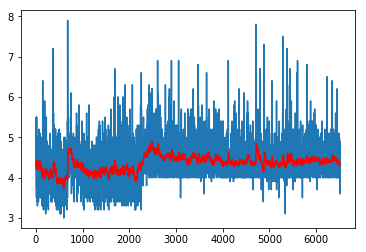

In [14]:
#Takes 3 hours if you run. At the bottom the predicted and the RMSE values are mentioned.
series = fit
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
	model = sm.tsa.statespace.SARIMAX(history, order=(1,0,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

time
2015-11-19 04:15:52.600    4.267807
2015-11-19 06:31:47.040    4.299048
2015-11-19 23:28:19.250    4.303325
2015-11-20 00:02:28.100    4.303148
2015-11-22 18:16:04.710    4.290164
2015-11-22 21:02:43.080    4.350350
2015-11-23 00:32:07.660    4.382335
dtype: float64


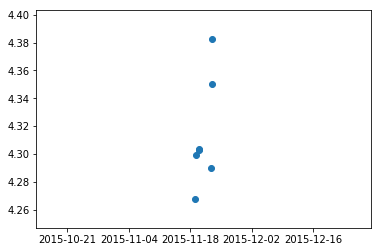

In [8]:
import time
import datetime
from statsmodels.tsa.arima_model import ARIMAResults
import matplotlib.pyplot as plt
import time
import datetime
#s = "01/12/2000"
#t = "01/12/1990"
timestamp = lambda s : datetime.strptime(s, "%d/%m/%Y")

model = ARIMAResults.load('arima_normal.pkl')
from pandas import datetime
start_index = 18000             
end_index = start_index + 6    #datetime(1925, 12, 26)
forecast = model.predict(start=start_index, end=end_index)
print(forecast)
plt.scatter(forecast.index.tolist(), forecast.values);